## Imports, as always!

In [1]:
import logging
from gensim.models import Word2Vec
import numpy as np
import matplotlib.pyplot as plt

from corpora import *
from my_utils import *
import score

In [2]:
bn2wn_mapping_path = '../resources/bn2wn_mapping.txt'
sentences_p = InputSentences('../EuroSense/parsed_low_stp/sentences_precision.txt')
sentences_c = InputSentences('../EuroSense/parsed_low_stp/sentences_coverage.txt')
sentences_folder = InputSentences('../EuroSense/parsed_low_stp/')
test_data_path = "../wordsim353/combined.tab"

logging.basicConfig(format='%(asctime)s : %(levelname)s : %(message)s', level=logging.INFO)

## Parsing Corpora

In [3]:
corpora_path = '../EuroSense/eurosense.v1.0.high-precision.xml'
bn2wn_mapping_path = '../resources/bn2wn_mapping.txt'
outfile_path = './EuroSense/parsed_lower/sentences_precision.txt'

parse(corpora_path, bn2wn_mapping_path, outfile_path, "precision")
#1,903,116 sentences

1,903,116 sentences extracted...
Done!


In [ ]:
corpora_path = '../EuroSense/EuroSense/eurosense.v1.0.high-coverage.xml'
bn2wn_mapping_path = '../resources/bn2wn_mapping.txt'
outfile_path = '../EuroSense/parsed_lower/sentenses_coverage.txt'

parse(corpora_path, bn2wn_mapping_path, outfile_path, "coverage")
#1,903,181 sentences

## Training the Model; Parameter Tuning

All tunings are done with the following parameters:

dataset = precision; min_count = 5; workers = 5; score for words not found = -1

### 1. Tuning 'window'
size = 400 (from the reference paper); alpha = 0.025; iter = 5 (default)

In [3]:
windows = [3, 5, 6, 8, 10]
correlations = []
pvals = []

In [4]:
for windw in windows:
    embeddings_path = "../resources/embeddings_win{}.vec".format(windw)
    
    model_win = Word2Vec(sentences_p, size=400, workers=5, window=windw)
    save_embeddings(embeddings_path, model_win.wv)
    
    corr, p, data = score.spearman(test_data_path, embeddings_path, bn2wn_mapping_path)
    correlations.append(corr)
    pvals.append(p)

2019-05-29 23:45:55,240 : INFO : collecting all words and their counts
2019-05-29 23:45:55,355 : INFO : PROGRESS: at sentence #0, processed 0 words, keeping 0 word types
2019-05-29 23:45:55,654 : INFO : PROGRESS: at sentence #10000, processed 271935 words, keeping 15378 word types
2019-05-29 23:45:55,807 : INFO : PROGRESS: at sentence #20000, processed 547522 words, keeping 21365 word types
2019-05-29 23:45:55,996 : INFO : PROGRESS: at sentence #30000, processed 829461 words, keeping 26426 word types
2019-05-29 23:45:56,165 : INFO : PROGRESS: at sentence #40000, processed 1116009 words, keeping 30457 word types
2019-05-29 23:45:56,328 : INFO : PROGRESS: at sentence #50000, processed 1388990 words, keeping 33582 word types
2019-05-29 23:45:56,551 : INFO : PROGRESS: at sentence #60000, processed 1663674 words, keeping 36477 word types
2019-05-29 23:45:56,735 : INFO : PROGRESS: at sentence #70000, processed 1942238 words, keeping 38893 word types
2019-05-29 23:45:56,916 : INFO : PROGRESS:

2019-05-29 23:46:08,545 : INFO : PROGRESS: at sentence #720000, processed 19922885 words, keeping 101560 word types
2019-05-29 23:46:08,722 : INFO : PROGRESS: at sentence #730000, processed 20199170 words, keeping 102191 word types
2019-05-29 23:46:08,897 : INFO : PROGRESS: at sentence #740000, processed 20478601 words, keeping 102940 word types
2019-05-29 23:46:09,048 : INFO : PROGRESS: at sentence #750000, processed 20763354 words, keeping 103715 word types
2019-05-29 23:46:09,203 : INFO : PROGRESS: at sentence #760000, processed 21031712 words, keeping 104355 word types
2019-05-29 23:46:09,359 : INFO : PROGRESS: at sentence #770000, processed 21309391 words, keeping 105094 word types
2019-05-29 23:46:09,521 : INFO : PROGRESS: at sentence #780000, processed 21586187 words, keeping 105476 word types
2019-05-29 23:46:09,706 : INFO : PROGRESS: at sentence #790000, processed 21858842 words, keeping 105847 word types
2019-05-29 23:46:09,897 : INFO : PROGRESS: at sentence #800000, processe

2019-05-29 23:46:20,733 : INFO : PROGRESS: at sentence #1430000, processed 39661756 words, keeping 133479 word types
2019-05-29 23:46:20,988 : INFO : PROGRESS: at sentence #1440000, processed 39947464 words, keeping 133832 word types
2019-05-29 23:46:21,211 : INFO : PROGRESS: at sentence #1450000, processed 40231741 words, keeping 134183 word types
2019-05-29 23:46:21,435 : INFO : PROGRESS: at sentence #1460000, processed 40512988 words, keeping 134532 word types
2019-05-29 23:46:21,584 : INFO : PROGRESS: at sentence #1470000, processed 40783599 words, keeping 134992 word types
2019-05-29 23:46:21,735 : INFO : PROGRESS: at sentence #1480000, processed 41058612 words, keeping 135354 word types
2019-05-29 23:46:21,999 : INFO : PROGRESS: at sentence #1490000, processed 41341677 words, keeping 135723 word types
2019-05-29 23:46:22,322 : INFO : PROGRESS: at sentence #1500000, processed 41624605 words, keeping 136123 word types
2019-05-29 23:46:22,480 : INFO : PROGRESS: at sentence #1510000,

2019-05-29 23:46:47,569 : INFO : EPOCH 1 - PROGRESS: at 14.23% examples, 330930 words/s, in_qsize 8, out_qsize 0
2019-05-29 23:46:48,592 : INFO : EPOCH 1 - PROGRESS: at 15.23% examples, 332497 words/s, in_qsize 10, out_qsize 0
2019-05-29 23:46:49,603 : INFO : EPOCH 1 - PROGRESS: at 16.26% examples, 334832 words/s, in_qsize 9, out_qsize 0
2019-05-29 23:46:50,636 : INFO : EPOCH 1 - PROGRESS: at 17.21% examples, 335427 words/s, in_qsize 7, out_qsize 0
2019-05-29 23:46:51,639 : INFO : EPOCH 1 - PROGRESS: at 18.08% examples, 334594 words/s, in_qsize 9, out_qsize 0
2019-05-29 23:46:52,721 : INFO : EPOCH 1 - PROGRESS: at 18.89% examples, 331393 words/s, in_qsize 5, out_qsize 1
2019-05-29 23:46:53,744 : INFO : EPOCH 1 - PROGRESS: at 19.78% examples, 330658 words/s, in_qsize 7, out_qsize 0
2019-05-29 23:46:54,771 : INFO : EPOCH 1 - PROGRESS: at 20.59% examples, 328949 words/s, in_qsize 5, out_qsize 1
2019-05-29 23:46:55,836 : INFO : EPOCH 1 - PROGRESS: at 21.48% examples, 327749 words/s, in_qsi

2019-05-29 23:48:02,378 : INFO : EPOCH 1 - PROGRESS: at 78.69% examples, 316148 words/s, in_qsize 8, out_qsize 1
2019-05-29 23:48:03,381 : INFO : EPOCH 1 - PROGRESS: at 79.49% examples, 315917 words/s, in_qsize 9, out_qsize 1
2019-05-29 23:48:04,384 : INFO : EPOCH 1 - PROGRESS: at 80.21% examples, 315303 words/s, in_qsize 7, out_qsize 2
2019-05-29 23:48:05,430 : INFO : EPOCH 1 - PROGRESS: at 81.10% examples, 315224 words/s, in_qsize 9, out_qsize 0
2019-05-29 23:48:06,450 : INFO : EPOCH 1 - PROGRESS: at 81.98% examples, 315230 words/s, in_qsize 6, out_qsize 0
2019-05-29 23:48:07,451 : INFO : EPOCH 1 - PROGRESS: at 82.71% examples, 314865 words/s, in_qsize 8, out_qsize 1
2019-05-29 23:48:08,459 : INFO : EPOCH 1 - PROGRESS: at 83.51% examples, 314693 words/s, in_qsize 9, out_qsize 0
2019-05-29 23:48:09,463 : INFO : EPOCH 1 - PROGRESS: at 84.33% examples, 314621 words/s, in_qsize 5, out_qsize 1
2019-05-29 23:48:10,525 : INFO : EPOCH 1 - PROGRESS: at 85.19% examples, 314509 words/s, in_qsiz

2019-05-29 23:49:12,625 : INFO : EPOCH 2 - PROGRESS: at 33.53% examples, 274702 words/s, in_qsize 10, out_qsize 0
2019-05-29 23:49:13,639 : INFO : EPOCH 2 - PROGRESS: at 34.28% examples, 274589 words/s, in_qsize 9, out_qsize 0
2019-05-29 23:49:14,647 : INFO : EPOCH 2 - PROGRESS: at 35.11% examples, 275128 words/s, in_qsize 0, out_qsize 0
2019-05-29 23:49:15,654 : INFO : EPOCH 2 - PROGRESS: at 35.85% examples, 275064 words/s, in_qsize 9, out_qsize 0
2019-05-29 23:49:16,684 : INFO : EPOCH 2 - PROGRESS: at 36.68% examples, 275554 words/s, in_qsize 10, out_qsize 0
2019-05-29 23:49:17,690 : INFO : EPOCH 2 - PROGRESS: at 37.50% examples, 276180 words/s, in_qsize 9, out_qsize 0
2019-05-29 23:49:18,696 : INFO : EPOCH 2 - PROGRESS: at 38.35% examples, 276811 words/s, in_qsize 2, out_qsize 0
2019-05-29 23:49:19,701 : INFO : EPOCH 2 - PROGRESS: at 39.09% examples, 276728 words/s, in_qsize 7, out_qsize 0
2019-05-29 23:49:20,702 : INFO : EPOCH 2 - PROGRESS: at 39.97% examples, 277444 words/s, in_qs

2019-05-29 23:50:26,954 : INFO : EPOCH 2 - PROGRESS: at 99.00% examples, 303415 words/s, in_qsize 9, out_qsize 0
2019-05-29 23:50:27,873 : INFO : worker thread finished; awaiting finish of 4 more threads
2019-05-29 23:50:27,878 : INFO : worker thread finished; awaiting finish of 3 more threads
2019-05-29 23:50:27,922 : INFO : worker thread finished; awaiting finish of 2 more threads
2019-05-29 23:50:27,929 : INFO : worker thread finished; awaiting finish of 1 more threads
2019-05-29 23:50:27,955 : INFO : EPOCH 2 - PROGRESS: at 100.00% examples, 303809 words/s, in_qsize 0, out_qsize 1
2019-05-29 23:50:27,957 : INFO : worker thread finished; awaiting finish of 0 more threads
2019-05-29 23:50:27,960 : INFO : EPOCH - 2 : training on 52771336 raw words (36267743 effective words) took 119.4s, 303797 effective words/s
2019-05-29 23:50:28,992 : INFO : EPOCH 3 - PROGRESS: at 0.95% examples, 335807 words/s, in_qsize 3, out_qsize 0
2019-05-29 23:50:30,028 : INFO : EPOCH 3 - PROGRESS: at 1.93% exa

2019-05-29 23:51:36,598 : INFO : EPOCH 3 - PROGRESS: at 61.18% examples, 323020 words/s, in_qsize 9, out_qsize 0
2019-05-29 23:51:37,615 : INFO : EPOCH 3 - PROGRESS: at 62.10% examples, 323315 words/s, in_qsize 9, out_qsize 0
2019-05-29 23:51:38,647 : INFO : EPOCH 3 - PROGRESS: at 63.09% examples, 323816 words/s, in_qsize 3, out_qsize 1
2019-05-29 23:51:39,662 : INFO : EPOCH 3 - PROGRESS: at 64.04% examples, 323999 words/s, in_qsize 9, out_qsize 0
2019-05-29 23:51:40,670 : INFO : EPOCH 3 - PROGRESS: at 65.03% examples, 324409 words/s, in_qsize 8, out_qsize 0
2019-05-29 23:51:41,685 : INFO : EPOCH 3 - PROGRESS: at 66.06% examples, 324974 words/s, in_qsize 2, out_qsize 0
2019-05-29 23:51:42,695 : INFO : EPOCH 3 - PROGRESS: at 67.05% examples, 325355 words/s, in_qsize 7, out_qsize 0
2019-05-29 23:51:43,696 : INFO : EPOCH 3 - PROGRESS: at 68.06% examples, 325850 words/s, in_qsize 7, out_qsize 0
2019-05-29 23:51:44,720 : INFO : EPOCH 3 - PROGRESS: at 68.99% examples, 325975 words/s, in_qsiz

2019-05-29 23:52:46,461 : INFO : EPOCH 4 - PROGRESS: at 24.00% examples, 327940 words/s, in_qsize 8, out_qsize 1
2019-05-29 23:52:47,482 : INFO : EPOCH 4 - PROGRESS: at 25.03% examples, 329499 words/s, in_qsize 2, out_qsize 1
2019-05-29 23:52:48,493 : INFO : EPOCH 4 - PROGRESS: at 26.01% examples, 330298 words/s, in_qsize 4, out_qsize 0
2019-05-29 23:52:49,523 : INFO : EPOCH 4 - PROGRESS: at 27.04% examples, 331311 words/s, in_qsize 7, out_qsize 0
2019-05-29 23:52:50,554 : INFO : EPOCH 4 - PROGRESS: at 27.95% examples, 330506 words/s, in_qsize 7, out_qsize 2
2019-05-29 23:52:51,557 : INFO : EPOCH 4 - PROGRESS: at 28.83% examples, 329852 words/s, in_qsize 0, out_qsize 2
2019-05-29 23:52:52,583 : INFO : EPOCH 4 - PROGRESS: at 29.66% examples, 328289 words/s, in_qsize 10, out_qsize 0
2019-05-29 23:52:53,655 : INFO : EPOCH 4 - PROGRESS: at 30.66% examples, 328264 words/s, in_qsize 8, out_qsize 0
2019-05-29 23:52:54,677 : INFO : EPOCH 4 - PROGRESS: at 31.51% examples, 327316 words/s, in_qsi

2019-05-29 23:54:01,083 : INFO : EPOCH 4 - PROGRESS: at 93.61% examples, 335804 words/s, in_qsize 8, out_qsize 0
2019-05-29 23:54:02,114 : INFO : EPOCH 4 - PROGRESS: at 94.56% examples, 335772 words/s, in_qsize 2, out_qsize 0
2019-05-29 23:54:03,190 : INFO : EPOCH 4 - PROGRESS: at 95.47% examples, 335471 words/s, in_qsize 7, out_qsize 1
2019-05-29 23:54:04,238 : INFO : EPOCH 4 - PROGRESS: at 96.25% examples, 334801 words/s, in_qsize 8, out_qsize 0
2019-05-29 23:54:05,266 : INFO : EPOCH 4 - PROGRESS: at 97.23% examples, 334933 words/s, in_qsize 10, out_qsize 0
2019-05-29 23:54:06,271 : INFO : EPOCH 4 - PROGRESS: at 98.24% examples, 335199 words/s, in_qsize 7, out_qsize 0
2019-05-29 23:54:07,283 : INFO : EPOCH 4 - PROGRESS: at 99.15% examples, 335114 words/s, in_qsize 8, out_qsize 0
2019-05-29 23:54:08,078 : INFO : worker thread finished; awaiting finish of 4 more threads
2019-05-29 23:54:08,087 : INFO : worker thread finished; awaiting finish of 3 more threads
2019-05-29 23:54:08,091 : 

2019-05-29 23:55:11,936 : INFO : EPOCH 5 - PROGRESS: at 54.31% examples, 308114 words/s, in_qsize 9, out_qsize 0
2019-05-29 23:55:12,938 : INFO : EPOCH 5 - PROGRESS: at 55.21% examples, 308534 words/s, in_qsize 8, out_qsize 0
2019-05-29 23:55:13,956 : INFO : EPOCH 5 - PROGRESS: at 56.13% examples, 308772 words/s, in_qsize 9, out_qsize 0
2019-05-29 23:55:14,963 : INFO : EPOCH 5 - PROGRESS: at 57.11% examples, 309281 words/s, in_qsize 4, out_qsize 0
2019-05-29 23:55:16,003 : INFO : EPOCH 5 - PROGRESS: at 58.08% examples, 309801 words/s, in_qsize 6, out_qsize 0
2019-05-29 23:55:17,056 : INFO : EPOCH 5 - PROGRESS: at 59.03% examples, 310030 words/s, in_qsize 9, out_qsize 0
2019-05-29 23:55:18,076 : INFO : EPOCH 5 - PROGRESS: at 59.94% examples, 310311 words/s, in_qsize 4, out_qsize 0
2019-05-29 23:55:19,091 : INFO : EPOCH 5 - PROGRESS: at 60.86% examples, 310783 words/s, in_qsize 4, out_qsize 0
2019-05-29 23:55:20,107 : INFO : EPOCH 5 - PROGRESS: at 61.79% examples, 311232 words/s, in_qsiz

2019-05-29 23:58:23,686 : INFO : PROGRESS: at sentence #120000, processed 3304916 words, keeping 49566 word types
2019-05-29 23:58:23,835 : INFO : PROGRESS: at sentence #130000, processed 3579592 words, keeping 51019 word types
2019-05-29 23:58:24,002 : INFO : PROGRESS: at sentence #140000, processed 3852713 words, keeping 52551 word types
2019-05-29 23:58:24,142 : INFO : PROGRESS: at sentence #150000, processed 4121391 words, keeping 54026 word types
2019-05-29 23:58:24,290 : INFO : PROGRESS: at sentence #160000, processed 4404066 words, keeping 55639 word types
2019-05-29 23:58:24,439 : INFO : PROGRESS: at sentence #170000, processed 4685948 words, keeping 57165 word types
2019-05-29 23:58:24,583 : INFO : PROGRESS: at sentence #180000, processed 4958551 words, keeping 58550 word types
2019-05-29 23:58:24,726 : INFO : PROGRESS: at sentence #190000, processed 5233522 words, keeping 60006 word types
2019-05-29 23:58:24,894 : INFO : PROGRESS: at sentence #200000, processed 5506501 words,

2019-05-29 23:58:34,665 : INFO : PROGRESS: at sentence #840000, processed 23240440 words, keeping 108223 word types
2019-05-29 23:58:34,821 : INFO : PROGRESS: at sentence #850000, processed 23514153 words, keeping 108766 word types
2019-05-29 23:58:35,029 : INFO : PROGRESS: at sentence #860000, processed 23804886 words, keeping 109240 word types
2019-05-29 23:58:35,193 : INFO : PROGRESS: at sentence #870000, processed 24072962 words, keeping 109795 word types
2019-05-29 23:58:35,353 : INFO : PROGRESS: at sentence #880000, processed 24350129 words, keeping 110328 word types
2019-05-29 23:58:35,529 : INFO : PROGRESS: at sentence #890000, processed 24627512 words, keeping 110903 word types
2019-05-29 23:58:35,689 : INFO : PROGRESS: at sentence #900000, processed 24899300 words, keeping 111559 word types
2019-05-29 23:58:35,845 : INFO : PROGRESS: at sentence #910000, processed 25175815 words, keeping 112097 word types
2019-05-29 23:58:36,022 : INFO : PROGRESS: at sentence #920000, processe

2019-05-29 23:58:45,888 : INFO : PROGRESS: at sentence #1550000, processed 43006571 words, keeping 138235 word types
2019-05-29 23:58:46,059 : INFO : PROGRESS: at sentence #1560000, processed 43296656 words, keeping 138623 word types
2019-05-29 23:58:46,215 : INFO : PROGRESS: at sentence #1570000, processed 43589832 words, keeping 138962 word types
2019-05-29 23:58:46,372 : INFO : PROGRESS: at sentence #1580000, processed 43875642 words, keeping 139299 word types
2019-05-29 23:58:46,532 : INFO : PROGRESS: at sentence #1590000, processed 44168492 words, keeping 139804 word types
2019-05-29 23:58:46,689 : INFO : PROGRESS: at sentence #1600000, processed 44461001 words, keeping 140399 word types
2019-05-29 23:58:46,845 : INFO : PROGRESS: at sentence #1610000, processed 44743662 words, keeping 140809 word types
2019-05-29 23:58:47,023 : INFO : PROGRESS: at sentence #1620000, processed 45029862 words, keeping 141187 word types
2019-05-29 23:58:47,185 : INFO : PROGRESS: at sentence #1630000,

2019-05-29 23:59:22,650 : INFO : EPOCH 1 - PROGRESS: at 25.10% examples, 318823 words/s, in_qsize 9, out_qsize 0
2019-05-29 23:59:23,684 : INFO : EPOCH 1 - PROGRESS: at 26.05% examples, 319242 words/s, in_qsize 6, out_qsize 0
2019-05-29 23:59:24,732 : INFO : EPOCH 1 - PROGRESS: at 26.87% examples, 317942 words/s, in_qsize 6, out_qsize 0
2019-05-29 23:59:25,742 : INFO : EPOCH 1 - PROGRESS: at 27.62% examples, 316043 words/s, in_qsize 5, out_qsize 0
2019-05-29 23:59:26,776 : INFO : EPOCH 1 - PROGRESS: at 28.56% examples, 316204 words/s, in_qsize 7, out_qsize 0
2019-05-29 23:59:27,778 : INFO : EPOCH 1 - PROGRESS: at 29.51% examples, 316574 words/s, in_qsize 8, out_qsize 0
2019-05-29 23:59:28,818 : INFO : EPOCH 1 - PROGRESS: at 30.45% examples, 316599 words/s, in_qsize 2, out_qsize 0
2019-05-29 23:59:29,823 : INFO : EPOCH 1 - PROGRESS: at 31.30% examples, 316000 words/s, in_qsize 9, out_qsize 0
2019-05-29 23:59:30,837 : INFO : EPOCH 1 - PROGRESS: at 32.04% examples, 314713 words/s, in_qsiz

2019-05-30 00:00:37,397 : INFO : EPOCH 1 - PROGRESS: at 89.25% examples, 313844 words/s, in_qsize 7, out_qsize 0
2019-05-30 00:00:38,402 : INFO : EPOCH 1 - PROGRESS: at 90.16% examples, 313905 words/s, in_qsize 0, out_qsize 1
2019-05-30 00:00:39,434 : INFO : EPOCH 1 - PROGRESS: at 91.04% examples, 313833 words/s, in_qsize 2, out_qsize 1
2019-05-30 00:00:40,467 : INFO : EPOCH 1 - PROGRESS: at 91.95% examples, 313775 words/s, in_qsize 8, out_qsize 0
2019-05-30 00:00:41,468 : INFO : EPOCH 1 - PROGRESS: at 92.87% examples, 313863 words/s, in_qsize 4, out_qsize 1
2019-05-30 00:00:42,485 : INFO : EPOCH 1 - PROGRESS: at 93.79% examples, 313898 words/s, in_qsize 6, out_qsize 2
2019-05-30 00:00:43,566 : INFO : EPOCH 1 - PROGRESS: at 94.73% examples, 313935 words/s, in_qsize 7, out_qsize 0
2019-05-30 00:00:44,579 : INFO : EPOCH 1 - PROGRESS: at 95.61% examples, 313922 words/s, in_qsize 4, out_qsize 0
2019-05-30 00:00:45,580 : INFO : EPOCH 1 - PROGRESS: at 96.51% examples, 314060 words/s, in_qsiz

2019-05-30 00:01:48,105 : INFO : EPOCH 2 - PROGRESS: at 43.14% examples, 266418 words/s, in_qsize 10, out_qsize 0
2019-05-30 00:01:49,115 : INFO : EPOCH 2 - PROGRESS: at 43.66% examples, 265012 words/s, in_qsize 8, out_qsize 0
2019-05-30 00:01:50,125 : INFO : EPOCH 2 - PROGRESS: at 44.36% examples, 264786 words/s, in_qsize 7, out_qsize 3
2019-05-30 00:01:51,155 : INFO : EPOCH 2 - PROGRESS: at 45.03% examples, 264360 words/s, in_qsize 1, out_qsize 0
2019-05-30 00:01:52,170 : INFO : EPOCH 2 - PROGRESS: at 45.98% examples, 265564 words/s, in_qsize 0, out_qsize 1
2019-05-30 00:01:53,188 : INFO : EPOCH 2 - PROGRESS: at 46.85% examples, 266274 words/s, in_qsize 3, out_qsize 0
2019-05-30 00:01:54,194 : INFO : EPOCH 2 - PROGRESS: at 47.81% examples, 267442 words/s, in_qsize 7, out_qsize 0
2019-05-30 00:01:55,218 : INFO : EPOCH 2 - PROGRESS: at 48.70% examples, 268174 words/s, in_qsize 9, out_qsize 0
2019-05-30 00:01:56,228 : INFO : EPOCH 2 - PROGRESS: at 49.26% examples, 267193 words/s, in_qsi

2019-05-30 00:02:58,045 : INFO : EPOCH 3 - PROGRESS: at 4.57% examples, 325596 words/s, in_qsize 8, out_qsize 1
2019-05-30 00:02:59,057 : INFO : EPOCH 3 - PROGRESS: at 5.50% examples, 326517 words/s, in_qsize 9, out_qsize 0
2019-05-30 00:03:00,069 : INFO : EPOCH 3 - PROGRESS: at 6.46% examples, 327181 words/s, in_qsize 9, out_qsize 0
2019-05-30 00:03:01,094 : INFO : EPOCH 3 - PROGRESS: at 7.38% examples, 326447 words/s, in_qsize 10, out_qsize 0
2019-05-30 00:03:02,150 : INFO : EPOCH 3 - PROGRESS: at 8.31% examples, 325546 words/s, in_qsize 9, out_qsize 0
2019-05-30 00:03:03,276 : INFO : EPOCH 3 - PROGRESS: at 9.09% examples, 317978 words/s, in_qsize 7, out_qsize 3
2019-05-30 00:03:04,288 : INFO : EPOCH 3 - PROGRESS: at 10.00% examples, 317939 words/s, in_qsize 9, out_qsize 0
2019-05-30 00:03:05,293 : INFO : EPOCH 3 - PROGRESS: at 10.89% examples, 318143 words/s, in_qsize 3, out_qsize 2
2019-05-30 00:03:06,314 : INFO : EPOCH 3 - PROGRESS: at 11.85% examples, 320002 words/s, in_qsize 5, 

2019-05-30 00:04:12,748 : INFO : EPOCH 3 - PROGRESS: at 74.32% examples, 337743 words/s, in_qsize 5, out_qsize 0
2019-05-30 00:04:13,825 : INFO : EPOCH 3 - PROGRESS: at 74.98% examples, 336202 words/s, in_qsize 8, out_qsize 0
2019-05-30 00:04:14,922 : INFO : EPOCH 3 - PROGRESS: at 75.53% examples, 334283 words/s, in_qsize 4, out_qsize 1
2019-05-30 00:04:15,980 : INFO : EPOCH 3 - PROGRESS: at 76.00% examples, 332078 words/s, in_qsize 4, out_qsize 0
2019-05-30 00:04:17,015 : INFO : EPOCH 3 - PROGRESS: at 76.60% examples, 330673 words/s, in_qsize 8, out_qsize 0
2019-05-30 00:04:18,052 : INFO : EPOCH 3 - PROGRESS: at 77.52% examples, 330532 words/s, in_qsize 8, out_qsize 2
2019-05-30 00:04:19,056 : INFO : EPOCH 3 - PROGRESS: at 78.51% examples, 330815 words/s, in_qsize 9, out_qsize 1
2019-05-30 00:04:20,064 : INFO : EPOCH 3 - PROGRESS: at 79.46% examples, 331012 words/s, in_qsize 8, out_qsize 0
2019-05-30 00:04:21,065 : INFO : EPOCH 3 - PROGRESS: at 80.46% examples, 331370 words/s, in_qsiz

2019-05-30 00:05:23,069 : INFO : EPOCH 4 - PROGRESS: at 31.85% examples, 295656 words/s, in_qsize 0, out_qsize 3
2019-05-30 00:05:24,070 : INFO : EPOCH 4 - PROGRESS: at 32.74% examples, 296456 words/s, in_qsize 4, out_qsize 2
2019-05-30 00:05:25,135 : INFO : EPOCH 4 - PROGRESS: at 33.77% examples, 297746 words/s, in_qsize 9, out_qsize 0
2019-05-30 00:05:26,136 : INFO : EPOCH 4 - PROGRESS: at 34.77% examples, 299294 words/s, in_qsize 4, out_qsize 1
2019-05-30 00:05:27,162 : INFO : EPOCH 4 - PROGRESS: at 35.70% examples, 300103 words/s, in_qsize 5, out_qsize 2
2019-05-30 00:05:28,175 : INFO : EPOCH 4 - PROGRESS: at 36.66% examples, 301267 words/s, in_qsize 8, out_qsize 1
2019-05-30 00:05:29,186 : INFO : EPOCH 4 - PROGRESS: at 37.62% examples, 302409 words/s, in_qsize 5, out_qsize 0
2019-05-30 00:05:30,194 : INFO : EPOCH 4 - PROGRESS: at 38.62% examples, 303850 words/s, in_qsize 0, out_qsize 0
2019-05-30 00:05:31,197 : INFO : EPOCH 4 - PROGRESS: at 39.54% examples, 304489 words/s, in_qsiz

2019-05-30 00:06:38,076 : INFO : EPOCH 4 - PROGRESS: at 94.96% examples, 302523 words/s, in_qsize 9, out_qsize 0
2019-05-30 00:06:39,082 : INFO : EPOCH 4 - PROGRESS: at 95.92% examples, 302920 words/s, in_qsize 7, out_qsize 0
2019-05-30 00:06:40,090 : INFO : EPOCH 4 - PROGRESS: at 96.81% examples, 303080 words/s, in_qsize 7, out_qsize 0
2019-05-30 00:06:41,102 : INFO : EPOCH 4 - PROGRESS: at 97.68% examples, 303106 words/s, in_qsize 2, out_qsize 0
2019-05-30 00:06:42,135 : INFO : EPOCH 4 - PROGRESS: at 98.63% examples, 303425 words/s, in_qsize 10, out_qsize 0
2019-05-30 00:06:43,152 : INFO : EPOCH 4 - PROGRESS: at 99.60% examples, 303734 words/s, in_qsize 4, out_qsize 0
2019-05-30 00:06:43,440 : INFO : worker thread finished; awaiting finish of 4 more threads
2019-05-30 00:06:43,459 : INFO : worker thread finished; awaiting finish of 3 more threads
2019-05-30 00:06:43,467 : INFO : worker thread finished; awaiting finish of 2 more threads
2019-05-30 00:06:43,471 : INFO : worker thread f

2019-05-30 00:07:47,748 : INFO : EPOCH 5 - PROGRESS: at 60.47% examples, 340839 words/s, in_qsize 9, out_qsize 0
2019-05-30 00:07:48,756 : INFO : EPOCH 5 - PROGRESS: at 61.38% examples, 340812 words/s, in_qsize 9, out_qsize 0
2019-05-30 00:07:49,778 : INFO : EPOCH 5 - PROGRESS: at 62.36% examples, 341231 words/s, in_qsize 4, out_qsize 0
2019-05-30 00:07:50,797 : INFO : EPOCH 5 - PROGRESS: at 63.36% examples, 341446 words/s, in_qsize 7, out_qsize 0
2019-05-30 00:07:51,860 : INFO : EPOCH 5 - PROGRESS: at 64.31% examples, 341131 words/s, in_qsize 8, out_qsize 1
2019-05-30 00:07:52,879 : INFO : EPOCH 5 - PROGRESS: at 65.31% examples, 341364 words/s, in_qsize 9, out_qsize 0
2019-05-30 00:07:53,888 : INFO : EPOCH 5 - PROGRESS: at 66.33% examples, 341640 words/s, in_qsize 7, out_qsize 0
2019-05-30 00:07:54,890 : INFO : EPOCH 5 - PROGRESS: at 67.31% examples, 341745 words/s, in_qsize 6, out_qsize 1
2019-05-30 00:07:56,027 : INFO : EPOCH 5 - PROGRESS: at 68.19% examples, 340825 words/s, in_qsiz

2019-05-30 00:10:38,461 : INFO : PROGRESS: at sentence #200000, processed 5506501 words, keeping 61388 word types
2019-05-30 00:10:38,605 : INFO : PROGRESS: at sentence #210000, processed 5787215 words, keeping 62700 word types
2019-05-30 00:10:38,750 : INFO : PROGRESS: at sentence #220000, processed 6063908 words, keeping 63835 word types
2019-05-30 00:10:38,911 : INFO : PROGRESS: at sentence #230000, processed 6342981 words, keeping 65145 word types
2019-05-30 00:10:39,052 : INFO : PROGRESS: at sentence #240000, processed 6614701 words, keeping 66148 word types
2019-05-30 00:10:39,189 : INFO : PROGRESS: at sentence #250000, processed 6881753 words, keeping 67363 word types
2019-05-30 00:10:39,330 : INFO : PROGRESS: at sentence #260000, processed 7160946 words, keeping 68471 word types
2019-05-30 00:10:39,472 : INFO : PROGRESS: at sentence #270000, processed 7433989 words, keeping 69495 word types
2019-05-30 00:10:39,613 : INFO : PROGRESS: at sentence #280000, processed 7713140 words,

2019-05-30 00:10:49,536 : INFO : PROGRESS: at sentence #920000, processed 25453110 words, keeping 112483 word types
2019-05-30 00:10:49,700 : INFO : PROGRESS: at sentence #930000, processed 25732943 words, keeping 112959 word types
2019-05-30 00:10:49,873 : INFO : PROGRESS: at sentence #940000, processed 26016983 words, keeping 113379 word types
2019-05-30 00:10:50,071 : INFO : PROGRESS: at sentence #950000, processed 26304117 words, keeping 113906 word types
2019-05-30 00:10:50,255 : INFO : PROGRESS: at sentence #960000, processed 26586316 words, keeping 114356 word types
2019-05-30 00:10:50,425 : INFO : PROGRESS: at sentence #970000, processed 26863318 words, keeping 114838 word types
2019-05-30 00:10:50,573 : INFO : PROGRESS: at sentence #980000, processed 27151227 words, keeping 115249 word types
2019-05-30 00:10:50,729 : INFO : PROGRESS: at sentence #990000, processed 27433534 words, keeping 115730 word types
2019-05-30 00:10:50,915 : INFO : PROGRESS: at sentence #1000000, process

2019-05-30 00:11:00,750 : INFO : PROGRESS: at sentence #1630000, processed 45307375 words, keeping 141538 word types
2019-05-30 00:11:00,903 : INFO : PROGRESS: at sentence #1640000, processed 45585763 words, keeping 141821 word types
2019-05-30 00:11:01,040 : INFO : PROGRESS: at sentence #1650000, processed 45853117 words, keeping 142058 word types
2019-05-30 00:11:01,181 : INFO : PROGRESS: at sentence #1660000, processed 46129444 words, keeping 142338 word types
2019-05-30 00:11:01,327 : INFO : PROGRESS: at sentence #1670000, processed 46414791 words, keeping 142601 word types
2019-05-30 00:11:01,471 : INFO : PROGRESS: at sentence #1680000, processed 46688064 words, keeping 142857 word types
2019-05-30 00:11:01,612 : INFO : PROGRESS: at sentence #1690000, processed 46954454 words, keeping 143224 word types
2019-05-30 00:11:01,757 : INFO : PROGRESS: at sentence #1700000, processed 47228967 words, keeping 143610 word types
2019-05-30 00:11:01,923 : INFO : PROGRESS: at sentence #1710000,

2019-05-30 00:11:44,136 : INFO : EPOCH 1 - PROGRESS: at 34.74% examples, 341388 words/s, in_qsize 7, out_qsize 2
2019-05-30 00:11:45,152 : INFO : EPOCH 1 - PROGRESS: at 35.70% examples, 341635 words/s, in_qsize 4, out_qsize 0
2019-05-30 00:11:46,178 : INFO : EPOCH 1 - PROGRESS: at 36.62% examples, 341390 words/s, in_qsize 9, out_qsize 0
2019-05-30 00:11:47,206 : INFO : EPOCH 1 - PROGRESS: at 37.60% examples, 341692 words/s, in_qsize 9, out_qsize 0
2019-05-30 00:11:48,206 : INFO : EPOCH 1 - PROGRESS: at 38.55% examples, 341898 words/s, in_qsize 8, out_qsize 0
2019-05-30 00:11:49,210 : INFO : EPOCH 1 - PROGRESS: at 39.48% examples, 341877 words/s, in_qsize 3, out_qsize 0
2019-05-30 00:11:50,234 : INFO : EPOCH 1 - PROGRESS: at 40.49% examples, 342160 words/s, in_qsize 2, out_qsize 0
2019-05-30 00:11:51,243 : INFO : EPOCH 1 - PROGRESS: at 41.43% examples, 341984 words/s, in_qsize 10, out_qsize 0
2019-05-30 00:11:52,265 : INFO : EPOCH 1 - PROGRESS: at 42.41% examples, 342127 words/s, in_qsi

2019-05-30 00:12:54,350 : INFO : EPOCH 2 - PROGRESS: at 0.88% examples, 311029 words/s, in_qsize 7, out_qsize 1
2019-05-30 00:12:55,360 : INFO : EPOCH 2 - PROGRESS: at 1.87% examples, 335413 words/s, in_qsize 3, out_qsize 0
2019-05-30 00:12:56,384 : INFO : EPOCH 2 - PROGRESS: at 2.82% examples, 335068 words/s, in_qsize 9, out_qsize 0
2019-05-30 00:12:57,411 : INFO : EPOCH 2 - PROGRESS: at 3.82% examples, 339429 words/s, in_qsize 5, out_qsize 0
2019-05-30 00:12:58,426 : INFO : EPOCH 2 - PROGRESS: at 4.79% examples, 340332 words/s, in_qsize 9, out_qsize 0
2019-05-30 00:12:59,432 : INFO : EPOCH 2 - PROGRESS: at 5.79% examples, 342621 words/s, in_qsize 7, out_qsize 1
2019-05-30 00:13:00,451 : INFO : EPOCH 2 - PROGRESS: at 6.57% examples, 332066 words/s, in_qsize 0, out_qsize 1
2019-05-30 00:13:01,506 : INFO : EPOCH 2 - PROGRESS: at 7.59% examples, 333774 words/s, in_qsize 4, out_qsize 0
2019-05-30 00:13:02,610 : INFO : EPOCH 2 - PROGRESS: at 8.51% examples, 330412 words/s, in_qsize 3, out_

2019-05-30 00:14:09,066 : INFO : EPOCH 2 - PROGRESS: at 70.72% examples, 338866 words/s, in_qsize 8, out_qsize 1
2019-05-30 00:14:10,102 : INFO : EPOCH 2 - PROGRESS: at 71.74% examples, 339119 words/s, in_qsize 9, out_qsize 0
2019-05-30 00:14:11,137 : INFO : EPOCH 2 - PROGRESS: at 72.74% examples, 339210 words/s, in_qsize 5, out_qsize 0
2019-05-30 00:14:12,197 : INFO : EPOCH 2 - PROGRESS: at 73.82% examples, 339419 words/s, in_qsize 1, out_qsize 0
2019-05-30 00:14:13,248 : INFO : EPOCH 2 - PROGRESS: at 74.83% examples, 339487 words/s, in_qsize 10, out_qsize 0
2019-05-30 00:14:14,284 : INFO : EPOCH 2 - PROGRESS: at 75.77% examples, 339530 words/s, in_qsize 8, out_qsize 0
2019-05-30 00:14:15,299 : INFO : EPOCH 2 - PROGRESS: at 76.74% examples, 339665 words/s, in_qsize 9, out_qsize 0
2019-05-30 00:14:16,304 : INFO : EPOCH 2 - PROGRESS: at 77.76% examples, 339947 words/s, in_qsize 4, out_qsize 1
2019-05-30 00:14:17,310 : INFO : EPOCH 2 - PROGRESS: at 78.73% examples, 340125 words/s, in_qsi

2019-05-30 00:15:18,498 : INFO : EPOCH 3 - PROGRESS: at 36.24% examples, 338912 words/s, in_qsize 9, out_qsize 0
2019-05-30 00:15:19,499 : INFO : EPOCH 3 - PROGRESS: at 37.15% examples, 338969 words/s, in_qsize 4, out_qsize 1
2019-05-30 00:15:20,527 : INFO : EPOCH 3 - PROGRESS: at 38.11% examples, 339174 words/s, in_qsize 1, out_qsize 0
2019-05-30 00:15:21,539 : INFO : EPOCH 3 - PROGRESS: at 39.04% examples, 339016 words/s, in_qsize 7, out_qsize 0
2019-05-30 00:15:22,565 : INFO : EPOCH 3 - PROGRESS: at 39.99% examples, 338859 words/s, in_qsize 9, out_qsize 1
2019-05-30 00:15:23,614 : INFO : EPOCH 3 - PROGRESS: at 40.97% examples, 338892 words/s, in_qsize 6, out_qsize 1
2019-05-30 00:15:24,630 : INFO : EPOCH 3 - PROGRESS: at 41.98% examples, 339321 words/s, in_qsize 4, out_qsize 0
2019-05-30 00:15:25,636 : INFO : EPOCH 3 - PROGRESS: at 42.88% examples, 338899 words/s, in_qsize 4, out_qsize 0
2019-05-30 00:15:26,657 : INFO : EPOCH 3 - PROGRESS: at 43.84% examples, 338842 words/s, in_qsiz

2019-05-30 00:16:28,009 : INFO : EPOCH 4 - PROGRESS: at 0.89% examples, 320666 words/s, in_qsize 0, out_qsize 0
2019-05-30 00:16:29,162 : INFO : EPOCH 4 - PROGRESS: at 1.76% examples, 295407 words/s, in_qsize 2, out_qsize 0
2019-05-30 00:16:30,185 : INFO : EPOCH 4 - PROGRESS: at 2.64% examples, 301819 words/s, in_qsize 9, out_qsize 0
2019-05-30 00:16:31,189 : INFO : EPOCH 4 - PROGRESS: at 3.49% examples, 302705 words/s, in_qsize 8, out_qsize 0
2019-05-30 00:16:32,209 : INFO : EPOCH 4 - PROGRESS: at 4.44% examples, 307932 words/s, in_qsize 9, out_qsize 0
2019-05-30 00:16:33,229 : INFO : EPOCH 4 - PROGRESS: at 5.38% examples, 312471 words/s, in_qsize 5, out_qsize 0
2019-05-30 00:16:34,257 : INFO : EPOCH 4 - PROGRESS: at 6.32% examples, 313546 words/s, in_qsize 3, out_qsize 0
2019-05-30 00:16:35,279 : INFO : EPOCH 4 - PROGRESS: at 7.26% examples, 315415 words/s, in_qsize 8, out_qsize 0
2019-05-30 00:16:36,314 : INFO : EPOCH 4 - PROGRESS: at 8.19% examples, 316487 words/s, in_qsize 9, out_

2019-05-30 00:17:42,628 : INFO : EPOCH 4 - PROGRESS: at 72.72% examples, 348857 words/s, in_qsize 8, out_qsize 0
2019-05-30 00:17:43,637 : INFO : EPOCH 4 - PROGRESS: at 73.81% examples, 349165 words/s, in_qsize 6, out_qsize 1
2019-05-30 00:17:44,652 : INFO : EPOCH 4 - PROGRESS: at 74.79% examples, 349184 words/s, in_qsize 6, out_qsize 0
2019-05-30 00:17:45,674 : INFO : EPOCH 4 - PROGRESS: at 75.75% examples, 349239 words/s, in_qsize 5, out_qsize 1
2019-05-30 00:17:46,703 : INFO : EPOCH 4 - PROGRESS: at 76.79% examples, 349539 words/s, in_qsize 2, out_qsize 0
2019-05-30 00:17:47,729 : INFO : EPOCH 4 - PROGRESS: at 77.85% examples, 349794 words/s, in_qsize 8, out_qsize 0
2019-05-30 00:17:48,848 : INFO : EPOCH 4 - PROGRESS: at 78.80% examples, 349272 words/s, in_qsize 0, out_qsize 0
2019-05-30 00:17:49,867 : INFO : EPOCH 4 - PROGRESS: at 79.72% examples, 349044 words/s, in_qsize 8, out_qsize 2
2019-05-30 00:17:50,893 : INFO : EPOCH 4 - PROGRESS: at 80.75% examples, 349185 words/s, in_qsiz

2019-05-30 00:18:52,829 : INFO : EPOCH 5 - PROGRESS: at 32.58% examples, 303329 words/s, in_qsize 5, out_qsize 1
2019-05-30 00:18:53,846 : INFO : EPOCH 5 - PROGRESS: at 33.45% examples, 303464 words/s, in_qsize 6, out_qsize 0
2019-05-30 00:18:54,920 : INFO : EPOCH 5 - PROGRESS: at 34.33% examples, 303367 words/s, in_qsize 6, out_qsize 3
2019-05-30 00:18:55,973 : INFO : EPOCH 5 - PROGRESS: at 35.19% examples, 303117 words/s, in_qsize 5, out_qsize 0
2019-05-30 00:18:56,975 : INFO : EPOCH 5 - PROGRESS: at 35.94% examples, 302582 words/s, in_qsize 5, out_qsize 0
2019-05-30 00:18:57,991 : INFO : EPOCH 5 - PROGRESS: at 36.75% examples, 302415 words/s, in_qsize 9, out_qsize 0
2019-05-30 00:18:59,005 : INFO : EPOCH 5 - PROGRESS: at 37.59% examples, 302451 words/s, in_qsize 9, out_qsize 0
2019-05-30 00:19:00,034 : INFO : EPOCH 5 - PROGRESS: at 38.36% examples, 301955 words/s, in_qsize 3, out_qsize 0
2019-05-30 00:19:01,063 : INFO : EPOCH 5 - PROGRESS: at 39.11% examples, 301175 words/s, in_qsiz

2019-05-30 00:20:07,491 : INFO : EPOCH 5 - PROGRESS: at 96.36% examples, 308210 words/s, in_qsize 6, out_qsize 0
2019-05-30 00:20:08,496 : INFO : EPOCH 5 - PROGRESS: at 97.29% examples, 308459 words/s, in_qsize 8, out_qsize 0
2019-05-30 00:20:09,510 : INFO : EPOCH 5 - PROGRESS: at 98.28% examples, 308852 words/s, in_qsize 7, out_qsize 1
2019-05-30 00:20:10,510 : INFO : EPOCH 5 - PROGRESS: at 99.08% examples, 308677 words/s, in_qsize 9, out_qsize 0
2019-05-30 00:20:11,325 : INFO : worker thread finished; awaiting finish of 4 more threads
2019-05-30 00:20:11,345 : INFO : worker thread finished; awaiting finish of 3 more threads
2019-05-30 00:20:11,360 : INFO : worker thread finished; awaiting finish of 2 more threads
2019-05-30 00:20:11,370 : INFO : worker thread finished; awaiting finish of 1 more threads
2019-05-30 00:20:11,376 : INFO : worker thread finished; awaiting finish of 0 more threads
2019-05-30 00:20:11,378 : INFO : EPOCH - 5 : training on 52771336 raw words (36268334 effecti

2019-05-30 00:22:59,475 : INFO : PROGRESS: at sentence #570000, processed 15736534 words, keeping 92729 word types
2019-05-30 00:22:59,617 : INFO : PROGRESS: at sentence #580000, processed 16003389 words, keeping 93347 word types
2019-05-30 00:22:59,773 : INFO : PROGRESS: at sentence #590000, processed 16267761 words, keeping 94025 word types
2019-05-30 00:22:59,928 : INFO : PROGRESS: at sentence #600000, processed 16546375 words, keeping 94576 word types
2019-05-30 00:23:00,090 : INFO : PROGRESS: at sentence #610000, processed 16824889 words, keeping 95217 word types
2019-05-30 00:23:00,240 : INFO : PROGRESS: at sentence #620000, processed 17106935 words, keeping 95911 word types
2019-05-30 00:23:00,402 : INFO : PROGRESS: at sentence #630000, processed 17386761 words, keeping 96487 word types
2019-05-30 00:23:00,551 : INFO : PROGRESS: at sentence #640000, processed 17660475 words, keeping 97014 word types
2019-05-30 00:23:00,708 : INFO : PROGRESS: at sentence #650000, processed 179366

2019-05-30 00:38:29,152 : INFO : PROGRESS: at sentence #1280000, processed 35498141 words, keeping 128126 word types
2019-05-30 00:38:29,391 : INFO : PROGRESS: at sentence #1290000, processed 35773640 words, keeping 128530 word types
2019-05-30 00:38:29,640 : INFO : PROGRESS: at sentence #1300000, processed 36060814 words, keeping 128897 word types
2019-05-30 00:38:29,897 : INFO : PROGRESS: at sentence #1310000, processed 36346188 words, keeping 129284 word types
2019-05-30 00:38:30,165 : INFO : PROGRESS: at sentence #1320000, processed 36623172 words, keeping 129520 word types
2019-05-30 00:38:30,556 : INFO : PROGRESS: at sentence #1330000, processed 36908859 words, keeping 129803 word types
2019-05-30 00:38:30,799 : INFO : PROGRESS: at sentence #1340000, processed 37188073 words, keeping 130156 word types
2019-05-30 00:38:31,072 : INFO : PROGRESS: at sentence #1350000, processed 37467874 words, keeping 130484 word types
2019-05-30 00:38:31,343 : INFO : PROGRESS: at sentence #1360000,

2019-05-30 00:38:50,840 : INFO : training model with 5 workers on 61693 vocabulary and 400 features, using sg=0 hs=0 sample=0.001 negative=5 window=8
2019-05-30 00:38:51,854 : INFO : EPOCH 1 - PROGRESS: at 0.35% examples, 123088 words/s, in_qsize 0, out_qsize 0
2019-05-30 00:38:52,875 : INFO : EPOCH 1 - PROGRESS: at 0.76% examples, 135680 words/s, in_qsize 10, out_qsize 0
2019-05-30 00:38:53,887 : INFO : EPOCH 1 - PROGRESS: at 1.36% examples, 160594 words/s, in_qsize 9, out_qsize 0
2019-05-30 00:38:54,900 : INFO : EPOCH 1 - PROGRESS: at 1.72% examples, 154425 words/s, in_qsize 8, out_qsize 1
2019-05-30 00:38:55,911 : INFO : EPOCH 1 - PROGRESS: at 2.31% examples, 166805 words/s, in_qsize 8, out_qsize 0
2019-05-30 00:38:56,954 : INFO : EPOCH 1 - PROGRESS: at 3.06% examples, 182137 words/s, in_qsize 9, out_qsize 0
2019-05-30 00:38:57,996 : INFO : EPOCH 1 - PROGRESS: at 3.88% examples, 196665 words/s, in_qsize 5, out_qsize 0
2019-05-30 00:38:59,005 : INFO : EPOCH 1 - PROGRESS: at 4.79% exa

2019-05-30 00:40:05,769 : INFO : EPOCH 1 - PROGRESS: at 50.34% examples, 243272 words/s, in_qsize 9, out_qsize 0
2019-05-30 00:40:06,776 : INFO : EPOCH 1 - PROGRESS: at 51.09% examples, 243653 words/s, in_qsize 9, out_qsize 0
2019-05-30 00:40:07,802 : INFO : EPOCH 1 - PROGRESS: at 51.90% examples, 244329 words/s, in_qsize 7, out_qsize 2
2019-05-30 00:40:08,803 : INFO : EPOCH 1 - PROGRESS: at 52.53% examples, 244123 words/s, in_qsize 9, out_qsize 0
2019-05-30 00:40:09,803 : INFO : EPOCH 1 - PROGRESS: at 53.37% examples, 244778 words/s, in_qsize 10, out_qsize 0
2019-05-30 00:40:10,810 : INFO : EPOCH 1 - PROGRESS: at 54.19% examples, 245389 words/s, in_qsize 9, out_qsize 0
2019-05-30 00:40:11,839 : INFO : EPOCH 1 - PROGRESS: at 54.98% examples, 245918 words/s, in_qsize 8, out_qsize 1
2019-05-30 00:40:12,839 : INFO : EPOCH 1 - PROGRESS: at 55.77% examples, 246434 words/s, in_qsize 9, out_qsize 0
2019-05-30 00:40:13,878 : INFO : EPOCH 1 - PROGRESS: at 56.57% examples, 246674 words/s, in_qsi

2019-05-30 00:41:15,449 : INFO : EPOCH 2 - PROGRESS: at 0.70% examples, 249836 words/s, in_qsize 5, out_qsize 0
2019-05-30 00:41:16,479 : INFO : EPOCH 2 - PROGRESS: at 1.52% examples, 268315 words/s, in_qsize 10, out_qsize 0
2019-05-30 00:41:17,500 : INFO : EPOCH 2 - PROGRESS: at 2.28% examples, 270540 words/s, in_qsize 9, out_qsize 0
2019-05-30 00:41:18,502 : INFO : EPOCH 2 - PROGRESS: at 3.04% examples, 271337 words/s, in_qsize 6, out_qsize 0
2019-05-30 00:41:19,521 : INFO : EPOCH 2 - PROGRESS: at 3.82% examples, 271941 words/s, in_qsize 3, out_qsize 0
2019-05-30 00:41:20,528 : INFO : EPOCH 2 - PROGRESS: at 4.53% examples, 268630 words/s, in_qsize 4, out_qsize 2
2019-05-30 00:41:21,634 : INFO : EPOCH 2 - PROGRESS: at 5.40% examples, 271158 words/s, in_qsize 10, out_qsize 0
2019-05-30 00:41:22,646 : INFO : EPOCH 2 - PROGRESS: at 6.20% examples, 271841 words/s, in_qsize 8, out_qsize 1
2019-05-30 00:41:23,673 : INFO : EPOCH 2 - PROGRESS: at 6.68% examples, 260175 words/s, in_qsize 8, ou

2019-05-30 00:42:30,234 : INFO : EPOCH 2 - PROGRESS: at 58.19% examples, 277947 words/s, in_qsize 2, out_qsize 0
2019-05-30 00:42:31,261 : INFO : EPOCH 2 - PROGRESS: at 59.10% examples, 278508 words/s, in_qsize 9, out_qsize 1
2019-05-30 00:42:32,272 : INFO : EPOCH 2 - PROGRESS: at 60.01% examples, 279196 words/s, in_qsize 9, out_qsize 0
2019-05-30 00:42:33,273 : INFO : EPOCH 2 - PROGRESS: at 60.86% examples, 279728 words/s, in_qsize 8, out_qsize 0
2019-05-30 00:42:34,284 : INFO : EPOCH 2 - PROGRESS: at 61.72% examples, 280209 words/s, in_qsize 9, out_qsize 0
2019-05-30 00:42:35,292 : INFO : EPOCH 2 - PROGRESS: at 62.59% examples, 280781 words/s, in_qsize 9, out_qsize 0
2019-05-30 00:42:36,324 : INFO : EPOCH 2 - PROGRESS: at 63.51% examples, 281325 words/s, in_qsize 9, out_qsize 0
2019-05-30 00:42:37,327 : INFO : EPOCH 2 - PROGRESS: at 64.33% examples, 281468 words/s, in_qsize 9, out_qsize 0
2019-05-30 00:42:38,346 : INFO : EPOCH 2 - PROGRESS: at 65.17% examples, 281649 words/s, in_qsiz

2019-05-30 00:43:40,128 : INFO : EPOCH 3 - PROGRESS: at 16.12% examples, 283936 words/s, in_qsize 7, out_qsize 2
2019-05-30 00:43:41,134 : INFO : EPOCH 3 - PROGRESS: at 16.99% examples, 285667 words/s, in_qsize 9, out_qsize 0
2019-05-30 00:43:42,140 : INFO : EPOCH 3 - PROGRESS: at 17.86% examples, 287126 words/s, in_qsize 1, out_qsize 0
2019-05-30 00:43:43,170 : INFO : EPOCH 3 - PROGRESS: at 18.58% examples, 285936 words/s, in_qsize 6, out_qsize 0
2019-05-30 00:43:44,172 : INFO : EPOCH 3 - PROGRESS: at 19.43% examples, 286650 words/s, in_qsize 6, out_qsize 2
2019-05-30 00:43:45,184 : INFO : EPOCH 3 - PROGRESS: at 20.22% examples, 286781 words/s, in_qsize 7, out_qsize 0
2019-05-30 00:43:46,272 : INFO : EPOCH 3 - PROGRESS: at 21.01% examples, 286098 words/s, in_qsize 9, out_qsize 0
2019-05-30 00:43:47,298 : INFO : EPOCH 3 - PROGRESS: at 21.85% examples, 286158 words/s, in_qsize 8, out_qsize 2
2019-05-30 00:43:48,316 : INFO : EPOCH 3 - PROGRESS: at 22.78% examples, 287503 words/s, in_qsiz

2019-05-30 00:44:54,863 : INFO : EPOCH 3 - PROGRESS: at 74.93% examples, 285237 words/s, in_qsize 10, out_qsize 0
2019-05-30 00:44:55,866 : INFO : EPOCH 3 - PROGRESS: at 75.40% examples, 284174 words/s, in_qsize 9, out_qsize 0
2019-05-30 00:44:56,899 : INFO : EPOCH 3 - PROGRESS: at 76.03% examples, 283550 words/s, in_qsize 8, out_qsize 1
2019-05-30 00:44:57,920 : INFO : EPOCH 3 - PROGRESS: at 76.63% examples, 282832 words/s, in_qsize 6, out_qsize 0
2019-05-30 00:44:58,938 : INFO : EPOCH 3 - PROGRESS: at 77.15% examples, 281808 words/s, in_qsize 9, out_qsize 0
2019-05-30 00:44:59,938 : INFO : EPOCH 3 - PROGRESS: at 77.72% examples, 281051 words/s, in_qsize 4, out_qsize 0
2019-05-30 00:45:01,013 : INFO : EPOCH 3 - PROGRESS: at 78.52% examples, 280982 words/s, in_qsize 10, out_qsize 0
2019-05-30 00:45:02,047 : INFO : EPOCH 3 - PROGRESS: at 79.01% examples, 279953 words/s, in_qsize 8, out_qsize 1
2019-05-30 00:45:03,083 : INFO : EPOCH 3 - PROGRESS: at 79.61% examples, 279214 words/s, in_qs

2019-05-30 00:46:05,216 : INFO : EPOCH 4 - PROGRESS: at 22.97% examples, 270814 words/s, in_qsize 6, out_qsize 3
2019-05-30 00:46:06,261 : INFO : EPOCH 4 - PROGRESS: at 23.91% examples, 272879 words/s, in_qsize 10, out_qsize 0
2019-05-30 00:46:07,303 : INFO : EPOCH 4 - PROGRESS: at 24.85% examples, 274874 words/s, in_qsize 3, out_qsize 0
2019-05-30 00:46:08,344 : INFO : EPOCH 4 - PROGRESS: at 25.78% examples, 276354 words/s, in_qsize 10, out_qsize 0
2019-05-30 00:46:09,362 : INFO : EPOCH 4 - PROGRESS: at 26.68% examples, 277538 words/s, in_qsize 8, out_qsize 0
2019-05-30 00:46:10,368 : INFO : EPOCH 4 - PROGRESS: at 27.56% examples, 278362 words/s, in_qsize 1, out_qsize 0
2019-05-30 00:46:11,372 : INFO : EPOCH 4 - PROGRESS: at 28.30% examples, 277913 words/s, in_qsize 8, out_qsize 1
2019-05-30 00:46:12,404 : INFO : EPOCH 4 - PROGRESS: at 29.08% examples, 277609 words/s, in_qsize 7, out_qsize 1
2019-05-30 00:46:13,431 : INFO : EPOCH 4 - PROGRESS: at 29.86% examples, 277139 words/s, in_qs

2019-05-30 00:47:19,995 : INFO : EPOCH 4 - PROGRESS: at 82.82% examples, 285097 words/s, in_qsize 4, out_qsize 1
2019-05-30 00:47:21,031 : INFO : EPOCH 4 - PROGRESS: at 83.71% examples, 285474 words/s, in_qsize 9, out_qsize 0
2019-05-30 00:47:22,049 : INFO : EPOCH 4 - PROGRESS: at 84.58% examples, 285829 words/s, in_qsize 9, out_qsize 0
2019-05-30 00:47:23,052 : INFO : EPOCH 4 - PROGRESS: at 85.19% examples, 285280 words/s, in_qsize 9, out_qsize 0
2019-05-30 00:47:24,063 : INFO : EPOCH 4 - PROGRESS: at 85.99% examples, 285274 words/s, in_qsize 10, out_qsize 0
2019-05-30 00:47:25,067 : INFO : EPOCH 4 - PROGRESS: at 86.82% examples, 285343 words/s, in_qsize 9, out_qsize 0
2019-05-30 00:47:26,074 : INFO : EPOCH 4 - PROGRESS: at 87.64% examples, 285469 words/s, in_qsize 9, out_qsize 0
2019-05-30 00:47:27,133 : INFO : EPOCH 4 - PROGRESS: at 88.31% examples, 284922 words/s, in_qsize 7, out_qsize 0
2019-05-30 00:47:28,160 : INFO : EPOCH 4 - PROGRESS: at 89.00% examples, 284519 words/s, in_qsi

2019-05-30 00:48:30,651 : INFO : EPOCH 5 - PROGRESS: at 36.20% examples, 271269 words/s, in_qsize 7, out_qsize 0
2019-05-30 00:48:31,663 : INFO : EPOCH 5 - PROGRESS: at 36.98% examples, 271654 words/s, in_qsize 6, out_qsize 0
2019-05-30 00:48:32,711 : INFO : EPOCH 5 - PROGRESS: at 37.60% examples, 270486 words/s, in_qsize 8, out_qsize 0
2019-05-30 00:48:33,736 : INFO : EPOCH 5 - PROGRESS: at 38.27% examples, 269898 words/s, in_qsize 6, out_qsize 0
2019-05-30 00:48:34,759 : INFO : EPOCH 5 - PROGRESS: at 39.11% examples, 270523 words/s, in_qsize 3, out_qsize 0
2019-05-30 00:48:35,759 : INFO : EPOCH 5 - PROGRESS: at 39.81% examples, 270182 words/s, in_qsize 10, out_qsize 0
2019-05-30 00:48:36,771 : INFO : EPOCH 5 - PROGRESS: at 40.54% examples, 270057 words/s, in_qsize 9, out_qsize 0
2019-05-30 00:48:37,815 : INFO : EPOCH 5 - PROGRESS: at 41.43% examples, 270696 words/s, in_qsize 10, out_qsize 0
2019-05-30 00:48:38,876 : INFO : EPOCH 5 - PROGRESS: at 42.14% examples, 270215 words/s, in_qs

2019-05-30 00:49:45,440 : INFO : EPOCH 5 - PROGRESS: at 90.78% examples, 268056 words/s, in_qsize 10, out_qsize 0
2019-05-30 00:49:46,447 : INFO : EPOCH 5 - PROGRESS: at 91.43% examples, 267713 words/s, in_qsize 0, out_qsize 0
2019-05-30 00:49:47,530 : INFO : EPOCH 5 - PROGRESS: at 92.16% examples, 267441 words/s, in_qsize 9, out_qsize 0
2019-05-30 00:49:48,556 : INFO : EPOCH 5 - PROGRESS: at 92.97% examples, 267507 words/s, in_qsize 7, out_qsize 2
2019-05-30 00:49:49,584 : INFO : EPOCH 5 - PROGRESS: at 93.77% examples, 267560 words/s, in_qsize 6, out_qsize 4
2019-05-30 00:49:50,632 : INFO : EPOCH 5 - PROGRESS: at 94.54% examples, 267571 words/s, in_qsize 10, out_qsize 0
2019-05-30 00:49:51,644 : INFO : EPOCH 5 - PROGRESS: at 95.29% examples, 267600 words/s, in_qsize 7, out_qsize 2
2019-05-30 00:49:52,728 : INFO : EPOCH 5 - PROGRESS: at 96.07% examples, 267534 words/s, in_qsize 9, out_qsize 0
2019-05-30 00:49:53,754 : INFO : EPOCH 5 - PROGRESS: at 96.81% examples, 267490 words/s, in_qs

2019-05-30 00:52:35,211 : INFO : PROGRESS: at sentence #480000, processed 13311176 words, keeping 87342 word types
2019-05-30 00:52:35,369 : INFO : PROGRESS: at sentence #490000, processed 13588349 words, keeping 87986 word types
2019-05-30 00:52:35,507 : INFO : PROGRESS: at sentence #500000, processed 13861275 words, keeping 88654 word types
2019-05-30 00:52:35,646 : INFO : PROGRESS: at sentence #510000, processed 14132951 words, keeping 89230 word types
2019-05-30 00:52:35,788 : INFO : PROGRESS: at sentence #520000, processed 14404089 words, keeping 89821 word types
2019-05-30 00:52:35,925 : INFO : PROGRESS: at sentence #530000, processed 14669918 words, keeping 90365 word types
2019-05-30 00:52:36,065 : INFO : PROGRESS: at sentence #540000, processed 14939143 words, keeping 91011 word types
2019-05-30 00:52:36,212 : INFO : PROGRESS: at sentence #550000, processed 15207249 words, keeping 91689 word types
2019-05-30 00:52:36,354 : INFO : PROGRESS: at sentence #560000, processed 154698

2019-05-30 00:52:46,422 : INFO : PROGRESS: at sentence #1190000, processed 33019013 words, keeping 124460 word types
2019-05-30 00:52:46,566 : INFO : PROGRESS: at sentence #1200000, processed 33300650 words, keeping 124942 word types
2019-05-30 00:52:46,708 : INFO : PROGRESS: at sentence #1210000, processed 33576898 words, keeping 125341 word types
2019-05-30 00:52:46,855 : INFO : PROGRESS: at sentence #1220000, processed 33851553 words, keeping 125719 word types
2019-05-30 00:52:47,014 : INFO : PROGRESS: at sentence #1230000, processed 34127455 words, keeping 126131 word types
2019-05-30 00:52:47,165 : INFO : PROGRESS: at sentence #1240000, processed 34400841 words, keeping 126505 word types
2019-05-30 00:52:47,319 : INFO : PROGRESS: at sentence #1250000, processed 34677480 words, keeping 126963 word types
2019-05-30 00:52:47,469 : INFO : PROGRESS: at sentence #1260000, processed 34951899 words, keeping 127373 word types
2019-05-30 00:52:47,610 : INFO : PROGRESS: at sentence #1270000,

2019-05-30 00:52:58,639 : INFO : PROGRESS: at sentence #1900000, processed 52690479 words, keeping 149890 word types
2019-05-30 00:52:58,683 : INFO : collected 149974 word types from a corpus of 52771336 raw words and 1903116 sentences
2019-05-30 00:52:58,684 : INFO : Loading a fresh vocabulary
2019-05-30 00:52:58,901 : INFO : effective_min_count=5 retains 61693 unique words (41% of original 149974, drops 88281)
2019-05-30 00:52:58,903 : INFO : effective_min_count=5 leaves 52625525 word corpus (99% of original 52771336, drops 145811)
2019-05-30 00:52:59,227 : INFO : deleting the raw counts dictionary of 149974 items
2019-05-30 00:52:59,236 : INFO : sample=0.001 downsamples 39 most-common words
2019-05-30 00:52:59,238 : INFO : downsampling leaves estimated 36266735 word corpus (68.9% of prior 52625525)
2019-05-30 00:52:59,503 : INFO : estimated required memory for 61693 words and 400 dimensions: 228264100 bytes
2019-05-30 00:52:59,505 : INFO : resetting layer weights
2019-05-30 00:53:01

2019-05-30 00:54:07,118 : INFO : EPOCH 1 - PROGRESS: at 49.75% examples, 274150 words/s, in_qsize 6, out_qsize 0
2019-05-30 00:54:08,145 : INFO : EPOCH 1 - PROGRESS: at 50.63% examples, 274743 words/s, in_qsize 9, out_qsize 0
2019-05-30 00:54:09,236 : INFO : EPOCH 1 - PROGRESS: at 51.44% examples, 274774 words/s, in_qsize 9, out_qsize 0
2019-05-30 00:54:10,266 : INFO : EPOCH 1 - PROGRESS: at 52.07% examples, 274065 words/s, in_qsize 9, out_qsize 0
2019-05-30 00:54:11,293 : INFO : EPOCH 1 - PROGRESS: at 52.73% examples, 273393 words/s, in_qsize 10, out_qsize 0
2019-05-30 00:54:12,308 : INFO : EPOCH 1 - PROGRESS: at 53.51% examples, 273360 words/s, in_qsize 10, out_qsize 0
2019-05-30 00:54:13,448 : INFO : EPOCH 1 - PROGRESS: at 54.21% examples, 272572 words/s, in_qsize 5, out_qsize 1
2019-05-30 00:54:14,464 : INFO : EPOCH 1 - PROGRESS: at 55.07% examples, 273197 words/s, in_qsize 10, out_qsize 0
2019-05-30 00:54:15,492 : INFO : EPOCH 1 - PROGRESS: at 55.95% examples, 273669 words/s, in_q

2019-05-30 00:55:21,017 : INFO : worker thread finished; awaiting finish of 3 more threads
2019-05-30 00:55:21,021 : INFO : worker thread finished; awaiting finish of 2 more threads
2019-05-30 00:55:21,024 : INFO : worker thread finished; awaiting finish of 1 more threads
2019-05-30 00:55:21,039 : INFO : EPOCH 1 - PROGRESS: at 100.00% examples, 259775 words/s, in_qsize 0, out_qsize 1
2019-05-30 00:55:21,044 : INFO : worker thread finished; awaiting finish of 0 more threads
2019-05-30 00:55:21,047 : INFO : EPOCH - 1 : training on 52771336 raw words (36263323 effective words) took 139.6s, 259761 effective words/s
2019-05-30 00:55:22,080 : INFO : EPOCH 2 - PROGRESS: at 0.70% examples, 248297 words/s, in_qsize 7, out_qsize 0
2019-05-30 00:55:23,089 : INFO : EPOCH 2 - PROGRESS: at 1.47% examples, 260264 words/s, in_qsize 9, out_qsize 0
2019-05-30 00:55:24,114 : INFO : EPOCH 2 - PROGRESS: at 2.20% examples, 262712 words/s, in_qsize 10, out_qsize 0
2019-05-30 00:55:25,118 : INFO : EPOCH 2 - P

2019-05-30 00:56:30,865 : INFO : EPOCH 2 - PROGRESS: at 50.20% examples, 260377 words/s, in_qsize 9, out_qsize 0
2019-05-30 00:56:31,901 : INFO : EPOCH 2 - PROGRESS: at 50.94% examples, 260342 words/s, in_qsize 9, out_qsize 0
2019-05-30 00:56:32,950 : INFO : EPOCH 2 - PROGRESS: at 51.43% examples, 259119 words/s, in_qsize 9, out_qsize 0
2019-05-30 00:56:34,030 : INFO : EPOCH 2 - PROGRESS: at 51.93% examples, 257821 words/s, in_qsize 10, out_qsize 0
2019-05-30 00:56:35,083 : INFO : EPOCH 2 - PROGRESS: at 52.36% examples, 256216 words/s, in_qsize 10, out_qsize 0
2019-05-30 00:56:36,104 : INFO : EPOCH 2 - PROGRESS: at 52.81% examples, 254842 words/s, in_qsize 9, out_qsize 0
2019-05-30 00:56:37,164 : INFO : EPOCH 2 - PROGRESS: at 53.39% examples, 254003 words/s, in_qsize 7, out_qsize 0
2019-05-30 00:56:38,214 : INFO : EPOCH 2 - PROGRESS: at 53.89% examples, 252862 words/s, in_qsize 9, out_qsize 0
2019-05-30 00:56:39,216 : INFO : EPOCH 2 - PROGRESS: at 54.31% examples, 251559 words/s, in_qs

2019-05-30 00:58:55,074 : INFO : EPOCH 3 - PROGRESS: at 52.73% examples, 269023 words/s, in_qsize 8, out_qsize 1
2019-05-30 00:58:56,094 : INFO : EPOCH 3 - PROGRESS: at 53.61% examples, 269511 words/s, in_qsize 10, out_qsize 0
2019-05-30 00:58:57,131 : INFO : EPOCH 3 - PROGRESS: at 54.44% examples, 269834 words/s, in_qsize 9, out_qsize 0
2019-05-30 00:58:58,168 : INFO : EPOCH 3 - PROGRESS: at 55.26% examples, 270225 words/s, in_qsize 8, out_qsize 0
2019-05-30 00:58:59,216 : INFO : EPOCH 3 - PROGRESS: at 56.01% examples, 270018 words/s, in_qsize 6, out_qsize 2
2019-05-30 00:59:00,253 : INFO : EPOCH 3 - PROGRESS: at 56.75% examples, 269702 words/s, in_qsize 9, out_qsize 0
2019-05-30 00:59:01,279 : INFO : EPOCH 3 - PROGRESS: at 57.43% examples, 269318 words/s, in_qsize 3, out_qsize 2
2019-05-30 00:59:02,285 : INFO : EPOCH 3 - PROGRESS: at 58.04% examples, 268743 words/s, in_qsize 5, out_qsize 0
2019-05-30 00:59:03,333 : INFO : EPOCH 3 - PROGRESS: at 58.82% examples, 268724 words/s, in_qsi

2019-05-30 01:00:05,378 : INFO : EPOCH 4 - PROGRESS: at 9.38% examples, 300535 words/s, in_qsize 8, out_qsize 0
2019-05-30 01:00:06,380 : INFO : EPOCH 4 - PROGRESS: at 10.20% examples, 299422 words/s, in_qsize 10, out_qsize 0
2019-05-30 01:00:07,419 : INFO : EPOCH 4 - PROGRESS: at 11.09% examples, 300795 words/s, in_qsize 10, out_qsize 0
2019-05-30 01:00:08,441 : INFO : EPOCH 4 - PROGRESS: at 11.79% examples, 297010 words/s, in_qsize 9, out_qsize 0
2019-05-30 01:00:09,459 : INFO : EPOCH 4 - PROGRESS: at 12.70% examples, 298423 words/s, in_qsize 9, out_qsize 0
2019-05-30 01:00:10,465 : INFO : EPOCH 4 - PROGRESS: at 13.56% examples, 299024 words/s, in_qsize 6, out_qsize 2
2019-05-30 01:00:11,479 : INFO : EPOCH 4 - PROGRESS: at 14.45% examples, 300143 words/s, in_qsize 5, out_qsize 0
2019-05-30 01:00:12,503 : INFO : EPOCH 4 - PROGRESS: at 15.34% examples, 300994 words/s, in_qsize 10, out_qsize 0
2019-05-30 01:00:13,514 : INFO : EPOCH 4 - PROGRESS: at 16.22% examples, 301927 words/s, in_qs

2019-05-30 01:01:20,048 : INFO : EPOCH 4 - PROGRESS: at 72.27% examples, 305231 words/s, in_qsize 9, out_qsize 0
2019-05-30 01:01:21,057 : INFO : EPOCH 4 - PROGRESS: at 73.22% examples, 305469 words/s, in_qsize 9, out_qsize 0
2019-05-30 01:01:22,059 : INFO : EPOCH 4 - PROGRESS: at 74.15% examples, 305721 words/s, in_qsize 8, out_qsize 0
2019-05-30 01:01:23,086 : INFO : EPOCH 4 - PROGRESS: at 75.01% examples, 305732 words/s, in_qsize 7, out_qsize 1
2019-05-30 01:01:24,105 : INFO : EPOCH 4 - PROGRESS: at 75.90% examples, 305989 words/s, in_qsize 9, out_qsize 0
2019-05-30 01:01:25,115 : INFO : EPOCH 4 - PROGRESS: at 76.79% examples, 306202 words/s, in_qsize 7, out_qsize 0
2019-05-30 01:01:26,203 : INFO : EPOCH 4 - PROGRESS: at 77.74% examples, 306249 words/s, in_qsize 9, out_qsize 1
2019-05-30 01:01:27,237 : INFO : EPOCH 4 - PROGRESS: at 78.68% examples, 306531 words/s, in_qsize 7, out_qsize 0
2019-05-30 01:01:28,242 : INFO : EPOCH 4 - PROGRESS: at 79.49% examples, 306473 words/s, in_qsiz

2019-05-30 01:02:29,539 : INFO : EPOCH 5 - PROGRESS: at 32.60% examples, 311399 words/s, in_qsize 9, out_qsize 0
2019-05-30 01:02:30,549 : INFO : EPOCH 5 - PROGRESS: at 33.43% examples, 311043 words/s, in_qsize 8, out_qsize 1
2019-05-30 01:02:31,603 : INFO : EPOCH 5 - PROGRESS: at 34.26% examples, 310375 words/s, in_qsize 8, out_qsize 1
2019-05-30 01:02:32,644 : INFO : EPOCH 5 - PROGRESS: at 35.13% examples, 310171 words/s, in_qsize 8, out_qsize 0
2019-05-30 01:02:33,650 : INFO : EPOCH 5 - PROGRESS: at 35.94% examples, 309918 words/s, in_qsize 9, out_qsize 1
2019-05-30 01:02:34,714 : INFO : EPOCH 5 - PROGRESS: at 36.84% examples, 310032 words/s, in_qsize 6, out_qsize 1
2019-05-30 01:02:35,752 : INFO : EPOCH 5 - PROGRESS: at 37.78% examples, 310649 words/s, in_qsize 5, out_qsize 0
2019-05-30 01:02:36,784 : INFO : EPOCH 5 - PROGRESS: at 38.57% examples, 309933 words/s, in_qsize 10, out_qsize 0
2019-05-30 01:02:37,787 : INFO : EPOCH 5 - PROGRESS: at 39.37% examples, 309579 words/s, in_qsi

2019-05-30 01:03:44,019 : INFO : EPOCH 5 - PROGRESS: at 94.75% examples, 306194 words/s, in_qsize 6, out_qsize 0
2019-05-30 01:03:45,041 : INFO : EPOCH 5 - PROGRESS: at 95.55% examples, 305981 words/s, in_qsize 9, out_qsize 1
2019-05-30 01:03:46,058 : INFO : EPOCH 5 - PROGRESS: at 96.36% examples, 305843 words/s, in_qsize 1, out_qsize 0
2019-05-30 01:03:47,114 : INFO : EPOCH 5 - PROGRESS: at 97.19% examples, 305670 words/s, in_qsize 10, out_qsize 0
2019-05-30 01:03:48,115 : INFO : EPOCH 5 - PROGRESS: at 98.09% examples, 305822 words/s, in_qsize 9, out_qsize 0
2019-05-30 01:03:49,135 : INFO : EPOCH 5 - PROGRESS: at 98.98% examples, 305918 words/s, in_qsize 10, out_qsize 0
2019-05-30 01:03:50,139 : INFO : EPOCH 5 - PROGRESS: at 99.92% examples, 306123 words/s, in_qsize 4, out_qsize 1
2019-05-30 01:03:50,141 : INFO : worker thread finished; awaiting finish of 4 more threads
2019-05-30 01:03:50,144 : INFO : worker thread finished; awaiting finish of 3 more threads
2019-05-30 01:03:50,159 :

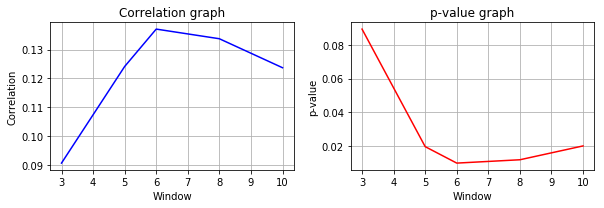

[0.26100232563012454]
[6.597456085045413e-07]


In [88]:
del model_win
fig = plt.gcf()
fig.set_size_inches(8.5, 3)

plt.subplot(1, 2, 1)
plt.plot(windows, correlations, 'b')
plt.xlabel('Window')
plt.ylabel('Correlation')
plt.title("Correlation graph")
plt.grid()

plt.subplot(1, 2, 2)
plt.plot(windows, pvals, 'r')
plt.xlabel('Window')
plt.ylabel('p-value')
plt.title("p-value graph")
plt.grid()

plt.tight_layout()
plt.show()

print(correlations)
print(pvals)

### 2. High precision corpus vs High coverage corpus vs Combined (not uniquely)
window = 6; size = 400 (from the reference paper); alpha = 0.025; iter = 5 (default)

In [26]:
names = ["Precision", "Coverage", "Combined"]
correlations = []
pvals = []

In [27]:
embeddings_path = "../resources/embeddings_precision.vec"
model_precision = Word2Vec(sentences_p, size=400, workers=5, window=6)
save_embeddings(embeddings_path, model_precision.wv)

corr, p, data = score.spearman(test_data_path, embeddings_path, bn2wn_mapping_path)
correlations.append(corr)
pvals.append(p)
#=========================================
embeddings_path = "../resources/embeddings_coverage.vec"
model_coverage = Word2Vec(sentences_c, size=400, workers=5, window=6)
save_embeddings(embeddings_path, model_coverage.wv)

corr, p, data = score.spearman(test_data_path, embeddings_path, bn2wn_mapping_path)
correlations.append(corr)
pvals.append(p)
#=========================================
embeddings_path = "../resources/embeddings_combined.vec"
model_comb = Word2Vec(sentences_folder, size=400, workers=5, window=6)
save_embeddings(embeddings_path, model_comb.wv)

corr, p, data = score.spearman(test_data_path, embeddings_path, bn2wn_mapping_path)
correlations.append(corr)
pvals.append(p)

2019-05-30 03:34:45,362 : INFO : collecting all words and their counts
2019-05-30 03:34:45,367 : INFO : PROGRESS: at sentence #0, processed 0 words, keeping 0 word types
2019-05-30 03:34:45,524 : INFO : PROGRESS: at sentence #10000, processed 271935 words, keeping 15378 word types
2019-05-30 03:34:45,679 : INFO : PROGRESS: at sentence #20000, processed 547522 words, keeping 21365 word types
2019-05-30 03:34:45,852 : INFO : PROGRESS: at sentence #30000, processed 829461 words, keeping 26426 word types
2019-05-30 03:34:46,013 : INFO : PROGRESS: at sentence #40000, processed 1116009 words, keeping 30457 word types
2019-05-30 03:34:46,170 : INFO : PROGRESS: at sentence #50000, processed 1388990 words, keeping 33582 word types
2019-05-30 03:34:46,328 : INFO : PROGRESS: at sentence #60000, processed 1663674 words, keeping 36477 word types
2019-05-30 03:34:46,506 : INFO : PROGRESS: at sentence #70000, processed 1942238 words, keeping 38893 word types
2019-05-30 03:34:46,675 : INFO : PROGRESS:

2019-05-30 03:34:59,202 : INFO : PROGRESS: at sentence #720000, processed 19922885 words, keeping 101560 word types
2019-05-30 03:34:59,382 : INFO : PROGRESS: at sentence #730000, processed 20199170 words, keeping 102191 word types
2019-05-30 03:34:59,541 : INFO : PROGRESS: at sentence #740000, processed 20478601 words, keeping 102940 word types
2019-05-30 03:34:59,688 : INFO : PROGRESS: at sentence #750000, processed 20763354 words, keeping 103715 word types
2019-05-30 03:34:59,834 : INFO : PROGRESS: at sentence #760000, processed 21031712 words, keeping 104355 word types
2019-05-30 03:35:00,006 : INFO : PROGRESS: at sentence #770000, processed 21309391 words, keeping 105094 word types
2019-05-30 03:35:00,189 : INFO : PROGRESS: at sentence #780000, processed 21586187 words, keeping 105476 word types
2019-05-30 03:35:00,342 : INFO : PROGRESS: at sentence #790000, processed 21858842 words, keeping 105847 word types
2019-05-30 03:35:00,490 : INFO : PROGRESS: at sentence #800000, processe

2019-05-30 03:35:10,471 : INFO : PROGRESS: at sentence #1430000, processed 39661756 words, keeping 133479 word types
2019-05-30 03:35:10,620 : INFO : PROGRESS: at sentence #1440000, processed 39947464 words, keeping 133832 word types
2019-05-30 03:35:10,768 : INFO : PROGRESS: at sentence #1450000, processed 40231741 words, keeping 134183 word types
2019-05-30 03:35:10,938 : INFO : PROGRESS: at sentence #1460000, processed 40512988 words, keeping 134532 word types
2019-05-30 03:35:11,078 : INFO : PROGRESS: at sentence #1470000, processed 40783599 words, keeping 134992 word types
2019-05-30 03:35:11,219 : INFO : PROGRESS: at sentence #1480000, processed 41058612 words, keeping 135354 word types
2019-05-30 03:35:11,371 : INFO : PROGRESS: at sentence #1490000, processed 41341677 words, keeping 135723 word types
2019-05-30 03:35:11,520 : INFO : PROGRESS: at sentence #1500000, processed 41624605 words, keeping 136123 word types
2019-05-30 03:35:11,664 : INFO : PROGRESS: at sentence #1510000,

2019-05-30 03:35:35,814 : INFO : EPOCH 1 - PROGRESS: at 11.46% examples, 270516 words/s, in_qsize 6, out_qsize 0
2019-05-30 03:35:36,815 : INFO : EPOCH 1 - PROGRESS: at 12.30% examples, 272865 words/s, in_qsize 9, out_qsize 1
2019-05-30 03:35:37,842 : INFO : EPOCH 1 - PROGRESS: at 13.14% examples, 273839 words/s, in_qsize 9, out_qsize 0
2019-05-30 03:35:38,852 : INFO : EPOCH 1 - PROGRESS: at 14.04% examples, 276345 words/s, in_qsize 8, out_qsize 1
2019-05-30 03:35:39,894 : INFO : EPOCH 1 - PROGRESS: at 14.91% examples, 277798 words/s, in_qsize 8, out_qsize 0
2019-05-30 03:35:40,922 : INFO : EPOCH 1 - PROGRESS: at 15.75% examples, 278922 words/s, in_qsize 0, out_qsize 0
2019-05-30 03:35:41,991 : INFO : EPOCH 1 - PROGRESS: at 16.68% examples, 281042 words/s, in_qsize 7, out_qsize 0
2019-05-30 03:35:43,028 : INFO : EPOCH 1 - PROGRESS: at 17.54% examples, 282343 words/s, in_qsize 9, out_qsize 0
2019-05-30 03:35:44,058 : INFO : EPOCH 1 - PROGRESS: at 18.50% examples, 284792 words/s, in_qsiz

2019-05-30 03:36:50,413 : INFO : EPOCH 1 - PROGRESS: at 78.08% examples, 315184 words/s, in_qsize 3, out_qsize 0
2019-05-30 03:36:51,420 : INFO : EPOCH 1 - PROGRESS: at 78.96% examples, 315314 words/s, in_qsize 10, out_qsize 0
2019-05-30 03:36:52,443 : INFO : EPOCH 1 - PROGRESS: at 79.93% examples, 315615 words/s, in_qsize 10, out_qsize 0
2019-05-30 03:36:53,488 : INFO : EPOCH 1 - PROGRESS: at 80.91% examples, 315896 words/s, in_qsize 6, out_qsize 1
2019-05-30 03:36:54,491 : INFO : EPOCH 1 - PROGRESS: at 81.86% examples, 316183 words/s, in_qsize 7, out_qsize 1
2019-05-30 03:36:55,506 : INFO : EPOCH 1 - PROGRESS: at 82.75% examples, 316403 words/s, in_qsize 3, out_qsize 0
2019-05-30 03:36:56,529 : INFO : EPOCH 1 - PROGRESS: at 83.65% examples, 316596 words/s, in_qsize 2, out_qsize 2
2019-05-30 03:36:57,567 : INFO : EPOCH 1 - PROGRESS: at 84.58% examples, 316820 words/s, in_qsize 9, out_qsize 0
2019-05-30 03:36:58,595 : INFO : EPOCH 1 - PROGRESS: at 85.53% examples, 317072 words/s, in_qs

2019-05-30 03:38:00,090 : INFO : EPOCH 2 - PROGRESS: at 40.89% examples, 322166 words/s, in_qsize 9, out_qsize 0
2019-05-30 03:38:01,102 : INFO : EPOCH 2 - PROGRESS: at 41.68% examples, 321231 words/s, in_qsize 8, out_qsize 0
2019-05-30 03:38:02,113 : INFO : EPOCH 2 - PROGRESS: at 42.49% examples, 320592 words/s, in_qsize 7, out_qsize 2
2019-05-30 03:38:03,115 : INFO : EPOCH 2 - PROGRESS: at 43.37% examples, 320487 words/s, in_qsize 10, out_qsize 0
2019-05-30 03:38:04,137 : INFO : EPOCH 2 - PROGRESS: at 44.34% examples, 320926 words/s, in_qsize 6, out_qsize 1
2019-05-30 03:38:05,140 : INFO : EPOCH 2 - PROGRESS: at 45.10% examples, 320110 words/s, in_qsize 9, out_qsize 1
2019-05-30 03:38:06,176 : INFO : EPOCH 2 - PROGRESS: at 45.91% examples, 319295 words/s, in_qsize 9, out_qsize 0
2019-05-30 03:38:07,195 : INFO : EPOCH 2 - PROGRESS: at 46.34% examples, 316149 words/s, in_qsize 10, out_qsize 0
2019-05-30 03:38:08,257 : INFO : EPOCH 2 - PROGRESS: at 46.85% examples, 313354 words/s, in_qs

2019-05-30 03:39:11,695 : INFO : worker thread finished; awaiting finish of 2 more threads
2019-05-30 03:39:11,701 : INFO : worker thread finished; awaiting finish of 1 more threads
2019-05-30 03:39:11,723 : INFO : worker thread finished; awaiting finish of 0 more threads
2019-05-30 03:39:11,725 : INFO : EPOCH - 2 : training on 52771336 raw words (36262418 effective words) took 117.6s, 308458 effective words/s
2019-05-30 03:39:12,764 : INFO : EPOCH 3 - PROGRESS: at 0.87% examples, 306561 words/s, in_qsize 8, out_qsize 0
2019-05-30 03:39:13,791 : INFO : EPOCH 3 - PROGRESS: at 1.83% examples, 323540 words/s, in_qsize 9, out_qsize 0
2019-05-30 03:39:14,829 : INFO : EPOCH 3 - PROGRESS: at 2.76% examples, 323530 words/s, in_qsize 5, out_qsize 0
2019-05-30 03:39:15,840 : INFO : EPOCH 3 - PROGRESS: at 3.72% examples, 328885 words/s, in_qsize 3, out_qsize 0
2019-05-30 03:39:16,878 : INFO : EPOCH 3 - PROGRESS: at 4.63% examples, 325110 words/s, in_qsize 10, out_qsize 0
2019-05-30 03:39:17,918 :

2019-05-30 03:40:23,548 : INFO : EPOCH 3 - PROGRESS: at 60.60% examples, 305732 words/s, in_qsize 2, out_qsize 1
2019-05-30 03:40:24,555 : INFO : EPOCH 3 - PROGRESS: at 61.45% examples, 305915 words/s, in_qsize 8, out_qsize 0
2019-05-30 03:40:25,556 : INFO : EPOCH 3 - PROGRESS: at 62.27% examples, 306025 words/s, in_qsize 9, out_qsize 0
2019-05-30 03:40:26,576 : INFO : EPOCH 3 - PROGRESS: at 63.18% examples, 306327 words/s, in_qsize 9, out_qsize 0
2019-05-30 03:40:27,580 : INFO : EPOCH 3 - PROGRESS: at 64.08% examples, 306512 words/s, in_qsize 9, out_qsize 0
2019-05-30 03:40:28,598 : INFO : EPOCH 3 - PROGRESS: at 64.95% examples, 306544 words/s, in_qsize 8, out_qsize 0
2019-05-30 03:40:29,608 : INFO : EPOCH 3 - PROGRESS: at 65.87% examples, 306799 words/s, in_qsize 6, out_qsize 1
2019-05-30 03:40:30,622 : INFO : EPOCH 3 - PROGRESS: at 66.82% examples, 307204 words/s, in_qsize 2, out_qsize 3
2019-05-30 03:40:31,625 : INFO : EPOCH 3 - PROGRESS: at 67.78% examples, 307636 words/s, in_qsiz

2019-05-30 03:41:34,031 : INFO : EPOCH 4 - PROGRESS: at 18.05% examples, 243439 words/s, in_qsize 10, out_qsize 0
2019-05-30 03:41:35,052 : INFO : EPOCH 4 - PROGRESS: at 18.65% examples, 242681 words/s, in_qsize 0, out_qsize 0
2019-05-30 03:41:36,060 : INFO : EPOCH 4 - PROGRESS: at 19.26% examples, 241860 words/s, in_qsize 10, out_qsize 0
2019-05-30 03:41:37,059 : INFO : EPOCH 4 - PROGRESS: at 19.89% examples, 241313 words/s, in_qsize 8, out_qsize 1
2019-05-30 03:41:38,077 : INFO : EPOCH 4 - PROGRESS: at 20.68% examples, 242891 words/s, in_qsize 8, out_qsize 1
2019-05-30 03:41:39,118 : INFO : EPOCH 4 - PROGRESS: at 21.39% examples, 243117 words/s, in_qsize 3, out_qsize 0
2019-05-30 03:41:40,142 : INFO : EPOCH 4 - PROGRESS: at 22.11% examples, 243112 words/s, in_qsize 7, out_qsize 0
2019-05-30 03:41:41,142 : INFO : EPOCH 4 - PROGRESS: at 22.92% examples, 244397 words/s, in_qsize 6, out_qsize 1
2019-05-30 03:41:42,179 : INFO : EPOCH 4 - PROGRESS: at 23.74% examples, 245760 words/s, in_qs

2019-05-30 03:42:48,848 : INFO : EPOCH 4 - PROGRESS: at 74.87% examples, 267047 words/s, in_qsize 9, out_qsize 0
2019-05-30 03:42:49,863 : INFO : EPOCH 4 - PROGRESS: at 75.55% examples, 266933 words/s, in_qsize 8, out_qsize 1
2019-05-30 03:42:50,871 : INFO : EPOCH 4 - PROGRESS: at 76.22% examples, 266716 words/s, in_qsize 9, out_qsize 1
2019-05-30 03:42:51,872 : INFO : EPOCH 4 - PROGRESS: at 76.93% examples, 266654 words/s, in_qsize 9, out_qsize 0
2019-05-30 03:42:52,904 : INFO : EPOCH 4 - PROGRESS: at 77.56% examples, 266199 words/s, in_qsize 9, out_qsize 0
2019-05-30 03:42:53,985 : INFO : EPOCH 4 - PROGRESS: at 78.15% examples, 265499 words/s, in_qsize 10, out_qsize 0
2019-05-30 03:42:54,995 : INFO : EPOCH 4 - PROGRESS: at 78.82% examples, 265302 words/s, in_qsize 8, out_qsize 1
2019-05-30 03:42:56,060 : INFO : EPOCH 4 - PROGRESS: at 79.49% examples, 264982 words/s, in_qsize 7, out_qsize 1
2019-05-30 03:42:57,079 : INFO : EPOCH 4 - PROGRESS: at 80.19% examples, 264837 words/s, in_qsi

2019-05-30 03:43:59,091 : INFO : EPOCH 5 - PROGRESS: at 26.52% examples, 274947 words/s, in_qsize 8, out_qsize 0
2019-05-30 03:44:00,113 : INFO : EPOCH 5 - PROGRESS: at 27.32% examples, 275130 words/s, in_qsize 9, out_qsize 0
2019-05-30 03:44:01,136 : INFO : EPOCH 5 - PROGRESS: at 28.21% examples, 275918 words/s, in_qsize 9, out_qsize 0
2019-05-30 03:44:02,184 : INFO : EPOCH 5 - PROGRESS: at 29.10% examples, 276656 words/s, in_qsize 7, out_qsize 2
2019-05-30 03:44:03,184 : INFO : EPOCH 5 - PROGRESS: at 30.06% examples, 278009 words/s, in_qsize 0, out_qsize 0
2019-05-30 03:44:04,211 : INFO : EPOCH 5 - PROGRESS: at 30.87% examples, 278120 words/s, in_qsize 8, out_qsize 0
2019-05-30 03:44:05,243 : INFO : EPOCH 5 - PROGRESS: at 31.76% examples, 278810 words/s, in_qsize 9, out_qsize 0
2019-05-30 03:44:06,251 : INFO : EPOCH 5 - PROGRESS: at 32.56% examples, 279124 words/s, in_qsize 8, out_qsize 0
2019-05-30 03:44:07,258 : INFO : EPOCH 5 - PROGRESS: at 33.35% examples, 279260 words/s, in_qsiz

2019-05-30 03:45:14,130 : INFO : EPOCH 5 - PROGRESS: at 81.92% examples, 270260 words/s, in_qsize 8, out_qsize 0
2019-05-30 03:45:15,191 : INFO : EPOCH 5 - PROGRESS: at 82.64% examples, 270146 words/s, in_qsize 8, out_qsize 0
2019-05-30 03:45:16,207 : INFO : EPOCH 5 - PROGRESS: at 83.37% examples, 270137 words/s, in_qsize 0, out_qsize 1
2019-05-30 03:45:17,239 : INFO : EPOCH 5 - PROGRESS: at 83.99% examples, 269794 words/s, in_qsize 7, out_qsize 2
2019-05-30 03:45:18,288 : INFO : EPOCH 5 - PROGRESS: at 84.71% examples, 269661 words/s, in_qsize 9, out_qsize 0
2019-05-30 03:45:19,291 : INFO : EPOCH 5 - PROGRESS: at 85.49% examples, 269819 words/s, in_qsize 9, out_qsize 0
2019-05-30 03:45:20,355 : INFO : EPOCH 5 - PROGRESS: at 86.17% examples, 269461 words/s, in_qsize 8, out_qsize 0
2019-05-30 03:45:21,386 : INFO : EPOCH 5 - PROGRESS: at 86.86% examples, 269136 words/s, in_qsize 10, out_qsize 0
2019-05-30 03:45:22,473 : INFO : EPOCH 5 - PROGRESS: at 87.54% examples, 268810 words/s, in_qsi

2019-05-30 03:48:07,876 : INFO : PROGRESS: at sentence #360000, processed 9967841 words, keeping 76432 word types
2019-05-30 03:48:08,093 : INFO : PROGRESS: at sentence #370000, processed 10241135 words, keeping 77155 word types
2019-05-30 03:48:08,323 : INFO : PROGRESS: at sentence #380000, processed 10525311 words, keeping 78024 word types
2019-05-30 03:48:08,632 : INFO : PROGRESS: at sentence #390000, processed 10808612 words, keeping 78840 word types
2019-05-30 03:48:08,796 : INFO : PROGRESS: at sentence #400000, processed 11093684 words, keeping 79738 word types
2019-05-30 03:48:08,967 : INFO : PROGRESS: at sentence #410000, processed 11363617 words, keeping 80533 word types
2019-05-30 03:48:09,169 : INFO : PROGRESS: at sentence #420000, processed 11629946 words, keeping 81337 word types
2019-05-30 03:48:09,351 : INFO : PROGRESS: at sentence #430000, processed 11900639 words, keeping 82092 word types
2019-05-30 03:48:09,521 : INFO : PROGRESS: at sentence #440000, processed 1217808

2019-05-30 03:48:22,295 : INFO : PROGRESS: at sentence #1070000, processed 29630839 words, keeping 117552 word types
2019-05-30 03:48:22,484 : INFO : PROGRESS: at sentence #1080000, processed 29895017 words, keeping 117963 word types
2019-05-30 03:48:22,658 : INFO : PROGRESS: at sentence #1090000, processed 30171982 words, keeping 118406 word types
2019-05-30 03:48:22,872 : INFO : PROGRESS: at sentence #1100000, processed 30455457 words, keeping 118778 word types
2019-05-30 03:48:23,162 : INFO : PROGRESS: at sentence #1110000, processed 30738260 words, keeping 119250 word types
2019-05-30 03:48:23,383 : INFO : PROGRESS: at sentence #1120000, processed 31008608 words, keeping 119566 word types
2019-05-30 03:48:23,643 : INFO : PROGRESS: at sentence #1130000, processed 31291468 words, keeping 119911 word types
2019-05-30 03:48:23,892 : INFO : PROGRESS: at sentence #1140000, processed 31574197 words, keeping 120273 word types
2019-05-30 03:48:24,108 : INFO : PROGRESS: at sentence #1150000,

2019-05-30 03:49:33,136 : INFO : EPOCH 1 - PROGRESS: at 43.06% examples, 299540 words/s, in_qsize 10, out_qsize 0
2019-05-30 03:49:34,140 : INFO : EPOCH 1 - PROGRESS: at 43.96% examples, 299952 words/s, in_qsize 3, out_qsize 0
2019-05-30 03:49:35,150 : INFO : EPOCH 1 - PROGRESS: at 44.68% examples, 299171 words/s, in_qsize 10, out_qsize 0
2019-05-30 03:49:36,171 : INFO : EPOCH 1 - PROGRESS: at 45.44% examples, 298730 words/s, in_qsize 9, out_qsize 0
2019-05-30 03:49:37,175 : INFO : EPOCH 1 - PROGRESS: at 46.34% examples, 299147 words/s, in_qsize 9, out_qsize 0
2019-05-30 03:49:38,180 : INFO : EPOCH 1 - PROGRESS: at 47.26% examples, 299652 words/s, in_qsize 4, out_qsize 0
2019-05-30 03:49:39,195 : INFO : EPOCH 1 - PROGRESS: at 48.11% examples, 299732 words/s, in_qsize 0, out_qsize 2
2019-05-30 03:49:40,205 : INFO : EPOCH 1 - PROGRESS: at 48.96% examples, 299824 words/s, in_qsize 1, out_qsize 0
2019-05-30 03:49:41,272 : INFO : EPOCH 1 - PROGRESS: at 49.64% examples, 298702 words/s, in_qs

2019-05-30 03:50:43,260 : INFO : EPOCH 2 - PROGRESS: at 1.69% examples, 302270 words/s, in_qsize 4, out_qsize 0
2019-05-30 03:50:44,275 : INFO : EPOCH 2 - PROGRESS: at 2.57% examples, 307186 words/s, in_qsize 9, out_qsize 0
2019-05-30 03:50:45,278 : INFO : EPOCH 2 - PROGRESS: at 3.39% examples, 305361 words/s, in_qsize 8, out_qsize 0
2019-05-30 03:50:46,306 : INFO : EPOCH 2 - PROGRESS: at 4.34% examples, 309716 words/s, in_qsize 4, out_qsize 0
2019-05-30 03:50:47,312 : INFO : EPOCH 2 - PROGRESS: at 5.23% examples, 311343 words/s, in_qsize 6, out_qsize 0
2019-05-30 03:50:48,353 : INFO : EPOCH 2 - PROGRESS: at 6.22% examples, 314775 words/s, in_qsize 3, out_qsize 2
2019-05-30 03:50:49,357 : INFO : EPOCH 2 - PROGRESS: at 7.17% examples, 317247 words/s, in_qsize 9, out_qsize 0
2019-05-30 03:50:50,381 : INFO : EPOCH 2 - PROGRESS: at 8.06% examples, 317041 words/s, in_qsize 4, out_qsize 0
2019-05-30 03:50:51,448 : INFO : EPOCH 2 - PROGRESS: at 8.96% examples, 316233 words/s, in_qsize 9, out_

2019-05-30 03:51:57,935 : INFO : EPOCH 2 - PROGRESS: at 65.14% examples, 308096 words/s, in_qsize 6, out_qsize 0
2019-05-30 03:51:58,958 : INFO : EPOCH 2 - PROGRESS: at 65.92% examples, 307656 words/s, in_qsize 10, out_qsize 0
2019-05-30 03:51:59,969 : INFO : EPOCH 2 - PROGRESS: at 66.74% examples, 307452 words/s, in_qsize 5, out_qsize 0
2019-05-30 03:52:00,996 : INFO : EPOCH 2 - PROGRESS: at 67.60% examples, 307364 words/s, in_qsize 2, out_qsize 0
2019-05-30 03:52:02,006 : INFO : EPOCH 2 - PROGRESS: at 68.44% examples, 307336 words/s, in_qsize 10, out_qsize 0
2019-05-30 03:52:03,070 : INFO : EPOCH 2 - PROGRESS: at 69.33% examples, 307380 words/s, in_qsize 7, out_qsize 0
2019-05-30 03:52:04,086 : INFO : EPOCH 2 - PROGRESS: at 70.16% examples, 307336 words/s, in_qsize 5, out_qsize 0
2019-05-30 03:52:05,121 : INFO : EPOCH 2 - PROGRESS: at 71.07% examples, 307465 words/s, in_qsize 9, out_qsize 1
2019-05-30 03:52:06,139 : INFO : EPOCH 2 - PROGRESS: at 71.79% examples, 306861 words/s, in_qs

2019-05-30 03:53:07,733 : INFO : EPOCH 3 - PROGRESS: at 23.21% examples, 293653 words/s, in_qsize 9, out_qsize 0
2019-05-30 03:53:08,751 : INFO : EPOCH 3 - PROGRESS: at 23.96% examples, 293068 words/s, in_qsize 8, out_qsize 0
2019-05-30 03:53:09,801 : INFO : EPOCH 3 - PROGRESS: at 24.69% examples, 291993 words/s, in_qsize 9, out_qsize 0
2019-05-30 03:53:10,815 : INFO : EPOCH 3 - PROGRESS: at 25.47% examples, 291508 words/s, in_qsize 10, out_qsize 0
2019-05-30 03:53:11,838 : INFO : EPOCH 3 - PROGRESS: at 26.31% examples, 291613 words/s, in_qsize 3, out_qsize 0
2019-05-30 03:53:12,867 : INFO : EPOCH 3 - PROGRESS: at 27.20% examples, 292066 words/s, in_qsize 9, out_qsize 0
2019-05-30 03:53:13,877 : INFO : EPOCH 3 - PROGRESS: at 27.85% examples, 290127 words/s, in_qsize 7, out_qsize 0
2019-05-30 03:53:14,924 : INFO : EPOCH 3 - PROGRESS: at 28.69% examples, 289966 words/s, in_qsize 5, out_qsize 2
2019-05-30 03:53:15,925 : INFO : EPOCH 3 - PROGRESS: at 29.66% examples, 291195 words/s, in_qsi

2019-05-30 03:54:22,722 : INFO : EPOCH 3 - PROGRESS: at 84.36% examples, 295891 words/s, in_qsize 0, out_qsize 0
2019-05-30 03:54:23,754 : INFO : EPOCH 3 - PROGRESS: at 84.95% examples, 295071 words/s, in_qsize 9, out_qsize 0
2019-05-30 03:54:24,800 : INFO : EPOCH 3 - PROGRESS: at 85.75% examples, 294946 words/s, in_qsize 10, out_qsize 0
2019-05-30 03:54:25,828 : INFO : EPOCH 3 - PROGRESS: at 86.62% examples, 294986 words/s, in_qsize 7, out_qsize 0
2019-05-30 03:54:26,878 : INFO : EPOCH 3 - PROGRESS: at 87.29% examples, 294344 words/s, in_qsize 9, out_qsize 0
2019-05-30 03:54:27,879 : INFO : EPOCH 3 - PROGRESS: at 88.10% examples, 294416 words/s, in_qsize 7, out_qsize 0
2019-05-30 03:54:28,906 : INFO : EPOCH 3 - PROGRESS: at 89.04% examples, 294661 words/s, in_qsize 1, out_qsize 0
2019-05-30 03:54:29,906 : INFO : EPOCH 3 - PROGRESS: at 89.83% examples, 294527 words/s, in_qsize 8, out_qsize 0
2019-05-30 03:54:30,934 : INFO : EPOCH 3 - PROGRESS: at 90.63% examples, 294403 words/s, in_qsi

2019-05-30 03:55:33,032 : INFO : EPOCH 4 - PROGRESS: at 38.40% examples, 276705 words/s, in_qsize 8, out_qsize 0
2019-05-30 03:55:34,035 : INFO : EPOCH 4 - PROGRESS: at 39.27% examples, 277561 words/s, in_qsize 6, out_qsize 0
2019-05-30 03:55:35,061 : INFO : EPOCH 4 - PROGRESS: at 40.13% examples, 277987 words/s, in_qsize 3, out_qsize 3
2019-05-30 03:55:36,131 : INFO : EPOCH 4 - PROGRESS: at 41.08% examples, 278857 words/s, in_qsize 0, out_qsize 0
2019-05-30 03:55:37,134 : INFO : EPOCH 4 - PROGRESS: at 41.83% examples, 278638 words/s, in_qsize 1, out_qsize 0
2019-05-30 03:55:38,148 : INFO : EPOCH 4 - PROGRESS: at 42.41% examples, 277363 words/s, in_qsize 10, out_qsize 0
2019-05-30 03:55:39,149 : INFO : EPOCH 4 - PROGRESS: at 43.22% examples, 277558 words/s, in_qsize 5, out_qsize 2
2019-05-30 03:55:40,148 : INFO : EPOCH 4 - PROGRESS: at 44.07% examples, 278098 words/s, in_qsize 8, out_qsize 0
2019-05-30 03:55:41,190 : INFO : EPOCH 4 - PROGRESS: at 44.97% examples, 278771 words/s, in_qsi

2019-05-30 03:56:46,956 : INFO : worker thread finished; awaiting finish of 4 more threads
2019-05-30 03:56:46,961 : INFO : worker thread finished; awaiting finish of 3 more threads
2019-05-30 03:56:46,991 : INFO : worker thread finished; awaiting finish of 2 more threads
2019-05-30 03:56:46,998 : INFO : worker thread finished; awaiting finish of 1 more threads
2019-05-30 03:56:47,014 : INFO : worker thread finished; awaiting finish of 0 more threads
2019-05-30 03:56:47,016 : INFO : EPOCH - 4 : training on 52772613 raw words (36268653 effective words) took 124.2s, 292026 effective words/s
2019-05-30 03:56:48,056 : INFO : EPOCH 5 - PROGRESS: at 0.82% examples, 287615 words/s, in_qsize 8, out_qsize 0
2019-05-30 03:56:49,069 : INFO : EPOCH 5 - PROGRESS: at 1.65% examples, 293028 words/s, in_qsize 1, out_qsize 0
2019-05-30 03:56:50,110 : INFO : EPOCH 5 - PROGRESS: at 2.37% examples, 280608 words/s, in_qsize 10, out_qsize 0
2019-05-30 03:56:51,119 : INFO : EPOCH 5 - PROGRESS: at 3.23% examp

2019-05-30 03:57:57,786 : INFO : EPOCH 5 - PROGRESS: at 61.23% examples, 313667 words/s, in_qsize 9, out_qsize 0
2019-05-30 03:57:58,799 : INFO : EPOCH 5 - PROGRESS: at 62.13% examples, 314000 words/s, in_qsize 2, out_qsize 0
2019-05-30 03:57:59,849 : INFO : EPOCH 5 - PROGRESS: at 63.01% examples, 313980 words/s, in_qsize 9, out_qsize 0
2019-05-30 03:58:00,873 : INFO : EPOCH 5 - PROGRESS: at 63.90% examples, 313969 words/s, in_qsize 6, out_qsize 0
2019-05-30 03:58:01,884 : INFO : EPOCH 5 - PROGRESS: at 64.81% examples, 314122 words/s, in_qsize 10, out_qsize 0
2019-05-30 03:58:02,956 : INFO : EPOCH 5 - PROGRESS: at 65.56% examples, 313214 words/s, in_qsize 9, out_qsize 0
2019-05-30 03:58:03,961 : INFO : EPOCH 5 - PROGRESS: at 66.36% examples, 312863 words/s, in_qsize 5, out_qsize 0
2019-05-30 03:58:04,977 : INFO : EPOCH 5 - PROGRESS: at 67.17% examples, 312479 words/s, in_qsize 5, out_qsize 0
2019-05-30 03:58:05,987 : INFO : EPOCH 5 - PROGRESS: at 67.89% examples, 311786 words/s, in_qsi

2019-05-30 04:02:04,441 : INFO : PROGRESS: at sentence #150000, processed 4122049 words, keeping 53186 word types
2019-05-30 04:02:04,610 : INFO : PROGRESS: at sentence #160000, processed 4404564 words, keeping 54783 word types
2019-05-30 04:02:04,766 : INFO : PROGRESS: at sentence #170000, processed 4686222 words, keeping 56334 word types
2019-05-30 04:02:04,925 : INFO : PROGRESS: at sentence #180000, processed 4958822 words, keeping 57721 word types
2019-05-30 04:02:05,092 : INFO : PROGRESS: at sentence #190000, processed 5233768 words, keeping 59204 word types
2019-05-30 04:02:05,251 : INFO : PROGRESS: at sentence #200000, processed 5507295 words, keeping 60576 word types
2019-05-30 04:02:05,420 : INFO : PROGRESS: at sentence #210000, processed 5787761 words, keeping 61830 word types
2019-05-30 04:02:05,597 : INFO : PROGRESS: at sentence #220000, processed 6064115 words, keeping 62890 word types
2019-05-30 04:02:05,755 : INFO : PROGRESS: at sentence #230000, processed 6343038 words,

2019-05-30 04:02:16,212 : INFO : PROGRESS: at sentence #870000, processed 24074491 words, keeping 107982 word types
2019-05-30 04:02:16,375 : INFO : PROGRESS: at sentence #880000, processed 24351675 words, keeping 108523 word types
2019-05-30 04:02:16,527 : INFO : PROGRESS: at sentence #890000, processed 24629462 words, keeping 109100 word types
2019-05-30 04:02:16,689 : INFO : PROGRESS: at sentence #900000, processed 24900751 words, keeping 109728 word types
2019-05-30 04:02:16,842 : INFO : PROGRESS: at sentence #910000, processed 25177763 words, keeping 110266 word types
2019-05-30 04:02:16,997 : INFO : PROGRESS: at sentence #920000, processed 25454235 words, keeping 110639 word types
2019-05-30 04:02:17,154 : INFO : PROGRESS: at sentence #930000, processed 25734028 words, keeping 111080 word types
2019-05-30 04:02:17,319 : INFO : PROGRESS: at sentence #940000, processed 26018010 words, keeping 111496 word types
2019-05-30 04:02:17,480 : INFO : PROGRESS: at sentence #950000, processe

2019-05-30 04:02:27,476 : INFO : PROGRESS: at sentence #1580000, processed 43875950 words, keeping 136906 word types
2019-05-30 04:02:27,648 : INFO : PROGRESS: at sentence #1590000, processed 44169255 words, keeping 137415 word types
2019-05-30 04:02:27,953 : INFO : PROGRESS: at sentence #1600000, processed 44461369 words, keeping 137975 word types
2019-05-30 04:02:28,113 : INFO : PROGRESS: at sentence #1610000, processed 44744137 words, keeping 138372 word types
2019-05-30 04:02:28,273 : INFO : PROGRESS: at sentence #1620000, processed 45030193 words, keeping 138736 word types
2019-05-30 04:02:28,428 : INFO : PROGRESS: at sentence #1630000, processed 45307574 words, keeping 139079 word types
2019-05-30 04:02:28,597 : INFO : PROGRESS: at sentence #1640000, processed 45585990 words, keeping 139342 word types
2019-05-30 04:02:28,750 : INFO : PROGRESS: at sentence #1650000, processed 45853071 words, keeping 139572 word types
2019-05-30 04:02:28,996 : INFO : PROGRESS: at sentence #1660000,

2019-05-30 04:02:40,601 : INFO : PROGRESS: at sentence #2290000, processed 63488250 words, keeping 156687 word types
2019-05-30 04:02:40,784 : INFO : PROGRESS: at sentence #2300000, processed 63777111 words, keeping 156787 word types
2019-05-30 04:02:40,967 : INFO : PROGRESS: at sentence #2310000, processed 64052281 words, keeping 156904 word types
2019-05-30 04:02:41,128 : INFO : PROGRESS: at sentence #2320000, processed 64313978 words, keeping 157006 word types
2019-05-30 04:02:41,292 : INFO : PROGRESS: at sentence #2330000, processed 64588682 words, keeping 157119 word types
2019-05-30 04:02:41,458 : INFO : PROGRESS: at sentence #2340000, processed 64859004 words, keeping 157218 word types
2019-05-30 04:02:41,641 : INFO : PROGRESS: at sentence #2350000, processed 65138909 words, keeping 157323 word types
2019-05-30 04:02:41,819 : INFO : PROGRESS: at sentence #2360000, processed 65431374 words, keeping 157445 word types
2019-05-30 04:02:42,002 : INFO : PROGRESS: at sentence #2370000,

2019-05-30 04:02:54,452 : INFO : PROGRESS: at sentence #3000000, processed 83135486 words, keeping 162206 word types
2019-05-30 04:02:54,687 : INFO : PROGRESS: at sentence #3010000, processed 83420466 words, keeping 162255 word types
2019-05-30 04:02:54,876 : INFO : PROGRESS: at sentence #3020000, processed 83692923 words, keeping 162295 word types
2019-05-30 04:02:55,131 : INFO : PROGRESS: at sentence #3030000, processed 83971556 words, keeping 162340 word types
2019-05-30 04:02:55,391 : INFO : PROGRESS: at sentence #3040000, processed 84255213 words, keeping 162387 word types
2019-05-30 04:02:55,641 : INFO : PROGRESS: at sentence #3050000, processed 84537942 words, keeping 162446 word types
2019-05-30 04:02:55,875 : INFO : PROGRESS: at sentence #3060000, processed 84831010 words, keeping 162501 word types
2019-05-30 04:02:56,112 : INFO : PROGRESS: at sentence #3070000, processed 85113122 words, keeping 162558 word types
2019-05-30 04:02:56,318 : INFO : PROGRESS: at sentence #3080000,

2019-05-30 04:03:08,641 : INFO : PROGRESS: at sentence #3700000, processed 102622215 words, keeping 165317 word types
2019-05-30 04:03:08,807 : INFO : PROGRESS: at sentence #3710000, processed 102898493 words, keeping 165379 word types
2019-05-30 04:03:08,982 : INFO : PROGRESS: at sentence #3720000, processed 103178021 words, keeping 165401 word types
2019-05-30 04:03:09,169 : INFO : PROGRESS: at sentence #3730000, processed 103454589 words, keeping 165426 word types
2019-05-30 04:03:09,346 : INFO : PROGRESS: at sentence #3740000, processed 103731915 words, keeping 165459 word types
2019-05-30 04:03:09,529 : INFO : PROGRESS: at sentence #3750000, processed 104009990 words, keeping 165489 word types
2019-05-30 04:03:09,709 : INFO : PROGRESS: at sentence #3760000, processed 104281244 words, keeping 165529 word types
2019-05-30 04:03:09,908 : INFO : PROGRESS: at sentence #3770000, processed 104554699 words, keeping 165549 word types
2019-05-30 04:03:10,082 : INFO : PROGRESS: at sentence #

2019-05-30 04:04:09,994 : INFO : EPOCH 1 - PROGRESS: at 22.86% examples, 299863 words/s, in_qsize 2, out_qsize 1
2019-05-30 04:04:11,043 : INFO : EPOCH 1 - PROGRESS: at 23.25% examples, 299425 words/s, in_qsize 10, out_qsize 0
2019-05-30 04:04:12,068 : INFO : EPOCH 1 - PROGRESS: at 23.59% examples, 298273 words/s, in_qsize 9, out_qsize 0
2019-05-30 04:04:13,070 : INFO : EPOCH 1 - PROGRESS: at 23.98% examples, 297977 words/s, in_qsize 9, out_qsize 0
2019-05-30 04:04:14,111 : INFO : EPOCH 1 - PROGRESS: at 24.33% examples, 297026 words/s, in_qsize 10, out_qsize 0
2019-05-30 04:04:15,119 : INFO : EPOCH 1 - PROGRESS: at 24.78% examples, 297510 words/s, in_qsize 6, out_qsize 0
2019-05-30 04:04:16,128 : INFO : EPOCH 1 - PROGRESS: at 25.18% examples, 297531 words/s, in_qsize 8, out_qsize 0
2019-05-30 04:04:17,145 : INFO : EPOCH 1 - PROGRESS: at 25.58% examples, 297416 words/s, in_qsize 9, out_qsize 0
2019-05-30 04:04:18,150 : INFO : EPOCH 1 - PROGRESS: at 25.94% examples, 296926 words/s, in_qs

2019-05-30 04:05:24,908 : INFO : EPOCH 1 - PROGRESS: at 54.12% examples, 301895 words/s, in_qsize 7, out_qsize 2
2019-05-30 04:05:25,938 : INFO : EPOCH 1 - PROGRESS: at 54.51% examples, 301726 words/s, in_qsize 8, out_qsize 0
2019-05-30 04:05:26,940 : INFO : EPOCH 1 - PROGRESS: at 54.85% examples, 301253 words/s, in_qsize 9, out_qsize 0
2019-05-30 04:05:27,971 : INFO : EPOCH 1 - PROGRESS: at 55.21% examples, 300879 words/s, in_qsize 9, out_qsize 0
2019-05-30 04:05:29,012 : INFO : EPOCH 1 - PROGRESS: at 55.56% examples, 300441 words/s, in_qsize 9, out_qsize 0
2019-05-30 04:05:30,048 : INFO : EPOCH 1 - PROGRESS: at 55.90% examples, 300018 words/s, in_qsize 9, out_qsize 0
2019-05-30 04:05:31,092 : INFO : EPOCH 1 - PROGRESS: at 56.32% examples, 299897 words/s, in_qsize 4, out_qsize 1
2019-05-30 04:05:32,105 : INFO : EPOCH 1 - PROGRESS: at 56.72% examples, 299799 words/s, in_qsize 8, out_qsize 0
2019-05-30 04:05:33,112 : INFO : EPOCH 1 - PROGRESS: at 56.98% examples, 298960 words/s, in_qsiz

2019-05-30 04:06:39,889 : INFO : EPOCH 1 - PROGRESS: at 83.48% examples, 295659 words/s, in_qsize 7, out_qsize 0
2019-05-30 04:06:40,898 : INFO : EPOCH 1 - PROGRESS: at 83.94% examples, 295809 words/s, in_qsize 0, out_qsize 0
2019-05-30 04:06:41,946 : INFO : EPOCH 1 - PROGRESS: at 84.31% examples, 295672 words/s, in_qsize 7, out_qsize 1
2019-05-30 04:06:42,969 : INFO : EPOCH 1 - PROGRESS: at 84.72% examples, 295643 words/s, in_qsize 8, out_qsize 0
2019-05-30 04:06:43,982 : INFO : EPOCH 1 - PROGRESS: at 85.19% examples, 295888 words/s, in_qsize 0, out_qsize 0
2019-05-30 04:06:45,020 : INFO : EPOCH 1 - PROGRESS: at 85.61% examples, 295896 words/s, in_qsize 8, out_qsize 1
2019-05-30 04:06:46,032 : INFO : EPOCH 1 - PROGRESS: at 86.06% examples, 296013 words/s, in_qsize 9, out_qsize 0
2019-05-30 04:06:47,070 : INFO : EPOCH 1 - PROGRESS: at 86.39% examples, 295669 words/s, in_qsize 9, out_qsize 1
2019-05-30 04:06:48,134 : INFO : EPOCH 1 - PROGRESS: at 86.90% examples, 295830 words/s, in_qsiz

2019-05-30 04:07:49,844 : INFO : EPOCH 2 - PROGRESS: at 12.76% examples, 303845 words/s, in_qsize 0, out_qsize 1
2019-05-30 04:07:50,880 : INFO : EPOCH 2 - PROGRESS: at 13.23% examples, 304525 words/s, in_qsize 7, out_qsize 1
2019-05-30 04:07:51,891 : INFO : EPOCH 2 - PROGRESS: at 13.68% examples, 304748 words/s, in_qsize 0, out_qsize 0
2019-05-30 04:07:52,969 : INFO : EPOCH 2 - PROGRESS: at 14.12% examples, 304249 words/s, in_qsize 8, out_qsize 0
2019-05-30 04:07:53,994 : INFO : EPOCH 2 - PROGRESS: at 14.58% examples, 304604 words/s, in_qsize 8, out_qsize 1
2019-05-30 04:07:55,006 : INFO : EPOCH 2 - PROGRESS: at 15.03% examples, 304618 words/s, in_qsize 0, out_qsize 0
2019-05-30 04:07:56,023 : INFO : EPOCH 2 - PROGRESS: at 15.35% examples, 302572 words/s, in_qsize 1, out_qsize 0
2019-05-30 04:07:57,039 : INFO : EPOCH 2 - PROGRESS: at 15.81% examples, 303006 words/s, in_qsize 1, out_qsize 0
2019-05-30 04:07:58,072 : INFO : EPOCH 2 - PROGRESS: at 16.22% examples, 302694 words/s, in_qsiz

2019-05-30 04:09:04,535 : INFO : EPOCH 2 - PROGRESS: at 43.26% examples, 299283 words/s, in_qsize 8, out_qsize 0
2019-05-30 04:09:05,585 : INFO : EPOCH 2 - PROGRESS: at 43.67% examples, 299101 words/s, in_qsize 9, out_qsize 0
2019-05-30 04:09:06,620 : INFO : EPOCH 2 - PROGRESS: at 44.06% examples, 298913 words/s, in_qsize 0, out_qsize 1
2019-05-30 04:09:07,676 : INFO : EPOCH 2 - PROGRESS: at 44.38% examples, 298031 words/s, in_qsize 4, out_qsize 2
2019-05-30 04:09:08,722 : INFO : EPOCH 2 - PROGRESS: at 44.77% examples, 297749 words/s, in_qsize 9, out_qsize 0
2019-05-30 04:09:09,843 : INFO : EPOCH 2 - PROGRESS: at 45.14% examples, 297154 words/s, in_qsize 5, out_qsize 3
2019-05-30 04:09:10,866 : INFO : EPOCH 2 - PROGRESS: at 45.56% examples, 297083 words/s, in_qsize 6, out_qsize 0
2019-05-30 04:09:11,882 : INFO : EPOCH 2 - PROGRESS: at 45.92% examples, 296679 words/s, in_qsize 0, out_qsize 0
2019-05-30 04:09:12,900 : INFO : EPOCH 2 - PROGRESS: at 46.30% examples, 296323 words/s, in_qsiz

2019-05-30 04:10:19,666 : INFO : EPOCH 2 - PROGRESS: at 71.90% examples, 289401 words/s, in_qsize 9, out_qsize 0
2019-05-30 04:10:20,678 : INFO : EPOCH 2 - PROGRESS: at 72.33% examples, 289532 words/s, in_qsize 9, out_qsize 0
2019-05-30 04:10:21,678 : INFO : EPOCH 2 - PROGRESS: at 72.73% examples, 289562 words/s, in_qsize 7, out_qsize 0
2019-05-30 04:10:22,704 : INFO : EPOCH 2 - PROGRESS: at 73.06% examples, 289218 words/s, in_qsize 9, out_qsize 0
2019-05-30 04:10:23,714 : INFO : EPOCH 2 - PROGRESS: at 73.44% examples, 289125 words/s, in_qsize 9, out_qsize 0
2019-05-30 04:10:24,728 : INFO : EPOCH 2 - PROGRESS: at 73.83% examples, 289066 words/s, in_qsize 10, out_qsize 0
2019-05-30 04:10:25,760 : INFO : EPOCH 2 - PROGRESS: at 74.27% examples, 289158 words/s, in_qsize 5, out_qsize 0
2019-05-30 04:10:26,774 : INFO : EPOCH 2 - PROGRESS: at 74.72% examples, 289384 words/s, in_qsize 6, out_qsize 0
2019-05-30 04:10:27,802 : INFO : EPOCH 2 - PROGRESS: at 75.10% examples, 289332 words/s, in_qsi

2019-05-30 04:11:31,065 : INFO : worker thread finished; awaiting finish of 1 more threads
2019-05-30 04:11:31,072 : INFO : worker thread finished; awaiting finish of 0 more threads
2019-05-30 04:11:31,074 : INFO : EPOCH - 2 : training on 105543949 raw words (72653491 effective words) took 251.8s, 288593 effective words/s
2019-05-30 04:11:32,127 : INFO : EPOCH 3 - PROGRESS: at 0.39% examples, 270660 words/s, in_qsize 3, out_qsize 0
2019-05-30 04:11:33,151 : INFO : EPOCH 3 - PROGRESS: at 0.80% examples, 279517 words/s, in_qsize 9, out_qsize 0
2019-05-30 04:11:34,157 : INFO : EPOCH 3 - PROGRESS: at 1.12% examples, 266262 words/s, in_qsize 9, out_qsize 0
2019-05-30 04:11:35,171 : INFO : EPOCH 3 - PROGRESS: at 1.48% examples, 264075 words/s, in_qsize 10, out_qsize 0
2019-05-30 04:11:36,174 : INFO : EPOCH 3 - PROGRESS: at 1.75% examples, 251014 words/s, in_qsize 7, out_qsize 0
2019-05-30 04:11:37,185 : INFO : EPOCH 3 - PROGRESS: at 2.18% examples, 258939 words/s, in_qsize 10, out_qsize 0
20

2019-05-30 04:12:43,755 : INFO : EPOCH 3 - PROGRESS: at 30.08% examples, 300350 words/s, in_qsize 3, out_qsize 0
2019-05-30 04:12:44,783 : INFO : EPOCH 3 - PROGRESS: at 30.45% examples, 299963 words/s, in_qsize 0, out_qsize 2
2019-05-30 04:12:45,839 : INFO : EPOCH 3 - PROGRESS: at 30.86% examples, 299848 words/s, in_qsize 7, out_qsize 0
2019-05-30 04:12:46,890 : INFO : EPOCH 3 - PROGRESS: at 31.25% examples, 299667 words/s, in_qsize 7, out_qsize 0
2019-05-30 04:12:47,919 : INFO : EPOCH 3 - PROGRESS: at 31.72% examples, 300109 words/s, in_qsize 5, out_qsize 0
2019-05-30 04:12:49,010 : INFO : EPOCH 3 - PROGRESS: at 32.07% examples, 299069 words/s, in_qsize 10, out_qsize 0
2019-05-30 04:12:50,034 : INFO : EPOCH 3 - PROGRESS: at 32.53% examples, 299450 words/s, in_qsize 4, out_qsize 0
2019-05-30 04:12:51,043 : INFO : EPOCH 3 - PROGRESS: at 33.01% examples, 299971 words/s, in_qsize 0, out_qsize 0
2019-05-30 04:12:52,065 : INFO : EPOCH 3 - PROGRESS: at 33.46% examples, 300181 words/s, in_qsi

2019-05-30 04:13:58,652 : INFO : EPOCH 3 - PROGRESS: at 61.58% examples, 303107 words/s, in_qsize 4, out_qsize 1
2019-05-30 04:13:59,653 : INFO : EPOCH 3 - PROGRESS: at 62.01% examples, 303242 words/s, in_qsize 8, out_qsize 0
2019-05-30 04:14:00,654 : INFO : EPOCH 3 - PROGRESS: at 62.44% examples, 303324 words/s, in_qsize 6, out_qsize 0
2019-05-30 04:14:01,666 : INFO : EPOCH 3 - PROGRESS: at 62.90% examples, 303519 words/s, in_qsize 5, out_qsize 0
2019-05-30 04:14:02,666 : INFO : EPOCH 3 - PROGRESS: at 63.33% examples, 303552 words/s, in_qsize 7, out_qsize 0
2019-05-30 04:14:03,688 : INFO : EPOCH 3 - PROGRESS: at 63.80% examples, 303676 words/s, in_qsize 8, out_qsize 0
2019-05-30 04:14:04,721 : INFO : EPOCH 3 - PROGRESS: at 64.27% examples, 303802 words/s, in_qsize 8, out_qsize 1
2019-05-30 04:14:05,734 : INFO : EPOCH 3 - PROGRESS: at 64.77% examples, 304030 words/s, in_qsize 5, out_qsize 0
2019-05-30 04:14:06,769 : INFO : EPOCH 3 - PROGRESS: at 65.22% examples, 304043 words/s, in_qsiz

2019-05-30 04:15:13,444 : INFO : EPOCH 3 - PROGRESS: at 93.28% examples, 305097 words/s, in_qsize 0, out_qsize 1
2019-05-30 04:15:14,479 : INFO : EPOCH 3 - PROGRESS: at 93.71% examples, 305096 words/s, in_qsize 9, out_qsize 1
2019-05-30 04:15:15,524 : INFO : EPOCH 3 - PROGRESS: at 94.18% examples, 305179 words/s, in_qsize 7, out_qsize 0
2019-05-30 04:15:16,552 : INFO : EPOCH 3 - PROGRESS: at 94.65% examples, 305253 words/s, in_qsize 9, out_qsize 0
2019-05-30 04:15:17,572 : INFO : EPOCH 3 - PROGRESS: at 95.09% examples, 305274 words/s, in_qsize 9, out_qsize 2
2019-05-30 04:15:18,587 : INFO : EPOCH 3 - PROGRESS: at 95.53% examples, 305303 words/s, in_qsize 9, out_qsize 0
2019-05-30 04:15:19,602 : INFO : EPOCH 3 - PROGRESS: at 95.97% examples, 305311 words/s, in_qsize 6, out_qsize 0
2019-05-30 04:15:20,683 : INFO : EPOCH 3 - PROGRESS: at 96.34% examples, 304987 words/s, in_qsize 8, out_qsize 0
2019-05-30 04:15:21,682 : INFO : EPOCH 3 - PROGRESS: at 96.75% examples, 304921 words/s, in_qsiz

2019-05-30 04:16:24,394 : INFO : EPOCH 4 - PROGRESS: at 22.28% examples, 301353 words/s, in_qsize 5, out_qsize 1
2019-05-30 04:16:25,415 : INFO : EPOCH 4 - PROGRESS: at 22.71% examples, 301628 words/s, in_qsize 3, out_qsize 0
2019-05-30 04:16:26,417 : INFO : EPOCH 4 - PROGRESS: at 23.15% examples, 301897 words/s, in_qsize 0, out_qsize 0
2019-05-30 04:16:27,452 : INFO : EPOCH 4 - PROGRESS: at 23.53% examples, 301241 words/s, in_qsize 7, out_qsize 0
2019-05-30 04:16:28,469 : INFO : EPOCH 4 - PROGRESS: at 23.94% examples, 301051 words/s, in_qsize 10, out_qsize 2
2019-05-30 04:16:29,502 : INFO : EPOCH 4 - PROGRESS: at 24.36% examples, 300897 words/s, in_qsize 9, out_qsize 1
2019-05-30 04:16:30,512 : INFO : EPOCH 4 - PROGRESS: at 24.80% examples, 301298 words/s, in_qsize 6, out_qsize 0
2019-05-30 04:16:31,526 : INFO : EPOCH 4 - PROGRESS: at 25.22% examples, 301456 words/s, in_qsize 9, out_qsize 0
2019-05-30 04:16:32,587 : INFO : EPOCH 4 - PROGRESS: at 25.59% examples, 300618 words/s, in_qsi

2019-05-30 04:17:39,546 : INFO : EPOCH 4 - PROGRESS: at 52.72% examples, 297542 words/s, in_qsize 7, out_qsize 1
2019-05-30 04:17:40,619 : INFO : EPOCH 4 - PROGRESS: at 53.13% examples, 297303 words/s, in_qsize 7, out_qsize 2
2019-05-30 04:17:41,628 : INFO : EPOCH 4 - PROGRESS: at 53.58% examples, 297480 words/s, in_qsize 10, out_qsize 0
2019-05-30 04:17:42,655 : INFO : EPOCH 4 - PROGRESS: at 54.04% examples, 297670 words/s, in_qsize 7, out_qsize 3
2019-05-30 04:17:43,677 : INFO : EPOCH 4 - PROGRESS: at 54.52% examples, 298022 words/s, in_qsize 7, out_qsize 1
2019-05-30 04:17:44,686 : INFO : EPOCH 4 - PROGRESS: at 54.97% examples, 298178 words/s, in_qsize 10, out_qsize 0
2019-05-30 04:17:45,689 : INFO : EPOCH 4 - PROGRESS: at 55.29% examples, 297694 words/s, in_qsize 7, out_qsize 1
2019-05-30 04:17:46,714 : INFO : EPOCH 4 - PROGRESS: at 55.77% examples, 297975 words/s, in_qsize 8, out_qsize 0
2019-05-30 04:17:47,749 : INFO : EPOCH 4 - PROGRESS: at 56.19% examples, 297984 words/s, in_qs

2019-05-30 04:18:54,514 : INFO : EPOCH 4 - PROGRESS: at 83.27% examples, 297027 words/s, in_qsize 5, out_qsize 0
2019-05-30 04:18:55,547 : INFO : EPOCH 4 - PROGRESS: at 83.73% examples, 297135 words/s, in_qsize 8, out_qsize 1
2019-05-30 04:18:56,561 : INFO : EPOCH 4 - PROGRESS: at 84.19% examples, 297305 words/s, in_qsize 5, out_qsize 0
2019-05-30 04:18:57,657 : INFO : EPOCH 4 - PROGRESS: at 84.66% examples, 297427 words/s, in_qsize 5, out_qsize 0
2019-05-30 04:18:58,660 : INFO : EPOCH 4 - PROGRESS: at 85.11% examples, 297578 words/s, in_qsize 4, out_qsize 0
2019-05-30 04:18:59,668 : INFO : EPOCH 4 - PROGRESS: at 85.56% examples, 297720 words/s, in_qsize 7, out_qsize 0
2019-05-30 04:19:00,691 : INFO : EPOCH 4 - PROGRESS: at 86.01% examples, 297812 words/s, in_qsize 0, out_qsize 0
2019-05-30 04:19:01,717 : INFO : EPOCH 4 - PROGRESS: at 86.46% examples, 297898 words/s, in_qsize 3, out_qsize 0
2019-05-30 04:19:02,737 : INFO : EPOCH 4 - PROGRESS: at 86.91% examples, 297948 words/s, in_qsiz

2019-05-30 04:20:04,218 : INFO : EPOCH 5 - PROGRESS: at 13.61% examples, 309731 words/s, in_qsize 1, out_qsize 0
2019-05-30 04:20:05,242 : INFO : EPOCH 5 - PROGRESS: at 14.09% examples, 310397 words/s, in_qsize 1, out_qsize 0
2019-05-30 04:20:06,247 : INFO : EPOCH 5 - PROGRESS: at 14.56% examples, 310957 words/s, in_qsize 1, out_qsize 0
2019-05-30 04:20:07,257 : INFO : EPOCH 5 - PROGRESS: at 15.03% examples, 311214 words/s, in_qsize 6, out_qsize 2
2019-05-30 04:20:08,269 : INFO : EPOCH 5 - PROGRESS: at 15.51% examples, 311880 words/s, in_qsize 4, out_qsize 1
2019-05-30 04:20:09,271 : INFO : EPOCH 5 - PROGRESS: at 15.96% examples, 312322 words/s, in_qsize 6, out_qsize 0
2019-05-30 04:20:10,293 : INFO : EPOCH 5 - PROGRESS: at 16.42% examples, 312754 words/s, in_qsize 9, out_qsize 0
2019-05-30 04:20:11,325 : INFO : EPOCH 5 - PROGRESS: at 16.90% examples, 313254 words/s, in_qsize 6, out_qsize 0
2019-05-30 04:20:12,333 : INFO : EPOCH 5 - PROGRESS: at 17.36% examples, 313770 words/s, in_qsiz

2019-05-30 04:21:18,834 : INFO : EPOCH 5 - PROGRESS: at 46.86% examples, 319801 words/s, in_qsize 9, out_qsize 0
2019-05-30 04:21:19,879 : INFO : EPOCH 5 - PROGRESS: at 47.33% examples, 319902 words/s, in_qsize 4, out_qsize 0
2019-05-30 04:21:20,899 : INFO : EPOCH 5 - PROGRESS: at 47.81% examples, 320004 words/s, in_qsize 9, out_qsize 0
2019-05-30 04:21:21,915 : INFO : EPOCH 5 - PROGRESS: at 48.25% examples, 319988 words/s, in_qsize 9, out_qsize 0
2019-05-30 04:21:22,918 : INFO : EPOCH 5 - PROGRESS: at 48.72% examples, 320204 words/s, in_qsize 5, out_qsize 0
2019-05-30 04:21:23,925 : INFO : EPOCH 5 - PROGRESS: at 49.16% examples, 320161 words/s, in_qsize 9, out_qsize 0
2019-05-30 04:21:24,958 : INFO : EPOCH 5 - PROGRESS: at 49.63% examples, 320220 words/s, in_qsize 2, out_qsize 0
2019-05-30 04:21:25,969 : INFO : EPOCH 5 - PROGRESS: at 50.11% examples, 320346 words/s, in_qsize 8, out_qsize 1
2019-05-30 04:21:26,986 : INFO : EPOCH 5 - PROGRESS: at 50.57% examples, 320385 words/s, in_qsiz

2019-05-30 04:22:33,229 : INFO : EPOCH 5 - PROGRESS: at 79.89% examples, 320723 words/s, in_qsize 9, out_qsize 0
2019-05-30 04:22:34,235 : INFO : EPOCH 5 - PROGRESS: at 80.34% examples, 320791 words/s, in_qsize 5, out_qsize 0
2019-05-30 04:22:35,305 : INFO : EPOCH 5 - PROGRESS: at 80.79% examples, 320750 words/s, in_qsize 5, out_qsize 0
2019-05-30 04:22:36,322 : INFO : EPOCH 5 - PROGRESS: at 81.23% examples, 320801 words/s, in_qsize 6, out_qsize 0
2019-05-30 04:22:37,331 : INFO : EPOCH 5 - PROGRESS: at 81.69% examples, 320866 words/s, in_qsize 2, out_qsize 0
2019-05-30 04:22:38,331 : INFO : EPOCH 5 - PROGRESS: at 82.14% examples, 320866 words/s, in_qsize 6, out_qsize 0
2019-05-30 04:22:39,345 : INFO : EPOCH 5 - PROGRESS: at 82.60% examples, 320928 words/s, in_qsize 9, out_qsize 0
2019-05-30 04:22:40,358 : INFO : EPOCH 5 - PROGRESS: at 83.07% examples, 320990 words/s, in_qsize 6, out_qsize 0
2019-05-30 04:22:41,365 : INFO : EPOCH 5 - PROGRESS: at 83.51% examples, 320953 words/s, in_qsiz

In [29]:
print("Vocab size for high precision data is: {:,d}".format(len(model_precision.wv.vocab)))
print("Vocab size for high coverage data is: {:,d}".format(len(model_coverage.wv.vocab)))
print("Vocab size for the combined data is: {:,d}".format(len(model_comb.wv.vocab)))

del model_precision
del model_coverage
del model_comb

Vocab size for high precision data is: 61,693
Vocab size for high coverage data is: 60,933
Vocab size for the combined data is: 86,482


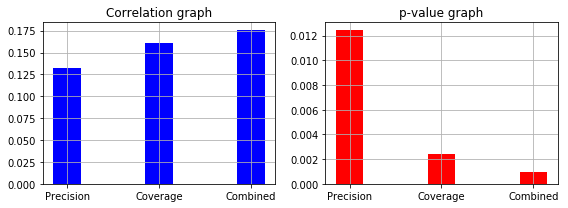

[0.1328997636846252, 0.16103731239116484, 0.17566626310041306]
[0.012447440842243446, 0.0024076274352001934, 0.0009178285065600792]


In [69]:
bar_width = 0.3
pos1 = np.arange(len(correlations))
pos2 = [x + bar_width for x in pos1]

fig = plt.gcf()
fig.set_size_inches(8, 3)

plt.subplot(1, 2, 1)
plt.bar(pos1, correlations, color='blue', width=bar_width)
plt.title("Correlation graph")
plt.xticks([y for y in range(len(correlations))], names)
plt.grid()

plt.subplot(1, 2, 2)
plt.bar(pos2, _pvals, color='red', width=bar_width)
plt.title("p-value graph")
plt.xticks([y + bar_width for y in range(len(correlations))], names)
plt.grid()

plt.tight_layout()
plt.show()

print(correlations)
print(pvals)

### 3. Tuning vector 'size'
window = 6; alpha = 0.025; iter = 5 (default); combined dataset

In [31]:
sizes = [100, 200, 300, 400, 500, 600]
correlations = []
pvals = []

In [32]:
for s in sizes:
    embeddings_path = "../resources/embeddings_size{}.vec".format(s)
    
    model_size = Word2Vec(sentences_folder, workers=5, size=s, window=6)
    save_embeddings(embeddings_path, model_size.wv)
    
    corr, p, data = score.spearman(test_data_path, embeddings_path, bn2wn_mapping_path)
    correlations.append(corr)
    pvals.append(p)

2019-05-30 04:26:28,433 : INFO : collecting all words and their counts
2019-05-30 04:26:28,436 : INFO : PROGRESS: at sentence #0, processed 0 words, keeping 0 word types
2019-05-30 04:26:28,631 : INFO : PROGRESS: at sentence #10000, processed 271423 words, keeping 15504 word types
2019-05-30 04:26:28,805 : INFO : PROGRESS: at sentence #20000, processed 547417 words, keeping 21517 word types
2019-05-30 04:26:28,962 : INFO : PROGRESS: at sentence #30000, processed 829215 words, keeping 26443 word types
2019-05-30 04:26:29,143 : INFO : PROGRESS: at sentence #40000, processed 1116115 words, keeping 30297 word types
2019-05-30 04:26:29,403 : INFO : PROGRESS: at sentence #50000, processed 1389268 words, keeping 33255 word types
2019-05-30 04:26:29,618 : INFO : PROGRESS: at sentence #60000, processed 1664025 words, keeping 36015 word types
2019-05-30 04:26:29,811 : INFO : PROGRESS: at sentence #70000, processed 1942307 words, keeping 38334 word types
2019-05-30 04:26:30,008 : INFO : PROGRESS:

2019-05-30 04:26:40,752 : INFO : PROGRESS: at sentence #720000, processed 19923621 words, keeping 99911 word types
2019-05-30 04:26:40,920 : INFO : PROGRESS: at sentence #730000, processed 20200299 words, keeping 100546 word types
2019-05-30 04:26:41,095 : INFO : PROGRESS: at sentence #740000, processed 20479737 words, keeping 101322 word types
2019-05-30 04:26:41,264 : INFO : PROGRESS: at sentence #750000, processed 20764915 words, keeping 102075 word types
2019-05-30 04:26:41,419 : INFO : PROGRESS: at sentence #760000, processed 21033488 words, keeping 102715 word types
2019-05-30 04:26:41,597 : INFO : PROGRESS: at sentence #770000, processed 21311461 words, keeping 103419 word types
2019-05-30 04:26:41,757 : INFO : PROGRESS: at sentence #780000, processed 21587570 words, keeping 103799 word types
2019-05-30 04:26:41,916 : INFO : PROGRESS: at sentence #790000, processed 21860381 words, keeping 104152 word types
2019-05-30 04:26:42,088 : INFO : PROGRESS: at sentence #800000, processed

2019-05-30 04:26:52,730 : INFO : PROGRESS: at sentence #1430000, processed 39664039 words, keeping 131178 word types
2019-05-30 04:26:52,897 : INFO : PROGRESS: at sentence #1440000, processed 39949833 words, keeping 131524 word types
2019-05-30 04:26:53,071 : INFO : PROGRESS: at sentence #1450000, processed 40234437 words, keeping 131871 word types
2019-05-30 04:26:53,236 : INFO : PROGRESS: at sentence #1460000, processed 40515030 words, keeping 132203 word types
2019-05-30 04:26:53,393 : INFO : PROGRESS: at sentence #1470000, processed 40786039 words, keeping 132667 word types
2019-05-30 04:26:53,548 : INFO : PROGRESS: at sentence #1480000, processed 41060634 words, keeping 133013 word types
2019-05-30 04:26:53,719 : INFO : PROGRESS: at sentence #1490000, processed 41343098 words, keeping 133364 word types
2019-05-30 04:26:53,881 : INFO : PROGRESS: at sentence #1500000, processed 41625828 words, keeping 133739 word types
2019-05-30 04:26:54,048 : INFO : PROGRESS: at sentence #1510000,

2019-05-30 04:27:04,298 : INFO : PROGRESS: at sentence #2140000, processed 59306457 words, keeping 154690 word types
2019-05-30 04:27:04,453 : INFO : PROGRESS: at sentence #2150000, processed 59568224 words, keeping 154870 word types
2019-05-30 04:27:04,624 : INFO : PROGRESS: at sentence #2160000, processed 59848213 words, keeping 155047 word types
2019-05-30 04:27:04,778 : INFO : PROGRESS: at sentence #2170000, processed 60117733 words, keeping 155189 word types
2019-05-30 04:27:04,935 : INFO : PROGRESS: at sentence #2180000, processed 60396851 words, keeping 155315 word types
2019-05-30 04:27:05,094 : INFO : PROGRESS: at sentence #2190000, processed 60673507 words, keeping 155443 word types
2019-05-30 04:27:05,255 : INFO : PROGRESS: at sentence #2200000, processed 60954083 words, keeping 155565 word types
2019-05-30 04:27:05,412 : INFO : PROGRESS: at sentence #2210000, processed 61236255 words, keeping 155720 word types
2019-05-30 04:27:05,575 : INFO : PROGRESS: at sentence #2220000,

2019-05-30 04:27:15,648 : INFO : PROGRESS: at sentence #2850000, processed 78983987 words, keeping 161360 word types
2019-05-30 04:27:15,809 : INFO : PROGRESS: at sentence #2860000, processed 79270828 words, keeping 161413 word types
2019-05-30 04:27:15,970 : INFO : PROGRESS: at sentence #2870000, processed 79546764 words, keeping 161494 word types
2019-05-30 04:27:16,136 : INFO : PROGRESS: at sentence #2880000, processed 79834632 words, keeping 161552 word types
2019-05-30 04:27:16,299 : INFO : PROGRESS: at sentence #2890000, processed 80118528 words, keeping 161621 word types
2019-05-30 04:27:16,452 : INFO : PROGRESS: at sentence #2900000, processed 80388810 words, keeping 161672 word types
2019-05-30 04:27:16,614 : INFO : PROGRESS: at sentence #2910000, processed 80657780 words, keeping 161737 word types
2019-05-30 04:27:16,770 : INFO : PROGRESS: at sentence #2920000, processed 80930570 words, keeping 161800 word types
2019-05-30 04:27:16,929 : INFO : PROGRESS: at sentence #2930000,

2019-05-30 04:27:27,251 : INFO : PROGRESS: at sentence #3560000, processed 98812013 words, keeping 164761 word types
2019-05-30 04:27:27,412 : INFO : PROGRESS: at sentence #3570000, processed 99097751 words, keeping 164786 word types
2019-05-30 04:27:27,566 : INFO : PROGRESS: at sentence #3580000, processed 99378362 words, keeping 164811 word types
2019-05-30 04:27:27,731 : INFO : PROGRESS: at sentence #3590000, processed 99642763 words, keeping 164853 word types
2019-05-30 04:27:27,884 : INFO : PROGRESS: at sentence #3600000, processed 99917372 words, keeping 164905 word types
2019-05-30 04:27:28,047 : INFO : PROGRESS: at sentence #3610000, processed 100194099 words, keeping 164949 word types
2019-05-30 04:27:28,198 : INFO : PROGRESS: at sentence #3620000, processed 100462977 words, keeping 164978 word types
2019-05-30 04:27:28,353 : INFO : PROGRESS: at sentence #3630000, processed 100739844 words, keeping 165025 word types
2019-05-30 04:27:28,505 : INFO : PROGRESS: at sentence #36400

2019-05-30 04:28:13,529 : INFO : EPOCH 1 - PROGRESS: at 25.43% examples, 466829 words/s, in_qsize 7, out_qsize 1
2019-05-30 04:28:14,554 : INFO : EPOCH 1 - PROGRESS: at 26.08% examples, 466915 words/s, in_qsize 3, out_qsize 0
2019-05-30 04:28:15,575 : INFO : EPOCH 1 - PROGRESS: at 26.80% examples, 467560 words/s, in_qsize 1, out_qsize 0
2019-05-30 04:28:16,597 : INFO : EPOCH 1 - PROGRESS: at 27.43% examples, 467345 words/s, in_qsize 6, out_qsize 0
2019-05-30 04:28:17,621 : INFO : EPOCH 1 - PROGRESS: at 28.08% examples, 467082 words/s, in_qsize 2, out_qsize 0
2019-05-30 04:28:18,664 : INFO : EPOCH 1 - PROGRESS: at 28.77% examples, 467265 words/s, in_qsize 2, out_qsize 2
2019-05-30 04:28:19,673 : INFO : EPOCH 1 - PROGRESS: at 29.45% examples, 467764 words/s, in_qsize 0, out_qsize 0
2019-05-30 04:28:20,693 : INFO : EPOCH 1 - PROGRESS: at 30.06% examples, 467247 words/s, in_qsize 2, out_qsize 1
2019-05-30 04:28:21,704 : INFO : EPOCH 1 - PROGRESS: at 30.70% examples, 467384 words/s, in_qsiz

2019-05-30 04:29:27,609 : INFO : EPOCH 1 - PROGRESS: at 72.79% examples, 465186 words/s, in_qsize 6, out_qsize 2
2019-05-30 04:29:28,627 : INFO : EPOCH 1 - PROGRESS: at 73.49% examples, 465443 words/s, in_qsize 3, out_qsize 0
2019-05-30 04:29:29,654 : INFO : EPOCH 1 - PROGRESS: at 74.17% examples, 465590 words/s, in_qsize 2, out_qsize 0
2019-05-30 04:29:30,666 : INFO : EPOCH 1 - PROGRESS: at 74.69% examples, 464833 words/s, in_qsize 1, out_qsize 0
2019-05-30 04:29:31,669 : INFO : EPOCH 1 - PROGRESS: at 75.31% examples, 464770 words/s, in_qsize 2, out_qsize 0
2019-05-30 04:29:32,671 : INFO : EPOCH 1 - PROGRESS: at 75.97% examples, 464964 words/s, in_qsize 6, out_qsize 0
2019-05-30 04:29:33,694 : INFO : EPOCH 1 - PROGRESS: at 76.55% examples, 464451 words/s, in_qsize 3, out_qsize 0
2019-05-30 04:29:34,701 : INFO : EPOCH 1 - PROGRESS: at 77.14% examples, 464120 words/s, in_qsize 1, out_qsize 2
2019-05-30 04:29:35,710 : INFO : EPOCH 1 - PROGRESS: at 77.78% examples, 464170 words/s, in_qsiz

2019-05-30 04:30:37,290 : INFO : EPOCH 2 - PROGRESS: at 18.89% examples, 483689 words/s, in_qsize 8, out_qsize 0
2019-05-30 04:30:38,291 : INFO : EPOCH 2 - PROGRESS: at 19.59% examples, 484753 words/s, in_qsize 0, out_qsize 0
2019-05-30 04:30:39,304 : INFO : EPOCH 2 - PROGRESS: at 20.27% examples, 484814 words/s, in_qsize 1, out_qsize 0
2019-05-30 04:30:40,327 : INFO : EPOCH 2 - PROGRESS: at 20.94% examples, 484357 words/s, in_qsize 1, out_qsize 0
2019-05-30 04:30:41,350 : INFO : EPOCH 2 - PROGRESS: at 21.65% examples, 484775 words/s, in_qsize 0, out_qsize 0
2019-05-30 04:30:42,362 : INFO : EPOCH 2 - PROGRESS: at 22.29% examples, 484071 words/s, in_qsize 5, out_qsize 1
2019-05-30 04:30:43,402 : INFO : EPOCH 2 - PROGRESS: at 22.97% examples, 483821 words/s, in_qsize 4, out_qsize 1
2019-05-30 04:30:44,422 : INFO : EPOCH 2 - PROGRESS: at 23.54% examples, 481551 words/s, in_qsize 7, out_qsize 2
2019-05-30 04:30:45,440 : INFO : EPOCH 2 - PROGRESS: at 24.24% examples, 481836 words/s, in_qsiz

2019-05-30 04:31:51,389 : INFO : EPOCH 2 - PROGRESS: at 67.83% examples, 480759 words/s, in_qsize 4, out_qsize 0
2019-05-30 04:31:52,403 : INFO : EPOCH 2 - PROGRESS: at 68.48% examples, 480744 words/s, in_qsize 0, out_qsize 0
2019-05-30 04:31:53,405 : INFO : EPOCH 2 - PROGRESS: at 69.12% examples, 480675 words/s, in_qsize 5, out_qsize 0
2019-05-30 04:31:54,424 : INFO : EPOCH 2 - PROGRESS: at 69.81% examples, 480777 words/s, in_qsize 9, out_qsize 1
2019-05-30 04:31:55,463 : INFO : EPOCH 2 - PROGRESS: at 70.53% examples, 480932 words/s, in_qsize 5, out_qsize 1
2019-05-30 04:31:56,476 : INFO : EPOCH 2 - PROGRESS: at 71.22% examples, 481065 words/s, in_qsize 8, out_qsize 0
2019-05-30 04:31:57,519 : INFO : EPOCH 2 - PROGRESS: at 71.94% examples, 481187 words/s, in_qsize 3, out_qsize 0
2019-05-30 04:31:58,540 : INFO : EPOCH 2 - PROGRESS: at 72.45% examples, 480150 words/s, in_qsize 1, out_qsize 1
2019-05-30 04:31:59,552 : INFO : EPOCH 2 - PROGRESS: at 73.10% examples, 479988 words/s, in_qsiz

2019-05-30 04:33:01,272 : INFO : EPOCH 3 - PROGRESS: at 14.23% examples, 482770 words/s, in_qsize 7, out_qsize 2
2019-05-30 04:33:02,311 : INFO : EPOCH 3 - PROGRESS: at 14.97% examples, 483395 words/s, in_qsize 6, out_qsize 0
2019-05-30 04:33:03,314 : INFO : EPOCH 3 - PROGRESS: at 15.50% examples, 478646 words/s, in_qsize 1, out_qsize 0
2019-05-30 04:33:04,318 : INFO : EPOCH 3 - PROGRESS: at 16.11% examples, 477191 words/s, in_qsize 3, out_qsize 1
2019-05-30 04:33:05,329 : INFO : EPOCH 3 - PROGRESS: at 16.74% examples, 476263 words/s, in_qsize 4, out_qsize 0
2019-05-30 04:33:06,342 : INFO : EPOCH 3 - PROGRESS: at 17.42% examples, 476679 words/s, in_qsize 4, out_qsize 0
2019-05-30 04:33:07,347 : INFO : EPOCH 3 - PROGRESS: at 18.10% examples, 477474 words/s, in_qsize 2, out_qsize 0
2019-05-30 04:33:08,362 : INFO : EPOCH 3 - PROGRESS: at 18.80% examples, 478749 words/s, in_qsize 0, out_qsize 0
2019-05-30 04:33:09,367 : INFO : EPOCH 3 - PROGRESS: at 19.44% examples, 478526 words/s, in_qsiz

2019-05-30 04:34:15,228 : INFO : EPOCH 3 - PROGRESS: at 62.51% examples, 476477 words/s, in_qsize 0, out_qsize 0
2019-05-30 04:34:16,246 : INFO : EPOCH 3 - PROGRESS: at 63.15% examples, 476213 words/s, in_qsize 4, out_qsize 0
2019-05-30 04:34:17,262 : INFO : EPOCH 3 - PROGRESS: at 63.86% examples, 476399 words/s, in_qsize 2, out_qsize 1
2019-05-30 04:34:18,279 : INFO : EPOCH 3 - PROGRESS: at 64.55% examples, 476460 words/s, in_qsize 4, out_qsize 0
2019-05-30 04:34:19,294 : INFO : EPOCH 3 - PROGRESS: at 65.28% examples, 476714 words/s, in_qsize 3, out_qsize 1
2019-05-30 04:34:20,314 : INFO : EPOCH 3 - PROGRESS: at 65.97% examples, 476735 words/s, in_qsize 9, out_qsize 1
2019-05-30 04:34:21,326 : INFO : EPOCH 3 - PROGRESS: at 66.66% examples, 476973 words/s, in_qsize 6, out_qsize 0
2019-05-30 04:34:22,343 : INFO : EPOCH 3 - PROGRESS: at 67.37% examples, 477258 words/s, in_qsize 0, out_qsize 0
2019-05-30 04:34:23,367 : INFO : EPOCH 3 - PROGRESS: at 68.03% examples, 477240 words/s, in_qsiz

2019-05-30 04:35:24,886 : INFO : EPOCH 4 - PROGRESS: at 7.78% examples, 461117 words/s, in_qsize 0, out_qsize 1
2019-05-30 04:35:25,906 : INFO : EPOCH 4 - PROGRESS: at 8.42% examples, 461486 words/s, in_qsize 8, out_qsize 0
2019-05-30 04:35:26,913 : INFO : EPOCH 4 - PROGRESS: at 9.06% examples, 461917 words/s, in_qsize 4, out_qsize 0
2019-05-30 04:35:27,950 : INFO : EPOCH 4 - PROGRESS: at 9.72% examples, 462232 words/s, in_qsize 9, out_qsize 0
2019-05-30 04:35:28,959 : INFO : EPOCH 4 - PROGRESS: at 10.43% examples, 465931 words/s, in_qsize 0, out_qsize 0
2019-05-30 04:35:29,977 : INFO : EPOCH 4 - PROGRESS: at 11.11% examples, 466369 words/s, in_qsize 1, out_qsize 0
2019-05-30 04:35:31,006 : INFO : EPOCH 4 - PROGRESS: at 11.79% examples, 466735 words/s, in_qsize 8, out_qsize 1
2019-05-30 04:35:32,006 : INFO : EPOCH 4 - PROGRESS: at 12.47% examples, 469246 words/s, in_qsize 4, out_qsize 0
2019-05-30 04:35:33,011 : INFO : EPOCH 4 - PROGRESS: at 13.13% examples, 469358 words/s, in_qsize 8,

2019-05-30 04:36:38,874 : INFO : EPOCH 4 - PROGRESS: at 57.32% examples, 482903 words/s, in_qsize 7, out_qsize 1
2019-05-30 04:36:39,895 : INFO : EPOCH 4 - PROGRESS: at 57.99% examples, 482847 words/s, in_qsize 4, out_qsize 0
2019-05-30 04:36:40,908 : INFO : EPOCH 4 - PROGRESS: at 58.69% examples, 483216 words/s, in_qsize 0, out_qsize 0
2019-05-30 04:36:41,919 : INFO : EPOCH 4 - PROGRESS: at 59.30% examples, 482802 words/s, in_qsize 5, out_qsize 0
2019-05-30 04:36:42,938 : INFO : EPOCH 4 - PROGRESS: at 59.94% examples, 482540 words/s, in_qsize 6, out_qsize 1
2019-05-30 04:36:43,949 : INFO : EPOCH 4 - PROGRESS: at 60.63% examples, 482755 words/s, in_qsize 0, out_qsize 0
2019-05-30 04:36:44,968 : INFO : EPOCH 4 - PROGRESS: at 61.31% examples, 482562 words/s, in_qsize 4, out_qsize 1
2019-05-30 04:36:45,971 : INFO : EPOCH 4 - PROGRESS: at 62.01% examples, 482965 words/s, in_qsize 0, out_qsize 0
2019-05-30 04:36:46,980 : INFO : EPOCH 4 - PROGRESS: at 62.69% examples, 483116 words/s, in_qsiz

2019-05-30 04:37:48,009 : INFO : EPOCH 5 - PROGRESS: at 3.42% examples, 486151 words/s, in_qsize 9, out_qsize 0
2019-05-30 04:37:49,014 : INFO : EPOCH 5 - PROGRESS: at 4.11% examples, 488390 words/s, in_qsize 0, out_qsize 1
2019-05-30 04:37:50,025 : INFO : EPOCH 5 - PROGRESS: at 4.82% examples, 490392 words/s, in_qsize 0, out_qsize 1
2019-05-30 04:37:51,028 : INFO : EPOCH 5 - PROGRESS: at 5.48% examples, 489039 words/s, in_qsize 1, out_qsize 2
2019-05-30 04:37:52,036 : INFO : EPOCH 5 - PROGRESS: at 6.13% examples, 487023 words/s, in_qsize 7, out_qsize 2
2019-05-30 04:37:53,036 : INFO : EPOCH 5 - PROGRESS: at 6.81% examples, 486572 words/s, in_qsize 1, out_qsize 0
2019-05-30 04:37:54,039 : INFO : EPOCH 5 - PROGRESS: at 7.48% examples, 486659 words/s, in_qsize 6, out_qsize 0
2019-05-30 04:37:55,050 : INFO : EPOCH 5 - PROGRESS: at 8.20% examples, 489686 words/s, in_qsize 0, out_qsize 0
2019-05-30 04:37:56,057 : INFO : EPOCH 5 - PROGRESS: at 8.87% examples, 490212 words/s, in_qsize 0, out_

2019-05-30 04:39:02,021 : INFO : EPOCH 5 - PROGRESS: at 52.27% examples, 480111 words/s, in_qsize 8, out_qsize 0
2019-05-30 04:39:03,040 : INFO : EPOCH 5 - PROGRESS: at 52.98% examples, 480342 words/s, in_qsize 0, out_qsize 0
2019-05-30 04:39:04,053 : INFO : EPOCH 5 - PROGRESS: at 53.66% examples, 480363 words/s, in_qsize 0, out_qsize 0
2019-05-30 04:39:05,055 : INFO : EPOCH 5 - PROGRESS: at 54.28% examples, 480031 words/s, in_qsize 8, out_qsize 0
2019-05-30 04:39:06,080 : INFO : EPOCH 5 - PROGRESS: at 54.99% examples, 480216 words/s, in_qsize 0, out_qsize 1
2019-05-30 04:39:07,082 : INFO : EPOCH 5 - PROGRESS: at 55.63% examples, 480052 words/s, in_qsize 5, out_qsize 0
2019-05-30 04:39:08,090 : INFO : EPOCH 5 - PROGRESS: at 56.27% examples, 479779 words/s, in_qsize 4, out_qsize 0
2019-05-30 04:39:09,099 : INFO : EPOCH 5 - PROGRESS: at 56.93% examples, 479683 words/s, in_qsize 9, out_qsize 0
2019-05-30 04:39:10,112 : INFO : EPOCH 5 - PROGRESS: at 57.61% examples, 479797 words/s, in_qsiz

2019-05-30 04:40:16,354 : INFO : EPOCH 5 - PROGRESS: at 96.51% examples, 457129 words/s, in_qsize 3, out_qsize 0
2019-05-30 04:40:17,355 : INFO : EPOCH 5 - PROGRESS: at 97.15% examples, 457147 words/s, in_qsize 2, out_qsize 0
2019-05-30 04:40:18,397 : INFO : EPOCH 5 - PROGRESS: at 97.73% examples, 456831 words/s, in_qsize 9, out_qsize 0
2019-05-30 04:40:19,448 : INFO : EPOCH 5 - PROGRESS: at 98.34% examples, 456585 words/s, in_qsize 4, out_qsize 1
2019-05-30 04:40:20,459 : INFO : EPOCH 5 - PROGRESS: at 98.86% examples, 456015 words/s, in_qsize 2, out_qsize 0
2019-05-30 04:40:21,476 : INFO : EPOCH 5 - PROGRESS: at 99.50% examples, 456044 words/s, in_qsize 5, out_qsize 0
2019-05-30 04:40:22,140 : INFO : worker thread finished; awaiting finish of 4 more threads
2019-05-30 04:40:22,142 : INFO : worker thread finished; awaiting finish of 3 more threads
2019-05-30 04:40:22,161 : INFO : worker thread finished; awaiting finish of 2 more threads
2019-05-30 04:40:22,164 : INFO : worker thread fi

2019-05-30 04:43:09,919 : INFO : PROGRESS: at sentence #550000, processed 15208530 words, keeping 90382 word types
2019-05-30 04:43:10,093 : INFO : PROGRESS: at sentence #560000, processed 15471674 words, keeping 90897 word types
2019-05-30 04:43:10,261 : INFO : PROGRESS: at sentence #570000, processed 15738313 words, keeping 91400 word types
2019-05-30 04:43:10,428 : INFO : PROGRESS: at sentence #580000, processed 16005074 words, keeping 91990 word types
2019-05-30 04:43:10,599 : INFO : PROGRESS: at sentence #590000, processed 16269250 words, keeping 92657 word types
2019-05-30 04:43:10,761 : INFO : PROGRESS: at sentence #600000, processed 16547963 words, keeping 93181 word types
2019-05-30 04:43:10,936 : INFO : PROGRESS: at sentence #610000, processed 16826654 words, keeping 93773 word types
2019-05-30 04:43:11,122 : INFO : PROGRESS: at sentence #620000, processed 17108131 words, keeping 94429 word types
2019-05-30 04:43:11,310 : INFO : PROGRESS: at sentence #630000, processed 173882

2019-05-30 04:43:22,822 : INFO : PROGRESS: at sentence #1260000, processed 34953469 words, keeping 125247 word types
2019-05-30 04:43:22,998 : INFO : PROGRESS: at sentence #1270000, processed 35229038 words, keeping 125616 word types
2019-05-30 04:43:23,167 : INFO : PROGRESS: at sentence #1280000, processed 35500148 words, keeping 125959 word types
2019-05-30 04:43:23,355 : INFO : PROGRESS: at sentence #1290000, processed 35775721 words, keeping 126359 word types
2019-05-30 04:43:23,537 : INFO : PROGRESS: at sentence #1300000, processed 36062669 words, keeping 126714 word types
2019-05-30 04:43:23,716 : INFO : PROGRESS: at sentence #1310000, processed 36347980 words, keeping 127098 word types
2019-05-30 04:43:23,882 : INFO : PROGRESS: at sentence #1320000, processed 36625111 words, keeping 127324 word types
2019-05-30 04:43:24,088 : INFO : PROGRESS: at sentence #1330000, processed 36911187 words, keeping 127592 word types
2019-05-30 04:43:24,314 : INFO : PROGRESS: at sentence #1340000,

2019-05-30 04:43:48,843 : INFO : PROGRESS: at sentence #2670000, processed 73994015 words, keeping 160216 word types
2019-05-30 04:43:49,020 : INFO : PROGRESS: at sentence #2680000, processed 74271891 words, keeping 160265 word types
2019-05-30 04:43:49,185 : INFO : PROGRESS: at sentence #2690000, processed 74546312 words, keeping 160297 word types
2019-05-30 04:43:49,366 : INFO : PROGRESS: at sentence #2700000, processed 74822701 words, keeping 160356 word types
2019-05-30 04:43:49,531 : INFO : PROGRESS: at sentence #2710000, processed 75102417 words, keeping 160416 word types
2019-05-30 04:43:49,696 : INFO : PROGRESS: at sentence #2720000, processed 75374318 words, keeping 160500 word types
2019-05-30 04:43:49,877 : INFO : PROGRESS: at sentence #2730000, processed 75652187 words, keeping 160557 word types
2019-05-30 04:43:50,052 : INFO : PROGRESS: at sentence #2740000, processed 75926174 words, keeping 160618 word types
2019-05-30 04:43:50,220 : INFO : PROGRESS: at sentence #2750000,

2019-05-30 04:44:32,686 : INFO : EPOCH 1 - PROGRESS: at 9.48% examples, 353431 words/s, in_qsize 3, out_qsize 0
2019-05-30 04:44:33,708 : INFO : EPOCH 1 - PROGRESS: at 10.04% examples, 355919 words/s, in_qsize 9, out_qsize 0
2019-05-30 04:44:34,711 : INFO : EPOCH 1 - PROGRESS: at 10.65% examples, 360029 words/s, in_qsize 0, out_qsize 0
2019-05-30 04:44:35,725 : INFO : EPOCH 1 - PROGRESS: at 11.22% examples, 361848 words/s, in_qsize 0, out_qsize 1
2019-05-30 04:44:36,756 : INFO : EPOCH 1 - PROGRESS: at 11.70% examples, 360563 words/s, in_qsize 1, out_qsize 1
2019-05-30 04:44:37,818 : INFO : EPOCH 1 - PROGRESS: at 12.15% examples, 358978 words/s, in_qsize 1, out_qsize 0
2019-05-30 04:44:38,827 : INFO : EPOCH 1 - PROGRESS: at 12.65% examples, 359037 words/s, in_qsize 1, out_qsize 0
2019-05-30 04:44:39,859 : INFO : EPOCH 1 - PROGRESS: at 13.16% examples, 358777 words/s, in_qsize 7, out_qsize 0
2019-05-30 04:44:40,865 : INFO : EPOCH 1 - PROGRESS: at 13.68% examples, 359128 words/s, in_qsize

2019-05-30 04:45:47,105 : INFO : EPOCH 1 - PROGRESS: at 47.68% examples, 369211 words/s, in_qsize 9, out_qsize 0
2019-05-30 04:45:48,127 : INFO : EPOCH 1 - PROGRESS: at 48.28% examples, 369808 words/s, in_qsize 5, out_qsize 0
2019-05-30 04:45:49,134 : INFO : EPOCH 1 - PROGRESS: at 48.88% examples, 370383 words/s, in_qsize 3, out_qsize 0
2019-05-30 04:45:50,151 : INFO : EPOCH 1 - PROGRESS: at 49.43% examples, 370693 words/s, in_qsize 8, out_qsize 1
2019-05-30 04:45:51,157 : INFO : EPOCH 1 - PROGRESS: at 50.01% examples, 371050 words/s, in_qsize 5, out_qsize 0
2019-05-30 04:45:52,177 : INFO : EPOCH 1 - PROGRESS: at 50.59% examples, 371467 words/s, in_qsize 7, out_qsize 0
2019-05-30 04:45:53,202 : INFO : EPOCH 1 - PROGRESS: at 51.17% examples, 371919 words/s, in_qsize 3, out_qsize 0
2019-05-30 04:45:54,222 : INFO : EPOCH 1 - PROGRESS: at 51.71% examples, 372033 words/s, in_qsize 3, out_qsize 1
2019-05-30 04:45:55,226 : INFO : EPOCH 1 - PROGRESS: at 52.23% examples, 372009 words/s, in_qsiz

2019-05-30 04:47:01,701 : INFO : EPOCH 1 - PROGRESS: at 86.62% examples, 373544 words/s, in_qsize 1, out_qsize 0
2019-05-30 04:47:02,718 : INFO : EPOCH 1 - PROGRESS: at 87.21% examples, 373768 words/s, in_qsize 0, out_qsize 0
2019-05-30 04:47:03,723 : INFO : EPOCH 1 - PROGRESS: at 87.77% examples, 374015 words/s, in_qsize 1, out_qsize 0
2019-05-30 04:47:04,729 : INFO : EPOCH 1 - PROGRESS: at 88.27% examples, 374014 words/s, in_qsize 3, out_qsize 0
2019-05-30 04:47:05,742 : INFO : EPOCH 1 - PROGRESS: at 88.82% examples, 374096 words/s, in_qsize 0, out_qsize 0
2019-05-30 04:47:06,773 : INFO : EPOCH 1 - PROGRESS: at 89.38% examples, 374251 words/s, in_qsize 5, out_qsize 0
2019-05-30 04:47:07,784 : INFO : EPOCH 1 - PROGRESS: at 89.88% examples, 374175 words/s, in_qsize 8, out_qsize 0
2019-05-30 04:47:08,822 : INFO : EPOCH 1 - PROGRESS: at 90.34% examples, 373879 words/s, in_qsize 8, out_qsize 1
2019-05-30 04:47:09,825 : INFO : EPOCH 1 - PROGRESS: at 90.85% examples, 373862 words/s, in_qsiz

2019-05-30 04:48:11,360 : INFO : EPOCH 2 - PROGRESS: at 25.17% examples, 407502 words/s, in_qsize 0, out_qsize 0
2019-05-30 04:48:12,402 : INFO : EPOCH 2 - PROGRESS: at 25.75% examples, 407662 words/s, in_qsize 0, out_qsize 1
2019-05-30 04:48:13,413 : INFO : EPOCH 2 - PROGRESS: at 26.33% examples, 407859 words/s, in_qsize 0, out_qsize 2
2019-05-30 04:48:14,443 : INFO : EPOCH 2 - PROGRESS: at 26.94% examples, 408162 words/s, in_qsize 0, out_qsize 0
2019-05-30 04:48:15,458 : INFO : EPOCH 2 - PROGRESS: at 27.51% examples, 408268 words/s, in_qsize 3, out_qsize 1
2019-05-30 04:48:16,487 : INFO : EPOCH 2 - PROGRESS: at 28.12% examples, 408678 words/s, in_qsize 1, out_qsize 0
2019-05-30 04:48:17,490 : INFO : EPOCH 2 - PROGRESS: at 28.68% examples, 408480 words/s, in_qsize 6, out_qsize 0
2019-05-30 04:48:18,500 : INFO : EPOCH 2 - PROGRESS: at 29.26% examples, 408600 words/s, in_qsize 1, out_qsize 1
2019-05-30 04:48:19,505 : INFO : EPOCH 2 - PROGRESS: at 29.80% examples, 408368 words/s, in_qsiz

2019-05-30 04:49:25,589 : INFO : EPOCH 2 - PROGRESS: at 66.32% examples, 404326 words/s, in_qsize 6, out_qsize 1
2019-05-30 04:49:26,606 : INFO : EPOCH 2 - PROGRESS: at 66.90% examples, 404377 words/s, in_qsize 5, out_qsize 1
2019-05-30 04:49:27,628 : INFO : EPOCH 2 - PROGRESS: at 67.47% examples, 404424 words/s, in_qsize 0, out_qsize 1
2019-05-30 04:49:28,633 : INFO : EPOCH 2 - PROGRESS: at 68.04% examples, 404515 words/s, in_qsize 0, out_qsize 0
2019-05-30 04:49:29,687 : INFO : EPOCH 2 - PROGRESS: at 68.55% examples, 404162 words/s, in_qsize 9, out_qsize 0
2019-05-30 04:49:30,713 : INFO : EPOCH 2 - PROGRESS: at 69.13% examples, 404312 words/s, in_qsize 3, out_qsize 0
2019-05-30 04:49:31,717 : INFO : EPOCH 2 - PROGRESS: at 69.68% examples, 404303 words/s, in_qsize 0, out_qsize 0
2019-05-30 04:49:32,719 : INFO : EPOCH 2 - PROGRESS: at 70.25% examples, 404292 words/s, in_qsize 0, out_qsize 0
2019-05-30 04:49:33,729 : INFO : EPOCH 2 - PROGRESS: at 70.81% examples, 404280 words/s, in_qsiz

2019-05-30 04:50:35,094 : INFO : EPOCH 3 - PROGRESS: at 4.03% examples, 406934 words/s, in_qsize 0, out_qsize 0
2019-05-30 04:50:36,108 : INFO : EPOCH 3 - PROGRESS: at 4.58% examples, 406120 words/s, in_qsize 2, out_qsize 0
2019-05-30 04:50:37,114 : INFO : EPOCH 3 - PROGRESS: at 5.18% examples, 407888 words/s, in_qsize 4, out_qsize 0
2019-05-30 04:50:38,115 : INFO : EPOCH 3 - PROGRESS: at 5.77% examples, 409584 words/s, in_qsize 0, out_qsize 1
2019-05-30 04:50:39,122 : INFO : EPOCH 3 - PROGRESS: at 6.35% examples, 410328 words/s, in_qsize 0, out_qsize 0
2019-05-30 04:50:40,126 : INFO : EPOCH 3 - PROGRESS: at 6.91% examples, 409904 words/s, in_qsize 7, out_qsize 0
2019-05-30 04:50:41,128 : INFO : EPOCH 3 - PROGRESS: at 7.49% examples, 410607 words/s, in_qsize 2, out_qsize 2
2019-05-30 04:50:42,136 : INFO : EPOCH 3 - PROGRESS: at 8.08% examples, 411875 words/s, in_qsize 1, out_qsize 0
2019-05-30 04:50:43,149 : INFO : EPOCH 3 - PROGRESS: at 8.47% examples, 403488 words/s, in_qsize 8, out_

2019-05-30 04:51:49,354 : INFO : EPOCH 3 - PROGRESS: at 45.51% examples, 406732 words/s, in_qsize 1, out_qsize 1
2019-05-30 04:51:50,362 : INFO : EPOCH 3 - PROGRESS: at 46.08% examples, 406626 words/s, in_qsize 1, out_qsize 0
2019-05-30 04:51:51,364 : INFO : EPOCH 3 - PROGRESS: at 46.67% examples, 406714 words/s, in_qsize 0, out_qsize 0
2019-05-30 04:51:52,380 : INFO : EPOCH 3 - PROGRESS: at 47.26% examples, 406883 words/s, in_qsize 0, out_qsize 1
2019-05-30 04:51:53,382 : INFO : EPOCH 3 - PROGRESS: at 47.83% examples, 406942 words/s, in_qsize 0, out_qsize 1
2019-05-30 04:51:54,406 : INFO : EPOCH 3 - PROGRESS: at 48.31% examples, 406184 words/s, in_qsize 3, out_qsize 1
2019-05-30 04:51:55,464 : INFO : EPOCH 3 - PROGRESS: at 48.83% examples, 405526 words/s, in_qsize 8, out_qsize 0
2019-05-30 04:51:56,484 : INFO : EPOCH 3 - PROGRESS: at 49.41% examples, 405679 words/s, in_qsize 5, out_qsize 1
2019-05-30 04:51:57,530 : INFO : EPOCH 3 - PROGRESS: at 50.01% examples, 405651 words/s, in_qsiz

2019-05-30 04:53:03,722 : INFO : EPOCH 3 - PROGRESS: at 87.79% examples, 409537 words/s, in_qsize 9, out_qsize 0
2019-05-30 04:53:04,736 : INFO : EPOCH 3 - PROGRESS: at 88.37% examples, 409601 words/s, in_qsize 0, out_qsize 0
2019-05-30 04:53:05,750 : INFO : EPOCH 3 - PROGRESS: at 88.98% examples, 409724 words/s, in_qsize 0, out_qsize 0
2019-05-30 04:53:06,754 : INFO : EPOCH 3 - PROGRESS: at 89.54% examples, 409817 words/s, in_qsize 0, out_qsize 0
2019-05-30 04:53:07,779 : INFO : EPOCH 3 - PROGRESS: at 90.14% examples, 409896 words/s, in_qsize 0, out_qsize 0
2019-05-30 04:53:08,808 : INFO : EPOCH 3 - PROGRESS: at 90.75% examples, 410012 words/s, in_qsize 4, out_qsize 0
2019-05-30 04:53:09,816 : INFO : EPOCH 3 - PROGRESS: at 91.31% examples, 410086 words/s, in_qsize 6, out_qsize 1
2019-05-30 04:53:10,835 : INFO : EPOCH 3 - PROGRESS: at 91.89% examples, 410213 words/s, in_qsize 8, out_qsize 0
2019-05-30 04:53:11,862 : INFO : EPOCH 3 - PROGRESS: at 92.49% examples, 410372 words/s, in_qsiz

2019-05-30 04:54:13,338 : INFO : EPOCH 4 - PROGRESS: at 28.25% examples, 421015 words/s, in_qsize 6, out_qsize 1
2019-05-30 04:54:14,344 : INFO : EPOCH 4 - PROGRESS: at 28.86% examples, 421362 words/s, in_qsize 4, out_qsize 0
2019-05-30 04:54:15,350 : INFO : EPOCH 4 - PROGRESS: at 29.43% examples, 421124 words/s, in_qsize 6, out_qsize 3
2019-05-30 04:54:16,372 : INFO : EPOCH 4 - PROGRESS: at 30.04% examples, 421554 words/s, in_qsize 2, out_qsize 0
2019-05-30 04:54:17,374 : INFO : EPOCH 4 - PROGRESS: at 30.64% examples, 421990 words/s, in_qsize 7, out_qsize 0
2019-05-30 04:54:18,386 : INFO : EPOCH 4 - PROGRESS: at 31.17% examples, 421690 words/s, in_qsize 9, out_qsize 0
2019-05-30 04:54:19,430 : INFO : EPOCH 4 - PROGRESS: at 31.79% examples, 421898 words/s, in_qsize 7, out_qsize 1
2019-05-30 04:54:20,446 : INFO : EPOCH 4 - PROGRESS: at 32.39% examples, 421960 words/s, in_qsize 4, out_qsize 1
2019-05-30 04:54:21,467 : INFO : EPOCH 4 - PROGRESS: at 33.00% examples, 422125 words/s, in_qsiz

2019-05-30 04:55:27,534 : INFO : EPOCH 4 - PROGRESS: at 70.53% examples, 416761 words/s, in_qsize 2, out_qsize 0
2019-05-30 04:55:28,602 : INFO : EPOCH 4 - PROGRESS: at 71.07% examples, 416383 words/s, in_qsize 5, out_qsize 4
2019-05-30 04:55:29,622 : INFO : EPOCH 4 - PROGRESS: at 71.65% examples, 416287 words/s, in_qsize 6, out_qsize 2
2019-05-30 04:55:30,630 : INFO : EPOCH 4 - PROGRESS: at 72.22% examples, 416226 words/s, in_qsize 7, out_qsize 0
2019-05-30 04:55:31,631 : INFO : EPOCH 4 - PROGRESS: at 72.80% examples, 416295 words/s, in_qsize 9, out_qsize 0
2019-05-30 04:55:32,665 : INFO : EPOCH 4 - PROGRESS: at 73.27% examples, 415627 words/s, in_qsize 6, out_qsize 1
2019-05-30 04:55:33,686 : INFO : EPOCH 4 - PROGRESS: at 73.86% examples, 415588 words/s, in_qsize 4, out_qsize 1
2019-05-30 04:55:34,705 : INFO : EPOCH 4 - PROGRESS: at 74.48% examples, 415812 words/s, in_qsize 8, out_qsize 0
2019-05-30 04:55:35,731 : INFO : EPOCH 4 - PROGRESS: at 75.06% examples, 415901 words/s, in_qsiz

2019-05-30 04:56:37,027 : INFO : EPOCH 5 - PROGRESS: at 7.94% examples, 374564 words/s, in_qsize 9, out_qsize 0
2019-05-30 04:56:38,044 : INFO : EPOCH 5 - PROGRESS: at 8.51% examples, 377394 words/s, in_qsize 7, out_qsize 0
2019-05-30 04:56:39,066 : INFO : EPOCH 5 - PROGRESS: at 9.08% examples, 379143 words/s, in_qsize 6, out_qsize 0
2019-05-30 04:56:40,081 : INFO : EPOCH 5 - PROGRESS: at 9.69% examples, 382642 words/s, in_qsize 1, out_qsize 0
2019-05-30 04:56:41,083 : INFO : EPOCH 5 - PROGRESS: at 10.24% examples, 383708 words/s, in_qsize 7, out_qsize 0
2019-05-30 04:56:42,117 : INFO : EPOCH 5 - PROGRESS: at 10.81% examples, 384448 words/s, in_qsize 7, out_qsize 1
2019-05-30 04:56:43,121 : INFO : EPOCH 5 - PROGRESS: at 11.38% examples, 385340 words/s, in_qsize 8, out_qsize 1
2019-05-30 04:56:44,132 : INFO : EPOCH 5 - PROGRESS: at 11.96% examples, 387210 words/s, in_qsize 7, out_qsize 0
2019-05-30 04:56:45,149 : INFO : EPOCH 5 - PROGRESS: at 12.55% examples, 388898 words/s, in_qsize 5,

2019-05-30 04:57:51,748 : INFO : EPOCH 5 - PROGRESS: at 47.95% examples, 387082 words/s, in_qsize 0, out_qsize 0
2019-05-30 04:57:52,765 : INFO : EPOCH 5 - PROGRESS: at 48.53% examples, 387382 words/s, in_qsize 0, out_qsize 1
2019-05-30 04:57:53,793 : INFO : EPOCH 5 - PROGRESS: at 49.10% examples, 387550 words/s, in_qsize 9, out_qsize 0
2019-05-30 04:57:54,807 : INFO : EPOCH 5 - PROGRESS: at 49.64% examples, 387467 words/s, in_qsize 0, out_qsize 0
2019-05-30 04:57:55,826 : INFO : EPOCH 5 - PROGRESS: at 50.08% examples, 386579 words/s, in_qsize 5, out_qsize 1
2019-05-30 04:57:56,837 : INFO : EPOCH 5 - PROGRESS: at 50.60% examples, 386452 words/s, in_qsize 5, out_qsize 0
2019-05-30 04:57:57,851 : INFO : EPOCH 5 - PROGRESS: at 51.07% examples, 386026 words/s, in_qsize 8, out_qsize 1
2019-05-30 04:57:58,871 : INFO : EPOCH 5 - PROGRESS: at 51.46% examples, 384802 words/s, in_qsize 7, out_qsize 1
2019-05-30 04:57:59,882 : INFO : EPOCH 5 - PROGRESS: at 51.98% examples, 384671 words/s, in_qsiz

2019-05-30 04:59:06,563 : INFO : EPOCH 5 - PROGRESS: at 80.90% examples, 356507 words/s, in_qsize 9, out_qsize 0
2019-05-30 04:59:07,657 : INFO : EPOCH 5 - PROGRESS: at 81.29% examples, 355976 words/s, in_qsize 9, out_qsize 0
2019-05-30 04:59:08,658 : INFO : EPOCH 5 - PROGRESS: at 81.71% examples, 355685 words/s, in_qsize 3, out_qsize 1
2019-05-30 04:59:09,660 : INFO : EPOCH 5 - PROGRESS: at 82.15% examples, 355394 words/s, in_qsize 9, out_qsize 0
2019-05-30 04:59:10,661 : INFO : EPOCH 5 - PROGRESS: at 82.43% examples, 354511 words/s, in_qsize 8, out_qsize 2
2019-05-30 04:59:11,674 : INFO : EPOCH 5 - PROGRESS: at 82.72% examples, 353653 words/s, in_qsize 8, out_qsize 0
2019-05-30 04:59:12,715 : INFO : EPOCH 5 - PROGRESS: at 83.12% examples, 353187 words/s, in_qsize 9, out_qsize 1
2019-05-30 04:59:13,755 : INFO : EPOCH 5 - PROGRESS: at 83.59% examples, 352969 words/s, in_qsize 7, out_qsize 0
2019-05-30 04:59:14,764 : INFO : EPOCH 5 - PROGRESS: at 84.15% examples, 353292 words/s, in_qsiz

2019-05-30 05:02:50,599 : INFO : PROGRESS: at sentence #190000, processed 5233768 words, keeping 59204 word types
2019-05-30 05:02:50,776 : INFO : PROGRESS: at sentence #200000, processed 5507295 words, keeping 60576 word types
2019-05-30 05:02:50,989 : INFO : PROGRESS: at sentence #210000, processed 5787761 words, keeping 61830 word types
2019-05-30 05:02:51,178 : INFO : PROGRESS: at sentence #220000, processed 6064115 words, keeping 62890 word types
2019-05-30 05:02:51,421 : INFO : PROGRESS: at sentence #230000, processed 6343038 words, keeping 64162 word types
2019-05-30 05:02:51,579 : INFO : PROGRESS: at sentence #240000, processed 6614991 words, keeping 65149 word types
2019-05-30 05:02:51,749 : INFO : PROGRESS: at sentence #250000, processed 6882662 words, keeping 66321 word types
2019-05-30 05:02:51,927 : INFO : PROGRESS: at sentence #260000, processed 7161547 words, keeping 67443 word types
2019-05-30 05:02:52,081 : INFO : PROGRESS: at sentence #270000, processed 7434427 words,

2019-05-30 05:03:05,950 : INFO : PROGRESS: at sentence #910000, processed 25177763 words, keeping 110266 word types
2019-05-30 05:03:06,629 : INFO : PROGRESS: at sentence #920000, processed 25454235 words, keeping 110639 word types
2019-05-30 05:03:07,077 : INFO : PROGRESS: at sentence #930000, processed 25734028 words, keeping 111080 word types
2019-05-30 05:03:07,306 : INFO : PROGRESS: at sentence #940000, processed 26018010 words, keeping 111496 word types
2019-05-30 05:03:07,569 : INFO : PROGRESS: at sentence #950000, processed 26305062 words, keeping 112026 word types
2019-05-30 05:03:07,906 : INFO : PROGRESS: at sentence #960000, processed 26587528 words, keeping 112466 word types
2019-05-30 05:03:08,632 : INFO : PROGRESS: at sentence #970000, processed 26864004 words, keeping 112933 word types
2019-05-30 05:03:10,568 : INFO : PROGRESS: at sentence #980000, processed 27151887 words, keeping 113330 word types
2019-05-30 05:03:11,277 : INFO : PROGRESS: at sentence #990000, processe

2019-05-30 05:03:29,573 : INFO : PROGRESS: at sentence #1620000, processed 45030193 words, keeping 138736 word types
2019-05-30 05:03:29,796 : INFO : PROGRESS: at sentence #1630000, processed 45307574 words, keeping 139079 word types
2019-05-30 05:03:29,965 : INFO : PROGRESS: at sentence #1640000, processed 45585990 words, keeping 139342 word types
2019-05-30 05:03:30,205 : INFO : PROGRESS: at sentence #1650000, processed 45853071 words, keeping 139572 word types
2019-05-30 05:03:30,382 : INFO : PROGRESS: at sentence #1660000, processed 46128689 words, keeping 139820 word types
2019-05-30 05:03:30,563 : INFO : PROGRESS: at sentence #1670000, processed 46414687 words, keeping 140116 word types
2019-05-30 05:03:30,735 : INFO : PROGRESS: at sentence #1680000, processed 46688388 words, keeping 140362 word types
2019-05-30 05:03:30,911 : INFO : PROGRESS: at sentence #1690000, processed 46954320 words, keeping 140700 word types
2019-05-30 05:03:31,089 : INFO : PROGRESS: at sentence #1700000,

2019-05-30 05:03:43,569 : INFO : PROGRESS: at sentence #2330000, processed 64588682 words, keeping 157119 word types
2019-05-30 05:03:43,723 : INFO : PROGRESS: at sentence #2340000, processed 64859004 words, keeping 157218 word types
2019-05-30 05:03:43,891 : INFO : PROGRESS: at sentence #2350000, processed 65138909 words, keeping 157323 word types
2019-05-30 05:03:44,060 : INFO : PROGRESS: at sentence #2360000, processed 65431374 words, keeping 157445 word types
2019-05-30 05:03:44,224 : INFO : PROGRESS: at sentence #2370000, processed 65719439 words, keeping 157585 word types
2019-05-30 05:03:44,424 : INFO : PROGRESS: at sentence #2380000, processed 65993494 words, keeping 157706 word types
2019-05-30 05:03:44,622 : INFO : PROGRESS: at sentence #2390000, processed 66274471 words, keeping 157818 word types
2019-05-30 05:03:44,861 : INFO : PROGRESS: at sentence #2400000, processed 66547607 words, keeping 157890 word types
2019-05-30 05:03:45,057 : INFO : PROGRESS: at sentence #2410000,

2019-05-30 05:03:55,307 : INFO : PROGRESS: at sentence #3040000, processed 84255213 words, keeping 162387 word types
2019-05-30 05:03:55,462 : INFO : PROGRESS: at sentence #3050000, processed 84537942 words, keeping 162446 word types
2019-05-30 05:03:55,620 : INFO : PROGRESS: at sentence #3060000, processed 84831010 words, keeping 162501 word types
2019-05-30 05:03:55,814 : INFO : PROGRESS: at sentence #3070000, processed 85113122 words, keeping 162558 word types
2019-05-30 05:03:55,998 : INFO : PROGRESS: at sentence #3080000, processed 85404991 words, keeping 162597 word types
2019-05-30 05:03:56,158 : INFO : PROGRESS: at sentence #3090000, processed 85701466 words, keeping 162659 word types
2019-05-30 05:03:56,327 : INFO : PROGRESS: at sentence #3100000, processed 85985993 words, keeping 162717 word types
2019-05-30 05:03:56,481 : INFO : PROGRESS: at sentence #3110000, processed 86262243 words, keeping 162760 word types
2019-05-30 05:03:56,635 : INFO : PROGRESS: at sentence #3120000,

2019-05-30 05:04:06,341 : INFO : PROGRESS: at sentence #3740000, processed 103731915 words, keeping 165459 word types
2019-05-30 05:04:06,492 : INFO : PROGRESS: at sentence #3750000, processed 104009990 words, keeping 165489 word types
2019-05-30 05:04:06,641 : INFO : PROGRESS: at sentence #3760000, processed 104281244 words, keeping 165529 word types
2019-05-30 05:04:06,801 : INFO : PROGRESS: at sentence #3770000, processed 104554699 words, keeping 165549 word types
2019-05-30 05:04:06,960 : INFO : PROGRESS: at sentence #3780000, processed 104840997 words, keeping 165575 word types
2019-05-30 05:04:07,109 : INFO : PROGRESS: at sentence #3790000, processed 105109714 words, keeping 165614 word types
2019-05-30 05:04:07,262 : INFO : PROGRESS: at sentence #3800000, processed 105378700 words, keeping 165639 word types
2019-05-30 05:04:07,355 : INFO : collected 165663 word types from a corpus of 105543949 raw words and 3806297 sentences
2019-05-30 05:04:07,356 : INFO : Loading a fresh vocab

2019-05-30 05:05:09,692 : INFO : EPOCH 1 - PROGRESS: at 28.31% examples, 348108 words/s, in_qsize 0, out_qsize 0
2019-05-30 05:05:10,700 : INFO : EPOCH 1 - PROGRESS: at 28.80% examples, 348113 words/s, in_qsize 0, out_qsize 0
2019-05-30 05:05:11,702 : INFO : EPOCH 1 - PROGRESS: at 29.29% examples, 348239 words/s, in_qsize 0, out_qsize 0
2019-05-30 05:05:12,755 : INFO : EPOCH 1 - PROGRESS: at 29.75% examples, 347863 words/s, in_qsize 10, out_qsize 0
2019-05-30 05:05:13,766 : INFO : EPOCH 1 - PROGRESS: at 30.19% examples, 347394 words/s, in_qsize 9, out_qsize 0
2019-05-30 05:05:14,828 : INFO : EPOCH 1 - PROGRESS: at 30.62% examples, 346658 words/s, in_qsize 9, out_qsize 1
2019-05-30 05:05:15,847 : INFO : EPOCH 1 - PROGRESS: at 31.04% examples, 346173 words/s, in_qsize 4, out_qsize 1
2019-05-30 05:05:16,870 : INFO : EPOCH 1 - PROGRESS: at 31.51% examples, 346195 words/s, in_qsize 7, out_qsize 0
2019-05-30 05:05:17,887 : INFO : EPOCH 1 - PROGRESS: at 32.01% examples, 346260 words/s, in_qsi

2019-05-30 05:06:24,213 : INFO : EPOCH 1 - PROGRESS: at 64.21% examples, 349249 words/s, in_qsize 9, out_qsize 1
2019-05-30 05:06:25,216 : INFO : EPOCH 1 - PROGRESS: at 64.76% examples, 349458 words/s, in_qsize 8, out_qsize 0
2019-05-30 05:06:26,227 : INFO : EPOCH 1 - PROGRESS: at 65.28% examples, 349592 words/s, in_qsize 5, out_qsize 0
2019-05-30 05:06:27,240 : INFO : EPOCH 1 - PROGRESS: at 65.78% examples, 349576 words/s, in_qsize 9, out_qsize 0
2019-05-30 05:06:28,256 : INFO : EPOCH 1 - PROGRESS: at 66.28% examples, 349685 words/s, in_qsize 3, out_qsize 0
2019-05-30 05:06:29,276 : INFO : EPOCH 1 - PROGRESS: at 66.66% examples, 349084 words/s, in_qsize 0, out_qsize 0
2019-05-30 05:06:30,287 : INFO : EPOCH 1 - PROGRESS: at 67.15% examples, 349106 words/s, in_qsize 7, out_qsize 0
2019-05-30 05:06:31,304 : INFO : EPOCH 1 - PROGRESS: at 67.66% examples, 349219 words/s, in_qsize 8, out_qsize 0
2019-05-30 05:06:32,320 : INFO : EPOCH 1 - PROGRESS: at 68.16% examples, 349324 words/s, in_qsiz

2019-05-30 05:07:37,257 : INFO : worker thread finished; awaiting finish of 3 more threads
2019-05-30 05:07:37,276 : INFO : worker thread finished; awaiting finish of 2 more threads
2019-05-30 05:07:37,283 : INFO : worker thread finished; awaiting finish of 1 more threads
2019-05-30 05:07:37,298 : INFO : worker thread finished; awaiting finish of 0 more threads
2019-05-30 05:07:37,301 : INFO : EPOCH - 1 : training on 105543949 raw words (72658263 effective words) took 206.6s, 351678 effective words/s
2019-05-30 05:07:38,316 : INFO : EPOCH 2 - PROGRESS: at 0.48% examples, 342170 words/s, in_qsize 5, out_qsize 0
2019-05-30 05:07:39,326 : INFO : EPOCH 2 - PROGRESS: at 0.97% examples, 351482 words/s, in_qsize 9, out_qsize 0
2019-05-30 05:07:40,341 : INFO : EPOCH 2 - PROGRESS: at 1.49% examples, 358342 words/s, in_qsize 9, out_qsize 0
2019-05-30 05:07:41,349 : INFO : EPOCH 2 - PROGRESS: at 2.02% examples, 363921 words/s, in_qsize 5, out_qsize 0
2019-05-30 05:07:42,356 : INFO : EPOCH 2 - PRO

2019-05-30 05:08:48,741 : INFO : EPOCH 2 - PROGRESS: at 35.29% examples, 359142 words/s, in_qsize 6, out_qsize 0
2019-05-30 05:08:49,757 : INFO : EPOCH 2 - PROGRESS: at 35.81% examples, 359316 words/s, in_qsize 7, out_qsize 0
2019-05-30 05:08:50,798 : INFO : EPOCH 2 - PROGRESS: at 36.33% examples, 359301 words/s, in_qsize 7, out_qsize 0
2019-05-30 05:08:51,835 : INFO : EPOCH 2 - PROGRESS: at 36.88% examples, 359439 words/s, in_qsize 0, out_qsize 2
2019-05-30 05:08:52,838 : INFO : EPOCH 2 - PROGRESS: at 37.39% examples, 359566 words/s, in_qsize 7, out_qsize 1
2019-05-30 05:08:53,839 : INFO : EPOCH 2 - PROGRESS: at 37.89% examples, 359778 words/s, in_qsize 1, out_qsize 0
2019-05-30 05:08:54,846 : INFO : EPOCH 2 - PROGRESS: at 38.40% examples, 359969 words/s, in_qsize 2, out_qsize 0
2019-05-30 05:08:55,880 : INFO : EPOCH 2 - PROGRESS: at 38.93% examples, 360058 words/s, in_qsize 0, out_qsize 0
2019-05-30 05:08:56,881 : INFO : EPOCH 2 - PROGRESS: at 39.42% examples, 360102 words/s, in_qsiz

2019-05-30 05:10:03,128 : INFO : EPOCH 2 - PROGRESS: at 71.93% examples, 358077 words/s, in_qsize 9, out_qsize 0
2019-05-30 05:10:04,129 : INFO : EPOCH 2 - PROGRESS: at 72.41% examples, 358065 words/s, in_qsize 1, out_qsize 0
2019-05-30 05:10:05,182 : INFO : EPOCH 2 - PROGRESS: at 72.88% examples, 357794 words/s, in_qsize 7, out_qsize 0
2019-05-30 05:10:06,210 : INFO : EPOCH 2 - PROGRESS: at 73.27% examples, 357270 words/s, in_qsize 8, out_qsize 0
2019-05-30 05:10:07,257 : INFO : EPOCH 2 - PROGRESS: at 73.76% examples, 357113 words/s, in_qsize 9, out_qsize 0
2019-05-30 05:10:08,274 : INFO : EPOCH 2 - PROGRESS: at 74.29% examples, 357207 words/s, in_qsize 6, out_qsize 2
2019-05-30 05:10:09,277 : INFO : EPOCH 2 - PROGRESS: at 74.78% examples, 357239 words/s, in_qsize 8, out_qsize 0
2019-05-30 05:10:10,302 : INFO : EPOCH 2 - PROGRESS: at 75.26% examples, 357173 words/s, in_qsize 8, out_qsize 0
2019-05-30 05:10:11,304 : INFO : EPOCH 2 - PROGRESS: at 75.75% examples, 357215 words/s, in_qsiz

2019-05-30 05:11:12,463 : INFO : EPOCH 3 - PROGRESS: at 5.89% examples, 348026 words/s, in_qsize 0, out_qsize 0
2019-05-30 05:11:13,474 : INFO : EPOCH 3 - PROGRESS: at 6.42% examples, 349604 words/s, in_qsize 0, out_qsize 0
2019-05-30 05:11:14,483 : INFO : EPOCH 3 - PROGRESS: at 6.92% examples, 350479 words/s, in_qsize 9, out_qsize 0
2019-05-30 05:11:15,486 : INFO : EPOCH 3 - PROGRESS: at 7.44% examples, 351810 words/s, in_qsize 4, out_qsize 1
2019-05-30 05:11:16,553 : INFO : EPOCH 3 - PROGRESS: at 7.95% examples, 351894 words/s, in_qsize 7, out_qsize 3
2019-05-30 05:11:17,589 : INFO : EPOCH 3 - PROGRESS: at 8.47% examples, 353126 words/s, in_qsize 9, out_qsize 0
2019-05-30 05:11:18,634 : INFO : EPOCH 3 - PROGRESS: at 9.00% examples, 354557 words/s, in_qsize 7, out_qsize 1
2019-05-30 05:11:19,653 : INFO : EPOCH 3 - PROGRESS: at 9.53% examples, 355837 words/s, in_qsize 5, out_qsize 0
2019-05-30 05:11:20,685 : INFO : EPOCH 3 - PROGRESS: at 10.05% examples, 356688 words/s, in_qsize 1, out

2019-05-30 05:12:27,201 : INFO : EPOCH 3 - PROGRESS: at 43.56% examples, 364545 words/s, in_qsize 10, out_qsize 1
2019-05-30 05:12:28,235 : INFO : EPOCH 3 - PROGRESS: at 44.08% examples, 364643 words/s, in_qsize 9, out_qsize 0
2019-05-30 05:12:29,242 : INFO : EPOCH 3 - PROGRESS: at 44.62% examples, 364763 words/s, in_qsize 9, out_qsize 0
2019-05-30 05:12:30,245 : INFO : EPOCH 3 - PROGRESS: at 45.15% examples, 364962 words/s, in_qsize 1, out_qsize 0
2019-05-30 05:12:31,246 : INFO : EPOCH 3 - PROGRESS: at 45.67% examples, 365036 words/s, in_qsize 0, out_qsize 0
2019-05-30 05:12:32,271 : INFO : EPOCH 3 - PROGRESS: at 46.22% examples, 365102 words/s, in_qsize 1, out_qsize 0
2019-05-30 05:12:33,275 : INFO : EPOCH 3 - PROGRESS: at 46.72% examples, 364947 words/s, in_qsize 8, out_qsize 0
2019-05-30 05:12:34,327 : INFO : EPOCH 3 - PROGRESS: at 47.25% examples, 364968 words/s, in_qsize 7, out_qsize 1
2019-05-30 05:12:35,328 : INFO : EPOCH 3 - PROGRESS: at 47.79% examples, 365180 words/s, in_qsi

2019-05-30 05:13:41,491 : INFO : EPOCH 3 - PROGRESS: at 80.72% examples, 363581 words/s, in_qsize 5, out_qsize 0
2019-05-30 05:13:42,501 : INFO : EPOCH 3 - PROGRESS: at 81.18% examples, 363510 words/s, in_qsize 10, out_qsize 0
2019-05-30 05:13:43,518 : INFO : EPOCH 3 - PROGRESS: at 81.71% examples, 363592 words/s, in_qsize 3, out_qsize 1
2019-05-30 05:13:44,535 : INFO : EPOCH 3 - PROGRESS: at 82.22% examples, 363594 words/s, in_qsize 0, out_qsize 0
2019-05-30 05:13:45,536 : INFO : EPOCH 3 - PROGRESS: at 82.70% examples, 363510 words/s, in_qsize 7, out_qsize 3
2019-05-30 05:13:46,548 : INFO : EPOCH 3 - PROGRESS: at 83.22% examples, 363530 words/s, in_qsize 7, out_qsize 1
2019-05-30 05:13:47,549 : INFO : EPOCH 3 - PROGRESS: at 83.74% examples, 363570 words/s, in_qsize 6, out_qsize 1
2019-05-30 05:13:48,570 : INFO : EPOCH 3 - PROGRESS: at 84.26% examples, 363646 words/s, in_qsize 6, out_qsize 1
2019-05-30 05:13:49,585 : INFO : EPOCH 3 - PROGRESS: at 84.75% examples, 363621 words/s, in_qsi

2019-05-30 05:14:51,202 : INFO : EPOCH 4 - PROGRESS: at 16.52% examples, 377321 words/s, in_qsize 3, out_qsize 3
2019-05-30 05:14:52,203 : INFO : EPOCH 4 - PROGRESS: at 17.06% examples, 377489 words/s, in_qsize 5, out_qsize 2
2019-05-30 05:14:53,211 : INFO : EPOCH 4 - PROGRESS: at 17.60% examples, 378007 words/s, in_qsize 2, out_qsize 1
2019-05-30 05:14:54,219 : INFO : EPOCH 4 - PROGRESS: at 18.12% examples, 378088 words/s, in_qsize 3, out_qsize 0
2019-05-30 05:14:55,227 : INFO : EPOCH 4 - PROGRESS: at 18.63% examples, 378154 words/s, in_qsize 9, out_qsize 0
2019-05-30 05:14:56,228 : INFO : EPOCH 4 - PROGRESS: at 19.15% examples, 378330 words/s, in_qsize 4, out_qsize 0
2019-05-30 05:14:57,228 : INFO : EPOCH 4 - PROGRESS: at 19.68% examples, 378678 words/s, in_qsize 4, out_qsize 0
2019-05-30 05:14:58,242 : INFO : EPOCH 4 - PROGRESS: at 20.21% examples, 378470 words/s, in_qsize 9, out_qsize 0
2019-05-30 05:14:59,281 : INFO : EPOCH 4 - PROGRESS: at 20.76% examples, 378644 words/s, in_qsiz

2019-05-30 05:16:05,363 : INFO : EPOCH 4 - PROGRESS: at 53.51% examples, 367151 words/s, in_qsize 8, out_qsize 2
2019-05-30 05:16:06,376 : INFO : EPOCH 4 - PROGRESS: at 54.05% examples, 367337 words/s, in_qsize 8, out_qsize 0
2019-05-30 05:16:07,383 : INFO : EPOCH 4 - PROGRESS: at 54.53% examples, 367166 words/s, in_qsize 7, out_qsize 0
2019-05-30 05:16:08,385 : INFO : EPOCH 4 - PROGRESS: at 55.04% examples, 367120 words/s, in_qsize 8, out_qsize 0
2019-05-30 05:16:09,412 : INFO : EPOCH 4 - PROGRESS: at 55.58% examples, 367255 words/s, in_qsize 8, out_qsize 0
2019-05-30 05:16:10,431 : INFO : EPOCH 4 - PROGRESS: at 56.08% examples, 367230 words/s, in_qsize 9, out_qsize 0
2019-05-30 05:16:11,439 : INFO : EPOCH 4 - PROGRESS: at 56.61% examples, 367262 words/s, in_qsize 6, out_qsize 1
2019-05-30 05:16:12,450 : INFO : EPOCH 4 - PROGRESS: at 57.13% examples, 367317 words/s, in_qsize 0, out_qsize 1
2019-05-30 05:16:13,518 : INFO : EPOCH 4 - PROGRESS: at 57.66% examples, 367257 words/s, in_qsiz

2019-05-30 05:17:19,668 : INFO : EPOCH 4 - PROGRESS: at 90.45% examples, 364893 words/s, in_qsize 6, out_qsize 0
2019-05-30 05:17:20,674 : INFO : EPOCH 4 - PROGRESS: at 90.95% examples, 364878 words/s, in_qsize 7, out_qsize 1
2019-05-30 05:17:21,678 : INFO : EPOCH 4 - PROGRESS: at 91.42% examples, 364862 words/s, in_qsize 7, out_qsize 0
2019-05-30 05:17:22,691 : INFO : EPOCH 4 - PROGRESS: at 91.90% examples, 364828 words/s, in_qsize 8, out_qsize 1
2019-05-30 05:17:23,735 : INFO : EPOCH 4 - PROGRESS: at 92.41% examples, 364853 words/s, in_qsize 6, out_qsize 0
2019-05-30 05:17:24,736 : INFO : EPOCH 4 - PROGRESS: at 92.93% examples, 364922 words/s, in_qsize 5, out_qsize 1
2019-05-30 05:17:25,741 : INFO : EPOCH 4 - PROGRESS: at 93.44% examples, 364898 words/s, in_qsize 8, out_qsize 1
2019-05-30 05:17:26,754 : INFO : EPOCH 4 - PROGRESS: at 93.94% examples, 364909 words/s, in_qsize 2, out_qsize 0
2019-05-30 05:17:27,780 : INFO : EPOCH 4 - PROGRESS: at 94.47% examples, 364930 words/s, in_qsiz

2019-05-30 05:18:29,881 : INFO : EPOCH 5 - PROGRESS: at 25.17% examples, 357741 words/s, in_qsize 9, out_qsize 0
2019-05-30 05:18:30,887 : INFO : EPOCH 5 - PROGRESS: at 25.67% examples, 357959 words/s, in_qsize 10, out_qsize 0
2019-05-30 05:18:31,906 : INFO : EPOCH 5 - PROGRESS: at 26.19% examples, 358239 words/s, in_qsize 9, out_qsize 0
2019-05-30 05:18:32,936 : INFO : EPOCH 5 - PROGRESS: at 26.73% examples, 358425 words/s, in_qsize 10, out_qsize 0
2019-05-30 05:18:33,973 : INFO : EPOCH 5 - PROGRESS: at 27.25% examples, 358564 words/s, in_qsize 8, out_qsize 1
2019-05-30 05:18:34,973 : INFO : EPOCH 5 - PROGRESS: at 27.77% examples, 359152 words/s, in_qsize 0, out_qsize 0
2019-05-30 05:18:35,977 : INFO : EPOCH 5 - PROGRESS: at 28.29% examples, 359238 words/s, in_qsize 9, out_qsize 0
2019-05-30 05:18:36,979 : INFO : EPOCH 5 - PROGRESS: at 28.83% examples, 359682 words/s, in_qsize 2, out_qsize 0
2019-05-30 05:18:38,010 : INFO : EPOCH 5 - PROGRESS: at 29.32% examples, 359559 words/s, in_qs

2019-05-30 05:19:44,239 : INFO : EPOCH 5 - PROGRESS: at 61.86% examples, 358322 words/s, in_qsize 9, out_qsize 0
2019-05-30 05:19:45,262 : INFO : EPOCH 5 - PROGRESS: at 62.35% examples, 358357 words/s, in_qsize 0, out_qsize 1
2019-05-30 05:19:46,262 : INFO : EPOCH 5 - PROGRESS: at 62.85% examples, 358399 words/s, in_qsize 6, out_qsize 0
2019-05-30 05:19:47,304 : INFO : EPOCH 5 - PROGRESS: at 63.35% examples, 358269 words/s, in_qsize 9, out_qsize 0
2019-05-30 05:19:48,337 : INFO : EPOCH 5 - PROGRESS: at 63.89% examples, 358329 words/s, in_qsize 9, out_qsize 0
2019-05-30 05:19:49,359 : INFO : EPOCH 5 - PROGRESS: at 64.41% examples, 358336 words/s, in_qsize 8, out_qsize 0
2019-05-30 05:19:50,366 : INFO : EPOCH 5 - PROGRESS: at 64.95% examples, 358463 words/s, in_qsize 9, out_qsize 0
2019-05-30 05:19:51,390 : INFO : EPOCH 5 - PROGRESS: at 65.46% examples, 358406 words/s, in_qsize 9, out_qsize 0
2019-05-30 05:19:52,412 : INFO : EPOCH 5 - PROGRESS: at 65.92% examples, 358128 words/s, in_qsiz

2019-05-30 05:20:58,924 : INFO : EPOCH 5 - PROGRESS: at 98.65% examples, 358323 words/s, in_qsize 5, out_qsize 0
2019-05-30 05:20:59,951 : INFO : EPOCH 5 - PROGRESS: at 99.16% examples, 358311 words/s, in_qsize 7, out_qsize 0
2019-05-30 05:21:00,971 : INFO : EPOCH 5 - PROGRESS: at 99.67% examples, 358341 words/s, in_qsize 9, out_qsize 0
2019-05-30 05:21:01,512 : INFO : worker thread finished; awaiting finish of 4 more threads
2019-05-30 05:21:01,516 : INFO : worker thread finished; awaiting finish of 3 more threads
2019-05-30 05:21:01,535 : INFO : worker thread finished; awaiting finish of 2 more threads
2019-05-30 05:21:01,540 : INFO : worker thread finished; awaiting finish of 1 more threads
2019-05-30 05:21:01,543 : INFO : worker thread finished; awaiting finish of 0 more threads
2019-05-30 05:21:01,546 : INFO : EPOCH - 5 : training on 105543949 raw words (72655272 effective words) took 202.7s, 358448 effective words/s
2019-05-30 05:21:01,548 : INFO : training on a 527719745 raw wor

2019-05-30 05:23:53,808 : INFO : PROGRESS: at sentence #580000, processed 16005074 words, keeping 91990 word types
2019-05-30 05:23:53,984 : INFO : PROGRESS: at sentence #590000, processed 16269250 words, keeping 92657 word types
2019-05-30 05:23:54,138 : INFO : PROGRESS: at sentence #600000, processed 16547963 words, keeping 93181 word types
2019-05-30 05:23:54,298 : INFO : PROGRESS: at sentence #610000, processed 16826654 words, keeping 93773 word types
2019-05-30 05:23:54,453 : INFO : PROGRESS: at sentence #620000, processed 17108131 words, keeping 94429 word types
2019-05-30 05:23:54,616 : INFO : PROGRESS: at sentence #630000, processed 17388265 words, keeping 94972 word types
2019-05-30 05:23:54,774 : INFO : PROGRESS: at sentence #640000, processed 17661903 words, keeping 95457 word types
2019-05-30 05:23:54,935 : INFO : PROGRESS: at sentence #650000, processed 17937822 words, keeping 95993 word types
2019-05-30 05:23:55,090 : INFO : PROGRESS: at sentence #660000, processed 182170

2019-05-30 05:24:05,283 : INFO : PROGRESS: at sentence #1290000, processed 35775721 words, keeping 126359 word types
2019-05-30 05:24:05,441 : INFO : PROGRESS: at sentence #1300000, processed 36062669 words, keeping 126714 word types
2019-05-30 05:24:05,615 : INFO : PROGRESS: at sentence #1310000, processed 36347980 words, keeping 127098 word types
2019-05-30 05:24:05,769 : INFO : PROGRESS: at sentence #1320000, processed 36625111 words, keeping 127324 word types
2019-05-30 05:24:05,928 : INFO : PROGRESS: at sentence #1330000, processed 36911187 words, keeping 127592 word types
2019-05-30 05:24:06,085 : INFO : PROGRESS: at sentence #1340000, processed 37190466 words, keeping 127937 word types
2019-05-30 05:24:06,253 : INFO : PROGRESS: at sentence #1350000, processed 37469995 words, keeping 128251 word types
2019-05-30 05:24:06,410 : INFO : PROGRESS: at sentence #1360000, processed 37750760 words, keeping 128534 word types
2019-05-30 05:24:06,568 : INFO : PROGRESS: at sentence #1370000,

2019-05-30 05:24:16,656 : INFO : PROGRESS: at sentence #2000000, processed 55455318 words, keeping 151610 word types
2019-05-30 05:24:16,810 : INFO : PROGRESS: at sentence #2010000, processed 55727691 words, keeping 151939 word types
2019-05-30 05:24:16,980 : INFO : PROGRESS: at sentence #2020000, processed 55994056 words, keeping 152255 word types
2019-05-30 05:24:17,134 : INFO : PROGRESS: at sentence #2030000, processed 56265988 words, keeping 152502 word types
2019-05-30 05:24:17,286 : INFO : PROGRESS: at sentence #2040000, processed 56538280 words, keeping 152710 word types
2019-05-30 05:24:17,433 : INFO : PROGRESS: at sentence #2050000, processed 56807782 words, keeping 152906 word types
2019-05-30 05:24:17,593 : INFO : PROGRESS: at sentence #2060000, processed 57090063 words, keeping 153151 word types
2019-05-30 05:24:17,745 : INFO : PROGRESS: at sentence #2070000, processed 57367968 words, keeping 153381 word types
2019-05-30 05:24:17,908 : INFO : PROGRESS: at sentence #2080000,

2019-05-30 05:24:27,746 : INFO : PROGRESS: at sentence #2710000, processed 75102417 words, keeping 160416 word types
2019-05-30 05:24:27,901 : INFO : PROGRESS: at sentence #2720000, processed 75374318 words, keeping 160500 word types
2019-05-30 05:24:28,055 : INFO : PROGRESS: at sentence #2730000, processed 75652187 words, keeping 160557 word types
2019-05-30 05:24:28,211 : INFO : PROGRESS: at sentence #2740000, processed 75926174 words, keeping 160618 word types
2019-05-30 05:24:28,366 : INFO : PROGRESS: at sentence #2750000, processed 76199755 words, keeping 160686 word types
2019-05-30 05:24:28,523 : INFO : PROGRESS: at sentence #2760000, processed 76485348 words, keeping 160738 word types
2019-05-30 05:24:28,687 : INFO : PROGRESS: at sentence #2770000, processed 76762591 words, keeping 160812 word types
2019-05-30 05:24:28,849 : INFO : PROGRESS: at sentence #2780000, processed 77035462 words, keeping 160863 word types
2019-05-30 05:24:29,003 : INFO : PROGRESS: at sentence #2790000,

2019-05-30 05:24:38,864 : INFO : PROGRESS: at sentence #3420000, processed 94864786 words, keeping 164103 word types
2019-05-30 05:24:39,016 : INFO : PROGRESS: at sentence #3430000, processed 95143338 words, keeping 164136 word types
2019-05-30 05:24:39,165 : INFO : PROGRESS: at sentence #3440000, processed 95416965 words, keeping 164186 word types
2019-05-30 05:24:39,320 : INFO : PROGRESS: at sentence #3450000, processed 95693077 words, keeping 164239 word types
2019-05-30 05:24:39,476 : INFO : PROGRESS: at sentence #3460000, processed 95972934 words, keeping 164292 word types
2019-05-30 05:24:39,652 : INFO : PROGRESS: at sentence #3470000, processed 96269290 words, keeping 164330 word types
2019-05-30 05:24:39,808 : INFO : PROGRESS: at sentence #3480000, processed 96557334 words, keeping 164370 word types
2019-05-30 05:24:39,973 : INFO : PROGRESS: at sentence #3490000, processed 96847044 words, keeping 164438 word types
2019-05-30 05:24:40,136 : INFO : PROGRESS: at sentence #3500000,

2019-05-30 05:25:14,171 : INFO : EPOCH 1 - PROGRESS: at 11.48% examples, 325974 words/s, in_qsize 3, out_qsize 0
2019-05-30 05:25:15,183 : INFO : EPOCH 1 - PROGRESS: at 11.89% examples, 324669 words/s, in_qsize 2, out_qsize 0
2019-05-30 05:25:16,205 : INFO : EPOCH 1 - PROGRESS: at 12.30% examples, 324088 words/s, in_qsize 9, out_qsize 0
2019-05-30 05:25:17,219 : INFO : EPOCH 1 - PROGRESS: at 12.75% examples, 324131 words/s, in_qsize 7, out_qsize 0
2019-05-30 05:25:18,239 : INFO : EPOCH 1 - PROGRESS: at 13.23% examples, 324546 words/s, in_qsize 8, out_qsize 1
2019-05-30 05:25:19,268 : INFO : EPOCH 1 - PROGRESS: at 13.75% examples, 325505 words/s, in_qsize 8, out_qsize 0
2019-05-30 05:25:20,303 : INFO : EPOCH 1 - PROGRESS: at 14.15% examples, 323855 words/s, in_qsize 9, out_qsize 0
2019-05-30 05:25:21,328 : INFO : EPOCH 1 - PROGRESS: at 14.50% examples, 321289 words/s, in_qsize 7, out_qsize 2
2019-05-30 05:25:22,339 : INFO : EPOCH 1 - PROGRESS: at 14.97% examples, 321237 words/s, in_qsiz

2019-05-30 05:26:28,617 : INFO : EPOCH 1 - PROGRESS: at 46.01% examples, 334663 words/s, in_qsize 6, out_qsize 0
2019-05-30 05:26:29,618 : INFO : EPOCH 1 - PROGRESS: at 46.52% examples, 334834 words/s, in_qsize 3, out_qsize 0
2019-05-30 05:26:30,625 : INFO : EPOCH 1 - PROGRESS: at 46.90% examples, 334161 words/s, in_qsize 0, out_qsize 0
2019-05-30 05:26:31,686 : INFO : EPOCH 1 - PROGRESS: at 47.38% examples, 334203 words/s, in_qsize 6, out_qsize 0
2019-05-30 05:26:32,694 : INFO : EPOCH 1 - PROGRESS: at 47.88% examples, 334407 words/s, in_qsize 1, out_qsize 0
2019-05-30 05:26:33,724 : INFO : EPOCH 1 - PROGRESS: at 48.37% examples, 334540 words/s, in_qsize 0, out_qsize 0
2019-05-30 05:26:34,759 : INFO : EPOCH 1 - PROGRESS: at 48.86% examples, 334587 words/s, in_qsize 1, out_qsize 0
2019-05-30 05:26:35,811 : INFO : EPOCH 1 - PROGRESS: at 49.37% examples, 334842 words/s, in_qsize 0, out_qsize 0
2019-05-30 05:26:36,855 : INFO : EPOCH 1 - PROGRESS: at 49.86% examples, 334806 words/s, in_qsiz

2019-05-30 05:27:43,324 : INFO : EPOCH 1 - PROGRESS: at 81.16% examples, 337611 words/s, in_qsize 3, out_qsize 0
2019-05-30 05:27:44,339 : INFO : EPOCH 1 - PROGRESS: at 81.66% examples, 337727 words/s, in_qsize 6, out_qsize 0
2019-05-30 05:27:45,351 : INFO : EPOCH 1 - PROGRESS: at 82.12% examples, 337687 words/s, in_qsize 1, out_qsize 0
2019-05-30 05:27:46,360 : INFO : EPOCH 1 - PROGRESS: at 82.61% examples, 337741 words/s, in_qsize 9, out_qsize 0
2019-05-30 05:27:47,398 : INFO : EPOCH 1 - PROGRESS: at 83.11% examples, 337781 words/s, in_qsize 9, out_qsize 0
2019-05-30 05:27:48,409 : INFO : EPOCH 1 - PROGRESS: at 83.61% examples, 337866 words/s, in_qsize 3, out_qsize 0
2019-05-30 05:27:49,431 : INFO : EPOCH 1 - PROGRESS: at 84.08% examples, 337893 words/s, in_qsize 4, out_qsize 0
2019-05-30 05:27:50,476 : INFO : EPOCH 1 - PROGRESS: at 84.58% examples, 337957 words/s, in_qsize 9, out_qsize 0
2019-05-30 05:27:51,492 : INFO : EPOCH 1 - PROGRESS: at 85.06% examples, 338035 words/s, in_qsiz

2019-05-30 05:28:53,326 : INFO : EPOCH 2 - PROGRESS: at 14.05% examples, 343690 words/s, in_qsize 6, out_qsize 1
2019-05-30 05:28:54,357 : INFO : EPOCH 2 - PROGRESS: at 14.55% examples, 343602 words/s, in_qsize 9, out_qsize 0
2019-05-30 05:28:55,363 : INFO : EPOCH 2 - PROGRESS: at 15.06% examples, 343765 words/s, in_qsize 7, out_qsize 0
2019-05-30 05:28:56,366 : INFO : EPOCH 2 - PROGRESS: at 15.54% examples, 343595 words/s, in_qsize 9, out_qsize 0
2019-05-30 05:28:57,372 : INFO : EPOCH 2 - PROGRESS: at 16.01% examples, 343472 words/s, in_qsize 8, out_qsize 0
2019-05-30 05:28:58,404 : INFO : EPOCH 2 - PROGRESS: at 16.48% examples, 343317 words/s, in_qsize 9, out_qsize 0
2019-05-30 05:28:59,406 : INFO : EPOCH 2 - PROGRESS: at 16.95% examples, 343059 words/s, in_qsize 4, out_qsize 0
2019-05-30 05:29:00,458 : INFO : EPOCH 2 - PROGRESS: at 17.42% examples, 342580 words/s, in_qsize 9, out_qsize 0
2019-05-30 05:29:01,507 : INFO : EPOCH 2 - PROGRESS: at 17.91% examples, 342700 words/s, in_qsiz

2019-05-30 05:30:07,821 : INFO : EPOCH 2 - PROGRESS: at 48.43% examples, 338051 words/s, in_qsize 4, out_qsize 0
2019-05-30 05:30:08,848 : INFO : EPOCH 2 - PROGRESS: at 48.92% examples, 338083 words/s, in_qsize 6, out_qsize 0
2019-05-30 05:30:09,849 : INFO : EPOCH 2 - PROGRESS: at 49.41% examples, 338274 words/s, in_qsize 3, out_qsize 0
2019-05-30 05:30:10,873 : INFO : EPOCH 2 - PROGRESS: at 49.90% examples, 338270 words/s, in_qsize 9, out_qsize 0
2019-05-30 05:30:11,894 : INFO : EPOCH 2 - PROGRESS: at 50.39% examples, 338327 words/s, in_qsize 9, out_qsize 0
2019-05-30 05:30:12,902 : INFO : EPOCH 2 - PROGRESS: at 50.87% examples, 338424 words/s, in_qsize 3, out_qsize 1
2019-05-30 05:30:13,914 : INFO : EPOCH 2 - PROGRESS: at 51.37% examples, 338617 words/s, in_qsize 0, out_qsize 0
2019-05-30 05:30:14,920 : INFO : EPOCH 2 - PROGRESS: at 51.85% examples, 338689 words/s, in_qsize 0, out_qsize 1
2019-05-30 05:30:16,053 : INFO : EPOCH 2 - PROGRESS: at 52.28% examples, 337966 words/s, in_qsiz

2019-05-30 05:31:22,413 : INFO : EPOCH 2 - PROGRESS: at 83.75% examples, 340431 words/s, in_qsize 0, out_qsize 1
2019-05-30 05:31:23,434 : INFO : EPOCH 2 - PROGRESS: at 84.20% examples, 340367 words/s, in_qsize 6, out_qsize 1
2019-05-30 05:31:24,441 : INFO : EPOCH 2 - PROGRESS: at 84.68% examples, 340414 words/s, in_qsize 0, out_qsize 4
2019-05-30 05:31:25,444 : INFO : EPOCH 2 - PROGRESS: at 85.15% examples, 340464 words/s, in_qsize 8, out_qsize 0
2019-05-30 05:31:26,451 : INFO : EPOCH 2 - PROGRESS: at 85.63% examples, 340502 words/s, in_qsize 8, out_qsize 0
2019-05-30 05:31:27,517 : INFO : EPOCH 2 - PROGRESS: at 86.15% examples, 340555 words/s, in_qsize 0, out_qsize 0
2019-05-30 05:31:28,563 : INFO : EPOCH 2 - PROGRESS: at 86.68% examples, 340631 words/s, in_qsize 3, out_qsize 0
2019-05-30 05:31:29,580 : INFO : EPOCH 2 - PROGRESS: at 87.17% examples, 340647 words/s, in_qsize 9, out_qsize 0
2019-05-30 05:31:30,597 : INFO : EPOCH 2 - PROGRESS: at 87.63% examples, 340662 words/s, in_qsiz

2019-05-30 05:32:32,378 : INFO : EPOCH 3 - PROGRESS: at 17.11% examples, 344548 words/s, in_qsize 9, out_qsize 0
2019-05-30 05:32:33,385 : INFO : EPOCH 3 - PROGRESS: at 17.60% examples, 344827 words/s, in_qsize 1, out_qsize 0
2019-05-30 05:32:34,409 : INFO : EPOCH 3 - PROGRESS: at 18.08% examples, 344927 words/s, in_qsize 0, out_qsize 1
2019-05-30 05:32:35,410 : INFO : EPOCH 3 - PROGRESS: at 18.55% examples, 345013 words/s, in_qsize 7, out_qsize 0
2019-05-30 05:32:36,413 : INFO : EPOCH 3 - PROGRESS: at 19.01% examples, 344952 words/s, in_qsize 7, out_qsize 0
2019-05-30 05:32:37,445 : INFO : EPOCH 3 - PROGRESS: at 19.49% examples, 344837 words/s, in_qsize 9, out_qsize 0
2019-05-30 05:32:38,450 : INFO : EPOCH 3 - PROGRESS: at 19.98% examples, 345044 words/s, in_qsize 7, out_qsize 0
2019-05-30 05:32:39,514 : INFO : EPOCH 3 - PROGRESS: at 20.46% examples, 344657 words/s, in_qsize 9, out_qsize 0
2019-05-30 05:32:40,515 : INFO : EPOCH 3 - PROGRESS: at 20.97% examples, 345092 words/s, in_qsiz

2019-05-30 05:33:47,038 : INFO : EPOCH 3 - PROGRESS: at 52.28% examples, 343483 words/s, in_qsize 7, out_qsize 0
2019-05-30 05:33:48,081 : INFO : EPOCH 3 - PROGRESS: at 52.77% examples, 343471 words/s, in_qsize 2, out_qsize 2
2019-05-30 05:33:49,082 : INFO : EPOCH 3 - PROGRESS: at 53.27% examples, 343518 words/s, in_qsize 3, out_qsize 1
2019-05-30 05:33:50,103 : INFO : EPOCH 3 - PROGRESS: at 53.76% examples, 343523 words/s, in_qsize 7, out_qsize 0
2019-05-30 05:33:51,124 : INFO : EPOCH 3 - PROGRESS: at 54.24% examples, 343526 words/s, in_qsize 9, out_qsize 0
2019-05-30 05:33:52,130 : INFO : EPOCH 3 - PROGRESS: at 54.74% examples, 343688 words/s, in_qsize 1, out_qsize 0
2019-05-30 05:33:53,135 : INFO : EPOCH 3 - PROGRESS: at 55.21% examples, 343601 words/s, in_qsize 10, out_qsize 0
2019-05-30 05:33:54,147 : INFO : EPOCH 3 - PROGRESS: at 55.70% examples, 343684 words/s, in_qsize 1, out_qsize 0
2019-05-30 05:33:55,173 : INFO : EPOCH 3 - PROGRESS: at 56.18% examples, 343669 words/s, in_qsi

2019-05-30 05:35:01,640 : INFO : EPOCH 3 - PROGRESS: at 87.60% examples, 343723 words/s, in_qsize 3, out_qsize 0
2019-05-30 05:35:02,685 : INFO : EPOCH 3 - PROGRESS: at 88.09% examples, 343742 words/s, in_qsize 8, out_qsize 0
2019-05-30 05:35:03,690 : INFO : EPOCH 3 - PROGRESS: at 88.58% examples, 343807 words/s, in_qsize 0, out_qsize 1
2019-05-30 05:35:04,706 : INFO : EPOCH 3 - PROGRESS: at 89.06% examples, 343780 words/s, in_qsize 8, out_qsize 0
2019-05-30 05:35:05,727 : INFO : EPOCH 3 - PROGRESS: at 89.53% examples, 343812 words/s, in_qsize 6, out_qsize 0
2019-05-30 05:35:06,753 : INFO : EPOCH 3 - PROGRESS: at 90.01% examples, 343771 words/s, in_qsize 8, out_qsize 1
2019-05-30 05:35:07,756 : INFO : EPOCH 3 - PROGRESS: at 90.50% examples, 343834 words/s, in_qsize 7, out_qsize 0
2019-05-30 05:35:08,761 : INFO : EPOCH 3 - PROGRESS: at 90.98% examples, 343857 words/s, in_qsize 8, out_qsize 1
2019-05-30 05:35:09,809 : INFO : EPOCH 3 - PROGRESS: at 91.39% examples, 343625 words/s, in_qsiz

2019-05-30 05:36:11,308 : INFO : EPOCH 4 - PROGRESS: at 20.34% examples, 344321 words/s, in_qsize 0, out_qsize 0
2019-05-30 05:36:12,335 : INFO : EPOCH 4 - PROGRESS: at 20.83% examples, 344267 words/s, in_qsize 0, out_qsize 1
2019-05-30 05:36:13,346 : INFO : EPOCH 4 - PROGRESS: at 21.31% examples, 344304 words/s, in_qsize 9, out_qsize 0
2019-05-30 05:36:14,356 : INFO : EPOCH 4 - PROGRESS: at 21.81% examples, 344515 words/s, in_qsize 7, out_qsize 0
2019-05-30 05:36:15,376 : INFO : EPOCH 4 - PROGRESS: at 22.28% examples, 344358 words/s, in_qsize 4, out_qsize 2
2019-05-30 05:36:16,415 : INFO : EPOCH 4 - PROGRESS: at 22.78% examples, 344481 words/s, in_qsize 8, out_qsize 1
2019-05-30 05:36:17,445 : INFO : EPOCH 4 - PROGRESS: at 23.28% examples, 344695 words/s, in_qsize 6, out_qsize 1
2019-05-30 05:36:18,466 : INFO : EPOCH 4 - PROGRESS: at 23.76% examples, 344531 words/s, in_qsize 8, out_qsize 0
2019-05-30 05:36:19,496 : INFO : EPOCH 4 - PROGRESS: at 24.27% examples, 344714 words/s, in_qsiz

2019-05-30 05:37:25,755 : INFO : EPOCH 4 - PROGRESS: at 55.79% examples, 345389 words/s, in_qsize 6, out_qsize 1
2019-05-30 05:37:26,758 : INFO : EPOCH 4 - PROGRESS: at 56.26% examples, 345373 words/s, in_qsize 8, out_qsize 1
2019-05-30 05:37:27,775 : INFO : EPOCH 4 - PROGRESS: at 56.75% examples, 345379 words/s, in_qsize 8, out_qsize 1
2019-05-30 05:37:28,775 : INFO : EPOCH 4 - PROGRESS: at 57.24% examples, 345479 words/s, in_qsize 7, out_qsize 1
2019-05-30 05:37:29,798 : INFO : EPOCH 4 - PROGRESS: at 57.70% examples, 345291 words/s, in_qsize 9, out_qsize 0
2019-05-30 05:37:30,857 : INFO : EPOCH 4 - PROGRESS: at 58.19% examples, 345278 words/s, in_qsize 8, out_qsize 1
2019-05-30 05:37:31,866 : INFO : EPOCH 4 - PROGRESS: at 58.69% examples, 345458 words/s, in_qsize 0, out_qsize 0
2019-05-30 05:37:32,869 : INFO : EPOCH 4 - PROGRESS: at 59.14% examples, 345357 words/s, in_qsize 9, out_qsize 0
2019-05-30 05:37:33,911 : INFO : EPOCH 4 - PROGRESS: at 59.64% examples, 345413 words/s, in_qsiz

2019-05-30 05:38:40,398 : INFO : EPOCH 4 - PROGRESS: at 90.86% examples, 344068 words/s, in_qsize 6, out_qsize 0
2019-05-30 05:38:41,411 : INFO : EPOCH 4 - PROGRESS: at 91.31% examples, 344039 words/s, in_qsize 2, out_qsize 2
2019-05-30 05:38:42,431 : INFO : EPOCH 4 - PROGRESS: at 91.77% examples, 344030 words/s, in_qsize 8, out_qsize 0
2019-05-30 05:38:43,462 : INFO : EPOCH 4 - PROGRESS: at 92.24% examples, 344045 words/s, in_qsize 0, out_qsize 0
2019-05-30 05:38:44,485 : INFO : EPOCH 4 - PROGRESS: at 92.69% examples, 343937 words/s, in_qsize 7, out_qsize 0
2019-05-30 05:38:45,488 : INFO : EPOCH 4 - PROGRESS: at 93.17% examples, 343958 words/s, in_qsize 1, out_qsize 2
2019-05-30 05:38:46,524 : INFO : EPOCH 4 - PROGRESS: at 93.64% examples, 343852 words/s, in_qsize 9, out_qsize 0
2019-05-30 05:38:47,532 : INFO : EPOCH 4 - PROGRESS: at 94.09% examples, 343774 words/s, in_qsize 7, out_qsize 0
2019-05-30 05:38:48,539 : INFO : EPOCH 4 - PROGRESS: at 94.57% examples, 343727 words/s, in_qsiz

2019-05-30 05:39:50,299 : INFO : EPOCH 5 - PROGRESS: at 22.90% examples, 332406 words/s, in_qsize 9, out_qsize 0
2019-05-30 05:39:51,328 : INFO : EPOCH 5 - PROGRESS: at 23.25% examples, 330833 words/s, in_qsize 10, out_qsize 0
2019-05-30 05:39:52,335 : INFO : EPOCH 5 - PROGRESS: at 23.75% examples, 331305 words/s, in_qsize 8, out_qsize 0
2019-05-30 05:39:53,364 : INFO : EPOCH 5 - PROGRESS: at 24.20% examples, 330960 words/s, in_qsize 9, out_qsize 0
2019-05-30 05:39:54,432 : INFO : EPOCH 5 - PROGRESS: at 24.68% examples, 331016 words/s, in_qsize 5, out_qsize 0
2019-05-30 05:39:55,444 : INFO : EPOCH 5 - PROGRESS: at 25.18% examples, 331646 words/s, in_qsize 0, out_qsize 0
2019-05-30 05:39:56,445 : INFO : EPOCH 5 - PROGRESS: at 25.64% examples, 331857 words/s, in_qsize 3, out_qsize 0
2019-05-30 05:39:57,477 : INFO : EPOCH 5 - PROGRESS: at 26.12% examples, 332016 words/s, in_qsize 5, out_qsize 2
2019-05-30 05:39:58,476 : INFO : EPOCH 5 - PROGRESS: at 26.62% examples, 332367 words/s, in_qsi

2019-05-30 05:41:04,888 : INFO : EPOCH 5 - PROGRESS: at 58.14% examples, 339023 words/s, in_qsize 9, out_qsize 0
2019-05-30 05:41:05,891 : INFO : EPOCH 5 - PROGRESS: at 58.62% examples, 339217 words/s, in_qsize 7, out_qsize 0
2019-05-30 05:41:06,950 : INFO : EPOCH 5 - PROGRESS: at 59.11% examples, 339180 words/s, in_qsize 4, out_qsize 0
2019-05-30 05:41:07,950 : INFO : EPOCH 5 - PROGRESS: at 59.56% examples, 339067 words/s, in_qsize 10, out_qsize 0
2019-05-30 05:41:09,017 : INFO : EPOCH 5 - PROGRESS: at 60.05% examples, 339085 words/s, in_qsize 5, out_qsize 0
2019-05-30 05:41:10,063 : INFO : EPOCH 5 - PROGRESS: at 60.53% examples, 339149 words/s, in_qsize 0, out_qsize 2
2019-05-30 05:41:11,063 : INFO : EPOCH 5 - PROGRESS: at 61.02% examples, 339136 words/s, in_qsize 0, out_qsize 0
2019-05-30 05:41:12,067 : INFO : EPOCH 5 - PROGRESS: at 61.51% examples, 339256 words/s, in_qsize 0, out_qsize 0
2019-05-30 05:41:13,078 : INFO : EPOCH 5 - PROGRESS: at 61.92% examples, 338947 words/s, in_qsi

2019-05-30 05:42:19,108 : INFO : EPOCH 5 - PROGRESS: at 92.99% examples, 340325 words/s, in_qsize 9, out_qsize 0
2019-05-30 05:42:20,135 : INFO : EPOCH 5 - PROGRESS: at 93.49% examples, 340321 words/s, in_qsize 4, out_qsize 0
2019-05-30 05:42:21,150 : INFO : EPOCH 5 - PROGRESS: at 93.95% examples, 340317 words/s, in_qsize 7, out_qsize 0
2019-05-30 05:42:22,200 : INFO : EPOCH 5 - PROGRESS: at 94.45% examples, 340320 words/s, in_qsize 9, out_qsize 0
2019-05-30 05:42:23,218 : INFO : EPOCH 5 - PROGRESS: at 94.94% examples, 340339 words/s, in_qsize 8, out_qsize 2
2019-05-30 05:42:24,255 : INFO : EPOCH 5 - PROGRESS: at 95.45% examples, 340398 words/s, in_qsize 0, out_qsize 0
2019-05-30 05:42:25,271 : INFO : EPOCH 5 - PROGRESS: at 95.94% examples, 340397 words/s, in_qsize 7, out_qsize 1
2019-05-30 05:42:26,274 : INFO : EPOCH 5 - PROGRESS: at 96.46% examples, 340484 words/s, in_qsize 6, out_qsize 0
2019-05-30 05:42:27,301 : INFO : EPOCH 5 - PROGRESS: at 96.95% examples, 340490 words/s, in_qsiz

2019-05-30 05:45:32,186 : INFO : PROGRESS: at sentence #460000, processed 12752095 words, keeping 84632 word types
2019-05-30 05:45:32,346 : INFO : PROGRESS: at sentence #470000, processed 13037237 words, keeping 85489 word types
2019-05-30 05:45:32,494 : INFO : PROGRESS: at sentence #480000, processed 13313035 words, keeping 86178 word types
2019-05-30 05:45:32,646 : INFO : PROGRESS: at sentence #490000, processed 13590171 words, keeping 86773 word types
2019-05-30 05:45:32,802 : INFO : PROGRESS: at sentence #500000, processed 13863139 words, keeping 87430 word types
2019-05-30 05:45:32,974 : INFO : PROGRESS: at sentence #510000, processed 14134862 words, keeping 88002 word types
2019-05-30 05:45:33,123 : INFO : PROGRESS: at sentence #520000, processed 14405801 words, keeping 88577 word types
2019-05-30 05:45:33,266 : INFO : PROGRESS: at sentence #530000, processed 14671697 words, keeping 89097 word types
2019-05-30 05:45:33,418 : INFO : PROGRESS: at sentence #540000, processed 149407

2019-05-30 05:45:43,297 : INFO : PROGRESS: at sentence #1170000, processed 32435045 words, keeping 121541 word types
2019-05-30 05:45:43,459 : INFO : PROGRESS: at sentence #1180000, processed 32726992 words, keeping 122001 word types
2019-05-30 05:45:43,620 : INFO : PROGRESS: at sentence #1190000, processed 33020291 words, keeping 122402 word types
2019-05-30 05:45:43,779 : INFO : PROGRESS: at sentence #1200000, processed 33302309 words, keeping 122867 word types
2019-05-30 05:45:43,940 : INFO : PROGRESS: at sentence #1210000, processed 33578311 words, keeping 123273 word types
2019-05-30 05:45:44,096 : INFO : PROGRESS: at sentence #1220000, processed 33853139 words, keeping 123631 word types
2019-05-30 05:45:44,255 : INFO : PROGRESS: at sentence #1230000, processed 34129142 words, keeping 124034 word types
2019-05-30 05:45:44,405 : INFO : PROGRESS: at sentence #1240000, processed 34402630 words, keeping 124396 word types
2019-05-30 05:45:44,558 : INFO : PROGRESS: at sentence #1250000,

2019-05-30 05:45:54,455 : INFO : PROGRESS: at sentence #1880000, processed 52152878 words, keeping 146601 word types
2019-05-30 05:45:54,608 : INFO : PROGRESS: at sentence #1890000, processed 52421124 words, keeping 146891 word types
2019-05-30 05:45:54,758 : INFO : PROGRESS: at sentence #1900000, processed 52690145 words, keeping 147211 word types
2019-05-30 05:45:54,919 : INFO : PROGRESS: at sentence #1910000, processed 52959197 words, keeping 147916 word types
2019-05-30 05:45:55,071 : INFO : PROGRESS: at sentence #1920000, processed 53237907 words, keeping 148542 word types
2019-05-30 05:45:55,217 : INFO : PROGRESS: at sentence #1930000, processed 53509928 words, keeping 149066 word types
2019-05-30 05:45:55,372 : INFO : PROGRESS: at sentence #1940000, processed 53795105 words, keeping 149610 word types
2019-05-30 05:45:55,525 : INFO : PROGRESS: at sentence #1950000, processed 54076511 words, keeping 150014 word types
2019-05-30 05:45:55,679 : INFO : PROGRESS: at sentence #1960000,

2019-05-30 05:46:05,331 : INFO : PROGRESS: at sentence #2590000, processed 71745594 words, keeping 159515 word types
2019-05-30 05:46:05,488 : INFO : PROGRESS: at sentence #2600000, processed 72033518 words, keeping 159586 word types
2019-05-30 05:46:05,642 : INFO : PROGRESS: at sentence #2610000, processed 72320685 words, keeping 159675 word types
2019-05-30 05:46:05,797 : INFO : PROGRESS: at sentence #2620000, processed 72601171 words, keeping 159760 word types
2019-05-30 05:46:05,962 : INFO : PROGRESS: at sentence #2630000, processed 72885070 words, keeping 159850 word types
2019-05-30 05:46:06,115 : INFO : PROGRESS: at sentence #2640000, processed 73163622 words, keeping 159940 word types
2019-05-30 05:46:06,272 : INFO : PROGRESS: at sentence #2650000, processed 73444447 words, keeping 160032 word types
2019-05-30 05:46:06,420 : INFO : PROGRESS: at sentence #2660000, processed 73719461 words, keeping 160116 word types
2019-05-30 05:46:06,568 : INFO : PROGRESS: at sentence #2670000,

2019-05-30 05:46:16,317 : INFO : PROGRESS: at sentence #3300000, processed 91510477 words, keeping 163611 word types
2019-05-30 05:46:16,461 : INFO : PROGRESS: at sentence #3310000, processed 91778872 words, keeping 163645 word types
2019-05-30 05:46:16,610 : INFO : PROGRESS: at sentence #3320000, processed 92053072 words, keeping 163683 word types
2019-05-30 05:46:16,762 : INFO : PROGRESS: at sentence #3330000, processed 92334558 words, keeping 163734 word types
2019-05-30 05:46:16,932 : INFO : PROGRESS: at sentence #3340000, processed 92630481 words, keeping 163764 word types
2019-05-30 05:46:17,083 : INFO : PROGRESS: at sentence #3350000, processed 92913101 words, keeping 163811 word types
2019-05-30 05:46:17,237 : INFO : PROGRESS: at sentence #3360000, processed 93198121 words, keeping 163859 word types
2019-05-30 05:46:17,385 : INFO : PROGRESS: at sentence #3370000, processed 93470453 words, keeping 163904 word types
2019-05-30 05:46:17,542 : INFO : PROGRESS: at sentence #3380000,

2019-05-30 05:46:40,341 : INFO : EPOCH 1 - PROGRESS: at 4.97% examples, 289081 words/s, in_qsize 10, out_qsize 0
2019-05-30 05:46:41,370 : INFO : EPOCH 1 - PROGRESS: at 5.42% examples, 290981 words/s, in_qsize 6, out_qsize 0
2019-05-30 05:46:42,370 : INFO : EPOCH 1 - PROGRESS: at 5.81% examples, 290792 words/s, in_qsize 8, out_qsize 0
2019-05-30 05:46:43,416 : INFO : EPOCH 1 - PROGRESS: at 6.23% examples, 290743 words/s, in_qsize 1, out_qsize 0
2019-05-30 05:46:44,425 : INFO : EPOCH 1 - PROGRESS: at 6.66% examples, 291408 words/s, in_qsize 9, out_qsize 0
2019-05-30 05:46:45,434 : INFO : EPOCH 1 - PROGRESS: at 7.05% examples, 290712 words/s, in_qsize 10, out_qsize 0
2019-05-30 05:46:46,445 : INFO : EPOCH 1 - PROGRESS: at 7.46% examples, 291196 words/s, in_qsize 10, out_qsize 0
2019-05-30 05:46:47,501 : INFO : EPOCH 1 - PROGRESS: at 7.90% examples, 291978 words/s, in_qsize 9, out_qsize 0
2019-05-30 05:46:48,542 : INFO : EPOCH 1 - PROGRESS: at 8.31% examples, 291935 words/s, in_qsize 10, 

2019-05-30 05:47:55,210 : INFO : EPOCH 1 - PROGRESS: at 35.26% examples, 293785 words/s, in_qsize 5, out_qsize 2
2019-05-30 05:47:56,236 : INFO : EPOCH 1 - PROGRESS: at 35.68% examples, 293872 words/s, in_qsize 9, out_qsize 0
2019-05-30 05:47:57,251 : INFO : EPOCH 1 - PROGRESS: at 36.09% examples, 293781 words/s, in_qsize 9, out_qsize 0
2019-05-30 05:47:58,299 : INFO : EPOCH 1 - PROGRESS: at 36.55% examples, 293950 words/s, in_qsize 2, out_qsize 1
2019-05-30 05:47:59,352 : INFO : EPOCH 1 - PROGRESS: at 36.98% examples, 293861 words/s, in_qsize 2, out_qsize 0
2019-05-30 05:48:00,404 : INFO : EPOCH 1 - PROGRESS: at 37.39% examples, 293781 words/s, in_qsize 9, out_qsize 0
2019-05-30 05:48:01,418 : INFO : EPOCH 1 - PROGRESS: at 37.78% examples, 293741 words/s, in_qsize 9, out_qsize 0
2019-05-30 05:48:02,453 : INFO : EPOCH 1 - PROGRESS: at 38.18% examples, 293643 words/s, in_qsize 9, out_qsize 0
2019-05-30 05:48:03,480 : INFO : EPOCH 1 - PROGRESS: at 38.50% examples, 292932 words/s, in_qsiz

2019-05-30 05:49:10,109 : INFO : EPOCH 1 - PROGRESS: at 65.16% examples, 291654 words/s, in_qsize 10, out_qsize 0
2019-05-30 05:49:11,126 : INFO : EPOCH 1 - PROGRESS: at 65.58% examples, 291661 words/s, in_qsize 10, out_qsize 0
2019-05-30 05:49:12,138 : INFO : EPOCH 1 - PROGRESS: at 65.99% examples, 291695 words/s, in_qsize 7, out_qsize 0
2019-05-30 05:49:13,146 : INFO : EPOCH 1 - PROGRESS: at 66.40% examples, 291738 words/s, in_qsize 7, out_qsize 0
2019-05-30 05:49:14,153 : INFO : EPOCH 1 - PROGRESS: at 66.79% examples, 291661 words/s, in_qsize 9, out_qsize 0
2019-05-30 05:49:15,159 : INFO : EPOCH 1 - PROGRESS: at 67.20% examples, 291664 words/s, in_qsize 9, out_qsize 0
2019-05-30 05:49:16,191 : INFO : EPOCH 1 - PROGRESS: at 67.60% examples, 291629 words/s, in_qsize 7, out_qsize 0
2019-05-30 05:49:17,196 : INFO : EPOCH 1 - PROGRESS: at 68.00% examples, 291640 words/s, in_qsize 7, out_qsize 0
2019-05-30 05:49:18,199 : INFO : EPOCH 1 - PROGRESS: at 68.38% examples, 291564 words/s, in_qs

2019-05-30 05:50:25,002 : INFO : EPOCH 1 - PROGRESS: at 94.77% examples, 290702 words/s, in_qsize 8, out_qsize 2
2019-05-30 05:50:26,005 : INFO : EPOCH 1 - PROGRESS: at 95.19% examples, 290718 words/s, in_qsize 8, out_qsize 1
2019-05-30 05:50:27,014 : INFO : EPOCH 1 - PROGRESS: at 95.61% examples, 290760 words/s, in_qsize 9, out_qsize 1
2019-05-30 05:50:28,030 : INFO : EPOCH 1 - PROGRESS: at 96.04% examples, 290798 words/s, in_qsize 8, out_qsize 0
2019-05-30 05:50:29,069 : INFO : EPOCH 1 - PROGRESS: at 96.50% examples, 290866 words/s, in_qsize 0, out_qsize 0
2019-05-30 05:50:30,086 : INFO : EPOCH 1 - PROGRESS: at 96.91% examples, 290865 words/s, in_qsize 5, out_qsize 1
2019-05-30 05:50:31,104 : INFO : EPOCH 1 - PROGRESS: at 97.33% examples, 290895 words/s, in_qsize 9, out_qsize 0
2019-05-30 05:50:32,114 : INFO : EPOCH 1 - PROGRESS: at 97.75% examples, 290934 words/s, in_qsize 10, out_qsize 0
2019-05-30 05:50:33,141 : INFO : EPOCH 1 - PROGRESS: at 98.16% examples, 290951 words/s, in_qsi

2019-05-30 05:51:34,681 : INFO : EPOCH 2 - PROGRESS: at 22.66% examples, 287493 words/s, in_qsize 9, out_qsize 0
2019-05-30 05:51:35,701 : INFO : EPOCH 2 - PROGRESS: at 23.09% examples, 287776 words/s, in_qsize 7, out_qsize 1
2019-05-30 05:51:36,726 : INFO : EPOCH 2 - PROGRESS: at 23.51% examples, 287913 words/s, in_qsize 9, out_qsize 0
2019-05-30 05:51:37,762 : INFO : EPOCH 2 - PROGRESS: at 23.94% examples, 288102 words/s, in_qsize 9, out_qsize 0
2019-05-30 05:51:38,846 : INFO : EPOCH 2 - PROGRESS: at 24.38% examples, 288146 words/s, in_qsize 9, out_qsize 0
2019-05-30 05:51:39,859 : INFO : EPOCH 2 - PROGRESS: at 24.80% examples, 288523 words/s, in_qsize 6, out_qsize 1
2019-05-30 05:51:40,861 : INFO : EPOCH 2 - PROGRESS: at 25.20% examples, 288605 words/s, in_qsize 4, out_qsize 0
2019-05-30 05:51:41,906 : INFO : EPOCH 2 - PROGRESS: at 25.61% examples, 288611 words/s, in_qsize 9, out_qsize 0
2019-05-30 05:51:42,934 : INFO : EPOCH 2 - PROGRESS: at 26.03% examples, 288807 words/s, in_qsiz

2019-05-30 05:52:49,362 : INFO : EPOCH 2 - PROGRESS: at 53.23% examples, 293222 words/s, in_qsize 10, out_qsize 0
2019-05-30 05:52:50,376 : INFO : EPOCH 2 - PROGRESS: at 53.64% examples, 293208 words/s, in_qsize 10, out_qsize 0
2019-05-30 05:52:51,395 : INFO : EPOCH 2 - PROGRESS: at 54.07% examples, 293290 words/s, in_qsize 10, out_qsize 0
2019-05-30 05:52:52,454 : INFO : EPOCH 2 - PROGRESS: at 54.49% examples, 293283 words/s, in_qsize 9, out_qsize 0
2019-05-30 05:52:53,538 : INFO : EPOCH 2 - PROGRESS: at 54.95% examples, 293365 words/s, in_qsize 6, out_qsize 0
2019-05-30 05:52:54,546 : INFO : EPOCH 2 - PROGRESS: at 55.27% examples, 292864 words/s, in_qsize 9, out_qsize 0
2019-05-30 05:52:55,594 : INFO : EPOCH 2 - PROGRESS: at 55.69% examples, 292878 words/s, in_qsize 9, out_qsize 0
2019-05-30 05:52:56,646 : INFO : EPOCH 2 - PROGRESS: at 56.13% examples, 292986 words/s, in_qsize 7, out_qsize 0
2019-05-30 05:52:57,652 : INFO : EPOCH 2 - PROGRESS: at 56.56% examples, 293057 words/s, in_q

2019-05-30 05:54:04,259 : INFO : EPOCH 2 - PROGRESS: at 83.40% examples, 293118 words/s, in_qsize 9, out_qsize 0
2019-05-30 05:54:05,302 : INFO : EPOCH 2 - PROGRESS: at 83.82% examples, 293100 words/s, in_qsize 4, out_qsize 1
2019-05-30 05:54:06,308 : INFO : EPOCH 2 - PROGRESS: at 84.23% examples, 293132 words/s, in_qsize 8, out_qsize 0
2019-05-30 05:54:07,314 : INFO : EPOCH 2 - PROGRESS: at 84.63% examples, 293139 words/s, in_qsize 8, out_qsize 1
2019-05-30 05:54:08,328 : INFO : EPOCH 2 - PROGRESS: at 85.04% examples, 293163 words/s, in_qsize 6, out_qsize 0
2019-05-30 05:54:09,371 : INFO : EPOCH 2 - PROGRESS: at 85.46% examples, 293197 words/s, in_qsize 8, out_qsize 2
2019-05-30 05:54:10,368 : INFO : EPOCH 2 - PROGRESS: at 85.88% examples, 293229 words/s, in_qsize 3, out_qsize 0
2019-05-30 05:54:11,370 : INFO : EPOCH 2 - PROGRESS: at 86.30% examples, 293274 words/s, in_qsize 8, out_qsize 0
2019-05-30 05:54:12,391 : INFO : EPOCH 2 - PROGRESS: at 86.73% examples, 293253 words/s, in_qsiz

2019-05-30 05:55:14,207 : INFO : EPOCH 3 - PROGRESS: at 11.38% examples, 287054 words/s, in_qsize 9, out_qsize 0
2019-05-30 05:55:15,252 : INFO : EPOCH 3 - PROGRESS: at 11.81% examples, 287553 words/s, in_qsize 9, out_qsize 0
2019-05-30 05:55:16,272 : INFO : EPOCH 3 - PROGRESS: at 12.21% examples, 287856 words/s, in_qsize 5, out_qsize 0
2019-05-30 05:55:17,308 : INFO : EPOCH 3 - PROGRESS: at 12.62% examples, 287991 words/s, in_qsize 9, out_qsize 0
2019-05-30 05:55:18,360 : INFO : EPOCH 3 - PROGRESS: at 13.03% examples, 287742 words/s, in_qsize 9, out_qsize 0
2019-05-30 05:55:19,388 : INFO : EPOCH 3 - PROGRESS: at 13.43% examples, 287528 words/s, in_qsize 1, out_qsize 0
2019-05-30 05:55:20,412 : INFO : EPOCH 3 - PROGRESS: at 13.80% examples, 286373 words/s, in_qsize 2, out_qsize 0
2019-05-30 05:55:21,414 : INFO : EPOCH 3 - PROGRESS: at 14.14% examples, 285134 words/s, in_qsize 9, out_qsize 1
2019-05-30 05:55:22,442 : INFO : EPOCH 3 - PROGRESS: at 14.53% examples, 284664 words/s, in_qsiz

2019-05-30 05:56:29,276 : INFO : EPOCH 3 - PROGRESS: at 40.96% examples, 286839 words/s, in_qsize 8, out_qsize 0
2019-05-30 05:56:30,288 : INFO : EPOCH 3 - PROGRESS: at 41.33% examples, 286761 words/s, in_qsize 9, out_qsize 1
2019-05-30 05:56:31,303 : INFO : EPOCH 3 - PROGRESS: at 41.73% examples, 286854 words/s, in_qsize 8, out_qsize 0
2019-05-30 05:56:32,328 : INFO : EPOCH 3 - PROGRESS: at 42.14% examples, 286999 words/s, in_qsize 4, out_qsize 0
2019-05-30 05:56:33,356 : INFO : EPOCH 3 - PROGRESS: at 42.55% examples, 287130 words/s, in_qsize 7, out_qsize 1
2019-05-30 05:56:34,360 : INFO : EPOCH 3 - PROGRESS: at 42.98% examples, 287381 words/s, in_qsize 4, out_qsize 0
2019-05-30 05:56:35,394 : INFO : EPOCH 3 - PROGRESS: at 43.41% examples, 287417 words/s, in_qsize 7, out_qsize 0
2019-05-30 05:56:36,405 : INFO : EPOCH 3 - PROGRESS: at 43.81% examples, 287462 words/s, in_qsize 9, out_qsize 0
2019-05-30 05:56:37,416 : INFO : EPOCH 3 - PROGRESS: at 44.23% examples, 287574 words/s, in_qsiz

2019-05-30 05:57:43,906 : INFO : EPOCH 3 - PROGRESS: at 71.49% examples, 290863 words/s, in_qsize 1, out_qsize 1
2019-05-30 05:57:44,932 : INFO : EPOCH 3 - PROGRESS: at 71.90% examples, 290847 words/s, in_qsize 9, out_qsize 0
2019-05-30 05:57:45,942 : INFO : EPOCH 3 - PROGRESS: at 72.32% examples, 290935 words/s, in_qsize 9, out_qsize 0
2019-05-30 05:57:46,968 : INFO : EPOCH 3 - PROGRESS: at 72.74% examples, 290987 words/s, in_qsize 10, out_qsize 0
2019-05-30 05:57:47,971 : INFO : EPOCH 3 - PROGRESS: at 73.15% examples, 291010 words/s, in_qsize 9, out_qsize 0
2019-05-30 05:57:48,989 : INFO : EPOCH 3 - PROGRESS: at 73.58% examples, 291081 words/s, in_qsize 5, out_qsize 0
2019-05-30 05:57:50,024 : INFO : EPOCH 3 - PROGRESS: at 74.00% examples, 291086 words/s, in_qsize 2, out_qsize 0
2019-05-30 05:57:51,041 : INFO : EPOCH 3 - PROGRESS: at 74.42% examples, 291155 words/s, in_qsize 8, out_qsize 0
2019-05-30 05:57:52,062 : INFO : EPOCH 3 - PROGRESS: at 74.83% examples, 291176 words/s, in_qsi

2019-05-30 06:00:06,547 : INFO : EPOCH 4 - PROGRESS: at 28.60% examples, 288739 words/s, in_qsize 7, out_qsize 1
2019-05-30 06:00:07,548 : INFO : EPOCH 4 - PROGRESS: at 29.00% examples, 288815 words/s, in_qsize 7, out_qsize 0
2019-05-30 06:00:08,552 : INFO : EPOCH 4 - PROGRESS: at 29.43% examples, 289069 words/s, in_qsize 7, out_qsize 1
2019-05-30 06:00:09,571 : INFO : EPOCH 4 - PROGRESS: at 29.84% examples, 289175 words/s, in_qsize 8, out_qsize 1
2019-05-30 06:00:10,582 : INFO : EPOCH 4 - PROGRESS: at 30.24% examples, 289289 words/s, in_qsize 6, out_qsize 0
2019-05-30 06:00:11,616 : INFO : EPOCH 4 - PROGRESS: at 30.65% examples, 289407 words/s, in_qsize 9, out_qsize 0
2019-05-30 06:00:12,636 : INFO : EPOCH 4 - PROGRESS: at 31.06% examples, 289660 words/s, in_qsize 8, out_qsize 1
2019-05-30 06:00:13,653 : INFO : EPOCH 4 - PROGRESS: at 31.46% examples, 289739 words/s, in_qsize 9, out_qsize 1
2019-05-30 06:00:14,663 : INFO : EPOCH 4 - PROGRESS: at 31.89% examples, 289928 words/s, in_qsiz

2019-05-30 06:01:21,118 : INFO : EPOCH 4 - PROGRESS: at 59.11% examples, 293267 words/s, in_qsize 9, out_qsize 0
2019-05-30 06:01:22,151 : INFO : EPOCH 4 - PROGRESS: at 59.54% examples, 293275 words/s, in_qsize 9, out_qsize 0
2019-05-30 06:01:23,154 : INFO : EPOCH 4 - PROGRESS: at 59.95% examples, 293375 words/s, in_qsize 5, out_qsize 1
2019-05-30 06:01:24,161 : INFO : EPOCH 4 - PROGRESS: at 60.35% examples, 293373 words/s, in_qsize 7, out_qsize 0
2019-05-30 06:01:25,187 : INFO : EPOCH 4 - PROGRESS: at 60.76% examples, 293336 words/s, in_qsize 7, out_qsize 0
2019-05-30 06:01:26,259 : INFO : EPOCH 4 - PROGRESS: at 61.21% examples, 293348 words/s, in_qsize 10, out_qsize 0
2019-05-30 06:01:27,265 : INFO : EPOCH 4 - PROGRESS: at 61.64% examples, 293434 words/s, in_qsize 10, out_qsize 0
2019-05-30 06:01:28,268 : INFO : EPOCH 4 - PROGRESS: at 62.03% examples, 293445 words/s, in_qsize 9, out_qsize 0
2019-05-30 06:01:29,288 : INFO : EPOCH 4 - PROGRESS: at 62.45% examples, 293552 words/s, in_qs

2019-05-30 06:02:35,771 : INFO : EPOCH 4 - PROGRESS: at 89.57% examples, 294484 words/s, in_qsize 9, out_qsize 0
2019-05-30 06:02:36,809 : INFO : EPOCH 4 - PROGRESS: at 90.01% examples, 294535 words/s, in_qsize 8, out_qsize 0
2019-05-30 06:02:37,847 : INFO : EPOCH 4 - PROGRESS: at 90.43% examples, 294513 words/s, in_qsize 10, out_qsize 0
2019-05-30 06:02:38,860 : INFO : EPOCH 4 - PROGRESS: at 90.85% examples, 294535 words/s, in_qsize 7, out_qsize 0
2019-05-30 06:02:39,901 : INFO : EPOCH 4 - PROGRESS: at 91.25% examples, 294545 words/s, in_qsize 8, out_qsize 1
2019-05-30 06:02:40,960 : INFO : EPOCH 4 - PROGRESS: at 91.66% examples, 294527 words/s, in_qsize 8, out_qsize 0
2019-05-30 06:02:41,997 : INFO : EPOCH 4 - PROGRESS: at 92.05% examples, 294514 words/s, in_qsize 10, out_qsize 0
2019-05-30 06:02:43,029 : INFO : EPOCH 4 - PROGRESS: at 92.47% examples, 294539 words/s, in_qsize 7, out_qsize 0
2019-05-30 06:02:44,038 : INFO : EPOCH 4 - PROGRESS: at 92.88% examples, 294560 words/s, in_qs

2019-05-30 06:03:46,146 : INFO : EPOCH 5 - PROGRESS: at 18.26% examples, 295144 words/s, in_qsize 8, out_qsize 0
2019-05-30 06:03:47,156 : INFO : EPOCH 5 - PROGRESS: at 18.67% examples, 295218 words/s, in_qsize 5, out_qsize 1
2019-05-30 06:03:48,157 : INFO : EPOCH 5 - PROGRESS: at 19.07% examples, 295226 words/s, in_qsize 9, out_qsize 0
2019-05-30 06:03:49,170 : INFO : EPOCH 5 - PROGRESS: at 19.50% examples, 295585 words/s, in_qsize 6, out_qsize 0
2019-05-30 06:03:50,206 : INFO : EPOCH 5 - PROGRESS: at 19.93% examples, 295752 words/s, in_qsize 9, out_qsize 0
2019-05-30 06:03:51,250 : INFO : EPOCH 5 - PROGRESS: at 20.34% examples, 295479 words/s, in_qsize 10, out_qsize 0
2019-05-30 06:03:52,308 : INFO : EPOCH 5 - PROGRESS: at 20.79% examples, 295709 words/s, in_qsize 8, out_qsize 0
2019-05-30 06:03:53,365 : INFO : EPOCH 5 - PROGRESS: at 21.22% examples, 295756 words/s, in_qsize 8, out_qsize 0
2019-05-30 06:03:54,407 : INFO : EPOCH 5 - PROGRESS: at 21.67% examples, 296045 words/s, in_qsi

2019-05-30 06:05:00,980 : INFO : EPOCH 5 - PROGRESS: at 48.83% examples, 296633 words/s, in_qsize 9, out_qsize 0
2019-05-30 06:05:02,016 : INFO : EPOCH 5 - PROGRESS: at 49.24% examples, 296606 words/s, in_qsize 9, out_qsize 0
2019-05-30 06:05:03,035 : INFO : EPOCH 5 - PROGRESS: at 49.67% examples, 296617 words/s, in_qsize 10, out_qsize 0
2019-05-30 06:05:04,068 : INFO : EPOCH 5 - PROGRESS: at 50.10% examples, 296597 words/s, in_qsize 8, out_qsize 1
2019-05-30 06:05:05,100 : INFO : EPOCH 5 - PROGRESS: at 50.53% examples, 296627 words/s, in_qsize 7, out_qsize 1
2019-05-30 06:05:06,119 : INFO : EPOCH 5 - PROGRESS: at 50.92% examples, 296522 words/s, in_qsize 6, out_qsize 1
2019-05-30 06:05:07,152 : INFO : EPOCH 5 - PROGRESS: at 51.29% examples, 296271 words/s, in_qsize 7, out_qsize 0
2019-05-30 06:05:08,160 : INFO : EPOCH 5 - PROGRESS: at 51.70% examples, 296238 words/s, in_qsize 9, out_qsize 0
2019-05-30 06:05:09,192 : INFO : EPOCH 5 - PROGRESS: at 52.02% examples, 295669 words/s, in_qsi

2019-05-30 06:06:15,613 : INFO : EPOCH 5 - PROGRESS: at 78.83% examples, 294655 words/s, in_qsize 9, out_qsize 1
2019-05-30 06:06:16,633 : INFO : EPOCH 5 - PROGRESS: at 79.26% examples, 294720 words/s, in_qsize 9, out_qsize 0
2019-05-30 06:06:17,666 : INFO : EPOCH 5 - PROGRESS: at 79.67% examples, 294710 words/s, in_qsize 8, out_qsize 1
2019-05-30 06:06:18,682 : INFO : EPOCH 5 - PROGRESS: at 80.10% examples, 294786 words/s, in_qsize 8, out_qsize 0
2019-05-30 06:06:19,715 : INFO : EPOCH 5 - PROGRESS: at 80.51% examples, 294806 words/s, in_qsize 9, out_qsize 0
2019-05-30 06:06:20,751 : INFO : EPOCH 5 - PROGRESS: at 80.91% examples, 294785 words/s, in_qsize 9, out_qsize 0
2019-05-30 06:06:21,766 : INFO : EPOCH 5 - PROGRESS: at 81.29% examples, 294764 words/s, in_qsize 2, out_qsize 0
2019-05-30 06:06:22,770 : INFO : EPOCH 5 - PROGRESS: at 81.71% examples, 294789 words/s, in_qsize 9, out_qsize 0
2019-05-30 06:06:23,816 : INFO : EPOCH 5 - PROGRESS: at 82.14% examples, 294822 words/s, in_qsiz

2019-05-30 06:10:11,666 : INFO : PROGRESS: at sentence #100000, processed 2770921 words, keeping 44750 word types
2019-05-30 06:10:11,813 : INFO : PROGRESS: at sentence #110000, processed 3039769 words, keeping 46879 word types
2019-05-30 06:10:11,966 : INFO : PROGRESS: at sentence #120000, processed 3305287 words, keeping 48840 word types
2019-05-30 06:10:12,119 : INFO : PROGRESS: at sentence #130000, processed 3580146 words, keeping 50276 word types
2019-05-30 06:10:12,269 : INFO : PROGRESS: at sentence #140000, processed 3853205 words, keeping 51773 word types
2019-05-30 06:10:12,415 : INFO : PROGRESS: at sentence #150000, processed 4122049 words, keeping 53186 word types
2019-05-30 06:10:12,570 : INFO : PROGRESS: at sentence #160000, processed 4404564 words, keeping 54783 word types
2019-05-30 06:10:12,723 : INFO : PROGRESS: at sentence #170000, processed 4686222 words, keeping 56334 word types
2019-05-30 06:10:12,874 : INFO : PROGRESS: at sentence #180000, processed 4958822 words,

2019-05-30 06:10:22,865 : INFO : PROGRESS: at sentence #820000, processed 22692275 words, keeping 105595 word types
2019-05-30 06:10:23,022 : INFO : PROGRESS: at sentence #830000, processed 22966752 words, keeping 106007 word types
2019-05-30 06:10:23,175 : INFO : PROGRESS: at sentence #840000, processed 23241939 words, keeping 106445 word types
2019-05-30 06:10:23,325 : INFO : PROGRESS: at sentence #850000, processed 23515186 words, keeping 106981 word types
2019-05-30 06:10:23,486 : INFO : PROGRESS: at sentence #860000, processed 23806435 words, keeping 107438 word types
2019-05-30 06:10:23,647 : INFO : PROGRESS: at sentence #870000, processed 24074491 words, keeping 107982 word types
2019-05-30 06:10:23,798 : INFO : PROGRESS: at sentence #880000, processed 24351675 words, keeping 108523 word types
2019-05-30 06:10:23,951 : INFO : PROGRESS: at sentence #890000, processed 24629462 words, keeping 109100 word types
2019-05-30 06:10:24,102 : INFO : PROGRESS: at sentence #900000, processe

2019-05-30 06:10:34,018 : INFO : PROGRESS: at sentence #1530000, processed 42458857 words, keeping 134862 word types
2019-05-30 06:10:34,176 : INFO : PROGRESS: at sentence #1540000, processed 42736764 words, keeping 135322 word types
2019-05-30 06:10:34,329 : INFO : PROGRESS: at sentence #1550000, processed 43007503 words, keeping 135850 word types
2019-05-30 06:10:34,489 : INFO : PROGRESS: at sentence #1560000, processed 43297187 words, keeping 136238 word types
2019-05-30 06:10:34,658 : INFO : PROGRESS: at sentence #1570000, processed 43590413 words, keeping 136580 word types
2019-05-30 06:10:34,820 : INFO : PROGRESS: at sentence #1580000, processed 43875950 words, keeping 136906 word types
2019-05-30 06:10:34,994 : INFO : PROGRESS: at sentence #1590000, processed 44169255 words, keeping 137415 word types
2019-05-30 06:10:35,156 : INFO : PROGRESS: at sentence #1600000, processed 44461369 words, keeping 137975 word types
2019-05-30 06:10:35,323 : INFO : PROGRESS: at sentence #1610000,

2019-05-30 06:10:44,982 : INFO : PROGRESS: at sentence #2240000, processed 62090054 words, keeping 156159 word types
2019-05-30 06:10:45,144 : INFO : PROGRESS: at sentence #2250000, processed 62371869 words, keeping 156300 word types
2019-05-30 06:10:45,296 : INFO : PROGRESS: at sentence #2260000, processed 62654109 words, keeping 156393 word types
2019-05-30 06:10:45,447 : INFO : PROGRESS: at sentence #2270000, processed 62929922 words, keeping 156481 word types
2019-05-30 06:10:45,597 : INFO : PROGRESS: at sentence #2280000, processed 63204322 words, keeping 156583 word types
2019-05-30 06:10:45,751 : INFO : PROGRESS: at sentence #2290000, processed 63488250 words, keeping 156687 word types
2019-05-30 06:10:45,909 : INFO : PROGRESS: at sentence #2300000, processed 63777111 words, keeping 156787 word types
2019-05-30 06:10:46,058 : INFO : PROGRESS: at sentence #2310000, processed 64052281 words, keeping 156904 word types
2019-05-30 06:10:46,201 : INFO : PROGRESS: at sentence #2320000,

2019-05-30 06:10:55,811 : INFO : PROGRESS: at sentence #2950000, processed 81770016 words, keeping 161966 word types
2019-05-30 06:10:55,963 : INFO : PROGRESS: at sentence #2960000, processed 82051530 words, keeping 162012 word types
2019-05-30 06:10:56,109 : INFO : PROGRESS: at sentence #2970000, processed 82319511 words, keeping 162061 word types
2019-05-30 06:10:56,254 : INFO : PROGRESS: at sentence #2980000, processed 82583584 words, keeping 162100 word types
2019-05-30 06:10:56,404 : INFO : PROGRESS: at sentence #2990000, processed 82855402 words, keeping 162147 word types
2019-05-30 06:10:56,556 : INFO : PROGRESS: at sentence #3000000, processed 83135486 words, keeping 162206 word types
2019-05-30 06:10:56,711 : INFO : PROGRESS: at sentence #3010000, processed 83420466 words, keeping 162255 word types
2019-05-30 06:10:56,862 : INFO : PROGRESS: at sentence #3020000, processed 83692923 words, keeping 162295 word types
2019-05-30 06:10:57,019 : INFO : PROGRESS: at sentence #3030000,

2019-05-30 06:11:06,609 : INFO : PROGRESS: at sentence #3650000, processed 101273502 words, keeping 165093 word types
2019-05-30 06:11:06,755 : INFO : PROGRESS: at sentence #3660000, processed 101544054 words, keeping 165138 word types
2019-05-30 06:11:06,935 : INFO : PROGRESS: at sentence #3670000, processed 101804748 words, keeping 165186 word types
2019-05-30 06:11:07,131 : INFO : PROGRESS: at sentence #3680000, processed 102070973 words, keeping 165229 word types
2019-05-30 06:11:07,277 : INFO : PROGRESS: at sentence #3690000, processed 102343253 words, keeping 165272 word types
2019-05-30 06:11:07,429 : INFO : PROGRESS: at sentence #3700000, processed 102622215 words, keeping 165317 word types
2019-05-30 06:11:07,584 : INFO : PROGRESS: at sentence #3710000, processed 102898493 words, keeping 165379 word types
2019-05-30 06:11:07,734 : INFO : PROGRESS: at sentence #3720000, processed 103178021 words, keeping 165401 word types
2019-05-30 06:11:07,889 : INFO : PROGRESS: at sentence #

2019-05-30 06:12:02,263 : INFO : EPOCH 1 - PROGRESS: at 18.07% examples, 266465 words/s, in_qsize 8, out_qsize 0
2019-05-30 06:12:03,298 : INFO : EPOCH 1 - PROGRESS: at 18.44% examples, 266424 words/s, in_qsize 10, out_qsize 0
2019-05-30 06:12:04,328 : INFO : EPOCH 1 - PROGRESS: at 18.82% examples, 266552 words/s, in_qsize 8, out_qsize 1
2019-05-30 06:12:05,387 : INFO : EPOCH 1 - PROGRESS: at 19.17% examples, 266158 words/s, in_qsize 7, out_qsize 2
2019-05-30 06:12:06,425 : INFO : EPOCH 1 - PROGRESS: at 19.56% examples, 266258 words/s, in_qsize 8, out_qsize 0
2019-05-30 06:12:07,450 : INFO : EPOCH 1 - PROGRESS: at 19.94% examples, 266392 words/s, in_qsize 7, out_qsize 1
2019-05-30 06:12:08,491 : INFO : EPOCH 1 - PROGRESS: at 20.32% examples, 266331 words/s, in_qsize 10, out_qsize 0
2019-05-30 06:12:09,492 : INFO : EPOCH 1 - PROGRESS: at 20.68% examples, 266255 words/s, in_qsize 10, out_qsize 0
2019-05-30 06:12:10,507 : INFO : EPOCH 1 - PROGRESS: at 21.08% examples, 266555 words/s, in_q

2019-05-30 06:13:16,890 : INFO : EPOCH 1 - PROGRESS: at 45.35% examples, 266664 words/s, in_qsize 4, out_qsize 0
2019-05-30 06:13:17,921 : INFO : EPOCH 1 - PROGRESS: at 45.71% examples, 266562 words/s, in_qsize 9, out_qsize 0
2019-05-30 06:13:18,927 : INFO : EPOCH 1 - PROGRESS: at 46.11% examples, 266631 words/s, in_qsize 5, out_qsize 0
2019-05-30 06:13:19,945 : INFO : EPOCH 1 - PROGRESS: at 46.50% examples, 266613 words/s, in_qsize 8, out_qsize 0
2019-05-30 06:13:20,968 : INFO : EPOCH 1 - PROGRESS: at 46.90% examples, 266688 words/s, in_qsize 6, out_qsize 1
2019-05-30 06:13:21,984 : INFO : EPOCH 1 - PROGRESS: at 47.26% examples, 266672 words/s, in_qsize 8, out_qsize 0
2019-05-30 06:13:22,998 : INFO : EPOCH 1 - PROGRESS: at 47.64% examples, 266712 words/s, in_qsize 9, out_qsize 1
2019-05-30 06:13:24,072 : INFO : EPOCH 1 - PROGRESS: at 48.04% examples, 266734 words/s, in_qsize 7, out_qsize 2
2019-05-30 06:13:25,121 : INFO : EPOCH 1 - PROGRESS: at 48.43% examples, 266809 words/s, in_qsiz

2019-05-30 06:14:31,612 : INFO : EPOCH 1 - PROGRESS: at 72.99% examples, 267039 words/s, in_qsize 9, out_qsize 0
2019-05-30 06:14:32,630 : INFO : EPOCH 1 - PROGRESS: at 73.36% examples, 267021 words/s, in_qsize 9, out_qsize 0
2019-05-30 06:14:33,650 : INFO : EPOCH 1 - PROGRESS: at 73.74% examples, 267035 words/s, in_qsize 4, out_qsize 3
2019-05-30 06:14:34,657 : INFO : EPOCH 1 - PROGRESS: at 74.12% examples, 267063 words/s, in_qsize 9, out_qsize 0
2019-05-30 06:14:35,660 : INFO : EPOCH 1 - PROGRESS: at 74.51% examples, 267127 words/s, in_qsize 8, out_qsize 0
2019-05-30 06:14:36,691 : INFO : EPOCH 1 - PROGRESS: at 74.87% examples, 267086 words/s, in_qsize 10, out_qsize 0
2019-05-30 06:14:37,694 : INFO : EPOCH 1 - PROGRESS: at 75.23% examples, 267115 words/s, in_qsize 9, out_qsize 0
2019-05-30 06:14:38,711 : INFO : EPOCH 1 - PROGRESS: at 75.62% examples, 267165 words/s, in_qsize 2, out_qsize 1
2019-05-30 06:14:39,727 : INFO : EPOCH 1 - PROGRESS: at 75.98% examples, 267148 words/s, in_qsi

2019-05-30 06:15:46,146 : INFO : EPOCH 1 - PROGRESS: at 99.82% examples, 265704 words/s, in_qsize 5, out_qsize 0
2019-05-30 06:15:46,521 : INFO : worker thread finished; awaiting finish of 4 more threads
2019-05-30 06:15:46,527 : INFO : worker thread finished; awaiting finish of 3 more threads
2019-05-30 06:15:46,559 : INFO : worker thread finished; awaiting finish of 2 more threads
2019-05-30 06:15:46,570 : INFO : worker thread finished; awaiting finish of 1 more threads
2019-05-30 06:15:46,584 : INFO : worker thread finished; awaiting finish of 0 more threads
2019-05-30 06:15:46,587 : INFO : EPOCH - 1 : training on 105543949 raw words (72653221 effective words) took 273.4s, 265727 effective words/s
2019-05-30 06:15:47,615 : INFO : EPOCH 2 - PROGRESS: at 0.33% examples, 236475 words/s, in_qsize 9, out_qsize 0
2019-05-30 06:15:48,636 : INFO : EPOCH 2 - PROGRESS: at 0.71% examples, 249458 words/s, in_qsize 10, out_qsize 0
2019-05-30 06:15:49,640 : INFO : EPOCH 2 - PROGRESS: at 1.09% exa

2019-05-30 06:16:56,225 : INFO : EPOCH 2 - PROGRESS: at 25.68% examples, 267614 words/s, in_qsize 4, out_qsize 0
2019-05-30 06:16:57,237 : INFO : EPOCH 2 - PROGRESS: at 26.04% examples, 267578 words/s, in_qsize 8, out_qsize 0
2019-05-30 06:16:58,274 : INFO : EPOCH 2 - PROGRESS: at 26.42% examples, 267472 words/s, in_qsize 10, out_qsize 0
2019-05-30 06:16:59,275 : INFO : EPOCH 2 - PROGRESS: at 26.81% examples, 267585 words/s, in_qsize 10, out_qsize 0
2019-05-30 06:17:00,340 : INFO : EPOCH 2 - PROGRESS: at 27.19% examples, 267460 words/s, in_qsize 9, out_qsize 0
2019-05-30 06:17:01,369 : INFO : EPOCH 2 - PROGRESS: at 27.56% examples, 267453 words/s, in_qsize 7, out_qsize 0
2019-05-30 06:17:02,383 : INFO : EPOCH 2 - PROGRESS: at 27.95% examples, 267595 words/s, in_qsize 10, out_qsize 0
2019-05-30 06:17:03,409 : INFO : EPOCH 2 - PROGRESS: at 28.34% examples, 267623 words/s, in_qsize 10, out_qsize 0
2019-05-30 06:17:04,411 : INFO : EPOCH 2 - PROGRESS: at 28.71% examples, 267624 words/s, in_

2019-05-30 06:18:11,007 : INFO : EPOCH 2 - PROGRESS: at 53.12% examples, 267165 words/s, in_qsize 9, out_qsize 0
2019-05-30 06:18:12,014 : INFO : EPOCH 2 - PROGRESS: at 53.49% examples, 267111 words/s, in_qsize 9, out_qsize 0
2019-05-30 06:18:13,038 : INFO : EPOCH 2 - PROGRESS: at 53.87% examples, 267122 words/s, in_qsize 8, out_qsize 0
2019-05-30 06:18:14,045 : INFO : EPOCH 2 - PROGRESS: at 54.24% examples, 267119 words/s, in_qsize 6, out_qsize 1
2019-05-30 06:18:15,094 : INFO : EPOCH 2 - PROGRESS: at 54.62% examples, 267125 words/s, in_qsize 9, out_qsize 0
2019-05-30 06:18:16,119 : INFO : EPOCH 2 - PROGRESS: at 55.02% examples, 267175 words/s, in_qsize 9, out_qsize 0
2019-05-30 06:18:17,137 : INFO : EPOCH 2 - PROGRESS: at 55.38% examples, 267103 words/s, in_qsize 9, out_qsize 0
2019-05-30 06:18:18,141 : INFO : EPOCH 2 - PROGRESS: at 55.76% examples, 267145 words/s, in_qsize 4, out_qsize 0
2019-05-30 06:18:19,174 : INFO : EPOCH 2 - PROGRESS: at 56.12% examples, 267094 words/s, in_qsiz

2019-05-30 06:19:25,556 : INFO : EPOCH 2 - PROGRESS: at 80.21% examples, 266046 words/s, in_qsize 9, out_qsize 0
2019-05-30 06:19:26,627 : INFO : EPOCH 2 - PROGRESS: at 80.52% examples, 265809 words/s, in_qsize 9, out_qsize 0
2019-05-30 06:19:27,634 : INFO : EPOCH 2 - PROGRESS: at 80.82% examples, 265650 words/s, in_qsize 10, out_qsize 0
2019-05-30 06:19:28,648 : INFO : EPOCH 2 - PROGRESS: at 81.17% examples, 265640 words/s, in_qsize 8, out_qsize 0
2019-05-30 06:19:29,665 : INFO : EPOCH 2 - PROGRESS: at 81.53% examples, 265595 words/s, in_qsize 10, out_qsize 0
2019-05-30 06:19:30,667 : INFO : EPOCH 2 - PROGRESS: at 81.84% examples, 265415 words/s, in_qsize 10, out_qsize 0
2019-05-30 06:19:31,680 : INFO : EPOCH 2 - PROGRESS: at 82.18% examples, 265316 words/s, in_qsize 7, out_qsize 0
2019-05-30 06:19:32,713 : INFO : EPOCH 2 - PROGRESS: at 82.56% examples, 265320 words/s, in_qsize 2, out_qsize 0
2019-05-30 06:19:33,750 : INFO : EPOCH 2 - PROGRESS: at 82.94% examples, 265290 words/s, in_q

2019-05-30 06:20:35,820 : INFO : EPOCH 3 - PROGRESS: at 5.71% examples, 268307 words/s, in_qsize 8, out_qsize 0
2019-05-30 06:20:36,822 : INFO : EPOCH 3 - PROGRESS: at 6.07% examples, 267873 words/s, in_qsize 9, out_qsize 1
2019-05-30 06:20:37,872 : INFO : EPOCH 3 - PROGRESS: at 6.47% examples, 267985 words/s, in_qsize 9, out_qsize 0
2019-05-30 06:20:38,909 : INFO : EPOCH 3 - PROGRESS: at 6.87% examples, 268623 words/s, in_qsize 10, out_qsize 0
2019-05-30 06:20:39,920 : INFO : EPOCH 3 - PROGRESS: at 7.25% examples, 268812 words/s, in_qsize 8, out_qsize 1
2019-05-30 06:20:40,944 : INFO : EPOCH 3 - PROGRESS: at 7.63% examples, 269137 words/s, in_qsize 7, out_qsize 0
2019-05-30 06:20:41,983 : INFO : EPOCH 3 - PROGRESS: at 8.00% examples, 268911 words/s, in_qsize 4, out_qsize 2
2019-05-30 06:20:43,025 : INFO : EPOCH 3 - PROGRESS: at 8.38% examples, 268987 words/s, in_qsize 0, out_qsize 0
2019-05-30 06:20:44,060 : INFO : EPOCH 3 - PROGRESS: at 8.76% examples, 269082 words/s, in_qsize 9, out

2019-05-30 06:21:50,617 : INFO : EPOCH 3 - PROGRESS: at 33.32% examples, 268576 words/s, in_qsize 9, out_qsize 0
2019-05-30 06:21:51,619 : INFO : EPOCH 3 - PROGRESS: at 33.71% examples, 268639 words/s, in_qsize 4, out_qsize 0
2019-05-30 06:21:52,641 : INFO : EPOCH 3 - PROGRESS: at 34.10% examples, 268791 words/s, in_qsize 6, out_qsize 0
2019-05-30 06:21:53,655 : INFO : EPOCH 3 - PROGRESS: at 34.44% examples, 268592 words/s, in_qsize 8, out_qsize 0
2019-05-30 06:21:54,684 : INFO : EPOCH 3 - PROGRESS: at 34.82% examples, 268660 words/s, in_qsize 10, out_qsize 0
2019-05-30 06:21:55,699 : INFO : EPOCH 3 - PROGRESS: at 35.21% examples, 268755 words/s, in_qsize 8, out_qsize 0
2019-05-30 06:21:56,707 : INFO : EPOCH 3 - PROGRESS: at 35.58% examples, 268792 words/s, in_qsize 9, out_qsize 0
2019-05-30 06:21:57,707 : INFO : EPOCH 3 - PROGRESS: at 35.97% examples, 268858 words/s, in_qsize 8, out_qsize 0
2019-05-30 06:21:58,731 : INFO : EPOCH 3 - PROGRESS: at 36.34% examples, 268794 words/s, in_qsi

2019-05-30 06:23:05,398 : INFO : EPOCH 3 - PROGRESS: at 60.86% examples, 268047 words/s, in_qsize 9, out_qsize 0
2019-05-30 06:23:06,417 : INFO : EPOCH 3 - PROGRESS: at 61.25% examples, 268056 words/s, in_qsize 7, out_qsize 2
2019-05-30 06:23:07,419 : INFO : EPOCH 3 - PROGRESS: at 61.63% examples, 268088 words/s, in_qsize 9, out_qsize 0
2019-05-30 06:23:08,450 : INFO : EPOCH 3 - PROGRESS: at 61.99% examples, 268081 words/s, in_qsize 9, out_qsize 0
2019-05-30 06:23:09,460 : INFO : EPOCH 3 - PROGRESS: at 62.36% examples, 268107 words/s, in_qsize 9, out_qsize 0
2019-05-30 06:23:10,472 : INFO : EPOCH 3 - PROGRESS: at 62.73% examples, 268088 words/s, in_qsize 10, out_qsize 0
2019-05-30 06:23:11,499 : INFO : EPOCH 3 - PROGRESS: at 63.10% examples, 268042 words/s, in_qsize 10, out_qsize 0
2019-05-30 06:23:12,522 : INFO : EPOCH 3 - PROGRESS: at 63.49% examples, 268081 words/s, in_qsize 9, out_qsize 0
2019-05-30 06:23:13,537 : INFO : EPOCH 3 - PROGRESS: at 63.88% examples, 268060 words/s, in_qs

2019-05-30 06:24:20,044 : INFO : EPOCH 3 - PROGRESS: at 88.27% examples, 267720 words/s, in_qsize 9, out_qsize 0
2019-05-30 06:24:21,089 : INFO : EPOCH 3 - PROGRESS: at 88.64% examples, 267676 words/s, in_qsize 9, out_qsize 0
2019-05-30 06:24:22,097 : INFO : EPOCH 3 - PROGRESS: at 89.02% examples, 267699 words/s, in_qsize 9, out_qsize 0
2019-05-30 06:24:23,124 : INFO : EPOCH 3 - PROGRESS: at 89.39% examples, 267699 words/s, in_qsize 8, out_qsize 2
2019-05-30 06:24:24,147 : INFO : EPOCH 3 - PROGRESS: at 89.76% examples, 267704 words/s, in_qsize 9, out_qsize 1
2019-05-30 06:24:25,161 : INFO : EPOCH 3 - PROGRESS: at 90.14% examples, 267717 words/s, in_qsize 9, out_qsize 0
2019-05-30 06:24:26,168 : INFO : EPOCH 3 - PROGRESS: at 90.52% examples, 267738 words/s, in_qsize 9, out_qsize 0
2019-05-30 06:24:27,194 : INFO : EPOCH 3 - PROGRESS: at 90.90% examples, 267740 words/s, in_qsize 7, out_qsize 0
2019-05-30 06:24:28,284 : INFO : EPOCH 3 - PROGRESS: at 91.28% examples, 267751 words/s, in_qsiz

2019-05-30 06:25:31,013 : INFO : EPOCH 4 - PROGRESS: at 13.94% examples, 257502 words/s, in_qsize 8, out_qsize 2
2019-05-30 06:25:32,063 : INFO : EPOCH 4 - PROGRESS: at 14.33% examples, 257682 words/s, in_qsize 9, out_qsize 0
2019-05-30 06:25:33,100 : INFO : EPOCH 4 - PROGRESS: at 14.72% examples, 257850 words/s, in_qsize 10, out_qsize 0
2019-05-30 06:25:34,104 : INFO : EPOCH 4 - PROGRESS: at 15.10% examples, 258079 words/s, in_qsize 9, out_qsize 0
2019-05-30 06:25:35,140 : INFO : EPOCH 4 - PROGRESS: at 15.48% examples, 257975 words/s, in_qsize 4, out_qsize 1
2019-05-30 06:25:36,144 : INFO : EPOCH 4 - PROGRESS: at 15.84% examples, 258007 words/s, in_qsize 9, out_qsize 0
2019-05-30 06:25:37,154 : INFO : EPOCH 4 - PROGRESS: at 16.19% examples, 257989 words/s, in_qsize 5, out_qsize 0
2019-05-30 06:25:38,161 : INFO : EPOCH 4 - PROGRESS: at 16.54% examples, 257854 words/s, in_qsize 9, out_qsize 0
2019-05-30 06:25:39,174 : INFO : EPOCH 4 - PROGRESS: at 16.91% examples, 257968 words/s, in_qsi

2019-05-30 06:26:45,773 : INFO : EPOCH 4 - PROGRESS: at 40.68% examples, 259387 words/s, in_qsize 9, out_qsize 0
2019-05-30 06:26:46,776 : INFO : EPOCH 4 - PROGRESS: at 41.05% examples, 259512 words/s, in_qsize 1, out_qsize 0
2019-05-30 06:26:47,835 : INFO : EPOCH 4 - PROGRESS: at 41.42% examples, 259565 words/s, in_qsize 10, out_qsize 0
2019-05-30 06:26:48,857 : INFO : EPOCH 4 - PROGRESS: at 41.78% examples, 259641 words/s, in_qsize 5, out_qsize 0
2019-05-30 06:26:49,887 : INFO : EPOCH 4 - PROGRESS: at 42.15% examples, 259763 words/s, in_qsize 0, out_qsize 1
2019-05-30 06:26:50,889 : INFO : EPOCH 4 - PROGRESS: at 42.50% examples, 259769 words/s, in_qsize 10, out_qsize 0
2019-05-30 06:26:51,915 : INFO : EPOCH 4 - PROGRESS: at 42.88% examples, 259843 words/s, in_qsize 9, out_qsize 0
2019-05-30 06:26:52,946 : INFO : EPOCH 4 - PROGRESS: at 43.27% examples, 259946 words/s, in_qsize 9, out_qsize 0
2019-05-30 06:26:53,949 : INFO : EPOCH 4 - PROGRESS: at 43.65% examples, 260059 words/s, in_qs

2019-05-30 06:28:00,726 : INFO : EPOCH 4 - PROGRESS: at 68.47% examples, 263082 words/s, in_qsize 10, out_qsize 0
2019-05-30 06:28:01,772 : INFO : EPOCH 4 - PROGRESS: at 68.85% examples, 263115 words/s, in_qsize 8, out_qsize 2
2019-05-30 06:28:02,831 : INFO : EPOCH 4 - PROGRESS: at 69.22% examples, 263062 words/s, in_qsize 9, out_qsize 0
2019-05-30 06:28:03,835 : INFO : EPOCH 4 - PROGRESS: at 69.57% examples, 263009 words/s, in_qsize 9, out_qsize 0
2019-05-30 06:28:04,842 : INFO : EPOCH 4 - PROGRESS: at 69.89% examples, 262842 words/s, in_qsize 8, out_qsize 0
2019-05-30 06:28:05,884 : INFO : EPOCH 4 - PROGRESS: at 70.24% examples, 262736 words/s, in_qsize 10, out_qsize 0
2019-05-30 06:28:06,938 : INFO : EPOCH 4 - PROGRESS: at 70.62% examples, 262732 words/s, in_qsize 1, out_qsize 2
2019-05-30 06:28:07,960 : INFO : EPOCH 4 - PROGRESS: at 71.00% examples, 262761 words/s, in_qsize 9, out_qsize 0
2019-05-30 06:28:09,017 : INFO : EPOCH 4 - PROGRESS: at 71.40% examples, 262814 words/s, in_qs

2019-05-30 06:29:15,396 : INFO : EPOCH 4 - PROGRESS: at 95.46% examples, 263265 words/s, in_qsize 6, out_qsize 0
2019-05-30 06:29:16,475 : INFO : EPOCH 4 - PROGRESS: at 95.84% examples, 263213 words/s, in_qsize 7, out_qsize 1
2019-05-30 06:29:17,550 : INFO : EPOCH 4 - PROGRESS: at 96.26% examples, 263239 words/s, in_qsize 8, out_qsize 0
2019-05-30 06:29:18,555 : INFO : EPOCH 4 - PROGRESS: at 96.63% examples, 263231 words/s, in_qsize 8, out_qsize 0
2019-05-30 06:29:19,570 : INFO : EPOCH 4 - PROGRESS: at 97.02% examples, 263261 words/s, in_qsize 6, out_qsize 0
2019-05-30 06:29:20,592 : INFO : EPOCH 4 - PROGRESS: at 97.37% examples, 263235 words/s, in_qsize 6, out_qsize 0
2019-05-30 06:29:21,612 : INFO : EPOCH 4 - PROGRESS: at 97.72% examples, 263184 words/s, in_qsize 10, out_qsize 0
2019-05-30 06:29:22,614 : INFO : EPOCH 4 - PROGRESS: at 98.11% examples, 263252 words/s, in_qsize 4, out_qsize 1
2019-05-30 06:29:23,665 : INFO : EPOCH 4 - PROGRESS: at 98.47% examples, 263200 words/s, in_qsi

2019-05-30 06:30:26,247 : INFO : EPOCH 5 - PROGRESS: at 21.39% examples, 265175 words/s, in_qsize 2, out_qsize 0
2019-05-30 06:30:27,271 : INFO : EPOCH 5 - PROGRESS: at 21.76% examples, 265120 words/s, in_qsize 9, out_qsize 1
2019-05-30 06:30:28,278 : INFO : EPOCH 5 - PROGRESS: at 22.14% examples, 265248 words/s, in_qsize 10, out_qsize 0
2019-05-30 06:30:29,283 : INFO : EPOCH 5 - PROGRESS: at 22.50% examples, 265266 words/s, in_qsize 9, out_qsize 1
2019-05-30 06:30:30,322 : INFO : EPOCH 5 - PROGRESS: at 22.91% examples, 265485 words/s, in_qsize 9, out_qsize 0
2019-05-30 06:30:31,351 : INFO : EPOCH 5 - PROGRESS: at 23.29% examples, 265634 words/s, in_qsize 10, out_qsize 0
2019-05-30 06:30:32,353 : INFO : EPOCH 5 - PROGRESS: at 23.67% examples, 265661 words/s, in_qsize 10, out_qsize 0
2019-05-30 06:30:33,364 : INFO : EPOCH 5 - PROGRESS: at 24.06% examples, 265858 words/s, in_qsize 10, out_qsize 0
2019-05-30 06:30:34,409 : INFO : EPOCH 5 - PROGRESS: at 24.43% examples, 265806 words/s, in_

2019-05-30 06:31:40,819 : INFO : EPOCH 5 - PROGRESS: at 49.05% examples, 267938 words/s, in_qsize 6, out_qsize 0
2019-05-30 06:31:41,840 : INFO : EPOCH 5 - PROGRESS: at 49.42% examples, 267954 words/s, in_qsize 10, out_qsize 0
2019-05-30 06:31:42,910 : INFO : EPOCH 5 - PROGRESS: at 49.83% examples, 267985 words/s, in_qsize 9, out_qsize 0
2019-05-30 06:31:43,956 : INFO : EPOCH 5 - PROGRESS: at 50.23% examples, 268000 words/s, in_qsize 9, out_qsize 0
2019-05-30 06:31:45,011 : INFO : EPOCH 5 - PROGRESS: at 50.63% examples, 268046 words/s, in_qsize 9, out_qsize 0
2019-05-30 06:31:46,026 : INFO : EPOCH 5 - PROGRESS: at 51.02% examples, 268166 words/s, in_qsize 3, out_qsize 0
2019-05-30 06:31:47,026 : INFO : EPOCH 5 - PROGRESS: at 51.38% examples, 268110 words/s, in_qsize 8, out_qsize 0
2019-05-30 06:31:48,037 : INFO : EPOCH 5 - PROGRESS: at 51.75% examples, 268127 words/s, in_qsize 10, out_qsize 0
2019-05-30 06:31:49,052 : INFO : EPOCH 5 - PROGRESS: at 52.14% examples, 268148 words/s, in_qs

2019-05-30 06:32:55,865 : INFO : EPOCH 5 - PROGRESS: at 76.92% examples, 268408 words/s, in_qsize 9, out_qsize 0
2019-05-30 06:32:56,885 : INFO : EPOCH 5 - PROGRESS: at 77.30% examples, 268449 words/s, in_qsize 8, out_qsize 0
2019-05-30 06:32:57,897 : INFO : EPOCH 5 - PROGRESS: at 77.66% examples, 268432 words/s, in_qsize 10, out_qsize 0
2019-05-30 06:32:58,929 : INFO : EPOCH 5 - PROGRESS: at 78.05% examples, 268421 words/s, in_qsize 4, out_qsize 1
2019-05-30 06:32:59,954 : INFO : EPOCH 5 - PROGRESS: at 78.45% examples, 268459 words/s, in_qsize 8, out_qsize 0
2019-05-30 06:33:00,964 : INFO : EPOCH 5 - PROGRESS: at 78.80% examples, 268379 words/s, in_qsize 8, out_qsize 0
2019-05-30 06:33:01,995 : INFO : EPOCH 5 - PROGRESS: at 79.17% examples, 268369 words/s, in_qsize 8, out_qsize 2
2019-05-30 06:33:03,043 : INFO : EPOCH 5 - PROGRESS: at 79.55% examples, 268337 words/s, in_qsize 4, out_qsize 0
2019-05-30 06:33:04,054 : INFO : EPOCH 5 - PROGRESS: at 79.87% examples, 268162 words/s, in_qsi

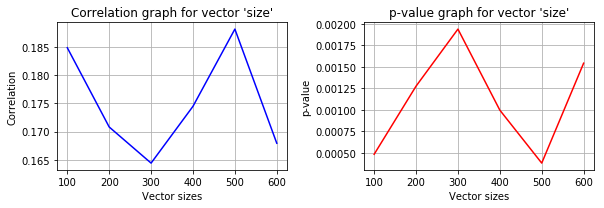

[0.18482882260978845, 0.17081055797772945, 0.1644249983301631, 0.17447065509094467, 0.18812549418747526, 0.16793873273427085]
[0.00048226052458377565, 0.0012749327144777407, 0.0019389377650786733, 0.0009959758304877936, 0.00037970453160762627, 0.0015422694092686938]


In [59]:
del model_size
fig = plt.gcf()
fig.set_size_inches(8.5, 3)

plt.subplot(1, 2, 1)
plt.plot(sizes, correlations, 'b')
plt.xlabel('Vector sizes')
plt.ylabel('Correlation')
plt.title("Correlation graph for vector 'size'")
plt.grid()

plt.subplot(1, 2, 2)
plt.plot(sizes, pvals, 'r')
plt.xlabel('Vector sizes')
plt.ylabel('p-value')
plt.title("p-value graph for vector 'size'")
plt.grid()

plt.tight_layout()
plt.show()

print(correlations)
print(pvals)

### 4.1. Tuning starting 'alpha'
size = 500; window = 6; iter = 5 (default)

In [67]:
alphas = [0.02, 0.04, 0.06, 0.08, 0.1]
correlations = []
pvals = []

In [68]:
for alph in alphas:
    embeddings_path = "../resources/embeddings_alpha{}.vec".format(alph)
    
    model_alph = Word2Vec(sentences_folder, workers=5, size=500, window=6, alpha=alph)
    save_embeddings(embeddings_path, model_alph.wv)
    
    corr, p, data = score.spearman(test_data_path, embeddings_path, bn2wn_mapping_path)
    correlations.append(corr)
    pvals.append(p)

2019-05-30 11:02:32,426 : INFO : collecting all words and their counts
2019-05-30 11:02:32,452 : INFO : PROGRESS: at sentence #0, processed 0 words, keeping 0 word types
2019-05-30 11:02:32,823 : INFO : PROGRESS: at sentence #10000, processed 271423 words, keeping 15504 word types
2019-05-30 11:02:32,992 : INFO : PROGRESS: at sentence #20000, processed 547417 words, keeping 21517 word types
2019-05-30 11:02:33,170 : INFO : PROGRESS: at sentence #30000, processed 829215 words, keeping 26443 word types
2019-05-30 11:02:33,340 : INFO : PROGRESS: at sentence #40000, processed 1116115 words, keeping 30297 word types
2019-05-30 11:02:33,497 : INFO : PROGRESS: at sentence #50000, processed 1389268 words, keeping 33255 word types
2019-05-30 11:02:33,694 : INFO : PROGRESS: at sentence #60000, processed 1664025 words, keeping 36015 word types
2019-05-30 11:02:33,899 : INFO : PROGRESS: at sentence #70000, processed 1942307 words, keeping 38334 word types
2019-05-30 11:02:34,070 : INFO : PROGRESS:

2019-05-30 11:02:58,044 : INFO : PROGRESS: at sentence #1420000, processed 39372792 words, keeping 130815 word types
2019-05-30 11:02:58,205 : INFO : PROGRESS: at sentence #1430000, processed 39664039 words, keeping 131178 word types
2019-05-30 11:02:58,363 : INFO : PROGRESS: at sentence #1440000, processed 39949833 words, keeping 131524 word types
2019-05-30 11:02:58,680 : INFO : PROGRESS: at sentence #1450000, processed 40234437 words, keeping 131871 word types
2019-05-30 11:02:58,991 : INFO : PROGRESS: at sentence #1460000, processed 40515030 words, keeping 132203 word types
2019-05-30 11:02:59,145 : INFO : PROGRESS: at sentence #1470000, processed 40786039 words, keeping 132667 word types
2019-05-30 11:02:59,300 : INFO : PROGRESS: at sentence #1480000, processed 41060634 words, keeping 133013 word types
2019-05-30 11:02:59,461 : INFO : PROGRESS: at sentence #1490000, processed 41343098 words, keeping 133364 word types
2019-05-30 11:02:59,792 : INFO : PROGRESS: at sentence #1500000,

2019-05-30 11:03:11,301 : INFO : PROGRESS: at sentence #2130000, processed 59027769 words, keeping 154523 word types
2019-05-30 11:03:11,476 : INFO : PROGRESS: at sentence #2140000, processed 59306457 words, keeping 154690 word types
2019-05-30 11:03:11,620 : INFO : PROGRESS: at sentence #2150000, processed 59568224 words, keeping 154870 word types
2019-05-30 11:03:11,786 : INFO : PROGRESS: at sentence #2160000, processed 59848213 words, keeping 155047 word types
2019-05-30 11:03:11,955 : INFO : PROGRESS: at sentence #2170000, processed 60117733 words, keeping 155189 word types
2019-05-30 11:03:12,111 : INFO : PROGRESS: at sentence #2180000, processed 60396851 words, keeping 155315 word types
2019-05-30 11:03:12,264 : INFO : PROGRESS: at sentence #2190000, processed 60673507 words, keeping 155443 word types
2019-05-30 11:03:12,479 : INFO : PROGRESS: at sentence #2200000, processed 60954083 words, keeping 155565 word types
2019-05-30 11:03:12,649 : INFO : PROGRESS: at sentence #2210000,

2019-05-30 11:03:23,053 : INFO : PROGRESS: at sentence #2840000, processed 78696337 words, keeping 161287 word types
2019-05-30 11:03:23,223 : INFO : PROGRESS: at sentence #2850000, processed 78983987 words, keeping 161360 word types
2019-05-30 11:03:23,392 : INFO : PROGRESS: at sentence #2860000, processed 79270828 words, keeping 161413 word types
2019-05-30 11:03:23,543 : INFO : PROGRESS: at sentence #2870000, processed 79546764 words, keeping 161494 word types
2019-05-30 11:03:23,716 : INFO : PROGRESS: at sentence #2880000, processed 79834632 words, keeping 161552 word types
2019-05-30 11:03:23,878 : INFO : PROGRESS: at sentence #2890000, processed 80118528 words, keeping 161621 word types
2019-05-30 11:03:24,025 : INFO : PROGRESS: at sentence #2900000, processed 80388810 words, keeping 161672 word types
2019-05-30 11:03:24,172 : INFO : PROGRESS: at sentence #2910000, processed 80657780 words, keeping 161737 word types
2019-05-30 11:03:24,331 : INFO : PROGRESS: at sentence #2920000,

2019-05-30 11:03:34,894 : INFO : PROGRESS: at sentence #3550000, processed 98543778 words, keeping 164738 word types
2019-05-30 11:03:35,043 : INFO : PROGRESS: at sentence #3560000, processed 98812013 words, keeping 164761 word types
2019-05-30 11:03:35,196 : INFO : PROGRESS: at sentence #3570000, processed 99097751 words, keeping 164786 word types
2019-05-30 11:03:35,354 : INFO : PROGRESS: at sentence #3580000, processed 99378362 words, keeping 164811 word types
2019-05-30 11:03:35,556 : INFO : PROGRESS: at sentence #3590000, processed 99642763 words, keeping 164853 word types
2019-05-30 11:03:35,766 : INFO : PROGRESS: at sentence #3600000, processed 99917372 words, keeping 164905 word types
2019-05-30 11:03:35,952 : INFO : PROGRESS: at sentence #3610000, processed 100194099 words, keeping 164949 word types
2019-05-30 11:03:36,172 : INFO : PROGRESS: at sentence #3620000, processed 100462977 words, keeping 164978 word types
2019-05-30 11:03:36,499 : INFO : PROGRESS: at sentence #363000

2019-05-30 11:04:24,661 : INFO : EPOCH 1 - PROGRESS: at 13.37% examples, 248499 words/s, in_qsize 2, out_qsize 1
2019-05-30 11:04:25,683 : INFO : EPOCH 1 - PROGRESS: at 13.70% examples, 247986 words/s, in_qsize 5, out_qsize 1
2019-05-30 11:04:26,736 : INFO : EPOCH 1 - PROGRESS: at 14.01% examples, 247018 words/s, in_qsize 10, out_qsize 0
2019-05-30 11:04:27,746 : INFO : EPOCH 1 - PROGRESS: at 14.34% examples, 246526 words/s, in_qsize 10, out_qsize 0
2019-05-30 11:04:28,762 : INFO : EPOCH 1 - PROGRESS: at 14.70% examples, 246607 words/s, in_qsize 9, out_qsize 0
2019-05-30 11:04:29,789 : INFO : EPOCH 1 - PROGRESS: at 15.06% examples, 246626 words/s, in_qsize 9, out_qsize 0
2019-05-30 11:04:30,840 : INFO : EPOCH 1 - PROGRESS: at 15.40% examples, 246252 words/s, in_qsize 10, out_qsize 0
2019-05-30 11:04:31,872 : INFO : EPOCH 1 - PROGRESS: at 15.75% examples, 245979 words/s, in_qsize 9, out_qsize 0
2019-05-30 11:04:32,955 : INFO : EPOCH 1 - PROGRESS: at 16.08% examples, 245544 words/s, in_q

2019-05-30 11:05:39,637 : INFO : EPOCH 1 - PROGRESS: at 38.63% examples, 246172 words/s, in_qsize 9, out_qsize 0
2019-05-30 11:05:40,654 : INFO : EPOCH 1 - PROGRESS: at 38.92% examples, 245852 words/s, in_qsize 9, out_qsize 0
2019-05-30 11:05:41,698 : INFO : EPOCH 1 - PROGRESS: at 39.30% examples, 246005 words/s, in_qsize 4, out_qsize 0
2019-05-30 11:05:42,711 : INFO : EPOCH 1 - PROGRESS: at 39.56% examples, 245580 words/s, in_qsize 2, out_qsize 0
2019-05-30 11:05:43,756 : INFO : EPOCH 1 - PROGRESS: at 39.85% examples, 245157 words/s, in_qsize 6, out_qsize 0
2019-05-30 11:05:44,782 : INFO : EPOCH 1 - PROGRESS: at 40.12% examples, 244718 words/s, in_qsize 8, out_qsize 1
2019-05-30 11:05:45,794 : INFO : EPOCH 1 - PROGRESS: at 40.48% examples, 244829 words/s, in_qsize 7, out_qsize 0
2019-05-30 11:05:46,802 : INFO : EPOCH 1 - PROGRESS: at 40.80% examples, 244668 words/s, in_qsize 9, out_qsize 0
2019-05-30 11:05:47,802 : INFO : EPOCH 1 - PROGRESS: at 41.13% examples, 244740 words/s, in_qsiz

2019-05-30 11:06:54,597 : INFO : EPOCH 1 - PROGRESS: at 64.38% examples, 247331 words/s, in_qsize 6, out_qsize 0
2019-05-30 11:06:55,606 : INFO : EPOCH 1 - PROGRESS: at 64.75% examples, 247354 words/s, in_qsize 2, out_qsize 0
2019-05-30 11:06:56,627 : INFO : EPOCH 1 - PROGRESS: at 65.10% examples, 247363 words/s, in_qsize 9, out_qsize 0
2019-05-30 11:06:57,668 : INFO : EPOCH 1 - PROGRESS: at 65.50% examples, 247465 words/s, in_qsize 9, out_qsize 0
2019-05-30 11:06:58,730 : INFO : EPOCH 1 - PROGRESS: at 65.86% examples, 247453 words/s, in_qsize 9, out_qsize 1
2019-05-30 11:06:59,743 : INFO : EPOCH 1 - PROGRESS: at 66.23% examples, 247574 words/s, in_qsize 0, out_qsize 0
2019-05-30 11:07:00,755 : INFO : EPOCH 1 - PROGRESS: at 66.56% examples, 247518 words/s, in_qsize 10, out_qsize 0
2019-05-30 11:07:01,774 : INFO : EPOCH 1 - PROGRESS: at 66.90% examples, 247450 words/s, in_qsize 9, out_qsize 0
2019-05-30 11:07:02,779 : INFO : EPOCH 1 - PROGRESS: at 67.27% examples, 247546 words/s, in_qsi

2019-05-30 11:08:09,514 : INFO : EPOCH 1 - PROGRESS: at 90.47% examples, 249101 words/s, in_qsize 10, out_qsize 0
2019-05-30 11:08:10,517 : INFO : EPOCH 1 - PROGRESS: at 90.85% examples, 249223 words/s, in_qsize 9, out_qsize 0
2019-05-30 11:08:11,565 : INFO : EPOCH 1 - PROGRESS: at 91.24% examples, 249349 words/s, in_qsize 8, out_qsize 1
2019-05-30 11:08:12,575 : INFO : EPOCH 1 - PROGRESS: at 91.62% examples, 249485 words/s, in_qsize 10, out_qsize 0
2019-05-30 11:08:13,575 : INFO : EPOCH 1 - PROGRESS: at 91.98% examples, 249580 words/s, in_qsize 9, out_qsize 0
2019-05-30 11:08:14,578 : INFO : EPOCH 1 - PROGRESS: at 92.36% examples, 249723 words/s, in_qsize 8, out_qsize 0
2019-05-30 11:08:15,587 : INFO : EPOCH 1 - PROGRESS: at 92.75% examples, 249860 words/s, in_qsize 6, out_qsize 0
2019-05-30 11:08:16,615 : INFO : EPOCH 1 - PROGRESS: at 93.15% examples, 249948 words/s, in_qsize 7, out_qsize 1
2019-05-30 11:08:17,640 : INFO : EPOCH 1 - PROGRESS: at 93.54% examples, 250013 words/s, in_qs

2019-05-30 11:09:19,915 : INFO : EPOCH 2 - PROGRESS: at 15.84% examples, 252276 words/s, in_qsize 10, out_qsize 0
2019-05-30 11:09:20,926 : INFO : EPOCH 2 - PROGRESS: at 16.17% examples, 251947 words/s, in_qsize 9, out_qsize 0
2019-05-30 11:09:21,977 : INFO : EPOCH 2 - PROGRESS: at 16.55% examples, 252280 words/s, in_qsize 8, out_qsize 0
2019-05-30 11:09:22,990 : INFO : EPOCH 2 - PROGRESS: at 16.90% examples, 252228 words/s, in_qsize 9, out_qsize 0
2019-05-30 11:09:24,043 : INFO : EPOCH 2 - PROGRESS: at 17.28% examples, 252420 words/s, in_qsize 5, out_qsize 2
2019-05-30 11:09:25,070 : INFO : EPOCH 2 - PROGRESS: at 17.62% examples, 252175 words/s, in_qsize 10, out_qsize 0
2019-05-30 11:09:26,126 : INFO : EPOCH 2 - PROGRESS: at 17.97% examples, 252078 words/s, in_qsize 9, out_qsize 0
2019-05-30 11:09:27,145 : INFO : EPOCH 2 - PROGRESS: at 18.37% examples, 252779 words/s, in_qsize 9, out_qsize 0
2019-05-30 11:09:28,157 : INFO : EPOCH 2 - PROGRESS: at 18.73% examples, 253119 words/s, in_qs

2019-05-30 11:10:34,822 : INFO : EPOCH 2 - PROGRESS: at 42.72% examples, 258609 words/s, in_qsize 10, out_qsize 0
2019-05-30 11:10:35,883 : INFO : EPOCH 2 - PROGRESS: at 43.09% examples, 258494 words/s, in_qsize 10, out_qsize 0
2019-05-30 11:10:36,938 : INFO : EPOCH 2 - PROGRESS: at 43.46% examples, 258397 words/s, in_qsize 5, out_qsize 0
2019-05-30 11:10:37,992 : INFO : EPOCH 2 - PROGRESS: at 43.77% examples, 258084 words/s, in_qsize 10, out_qsize 0
2019-05-30 11:10:39,020 : INFO : EPOCH 2 - PROGRESS: at 44.15% examples, 258166 words/s, in_qsize 9, out_qsize 0
2019-05-30 11:10:40,058 : INFO : EPOCH 2 - PROGRESS: at 44.57% examples, 258383 words/s, in_qsize 4, out_qsize 0
2019-05-30 11:10:41,075 : INFO : EPOCH 2 - PROGRESS: at 44.97% examples, 258584 words/s, in_qsize 7, out_qsize 1
2019-05-30 11:10:42,097 : INFO : EPOCH 2 - PROGRESS: at 45.36% examples, 258722 words/s, in_qsize 8, out_qsize 2
2019-05-30 11:10:43,099 : INFO : EPOCH 2 - PROGRESS: at 45.79% examples, 259070 words/s, in_q

2019-05-30 11:11:49,648 : INFO : EPOCH 2 - PROGRESS: at 70.62% examples, 262791 words/s, in_qsize 6, out_qsize 1
2019-05-30 11:11:50,669 : INFO : EPOCH 2 - PROGRESS: at 71.02% examples, 262893 words/s, in_qsize 9, out_qsize 0
2019-05-30 11:11:51,674 : INFO : EPOCH 2 - PROGRESS: at 71.42% examples, 263015 words/s, in_qsize 9, out_qsize 0
2019-05-30 11:11:52,687 : INFO : EPOCH 2 - PROGRESS: at 71.81% examples, 263092 words/s, in_qsize 8, out_qsize 1
2019-05-30 11:11:53,690 : INFO : EPOCH 2 - PROGRESS: at 72.20% examples, 263183 words/s, in_qsize 9, out_qsize 0
2019-05-30 11:11:54,715 : INFO : EPOCH 2 - PROGRESS: at 72.59% examples, 263274 words/s, in_qsize 10, out_qsize 0
2019-05-30 11:11:55,749 : INFO : EPOCH 2 - PROGRESS: at 72.95% examples, 263224 words/s, in_qsize 7, out_qsize 1
2019-05-30 11:11:56,757 : INFO : EPOCH 2 - PROGRESS: at 73.36% examples, 263378 words/s, in_qsize 6, out_qsize 0
2019-05-30 11:11:57,818 : INFO : EPOCH 2 - PROGRESS: at 73.76% examples, 263424 words/s, in_qsi

2019-05-30 11:13:04,570 : INFO : EPOCH 2 - PROGRESS: at 97.78% examples, 263119 words/s, in_qsize 8, out_qsize 1
2019-05-30 11:13:05,636 : INFO : EPOCH 2 - PROGRESS: at 98.10% examples, 262973 words/s, in_qsize 10, out_qsize 0
2019-05-30 11:13:06,642 : INFO : EPOCH 2 - PROGRESS: at 98.47% examples, 262989 words/s, in_qsize 0, out_qsize 0
2019-05-30 11:13:07,656 : INFO : EPOCH 2 - PROGRESS: at 98.84% examples, 262970 words/s, in_qsize 9, out_qsize 0
2019-05-30 11:13:08,673 : INFO : EPOCH 2 - PROGRESS: at 99.20% examples, 262976 words/s, in_qsize 8, out_qsize 0
2019-05-30 11:13:09,674 : INFO : EPOCH 2 - PROGRESS: at 99.55% examples, 262920 words/s, in_qsize 8, out_qsize 0
2019-05-30 11:13:10,687 : INFO : EPOCH 2 - PROGRESS: at 99.91% examples, 262883 words/s, in_qsize 9, out_qsize 0
2019-05-30 11:13:10,817 : INFO : worker thread finished; awaiting finish of 4 more threads
2019-05-30 11:13:10,825 : INFO : worker thread finished; awaiting finish of 3 more threads
2019-05-30 11:13:10,843 : 

2019-05-30 11:14:14,461 : INFO : EPOCH 3 - PROGRESS: at 22.48% examples, 256331 words/s, in_qsize 9, out_qsize 0
2019-05-30 11:14:15,464 : INFO : EPOCH 3 - PROGRESS: at 22.85% examples, 256502 words/s, in_qsize 7, out_qsize 1
2019-05-30 11:14:16,471 : INFO : EPOCH 3 - PROGRESS: at 23.22% examples, 256661 words/s, in_qsize 7, out_qsize 0
2019-05-30 11:14:17,490 : INFO : EPOCH 3 - PROGRESS: at 23.60% examples, 256863 words/s, in_qsize 9, out_qsize 0
2019-05-30 11:14:18,499 : INFO : EPOCH 3 - PROGRESS: at 23.97% examples, 256997 words/s, in_qsize 4, out_qsize 0
2019-05-30 11:14:19,530 : INFO : EPOCH 3 - PROGRESS: at 24.35% examples, 257132 words/s, in_qsize 8, out_qsize 1
2019-05-30 11:14:20,542 : INFO : EPOCH 3 - PROGRESS: at 24.72% examples, 257326 words/s, in_qsize 9, out_qsize 0
2019-05-30 11:14:21,573 : INFO : EPOCH 3 - PROGRESS: at 25.07% examples, 257346 words/s, in_qsize 9, out_qsize 0
2019-05-30 11:14:22,595 : INFO : EPOCH 3 - PROGRESS: at 25.43% examples, 257313 words/s, in_qsiz

2019-05-30 11:15:29,382 : INFO : EPOCH 3 - PROGRESS: at 48.61% examples, 255161 words/s, in_qsize 7, out_qsize 0
2019-05-30 11:15:30,388 : INFO : EPOCH 3 - PROGRESS: at 48.94% examples, 255000 words/s, in_qsize 9, out_qsize 0
2019-05-30 11:15:31,439 : INFO : EPOCH 3 - PROGRESS: at 49.29% examples, 254957 words/s, in_qsize 10, out_qsize 0
2019-05-30 11:15:32,450 : INFO : EPOCH 3 - PROGRESS: at 49.65% examples, 254889 words/s, in_qsize 7, out_qsize 0
2019-05-30 11:15:33,486 : INFO : EPOCH 3 - PROGRESS: at 50.00% examples, 254781 words/s, in_qsize 9, out_qsize 0
2019-05-30 11:15:34,534 : INFO : EPOCH 3 - PROGRESS: at 50.33% examples, 254602 words/s, in_qsize 10, out_qsize 0
2019-05-30 11:15:35,535 : INFO : EPOCH 3 - PROGRESS: at 50.71% examples, 254692 words/s, in_qsize 10, out_qsize 0
2019-05-30 11:15:36,548 : INFO : EPOCH 3 - PROGRESS: at 51.08% examples, 254854 words/s, in_qsize 9, out_qsize 0
2019-05-30 11:15:37,571 : INFO : EPOCH 3 - PROGRESS: at 51.47% examples, 254947 words/s, in_q

2019-05-30 11:16:44,103 : INFO : EPOCH 3 - PROGRESS: at 76.00% examples, 258894 words/s, in_qsize 9, out_qsize 0
2019-05-30 11:16:45,116 : INFO : EPOCH 3 - PROGRESS: at 76.37% examples, 258930 words/s, in_qsize 7, out_qsize 0
2019-05-30 11:16:46,155 : INFO : EPOCH 3 - PROGRESS: at 76.76% examples, 258926 words/s, in_qsize 5, out_qsize 1
2019-05-30 11:16:47,184 : INFO : EPOCH 3 - PROGRESS: at 77.15% examples, 259034 words/s, in_qsize 9, out_qsize 1
2019-05-30 11:16:48,210 : INFO : EPOCH 3 - PROGRESS: at 77.55% examples, 259173 words/s, in_qsize 9, out_qsize 0
2019-05-30 11:16:49,253 : INFO : EPOCH 3 - PROGRESS: at 77.94% examples, 259226 words/s, in_qsize 9, out_qsize 0
2019-05-30 11:16:50,255 : INFO : EPOCH 3 - PROGRESS: at 78.35% examples, 259366 words/s, in_qsize 9, out_qsize 0
2019-05-30 11:16:51,261 : INFO : EPOCH 3 - PROGRESS: at 78.76% examples, 259524 words/s, in_qsize 6, out_qsize 0
2019-05-30 11:16:52,271 : INFO : EPOCH 3 - PROGRESS: at 79.13% examples, 259580 words/s, in_qsiz

2019-05-30 11:17:54,206 : INFO : EPOCH 4 - PROGRESS: at 2.16% examples, 256159 words/s, in_qsize 9, out_qsize 0
2019-05-30 11:17:55,291 : INFO : EPOCH 4 - PROGRESS: at 2.53% examples, 254657 words/s, in_qsize 8, out_qsize 1
2019-05-30 11:17:56,336 : INFO : EPOCH 4 - PROGRESS: at 2.86% examples, 251523 words/s, in_qsize 8, out_qsize 1
2019-05-30 11:17:57,353 : INFO : EPOCH 4 - PROGRESS: at 3.25% examples, 252815 words/s, in_qsize 9, out_qsize 0
2019-05-30 11:17:58,366 : INFO : EPOCH 4 - PROGRESS: at 3.64% examples, 255276 words/s, in_qsize 9, out_qsize 0
2019-05-30 11:17:59,396 : INFO : EPOCH 4 - PROGRESS: at 4.01% examples, 255761 words/s, in_qsize 9, out_qsize 0
2019-05-30 11:18:00,456 : INFO : EPOCH 4 - PROGRESS: at 4.31% examples, 251661 words/s, in_qsize 5, out_qsize 0
2019-05-30 11:18:01,491 : INFO : EPOCH 4 - PROGRESS: at 4.69% examples, 252730 words/s, in_qsize 3, out_qsize 0
2019-05-30 11:18:02,532 : INFO : EPOCH 4 - PROGRESS: at 5.06% examples, 252515 words/s, in_qsize 9, out_

2019-05-30 11:19:09,268 : INFO : EPOCH 4 - PROGRESS: at 29.18% examples, 260772 words/s, in_qsize 10, out_qsize 0
2019-05-30 11:19:10,284 : INFO : EPOCH 4 - PROGRESS: at 29.60% examples, 261229 words/s, in_qsize 8, out_qsize 0
2019-05-30 11:19:11,300 : INFO : EPOCH 4 - PROGRESS: at 29.98% examples, 261419 words/s, in_qsize 8, out_qsize 1
2019-05-30 11:19:12,314 : INFO : EPOCH 4 - PROGRESS: at 30.37% examples, 261768 words/s, in_qsize 7, out_qsize 2
2019-05-30 11:19:13,340 : INFO : EPOCH 4 - PROGRESS: at 30.77% examples, 262153 words/s, in_qsize 9, out_qsize 0
2019-05-30 11:19:14,377 : INFO : EPOCH 4 - PROGRESS: at 31.14% examples, 262332 words/s, in_qsize 9, out_qsize 0
2019-05-30 11:19:15,388 : INFO : EPOCH 4 - PROGRESS: at 31.56% examples, 262818 words/s, in_qsize 3, out_qsize 1
2019-05-30 11:19:16,414 : INFO : EPOCH 4 - PROGRESS: at 31.96% examples, 263028 words/s, in_qsize 6, out_qsize 0
2019-05-30 11:19:17,414 : INFO : EPOCH 4 - PROGRESS: at 32.35% examples, 263227 words/s, in_qsi

2019-05-30 11:20:23,824 : INFO : EPOCH 4 - PROGRESS: at 56.96% examples, 265536 words/s, in_qsize 8, out_qsize 0
2019-05-30 11:20:24,836 : INFO : EPOCH 4 - PROGRESS: at 57.32% examples, 265490 words/s, in_qsize 2, out_qsize 0
2019-05-30 11:20:25,905 : INFO : EPOCH 4 - PROGRESS: at 57.64% examples, 265176 words/s, in_qsize 6, out_qsize 1
2019-05-30 11:20:26,917 : INFO : EPOCH 4 - PROGRESS: at 57.97% examples, 264998 words/s, in_qsize 8, out_qsize 2
2019-05-30 11:20:27,927 : INFO : EPOCH 4 - PROGRESS: at 58.35% examples, 265091 words/s, in_qsize 9, out_qsize 0
2019-05-30 11:20:28,938 : INFO : EPOCH 4 - PROGRESS: at 58.72% examples, 265124 words/s, in_qsize 10, out_qsize 0
2019-05-30 11:20:29,966 : INFO : EPOCH 4 - PROGRESS: at 59.11% examples, 265208 words/s, in_qsize 8, out_qsize 1
2019-05-30 11:20:30,996 : INFO : EPOCH 4 - PROGRESS: at 59.51% examples, 265315 words/s, in_qsize 9, out_qsize 1
2019-05-30 11:20:32,049 : INFO : EPOCH 4 - PROGRESS: at 59.92% examples, 265456 words/s, in_qsi

2019-05-30 11:21:38,536 : INFO : EPOCH 4 - PROGRESS: at 83.81% examples, 264202 words/s, in_qsize 8, out_qsize 1
2019-05-30 11:21:39,547 : INFO : EPOCH 4 - PROGRESS: at 84.19% examples, 264266 words/s, in_qsize 7, out_qsize 2
2019-05-30 11:21:40,550 : INFO : EPOCH 4 - PROGRESS: at 84.55% examples, 264280 words/s, in_qsize 5, out_qsize 1
2019-05-30 11:21:41,565 : INFO : EPOCH 4 - PROGRESS: at 84.92% examples, 264310 words/s, in_qsize 10, out_qsize 0
2019-05-30 11:21:42,593 : INFO : EPOCH 4 - PROGRESS: at 85.25% examples, 264178 words/s, in_qsize 9, out_qsize 0
2019-05-30 11:21:43,612 : INFO : EPOCH 4 - PROGRESS: at 85.63% examples, 264230 words/s, in_qsize 8, out_qsize 0
2019-05-30 11:21:44,614 : INFO : EPOCH 4 - PROGRESS: at 85.95% examples, 264072 words/s, in_qsize 7, out_qsize 2
2019-05-30 11:21:45,638 : INFO : EPOCH 4 - PROGRESS: at 86.35% examples, 264153 words/s, in_qsize 9, out_qsize 0
2019-05-30 11:21:46,685 : INFO : EPOCH 4 - PROGRESS: at 86.70% examples, 263997 words/s, in_qsi

2019-05-30 11:22:48,795 : INFO : EPOCH 5 - PROGRESS: at 9.71% examples, 274875 words/s, in_qsize 10, out_qsize 0
2019-05-30 11:22:49,822 : INFO : EPOCH 5 - PROGRESS: at 10.12% examples, 275590 words/s, in_qsize 9, out_qsize 0
2019-05-30 11:22:50,824 : INFO : EPOCH 5 - PROGRESS: at 10.50% examples, 275996 words/s, in_qsize 9, out_qsize 0
2019-05-30 11:22:51,840 : INFO : EPOCH 5 - PROGRESS: at 10.92% examples, 276310 words/s, in_qsize 6, out_qsize 0
2019-05-30 11:22:52,851 : INFO : EPOCH 5 - PROGRESS: at 11.32% examples, 276642 words/s, in_qsize 9, out_qsize 0
2019-05-30 11:22:53,898 : INFO : EPOCH 5 - PROGRESS: at 11.72% examples, 276563 words/s, in_qsize 8, out_qsize 0
2019-05-30 11:22:54,937 : INFO : EPOCH 5 - PROGRESS: at 12.11% examples, 276820 words/s, in_qsize 9, out_qsize 0
2019-05-30 11:22:55,977 : INFO : EPOCH 5 - PROGRESS: at 12.52% examples, 277274 words/s, in_qsize 9, out_qsize 0
2019-05-30 11:22:56,996 : INFO : EPOCH 5 - PROGRESS: at 12.92% examples, 277445 words/s, in_qsiz

2019-05-30 11:24:03,902 : INFO : EPOCH 5 - PROGRESS: at 38.34% examples, 276615 words/s, in_qsize 7, out_qsize 0
2019-05-30 11:24:04,912 : INFO : EPOCH 5 - PROGRESS: at 38.71% examples, 276516 words/s, in_qsize 10, out_qsize 0
2019-05-30 11:24:05,954 : INFO : EPOCH 5 - PROGRESS: at 39.10% examples, 276454 words/s, in_qsize 9, out_qsize 0
2019-05-30 11:24:06,978 : INFO : EPOCH 5 - PROGRESS: at 39.48% examples, 276442 words/s, in_qsize 9, out_qsize 0
2019-05-30 11:24:07,983 : INFO : EPOCH 5 - PROGRESS: at 39.87% examples, 276484 words/s, in_qsize 9, out_qsize 0
2019-05-30 11:24:09,035 : INFO : EPOCH 5 - PROGRESS: at 40.28% examples, 276525 words/s, in_qsize 10, out_qsize 0
2019-05-30 11:24:10,058 : INFO : EPOCH 5 - PROGRESS: at 40.67% examples, 276518 words/s, in_qsize 10, out_qsize 0
2019-05-30 11:24:11,062 : INFO : EPOCH 5 - PROGRESS: at 41.06% examples, 276681 words/s, in_qsize 1, out_qsize 0
2019-05-30 11:24:12,082 : INFO : EPOCH 5 - PROGRESS: at 41.40% examples, 276481 words/s, in_q

2019-05-30 11:25:18,630 : INFO : EPOCH 5 - PROGRESS: at 64.89% examples, 268462 words/s, in_qsize 10, out_qsize 0
2019-05-30 11:25:19,655 : INFO : EPOCH 5 - PROGRESS: at 65.28% examples, 268464 words/s, in_qsize 8, out_qsize 0
2019-05-30 11:25:20,682 : INFO : EPOCH 5 - PROGRESS: at 65.60% examples, 268159 words/s, in_qsize 8, out_qsize 0
2019-05-30 11:25:21,691 : INFO : EPOCH 5 - PROGRESS: at 65.94% examples, 268022 words/s, in_qsize 9, out_qsize 0
2019-05-30 11:25:22,721 : INFO : EPOCH 5 - PROGRESS: at 66.31% examples, 268012 words/s, in_qsize 5, out_qsize 0
2019-05-30 11:25:23,724 : INFO : EPOCH 5 - PROGRESS: at 66.65% examples, 267888 words/s, in_qsize 10, out_qsize 0
2019-05-30 11:25:24,730 : INFO : EPOCH 5 - PROGRESS: at 67.04% examples, 267948 words/s, in_qsize 9, out_qsize 0
2019-05-30 11:25:25,740 : INFO : EPOCH 5 - PROGRESS: at 67.39% examples, 267857 words/s, in_qsize 9, out_qsize 0
2019-05-30 11:25:26,797 : INFO : EPOCH 5 - PROGRESS: at 67.76% examples, 267814 words/s, in_qs

2019-05-30 11:26:33,259 : INFO : EPOCH 5 - PROGRESS: at 90.95% examples, 264310 words/s, in_qsize 9, out_qsize 1
2019-05-30 11:26:34,266 : INFO : EPOCH 5 - PROGRESS: at 91.31% examples, 264341 words/s, in_qsize 4, out_qsize 1
2019-05-30 11:26:35,294 : INFO : EPOCH 5 - PROGRESS: at 91.65% examples, 264268 words/s, in_qsize 9, out_qsize 0
2019-05-30 11:26:36,345 : INFO : EPOCH 5 - PROGRESS: at 92.01% examples, 264256 words/s, in_qsize 9, out_qsize 0
2019-05-30 11:26:37,351 : INFO : EPOCH 5 - PROGRESS: at 92.38% examples, 264321 words/s, in_qsize 9, out_qsize 0
2019-05-30 11:26:38,359 : INFO : EPOCH 5 - PROGRESS: at 92.78% examples, 264437 words/s, in_qsize 9, out_qsize 0
2019-05-30 11:26:39,366 : INFO : EPOCH 5 - PROGRESS: at 93.09% examples, 264250 words/s, in_qsize 10, out_qsize 0
2019-05-30 11:26:40,378 : INFO : EPOCH 5 - PROGRESS: at 93.44% examples, 264170 words/s, in_qsize 8, out_qsize 1
2019-05-30 11:26:41,391 : INFO : EPOCH 5 - PROGRESS: at 93.82% examples, 264224 words/s, in_qsi

2019-05-30 11:30:34,214 : INFO : PROGRESS: at sentence #350000, processed 9691617 words, keeping 75847 word types
2019-05-30 11:30:34,373 : INFO : PROGRESS: at sentence #360000, processed 9967841 words, keeping 76432 word types
2019-05-30 11:30:34,524 : INFO : PROGRESS: at sentence #370000, processed 10241135 words, keeping 77155 word types
2019-05-30 11:30:34,681 : INFO : PROGRESS: at sentence #380000, processed 10525311 words, keeping 78024 word types
2019-05-30 11:30:34,884 : INFO : PROGRESS: at sentence #390000, processed 10808612 words, keeping 78840 word types
2019-05-30 11:30:35,037 : INFO : PROGRESS: at sentence #400000, processed 11093684 words, keeping 79738 word types
2019-05-30 11:30:35,201 : INFO : PROGRESS: at sentence #410000, processed 11363617 words, keeping 80533 word types
2019-05-30 11:30:35,360 : INFO : PROGRESS: at sentence #420000, processed 11629946 words, keeping 81337 word types
2019-05-30 11:30:35,539 : INFO : PROGRESS: at sentence #430000, processed 11900639

2019-05-30 11:30:46,249 : INFO : PROGRESS: at sentence #1060000, processed 29368014 words, keeping 117166 word types
2019-05-30 11:30:46,405 : INFO : PROGRESS: at sentence #1070000, processed 29630839 words, keeping 117552 word types
2019-05-30 11:30:46,583 : INFO : PROGRESS: at sentence #1080000, processed 29895017 words, keeping 117963 word types
2019-05-30 11:30:46,757 : INFO : PROGRESS: at sentence #1090000, processed 30171982 words, keeping 118406 word types
2019-05-30 11:30:46,920 : INFO : PROGRESS: at sentence #1100000, processed 30455457 words, keeping 118778 word types
2019-05-30 11:30:47,080 : INFO : PROGRESS: at sentence #1110000, processed 30738260 words, keeping 119250 word types
2019-05-30 11:30:47,236 : INFO : PROGRESS: at sentence #1120000, processed 31008608 words, keeping 119566 word types
2019-05-30 11:30:47,417 : INFO : PROGRESS: at sentence #1130000, processed 31291468 words, keeping 119911 word types
2019-05-30 11:30:47,578 : INFO : PROGRESS: at sentence #1140000,

2019-05-30 11:30:58,409 : INFO : PROGRESS: at sentence #1770000, processed 49113947 words, keeping 143203 word types
2019-05-30 11:30:58,558 : INFO : PROGRESS: at sentence #1780000, processed 49386498 words, keeping 143505 word types
2019-05-30 11:30:58,722 : INFO : PROGRESS: at sentence #1790000, processed 49656722 words, keeping 143923 word types
2019-05-30 11:30:58,882 : INFO : PROGRESS: at sentence #1800000, processed 49938627 words, keeping 144348 word types
2019-05-30 11:30:59,040 : INFO : PROGRESS: at sentence #1810000, processed 50214937 words, keeping 144652 word types
2019-05-30 11:30:59,205 : INFO : PROGRESS: at sentence #1820000, processed 50486435 words, keeping 144951 word types
2019-05-30 11:30:59,366 : INFO : PROGRESS: at sentence #1830000, processed 50768467 words, keeping 145271 word types
2019-05-30 11:30:59,521 : INFO : PROGRESS: at sentence #1840000, processed 51048644 words, keeping 145567 word types
2019-05-30 11:30:59,681 : INFO : PROGRESS: at sentence #1850000,

2019-05-30 11:31:10,021 : INFO : PROGRESS: at sentence #2480000, processed 68691733 words, keeping 158539 word types
2019-05-30 11:31:10,195 : INFO : PROGRESS: at sentence #2490000, processed 68966572 words, keeping 158636 word types
2019-05-30 11:31:10,340 : INFO : PROGRESS: at sentence #2500000, processed 69226935 words, keeping 158725 word types
2019-05-30 11:31:10,496 : INFO : PROGRESS: at sentence #2510000, processed 69507381 words, keeping 158826 word types
2019-05-30 11:31:10,657 : INFO : PROGRESS: at sentence #2520000, processed 69792396 words, keeping 158914 word types
2019-05-30 11:31:10,831 : INFO : PROGRESS: at sentence #2530000, processed 70074185 words, keeping 159007 word types
2019-05-30 11:31:10,982 : INFO : PROGRESS: at sentence #2540000, processed 70346892 words, keeping 159093 word types
2019-05-30 11:31:11,163 : INFO : PROGRESS: at sentence #2550000, processed 70622115 words, keeping 159169 word types
2019-05-30 11:31:11,346 : INFO : PROGRESS: at sentence #2560000,

2019-05-30 11:31:22,476 : INFO : PROGRESS: at sentence #3190000, processed 88459531 words, keeping 163135 word types
2019-05-30 11:31:22,798 : INFO : PROGRESS: at sentence #3200000, processed 88741813 words, keeping 163185 word types
2019-05-30 11:31:23,057 : INFO : PROGRESS: at sentence #3210000, processed 89030073 words, keeping 163238 word types
2019-05-30 11:31:23,225 : INFO : PROGRESS: at sentence #3220000, processed 89304520 words, keeping 163282 word types
2019-05-30 11:31:23,415 : INFO : PROGRESS: at sentence #3230000, processed 89592221 words, keeping 163315 word types
2019-05-30 11:31:23,590 : INFO : PROGRESS: at sentence #3240000, processed 89871677 words, keeping 163350 word types
2019-05-30 11:31:23,762 : INFO : PROGRESS: at sentence #3250000, processed 90152168 words, keeping 163396 word types
2019-05-30 11:31:24,119 : INFO : PROGRESS: at sentence #3260000, processed 90433241 words, keeping 163439 word types
2019-05-30 11:31:24,282 : INFO : PROGRESS: at sentence #3270000,

2019-05-30 11:31:38,707 : INFO : EPOCH 1 - PROGRESS: at 0.21% examples, 148665 words/s, in_qsize 0, out_qsize 0
2019-05-30 11:31:39,755 : INFO : EPOCH 1 - PROGRESS: at 0.54% examples, 189759 words/s, in_qsize 10, out_qsize 0
2019-05-30 11:31:40,782 : INFO : EPOCH 1 - PROGRESS: at 0.91% examples, 213360 words/s, in_qsize 9, out_qsize 0
2019-05-30 11:31:41,820 : INFO : EPOCH 1 - PROGRESS: at 1.29% examples, 227921 words/s, in_qsize 9, out_qsize 0
2019-05-30 11:31:42,824 : INFO : EPOCH 1 - PROGRESS: at 1.70% examples, 240606 words/s, in_qsize 8, out_qsize 0
2019-05-30 11:31:43,867 : INFO : EPOCH 1 - PROGRESS: at 2.09% examples, 245529 words/s, in_qsize 9, out_qsize 0
2019-05-30 11:31:44,893 : INFO : EPOCH 1 - PROGRESS: at 2.46% examples, 247676 words/s, in_qsize 9, out_qsize 0
2019-05-30 11:31:45,896 : INFO : EPOCH 1 - PROGRESS: at 2.85% examples, 250853 words/s, in_qsize 8, out_qsize 1
2019-05-30 11:31:46,897 : INFO : EPOCH 1 - PROGRESS: at 3.24% examples, 253428 words/s, in_qsize 8, out

2019-05-30 11:32:53,526 : INFO : EPOCH 1 - PROGRESS: at 27.90% examples, 266960 words/s, in_qsize 9, out_qsize 0
2019-05-30 11:32:54,535 : INFO : EPOCH 1 - PROGRESS: at 28.18% examples, 266058 words/s, in_qsize 9, out_qsize 0
2019-05-30 11:32:55,544 : INFO : EPOCH 1 - PROGRESS: at 28.55% examples, 265986 words/s, in_qsize 9, out_qsize 0
2019-05-30 11:32:56,556 : INFO : EPOCH 1 - PROGRESS: at 28.95% examples, 266222 words/s, in_qsize 8, out_qsize 1
2019-05-30 11:32:57,563 : INFO : EPOCH 1 - PROGRESS: at 29.32% examples, 266297 words/s, in_qsize 4, out_qsize 2
2019-05-30 11:32:58,585 : INFO : EPOCH 1 - PROGRESS: at 29.73% examples, 266677 words/s, in_qsize 2, out_qsize 0
2019-05-30 11:32:59,631 : INFO : EPOCH 1 - PROGRESS: at 30.11% examples, 266620 words/s, in_qsize 10, out_qsize 0
2019-05-30 11:33:00,650 : INFO : EPOCH 1 - PROGRESS: at 30.37% examples, 265818 words/s, in_qsize 8, out_qsize 0
2019-05-30 11:33:01,688 : INFO : EPOCH 1 - PROGRESS: at 30.73% examples, 265716 words/s, in_qsi

2019-05-30 11:34:08,228 : INFO : EPOCH 1 - PROGRESS: at 54.25% examples, 261673 words/s, in_qsize 6, out_qsize 0
2019-05-30 11:34:09,238 : INFO : EPOCH 1 - PROGRESS: at 54.60% examples, 261607 words/s, in_qsize 5, out_qsize 0
2019-05-30 11:34:10,326 : INFO : EPOCH 1 - PROGRESS: at 54.98% examples, 261535 words/s, in_qsize 8, out_qsize 1
2019-05-30 11:34:11,345 : INFO : EPOCH 1 - PROGRESS: at 55.33% examples, 261459 words/s, in_qsize 8, out_qsize 0
2019-05-30 11:34:12,382 : INFO : EPOCH 1 - PROGRESS: at 55.70% examples, 261433 words/s, in_qsize 9, out_qsize 0
2019-05-30 11:34:13,450 : INFO : EPOCH 1 - PROGRESS: at 56.08% examples, 261411 words/s, in_qsize 8, out_qsize 0
2019-05-30 11:34:14,467 : INFO : EPOCH 1 - PROGRESS: at 56.45% examples, 261389 words/s, in_qsize 6, out_qsize 1
2019-05-30 11:34:15,531 : INFO : EPOCH 1 - PROGRESS: at 56.83% examples, 261373 words/s, in_qsize 9, out_qsize 0
2019-05-30 11:34:16,547 : INFO : EPOCH 1 - PROGRESS: at 57.20% examples, 261388 words/s, in_qsiz

2019-05-30 11:35:23,311 : INFO : EPOCH 1 - PROGRESS: at 79.72% examples, 256599 words/s, in_qsize 10, out_qsize 0
2019-05-30 11:35:24,320 : INFO : EPOCH 1 - PROGRESS: at 80.04% examples, 256482 words/s, in_qsize 6, out_qsize 1
2019-05-30 11:35:25,321 : INFO : EPOCH 1 - PROGRESS: at 80.37% examples, 256437 words/s, in_qsize 9, out_qsize 0
2019-05-30 11:35:26,372 : INFO : EPOCH 1 - PROGRESS: at 80.73% examples, 256427 words/s, in_qsize 9, out_qsize 0
2019-05-30 11:35:27,408 : INFO : EPOCH 1 - PROGRESS: at 81.07% examples, 256402 words/s, in_qsize 10, out_qsize 0
2019-05-30 11:35:28,421 : INFO : EPOCH 1 - PROGRESS: at 81.37% examples, 256258 words/s, in_qsize 9, out_qsize 0
2019-05-30 11:35:29,422 : INFO : EPOCH 1 - PROGRESS: at 81.73% examples, 256302 words/s, in_qsize 9, out_qsize 1
2019-05-30 11:35:30,424 : INFO : EPOCH 1 - PROGRESS: at 82.10% examples, 256317 words/s, in_qsize 9, out_qsize 0
2019-05-30 11:35:31,434 : INFO : EPOCH 1 - PROGRESS: at 82.47% examples, 256354 words/s, in_qs

2019-05-30 11:36:33,845 : INFO : EPOCH 2 - PROGRESS: at 2.43% examples, 245990 words/s, in_qsize 8, out_qsize 0
2019-05-30 11:36:34,849 : INFO : EPOCH 2 - PROGRESS: at 2.78% examples, 245934 words/s, in_qsize 7, out_qsize 3
2019-05-30 11:36:35,885 : INFO : EPOCH 2 - PROGRESS: at 3.16% examples, 247284 words/s, in_qsize 10, out_qsize 0
2019-05-30 11:36:36,895 : INFO : EPOCH 2 - PROGRESS: at 3.53% examples, 249055 words/s, in_qsize 6, out_qsize 0
2019-05-30 11:36:37,918 : INFO : EPOCH 2 - PROGRESS: at 3.89% examples, 249076 words/s, in_qsize 9, out_qsize 0
2019-05-30 11:36:38,930 : INFO : EPOCH 2 - PROGRESS: at 4.24% examples, 249271 words/s, in_qsize 10, out_qsize 0
2019-05-30 11:36:39,945 : INFO : EPOCH 2 - PROGRESS: at 4.59% examples, 249374 words/s, in_qsize 5, out_qsize 0
2019-05-30 11:36:40,986 : INFO : EPOCH 2 - PROGRESS: at 4.95% examples, 249388 words/s, in_qsize 9, out_qsize 0
2019-05-30 11:36:41,990 : INFO : EPOCH 2 - PROGRESS: at 5.30% examples, 249657 words/s, in_qsize 8, ou

2019-05-30 11:37:48,675 : INFO : EPOCH 2 - PROGRESS: at 29.19% examples, 258197 words/s, in_qsize 8, out_qsize 1
2019-05-30 11:37:49,687 : INFO : EPOCH 2 - PROGRESS: at 29.58% examples, 258440 words/s, in_qsize 5, out_qsize 0
2019-05-30 11:37:50,724 : INFO : EPOCH 2 - PROGRESS: at 29.98% examples, 258758 words/s, in_qsize 9, out_qsize 0
2019-05-30 11:37:51,746 : INFO : EPOCH 2 - PROGRESS: at 30.37% examples, 259191 words/s, in_qsize 7, out_qsize 0
2019-05-30 11:37:52,770 : INFO : EPOCH 2 - PROGRESS: at 30.77% examples, 259532 words/s, in_qsize 6, out_qsize 0
2019-05-30 11:37:53,792 : INFO : EPOCH 2 - PROGRESS: at 31.14% examples, 259786 words/s, in_qsize 10, out_qsize 0
2019-05-30 11:37:54,828 : INFO : EPOCH 2 - PROGRESS: at 31.55% examples, 260153 words/s, in_qsize 10, out_qsize 0
2019-05-30 11:37:55,896 : INFO : EPOCH 2 - PROGRESS: at 31.97% examples, 260413 words/s, in_qsize 10, out_qsize 0
2019-05-30 11:37:56,915 : INFO : EPOCH 2 - PROGRESS: at 32.38% examples, 260740 words/s, in_q

2019-05-30 11:39:03,344 : INFO : EPOCH 2 - PROGRESS: at 58.30% examples, 270204 words/s, in_qsize 6, out_qsize 0
2019-05-30 11:39:04,348 : INFO : EPOCH 2 - PROGRESS: at 58.68% examples, 270267 words/s, in_qsize 8, out_qsize 0
2019-05-30 11:39:05,352 : INFO : EPOCH 2 - PROGRESS: at 59.08% examples, 270403 words/s, in_qsize 9, out_qsize 0
2019-05-30 11:39:06,363 : INFO : EPOCH 2 - PROGRESS: at 59.45% examples, 270424 words/s, in_qsize 7, out_qsize 0
2019-05-30 11:39:07,409 : INFO : EPOCH 2 - PROGRESS: at 59.86% examples, 270507 words/s, in_qsize 9, out_qsize 0
2019-05-30 11:39:08,416 : INFO : EPOCH 2 - PROGRESS: at 60.26% examples, 270643 words/s, in_qsize 9, out_qsize 0
2019-05-30 11:39:09,435 : INFO : EPOCH 2 - PROGRESS: at 60.66% examples, 270758 words/s, in_qsize 1, out_qsize 0
2019-05-30 11:39:10,456 : INFO : EPOCH 2 - PROGRESS: at 61.07% examples, 270842 words/s, in_qsize 2, out_qsize 0
2019-05-30 11:39:11,501 : INFO : EPOCH 2 - PROGRESS: at 61.48% examples, 270868 words/s, in_qsiz

2019-05-30 11:40:17,956 : INFO : EPOCH 2 - PROGRESS: at 86.79% examples, 272608 words/s, in_qsize 9, out_qsize 1
2019-05-30 11:40:19,010 : INFO : EPOCH 2 - PROGRESS: at 87.18% examples, 272583 words/s, in_qsize 8, out_qsize 0
2019-05-30 11:40:20,033 : INFO : EPOCH 2 - PROGRESS: at 87.54% examples, 272532 words/s, in_qsize 7, out_qsize 0
2019-05-30 11:40:21,076 : INFO : EPOCH 2 - PROGRESS: at 87.90% examples, 272487 words/s, in_qsize 9, out_qsize 1
2019-05-30 11:40:22,095 : INFO : EPOCH 2 - PROGRESS: at 88.24% examples, 272357 words/s, in_qsize 9, out_qsize 1
2019-05-30 11:40:23,161 : INFO : EPOCH 2 - PROGRESS: at 88.60% examples, 272238 words/s, in_qsize 7, out_qsize 3
2019-05-30 11:40:24,190 : INFO : EPOCH 2 - PROGRESS: at 88.96% examples, 272131 words/s, in_qsize 8, out_qsize 0
2019-05-30 11:40:25,216 : INFO : EPOCH 2 - PROGRESS: at 89.32% examples, 272083 words/s, in_qsize 8, out_qsize 0
2019-05-30 11:40:26,227 : INFO : EPOCH 2 - PROGRESS: at 89.63% examples, 271911 words/s, in_qsiz

2019-05-30 11:41:28,566 : INFO : EPOCH 3 - PROGRESS: at 11.53% examples, 254699 words/s, in_qsize 7, out_qsize 0
2019-05-30 11:41:29,623 : INFO : EPOCH 3 - PROGRESS: at 11.86% examples, 253836 words/s, in_qsize 10, out_qsize 0
2019-05-30 11:41:30,673 : INFO : EPOCH 3 - PROGRESS: at 12.13% examples, 252111 words/s, in_qsize 3, out_qsize 3
2019-05-30 11:41:31,678 : INFO : EPOCH 3 - PROGRESS: at 12.44% examples, 251556 words/s, in_qsize 9, out_qsize 0
2019-05-30 11:41:32,714 : INFO : EPOCH 3 - PROGRESS: at 12.77% examples, 251018 words/s, in_qsize 9, out_qsize 0
2019-05-30 11:41:33,725 : INFO : EPOCH 3 - PROGRESS: at 13.11% examples, 250667 words/s, in_qsize 9, out_qsize 0
2019-05-30 11:41:34,760 : INFO : EPOCH 3 - PROGRESS: at 13.44% examples, 250162 words/s, in_qsize 5, out_qsize 0
2019-05-30 11:41:35,784 : INFO : EPOCH 3 - PROGRESS: at 13.78% examples, 249598 words/s, in_qsize 8, out_qsize 0
2019-05-30 11:41:36,785 : INFO : EPOCH 3 - PROGRESS: at 14.12% examples, 249412 words/s, in_qsi

2019-05-30 11:42:43,533 : INFO : EPOCH 3 - PROGRESS: at 38.09% examples, 256890 words/s, in_qsize 9, out_qsize 0
2019-05-30 11:42:44,558 : INFO : EPOCH 3 - PROGRESS: at 38.47% examples, 256996 words/s, in_qsize 7, out_qsize 2
2019-05-30 11:42:45,588 : INFO : EPOCH 3 - PROGRESS: at 38.87% examples, 257159 words/s, in_qsize 8, out_qsize 0
2019-05-30 11:42:46,602 : INFO : EPOCH 3 - PROGRESS: at 39.25% examples, 257350 words/s, in_qsize 6, out_qsize 0
2019-05-30 11:42:47,611 : INFO : EPOCH 3 - PROGRESS: at 39.60% examples, 257367 words/s, in_qsize 9, out_qsize 1
2019-05-30 11:42:48,628 : INFO : EPOCH 3 - PROGRESS: at 39.99% examples, 257547 words/s, in_qsize 10, out_qsize 0
2019-05-30 11:42:49,662 : INFO : EPOCH 3 - PROGRESS: at 40.39% examples, 257741 words/s, in_qsize 7, out_qsize 0
2019-05-30 11:42:50,697 : INFO : EPOCH 3 - PROGRESS: at 40.72% examples, 257521 words/s, in_qsize 9, out_qsize 0
2019-05-30 11:42:51,701 : INFO : EPOCH 3 - PROGRESS: at 41.02% examples, 257242 words/s, in_qsi

2019-05-30 11:43:58,626 : INFO : EPOCH 3 - PROGRESS: at 63.54% examples, 252413 words/s, in_qsize 10, out_qsize 0
2019-05-30 11:43:59,628 : INFO : EPOCH 3 - PROGRESS: at 63.92% examples, 252461 words/s, in_qsize 10, out_qsize 0
2019-05-30 11:44:00,659 : INFO : EPOCH 3 - PROGRESS: at 64.17% examples, 252029 words/s, in_qsize 9, out_qsize 0
2019-05-30 11:44:01,682 : INFO : EPOCH 3 - PROGRESS: at 64.56% examples, 252123 words/s, in_qsize 9, out_qsize 0
2019-05-30 11:44:02,728 : INFO : EPOCH 3 - PROGRESS: at 64.97% examples, 252217 words/s, in_qsize 10, out_qsize 0
2019-05-30 11:44:03,746 : INFO : EPOCH 3 - PROGRESS: at 65.35% examples, 252286 words/s, in_qsize 9, out_qsize 0
2019-05-30 11:44:04,781 : INFO : EPOCH 3 - PROGRESS: at 65.73% examples, 252326 words/s, in_qsize 8, out_qsize 2
2019-05-30 11:44:05,787 : INFO : EPOCH 3 - PROGRESS: at 66.09% examples, 252392 words/s, in_qsize 9, out_qsize 0
2019-05-30 11:44:06,811 : INFO : EPOCH 3 - PROGRESS: at 66.46% examples, 252439 words/s, in_q

2019-05-30 11:45:13,537 : INFO : EPOCH 3 - PROGRESS: at 89.32% examples, 251772 words/s, in_qsize 8, out_qsize 0
2019-05-30 11:45:14,635 : INFO : EPOCH 3 - PROGRESS: at 89.70% examples, 251797 words/s, in_qsize 10, out_qsize 0
2019-05-30 11:45:15,640 : INFO : EPOCH 3 - PROGRESS: at 90.04% examples, 251776 words/s, in_qsize 8, out_qsize 0
2019-05-30 11:45:16,679 : INFO : EPOCH 3 - PROGRESS: at 90.41% examples, 251798 words/s, in_qsize 9, out_qsize 0
2019-05-30 11:45:17,705 : INFO : EPOCH 3 - PROGRESS: at 90.78% examples, 251838 words/s, in_qsize 9, out_qsize 0
2019-05-30 11:45:18,727 : INFO : EPOCH 3 - PROGRESS: at 91.13% examples, 251876 words/s, in_qsize 9, out_qsize 0
2019-05-30 11:45:19,762 : INFO : EPOCH 3 - PROGRESS: at 91.48% examples, 251876 words/s, in_qsize 6, out_qsize 0
2019-05-30 11:45:20,771 : INFO : EPOCH 3 - PROGRESS: at 91.80% examples, 251847 words/s, in_qsize 9, out_qsize 0
2019-05-30 11:45:21,783 : INFO : EPOCH 3 - PROGRESS: at 92.15% examples, 251899 words/s, in_qsi

2019-05-30 11:46:23,918 : INFO : EPOCH 4 - PROGRESS: at 13.52% examples, 252424 words/s, in_qsize 10, out_qsize 0
2019-05-30 11:46:24,923 : INFO : EPOCH 4 - PROGRESS: at 13.85% examples, 251747 words/s, in_qsize 9, out_qsize 0
2019-05-30 11:46:25,970 : INFO : EPOCH 4 - PROGRESS: at 14.20% examples, 251409 words/s, in_qsize 9, out_qsize 0
2019-05-30 11:46:26,981 : INFO : EPOCH 4 - PROGRESS: at 14.60% examples, 252079 words/s, in_qsize 2, out_qsize 0
2019-05-30 11:46:28,006 : INFO : EPOCH 4 - PROGRESS: at 14.99% examples, 252298 words/s, in_qsize 9, out_qsize 0
2019-05-30 11:46:29,028 : INFO : EPOCH 4 - PROGRESS: at 15.35% examples, 252247 words/s, in_qsize 9, out_qsize 0
2019-05-30 11:46:30,040 : INFO : EPOCH 4 - PROGRESS: at 15.67% examples, 251639 words/s, in_qsize 9, out_qsize 0
2019-05-30 11:46:31,043 : INFO : EPOCH 4 - PROGRESS: at 16.01% examples, 251505 words/s, in_qsize 8, out_qsize 0
2019-05-30 11:46:32,120 : INFO : EPOCH 4 - PROGRESS: at 16.39% examples, 251717 words/s, in_qsi

2019-05-30 11:47:39,119 : INFO : EPOCH 4 - PROGRESS: at 38.52% examples, 245397 words/s, in_qsize 8, out_qsize 2
2019-05-30 11:47:40,182 : INFO : EPOCH 4 - PROGRESS: at 38.92% examples, 245646 words/s, in_qsize 10, out_qsize 0
2019-05-30 11:47:41,218 : INFO : EPOCH 4 - PROGRESS: at 39.30% examples, 245817 words/s, in_qsize 2, out_qsize 0
2019-05-30 11:47:42,240 : INFO : EPOCH 4 - PROGRESS: at 39.65% examples, 245901 words/s, in_qsize 10, out_qsize 0
2019-05-30 11:47:43,268 : INFO : EPOCH 4 - PROGRESS: at 40.04% examples, 246155 words/s, in_qsize 9, out_qsize 0
2019-05-30 11:47:44,304 : INFO : EPOCH 4 - PROGRESS: at 40.42% examples, 246313 words/s, in_qsize 9, out_qsize 0
2019-05-30 11:47:45,327 : INFO : EPOCH 4 - PROGRESS: at 40.80% examples, 246512 words/s, in_qsize 10, out_qsize 0
2019-05-30 11:47:46,346 : INFO : EPOCH 4 - PROGRESS: at 41.16% examples, 246701 words/s, in_qsize 8, out_qsize 0
2019-05-30 11:47:47,358 : INFO : EPOCH 4 - PROGRESS: at 41.51% examples, 246846 words/s, in_q

2019-05-30 11:48:53,875 : INFO : EPOCH 4 - PROGRESS: at 65.58% examples, 251995 words/s, in_qsize 8, out_qsize 1
2019-05-30 11:48:54,922 : INFO : EPOCH 4 - PROGRESS: at 65.97% examples, 252080 words/s, in_qsize 10, out_qsize 0
2019-05-30 11:48:55,925 : INFO : EPOCH 4 - PROGRESS: at 66.35% examples, 252264 words/s, in_qsize 7, out_qsize 0
2019-05-30 11:48:56,945 : INFO : EPOCH 4 - PROGRESS: at 66.74% examples, 252385 words/s, in_qsize 9, out_qsize 0
2019-05-30 11:48:58,011 : INFO : EPOCH 4 - PROGRESS: at 67.16% examples, 252551 words/s, in_qsize 9, out_qsize 0
2019-05-30 11:48:59,041 : INFO : EPOCH 4 - PROGRESS: at 67.56% examples, 252697 words/s, in_qsize 9, out_qsize 0
2019-05-30 11:49:00,080 : INFO : EPOCH 4 - PROGRESS: at 67.93% examples, 252794 words/s, in_qsize 9, out_qsize 0
2019-05-30 11:49:01,105 : INFO : EPOCH 4 - PROGRESS: at 68.33% examples, 252970 words/s, in_qsize 4, out_qsize 1
2019-05-30 11:49:02,124 : INFO : EPOCH 4 - PROGRESS: at 68.70% examples, 253089 words/s, in_qsi

2019-05-30 11:50:08,734 : INFO : EPOCH 4 - PROGRESS: at 93.19% examples, 257010 words/s, in_qsize 8, out_qsize 0
2019-05-30 11:50:09,774 : INFO : EPOCH 4 - PROGRESS: at 93.57% examples, 257009 words/s, in_qsize 9, out_qsize 0
2019-05-30 11:50:10,779 : INFO : EPOCH 4 - PROGRESS: at 93.91% examples, 256996 words/s, in_qsize 8, out_qsize 0
2019-05-30 11:50:11,837 : INFO : EPOCH 4 - PROGRESS: at 94.32% examples, 257057 words/s, in_qsize 8, out_qsize 0
2019-05-30 11:50:12,899 : INFO : EPOCH 4 - PROGRESS: at 94.72% examples, 257116 words/s, in_qsize 7, out_qsize 2
2019-05-30 11:50:14,023 : INFO : EPOCH 4 - PROGRESS: at 95.14% examples, 257139 words/s, in_qsize 6, out_qsize 4
2019-05-30 11:50:15,100 : INFO : EPOCH 4 - PROGRESS: at 95.54% examples, 257183 words/s, in_qsize 6, out_qsize 1
2019-05-30 11:50:16,118 : INFO : EPOCH 4 - PROGRESS: at 95.92% examples, 257215 words/s, in_qsize 9, out_qsize 1
2019-05-30 11:50:17,136 : INFO : EPOCH 4 - PROGRESS: at 96.32% examples, 257266 words/s, in_qsiz

2019-05-30 11:51:19,571 : INFO : EPOCH 5 - PROGRESS: at 17.23% examples, 236317 words/s, in_qsize 8, out_qsize 0
2019-05-30 11:51:20,581 : INFO : EPOCH 5 - PROGRESS: at 17.58% examples, 236724 words/s, in_qsize 9, out_qsize 0
2019-05-30 11:51:21,587 : INFO : EPOCH 5 - PROGRESS: at 17.93% examples, 237139 words/s, in_qsize 10, out_qsize 0
2019-05-30 11:51:22,589 : INFO : EPOCH 5 - PROGRESS: at 18.29% examples, 237656 words/s, in_qsize 9, out_qsize 0
2019-05-30 11:51:23,600 : INFO : EPOCH 5 - PROGRESS: at 18.68% examples, 238492 words/s, in_qsize 6, out_qsize 1
2019-05-30 11:51:24,618 : INFO : EPOCH 5 - PROGRESS: at 18.95% examples, 237858 words/s, in_qsize 9, out_qsize 0
2019-05-30 11:51:25,620 : INFO : EPOCH 5 - PROGRESS: at 19.33% examples, 238487 words/s, in_qsize 9, out_qsize 0
2019-05-30 11:51:26,627 : INFO : EPOCH 5 - PROGRESS: at 19.68% examples, 238830 words/s, in_qsize 10, out_qsize 0
2019-05-30 11:51:27,696 : INFO : EPOCH 5 - PROGRESS: at 20.04% examples, 238791 words/s, in_qs

2019-05-30 11:52:34,777 : INFO : EPOCH 5 - PROGRESS: at 42.61% examples, 242556 words/s, in_qsize 6, out_qsize 0
2019-05-30 11:52:35,796 : INFO : EPOCH 5 - PROGRESS: at 42.99% examples, 242768 words/s, in_qsize 9, out_qsize 0
2019-05-30 11:52:36,817 : INFO : EPOCH 5 - PROGRESS: at 43.40% examples, 243075 words/s, in_qsize 8, out_qsize 0
2019-05-30 11:52:37,818 : INFO : EPOCH 5 - PROGRESS: at 43.80% examples, 243472 words/s, in_qsize 8, out_qsize 0
2019-05-30 11:52:38,829 : INFO : EPOCH 5 - PROGRESS: at 44.13% examples, 243435 words/s, in_qsize 5, out_qsize 1
2019-05-30 11:52:39,847 : INFO : EPOCH 5 - PROGRESS: at 44.50% examples, 243535 words/s, in_qsize 3, out_qsize 0
2019-05-30 11:52:40,858 : INFO : EPOCH 5 - PROGRESS: at 44.85% examples, 243587 words/s, in_qsize 2, out_qsize 1
2019-05-30 11:52:41,975 : INFO : EPOCH 5 - PROGRESS: at 45.25% examples, 243662 words/s, in_qsize 9, out_qsize 0
2019-05-30 11:52:43,001 : INFO : EPOCH 5 - PROGRESS: at 45.62% examples, 243798 words/s, in_qsiz

2019-05-30 11:53:49,797 : INFO : EPOCH 5 - PROGRESS: at 69.30% examples, 247970 words/s, in_qsize 9, out_qsize 0
2019-05-30 11:53:50,797 : INFO : EPOCH 5 - PROGRESS: at 69.68% examples, 248133 words/s, in_qsize 10, out_qsize 0
2019-05-30 11:53:51,818 : INFO : EPOCH 5 - PROGRESS: at 70.08% examples, 248265 words/s, in_qsize 9, out_qsize 0
2019-05-30 11:53:52,831 : INFO : EPOCH 5 - PROGRESS: at 70.49% examples, 248482 words/s, in_qsize 8, out_qsize 0
2019-05-30 11:53:53,835 : INFO : EPOCH 5 - PROGRESS: at 70.90% examples, 248706 words/s, in_qsize 9, out_qsize 0
2019-05-30 11:53:54,837 : INFO : EPOCH 5 - PROGRESS: at 71.29% examples, 248891 words/s, in_qsize 9, out_qsize 0
2019-05-30 11:53:55,860 : INFO : EPOCH 5 - PROGRESS: at 71.70% examples, 249088 words/s, in_qsize 9, out_qsize 0
2019-05-30 11:53:56,886 : INFO : EPOCH 5 - PROGRESS: at 72.09% examples, 249214 words/s, in_qsize 10, out_qsize 0
2019-05-30 11:53:57,926 : INFO : EPOCH 5 - PROGRESS: at 72.41% examples, 249089 words/s, in_qs

2019-05-30 11:55:04,779 : INFO : EPOCH 5 - PROGRESS: at 94.98% examples, 248487 words/s, in_qsize 9, out_qsize 0
2019-05-30 11:55:05,823 : INFO : EPOCH 5 - PROGRESS: at 95.36% examples, 248541 words/s, in_qsize 9, out_qsize 0
2019-05-30 11:55:07,009 : INFO : EPOCH 5 - PROGRESS: at 95.67% examples, 248254 words/s, in_qsize 9, out_qsize 0
2019-05-30 11:55:08,024 : INFO : EPOCH 5 - PROGRESS: at 96.03% examples, 248269 words/s, in_qsize 10, out_qsize 0
2019-05-30 11:55:09,041 : INFO : EPOCH 5 - PROGRESS: at 96.38% examples, 248229 words/s, in_qsize 9, out_qsize 0
2019-05-30 11:55:10,068 : INFO : EPOCH 5 - PROGRESS: at 96.72% examples, 248182 words/s, in_qsize 5, out_qsize 0
2019-05-30 11:55:11,078 : INFO : EPOCH 5 - PROGRESS: at 97.10% examples, 248242 words/s, in_qsize 2, out_qsize 0
2019-05-30 11:55:12,099 : INFO : EPOCH 5 - PROGRESS: at 97.44% examples, 248248 words/s, in_qsize 9, out_qsize 0
2019-05-30 11:55:13,109 : INFO : EPOCH 5 - PROGRESS: at 97.79% examples, 248238 words/s, in_qsi

2019-05-30 11:58:57,942 : INFO : PROGRESS: at sentence #460000, processed 12752095 words, keeping 84632 word types
2019-05-30 11:58:58,097 : INFO : PROGRESS: at sentence #470000, processed 13037237 words, keeping 85489 word types
2019-05-30 11:58:58,260 : INFO : PROGRESS: at sentence #480000, processed 13313035 words, keeping 86178 word types
2019-05-30 11:58:58,409 : INFO : PROGRESS: at sentence #490000, processed 13590171 words, keeping 86773 word types
2019-05-30 11:58:58,564 : INFO : PROGRESS: at sentence #500000, processed 13863139 words, keeping 87430 word types
2019-05-30 11:58:58,709 : INFO : PROGRESS: at sentence #510000, processed 14134862 words, keeping 88002 word types
2019-05-30 11:58:58,855 : INFO : PROGRESS: at sentence #520000, processed 14405801 words, keeping 88577 word types
2019-05-30 11:58:59,016 : INFO : PROGRESS: at sentence #530000, processed 14671697 words, keeping 89097 word types
2019-05-30 11:58:59,167 : INFO : PROGRESS: at sentence #540000, processed 149407

2019-05-30 11:59:08,954 : INFO : PROGRESS: at sentence #1170000, processed 32435045 words, keeping 121541 word types
2019-05-30 11:59:09,115 : INFO : PROGRESS: at sentence #1180000, processed 32726992 words, keeping 122001 word types
2019-05-30 11:59:09,283 : INFO : PROGRESS: at sentence #1190000, processed 33020291 words, keeping 122402 word types
2019-05-30 11:59:09,435 : INFO : PROGRESS: at sentence #1200000, processed 33302309 words, keeping 122867 word types
2019-05-30 11:59:09,585 : INFO : PROGRESS: at sentence #1210000, processed 33578311 words, keeping 123273 word types
2019-05-30 11:59:09,733 : INFO : PROGRESS: at sentence #1220000, processed 33853139 words, keeping 123631 word types
2019-05-30 11:59:09,891 : INFO : PROGRESS: at sentence #1230000, processed 34129142 words, keeping 124034 word types
2019-05-30 11:59:10,040 : INFO : PROGRESS: at sentence #1240000, processed 34402630 words, keeping 124396 word types
2019-05-30 11:59:10,190 : INFO : PROGRESS: at sentence #1250000,

2019-05-30 11:59:19,944 : INFO : PROGRESS: at sentence #1880000, processed 52152878 words, keeping 146601 word types
2019-05-30 11:59:20,092 : INFO : PROGRESS: at sentence #1890000, processed 52421124 words, keeping 146891 word types
2019-05-30 11:59:20,243 : INFO : PROGRESS: at sentence #1900000, processed 52690145 words, keeping 147211 word types
2019-05-30 11:59:20,388 : INFO : PROGRESS: at sentence #1910000, processed 52959197 words, keeping 147916 word types
2019-05-30 11:59:20,534 : INFO : PROGRESS: at sentence #1920000, processed 53237907 words, keeping 148542 word types
2019-05-30 11:59:20,689 : INFO : PROGRESS: at sentence #1930000, processed 53509928 words, keeping 149066 word types
2019-05-30 11:59:20,842 : INFO : PROGRESS: at sentence #1940000, processed 53795105 words, keeping 149610 word types
2019-05-30 11:59:21,001 : INFO : PROGRESS: at sentence #1950000, processed 54076511 words, keeping 150014 word types
2019-05-30 11:59:21,147 : INFO : PROGRESS: at sentence #1960000,

2019-05-30 11:59:32,171 : INFO : PROGRESS: at sentence #2590000, processed 71745594 words, keeping 159515 word types
2019-05-30 11:59:32,343 : INFO : PROGRESS: at sentence #2600000, processed 72033518 words, keeping 159586 word types
2019-05-30 11:59:32,505 : INFO : PROGRESS: at sentence #2610000, processed 72320685 words, keeping 159675 word types
2019-05-30 11:59:32,665 : INFO : PROGRESS: at sentence #2620000, processed 72601171 words, keeping 159760 word types
2019-05-30 11:59:32,820 : INFO : PROGRESS: at sentence #2630000, processed 72885070 words, keeping 159850 word types
2019-05-30 11:59:32,980 : INFO : PROGRESS: at sentence #2640000, processed 73163622 words, keeping 159940 word types
2019-05-30 11:59:33,135 : INFO : PROGRESS: at sentence #2650000, processed 73444447 words, keeping 160032 word types
2019-05-30 11:59:33,316 : INFO : PROGRESS: at sentence #2660000, processed 73719461 words, keeping 160116 word types
2019-05-30 11:59:33,503 : INFO : PROGRESS: at sentence #2670000,

2019-05-30 11:59:44,508 : INFO : PROGRESS: at sentence #3300000, processed 91510477 words, keeping 163611 word types
2019-05-30 11:59:44,666 : INFO : PROGRESS: at sentence #3310000, processed 91778872 words, keeping 163645 word types
2019-05-30 11:59:44,860 : INFO : PROGRESS: at sentence #3320000, processed 92053072 words, keeping 163683 word types
2019-05-30 11:59:45,067 : INFO : PROGRESS: at sentence #3330000, processed 92334558 words, keeping 163734 word types
2019-05-30 11:59:45,251 : INFO : PROGRESS: at sentence #3340000, processed 92630481 words, keeping 163764 word types
2019-05-30 11:59:45,436 : INFO : PROGRESS: at sentence #3350000, processed 92913101 words, keeping 163811 word types
2019-05-30 11:59:45,661 : INFO : PROGRESS: at sentence #3360000, processed 93198121 words, keeping 163859 word types
2019-05-30 11:59:45,839 : INFO : PROGRESS: at sentence #3370000, processed 93470453 words, keeping 163904 word types
2019-05-30 11:59:46,074 : INFO : PROGRESS: at sentence #3380000,

2019-05-30 12:00:10,327 : INFO : EPOCH 1 - PROGRESS: at 4.16% examples, 242523 words/s, in_qsize 9, out_qsize 0
2019-05-30 12:00:11,331 : INFO : EPOCH 1 - PROGRESS: at 4.48% examples, 241813 words/s, in_qsize 9, out_qsize 0
2019-05-30 12:00:12,354 : INFO : EPOCH 1 - PROGRESS: at 4.85% examples, 243199 words/s, in_qsize 9, out_qsize 0
2019-05-30 12:00:13,379 : INFO : EPOCH 1 - PROGRESS: at 5.24% examples, 244855 words/s, in_qsize 5, out_qsize 0
2019-05-30 12:00:14,408 : INFO : EPOCH 1 - PROGRESS: at 5.57% examples, 244594 words/s, in_qsize 6, out_qsize 1
2019-05-30 12:00:15,434 : INFO : EPOCH 1 - PROGRESS: at 5.95% examples, 245970 words/s, in_qsize 8, out_qsize 0
2019-05-30 12:00:16,436 : INFO : EPOCH 1 - PROGRESS: at 6.25% examples, 244201 words/s, in_qsize 8, out_qsize 0
2019-05-30 12:00:17,440 : INFO : EPOCH 1 - PROGRESS: at 6.57% examples, 243335 words/s, in_qsize 4, out_qsize 0
2019-05-30 12:00:18,502 : INFO : EPOCH 1 - PROGRESS: at 6.88% examples, 241794 words/s, in_qsize 7, out_

2019-05-30 12:01:25,519 : INFO : EPOCH 1 - PROGRESS: at 29.72% examples, 246279 words/s, in_qsize 8, out_qsize 0
2019-05-30 12:01:26,548 : INFO : EPOCH 1 - PROGRESS: at 30.12% examples, 246666 words/s, in_qsize 9, out_qsize 0
2019-05-30 12:01:27,587 : INFO : EPOCH 1 - PROGRESS: at 30.53% examples, 247319 words/s, in_qsize 6, out_qsize 0
2019-05-30 12:01:28,592 : INFO : EPOCH 1 - PROGRESS: at 30.90% examples, 247671 words/s, in_qsize 9, out_qsize 0
2019-05-30 12:01:29,629 : INFO : EPOCH 1 - PROGRESS: at 31.30% examples, 248158 words/s, in_qsize 4, out_qsize 0
2019-05-30 12:01:30,638 : INFO : EPOCH 1 - PROGRESS: at 31.67% examples, 248331 words/s, in_qsize 3, out_qsize 0
2019-05-30 12:01:31,689 : INFO : EPOCH 1 - PROGRESS: at 32.07% examples, 248613 words/s, in_qsize 10, out_qsize 0
2019-05-30 12:01:32,701 : INFO : EPOCH 1 - PROGRESS: at 32.46% examples, 248995 words/s, in_qsize 5, out_qsize 1
2019-05-30 12:01:33,795 : INFO : EPOCH 1 - PROGRESS: at 32.82% examples, 248805 words/s, in_qsi

2019-05-30 12:02:40,281 : INFO : EPOCH 1 - PROGRESS: at 57.85% examples, 258729 words/s, in_qsize 5, out_qsize 1
2019-05-30 12:02:41,331 : INFO : EPOCH 1 - PROGRESS: at 58.24% examples, 258835 words/s, in_qsize 1, out_qsize 3
2019-05-30 12:02:42,343 : INFO : EPOCH 1 - PROGRESS: at 58.63% examples, 259036 words/s, in_qsize 6, out_qsize 0
2019-05-30 12:02:43,367 : INFO : EPOCH 1 - PROGRESS: at 59.00% examples, 259080 words/s, in_qsize 9, out_qsize 0
2019-05-30 12:02:44,374 : INFO : EPOCH 1 - PROGRESS: at 59.37% examples, 259170 words/s, in_qsize 9, out_qsize 0
2019-05-30 12:02:45,390 : INFO : EPOCH 1 - PROGRESS: at 59.79% examples, 259370 words/s, in_qsize 1, out_qsize 0
2019-05-30 12:02:46,431 : INFO : EPOCH 1 - PROGRESS: at 60.18% examples, 259471 words/s, in_qsize 9, out_qsize 0
2019-05-30 12:02:47,452 : INFO : EPOCH 1 - PROGRESS: at 60.57% examples, 259647 words/s, in_qsize 6, out_qsize 0
2019-05-30 12:02:48,534 : INFO : EPOCH 1 - PROGRESS: at 60.99% examples, 259697 words/s, in_qsiz

2019-05-30 12:03:55,782 : INFO : EPOCH 1 - PROGRESS: at 80.74% examples, 246641 words/s, in_qsize 8, out_qsize 2
2019-05-30 12:03:56,807 : INFO : EPOCH 1 - PROGRESS: at 81.01% examples, 246442 words/s, in_qsize 9, out_qsize 0
2019-05-30 12:03:57,855 : INFO : EPOCH 1 - PROGRESS: at 81.25% examples, 246108 words/s, in_qsize 9, out_qsize 1
2019-05-30 12:03:58,930 : INFO : EPOCH 1 - PROGRESS: at 81.44% examples, 245606 words/s, in_qsize 2, out_qsize 2
2019-05-30 12:03:59,939 : INFO : EPOCH 1 - PROGRESS: at 81.74% examples, 245488 words/s, in_qsize 10, out_qsize 0
2019-05-30 12:04:00,944 : INFO : EPOCH 1 - PROGRESS: at 82.02% examples, 245292 words/s, in_qsize 10, out_qsize 0
2019-05-30 12:04:01,953 : INFO : EPOCH 1 - PROGRESS: at 82.28% examples, 245034 words/s, in_qsize 6, out_qsize 0
2019-05-30 12:04:02,967 : INFO : EPOCH 1 - PROGRESS: at 82.48% examples, 244608 words/s, in_qsize 3, out_qsize 0
2019-05-30 12:04:03,993 : INFO : EPOCH 1 - PROGRESS: at 82.72% examples, 244314 words/s, in_qs

2019-05-30 12:05:06,433 : INFO : EPOCH 2 - PROGRESS: at 0.68% examples, 242031 words/s, in_qsize 1, out_qsize 0
2019-05-30 12:05:07,487 : INFO : EPOCH 2 - PROGRESS: at 1.07% examples, 255090 words/s, in_qsize 8, out_qsize 0
2019-05-30 12:05:08,561 : INFO : EPOCH 2 - PROGRESS: at 1.48% examples, 260114 words/s, in_qsize 6, out_qsize 0
2019-05-30 12:05:09,574 : INFO : EPOCH 2 - PROGRESS: at 1.90% examples, 267364 words/s, in_qsize 9, out_qsize 0
2019-05-30 12:05:10,598 : INFO : EPOCH 2 - PROGRESS: at 2.29% examples, 268696 words/s, in_qsize 6, out_qsize 0
2019-05-30 12:05:11,609 : INFO : EPOCH 2 - PROGRESS: at 2.67% examples, 269050 words/s, in_qsize 8, out_qsize 0
2019-05-30 12:05:12,609 : INFO : EPOCH 2 - PROGRESS: at 3.08% examples, 271301 words/s, in_qsize 7, out_qsize 0
2019-05-30 12:05:13,643 : INFO : EPOCH 2 - PROGRESS: at 3.49% examples, 272165 words/s, in_qsize 10, out_qsize 0
2019-05-30 12:05:14,700 : INFO : EPOCH 2 - PROGRESS: at 3.89% examples, 272356 words/s, in_qsize 4, out

2019-05-30 12:06:21,671 : INFO : EPOCH 2 - PROGRESS: at 25.27% examples, 237284 words/s, in_qsize 6, out_qsize 0
2019-05-30 12:06:22,705 : INFO : EPOCH 2 - PROGRESS: at 25.63% examples, 237565 words/s, in_qsize 7, out_qsize 0
2019-05-30 12:06:23,795 : INFO : EPOCH 2 - PROGRESS: at 26.02% examples, 237943 words/s, in_qsize 8, out_qsize 0
2019-05-30 12:06:24,798 : INFO : EPOCH 2 - PROGRESS: at 26.42% examples, 238508 words/s, in_qsize 0, out_qsize 0
2019-05-30 12:06:25,820 : INFO : EPOCH 2 - PROGRESS: at 26.78% examples, 238562 words/s, in_qsize 2, out_qsize 0
2019-05-30 12:06:26,835 : INFO : EPOCH 2 - PROGRESS: at 27.15% examples, 238975 words/s, in_qsize 4, out_qsize 0
2019-05-30 12:06:27,990 : INFO : EPOCH 2 - PROGRESS: at 27.45% examples, 238387 words/s, in_qsize 0, out_qsize 0
2019-05-30 12:06:28,995 : INFO : EPOCH 2 - PROGRESS: at 27.81% examples, 238643 words/s, in_qsize 1, out_qsize 0
2019-05-30 12:06:29,995 : INFO : EPOCH 2 - PROGRESS: at 28.15% examples, 238669 words/s, in_qsiz

2019-05-30 12:07:36,416 : INFO : EPOCH 2 - PROGRESS: at 53.45% examples, 255349 words/s, in_qsize 9, out_qsize 0
2019-05-30 12:07:37,418 : INFO : EPOCH 2 - PROGRESS: at 53.84% examples, 255476 words/s, in_qsize 9, out_qsize 0
2019-05-30 12:07:38,430 : INFO : EPOCH 2 - PROGRESS: at 54.23% examples, 255674 words/s, in_qsize 8, out_qsize 0
2019-05-30 12:07:39,434 : INFO : EPOCH 2 - PROGRESS: at 54.62% examples, 255832 words/s, in_qsize 9, out_qsize 0
2019-05-30 12:07:40,446 : INFO : EPOCH 2 - PROGRESS: at 55.02% examples, 256018 words/s, in_qsize 8, out_qsize 0
2019-05-30 12:07:41,480 : INFO : EPOCH 2 - PROGRESS: at 55.43% examples, 256216 words/s, in_qsize 7, out_qsize 2
2019-05-30 12:07:42,486 : INFO : EPOCH 2 - PROGRESS: at 55.84% examples, 256495 words/s, in_qsize 6, out_qsize 0
2019-05-30 12:07:43,498 : INFO : EPOCH 2 - PROGRESS: at 56.23% examples, 256637 words/s, in_qsize 10, out_qsize 0
2019-05-30 12:07:44,545 : INFO : EPOCH 2 - PROGRESS: at 56.53% examples, 256259 words/s, in_qsi

2019-05-30 12:08:51,683 : INFO : EPOCH 2 - PROGRESS: at 77.62% examples, 248052 words/s, in_qsize 6, out_qsize 0
2019-05-30 12:08:52,771 : INFO : EPOCH 2 - PROGRESS: at 77.98% examples, 247983 words/s, in_qsize 7, out_qsize 1
2019-05-30 12:08:53,789 : INFO : EPOCH 2 - PROGRESS: at 78.32% examples, 247938 words/s, in_qsize 8, out_qsize 0
2019-05-30 12:08:54,826 : INFO : EPOCH 2 - PROGRESS: at 78.68% examples, 247928 words/s, in_qsize 10, out_qsize 0
2019-05-30 12:08:55,838 : INFO : EPOCH 2 - PROGRESS: at 79.08% examples, 248120 words/s, in_qsize 7, out_qsize 0
2019-05-30 12:08:56,856 : INFO : EPOCH 2 - PROGRESS: at 79.48% examples, 248272 words/s, in_qsize 5, out_qsize 0
2019-05-30 12:08:57,869 : INFO : EPOCH 2 - PROGRESS: at 79.82% examples, 248284 words/s, in_qsize 8, out_qsize 0
2019-05-30 12:08:58,881 : INFO : EPOCH 2 - PROGRESS: at 80.20% examples, 248409 words/s, in_qsize 7, out_qsize 0
2019-05-30 12:08:59,890 : INFO : EPOCH 2 - PROGRESS: at 80.57% examples, 248535 words/s, in_qsi

2019-05-30 12:10:01,549 : INFO : EPOCH 3 - PROGRESS: at 2.39% examples, 244256 words/s, in_qsize 4, out_qsize 0
2019-05-30 12:10:02,563 : INFO : EPOCH 3 - PROGRESS: at 2.73% examples, 243318 words/s, in_qsize 10, out_qsize 0
2019-05-30 12:10:03,598 : INFO : EPOCH 3 - PROGRESS: at 3.06% examples, 241237 words/s, in_qsize 6, out_qsize 0
2019-05-30 12:10:04,622 : INFO : EPOCH 3 - PROGRESS: at 3.42% examples, 241955 words/s, in_qsize 5, out_qsize 0
2019-05-30 12:10:05,638 : INFO : EPOCH 3 - PROGRESS: at 3.81% examples, 244584 words/s, in_qsize 10, out_qsize 0
2019-05-30 12:10:06,652 : INFO : EPOCH 3 - PROGRESS: at 4.18% examples, 246809 words/s, in_qsize 2, out_qsize 0
2019-05-30 12:10:07,662 : INFO : EPOCH 3 - PROGRESS: at 4.55% examples, 248262 words/s, in_qsize 7, out_qsize 0
2019-05-30 12:10:08,690 : INFO : EPOCH 3 - PROGRESS: at 4.94% examples, 250038 words/s, in_qsize 5, out_qsize 1
2019-05-30 12:10:09,802 : INFO : EPOCH 3 - PROGRESS: at 5.34% examples, 250729 words/s, in_qsize 0, ou

2019-05-30 12:11:17,265 : INFO : EPOCH 3 - PROGRESS: at 25.30% examples, 221571 words/s, in_qsize 9, out_qsize 0
2019-05-30 12:11:18,287 : INFO : EPOCH 3 - PROGRESS: at 25.52% examples, 220755 words/s, in_qsize 10, out_qsize 0
2019-05-30 12:11:19,358 : INFO : EPOCH 3 - PROGRESS: at 25.75% examples, 219991 words/s, in_qsize 9, out_qsize 0
2019-05-30 12:11:20,367 : INFO : EPOCH 3 - PROGRESS: at 26.00% examples, 219651 words/s, in_qsize 0, out_qsize 1
2019-05-30 12:11:21,386 : INFO : EPOCH 3 - PROGRESS: at 26.31% examples, 219546 words/s, in_qsize 3, out_qsize 1
2019-05-30 12:11:22,397 : INFO : EPOCH 3 - PROGRESS: at 26.67% examples, 220005 words/s, in_qsize 9, out_qsize 0
2019-05-30 12:11:23,399 : INFO : EPOCH 3 - PROGRESS: at 26.97% examples, 219923 words/s, in_qsize 5, out_qsize 0
2019-05-30 12:11:24,450 : INFO : EPOCH 3 - PROGRESS: at 27.27% examples, 219808 words/s, in_qsize 8, out_qsize 1
2019-05-30 12:11:25,470 : INFO : EPOCH 3 - PROGRESS: at 27.61% examples, 220136 words/s, in_qsi

2019-05-30 12:12:31,794 : INFO : EPOCH 3 - PROGRESS: at 50.31% examples, 232275 words/s, in_qsize 9, out_qsize 0
2019-05-30 12:12:32,848 : INFO : EPOCH 3 - PROGRESS: at 50.70% examples, 232508 words/s, in_qsize 8, out_qsize 0
2019-05-30 12:12:33,967 : INFO : EPOCH 3 - PROGRESS: at 51.06% examples, 232598 words/s, in_qsize 10, out_qsize 0
2019-05-30 12:12:34,984 : INFO : EPOCH 3 - PROGRESS: at 51.44% examples, 232792 words/s, in_qsize 7, out_qsize 1
2019-05-30 12:12:36,004 : INFO : EPOCH 3 - PROGRESS: at 51.81% examples, 233014 words/s, in_qsize 7, out_qsize 0
2019-05-30 12:12:37,103 : INFO : EPOCH 3 - PROGRESS: at 52.18% examples, 233046 words/s, in_qsize 5, out_qsize 0
2019-05-30 12:12:38,114 : INFO : EPOCH 3 - PROGRESS: at 52.53% examples, 233158 words/s, in_qsize 9, out_qsize 0
2019-05-30 12:12:39,127 : INFO : EPOCH 3 - PROGRESS: at 52.82% examples, 232974 words/s, in_qsize 9, out_qsize 0
2019-05-30 12:12:40,189 : INFO : EPOCH 3 - PROGRESS: at 53.13% examples, 232803 words/s, in_qsi

2019-05-30 12:13:46,910 : INFO : EPOCH 3 - PROGRESS: at 77.22% examples, 241216 words/s, in_qsize 2, out_qsize 1
2019-05-30 12:13:47,920 : INFO : EPOCH 3 - PROGRESS: at 77.49% examples, 241054 words/s, in_qsize 6, out_qsize 0
2019-05-30 12:13:48,934 : INFO : EPOCH 3 - PROGRESS: at 77.85% examples, 241129 words/s, in_qsize 9, out_qsize 0
2019-05-30 12:13:49,946 : INFO : EPOCH 3 - PROGRESS: at 78.23% examples, 241235 words/s, in_qsize 7, out_qsize 0
2019-05-30 12:13:50,959 : INFO : EPOCH 3 - PROGRESS: at 78.60% examples, 241311 words/s, in_qsize 3, out_qsize 0
2019-05-30 12:13:51,987 : INFO : EPOCH 3 - PROGRESS: at 78.89% examples, 241160 words/s, in_qsize 3, out_qsize 1
2019-05-30 12:13:53,007 : INFO : EPOCH 3 - PROGRESS: at 79.16% examples, 240964 words/s, in_qsize 9, out_qsize 0
2019-05-30 12:13:54,015 : INFO : EPOCH 3 - PROGRESS: at 79.49% examples, 240951 words/s, in_qsize 9, out_qsize 0
2019-05-30 12:13:55,056 : INFO : EPOCH 3 - PROGRESS: at 79.84% examples, 240965 words/s, in_qsiz

2019-05-30 12:14:57,136 : INFO : EPOCH 4 - PROGRESS: at 0.73% examples, 260744 words/s, in_qsize 9, out_qsize 0
2019-05-30 12:14:58,154 : INFO : EPOCH 4 - PROGRESS: at 1.12% examples, 268165 words/s, in_qsize 8, out_qsize 0
2019-05-30 12:14:59,167 : INFO : EPOCH 4 - PROGRESS: at 1.51% examples, 270641 words/s, in_qsize 8, out_qsize 0
2019-05-30 12:15:00,223 : INFO : EPOCH 4 - PROGRESS: at 1.89% examples, 268256 words/s, in_qsize 10, out_qsize 0
2019-05-30 12:15:01,256 : INFO : EPOCH 4 - PROGRESS: at 2.27% examples, 267958 words/s, in_qsize 9, out_qsize 0
2019-05-30 12:15:02,285 : INFO : EPOCH 4 - PROGRESS: at 2.63% examples, 265830 words/s, in_qsize 6, out_qsize 0
2019-05-30 12:15:03,300 : INFO : EPOCH 4 - PROGRESS: at 2.93% examples, 257952 words/s, in_qsize 10, out_qsize 0
2019-05-30 12:15:04,322 : INFO : EPOCH 4 - PROGRESS: at 3.31% examples, 259132 words/s, in_qsize 6, out_qsize 2
2019-05-30 12:15:05,376 : INFO : EPOCH 4 - PROGRESS: at 3.72% examples, 260688 words/s, in_qsize 10, o

2019-05-30 12:16:12,256 : INFO : EPOCH 4 - PROGRESS: at 25.22% examples, 237147 words/s, in_qsize 9, out_qsize 0
2019-05-30 12:16:13,273 : INFO : EPOCH 4 - PROGRESS: at 25.56% examples, 237232 words/s, in_qsize 7, out_qsize 0
2019-05-30 12:16:14,348 : INFO : EPOCH 4 - PROGRESS: at 25.90% examples, 237218 words/s, in_qsize 9, out_qsize 0
2019-05-30 12:16:15,437 : INFO : EPOCH 4 - PROGRESS: at 26.24% examples, 237026 words/s, in_qsize 5, out_qsize 0
2019-05-30 12:16:16,476 : INFO : EPOCH 4 - PROGRESS: at 26.58% examples, 236964 words/s, in_qsize 9, out_qsize 0
2019-05-30 12:16:17,486 : INFO : EPOCH 4 - PROGRESS: at 26.91% examples, 236907 words/s, in_qsize 7, out_qsize 0
2019-05-30 12:16:18,571 : INFO : EPOCH 4 - PROGRESS: at 27.24% examples, 236715 words/s, in_qsize 9, out_qsize 0
2019-05-30 12:16:19,580 : INFO : EPOCH 4 - PROGRESS: at 27.59% examples, 236972 words/s, in_qsize 8, out_qsize 1
2019-05-30 12:16:20,591 : INFO : EPOCH 4 - PROGRESS: at 27.94% examples, 237141 words/s, in_qsiz

2019-05-30 12:17:27,445 : INFO : EPOCH 4 - PROGRESS: at 51.37% examples, 245014 words/s, in_qsize 7, out_qsize 0
2019-05-30 12:17:28,467 : INFO : EPOCH 4 - PROGRESS: at 51.74% examples, 245167 words/s, in_qsize 9, out_qsize 0
2019-05-30 12:17:29,495 : INFO : EPOCH 4 - PROGRESS: at 52.16% examples, 245446 words/s, in_qsize 9, out_qsize 0
2019-05-30 12:17:30,496 : INFO : EPOCH 4 - PROGRESS: at 52.54% examples, 245632 words/s, in_qsize 9, out_qsize 0
2019-05-30 12:17:31,500 : INFO : EPOCH 4 - PROGRESS: at 52.95% examples, 245899 words/s, in_qsize 7, out_qsize 0
2019-05-30 12:17:32,531 : INFO : EPOCH 4 - PROGRESS: at 53.34% examples, 246073 words/s, in_qsize 10, out_qsize 0
2019-05-30 12:17:33,569 : INFO : EPOCH 4 - PROGRESS: at 53.77% examples, 246374 words/s, in_qsize 0, out_qsize 0
2019-05-30 12:17:34,601 : INFO : EPOCH 4 - PROGRESS: at 54.15% examples, 246546 words/s, in_qsize 9, out_qsize 0
2019-05-30 12:17:35,692 : INFO : EPOCH 4 - PROGRESS: at 54.55% examples, 246672 words/s, in_qsi

2019-05-30 12:18:42,502 : INFO : EPOCH 4 - PROGRESS: at 79.10% examples, 252608 words/s, in_qsize 9, out_qsize 0
2019-05-30 12:18:43,525 : INFO : EPOCH 4 - PROGRESS: at 79.42% examples, 252465 words/s, in_qsize 9, out_qsize 0
2019-05-30 12:18:44,539 : INFO : EPOCH 4 - PROGRESS: at 79.76% examples, 252457 words/s, in_qsize 9, out_qsize 0
2019-05-30 12:18:45,542 : INFO : EPOCH 4 - PROGRESS: at 80.15% examples, 252578 words/s, in_qsize 10, out_qsize 0
2019-05-30 12:18:46,544 : INFO : EPOCH 4 - PROGRESS: at 80.42% examples, 252400 words/s, in_qsize 8, out_qsize 0
2019-05-30 12:18:47,553 : INFO : EPOCH 4 - PROGRESS: at 80.74% examples, 252305 words/s, in_qsize 9, out_qsize 0
2019-05-30 12:18:48,605 : INFO : EPOCH 4 - PROGRESS: at 81.07% examples, 252253 words/s, in_qsize 8, out_qsize 1
2019-05-30 12:18:49,694 : INFO : EPOCH 4 - PROGRESS: at 81.38% examples, 252077 words/s, in_qsize 10, out_qsize 0
2019-05-30 12:18:50,701 : INFO : EPOCH 4 - PROGRESS: at 81.76% examples, 252189 words/s, in_qs

2019-05-30 12:19:53,379 : INFO : EPOCH 5 - PROGRESS: at 0.30% examples, 212401 words/s, in_qsize 3, out_qsize 0
2019-05-30 12:19:54,410 : INFO : EPOCH 5 - PROGRESS: at 0.68% examples, 239606 words/s, in_qsize 9, out_qsize 0
2019-05-30 12:19:55,437 : INFO : EPOCH 5 - PROGRESS: at 1.01% examples, 240024 words/s, in_qsize 0, out_qsize 0
2019-05-30 12:19:56,450 : INFO : EPOCH 5 - PROGRESS: at 1.36% examples, 242716 words/s, in_qsize 10, out_qsize 0
2019-05-30 12:19:57,452 : INFO : EPOCH 5 - PROGRESS: at 1.72% examples, 247311 words/s, in_qsize 0, out_qsize 0
2019-05-30 12:19:58,458 : INFO : EPOCH 5 - PROGRESS: at 2.04% examples, 243618 words/s, in_qsize 0, out_qsize 1
2019-05-30 12:19:59,477 : INFO : EPOCH 5 - PROGRESS: at 2.37% examples, 241626 words/s, in_qsize 5, out_qsize 1
2019-05-30 12:20:00,586 : INFO : EPOCH 5 - PROGRESS: at 2.68% examples, 236499 words/s, in_qsize 9, out_qsize 0
2019-05-30 12:20:01,632 : INFO : EPOCH 5 - PROGRESS: at 2.97% examples, 231257 words/s, in_qsize 10, ou

2019-05-30 12:21:08,516 : INFO : EPOCH 5 - PROGRESS: at 24.96% examples, 237776 words/s, in_qsize 7, out_qsize 0
2019-05-30 12:21:09,564 : INFO : EPOCH 5 - PROGRESS: at 25.29% examples, 237656 words/s, in_qsize 9, out_qsize 0
2019-05-30 12:21:10,577 : INFO : EPOCH 5 - PROGRESS: at 25.63% examples, 237829 words/s, in_qsize 4, out_qsize 0
2019-05-30 12:21:11,643 : INFO : EPOCH 5 - PROGRESS: at 25.88% examples, 236963 words/s, in_qsize 9, out_qsize 1
2019-05-30 12:21:12,648 : INFO : EPOCH 5 - PROGRESS: at 26.23% examples, 237107 words/s, in_qsize 9, out_qsize 2
2019-05-30 12:21:13,651 : INFO : EPOCH 5 - PROGRESS: at 26.52% examples, 236727 words/s, in_qsize 8, out_qsize 1
2019-05-30 12:21:14,673 : INFO : EPOCH 5 - PROGRESS: at 26.86% examples, 236720 words/s, in_qsize 9, out_qsize 1
2019-05-30 12:21:15,686 : INFO : EPOCH 5 - PROGRESS: at 27.21% examples, 236902 words/s, in_qsize 7, out_qsize 0
2019-05-30 12:21:16,690 : INFO : EPOCH 5 - PROGRESS: at 27.47% examples, 236443 words/s, in_qsiz

2019-05-30 12:22:23,533 : INFO : EPOCH 5 - PROGRESS: at 50.55% examples, 242914 words/s, in_qsize 9, out_qsize 0
2019-05-30 12:22:24,620 : INFO : EPOCH 5 - PROGRESS: at 50.90% examples, 242893 words/s, in_qsize 10, out_qsize 0
2019-05-30 12:22:25,672 : INFO : EPOCH 5 - PROGRESS: at 51.24% examples, 242838 words/s, in_qsize 10, out_qsize 0
2019-05-30 12:22:26,700 : INFO : EPOCH 5 - PROGRESS: at 51.59% examples, 242864 words/s, in_qsize 5, out_qsize 0
2019-05-30 12:22:27,702 : INFO : EPOCH 5 - PROGRESS: at 51.94% examples, 242926 words/s, in_qsize 6, out_qsize 0
2019-05-30 12:22:28,715 : INFO : EPOCH 5 - PROGRESS: at 52.29% examples, 242978 words/s, in_qsize 9, out_qsize 0
2019-05-30 12:22:29,757 : INFO : EPOCH 5 - PROGRESS: at 52.66% examples, 243067 words/s, in_qsize 6, out_qsize 0
2019-05-30 12:22:30,784 : INFO : EPOCH 5 - PROGRESS: at 53.00% examples, 243003 words/s, in_qsize 5, out_qsize 0
2019-05-30 12:22:31,795 : INFO : EPOCH 5 - PROGRESS: at 53.36% examples, 243060 words/s, in_qs

2019-05-30 12:23:38,462 : INFO : EPOCH 5 - PROGRESS: at 76.51% examples, 245753 words/s, in_qsize 1, out_qsize 1
2019-05-30 12:23:39,487 : INFO : EPOCH 5 - PROGRESS: at 76.88% examples, 245797 words/s, in_qsize 10, out_qsize 0
2019-05-30 12:23:40,506 : INFO : EPOCH 5 - PROGRESS: at 77.24% examples, 245877 words/s, in_qsize 4, out_qsize 0
2019-05-30 12:23:41,511 : INFO : EPOCH 5 - PROGRESS: at 77.59% examples, 245907 words/s, in_qsize 6, out_qsize 0
2019-05-30 12:23:42,558 : INFO : EPOCH 5 - PROGRESS: at 77.98% examples, 246012 words/s, in_qsize 9, out_qsize 0
2019-05-30 12:23:43,561 : INFO : EPOCH 5 - PROGRESS: at 78.34% examples, 246052 words/s, in_qsize 8, out_qsize 0
2019-05-30 12:23:44,591 : INFO : EPOCH 5 - PROGRESS: at 78.69% examples, 246025 words/s, in_qsize 2, out_qsize 0
2019-05-30 12:23:45,610 : INFO : EPOCH 5 - PROGRESS: at 79.06% examples, 246132 words/s, in_qsize 1, out_qsize 0
2019-05-30 12:23:46,610 : INFO : EPOCH 5 - PROGRESS: at 79.43% examples, 246219 words/s, in_qsi

2019-05-30 12:25:14,862 : INFO : loading projection weights from ../resources/embeddings_alpha0.06.vec
2019-05-30 12:25:14,863 : WARNING : this function is deprecated, use smart_open.open instead
2019-05-30 12:25:50,246 : INFO : loaded (37875, 500) matrix from ../resources/embeddings_alpha0.06.vec
C:\Anaconda3\lib\site-packages\scipy\stats\stats.py:245: RuntimeWarning: The input array could not be properly checked for nan values. nan values will be ignored.
  "values. nan values will be ignored.", RuntimeWarning)
2019-05-30 12:28:17,974 : INFO : collecting all words and their counts
2019-05-30 12:28:17,979 : INFO : PROGRESS: at sentence #0, processed 0 words, keeping 0 word types
2019-05-30 12:28:18,325 : INFO : PROGRESS: at sentence #10000, processed 271423 words, keeping 15504 word types
2019-05-30 12:28:18,530 : INFO : PROGRESS: at sentence #20000, processed 547417 words, keeping 21517 word types
2019-05-30 12:28:18,893 : INFO : PROGRESS: at sentence #30000, processed 829215 words, 

2019-05-30 12:28:32,945 : INFO : PROGRESS: at sentence #670000, processed 18496782 words, keeping 97000 word types
2019-05-30 12:28:33,112 : INFO : PROGRESS: at sentence #680000, processed 18782515 words, keeping 97631 word types
2019-05-30 12:28:33,296 : INFO : PROGRESS: at sentence #690000, processed 19062773 words, keeping 98189 word types
2019-05-30 12:28:33,488 : INFO : PROGRESS: at sentence #700000, processed 19352866 words, keeping 98750 word types
2019-05-30 12:28:33,691 : INFO : PROGRESS: at sentence #710000, processed 19638687 words, keeping 99355 word types
2019-05-30 12:28:33,867 : INFO : PROGRESS: at sentence #720000, processed 19923621 words, keeping 99911 word types
2019-05-30 12:28:34,070 : INFO : PROGRESS: at sentence #730000, processed 20200299 words, keeping 100546 word types
2019-05-30 12:28:34,260 : INFO : PROGRESS: at sentence #740000, processed 20479737 words, keeping 101322 word types
2019-05-30 12:28:34,442 : INFO : PROGRESS: at sentence #750000, processed 2076

2019-05-30 12:28:57,974 : INFO : PROGRESS: at sentence #2080000, processed 57646469 words, keeping 153582 word types
2019-05-30 12:28:58,132 : INFO : PROGRESS: at sentence #2090000, processed 57918898 words, keeping 153789 word types
2019-05-30 12:28:58,295 : INFO : PROGRESS: at sentence #2100000, processed 58189854 words, keeping 154006 word types
2019-05-30 12:28:58,458 : INFO : PROGRESS: at sentence #2110000, processed 58470547 words, keeping 154185 word types
2019-05-30 12:28:58,628 : INFO : PROGRESS: at sentence #2120000, processed 58750021 words, keeping 154336 word types
2019-05-30 12:28:58,808 : INFO : PROGRESS: at sentence #2130000, processed 59027769 words, keeping 154523 word types
2019-05-30 12:28:58,999 : INFO : PROGRESS: at sentence #2140000, processed 59306457 words, keeping 154690 word types
2019-05-30 12:28:59,158 : INFO : PROGRESS: at sentence #2150000, processed 59568224 words, keeping 154870 word types
2019-05-30 12:28:59,332 : INFO : PROGRESS: at sentence #2160000,

2019-05-30 12:29:10,197 : INFO : PROGRESS: at sentence #2790000, processed 77311940 words, keeping 160938 word types
2019-05-30 12:29:10,370 : INFO : PROGRESS: at sentence #2800000, processed 77584415 words, keeping 161023 word types
2019-05-30 12:29:10,547 : INFO : PROGRESS: at sentence #2810000, processed 77862529 words, keeping 161098 word types
2019-05-30 12:29:10,709 : INFO : PROGRESS: at sentence #2820000, processed 78135149 words, keeping 161165 word types
2019-05-30 12:29:10,868 : INFO : PROGRESS: at sentence #2830000, processed 78415288 words, keeping 161223 word types
2019-05-30 12:29:11,035 : INFO : PROGRESS: at sentence #2840000, processed 78696337 words, keeping 161287 word types
2019-05-30 12:29:11,216 : INFO : PROGRESS: at sentence #2850000, processed 78983987 words, keeping 161360 word types
2019-05-30 12:29:11,390 : INFO : PROGRESS: at sentence #2860000, processed 79270828 words, keeping 161413 word types
2019-05-30 12:29:11,580 : INFO : PROGRESS: at sentence #2870000,

2019-05-30 12:29:22,199 : INFO : PROGRESS: at sentence #3500000, processed 97142655 words, keeping 164495 word types
2019-05-30 12:29:22,370 : INFO : PROGRESS: at sentence #3510000, processed 97430018 words, keeping 164570 word types
2019-05-30 12:29:22,540 : INFO : PROGRESS: at sentence #3520000, processed 97709229 words, keeping 164631 word types
2019-05-30 12:29:22,706 : INFO : PROGRESS: at sentence #3530000, processed 97995213 words, keeping 164673 word types
2019-05-30 12:29:22,875 : INFO : PROGRESS: at sentence #3540000, processed 98268009 words, keeping 164704 word types
2019-05-30 12:29:23,040 : INFO : PROGRESS: at sentence #3550000, processed 98543778 words, keeping 164738 word types
2019-05-30 12:29:23,193 : INFO : PROGRESS: at sentence #3560000, processed 98812013 words, keeping 164761 word types
2019-05-30 12:29:23,360 : INFO : PROGRESS: at sentence #3570000, processed 99097751 words, keeping 164786 word types
2019-05-30 12:29:23,526 : INFO : PROGRESS: at sentence #3580000,

2019-05-30 12:30:07,121 : INFO : EPOCH 1 - PROGRESS: at 10.60% examples, 226022 words/s, in_qsize 9, out_qsize 0
2019-05-30 12:30:08,162 : INFO : EPOCH 1 - PROGRESS: at 10.99% examples, 227166 words/s, in_qsize 2, out_qsize 0
2019-05-30 12:30:09,169 : INFO : EPOCH 1 - PROGRESS: at 11.33% examples, 227493 words/s, in_qsize 2, out_qsize 0
2019-05-30 12:30:10,242 : INFO : EPOCH 1 - PROGRESS: at 11.67% examples, 227554 words/s, in_qsize 9, out_qsize 0
2019-05-30 12:30:11,262 : INFO : EPOCH 1 - PROGRESS: at 12.02% examples, 228304 words/s, in_qsize 9, out_qsize 0
2019-05-30 12:30:12,288 : INFO : EPOCH 1 - PROGRESS: at 12.37% examples, 228986 words/s, in_qsize 6, out_qsize 1
2019-05-30 12:30:13,297 : INFO : EPOCH 1 - PROGRESS: at 12.66% examples, 228536 words/s, in_qsize 9, out_qsize 1
2019-05-30 12:30:14,315 : INFO : EPOCH 1 - PROGRESS: at 13.04% examples, 229551 words/s, in_qsize 9, out_qsize 0
2019-05-30 12:30:15,367 : INFO : EPOCH 1 - PROGRESS: at 13.43% examples, 230493 words/s, in_qsiz

2019-05-30 12:31:22,256 : INFO : EPOCH 1 - PROGRESS: at 37.53% examples, 249628 words/s, in_qsize 10, out_qsize 0
2019-05-30 12:31:23,263 : INFO : EPOCH 1 - PROGRESS: at 37.95% examples, 250198 words/s, in_qsize 9, out_qsize 0
2019-05-30 12:31:24,277 : INFO : EPOCH 1 - PROGRESS: at 38.41% examples, 251000 words/s, in_qsize 9, out_qsize 0
2019-05-30 12:31:25,294 : INFO : EPOCH 1 - PROGRESS: at 38.91% examples, 251922 words/s, in_qsize 8, out_qsize 1
2019-05-30 12:31:26,331 : INFO : EPOCH 1 - PROGRESS: at 39.38% examples, 252645 words/s, in_qsize 10, out_qsize 0
2019-05-30 12:31:27,339 : INFO : EPOCH 1 - PROGRESS: at 39.83% examples, 253309 words/s, in_qsize 9, out_qsize 0
2019-05-30 12:31:28,343 : INFO : EPOCH 1 - PROGRESS: at 40.28% examples, 253960 words/s, in_qsize 8, out_qsize 0
2019-05-30 12:31:29,391 : INFO : EPOCH 1 - PROGRESS: at 40.78% examples, 254745 words/s, in_qsize 7, out_qsize 0
2019-05-30 12:31:30,418 : INFO : EPOCH 1 - PROGRESS: at 41.25% examples, 255615 words/s, in_qs

2019-05-30 12:32:36,932 : INFO : EPOCH 1 - PROGRESS: at 72.19% examples, 285015 words/s, in_qsize 0, out_qsize 0
2019-05-30 12:32:37,955 : INFO : EPOCH 1 - PROGRESS: at 72.66% examples, 285330 words/s, in_qsize 0, out_qsize 1
2019-05-30 12:32:38,960 : INFO : EPOCH 1 - PROGRESS: at 73.14% examples, 285643 words/s, in_qsize 3, out_qsize 0
2019-05-30 12:32:39,982 : INFO : EPOCH 1 - PROGRESS: at 73.61% examples, 285884 words/s, in_qsize 4, out_qsize 0
2019-05-30 12:32:41,010 : INFO : EPOCH 1 - PROGRESS: at 74.11% examples, 286220 words/s, in_qsize 3, out_qsize 1
2019-05-30 12:32:42,014 : INFO : EPOCH 1 - PROGRESS: at 74.62% examples, 286694 words/s, in_qsize 0, out_qsize 0
2019-05-30 12:32:43,025 : INFO : EPOCH 1 - PROGRESS: at 75.07% examples, 286970 words/s, in_qsize 3, out_qsize 1
2019-05-30 12:32:44,041 : INFO : EPOCH 1 - PROGRESS: at 75.56% examples, 287313 words/s, in_qsize 2, out_qsize 0
2019-05-30 12:32:45,064 : INFO : EPOCH 1 - PROGRESS: at 76.02% examples, 287539 words/s, in_qsiz

2019-05-30 12:33:47,308 : INFO : EPOCH 2 - PROGRESS: at 4.83% examples, 340373 words/s, in_qsize 1, out_qsize 0
2019-05-30 12:33:48,311 : INFO : EPOCH 2 - PROGRESS: at 5.31% examples, 341192 words/s, in_qsize 0, out_qsize 0
2019-05-30 12:33:49,344 : INFO : EPOCH 2 - PROGRESS: at 5.78% examples, 340433 words/s, in_qsize 4, out_qsize 0
2019-05-30 12:33:50,352 : INFO : EPOCH 2 - PROGRESS: at 6.28% examples, 341568 words/s, in_qsize 0, out_qsize 0
2019-05-30 12:33:51,366 : INFO : EPOCH 2 - PROGRESS: at 6.78% examples, 342455 words/s, in_qsize 0, out_qsize 0
2019-05-30 12:33:52,389 : INFO : EPOCH 2 - PROGRESS: at 7.26% examples, 342489 words/s, in_qsize 0, out_qsize 1
2019-05-30 12:33:53,406 : INFO : EPOCH 2 - PROGRESS: at 7.74% examples, 342180 words/s, in_qsize 2, out_qsize 0
2019-05-30 12:33:54,420 : INFO : EPOCH 2 - PROGRESS: at 8.19% examples, 341584 words/s, in_qsize 1, out_qsize 0
2019-05-30 12:33:55,439 : INFO : EPOCH 2 - PROGRESS: at 8.68% examples, 342462 words/s, in_qsize 0, out_

2019-05-30 12:35:01,681 : INFO : EPOCH 2 - PROGRESS: at 39.68% examples, 340885 words/s, in_qsize 0, out_qsize 1
2019-05-30 12:35:02,691 : INFO : EPOCH 2 - PROGRESS: at 40.16% examples, 340961 words/s, in_qsize 1, out_qsize 0
2019-05-30 12:35:03,699 : INFO : EPOCH 2 - PROGRESS: at 40.63% examples, 340885 words/s, in_qsize 0, out_qsize 0
2019-05-30 12:35:04,716 : INFO : EPOCH 2 - PROGRESS: at 41.11% examples, 341074 words/s, in_qsize 3, out_qsize 1
2019-05-30 12:35:05,751 : INFO : EPOCH 2 - PROGRESS: at 41.58% examples, 341115 words/s, in_qsize 0, out_qsize 2
2019-05-30 12:35:06,786 : INFO : EPOCH 2 - PROGRESS: at 42.06% examples, 341241 words/s, in_qsize 0, out_qsize 1
2019-05-30 12:35:07,800 : INFO : EPOCH 2 - PROGRESS: at 42.53% examples, 341298 words/s, in_qsize 0, out_qsize 0
2019-05-30 12:35:08,813 : INFO : EPOCH 2 - PROGRESS: at 43.01% examples, 341345 words/s, in_qsize 0, out_qsize 2
2019-05-30 12:35:09,818 : INFO : EPOCH 2 - PROGRESS: at 43.51% examples, 341417 words/s, in_qsiz

2019-05-30 12:36:16,815 : INFO : EPOCH 2 - PROGRESS: at 73.11% examples, 332248 words/s, in_qsize 2, out_qsize 0
2019-05-30 12:36:17,841 : INFO : EPOCH 2 - PROGRESS: at 73.59% examples, 332314 words/s, in_qsize 4, out_qsize 0
2019-05-30 12:36:18,846 : INFO : EPOCH 2 - PROGRESS: at 74.07% examples, 332374 words/s, in_qsize 4, out_qsize 0
2019-05-30 12:36:19,867 : INFO : EPOCH 2 - PROGRESS: at 74.57% examples, 332562 words/s, in_qsize 0, out_qsize 1
2019-05-30 12:36:20,889 : INFO : EPOCH 2 - PROGRESS: at 75.02% examples, 332535 words/s, in_qsize 2, out_qsize 0
2019-05-30 12:36:21,897 : INFO : EPOCH 2 - PROGRESS: at 75.49% examples, 332580 words/s, in_qsize 7, out_qsize 0
2019-05-30 12:36:22,929 : INFO : EPOCH 2 - PROGRESS: at 75.98% examples, 332708 words/s, in_qsize 6, out_qsize 0
2019-05-30 12:36:23,934 : INFO : EPOCH 2 - PROGRESS: at 76.46% examples, 332779 words/s, in_qsize 10, out_qsize 0
2019-05-30 12:36:24,936 : INFO : EPOCH 2 - PROGRESS: at 76.97% examples, 332966 words/s, in_qsi

2019-05-30 12:37:27,499 : INFO : EPOCH 3 - PROGRESS: at 5.74% examples, 335369 words/s, in_qsize 5, out_qsize 1
2019-05-30 12:37:28,519 : INFO : EPOCH 3 - PROGRESS: at 6.24% examples, 337050 words/s, in_qsize 1, out_qsize 0
2019-05-30 12:37:29,572 : INFO : EPOCH 3 - PROGRESS: at 6.72% examples, 336430 words/s, in_qsize 2, out_qsize 0
2019-05-30 12:37:30,588 : INFO : EPOCH 3 - PROGRESS: at 7.21% examples, 337026 words/s, in_qsize 1, out_qsize 0
2019-05-30 12:37:31,607 : INFO : EPOCH 3 - PROGRESS: at 7.69% examples, 337477 words/s, in_qsize 6, out_qsize 2
2019-05-30 12:37:32,624 : INFO : EPOCH 3 - PROGRESS: at 8.16% examples, 337883 words/s, in_qsize 10, out_qsize 0
2019-05-30 12:37:33,655 : INFO : EPOCH 3 - PROGRESS: at 8.66% examples, 339118 words/s, in_qsize 0, out_qsize 0
2019-05-30 12:37:34,655 : INFO : EPOCH 3 - PROGRESS: at 9.10% examples, 338510 words/s, in_qsize 0, out_qsize 0
2019-05-30 12:37:35,678 : INFO : EPOCH 3 - PROGRESS: at 9.55% examples, 337444 words/s, in_qsize 3, out

2019-05-30 12:38:42,447 : INFO : EPOCH 3 - PROGRESS: at 39.18% examples, 326277 words/s, in_qsize 8, out_qsize 2
2019-05-30 12:38:43,451 : INFO : EPOCH 3 - PROGRESS: at 39.50% examples, 325241 words/s, in_qsize 6, out_qsize 3
2019-05-30 12:38:44,465 : INFO : EPOCH 3 - PROGRESS: at 39.96% examples, 325255 words/s, in_qsize 9, out_qsize 0
2019-05-30 12:38:45,468 : INFO : EPOCH 3 - PROGRESS: at 40.43% examples, 325364 words/s, in_qsize 0, out_qsize 0
2019-05-30 12:38:46,501 : INFO : EPOCH 3 - PROGRESS: at 40.93% examples, 325675 words/s, in_qsize 1, out_qsize 0
2019-05-30 12:38:47,599 : INFO : EPOCH 3 - PROGRESS: at 41.37% examples, 325514 words/s, in_qsize 8, out_qsize 0
2019-05-30 12:38:48,630 : INFO : EPOCH 3 - PROGRESS: at 41.85% examples, 325815 words/s, in_qsize 0, out_qsize 0
2019-05-30 12:38:49,632 : INFO : EPOCH 3 - PROGRESS: at 42.33% examples, 326139 words/s, in_qsize 0, out_qsize 0
2019-05-30 12:38:50,647 : INFO : EPOCH 3 - PROGRESS: at 42.79% examples, 326276 words/s, in_qsiz

2019-05-30 12:39:57,081 : INFO : EPOCH 3 - PROGRESS: at 72.99% examples, 327250 words/s, in_qsize 1, out_qsize 0
2019-05-30 12:39:58,106 : INFO : EPOCH 3 - PROGRESS: at 73.49% examples, 327388 words/s, in_qsize 0, out_qsize 2
2019-05-30 12:39:59,109 : INFO : EPOCH 3 - PROGRESS: at 73.96% examples, 327481 words/s, in_qsize 0, out_qsize 0
2019-05-30 12:40:00,115 : INFO : EPOCH 3 - PROGRESS: at 74.40% examples, 327439 words/s, in_qsize 1, out_qsize 0
2019-05-30 12:40:01,126 : INFO : EPOCH 3 - PROGRESS: at 74.88% examples, 327546 words/s, in_qsize 0, out_qsize 0
2019-05-30 12:40:02,146 : INFO : EPOCH 3 - PROGRESS: at 75.33% examples, 327556 words/s, in_qsize 7, out_qsize 2
2019-05-30 12:40:03,157 : INFO : EPOCH 3 - PROGRESS: at 75.80% examples, 327672 words/s, in_qsize 3, out_qsize 0
2019-05-30 12:40:04,174 : INFO : EPOCH 3 - PROGRESS: at 76.27% examples, 327706 words/s, in_qsize 7, out_qsize 0
2019-05-30 12:40:05,178 : INFO : EPOCH 3 - PROGRESS: at 76.75% examples, 327754 words/s, in_qsiz

2019-05-30 12:41:06,498 : INFO : EPOCH 4 - PROGRESS: at 4.90% examples, 345702 words/s, in_qsize 0, out_qsize 1
2019-05-30 12:41:07,522 : INFO : EPOCH 4 - PROGRESS: at 5.39% examples, 345929 words/s, in_qsize 0, out_qsize 0
2019-05-30 12:41:08,537 : INFO : EPOCH 4 - PROGRESS: at 5.88% examples, 345841 words/s, in_qsize 1, out_qsize 0
2019-05-30 12:41:09,560 : INFO : EPOCH 4 - PROGRESS: at 6.37% examples, 345734 words/s, in_qsize 2, out_qsize 1
2019-05-30 12:41:10,576 : INFO : EPOCH 4 - PROGRESS: at 6.86% examples, 345761 words/s, in_qsize 7, out_qsize 0
2019-05-30 12:41:11,576 : INFO : EPOCH 4 - PROGRESS: at 7.34% examples, 346075 words/s, in_qsize 9, out_qsize 0
2019-05-30 12:41:12,581 : INFO : EPOCH 4 - PROGRESS: at 7.82% examples, 346250 words/s, in_qsize 4, out_qsize 0
2019-05-30 12:41:13,613 : INFO : EPOCH 4 - PROGRESS: at 8.31% examples, 346677 words/s, in_qsize 2, out_qsize 0
2019-05-30 12:41:14,628 : INFO : EPOCH 4 - PROGRESS: at 8.79% examples, 346897 words/s, in_qsize 3, out_

2019-05-30 12:42:20,726 : INFO : EPOCH 4 - PROGRESS: at 39.57% examples, 340572 words/s, in_qsize 6, out_qsize 0
2019-05-30 12:42:21,741 : INFO : EPOCH 4 - PROGRESS: at 40.06% examples, 340639 words/s, in_qsize 7, out_qsize 0
2019-05-30 12:42:22,746 : INFO : EPOCH 4 - PROGRESS: at 40.54% examples, 340730 words/s, in_qsize 4, out_qsize 0
2019-05-30 12:42:23,751 : INFO : EPOCH 4 - PROGRESS: at 41.01% examples, 340746 words/s, in_qsize 1, out_qsize 0
2019-05-30 12:42:24,797 : INFO : EPOCH 4 - PROGRESS: at 41.49% examples, 340816 words/s, in_qsize 8, out_qsize 1
2019-05-30 12:42:25,818 : INFO : EPOCH 4 - PROGRESS: at 41.96% examples, 340993 words/s, in_qsize 4, out_qsize 0
2019-05-30 12:42:26,844 : INFO : EPOCH 4 - PROGRESS: at 42.47% examples, 341303 words/s, in_qsize 0, out_qsize 0
2019-05-30 12:42:27,870 : INFO : EPOCH 4 - PROGRESS: at 42.94% examples, 341239 words/s, in_qsize 0, out_qsize 0
2019-05-30 12:42:28,919 : INFO : EPOCH 4 - PROGRESS: at 43.32% examples, 340319 words/s, in_qsiz

2019-05-30 12:43:35,330 : INFO : EPOCH 4 - PROGRESS: at 74.60% examples, 340490 words/s, in_qsize 0, out_qsize 0
2019-05-30 12:43:36,354 : INFO : EPOCH 4 - PROGRESS: at 75.05% examples, 340409 words/s, in_qsize 7, out_qsize 2
2019-05-30 12:43:37,375 : INFO : EPOCH 4 - PROGRESS: at 75.54% examples, 340464 words/s, in_qsize 7, out_qsize 2
2019-05-30 12:43:38,376 : INFO : EPOCH 4 - PROGRESS: at 76.01% examples, 340524 words/s, in_qsize 0, out_qsize 3
2019-05-30 12:43:39,392 : INFO : EPOCH 4 - PROGRESS: at 76.49% examples, 340525 words/s, in_qsize 9, out_qsize 0
2019-05-30 12:43:40,407 : INFO : EPOCH 4 - PROGRESS: at 76.99% examples, 340599 words/s, in_qsize 7, out_qsize 1
2019-05-30 12:43:41,408 : INFO : EPOCH 4 - PROGRESS: at 77.44% examples, 340540 words/s, in_qsize 5, out_qsize 0
2019-05-30 12:43:42,431 : INFO : EPOCH 4 - PROGRESS: at 77.79% examples, 340015 words/s, in_qsize 8, out_qsize 2
2019-05-30 12:43:43,438 : INFO : EPOCH 4 - PROGRESS: at 78.29% examples, 340071 words/s, in_qsiz

2019-05-30 12:44:45,139 : INFO : EPOCH 5 - PROGRESS: at 6.88% examples, 324075 words/s, in_qsize 0, out_qsize 0
2019-05-30 12:44:46,174 : INFO : EPOCH 5 - PROGRESS: at 7.35% examples, 324602 words/s, in_qsize 0, out_qsize 2
2019-05-30 12:44:47,207 : INFO : EPOCH 5 - PROGRESS: at 7.85% examples, 326259 words/s, in_qsize 0, out_qsize 0
2019-05-30 12:44:48,224 : INFO : EPOCH 5 - PROGRESS: at 8.24% examples, 323952 words/s, in_qsize 10, out_qsize 0
2019-05-30 12:44:49,234 : INFO : EPOCH 5 - PROGRESS: at 8.72% examples, 325456 words/s, in_qsize 0, out_qsize 0
2019-05-30 12:44:50,266 : INFO : EPOCH 5 - PROGRESS: at 9.14% examples, 324372 words/s, in_qsize 1, out_qsize 0
2019-05-30 12:44:51,293 : INFO : EPOCH 5 - PROGRESS: at 9.48% examples, 320457 words/s, in_qsize 8, out_qsize 0
2019-05-30 12:44:52,299 : INFO : EPOCH 5 - PROGRESS: at 9.92% examples, 320168 words/s, in_qsize 6, out_qsize 0
2019-05-30 12:44:53,308 : INFO : EPOCH 5 - PROGRESS: at 10.28% examples, 318092 words/s, in_qsize 6, ou

2019-05-30 12:45:59,911 : INFO : EPOCH 5 - PROGRESS: at 39.17% examples, 316021 words/s, in_qsize 2, out_qsize 0
2019-05-30 12:46:00,938 : INFO : EPOCH 5 - PROGRESS: at 39.64% examples, 316232 words/s, in_qsize 5, out_qsize 0
2019-05-30 12:46:01,944 : INFO : EPOCH 5 - PROGRESS: at 40.11% examples, 316513 words/s, in_qsize 9, out_qsize 0
2019-05-30 12:46:02,951 : INFO : EPOCH 5 - PROGRESS: at 40.55% examples, 316483 words/s, in_qsize 9, out_qsize 0
2019-05-30 12:46:04,004 : INFO : EPOCH 5 - PROGRESS: at 41.05% examples, 316883 words/s, in_qsize 4, out_qsize 0
2019-05-30 12:46:05,007 : INFO : EPOCH 5 - PROGRESS: at 41.51% examples, 317215 words/s, in_qsize 6, out_qsize 3
2019-05-30 12:46:06,016 : INFO : EPOCH 5 - PROGRESS: at 41.91% examples, 317030 words/s, in_qsize 10, out_qsize 0
2019-05-30 12:46:07,036 : INFO : EPOCH 5 - PROGRESS: at 42.24% examples, 316316 words/s, in_qsize 10, out_qsize 0
2019-05-30 12:46:08,058 : INFO : EPOCH 5 - PROGRESS: at 42.63% examples, 315972 words/s, in_qs

2019-05-30 12:47:14,649 : INFO : EPOCH 5 - PROGRESS: at 72.22% examples, 318089 words/s, in_qsize 6, out_qsize 0
2019-05-30 12:47:15,649 : INFO : EPOCH 5 - PROGRESS: at 72.66% examples, 318155 words/s, in_qsize 4, out_qsize 0
2019-05-30 12:47:16,695 : INFO : EPOCH 5 - PROGRESS: at 73.15% examples, 318267 words/s, in_qsize 6, out_qsize 1
2019-05-30 12:47:17,714 : INFO : EPOCH 5 - PROGRESS: at 73.63% examples, 318385 words/s, in_qsize 9, out_qsize 0
2019-05-30 12:47:18,715 : INFO : EPOCH 5 - PROGRESS: at 73.98% examples, 318000 words/s, in_qsize 2, out_qsize 0
2019-05-30 12:47:19,749 : INFO : EPOCH 5 - PROGRESS: at 74.49% examples, 318246 words/s, in_qsize 7, out_qsize 1
2019-05-30 12:47:20,761 : INFO : EPOCH 5 - PROGRESS: at 74.96% examples, 318406 words/s, in_qsize 7, out_qsize 0
2019-05-30 12:47:21,800 : INFO : EPOCH 5 - PROGRESS: at 75.45% examples, 318594 words/s, in_qsize 5, out_qsize 0
2019-05-30 12:47:22,803 : INFO : EPOCH 5 - PROGRESS: at 75.94% examples, 318853 words/s, in_qsiz

2019-05-30 12:51:42,466 : INFO : PROGRESS: at sentence #0, processed 0 words, keeping 0 word types
2019-05-30 12:51:42,624 : INFO : PROGRESS: at sentence #10000, processed 271423 words, keeping 15504 word types
2019-05-30 12:51:42,779 : INFO : PROGRESS: at sentence #20000, processed 547417 words, keeping 21517 word types
2019-05-30 12:51:42,932 : INFO : PROGRESS: at sentence #30000, processed 829215 words, keeping 26443 word types
2019-05-30 12:51:43,087 : INFO : PROGRESS: at sentence #40000, processed 1116115 words, keeping 30297 word types
2019-05-30 12:51:43,236 : INFO : PROGRESS: at sentence #50000, processed 1389268 words, keeping 33255 word types
2019-05-30 12:51:43,394 : INFO : PROGRESS: at sentence #60000, processed 1664025 words, keeping 36015 word types
2019-05-30 12:51:43,543 : INFO : PROGRESS: at sentence #70000, processed 1942307 words, keeping 38334 word types
2019-05-30 12:51:43,704 : INFO : PROGRESS: at sentence #80000, processed 2216091 words, keeping 40615 word types


2019-05-30 12:51:54,983 : INFO : PROGRESS: at sentence #720000, processed 19923621 words, keeping 99911 word types
2019-05-30 12:51:55,197 : INFO : PROGRESS: at sentence #730000, processed 20200299 words, keeping 100546 word types
2019-05-30 12:51:55,421 : INFO : PROGRESS: at sentence #740000, processed 20479737 words, keeping 101322 word types
2019-05-30 12:51:55,608 : INFO : PROGRESS: at sentence #750000, processed 20764915 words, keeping 102075 word types
2019-05-30 12:51:55,766 : INFO : PROGRESS: at sentence #760000, processed 21033488 words, keeping 102715 word types
2019-05-30 12:51:55,929 : INFO : PROGRESS: at sentence #770000, processed 21311461 words, keeping 103419 word types
2019-05-30 12:51:56,088 : INFO : PROGRESS: at sentence #780000, processed 21587570 words, keeping 103799 word types
2019-05-30 12:51:56,289 : INFO : PROGRESS: at sentence #790000, processed 21860381 words, keeping 104152 word types
2019-05-30 12:51:56,641 : INFO : PROGRESS: at sentence #800000, processed

2019-05-30 12:52:07,948 : INFO : PROGRESS: at sentence #1430000, processed 39664039 words, keeping 131178 word types
2019-05-30 12:52:08,131 : INFO : PROGRESS: at sentence #1440000, processed 39949833 words, keeping 131524 word types
2019-05-30 12:52:08,318 : INFO : PROGRESS: at sentence #1450000, processed 40234437 words, keeping 131871 word types
2019-05-30 12:52:08,500 : INFO : PROGRESS: at sentence #1460000, processed 40515030 words, keeping 132203 word types
2019-05-30 12:52:08,695 : INFO : PROGRESS: at sentence #1470000, processed 40786039 words, keeping 132667 word types
2019-05-30 12:52:08,866 : INFO : PROGRESS: at sentence #1480000, processed 41060634 words, keeping 133013 word types
2019-05-30 12:52:09,030 : INFO : PROGRESS: at sentence #1490000, processed 41343098 words, keeping 133364 word types
2019-05-30 12:52:09,199 : INFO : PROGRESS: at sentence #1500000, processed 41625828 words, keeping 133739 word types
2019-05-30 12:52:09,366 : INFO : PROGRESS: at sentence #1510000,

2019-05-30 12:52:19,871 : INFO : PROGRESS: at sentence #2140000, processed 59306457 words, keeping 154690 word types
2019-05-30 12:52:20,015 : INFO : PROGRESS: at sentence #2150000, processed 59568224 words, keeping 154870 word types
2019-05-30 12:52:20,172 : INFO : PROGRESS: at sentence #2160000, processed 59848213 words, keeping 155047 word types
2019-05-30 12:52:20,331 : INFO : PROGRESS: at sentence #2170000, processed 60117733 words, keeping 155189 word types
2019-05-30 12:52:20,487 : INFO : PROGRESS: at sentence #2180000, processed 60396851 words, keeping 155315 word types
2019-05-30 12:52:20,648 : INFO : PROGRESS: at sentence #2190000, processed 60673507 words, keeping 155443 word types
2019-05-30 12:52:20,804 : INFO : PROGRESS: at sentence #2200000, processed 60954083 words, keeping 155565 word types
2019-05-30 12:52:20,969 : INFO : PROGRESS: at sentence #2210000, processed 61236255 words, keeping 155720 word types
2019-05-30 12:52:21,127 : INFO : PROGRESS: at sentence #2220000,

2019-05-30 12:52:31,124 : INFO : PROGRESS: at sentence #2850000, processed 78983987 words, keeping 161360 word types
2019-05-30 12:52:31,287 : INFO : PROGRESS: at sentence #2860000, processed 79270828 words, keeping 161413 word types
2019-05-30 12:52:31,443 : INFO : PROGRESS: at sentence #2870000, processed 79546764 words, keeping 161494 word types
2019-05-30 12:52:31,615 : INFO : PROGRESS: at sentence #2880000, processed 79834632 words, keeping 161552 word types
2019-05-30 12:52:31,774 : INFO : PROGRESS: at sentence #2890000, processed 80118528 words, keeping 161621 word types
2019-05-30 12:52:31,928 : INFO : PROGRESS: at sentence #2900000, processed 80388810 words, keeping 161672 word types
2019-05-30 12:52:32,085 : INFO : PROGRESS: at sentence #2910000, processed 80657780 words, keeping 161737 word types
2019-05-30 12:52:32,239 : INFO : PROGRESS: at sentence #2920000, processed 80930570 words, keeping 161800 word types
2019-05-30 12:52:32,396 : INFO : PROGRESS: at sentence #2930000,

2019-05-30 12:52:42,458 : INFO : PROGRESS: at sentence #3560000, processed 98812013 words, keeping 164761 word types
2019-05-30 12:52:42,628 : INFO : PROGRESS: at sentence #3570000, processed 99097751 words, keeping 164786 word types
2019-05-30 12:52:42,785 : INFO : PROGRESS: at sentence #3580000, processed 99378362 words, keeping 164811 word types
2019-05-30 12:52:42,943 : INFO : PROGRESS: at sentence #3590000, processed 99642763 words, keeping 164853 word types
2019-05-30 12:52:43,096 : INFO : PROGRESS: at sentence #3600000, processed 99917372 words, keeping 164905 word types
2019-05-30 12:52:43,251 : INFO : PROGRESS: at sentence #3610000, processed 100194099 words, keeping 164949 word types
2019-05-30 12:52:43,409 : INFO : PROGRESS: at sentence #3620000, processed 100462977 words, keeping 164978 word types
2019-05-30 12:52:43,572 : INFO : PROGRESS: at sentence #3630000, processed 100739844 words, keeping 165025 word types
2019-05-30 12:52:43,724 : INFO : PROGRESS: at sentence #36400

2019-05-30 12:53:29,729 : INFO : EPOCH 1 - PROGRESS: at 16.87% examples, 306500 words/s, in_qsize 0, out_qsize 0
2019-05-30 12:53:30,759 : INFO : EPOCH 1 - PROGRESS: at 17.35% examples, 307359 words/s, in_qsize 3, out_qsize 0
2019-05-30 12:53:31,772 : INFO : EPOCH 1 - PROGRESS: at 17.83% examples, 308440 words/s, in_qsize 0, out_qsize 2
2019-05-30 12:53:32,787 : INFO : EPOCH 1 - PROGRESS: at 18.34% examples, 309913 words/s, in_qsize 0, out_qsize 0
2019-05-30 12:53:33,823 : INFO : EPOCH 1 - PROGRESS: at 18.81% examples, 310564 words/s, in_qsize 0, out_qsize 3
2019-05-30 12:53:34,832 : INFO : EPOCH 1 - PROGRESS: at 19.32% examples, 312021 words/s, in_qsize 0, out_qsize 0
2019-05-30 12:53:35,845 : INFO : EPOCH 1 - PROGRESS: at 19.80% examples, 312748 words/s, in_qsize 0, out_qsize 0
2019-05-30 12:53:36,851 : INFO : EPOCH 1 - PROGRESS: at 20.28% examples, 313488 words/s, in_qsize 0, out_qsize 0
2019-05-30 12:53:37,866 : INFO : EPOCH 1 - PROGRESS: at 20.82% examples, 314896 words/s, in_qsiz

2019-05-30 12:54:44,087 : INFO : EPOCH 1 - PROGRESS: at 52.25% examples, 332545 words/s, in_qsize 7, out_qsize 0
2019-05-30 12:54:45,116 : INFO : EPOCH 1 - PROGRESS: at 52.78% examples, 332912 words/s, in_qsize 0, out_qsize 0
2019-05-30 12:54:46,177 : INFO : EPOCH 1 - PROGRESS: at 53.29% examples, 332998 words/s, in_qsize 2, out_qsize 0
2019-05-30 12:54:47,180 : INFO : EPOCH 1 - PROGRESS: at 53.81% examples, 333260 words/s, in_qsize 4, out_qsize 0
2019-05-30 12:54:48,207 : INFO : EPOCH 1 - PROGRESS: at 54.28% examples, 333330 words/s, in_qsize 0, out_qsize 0
2019-05-30 12:54:49,210 : INFO : EPOCH 1 - PROGRESS: at 54.77% examples, 333458 words/s, in_qsize 3, out_qsize 1
2019-05-30 12:54:50,233 : INFO : EPOCH 1 - PROGRESS: at 55.28% examples, 333647 words/s, in_qsize 3, out_qsize 1
2019-05-30 12:54:51,267 : INFO : EPOCH 1 - PROGRESS: at 55.78% examples, 333802 words/s, in_qsize 9, out_qsize 0
2019-05-30 12:54:52,308 : INFO : EPOCH 1 - PROGRESS: at 56.27% examples, 333893 words/s, in_qsiz

2019-05-30 12:55:58,805 : INFO : EPOCH 1 - PROGRESS: at 84.32% examples, 324401 words/s, in_qsize 7, out_qsize 0
2019-05-30 12:55:59,820 : INFO : EPOCH 1 - PROGRESS: at 84.77% examples, 324408 words/s, in_qsize 9, out_qsize 0
2019-05-30 12:56:00,856 : INFO : EPOCH 1 - PROGRESS: at 85.17% examples, 324196 words/s, in_qsize 9, out_qsize 0
2019-05-30 12:56:01,900 : INFO : EPOCH 1 - PROGRESS: at 85.56% examples, 323897 words/s, in_qsize 8, out_qsize 1
2019-05-30 12:56:02,901 : INFO : EPOCH 1 - PROGRESS: at 85.99% examples, 323824 words/s, in_qsize 8, out_qsize 0
2019-05-30 12:56:03,921 : INFO : EPOCH 1 - PROGRESS: at 86.46% examples, 323859 words/s, in_qsize 5, out_qsize 0
2019-05-30 12:56:04,955 : INFO : EPOCH 1 - PROGRESS: at 86.83% examples, 323439 words/s, in_qsize 9, out_qsize 0
2019-05-30 12:56:05,967 : INFO : EPOCH 1 - PROGRESS: at 87.25% examples, 323308 words/s, in_qsize 5, out_qsize 1
2019-05-30 12:56:06,969 : INFO : EPOCH 1 - PROGRESS: at 87.62% examples, 323124 words/s, in_qsiz

2019-05-30 12:57:08,664 : INFO : EPOCH 2 - PROGRESS: at 12.83% examples, 303844 words/s, in_qsize 6, out_qsize 0
2019-05-30 12:57:09,705 : INFO : EPOCH 2 - PROGRESS: at 13.23% examples, 302738 words/s, in_qsize 9, out_qsize 0
2019-05-30 12:57:10,705 : INFO : EPOCH 2 - PROGRESS: at 13.66% examples, 302903 words/s, in_qsize 6, out_qsize 0
2019-05-30 12:57:11,723 : INFO : EPOCH 2 - PROGRESS: at 14.16% examples, 304230 words/s, in_qsize 8, out_qsize 0
2019-05-30 12:57:12,727 : INFO : EPOCH 2 - PROGRESS: at 14.58% examples, 303966 words/s, in_qsize 9, out_qsize 0
2019-05-30 12:57:13,757 : INFO : EPOCH 2 - PROGRESS: at 14.97% examples, 302696 words/s, in_qsize 7, out_qsize 0
2019-05-30 12:57:14,787 : INFO : EPOCH 2 - PROGRESS: at 15.34% examples, 301338 words/s, in_qsize 6, out_qsize 0
2019-05-30 12:57:15,798 : INFO : EPOCH 2 - PROGRESS: at 15.69% examples, 299866 words/s, in_qsize 6, out_qsize 3
2019-05-30 12:57:16,828 : INFO : EPOCH 2 - PROGRESS: at 16.05% examples, 298605 words/s, in_qsiz

2019-05-30 12:58:23,490 : INFO : EPOCH 2 - PROGRESS: at 43.21% examples, 298158 words/s, in_qsize 0, out_qsize 2
2019-05-30 12:58:24,508 : INFO : EPOCH 2 - PROGRESS: at 43.66% examples, 298334 words/s, in_qsize 9, out_qsize 0
2019-05-30 12:58:25,550 : INFO : EPOCH 2 - PROGRESS: at 44.11% examples, 298518 words/s, in_qsize 6, out_qsize 1
2019-05-30 12:58:26,569 : INFO : EPOCH 2 - PROGRESS: at 44.60% examples, 298883 words/s, in_qsize 9, out_qsize 0
2019-05-30 12:58:27,608 : INFO : EPOCH 2 - PROGRESS: at 45.08% examples, 299179 words/s, in_qsize 1, out_qsize 2
2019-05-30 12:58:28,646 : INFO : EPOCH 2 - PROGRESS: at 45.59% examples, 299675 words/s, in_qsize 6, out_qsize 0
2019-05-30 12:58:29,695 : INFO : EPOCH 2 - PROGRESS: at 46.13% examples, 300272 words/s, in_qsize 0, out_qsize 0
2019-05-30 12:58:30,709 : INFO : EPOCH 2 - PROGRESS: at 46.62% examples, 300634 words/s, in_qsize 0, out_qsize 1
2019-05-30 12:58:31,771 : INFO : EPOCH 2 - PROGRESS: at 47.15% examples, 301157 words/s, in_qsiz

2019-05-30 12:59:38,198 : INFO : EPOCH 2 - PROGRESS: at 74.51% examples, 300163 words/s, in_qsize 6, out_qsize 1
2019-05-30 12:59:39,221 : INFO : EPOCH 2 - PROGRESS: at 74.92% examples, 300168 words/s, in_qsize 5, out_qsize 1
2019-05-30 12:59:40,221 : INFO : EPOCH 2 - PROGRESS: at 75.31% examples, 300099 words/s, in_qsize 9, out_qsize 0
2019-05-30 12:59:41,261 : INFO : EPOCH 2 - PROGRESS: at 75.75% examples, 300160 words/s, in_qsize 8, out_qsize 1
2019-05-30 12:59:42,271 : INFO : EPOCH 2 - PROGRESS: at 76.17% examples, 300201 words/s, in_qsize 10, out_qsize 0
2019-05-30 12:59:43,309 : INFO : EPOCH 2 - PROGRESS: at 76.61% examples, 300197 words/s, in_qsize 9, out_qsize 0
2019-05-30 12:59:44,314 : INFO : EPOCH 2 - PROGRESS: at 77.06% examples, 300312 words/s, in_qsize 9, out_qsize 0
2019-05-30 12:59:45,349 : INFO : EPOCH 2 - PROGRESS: at 77.47% examples, 300309 words/s, in_qsize 10, out_qsize 0
2019-05-30 12:59:46,389 : INFO : EPOCH 2 - PROGRESS: at 77.93% examples, 300403 words/s, in_qs

2019-05-30 13:00:48,948 : INFO : EPOCH 3 - PROGRESS: at 2.41% examples, 271142 words/s, in_qsize 0, out_qsize 2
2019-05-30 13:00:49,998 : INFO : EPOCH 3 - PROGRESS: at 2.90% examples, 278828 words/s, in_qsize 1, out_qsize 0
2019-05-30 13:00:51,028 : INFO : EPOCH 3 - PROGRESS: at 3.40% examples, 287034 words/s, in_qsize 3, out_qsize 0
2019-05-30 13:00:52,029 : INFO : EPOCH 3 - PROGRESS: at 3.90% examples, 294434 words/s, in_qsize 7, out_qsize 1
2019-05-30 13:00:53,039 : INFO : EPOCH 3 - PROGRESS: at 4.35% examples, 297522 words/s, in_qsize 3, out_qsize 0
2019-05-30 13:00:54,044 : INFO : EPOCH 3 - PROGRESS: at 4.84% examples, 301916 words/s, in_qsize 5, out_qsize 0
2019-05-30 13:00:55,052 : INFO : EPOCH 3 - PROGRESS: at 5.12% examples, 294070 words/s, in_qsize 6, out_qsize 1
2019-05-30 13:00:56,091 : INFO : EPOCH 3 - PROGRESS: at 5.43% examples, 288279 words/s, in_qsize 9, out_qsize 0
2019-05-30 13:00:57,122 : INFO : EPOCH 3 - PROGRESS: at 5.81% examples, 286763 words/s, in_qsize 7, out_

2019-05-30 13:02:03,446 : INFO : EPOCH 3 - PROGRESS: at 33.66% examples, 302064 words/s, in_qsize 7, out_qsize 0
2019-05-30 13:02:04,464 : INFO : EPOCH 3 - PROGRESS: at 33.94% examples, 300823 words/s, in_qsize 8, out_qsize 1
2019-05-30 13:02:05,485 : INFO : EPOCH 3 - PROGRESS: at 34.34% examples, 300758 words/s, in_qsize 9, out_qsize 0
2019-05-30 13:02:06,511 : INFO : EPOCH 3 - PROGRESS: at 34.75% examples, 300704 words/s, in_qsize 0, out_qsize 1
2019-05-30 13:02:07,516 : INFO : EPOCH 3 - PROGRESS: at 35.18% examples, 300783 words/s, in_qsize 6, out_qsize 1
2019-05-30 13:02:08,531 : INFO : EPOCH 3 - PROGRESS: at 35.62% examples, 300988 words/s, in_qsize 0, out_qsize 2
2019-05-30 13:02:09,611 : INFO : EPOCH 3 - PROGRESS: at 36.10% examples, 301220 words/s, in_qsize 0, out_qsize 2
2019-05-30 13:02:10,614 : INFO : EPOCH 3 - PROGRESS: at 36.57% examples, 301523 words/s, in_qsize 2, out_qsize 0
2019-05-30 13:02:11,621 : INFO : EPOCH 3 - PROGRESS: at 36.99% examples, 301423 words/s, in_qsiz

2019-05-30 13:03:18,117 : INFO : EPOCH 3 - PROGRESS: at 67.67% examples, 315540 words/s, in_qsize 7, out_qsize 0
2019-05-30 13:03:19,141 : INFO : EPOCH 3 - PROGRESS: at 68.15% examples, 315749 words/s, in_qsize 4, out_qsize 0
2019-05-30 13:03:20,146 : INFO : EPOCH 3 - PROGRESS: at 68.64% examples, 316078 words/s, in_qsize 0, out_qsize 1
2019-05-30 13:03:21,148 : INFO : EPOCH 3 - PROGRESS: at 69.13% examples, 316381 words/s, in_qsize 1, out_qsize 1
2019-05-30 13:03:22,169 : INFO : EPOCH 3 - PROGRESS: at 69.62% examples, 316593 words/s, in_qsize 8, out_qsize 0
2019-05-30 13:03:23,174 : INFO : EPOCH 3 - PROGRESS: at 70.12% examples, 316825 words/s, in_qsize 10, out_qsize 0
2019-05-30 13:03:24,205 : INFO : EPOCH 3 - PROGRESS: at 70.62% examples, 317064 words/s, in_qsize 8, out_qsize 1
2019-05-30 13:03:25,223 : INFO : EPOCH 3 - PROGRESS: at 71.15% examples, 317440 words/s, in_qsize 0, out_qsize 0
2019-05-30 13:03:26,232 : INFO : EPOCH 3 - PROGRESS: at 71.64% examples, 317624 words/s, in_qsi

2019-05-30 13:04:28,257 : INFO : EPOCH 4 - PROGRESS: at 1.46% examples, 347346 words/s, in_qsize 5, out_qsize 0
2019-05-30 13:04:29,285 : INFO : EPOCH 4 - PROGRESS: at 1.99% examples, 353885 words/s, in_qsize 1, out_qsize 0
2019-05-30 13:04:30,287 : INFO : EPOCH 4 - PROGRESS: at 2.47% examples, 351681 words/s, in_qsize 4, out_qsize 0
2019-05-30 13:04:31,306 : INFO : EPOCH 4 - PROGRESS: at 2.98% examples, 352434 words/s, in_qsize 1, out_qsize 1
2019-05-30 13:04:32,323 : INFO : EPOCH 4 - PROGRESS: at 3.48% examples, 351205 words/s, in_qsize 9, out_qsize 0
2019-05-30 13:04:33,333 : INFO : EPOCH 4 - PROGRESS: at 3.99% examples, 352498 words/s, in_qsize 10, out_qsize 0
2019-05-30 13:04:34,349 : INFO : EPOCH 4 - PROGRESS: at 4.50% examples, 354683 words/s, in_qsize 7, out_qsize 1
2019-05-30 13:04:35,350 : INFO : EPOCH 4 - PROGRESS: at 5.03% examples, 356847 words/s, in_qsize 0, out_qsize 0
2019-05-30 13:04:36,352 : INFO : EPOCH 4 - PROGRESS: at 5.51% examples, 356269 words/s, in_qsize 0, out

2019-05-30 13:05:43,099 : INFO : EPOCH 4 - PROGRESS: at 36.90% examples, 343999 words/s, in_qsize 6, out_qsize 0
2019-05-30 13:05:44,100 : INFO : EPOCH 4 - PROGRESS: at 37.38% examples, 344063 words/s, in_qsize 7, out_qsize 1
2019-05-30 13:05:45,101 : INFO : EPOCH 4 - PROGRESS: at 37.86% examples, 344299 words/s, in_qsize 8, out_qsize 1
2019-05-30 13:05:46,129 : INFO : EPOCH 4 - PROGRESS: at 38.35% examples, 344322 words/s, in_qsize 6, out_qsize 1
2019-05-30 13:05:47,147 : INFO : EPOCH 4 - PROGRESS: at 38.85% examples, 344418 words/s, in_qsize 7, out_qsize 0
2019-05-30 13:05:48,191 : INFO : EPOCH 4 - PROGRESS: at 39.35% examples, 344557 words/s, in_qsize 1, out_qsize 0
2019-05-30 13:05:49,194 : INFO : EPOCH 4 - PROGRESS: at 39.85% examples, 344790 words/s, in_qsize 0, out_qsize 0
2019-05-30 13:05:50,197 : INFO : EPOCH 4 - PROGRESS: at 40.34% examples, 344915 words/s, in_qsize 0, out_qsize 0
2019-05-30 13:05:51,257 : INFO : EPOCH 4 - PROGRESS: at 40.83% examples, 344827 words/s, in_qsiz

2019-05-30 13:06:57,894 : INFO : EPOCH 4 - PROGRESS: at 72.28% examples, 343589 words/s, in_qsize 3, out_qsize 1
2019-05-30 13:06:58,901 : INFO : EPOCH 4 - PROGRESS: at 72.75% examples, 343612 words/s, in_qsize 3, out_qsize 1
2019-05-30 13:06:59,920 : INFO : EPOCH 4 - PROGRESS: at 73.24% examples, 343623 words/s, in_qsize 3, out_qsize 1
2019-05-30 13:07:00,921 : INFO : EPOCH 4 - PROGRESS: at 73.74% examples, 343756 words/s, in_qsize 0, out_qsize 0
2019-05-30 13:07:01,924 : INFO : EPOCH 4 - PROGRESS: at 74.24% examples, 343832 words/s, in_qsize 2, out_qsize 1
2019-05-30 13:07:02,934 : INFO : EPOCH 4 - PROGRESS: at 74.73% examples, 343932 words/s, in_qsize 6, out_qsize 0
2019-05-30 13:07:03,943 : INFO : EPOCH 4 - PROGRESS: at 75.19% examples, 343903 words/s, in_qsize 7, out_qsize 1
2019-05-30 13:07:04,948 : INFO : EPOCH 4 - PROGRESS: at 75.70% examples, 344104 words/s, in_qsize 2, out_qsize 0
2019-05-30 13:07:05,987 : INFO : EPOCH 4 - PROGRESS: at 76.19% examples, 344114 words/s, in_qsiz

2019-05-30 13:08:07,427 : INFO : EPOCH 5 - PROGRESS: at 5.78% examples, 341520 words/s, in_qsize 4, out_qsize 0
2019-05-30 13:08:08,441 : INFO : EPOCH 5 - PROGRESS: at 6.26% examples, 341402 words/s, in_qsize 4, out_qsize 0
2019-05-30 13:08:09,446 : INFO : EPOCH 5 - PROGRESS: at 6.73% examples, 341068 words/s, in_qsize 6, out_qsize 0
2019-05-30 13:08:10,625 : INFO : EPOCH 5 - PROGRESS: at 7.14% examples, 334181 words/s, in_qsize 4, out_qsize 1
2019-05-30 13:08:11,630 : INFO : EPOCH 5 - PROGRESS: at 7.57% examples, 332593 words/s, in_qsize 4, out_qsize 1
2019-05-30 13:08:12,647 : INFO : EPOCH 5 - PROGRESS: at 8.05% examples, 333687 words/s, in_qsize 9, out_qsize 0
2019-05-30 13:08:13,692 : INFO : EPOCH 5 - PROGRESS: at 8.55% examples, 334920 words/s, in_qsize 9, out_qsize 0
2019-05-30 13:08:14,698 : INFO : EPOCH 5 - PROGRESS: at 9.05% examples, 336518 words/s, in_qsize 3, out_qsize 0
2019-05-30 13:08:15,702 : INFO : EPOCH 5 - PROGRESS: at 9.54% examples, 337540 words/s, in_qsize 0, out_

2019-05-30 13:09:22,048 : INFO : EPOCH 5 - PROGRESS: at 41.60% examples, 348480 words/s, in_qsize 1, out_qsize 1
2019-05-30 13:09:23,080 : INFO : EPOCH 5 - PROGRESS: at 42.06% examples, 348372 words/s, in_qsize 9, out_qsize 1
2019-05-30 13:09:24,085 : INFO : EPOCH 5 - PROGRESS: at 42.55% examples, 348538 words/s, in_qsize 3, out_qsize 0
2019-05-30 13:09:25,106 : INFO : EPOCH 5 - PROGRESS: at 43.06% examples, 348696 words/s, in_qsize 0, out_qsize 0
2019-05-30 13:09:26,148 : INFO : EPOCH 5 - PROGRESS: at 43.58% examples, 348778 words/s, in_qsize 0, out_qsize 1
2019-05-30 13:09:27,164 : INFO : EPOCH 5 - PROGRESS: at 44.03% examples, 348596 words/s, in_qsize 9, out_qsize 0
2019-05-30 13:09:28,174 : INFO : EPOCH 5 - PROGRESS: at 44.53% examples, 348576 words/s, in_qsize 5, out_qsize 0
2019-05-30 13:09:29,191 : INFO : EPOCH 5 - PROGRESS: at 45.03% examples, 348594 words/s, in_qsize 6, out_qsize 1
2019-05-30 13:09:30,219 : INFO : EPOCH 5 - PROGRESS: at 45.54% examples, 348665 words/s, in_qsiz

2019-05-30 13:10:36,611 : INFO : EPOCH 5 - PROGRESS: at 76.25% examples, 343098 words/s, in_qsize 0, out_qsize 1
2019-05-30 13:10:37,627 : INFO : EPOCH 5 - PROGRESS: at 76.73% examples, 343031 words/s, in_qsize 9, out_qsize 0
2019-05-30 13:10:38,643 : INFO : EPOCH 5 - PROGRESS: at 77.22% examples, 343096 words/s, in_qsize 6, out_qsize 0
2019-05-30 13:10:39,651 : INFO : EPOCH 5 - PROGRESS: at 77.71% examples, 343207 words/s, in_qsize 0, out_qsize 0
2019-05-30 13:10:40,656 : INFO : EPOCH 5 - PROGRESS: at 78.15% examples, 343038 words/s, in_qsize 0, out_qsize 1
2019-05-30 13:10:41,711 : INFO : EPOCH 5 - PROGRESS: at 78.55% examples, 342529 words/s, in_qsize 6, out_qsize 0
2019-05-30 13:10:42,763 : INFO : EPOCH 5 - PROGRESS: at 79.04% examples, 342549 words/s, in_qsize 10, out_qsize 0
2019-05-30 13:10:43,764 : INFO : EPOCH 5 - PROGRESS: at 79.52% examples, 342588 words/s, in_qsize 10, out_qsize 0
2019-05-30 13:10:44,786 : INFO : EPOCH 5 - PROGRESS: at 80.02% examples, 342667 words/s, in_qs

In [89]:
alphas = [0.02, 0.04, 0.06, 0.08, 0.1]
_correlations = []
_pvals = []

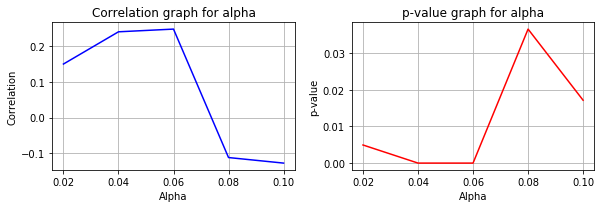

[0.26100232563012454]
[6.597456085045413e-07]


In [91]:
del model_alph

fig = plt.gcf()
fig.set_size_inches(8.5, 3)

plt.subplot(1, 2, 1)
plt.plot(alphas, correlations, 'b')
plt.xlabel('Alpha')
plt.ylabel('Correlation')
plt.title("Correlation graph for alpha")
plt.grid()

plt.subplot(1, 2, 2)
plt.plot(alphas, pvals, 'r')
plt.xlabel('Alpha')
plt.ylabel('p-value')
plt.title("p-value graph for alpha")
plt.grid()

plt.tight_layout()
plt.show()

print(correlations)
print(pvals)

### 4.2. Tuning starting 'alpha'
size = 500; window = 6; iter = 5 (default)

In [92]:
alphas = [0.005, 0.007, 0.009, 0.01, 0.02]
correlations = []
pvals = []

In [93]:
for alph in alphas:
    embeddings_path = "../resources/embeddings_alpha{}.vec".format(alph)
    
    model_alph = Word2Vec(sentences_folder, workers=5, size=500, window=6, alpha=alph)
    save_embeddings(embeddings_path, model_alph.wv)
    
    corr, p, data = score.spearman(test_data_path, embeddings_path, bn2wn_mapping_path)
    correlations.append(corr)
    pvals.append(p)

2019-05-30 20:57:16,022 : INFO : collecting all words and their counts
2019-05-30 20:57:16,088 : INFO : PROGRESS: at sentence #0, processed 0 words, keeping 0 word types
2019-05-30 20:57:16,417 : INFO : PROGRESS: at sentence #10000, processed 271423 words, keeping 15504 word types
2019-05-30 20:57:16,575 : INFO : PROGRESS: at sentence #20000, processed 547417 words, keeping 21517 word types
2019-05-30 20:57:16,743 : INFO : PROGRESS: at sentence #30000, processed 829215 words, keeping 26443 word types
2019-05-30 20:57:16,942 : INFO : PROGRESS: at sentence #40000, processed 1116115 words, keeping 30297 word types
2019-05-30 20:57:17,112 : INFO : PROGRESS: at sentence #50000, processed 1389268 words, keeping 33255 word types
2019-05-30 20:57:17,313 : INFO : PROGRESS: at sentence #60000, processed 1664025 words, keeping 36015 word types
2019-05-30 20:57:17,485 : INFO : PROGRESS: at sentence #70000, processed 1942307 words, keeping 38334 word types
2019-05-30 20:57:17,641 : INFO : PROGRESS:

2019-05-30 20:57:41,582 : INFO : PROGRESS: at sentence #1420000, processed 39372792 words, keeping 130815 word types
2019-05-30 20:57:41,821 : INFO : PROGRESS: at sentence #1430000, processed 39664039 words, keeping 131178 word types
2019-05-30 20:57:42,079 : INFO : PROGRESS: at sentence #1440000, processed 39949833 words, keeping 131524 word types
2019-05-30 20:57:42,312 : INFO : PROGRESS: at sentence #1450000, processed 40234437 words, keeping 131871 word types
2019-05-30 20:57:42,470 : INFO : PROGRESS: at sentence #1460000, processed 40515030 words, keeping 132203 word types
2019-05-30 20:57:42,629 : INFO : PROGRESS: at sentence #1470000, processed 40786039 words, keeping 132667 word types
2019-05-30 20:57:42,787 : INFO : PROGRESS: at sentence #1480000, processed 41060634 words, keeping 133013 word types
2019-05-30 20:57:42,956 : INFO : PROGRESS: at sentence #1490000, processed 41343098 words, keeping 133364 word types
2019-05-30 20:57:43,115 : INFO : PROGRESS: at sentence #1500000,

2019-05-30 20:57:53,759 : INFO : PROGRESS: at sentence #2130000, processed 59027769 words, keeping 154523 word types
2019-05-30 20:57:53,919 : INFO : PROGRESS: at sentence #2140000, processed 59306457 words, keeping 154690 word types
2019-05-30 20:57:54,065 : INFO : PROGRESS: at sentence #2150000, processed 59568224 words, keeping 154870 word types
2019-05-30 20:57:54,249 : INFO : PROGRESS: at sentence #2160000, processed 59848213 words, keeping 155047 word types
2019-05-30 20:57:54,410 : INFO : PROGRESS: at sentence #2170000, processed 60117733 words, keeping 155189 word types
2019-05-30 20:57:54,565 : INFO : PROGRESS: at sentence #2180000, processed 60396851 words, keeping 155315 word types
2019-05-30 20:57:54,776 : INFO : PROGRESS: at sentence #2190000, processed 60673507 words, keeping 155443 word types
2019-05-30 20:57:54,932 : INFO : PROGRESS: at sentence #2200000, processed 60954083 words, keeping 155565 word types
2019-05-30 20:57:55,089 : INFO : PROGRESS: at sentence #2210000,

2019-05-30 20:58:08,667 : INFO : PROGRESS: at sentence #2840000, processed 78696337 words, keeping 161287 word types
2019-05-30 20:58:08,861 : INFO : PROGRESS: at sentence #2850000, processed 78983987 words, keeping 161360 word types
2019-05-30 20:58:09,034 : INFO : PROGRESS: at sentence #2860000, processed 79270828 words, keeping 161413 word types
2019-05-30 20:58:09,188 : INFO : PROGRESS: at sentence #2870000, processed 79546764 words, keeping 161494 word types
2019-05-30 20:58:09,371 : INFO : PROGRESS: at sentence #2880000, processed 79834632 words, keeping 161552 word types
2019-05-30 20:58:09,530 : INFO : PROGRESS: at sentence #2890000, processed 80118528 words, keeping 161621 word types
2019-05-30 20:58:09,711 : INFO : PROGRESS: at sentence #2900000, processed 80388810 words, keeping 161672 word types
2019-05-30 20:58:09,905 : INFO : PROGRESS: at sentence #2910000, processed 80657780 words, keeping 161737 word types
2019-05-30 20:58:10,063 : INFO : PROGRESS: at sentence #2920000,

2019-05-30 20:58:21,998 : INFO : PROGRESS: at sentence #3550000, processed 98543778 words, keeping 164738 word types
2019-05-30 20:58:22,218 : INFO : PROGRESS: at sentence #3560000, processed 98812013 words, keeping 164761 word types
2019-05-30 20:58:22,383 : INFO : PROGRESS: at sentence #3570000, processed 99097751 words, keeping 164786 word types
2019-05-30 20:58:22,587 : INFO : PROGRESS: at sentence #3580000, processed 99378362 words, keeping 164811 word types
2019-05-30 20:58:22,736 : INFO : PROGRESS: at sentence #3590000, processed 99642763 words, keeping 164853 word types
2019-05-30 20:58:22,915 : INFO : PROGRESS: at sentence #3600000, processed 99917372 words, keeping 164905 word types
2019-05-30 20:58:23,067 : INFO : PROGRESS: at sentence #3610000, processed 100194099 words, keeping 164949 word types
2019-05-30 20:58:23,214 : INFO : PROGRESS: at sentence #3620000, processed 100462977 words, keeping 164978 word types
2019-05-30 20:58:23,380 : INFO : PROGRESS: at sentence #363000

2019-05-30 20:59:09,337 : INFO : EPOCH 1 - PROGRESS: at 15.07% examples, 280094 words/s, in_qsize 6, out_qsize 0
2019-05-30 20:59:10,374 : INFO : EPOCH 1 - PROGRESS: at 15.49% examples, 280272 words/s, in_qsize 0, out_qsize 2
2019-05-30 20:59:11,440 : INFO : EPOCH 1 - PROGRESS: at 15.89% examples, 280007 words/s, in_qsize 9, out_qsize 0
2019-05-30 20:59:12,442 : INFO : EPOCH 1 - PROGRESS: at 16.27% examples, 280013 words/s, in_qsize 9, out_qsize 0
2019-05-30 20:59:13,730 : INFO : EPOCH 1 - PROGRESS: at 16.67% examples, 278310 words/s, in_qsize 5, out_qsize 3
2019-05-30 20:59:14,748 : INFO : EPOCH 1 - PROGRESS: at 17.06% examples, 278254 words/s, in_qsize 5, out_qsize 0
2019-05-30 20:59:15,750 : INFO : EPOCH 1 - PROGRESS: at 17.45% examples, 278474 words/s, in_qsize 6, out_qsize 0
2019-05-30 20:59:16,755 : INFO : EPOCH 1 - PROGRESS: at 17.83% examples, 278487 words/s, in_qsize 7, out_qsize 0
2019-05-30 20:59:17,760 : INFO : EPOCH 1 - PROGRESS: at 18.21% examples, 278498 words/s, in_qsiz

2019-05-30 21:00:24,147 : INFO : EPOCH 1 - PROGRESS: at 43.15% examples, 276276 words/s, in_qsize 10, out_qsize 0
2019-05-30 21:00:25,148 : INFO : EPOCH 1 - PROGRESS: at 43.56% examples, 276378 words/s, in_qsize 10, out_qsize 0
2019-05-30 21:00:26,206 : INFO : EPOCH 1 - PROGRESS: at 43.97% examples, 276465 words/s, in_qsize 10, out_qsize 0
2019-05-30 21:00:27,226 : INFO : EPOCH 1 - PROGRESS: at 44.37% examples, 276469 words/s, in_qsize 10, out_qsize 0
2019-05-30 21:00:28,227 : INFO : EPOCH 1 - PROGRESS: at 44.76% examples, 276506 words/s, in_qsize 6, out_qsize 0
2019-05-30 21:00:29,240 : INFO : EPOCH 1 - PROGRESS: at 45.15% examples, 276517 words/s, in_qsize 5, out_qsize 0
2019-05-30 21:00:30,244 : INFO : EPOCH 1 - PROGRESS: at 45.54% examples, 276496 words/s, in_qsize 9, out_qsize 0
2019-05-30 21:00:31,275 : INFO : EPOCH 1 - PROGRESS: at 45.96% examples, 276605 words/s, in_qsize 8, out_qsize 0
2019-05-30 21:00:32,489 : INFO : EPOCH 1 - PROGRESS: at 46.31% examples, 275829 words/s, in_

2019-05-30 21:01:38,648 : INFO : EPOCH 1 - PROGRESS: at 71.37% examples, 275310 words/s, in_qsize 9, out_qsize 1
2019-05-30 21:01:39,680 : INFO : EPOCH 1 - PROGRESS: at 71.77% examples, 275333 words/s, in_qsize 3, out_qsize 0
2019-05-30 21:01:40,689 : INFO : EPOCH 1 - PROGRESS: at 72.14% examples, 275280 words/s, in_qsize 9, out_qsize 0
2019-05-30 21:01:41,741 : INFO : EPOCH 1 - PROGRESS: at 72.54% examples, 275308 words/s, in_qsize 10, out_qsize 0
2019-05-30 21:01:42,768 : INFO : EPOCH 1 - PROGRESS: at 72.94% examples, 275305 words/s, in_qsize 10, out_qsize 0
2019-05-30 21:01:43,798 : INFO : EPOCH 1 - PROGRESS: at 73.31% examples, 275265 words/s, in_qsize 9, out_qsize 1
2019-05-30 21:01:44,877 : INFO : EPOCH 1 - PROGRESS: at 73.72% examples, 275261 words/s, in_qsize 10, out_qsize 0
2019-05-30 21:01:45,932 : INFO : EPOCH 1 - PROGRESS: at 74.12% examples, 275247 words/s, in_qsize 10, out_qsize 0
2019-05-30 21:01:46,936 : INFO : EPOCH 1 - PROGRESS: at 74.50% examples, 275236 words/s, in_

2019-05-30 21:02:53,600 : INFO : EPOCH 1 - PROGRESS: at 99.21% examples, 273961 words/s, in_qsize 4, out_qsize 0
2019-05-30 21:02:54,642 : INFO : EPOCH 1 - PROGRESS: at 99.62% examples, 273974 words/s, in_qsize 8, out_qsize 0
2019-05-30 21:02:55,508 : INFO : worker thread finished; awaiting finish of 4 more threads
2019-05-30 21:02:55,536 : INFO : worker thread finished; awaiting finish of 3 more threads
2019-05-30 21:02:55,571 : INFO : worker thread finished; awaiting finish of 2 more threads
2019-05-30 21:02:55,581 : INFO : worker thread finished; awaiting finish of 1 more threads
2019-05-30 21:02:55,587 : INFO : worker thread finished; awaiting finish of 0 more threads
2019-05-30 21:02:55,591 : INFO : EPOCH - 1 : training on 105543949 raw words (72656299 effective words) took 265.2s, 274009 effective words/s
2019-05-30 21:02:56,603 : INFO : EPOCH 2 - PROGRESS: at 0.34% examples, 247221 words/s, in_qsize 7, out_qsize 2
2019-05-30 21:02:57,648 : INFO : EPOCH 2 - PROGRESS: at 0.74% exa

2019-05-30 21:04:04,208 : INFO : EPOCH 2 - PROGRESS: at 25.38% examples, 268295 words/s, in_qsize 6, out_qsize 0
2019-05-30 21:04:05,362 : INFO : EPOCH 2 - PROGRESS: at 25.64% examples, 266716 words/s, in_qsize 10, out_qsize 0
2019-05-30 21:04:06,378 : INFO : EPOCH 2 - PROGRESS: at 25.89% examples, 265500 words/s, in_qsize 9, out_qsize 0
2019-05-30 21:04:07,388 : INFO : EPOCH 2 - PROGRESS: at 26.19% examples, 264762 words/s, in_qsize 9, out_qsize 0
2019-05-30 21:04:08,409 : INFO : EPOCH 2 - PROGRESS: at 26.52% examples, 264272 words/s, in_qsize 9, out_qsize 0
2019-05-30 21:04:09,422 : INFO : EPOCH 2 - PROGRESS: at 26.82% examples, 263536 words/s, in_qsize 7, out_qsize 2
2019-05-30 21:04:10,436 : INFO : EPOCH 2 - PROGRESS: at 27.13% examples, 262909 words/s, in_qsize 9, out_qsize 0
2019-05-30 21:04:11,459 : INFO : EPOCH 2 - PROGRESS: at 27.47% examples, 262808 words/s, in_qsize 7, out_qsize 0
2019-05-30 21:04:12,459 : INFO : EPOCH 2 - PROGRESS: at 27.84% examples, 262876 words/s, in_qsi

2019-05-30 21:05:19,021 : INFO : EPOCH 2 - PROGRESS: at 52.92% examples, 268020 words/s, in_qsize 9, out_qsize 0
2019-05-30 21:05:20,038 : INFO : EPOCH 2 - PROGRESS: at 53.29% examples, 267936 words/s, in_qsize 9, out_qsize 0
2019-05-30 21:05:21,095 : INFO : EPOCH 2 - PROGRESS: at 53.60% examples, 267546 words/s, in_qsize 10, out_qsize 0
2019-05-30 21:05:22,102 : INFO : EPOCH 2 - PROGRESS: at 53.95% examples, 267403 words/s, in_qsize 9, out_qsize 0
2019-05-30 21:05:23,107 : INFO : EPOCH 2 - PROGRESS: at 54.31% examples, 267398 words/s, in_qsize 8, out_qsize 1
2019-05-30 21:05:24,115 : INFO : EPOCH 2 - PROGRESS: at 54.67% examples, 267341 words/s, in_qsize 9, out_qsize 0
2019-05-30 21:05:25,171 : INFO : EPOCH 2 - PROGRESS: at 55.07% examples, 267333 words/s, in_qsize 2, out_qsize 0
2019-05-30 21:05:26,196 : INFO : EPOCH 2 - PROGRESS: at 55.39% examples, 267067 words/s, in_qsize 6, out_qsize 2
2019-05-30 21:05:27,223 : INFO : EPOCH 2 - PROGRESS: at 55.76% examples, 267024 words/s, in_qsi

2019-05-30 21:06:33,898 : INFO : EPOCH 2 - PROGRESS: at 78.83% examples, 262206 words/s, in_qsize 8, out_qsize 0
2019-05-30 21:06:34,961 : INFO : EPOCH 2 - PROGRESS: at 79.18% examples, 262125 words/s, in_qsize 6, out_qsize 3
2019-05-30 21:06:35,977 : INFO : EPOCH 2 - PROGRESS: at 79.55% examples, 262129 words/s, in_qsize 9, out_qsize 1
2019-05-30 21:06:37,010 : INFO : EPOCH 2 - PROGRESS: at 79.92% examples, 262146 words/s, in_qsize 8, out_qsize 0
2019-05-30 21:06:38,029 : INFO : EPOCH 2 - PROGRESS: at 80.27% examples, 262115 words/s, in_qsize 9, out_qsize 1
2019-05-30 21:06:39,036 : INFO : EPOCH 2 - PROGRESS: at 80.64% examples, 262160 words/s, in_qsize 3, out_qsize 0
2019-05-30 21:06:40,083 : INFO : EPOCH 2 - PROGRESS: at 80.98% examples, 262097 words/s, in_qsize 9, out_qsize 1
2019-05-30 21:06:41,093 : INFO : EPOCH 2 - PROGRESS: at 81.35% examples, 262170 words/s, in_qsize 5, out_qsize 0
2019-05-30 21:06:42,145 : INFO : EPOCH 2 - PROGRESS: at 81.71% examples, 262131 words/s, in_qsiz

2019-05-30 21:07:43,948 : INFO : EPOCH 3 - PROGRESS: at 4.97% examples, 269609 words/s, in_qsize 7, out_qsize 0
2019-05-30 21:07:44,956 : INFO : EPOCH 3 - PROGRESS: at 5.35% examples, 269866 words/s, in_qsize 3, out_qsize 0
2019-05-30 21:07:45,968 : INFO : EPOCH 3 - PROGRESS: at 5.72% examples, 269503 words/s, in_qsize 9, out_qsize 0
2019-05-30 21:07:46,979 : INFO : EPOCH 3 - PROGRESS: at 6.09% examples, 269666 words/s, in_qsize 10, out_qsize 0
2019-05-30 21:07:47,981 : INFO : EPOCH 3 - PROGRESS: at 6.46% examples, 268809 words/s, in_qsize 9, out_qsize 0
2019-05-30 21:07:49,005 : INFO : EPOCH 3 - PROGRESS: at 6.85% examples, 269210 words/s, in_qsize 8, out_qsize 0
2019-05-30 21:07:50,016 : INFO : EPOCH 3 - PROGRESS: at 7.22% examples, 269008 words/s, in_qsize 10, out_qsize 0
2019-05-30 21:07:51,060 : INFO : EPOCH 3 - PROGRESS: at 7.60% examples, 269087 words/s, in_qsize 7, out_qsize 0
2019-05-30 21:07:52,090 : INFO : EPOCH 3 - PROGRESS: at 8.00% examples, 269632 words/s, in_qsize 10, o

2019-05-30 21:08:58,628 : INFO : EPOCH 3 - PROGRESS: at 32.21% examples, 266101 words/s, in_qsize 8, out_qsize 0
2019-05-30 21:08:59,652 : INFO : EPOCH 3 - PROGRESS: at 32.57% examples, 265971 words/s, in_qsize 10, out_qsize 0
2019-05-30 21:09:00,708 : INFO : EPOCH 3 - PROGRESS: at 32.95% examples, 265904 words/s, in_qsize 8, out_qsize 1
2019-05-30 21:09:01,777 : INFO : EPOCH 3 - PROGRESS: at 33.32% examples, 265722 words/s, in_qsize 7, out_qsize 0
2019-05-30 21:09:02,811 : INFO : EPOCH 3 - PROGRESS: at 33.72% examples, 265795 words/s, in_qsize 10, out_qsize 0
2019-05-30 21:09:03,830 : INFO : EPOCH 3 - PROGRESS: at 34.01% examples, 265173 words/s, in_qsize 9, out_qsize 0
2019-05-30 21:09:04,845 : INFO : EPOCH 3 - PROGRESS: at 34.31% examples, 264715 words/s, in_qsize 9, out_qsize 0
2019-05-30 21:09:05,866 : INFO : EPOCH 3 - PROGRESS: at 34.67% examples, 264632 words/s, in_qsize 6, out_qsize 3
2019-05-30 21:09:06,867 : INFO : EPOCH 3 - PROGRESS: at 35.01% examples, 264521 words/s, in_qs

2019-05-30 21:10:13,698 : INFO : EPOCH 3 - PROGRESS: at 56.27% examples, 250577 words/s, in_qsize 7, out_qsize 1
2019-05-30 21:10:14,702 : INFO : EPOCH 3 - PROGRESS: at 56.66% examples, 250728 words/s, in_qsize 9, out_qsize 0
2019-05-30 21:10:15,706 : INFO : EPOCH 3 - PROGRESS: at 57.00% examples, 250703 words/s, in_qsize 5, out_qsize 0
2019-05-30 21:10:16,748 : INFO : EPOCH 3 - PROGRESS: at 57.32% examples, 250496 words/s, in_qsize 10, out_qsize 0
2019-05-30 21:10:17,757 : INFO : EPOCH 3 - PROGRESS: at 57.64% examples, 250426 words/s, in_qsize 10, out_qsize 0
2019-05-30 21:10:18,916 : INFO : EPOCH 3 - PROGRESS: at 57.92% examples, 249924 words/s, in_qsize 8, out_qsize 1
2019-05-30 21:10:19,946 : INFO : EPOCH 3 - PROGRESS: at 58.26% examples, 249868 words/s, in_qsize 10, out_qsize 0
2019-05-30 21:10:21,009 : INFO : EPOCH 3 - PROGRESS: at 58.59% examples, 249759 words/s, in_qsize 10, out_qsize 0
2019-05-30 21:10:22,012 : INFO : EPOCH 3 - PROGRESS: at 58.95% examples, 249848 words/s, in_

2019-05-30 21:11:28,706 : INFO : EPOCH 3 - PROGRESS: at 80.44% examples, 245453 words/s, in_qsize 8, out_qsize 0
2019-05-30 21:11:29,721 : INFO : EPOCH 3 - PROGRESS: at 80.80% examples, 245528 words/s, in_qsize 9, out_qsize 0
2019-05-30 21:11:30,733 : INFO : EPOCH 3 - PROGRESS: at 81.15% examples, 245634 words/s, in_qsize 10, out_qsize 0
2019-05-30 21:11:31,741 : INFO : EPOCH 3 - PROGRESS: at 81.52% examples, 245741 words/s, in_qsize 9, out_qsize 0
2019-05-30 21:11:32,757 : INFO : EPOCH 3 - PROGRESS: at 81.82% examples, 245588 words/s, in_qsize 10, out_qsize 0
2019-05-30 21:11:33,775 : INFO : EPOCH 3 - PROGRESS: at 82.10% examples, 245376 words/s, in_qsize 2, out_qsize 0
2019-05-30 21:11:34,804 : INFO : EPOCH 3 - PROGRESS: at 82.40% examples, 245241 words/s, in_qsize 10, out_qsize 0
2019-05-30 21:11:35,822 : INFO : EPOCH 3 - PROGRESS: at 82.69% examples, 245064 words/s, in_qsize 10, out_qsize 0
2019-05-30 21:11:36,840 : INFO : EPOCH 3 - PROGRESS: at 83.02% examples, 245030 words/s, in_

2019-05-30 21:12:38,819 : INFO : EPOCH 4 - PROGRESS: at 6.17% examples, 272730 words/s, in_qsize 7, out_qsize 0
2019-05-30 21:12:39,839 : INFO : EPOCH 4 - PROGRESS: at 6.58% examples, 273443 words/s, in_qsize 9, out_qsize 0
2019-05-30 21:12:40,876 : INFO : EPOCH 4 - PROGRESS: at 7.00% examples, 274467 words/s, in_qsize 8, out_qsize 0
2019-05-30 21:12:41,887 : INFO : EPOCH 4 - PROGRESS: at 7.37% examples, 274003 words/s, in_qsize 9, out_qsize 1
2019-05-30 21:12:42,890 : INFO : EPOCH 4 - PROGRESS: at 7.76% examples, 274660 words/s, in_qsize 6, out_qsize 2
2019-05-30 21:12:43,908 : INFO : EPOCH 4 - PROGRESS: at 8.16% examples, 275064 words/s, in_qsize 10, out_qsize 0
2019-05-30 21:12:44,911 : INFO : EPOCH 4 - PROGRESS: at 8.54% examples, 275660 words/s, in_qsize 9, out_qsize 0
2019-05-30 21:12:45,998 : INFO : EPOCH 4 - PROGRESS: at 8.95% examples, 275660 words/s, in_qsize 9, out_qsize 0
2019-05-30 21:12:47,010 : INFO : EPOCH 4 - PROGRESS: at 9.32% examples, 275495 words/s, in_qsize 10, ou

2019-05-30 21:13:54,439 : INFO : EPOCH 4 - PROGRESS: at 34.78% examples, 274915 words/s, in_qsize 0, out_qsize 0
2019-05-30 21:13:55,491 : INFO : EPOCH 4 - PROGRESS: at 35.17% examples, 274828 words/s, in_qsize 10, out_qsize 0
2019-05-30 21:13:56,505 : INFO : EPOCH 4 - PROGRESS: at 35.55% examples, 274858 words/s, in_qsize 9, out_qsize 0
2019-05-30 21:13:57,514 : INFO : EPOCH 4 - PROGRESS: at 35.96% examples, 274987 words/s, in_qsize 8, out_qsize 1
2019-05-30 21:13:58,528 : INFO : EPOCH 4 - PROGRESS: at 36.36% examples, 275096 words/s, in_qsize 8, out_qsize 0
2019-05-30 21:13:59,588 : INFO : EPOCH 4 - PROGRESS: at 36.79% examples, 275124 words/s, in_qsize 9, out_qsize 1
2019-05-30 21:14:00,612 : INFO : EPOCH 4 - PROGRESS: at 37.19% examples, 275257 words/s, in_qsize 6, out_qsize 0
2019-05-30 21:14:01,636 : INFO : EPOCH 4 - PROGRESS: at 37.56% examples, 275177 words/s, in_qsize 6, out_qsize 1
2019-05-30 21:14:02,650 : INFO : EPOCH 4 - PROGRESS: at 37.94% examples, 275192 words/s, in_qsi

2019-05-30 21:15:09,095 : INFO : EPOCH 4 - PROGRESS: at 63.44% examples, 276598 words/s, in_qsize 8, out_qsize 0
2019-05-30 21:15:10,104 : INFO : EPOCH 4 - PROGRESS: at 63.86% examples, 276658 words/s, in_qsize 9, out_qsize 0
2019-05-30 21:15:11,134 : INFO : EPOCH 4 - PROGRESS: at 64.26% examples, 276657 words/s, in_qsize 9, out_qsize 0
2019-05-30 21:15:12,143 : INFO : EPOCH 4 - PROGRESS: at 64.65% examples, 276629 words/s, in_qsize 10, out_qsize 0
2019-05-30 21:15:13,173 : INFO : EPOCH 4 - PROGRESS: at 65.09% examples, 276732 words/s, in_qsize 4, out_qsize 0
2019-05-30 21:15:14,176 : INFO : EPOCH 4 - PROGRESS: at 65.48% examples, 276729 words/s, in_qsize 6, out_qsize 0
2019-05-30 21:15:15,237 : INFO : EPOCH 4 - PROGRESS: at 65.89% examples, 276737 words/s, in_qsize 7, out_qsize 1
2019-05-30 21:15:16,291 : INFO : EPOCH 4 - PROGRESS: at 66.29% examples, 276754 words/s, in_qsize 3, out_qsize 0
2019-05-30 21:15:17,294 : INFO : EPOCH 4 - PROGRESS: at 66.71% examples, 276890 words/s, in_qsi

2019-05-30 21:16:23,763 : INFO : EPOCH 4 - PROGRESS: at 90.55% examples, 272704 words/s, in_qsize 9, out_qsize 0
2019-05-30 21:16:24,799 : INFO : EPOCH 4 - PROGRESS: at 90.91% examples, 272616 words/s, in_qsize 10, out_qsize 0
2019-05-30 21:16:25,840 : INFO : EPOCH 4 - PROGRESS: at 91.26% examples, 272577 words/s, in_qsize 6, out_qsize 0
2019-05-30 21:16:26,870 : INFO : EPOCH 4 - PROGRESS: at 91.64% examples, 272576 words/s, in_qsize 5, out_qsize 0
2019-05-30 21:16:27,875 : INFO : EPOCH 4 - PROGRESS: at 91.97% examples, 272494 words/s, in_qsize 9, out_qsize 0
2019-05-30 21:16:28,907 : INFO : EPOCH 4 - PROGRESS: at 92.33% examples, 272443 words/s, in_qsize 4, out_qsize 0
2019-05-30 21:16:29,918 : INFO : EPOCH 4 - PROGRESS: at 92.69% examples, 272415 words/s, in_qsize 10, out_qsize 0
2019-05-30 21:16:30,973 : INFO : EPOCH 4 - PROGRESS: at 93.07% examples, 272360 words/s, in_qsize 8, out_qsize 0
2019-05-30 21:16:31,995 : INFO : EPOCH 4 - PROGRESS: at 93.48% examples, 272397 words/s, in_qs

2019-05-30 21:17:33,777 : INFO : EPOCH 5 - PROGRESS: at 16.39% examples, 268792 words/s, in_qsize 9, out_qsize 0
2019-05-30 21:17:34,782 : INFO : EPOCH 5 - PROGRESS: at 16.76% examples, 268715 words/s, in_qsize 6, out_qsize 0
2019-05-30 21:17:35,793 : INFO : EPOCH 5 - PROGRESS: at 17.16% examples, 269073 words/s, in_qsize 4, out_qsize 0
2019-05-30 21:17:36,812 : INFO : EPOCH 5 - PROGRESS: at 17.55% examples, 269236 words/s, in_qsize 6, out_qsize 2
2019-05-30 21:17:37,822 : INFO : EPOCH 5 - PROGRESS: at 17.92% examples, 269431 words/s, in_qsize 8, out_qsize 1
2019-05-30 21:17:38,902 : INFO : EPOCH 5 - PROGRESS: at 18.33% examples, 269639 words/s, in_qsize 6, out_qsize 0
2019-05-30 21:17:39,970 : INFO : EPOCH 5 - PROGRESS: at 18.73% examples, 269914 words/s, in_qsize 10, out_qsize 0
2019-05-30 21:17:40,975 : INFO : EPOCH 5 - PROGRESS: at 19.11% examples, 270112 words/s, in_qsize 10, out_qsize 0
2019-05-30 21:17:42,034 : INFO : EPOCH 5 - PROGRESS: at 19.51% examples, 270166 words/s, in_qs

2019-05-30 21:18:48,587 : INFO : EPOCH 5 - PROGRESS: at 44.79% examples, 274099 words/s, in_qsize 7, out_qsize 0
2019-05-30 21:18:49,603 : INFO : EPOCH 5 - PROGRESS: at 45.20% examples, 274242 words/s, in_qsize 9, out_qsize 0
2019-05-30 21:18:50,612 : INFO : EPOCH 5 - PROGRESS: at 45.60% examples, 274292 words/s, in_qsize 8, out_qsize 0
2019-05-30 21:18:51,646 : INFO : EPOCH 5 - PROGRESS: at 46.01% examples, 274351 words/s, in_qsize 9, out_qsize 0
2019-05-30 21:18:52,652 : INFO : EPOCH 5 - PROGRESS: at 46.43% examples, 274465 words/s, in_qsize 5, out_qsize 1
2019-05-30 21:18:53,680 : INFO : EPOCH 5 - PROGRESS: at 46.83% examples, 274470 words/s, in_qsize 9, out_qsize 0
2019-05-30 21:18:54,684 : INFO : EPOCH 5 - PROGRESS: at 47.23% examples, 274635 words/s, in_qsize 9, out_qsize 0
2019-05-30 21:18:55,745 : INFO : EPOCH 5 - PROGRESS: at 47.64% examples, 274673 words/s, in_qsize 9, out_qsize 0
2019-05-30 21:18:56,753 : INFO : EPOCH 5 - PROGRESS: at 48.03% examples, 274717 words/s, in_qsiz

2019-05-30 21:20:03,078 : INFO : EPOCH 5 - PROGRESS: at 73.29% examples, 275153 words/s, in_qsize 6, out_qsize 0
2019-05-30 21:20:04,097 : INFO : EPOCH 5 - PROGRESS: at 73.69% examples, 275161 words/s, in_qsize 3, out_qsize 1
2019-05-30 21:20:05,119 : INFO : EPOCH 5 - PROGRESS: at 74.11% examples, 275266 words/s, in_qsize 0, out_qsize 0
2019-05-30 21:20:06,140 : INFO : EPOCH 5 - PROGRESS: at 74.47% examples, 275195 words/s, in_qsize 8, out_qsize 1
2019-05-30 21:20:07,153 : INFO : EPOCH 5 - PROGRESS: at 74.85% examples, 275205 words/s, in_qsize 5, out_qsize 1
2019-05-30 21:20:08,205 : INFO : EPOCH 5 - PROGRESS: at 75.23% examples, 275195 words/s, in_qsize 9, out_qsize 0
2019-05-30 21:20:09,216 : INFO : EPOCH 5 - PROGRESS: at 75.63% examples, 275280 words/s, in_qsize 10, out_qsize 0
2019-05-30 21:20:10,229 : INFO : EPOCH 5 - PROGRESS: at 76.02% examples, 275297 words/s, in_qsize 5, out_qsize 0
2019-05-30 21:20:11,250 : INFO : EPOCH 5 - PROGRESS: at 76.42% examples, 275342 words/s, in_qsi

2019-05-30 21:21:14,011 : INFO : worker thread finished; awaiting finish of 1 more threads
2019-05-30 21:21:14,026 : INFO : worker thread finished; awaiting finish of 0 more threads
2019-05-30 21:21:14,028 : INFO : EPOCH - 5 : training on 105543949 raw words (72650902 effective words) took 264.3s, 274839 effective words/s
2019-05-30 21:21:14,029 : INFO : training on a 527719745 raw words (363280315 effective words) took 1363.6s, 266405 effective words/s
2019-05-30 21:21:42,655 : INFO : loading projection weights from ../resources/embeddings_alpha0.005.vec
2019-05-30 21:21:42,657 : WARNING : this function is deprecated, use smart_open.open instead
2019-05-30 21:22:16,318 : INFO : loaded (37875, 500) matrix from ../resources/embeddings_alpha0.005.vec
C:\Anaconda3\lib\site-packages\scipy\stats\stats.py:245: RuntimeWarning: The input array could not be properly checked for nan values. nan values will be ignored.
  "values. nan values will be ignored.", RuntimeWarning)
2019-05-30 21:24:29,6

2019-05-30 21:24:39,203 : INFO : PROGRESS: at sentence #630000, processed 17388265 words, keeping 94972 word types
2019-05-30 21:24:39,363 : INFO : PROGRESS: at sentence #640000, processed 17661903 words, keeping 95457 word types
2019-05-30 21:24:39,516 : INFO : PROGRESS: at sentence #650000, processed 17937822 words, keeping 95993 word types
2019-05-30 21:24:39,668 : INFO : PROGRESS: at sentence #660000, processed 18217069 words, keeping 96501 word types
2019-05-30 21:24:39,822 : INFO : PROGRESS: at sentence #670000, processed 18496782 words, keeping 97000 word types
2019-05-30 21:24:39,977 : INFO : PROGRESS: at sentence #680000, processed 18782515 words, keeping 97631 word types
2019-05-30 21:24:40,131 : INFO : PROGRESS: at sentence #690000, processed 19062773 words, keeping 98189 word types
2019-05-30 21:24:40,286 : INFO : PROGRESS: at sentence #700000, processed 19352866 words, keeping 98750 word types
2019-05-30 21:24:40,452 : INFO : PROGRESS: at sentence #710000, processed 196386

2019-05-30 21:24:50,345 : INFO : PROGRESS: at sentence #1340000, processed 37190466 words, keeping 127937 word types
2019-05-30 21:24:50,502 : INFO : PROGRESS: at sentence #1350000, processed 37469995 words, keeping 128251 word types
2019-05-30 21:24:50,655 : INFO : PROGRESS: at sentence #1360000, processed 37750760 words, keeping 128534 word types
2019-05-30 21:24:50,802 : INFO : PROGRESS: at sentence #1370000, processed 38018644 words, keeping 128990 word types
2019-05-30 21:24:50,983 : INFO : PROGRESS: at sentence #1380000, processed 38295862 words, keeping 129439 word types
2019-05-30 21:24:51,126 : INFO : PROGRESS: at sentence #1390000, processed 38556480 words, keeping 129765 word types
2019-05-30 21:24:51,270 : INFO : PROGRESS: at sentence #1400000, processed 38820466 words, keeping 130043 word types
2019-05-30 21:24:51,451 : INFO : PROGRESS: at sentence #1410000, processed 39097715 words, keeping 130342 word types
2019-05-30 21:24:51,607 : INFO : PROGRESS: at sentence #1420000,

2019-05-30 21:25:01,502 : INFO : PROGRESS: at sentence #2050000, processed 56807782 words, keeping 152906 word types
2019-05-30 21:25:01,667 : INFO : PROGRESS: at sentence #2060000, processed 57090063 words, keeping 153151 word types
2019-05-30 21:25:01,820 : INFO : PROGRESS: at sentence #2070000, processed 57367968 words, keeping 153381 word types
2019-05-30 21:25:01,981 : INFO : PROGRESS: at sentence #2080000, processed 57646469 words, keeping 153582 word types
2019-05-30 21:25:02,131 : INFO : PROGRESS: at sentence #2090000, processed 57918898 words, keeping 153789 word types
2019-05-30 21:25:02,276 : INFO : PROGRESS: at sentence #2100000, processed 58189854 words, keeping 154006 word types
2019-05-30 21:25:02,440 : INFO : PROGRESS: at sentence #2110000, processed 58470547 words, keeping 154185 word types
2019-05-30 21:25:02,588 : INFO : PROGRESS: at sentence #2120000, processed 58750021 words, keeping 154336 word types
2019-05-30 21:25:02,745 : INFO : PROGRESS: at sentence #2130000,

2019-05-30 21:25:12,707 : INFO : PROGRESS: at sentence #2760000, processed 76485348 words, keeping 160738 word types
2019-05-30 21:25:12,861 : INFO : PROGRESS: at sentence #2770000, processed 76762591 words, keeping 160812 word types
2019-05-30 21:25:13,018 : INFO : PROGRESS: at sentence #2780000, processed 77035462 words, keeping 160863 word types
2019-05-30 21:25:13,182 : INFO : PROGRESS: at sentence #2790000, processed 77311940 words, keeping 160938 word types
2019-05-30 21:25:13,362 : INFO : PROGRESS: at sentence #2800000, processed 77584415 words, keeping 161023 word types
2019-05-30 21:25:13,537 : INFO : PROGRESS: at sentence #2810000, processed 77862529 words, keeping 161098 word types
2019-05-30 21:25:13,701 : INFO : PROGRESS: at sentence #2820000, processed 78135149 words, keeping 161165 word types
2019-05-30 21:25:13,870 : INFO : PROGRESS: at sentence #2830000, processed 78415288 words, keeping 161223 word types
2019-05-30 21:25:14,033 : INFO : PROGRESS: at sentence #2840000,

2019-05-30 21:25:24,738 : INFO : PROGRESS: at sentence #3470000, processed 96269290 words, keeping 164330 word types
2019-05-30 21:25:24,893 : INFO : PROGRESS: at sentence #3480000, processed 96557334 words, keeping 164370 word types
2019-05-30 21:25:25,052 : INFO : PROGRESS: at sentence #3490000, processed 96847044 words, keeping 164438 word types
2019-05-30 21:25:25,211 : INFO : PROGRESS: at sentence #3500000, processed 97142655 words, keeping 164495 word types
2019-05-30 21:25:25,374 : INFO : PROGRESS: at sentence #3510000, processed 97430018 words, keeping 164570 word types
2019-05-30 21:25:25,530 : INFO : PROGRESS: at sentence #3520000, processed 97709229 words, keeping 164631 word types
2019-05-30 21:25:25,692 : INFO : PROGRESS: at sentence #3530000, processed 97995213 words, keeping 164673 word types
2019-05-30 21:25:25,842 : INFO : PROGRESS: at sentence #3540000, processed 98268009 words, keeping 164704 word types
2019-05-30 21:25:25,992 : INFO : PROGRESS: at sentence #3550000,

2019-05-30 21:26:04,426 : INFO : EPOCH 1 - PROGRESS: at 11.75% examples, 277203 words/s, in_qsize 10, out_qsize 0
2019-05-30 21:26:05,443 : INFO : EPOCH 1 - PROGRESS: at 12.10% examples, 276774 words/s, in_qsize 7, out_qsize 2
2019-05-30 21:26:06,461 : INFO : EPOCH 1 - PROGRESS: at 12.49% examples, 276979 words/s, in_qsize 8, out_qsize 0
2019-05-30 21:26:07,464 : INFO : EPOCH 1 - PROGRESS: at 12.87% examples, 276873 words/s, in_qsize 9, out_qsize 0
2019-05-30 21:26:08,472 : INFO : EPOCH 1 - PROGRESS: at 13.25% examples, 276736 words/s, in_qsize 4, out_qsize 1
2019-05-30 21:26:09,478 : INFO : EPOCH 1 - PROGRESS: at 13.62% examples, 276232 words/s, in_qsize 5, out_qsize 0
2019-05-30 21:26:10,573 : INFO : EPOCH 1 - PROGRESS: at 14.02% examples, 275719 words/s, in_qsize 8, out_qsize 2
2019-05-30 21:26:11,574 : INFO : EPOCH 1 - PROGRESS: at 14.41% examples, 275737 words/s, in_qsize 9, out_qsize 0
2019-05-30 21:26:12,605 : INFO : EPOCH 1 - PROGRESS: at 14.83% examples, 275836 words/s, in_qsi

2019-05-30 21:27:18,870 : INFO : EPOCH 1 - PROGRESS: at 40.60% examples, 280563 words/s, in_qsize 9, out_qsize 0
2019-05-30 21:27:19,891 : INFO : EPOCH 1 - PROGRESS: at 40.99% examples, 280586 words/s, in_qsize 3, out_qsize 0
2019-05-30 21:27:20,903 : INFO : EPOCH 1 - PROGRESS: at 41.35% examples, 280556 words/s, in_qsize 8, out_qsize 0
2019-05-30 21:27:21,909 : INFO : EPOCH 1 - PROGRESS: at 41.74% examples, 280610 words/s, in_qsize 9, out_qsize 0
2019-05-30 21:27:22,954 : INFO : EPOCH 1 - PROGRESS: at 42.13% examples, 280694 words/s, in_qsize 9, out_qsize 0
2019-05-30 21:27:23,956 : INFO : EPOCH 1 - PROGRESS: at 42.52% examples, 280761 words/s, in_qsize 5, out_qsize 0
2019-05-30 21:27:25,004 : INFO : EPOCH 1 - PROGRESS: at 42.94% examples, 280835 words/s, in_qsize 10, out_qsize 0
2019-05-30 21:27:26,024 : INFO : EPOCH 1 - PROGRESS: at 43.34% examples, 280841 words/s, in_qsize 8, out_qsize 2
2019-05-30 21:27:27,063 : INFO : EPOCH 1 - PROGRESS: at 43.75% examples, 280932 words/s, in_qsi

2019-05-30 21:28:33,550 : INFO : EPOCH 1 - PROGRESS: at 69.76% examples, 281642 words/s, in_qsize 8, out_qsize 1
2019-05-30 21:28:34,624 : INFO : EPOCH 1 - PROGRESS: at 70.19% examples, 281675 words/s, in_qsize 9, out_qsize 0
2019-05-30 21:28:35,638 : INFO : EPOCH 1 - PROGRESS: at 70.61% examples, 281772 words/s, in_qsize 4, out_qsize 0
2019-05-30 21:28:36,678 : INFO : EPOCH 1 - PROGRESS: at 71.01% examples, 281743 words/s, in_qsize 9, out_qsize 0
2019-05-30 21:28:37,731 : INFO : EPOCH 1 - PROGRESS: at 71.43% examples, 281775 words/s, in_qsize 2, out_qsize 2
2019-05-30 21:28:38,741 : INFO : EPOCH 1 - PROGRESS: at 71.83% examples, 281797 words/s, in_qsize 8, out_qsize 1
2019-05-30 21:28:39,759 : INFO : EPOCH 1 - PROGRESS: at 72.23% examples, 281805 words/s, in_qsize 9, out_qsize 0
2019-05-30 21:28:40,776 : INFO : EPOCH 1 - PROGRESS: at 72.64% examples, 281924 words/s, in_qsize 4, out_qsize 0
2019-05-30 21:28:41,780 : INFO : EPOCH 1 - PROGRESS: at 73.02% examples, 281848 words/s, in_qsiz

2019-05-30 21:29:48,445 : INFO : EPOCH 1 - PROGRESS: at 98.98% examples, 282334 words/s, in_qsize 9, out_qsize 0
2019-05-30 21:29:49,450 : INFO : EPOCH 1 - PROGRESS: at 99.37% examples, 282356 words/s, in_qsize 10, out_qsize 0
2019-05-30 21:29:50,461 : INFO : EPOCH 1 - PROGRESS: at 99.78% examples, 282374 words/s, in_qsize 7, out_qsize 2
2019-05-30 21:29:50,836 : INFO : worker thread finished; awaiting finish of 4 more threads
2019-05-30 21:29:50,848 : INFO : worker thread finished; awaiting finish of 3 more threads
2019-05-30 21:29:50,881 : INFO : worker thread finished; awaiting finish of 2 more threads
2019-05-30 21:29:50,890 : INFO : worker thread finished; awaiting finish of 1 more threads
2019-05-30 21:29:50,901 : INFO : worker thread finished; awaiting finish of 0 more threads
2019-05-30 21:29:50,903 : INFO : EPOCH - 1 : training on 105543949 raw words (72656533 effective words) took 257.2s, 282478 effective words/s
2019-05-30 21:29:51,943 : INFO : EPOCH 2 - PROGRESS: at 0.33% e

2019-05-30 21:30:58,376 : INFO : EPOCH 2 - PROGRESS: at 26.28% examples, 282609 words/s, in_qsize 5, out_qsize 0
2019-05-30 21:30:59,393 : INFO : EPOCH 2 - PROGRESS: at 26.68% examples, 282643 words/s, in_qsize 8, out_qsize 0
2019-05-30 21:31:00,423 : INFO : EPOCH 2 - PROGRESS: at 27.08% examples, 282512 words/s, in_qsize 10, out_qsize 0
2019-05-30 21:31:01,449 : INFO : EPOCH 2 - PROGRESS: at 27.46% examples, 282500 words/s, in_qsize 10, out_qsize 0
2019-05-30 21:31:02,463 : INFO : EPOCH 2 - PROGRESS: at 27.88% examples, 282733 words/s, in_qsize 8, out_qsize 0
2019-05-30 21:31:03,464 : INFO : EPOCH 2 - PROGRESS: at 28.28% examples, 282734 words/s, in_qsize 9, out_qsize 0
2019-05-30 21:31:04,491 : INFO : EPOCH 2 - PROGRESS: at 28.70% examples, 282900 words/s, in_qsize 5, out_qsize 0
2019-05-30 21:31:05,540 : INFO : EPOCH 2 - PROGRESS: at 29.10% examples, 282885 words/s, in_qsize 10, out_qsize 0
2019-05-30 21:31:06,547 : INFO : EPOCH 2 - PROGRESS: at 29.49% examples, 282834 words/s, in_q

2019-05-30 21:32:12,998 : INFO : EPOCH 2 - PROGRESS: at 54.00% examples, 275911 words/s, in_qsize 9, out_qsize 0
2019-05-30 21:32:14,005 : INFO : EPOCH 2 - PROGRESS: at 54.37% examples, 275893 words/s, in_qsize 9, out_qsize 0
2019-05-30 21:32:15,026 : INFO : EPOCH 2 - PROGRESS: at 54.71% examples, 275655 words/s, in_qsize 9, out_qsize 0
2019-05-30 21:32:16,055 : INFO : EPOCH 2 - PROGRESS: at 55.03% examples, 275258 words/s, in_qsize 10, out_qsize 1
2019-05-30 21:32:17,064 : INFO : EPOCH 2 - PROGRESS: at 55.38% examples, 275101 words/s, in_qsize 7, out_qsize 2
2019-05-30 21:32:18,084 : INFO : EPOCH 2 - PROGRESS: at 55.77% examples, 275110 words/s, in_qsize 9, out_qsize 0
2019-05-30 21:32:19,091 : INFO : EPOCH 2 - PROGRESS: at 56.13% examples, 275054 words/s, in_qsize 10, out_qsize 0
2019-05-30 21:32:20,124 : INFO : EPOCH 2 - PROGRESS: at 56.54% examples, 275048 words/s, in_qsize 9, out_qsize 0
2019-05-30 21:32:21,153 : INFO : EPOCH 2 - PROGRESS: at 56.92% examples, 275044 words/s, in_qs

2019-05-30 21:33:28,077 : INFO : EPOCH 2 - PROGRESS: at 80.40% examples, 268922 words/s, in_qsize 10, out_qsize 0
2019-05-30 21:33:29,088 : INFO : EPOCH 2 - PROGRESS: at 80.67% examples, 268555 words/s, in_qsize 10, out_qsize 0
2019-05-30 21:33:30,104 : INFO : EPOCH 2 - PROGRESS: at 80.97% examples, 268372 words/s, in_qsize 7, out_qsize 0
2019-05-30 21:33:31,145 : INFO : EPOCH 2 - PROGRESS: at 81.20% examples, 267912 words/s, in_qsize 8, out_qsize 0
2019-05-30 21:33:32,154 : INFO : EPOCH 2 - PROGRESS: at 81.46% examples, 267557 words/s, in_qsize 9, out_qsize 0
2019-05-30 21:33:33,180 : INFO : EPOCH 2 - PROGRESS: at 81.79% examples, 267400 words/s, in_qsize 5, out_qsize 0
2019-05-30 21:33:34,185 : INFO : EPOCH 2 - PROGRESS: at 82.14% examples, 267331 words/s, in_qsize 8, out_qsize 0
2019-05-30 21:33:35,287 : INFO : EPOCH 2 - PROGRESS: at 82.46% examples, 267029 words/s, in_qsize 10, out_qsize 0
2019-05-30 21:33:36,318 : INFO : EPOCH 2 - PROGRESS: at 82.79% examples, 266875 words/s, in_q

2019-05-30 21:34:38,464 : INFO : EPOCH 3 - PROGRESS: at 6.10% examples, 287564 words/s, in_qsize 9, out_qsize 0
2019-05-30 21:34:39,465 : INFO : EPOCH 3 - PROGRESS: at 6.53% examples, 288144 words/s, in_qsize 10, out_qsize 0
2019-05-30 21:34:40,475 : INFO : EPOCH 3 - PROGRESS: at 6.93% examples, 288386 words/s, in_qsize 8, out_qsize 0
2019-05-30 21:34:41,494 : INFO : EPOCH 3 - PROGRESS: at 7.33% examples, 288279 words/s, in_qsize 9, out_qsize 0
2019-05-30 21:34:42,490 : INFO : EPOCH 3 - PROGRESS: at 7.75% examples, 288960 words/s, in_qsize 9, out_qsize 0
2019-05-30 21:34:43,531 : INFO : EPOCH 3 - PROGRESS: at 8.14% examples, 288339 words/s, in_qsize 10, out_qsize 0
2019-05-30 21:34:44,583 : INFO : EPOCH 3 - PROGRESS: at 8.54% examples, 288327 words/s, in_qsize 5, out_qsize 0
2019-05-30 21:34:45,601 : INFO : EPOCH 3 - PROGRESS: at 8.95% examples, 288630 words/s, in_qsize 7, out_qsize 0
2019-05-30 21:34:46,617 : INFO : EPOCH 3 - PROGRESS: at 9.33% examples, 288417 words/s, in_qsize 8, ou

2019-05-30 21:35:53,152 : INFO : EPOCH 3 - PROGRESS: at 35.45% examples, 286275 words/s, in_qsize 8, out_qsize 1
2019-05-30 21:35:54,186 : INFO : EPOCH 3 - PROGRESS: at 35.86% examples, 286268 words/s, in_qsize 9, out_qsize 0
2019-05-30 21:35:55,216 : INFO : EPOCH 3 - PROGRESS: at 36.28% examples, 286364 words/s, in_qsize 9, out_qsize 0
2019-05-30 21:35:56,228 : INFO : EPOCH 3 - PROGRESS: at 36.72% examples, 286485 words/s, in_qsize 9, out_qsize 0
2019-05-30 21:35:57,261 : INFO : EPOCH 3 - PROGRESS: at 37.13% examples, 286470 words/s, in_qsize 9, out_qsize 0
2019-05-30 21:35:58,270 : INFO : EPOCH 3 - PROGRESS: at 37.53% examples, 286528 words/s, in_qsize 7, out_qsize 0
2019-05-30 21:35:59,310 : INFO : EPOCH 3 - PROGRESS: at 37.94% examples, 286637 words/s, in_qsize 8, out_qsize 0
2019-05-30 21:36:00,372 : INFO : EPOCH 3 - PROGRESS: at 38.33% examples, 286466 words/s, in_qsize 10, out_qsize 0
2019-05-30 21:36:01,380 : INFO : EPOCH 3 - PROGRESS: at 38.73% examples, 286477 words/s, in_qsi

2019-05-30 21:37:07,787 : INFO : EPOCH 3 - PROGRESS: at 64.96% examples, 286357 words/s, in_qsize 3, out_qsize 0
2019-05-30 21:37:08,856 : INFO : EPOCH 3 - PROGRESS: at 65.39% examples, 286342 words/s, in_qsize 4, out_qsize 1
2019-05-30 21:37:09,863 : INFO : EPOCH 3 - PROGRESS: at 65.80% examples, 286345 words/s, in_qsize 10, out_qsize 0
2019-05-30 21:37:10,867 : INFO : EPOCH 3 - PROGRESS: at 66.19% examples, 286386 words/s, in_qsize 7, out_qsize 0
2019-05-30 21:37:11,885 : INFO : EPOCH 3 - PROGRESS: at 66.59% examples, 286362 words/s, in_qsize 8, out_qsize 2
2019-05-30 21:37:12,955 : INFO : EPOCH 3 - PROGRESS: at 66.97% examples, 286164 words/s, in_qsize 10, out_qsize 0
2019-05-30 21:37:13,990 : INFO : EPOCH 3 - PROGRESS: at 67.35% examples, 286042 words/s, in_qsize 10, out_qsize 0
2019-05-30 21:37:15,005 : INFO : EPOCH 3 - PROGRESS: at 67.75% examples, 286071 words/s, in_qsize 10, out_qsize 0
2019-05-30 21:37:16,031 : INFO : EPOCH 3 - PROGRESS: at 68.15% examples, 286075 words/s, in_

2019-05-30 21:38:22,662 : INFO : EPOCH 3 - PROGRESS: at 92.45% examples, 280693 words/s, in_qsize 10, out_qsize 0
2019-05-30 21:38:23,684 : INFO : EPOCH 3 - PROGRESS: at 92.74% examples, 280417 words/s, in_qsize 10, out_qsize 0
2019-05-30 21:38:24,694 : INFO : EPOCH 3 - PROGRESS: at 93.11% examples, 280321 words/s, in_qsize 8, out_qsize 0
2019-05-30 21:38:25,725 : INFO : EPOCH 3 - PROGRESS: at 93.45% examples, 280118 words/s, in_qsize 5, out_qsize 0
2019-05-30 21:38:26,726 : INFO : EPOCH 3 - PROGRESS: at 93.81% examples, 280067 words/s, in_qsize 8, out_qsize 0
2019-05-30 21:38:27,782 : INFO : EPOCH 3 - PROGRESS: at 94.21% examples, 280041 words/s, in_qsize 10, out_qsize 0
2019-05-30 21:38:28,815 : INFO : EPOCH 3 - PROGRESS: at 94.62% examples, 280039 words/s, in_qsize 1, out_qsize 0
2019-05-30 21:38:29,815 : INFO : EPOCH 3 - PROGRESS: at 94.98% examples, 279959 words/s, in_qsize 7, out_qsize 2
2019-05-30 21:38:30,876 : INFO : EPOCH 3 - PROGRESS: at 95.39% examples, 279954 words/s, in_q

2019-05-30 21:39:33,428 : INFO : EPOCH 4 - PROGRESS: at 16.16% examples, 235460 words/s, in_qsize 7, out_qsize 0
2019-05-30 21:39:34,458 : INFO : EPOCH 4 - PROGRESS: at 16.43% examples, 234733 words/s, in_qsize 10, out_qsize 0
2019-05-30 21:39:35,477 : INFO : EPOCH 4 - PROGRESS: at 16.70% examples, 233685 words/s, in_qsize 10, out_qsize 0
2019-05-30 21:39:36,483 : INFO : EPOCH 4 - PROGRESS: at 17.00% examples, 233370 words/s, in_qsize 9, out_qsize 0
2019-05-30 21:39:37,493 : INFO : EPOCH 4 - PROGRESS: at 17.38% examples, 234104 words/s, in_qsize 9, out_qsize 0
2019-05-30 21:39:38,514 : INFO : EPOCH 4 - PROGRESS: at 17.71% examples, 234247 words/s, in_qsize 10, out_qsize 0
2019-05-30 21:39:39,529 : INFO : EPOCH 4 - PROGRESS: at 18.08% examples, 234906 words/s, in_qsize 10, out_qsize 0
2019-05-30 21:39:40,533 : INFO : EPOCH 4 - PROGRESS: at 18.44% examples, 235438 words/s, in_qsize 9, out_qsize 0
2019-05-30 21:39:41,556 : INFO : EPOCH 4 - PROGRESS: at 18.81% examples, 236019 words/s, in_

2019-05-30 21:40:48,096 : INFO : EPOCH 4 - PROGRESS: at 42.03% examples, 246177 words/s, in_qsize 9, out_qsize 0
2019-05-30 21:40:49,130 : INFO : EPOCH 4 - PROGRESS: at 42.43% examples, 246508 words/s, in_qsize 9, out_qsize 0
2019-05-30 21:40:50,156 : INFO : EPOCH 4 - PROGRESS: at 42.83% examples, 246849 words/s, in_qsize 9, out_qsize 0
2019-05-30 21:40:51,241 : INFO : EPOCH 4 - PROGRESS: at 43.25% examples, 247106 words/s, in_qsize 4, out_qsize 3
2019-05-30 21:40:52,260 : INFO : EPOCH 4 - PROGRESS: at 43.53% examples, 246692 words/s, in_qsize 2, out_qsize 0
2019-05-30 21:40:53,270 : INFO : EPOCH 4 - PROGRESS: at 43.92% examples, 246998 words/s, in_qsize 9, out_qsize 0
2019-05-30 21:40:54,315 : INFO : EPOCH 4 - PROGRESS: at 44.34% examples, 247290 words/s, in_qsize 10, out_qsize 0
2019-05-30 21:40:55,340 : INFO : EPOCH 4 - PROGRESS: at 44.75% examples, 247606 words/s, in_qsize 9, out_qsize 0
2019-05-30 21:40:56,345 : INFO : EPOCH 4 - PROGRESS: at 45.15% examples, 247904 words/s, in_qsi

2019-05-30 21:42:03,093 : INFO : EPOCH 4 - PROGRESS: at 70.42% examples, 256588 words/s, in_qsize 4, out_qsize 0
2019-05-30 21:42:04,102 : INFO : EPOCH 4 - PROGRESS: at 70.80% examples, 256669 words/s, in_qsize 5, out_qsize 1
2019-05-30 21:42:05,111 : INFO : EPOCH 4 - PROGRESS: at 71.21% examples, 256846 words/s, in_qsize 6, out_qsize 0
2019-05-30 21:42:06,161 : INFO : EPOCH 4 - PROGRESS: at 71.61% examples, 256943 words/s, in_qsize 4, out_qsize 1
2019-05-30 21:42:07,165 : INFO : EPOCH 4 - PROGRESS: at 72.02% examples, 257127 words/s, in_qsize 4, out_qsize 0
2019-05-30 21:42:08,177 : INFO : EPOCH 4 - PROGRESS: at 72.39% examples, 257165 words/s, in_qsize 9, out_qsize 0
2019-05-30 21:42:09,225 : INFO : EPOCH 4 - PROGRESS: at 72.79% examples, 257289 words/s, in_qsize 10, out_qsize 0
2019-05-30 21:42:10,246 : INFO : EPOCH 4 - PROGRESS: at 73.20% examples, 257452 words/s, in_qsize 8, out_qsize 0
2019-05-30 21:42:11,266 : INFO : EPOCH 4 - PROGRESS: at 73.57% examples, 257479 words/s, in_qsi

2019-05-30 21:43:17,823 : INFO : EPOCH 4 - PROGRESS: at 98.74% examples, 261883 words/s, in_qsize 10, out_qsize 0
2019-05-30 21:43:18,826 : INFO : EPOCH 4 - PROGRESS: at 99.14% examples, 261983 words/s, in_qsize 6, out_qsize 0
2019-05-30 21:43:19,830 : INFO : EPOCH 4 - PROGRESS: at 99.52% examples, 262027 words/s, in_qsize 10, out_qsize 0
2019-05-30 21:43:20,867 : INFO : EPOCH 4 - PROGRESS: at 99.95% examples, 262145 words/s, in_qsize 5, out_qsize 0
2019-05-30 21:43:20,909 : INFO : worker thread finished; awaiting finish of 4 more threads
2019-05-30 21:43:20,916 : INFO : worker thread finished; awaiting finish of 3 more threads
2019-05-30 21:43:20,929 : INFO : worker thread finished; awaiting finish of 2 more threads
2019-05-30 21:43:20,964 : INFO : worker thread finished; awaiting finish of 1 more threads
2019-05-30 21:43:20,980 : INFO : worker thread finished; awaiting finish of 0 more threads
2019-05-30 21:43:20,986 : INFO : EPOCH - 4 : training on 105543949 raw words (72659836 effe

2019-05-30 21:44:27,643 : INFO : EPOCH 5 - PROGRESS: at 25.85% examples, 281478 words/s, in_qsize 8, out_qsize 1
2019-05-30 21:44:28,662 : INFO : EPOCH 5 - PROGRESS: at 26.25% examples, 281532 words/s, in_qsize 7, out_qsize 2
2019-05-30 21:44:29,699 : INFO : EPOCH 5 - PROGRESS: at 26.66% examples, 281597 words/s, in_qsize 10, out_qsize 0
2019-05-30 21:44:30,766 : INFO : EPOCH 5 - PROGRESS: at 27.10% examples, 281742 words/s, in_qsize 6, out_qsize 0
2019-05-30 21:44:31,767 : INFO : EPOCH 5 - PROGRESS: at 27.50% examples, 282028 words/s, in_qsize 7, out_qsize 0
2019-05-30 21:44:32,780 : INFO : EPOCH 5 - PROGRESS: at 27.89% examples, 281974 words/s, in_qsize 9, out_qsize 0
2019-05-30 21:44:33,787 : INFO : EPOCH 5 - PROGRESS: at 28.29% examples, 281962 words/s, in_qsize 10, out_qsize 0
2019-05-30 21:44:34,841 : INFO : EPOCH 5 - PROGRESS: at 28.70% examples, 281952 words/s, in_qsize 8, out_qsize 1
2019-05-30 21:44:35,864 : INFO : EPOCH 5 - PROGRESS: at 29.11% examples, 282130 words/s, in_qs

2019-05-30 21:45:42,359 : INFO : EPOCH 5 - PROGRESS: at 54.21% examples, 278501 words/s, in_qsize 8, out_qsize 0
2019-05-30 21:45:43,399 : INFO : EPOCH 5 - PROGRESS: at 54.60% examples, 278448 words/s, in_qsize 10, out_qsize 0
2019-05-30 21:45:44,401 : INFO : EPOCH 5 - PROGRESS: at 54.96% examples, 278316 words/s, in_qsize 5, out_qsize 0
2019-05-30 21:45:45,429 : INFO : EPOCH 5 - PROGRESS: at 55.33% examples, 278193 words/s, in_qsize 9, out_qsize 0
2019-05-30 21:45:46,440 : INFO : EPOCH 5 - PROGRESS: at 55.72% examples, 278194 words/s, in_qsize 6, out_qsize 0
2019-05-30 21:45:47,440 : INFO : EPOCH 5 - PROGRESS: at 56.10% examples, 278221 words/s, in_qsize 8, out_qsize 0
2019-05-30 21:45:48,444 : INFO : EPOCH 5 - PROGRESS: at 56.48% examples, 278111 words/s, in_qsize 9, out_qsize 1
2019-05-30 21:45:49,486 : INFO : EPOCH 5 - PROGRESS: at 56.86% examples, 278013 words/s, in_qsize 6, out_qsize 0
2019-05-30 21:45:50,495 : INFO : EPOCH 5 - PROGRESS: at 57.23% examples, 277927 words/s, in_qsi

2019-05-30 21:46:56,995 : INFO : EPOCH 5 - PROGRESS: at 81.95% examples, 275726 words/s, in_qsize 4, out_qsize 0
2019-05-30 21:46:58,022 : INFO : EPOCH 5 - PROGRESS: at 82.35% examples, 275748 words/s, in_qsize 9, out_qsize 0
2019-05-30 21:46:59,023 : INFO : EPOCH 5 - PROGRESS: at 82.75% examples, 275804 words/s, in_qsize 9, out_qsize 0
2019-05-30 21:47:00,030 : INFO : EPOCH 5 - PROGRESS: at 83.14% examples, 275824 words/s, in_qsize 8, out_qsize 1
2019-05-30 21:47:01,034 : INFO : EPOCH 5 - PROGRESS: at 83.48% examples, 275660 words/s, in_qsize 10, out_qsize 0
2019-05-30 21:47:02,074 : INFO : EPOCH 5 - PROGRESS: at 83.88% examples, 275667 words/s, in_qsize 10, out_qsize 0
2019-05-30 21:47:03,124 : INFO : EPOCH 5 - PROGRESS: at 84.28% examples, 275692 words/s, in_qsize 9, out_qsize 0
2019-05-30 21:47:04,146 : INFO : EPOCH 5 - PROGRESS: at 84.67% examples, 275726 words/s, in_qsize 8, out_qsize 0
2019-05-30 21:47:05,150 : INFO : EPOCH 5 - PROGRESS: at 85.06% examples, 275780 words/s, in_qs

2019-05-30 21:51:03,312 : INFO : PROGRESS: at sentence #150000, processed 4122049 words, keeping 53186 word types
2019-05-30 21:51:03,491 : INFO : PROGRESS: at sentence #160000, processed 4404564 words, keeping 54783 word types
2019-05-30 21:51:03,649 : INFO : PROGRESS: at sentence #170000, processed 4686222 words, keeping 56334 word types
2019-05-30 21:51:03,806 : INFO : PROGRESS: at sentence #180000, processed 4958822 words, keeping 57721 word types
2019-05-30 21:51:03,962 : INFO : PROGRESS: at sentence #190000, processed 5233768 words, keeping 59204 word types
2019-05-30 21:51:04,118 : INFO : PROGRESS: at sentence #200000, processed 5507295 words, keeping 60576 word types
2019-05-30 21:51:04,275 : INFO : PROGRESS: at sentence #210000, processed 5787761 words, keeping 61830 word types
2019-05-30 21:51:04,443 : INFO : PROGRESS: at sentence #220000, processed 6064115 words, keeping 62890 word types
2019-05-30 21:51:04,598 : INFO : PROGRESS: at sentence #230000, processed 6343038 words,

2019-05-30 21:51:15,061 : INFO : PROGRESS: at sentence #870000, processed 24074491 words, keeping 107982 word types
2019-05-30 21:51:15,218 : INFO : PROGRESS: at sentence #880000, processed 24351675 words, keeping 108523 word types
2019-05-30 21:51:15,405 : INFO : PROGRESS: at sentence #890000, processed 24629462 words, keeping 109100 word types
2019-05-30 21:51:15,566 : INFO : PROGRESS: at sentence #900000, processed 24900751 words, keeping 109728 word types
2019-05-30 21:51:15,724 : INFO : PROGRESS: at sentence #910000, processed 25177763 words, keeping 110266 word types
2019-05-30 21:51:15,883 : INFO : PROGRESS: at sentence #920000, processed 25454235 words, keeping 110639 word types
2019-05-30 21:51:16,042 : INFO : PROGRESS: at sentence #930000, processed 25734028 words, keeping 111080 word types
2019-05-30 21:51:16,208 : INFO : PROGRESS: at sentence #940000, processed 26018010 words, keeping 111496 word types
2019-05-30 21:51:16,389 : INFO : PROGRESS: at sentence #950000, processe

2019-05-30 21:51:26,856 : INFO : PROGRESS: at sentence #1580000, processed 43875950 words, keeping 136906 word types
2019-05-30 21:51:27,030 : INFO : PROGRESS: at sentence #1590000, processed 44169255 words, keeping 137415 word types
2019-05-30 21:51:27,208 : INFO : PROGRESS: at sentence #1600000, processed 44461369 words, keeping 137975 word types
2019-05-30 21:51:27,388 : INFO : PROGRESS: at sentence #1610000, processed 44744137 words, keeping 138372 word types
2019-05-30 21:51:27,552 : INFO : PROGRESS: at sentence #1620000, processed 45030193 words, keeping 138736 word types
2019-05-30 21:51:27,718 : INFO : PROGRESS: at sentence #1630000, processed 45307574 words, keeping 139079 word types
2019-05-30 21:51:27,884 : INFO : PROGRESS: at sentence #1640000, processed 45585990 words, keeping 139342 word types
2019-05-30 21:51:28,039 : INFO : PROGRESS: at sentence #1650000, processed 45853071 words, keeping 139572 word types
2019-05-30 21:51:28,198 : INFO : PROGRESS: at sentence #1660000,

2019-05-30 21:51:38,587 : INFO : PROGRESS: at sentence #2290000, processed 63488250 words, keeping 156687 word types
2019-05-30 21:51:38,759 : INFO : PROGRESS: at sentence #2300000, processed 63777111 words, keeping 156787 word types
2019-05-30 21:51:38,923 : INFO : PROGRESS: at sentence #2310000, processed 64052281 words, keeping 156904 word types
2019-05-30 21:51:39,074 : INFO : PROGRESS: at sentence #2320000, processed 64313978 words, keeping 157006 word types
2019-05-30 21:51:39,227 : INFO : PROGRESS: at sentence #2330000, processed 64588682 words, keeping 157119 word types
2019-05-30 21:51:39,386 : INFO : PROGRESS: at sentence #2340000, processed 64859004 words, keeping 157218 word types
2019-05-30 21:51:39,539 : INFO : PROGRESS: at sentence #2350000, processed 65138909 words, keeping 157323 word types
2019-05-30 21:51:39,711 : INFO : PROGRESS: at sentence #2360000, processed 65431374 words, keeping 157445 word types
2019-05-30 21:51:39,874 : INFO : PROGRESS: at sentence #2370000,

2019-05-30 21:51:50,027 : INFO : PROGRESS: at sentence #3000000, processed 83135486 words, keeping 162206 word types
2019-05-30 21:51:50,194 : INFO : PROGRESS: at sentence #3010000, processed 83420466 words, keeping 162255 word types
2019-05-30 21:51:50,355 : INFO : PROGRESS: at sentence #3020000, processed 83692923 words, keeping 162295 word types
2019-05-30 21:51:50,512 : INFO : PROGRESS: at sentence #3030000, processed 83971556 words, keeping 162340 word types
2019-05-30 21:51:50,684 : INFO : PROGRESS: at sentence #3040000, processed 84255213 words, keeping 162387 word types
2019-05-30 21:51:50,857 : INFO : PROGRESS: at sentence #3050000, processed 84537942 words, keeping 162446 word types
2019-05-30 21:51:51,033 : INFO : PROGRESS: at sentence #3060000, processed 84831010 words, keeping 162501 word types
2019-05-30 21:51:51,192 : INFO : PROGRESS: at sentence #3070000, processed 85113122 words, keeping 162558 word types
2019-05-30 21:51:51,368 : INFO : PROGRESS: at sentence #3080000,

2019-05-30 21:52:01,635 : INFO : PROGRESS: at sentence #3700000, processed 102622215 words, keeping 165317 word types
2019-05-30 21:52:01,795 : INFO : PROGRESS: at sentence #3710000, processed 102898493 words, keeping 165379 word types
2019-05-30 21:52:01,967 : INFO : PROGRESS: at sentence #3720000, processed 103178021 words, keeping 165401 word types
2019-05-30 21:52:02,131 : INFO : PROGRESS: at sentence #3730000, processed 103454589 words, keeping 165426 word types
2019-05-30 21:52:02,285 : INFO : PROGRESS: at sentence #3740000, processed 103731915 words, keeping 165459 word types
2019-05-30 21:52:02,457 : INFO : PROGRESS: at sentence #3750000, processed 104009990 words, keeping 165489 word types
2019-05-30 21:52:02,609 : INFO : PROGRESS: at sentence #3760000, processed 104281244 words, keeping 165529 word types
2019-05-30 21:52:02,768 : INFO : PROGRESS: at sentence #3770000, processed 104554699 words, keeping 165549 word types
2019-05-30 21:52:02,933 : INFO : PROGRESS: at sentence #

2019-05-30 21:53:02,894 : INFO : EPOCH 1 - PROGRESS: at 20.91% examples, 273789 words/s, in_qsize 9, out_qsize 0
2019-05-30 21:53:03,945 : INFO : EPOCH 1 - PROGRESS: at 21.26% examples, 273178 words/s, in_qsize 10, out_qsize 0
2019-05-30 21:53:04,957 : INFO : EPOCH 1 - PROGRESS: at 21.60% examples, 272556 words/s, in_qsize 9, out_qsize 0
2019-05-30 21:53:05,969 : INFO : EPOCH 1 - PROGRESS: at 21.93% examples, 271954 words/s, in_qsize 9, out_qsize 0
2019-05-30 21:53:06,976 : INFO : EPOCH 1 - PROGRESS: at 22.27% examples, 271393 words/s, in_qsize 7, out_qsize 2
2019-05-30 21:53:07,982 : INFO : EPOCH 1 - PROGRESS: at 22.65% examples, 271638 words/s, in_qsize 6, out_qsize 0
2019-05-30 21:53:08,987 : INFO : EPOCH 1 - PROGRESS: at 23.02% examples, 271449 words/s, in_qsize 8, out_qsize 0
2019-05-30 21:53:09,998 : INFO : EPOCH 1 - PROGRESS: at 23.40% examples, 271576 words/s, in_qsize 5, out_qsize 1
2019-05-30 21:53:11,020 : INFO : EPOCH 1 - PROGRESS: at 23.77% examples, 271330 words/s, in_qsi

2019-05-30 21:54:17,790 : INFO : EPOCH 1 - PROGRESS: at 48.18% examples, 268834 words/s, in_qsize 9, out_qsize 0
2019-05-30 21:54:18,818 : INFO : EPOCH 1 - PROGRESS: at 48.59% examples, 269039 words/s, in_qsize 8, out_qsize 0
2019-05-30 21:54:19,835 : INFO : EPOCH 1 - PROGRESS: at 48.98% examples, 269056 words/s, in_qsize 9, out_qsize 0
2019-05-30 21:54:20,868 : INFO : EPOCH 1 - PROGRESS: at 49.36% examples, 269091 words/s, in_qsize 9, out_qsize 0
2019-05-30 21:54:21,916 : INFO : EPOCH 1 - PROGRESS: at 49.77% examples, 269155 words/s, in_qsize 7, out_qsize 0
2019-05-30 21:54:22,918 : INFO : EPOCH 1 - PROGRESS: at 50.17% examples, 269256 words/s, in_qsize 9, out_qsize 0
2019-05-30 21:54:23,966 : INFO : EPOCH 1 - PROGRESS: at 50.57% examples, 269257 words/s, in_qsize 7, out_qsize 2
2019-05-30 21:54:24,985 : INFO : EPOCH 1 - PROGRESS: at 50.97% examples, 269460 words/s, in_qsize 6, out_qsize 0
2019-05-30 21:54:25,988 : INFO : EPOCH 1 - PROGRESS: at 51.34% examples, 269442 words/s, in_qsiz

2019-05-30 21:55:33,280 : INFO : EPOCH 1 - PROGRESS: at 76.67% examples, 270598 words/s, in_qsize 10, out_qsize 0
2019-05-30 21:55:34,341 : INFO : EPOCH 1 - PROGRESS: at 77.07% examples, 270609 words/s, in_qsize 4, out_qsize 0
2019-05-30 21:55:35,366 : INFO : EPOCH 1 - PROGRESS: at 77.46% examples, 270698 words/s, in_qsize 0, out_qsize 1
2019-05-30 21:55:36,411 : INFO : EPOCH 1 - PROGRESS: at 77.83% examples, 270627 words/s, in_qsize 4, out_qsize 0
2019-05-30 21:55:37,415 : INFO : EPOCH 1 - PROGRESS: at 78.24% examples, 270711 words/s, in_qsize 8, out_qsize 0
2019-05-30 21:55:38,435 : INFO : EPOCH 1 - PROGRESS: at 78.63% examples, 270710 words/s, in_qsize 9, out_qsize 0
2019-05-30 21:55:39,436 : INFO : EPOCH 1 - PROGRESS: at 78.98% examples, 270662 words/s, in_qsize 8, out_qsize 2
2019-05-30 21:55:40,528 : INFO : EPOCH 1 - PROGRESS: at 79.37% examples, 270592 words/s, in_qsize 9, out_qsize 1
2019-05-30 21:55:41,538 : INFO : EPOCH 1 - PROGRESS: at 79.73% examples, 270568 words/s, in_qsi

2019-05-30 21:56:43,077 : INFO : EPOCH 2 - PROGRESS: at 2.17% examples, 260280 words/s, in_qsize 7, out_qsize 0
2019-05-30 21:56:44,085 : INFO : EPOCH 2 - PROGRESS: at 2.53% examples, 260015 words/s, in_qsize 9, out_qsize 0
2019-05-30 21:56:45,119 : INFO : EPOCH 2 - PROGRESS: at 2.92% examples, 261483 words/s, in_qsize 9, out_qsize 0
2019-05-30 21:56:46,121 : INFO : EPOCH 2 - PROGRESS: at 3.32% examples, 263592 words/s, in_qsize 10, out_qsize 0
2019-05-30 21:56:47,123 : INFO : EPOCH 2 - PROGRESS: at 3.71% examples, 264719 words/s, in_qsize 9, out_qsize 0
2019-05-30 21:56:48,148 : INFO : EPOCH 2 - PROGRESS: at 4.10% examples, 265673 words/s, in_qsize 9, out_qsize 0
2019-05-30 21:56:49,166 : INFO : EPOCH 2 - PROGRESS: at 4.50% examples, 267785 words/s, in_qsize 0, out_qsize 0
2019-05-30 21:56:50,193 : INFO : EPOCH 2 - PROGRESS: at 4.89% examples, 268221 words/s, in_qsize 10, out_qsize 0
2019-05-30 21:56:51,198 : INFO : EPOCH 2 - PROGRESS: at 5.27% examples, 268615 words/s, in_qsize 6, ou

2019-05-30 21:57:58,009 : INFO : EPOCH 2 - PROGRESS: at 30.30% examples, 271607 words/s, in_qsize 8, out_qsize 0
2019-05-30 21:57:59,053 : INFO : EPOCH 2 - PROGRESS: at 30.67% examples, 271574 words/s, in_qsize 10, out_qsize 0
2019-05-30 21:58:00,059 : INFO : EPOCH 2 - PROGRESS: at 31.05% examples, 271746 words/s, in_qsize 8, out_qsize 1
2019-05-30 21:58:01,065 : INFO : EPOCH 2 - PROGRESS: at 31.41% examples, 271752 words/s, in_qsize 6, out_qsize 1
2019-05-30 21:58:02,069 : INFO : EPOCH 2 - PROGRESS: at 31.81% examples, 271922 words/s, in_qsize 3, out_qsize 0
2019-05-30 21:58:03,154 : INFO : EPOCH 2 - PROGRESS: at 32.17% examples, 271518 words/s, in_qsize 4, out_qsize 0
2019-05-30 21:58:04,230 : INFO : EPOCH 2 - PROGRESS: at 32.53% examples, 271155 words/s, in_qsize 8, out_qsize 0
2019-05-30 21:58:05,253 : INFO : EPOCH 2 - PROGRESS: at 32.90% examples, 271052 words/s, in_qsize 9, out_qsize 1
2019-05-30 21:58:06,283 : INFO : EPOCH 2 - PROGRESS: at 33.29% examples, 271004 words/s, in_qsi

2019-05-30 21:59:12,798 : INFO : EPOCH 2 - PROGRESS: at 57.56% examples, 268284 words/s, in_qsize 9, out_qsize 0
2019-05-30 21:59:13,799 : INFO : EPOCH 2 - PROGRESS: at 57.89% examples, 268147 words/s, in_qsize 7, out_qsize 0
2019-05-30 21:59:14,829 : INFO : EPOCH 2 - PROGRESS: at 58.26% examples, 268099 words/s, in_qsize 9, out_qsize 0
2019-05-30 21:59:15,838 : INFO : EPOCH 2 - PROGRESS: at 58.62% examples, 268080 words/s, in_qsize 8, out_qsize 0
2019-05-30 21:59:16,850 : INFO : EPOCH 2 - PROGRESS: at 58.97% examples, 268003 words/s, in_qsize 9, out_qsize 0
2019-05-30 21:59:17,857 : INFO : EPOCH 2 - PROGRESS: at 59.33% examples, 267994 words/s, in_qsize 10, out_qsize 0
2019-05-30 21:59:18,874 : INFO : EPOCH 2 - PROGRESS: at 59.69% examples, 267972 words/s, in_qsize 5, out_qsize 0
2019-05-30 21:59:19,899 : INFO : EPOCH 2 - PROGRESS: at 60.09% examples, 268053 words/s, in_qsize 5, out_qsize 0
2019-05-30 21:59:20,908 : INFO : EPOCH 2 - PROGRESS: at 60.43% examples, 267946 words/s, in_qsi

2019-05-30 22:00:27,906 : INFO : EPOCH 2 - PROGRESS: at 83.58% examples, 263009 words/s, in_qsize 10, out_qsize 0
2019-05-30 22:00:28,920 : INFO : EPOCH 2 - PROGRESS: at 83.94% examples, 262982 words/s, in_qsize 9, out_qsize 0
2019-05-30 22:00:29,933 : INFO : EPOCH 2 - PROGRESS: at 84.29% examples, 262958 words/s, in_qsize 10, out_qsize 0
2019-05-30 22:00:30,939 : INFO : EPOCH 2 - PROGRESS: at 84.63% examples, 262915 words/s, in_qsize 9, out_qsize 0
2019-05-30 22:00:31,968 : INFO : EPOCH 2 - PROGRESS: at 84.99% examples, 262905 words/s, in_qsize 8, out_qsize 0
2019-05-30 22:00:33,000 : INFO : EPOCH 2 - PROGRESS: at 85.32% examples, 262775 words/s, in_qsize 10, out_qsize 0
2019-05-30 22:00:34,036 : INFO : EPOCH 2 - PROGRESS: at 85.67% examples, 262696 words/s, in_qsize 9, out_qsize 0
2019-05-30 22:00:35,069 : INFO : EPOCH 2 - PROGRESS: at 86.04% examples, 262660 words/s, in_qsize 6, out_qsize 0
2019-05-30 22:00:36,090 : INFO : EPOCH 2 - PROGRESS: at 86.41% examples, 262662 words/s, in_q

2019-05-30 22:01:37,846 : INFO : EPOCH 3 - PROGRESS: at 9.00% examples, 264891 words/s, in_qsize 10, out_qsize 0
2019-05-30 22:01:38,860 : INFO : EPOCH 3 - PROGRESS: at 9.35% examples, 264633 words/s, in_qsize 9, out_qsize 0
2019-05-30 22:01:39,878 : INFO : EPOCH 3 - PROGRESS: at 9.73% examples, 264637 words/s, in_qsize 8, out_qsize 1
2019-05-30 22:01:40,885 : INFO : EPOCH 3 - PROGRESS: at 10.09% examples, 264652 words/s, in_qsize 8, out_qsize 1
2019-05-30 22:01:41,910 : INFO : EPOCH 3 - PROGRESS: at 10.46% examples, 264723 words/s, in_qsize 9, out_qsize 0
2019-05-30 22:01:42,940 : INFO : EPOCH 3 - PROGRESS: at 10.85% examples, 265146 words/s, in_qsize 9, out_qsize 0
2019-05-30 22:01:43,931 : INFO : EPOCH 3 - PROGRESS: at 11.24% examples, 265227 words/s, in_qsize 6, out_qsize 0
2019-05-30 22:01:44,984 : INFO : EPOCH 3 - PROGRESS: at 11.63% examples, 265269 words/s, in_qsize 9, out_qsize 0
2019-05-30 22:01:46,012 : INFO : EPOCH 3 - PROGRESS: at 12.00% examples, 265538 words/s, in_qsize 

2019-05-30 22:02:52,865 : INFO : EPOCH 3 - PROGRESS: at 36.52% examples, 266272 words/s, in_qsize 7, out_qsize 0
2019-05-30 22:02:53,916 : INFO : EPOCH 3 - PROGRESS: at 36.88% examples, 266003 words/s, in_qsize 9, out_qsize 0
2019-05-30 22:02:54,937 : INFO : EPOCH 3 - PROGRESS: at 37.23% examples, 265759 words/s, in_qsize 4, out_qsize 2
2019-05-30 22:02:55,955 : INFO : EPOCH 3 - PROGRESS: at 37.57% examples, 265659 words/s, in_qsize 5, out_qsize 0
2019-05-30 22:02:56,976 : INFO : EPOCH 3 - PROGRESS: at 37.95% examples, 265748 words/s, in_qsize 8, out_qsize 0
2019-05-30 22:02:58,009 : INFO : EPOCH 3 - PROGRESS: at 38.34% examples, 265876 words/s, in_qsize 10, out_qsize 0
2019-05-30 22:02:59,013 : INFO : EPOCH 3 - PROGRESS: at 38.73% examples, 266030 words/s, in_qsize 9, out_qsize 0
2019-05-30 22:03:00,028 : INFO : EPOCH 3 - PROGRESS: at 39.12% examples, 266142 words/s, in_qsize 2, out_qsize 0
2019-05-30 22:03:01,031 : INFO : EPOCH 3 - PROGRESS: at 39.47% examples, 266091 words/s, in_qsi

2019-05-30 22:04:07,659 : INFO : EPOCH 3 - PROGRESS: at 63.67% examples, 265105 words/s, in_qsize 8, out_qsize 0
2019-05-30 22:04:08,676 : INFO : EPOCH 3 - PROGRESS: at 64.05% examples, 265067 words/s, in_qsize 6, out_qsize 0
2019-05-30 22:04:09,678 : INFO : EPOCH 3 - PROGRESS: at 64.44% examples, 265166 words/s, in_qsize 9, out_qsize 0
2019-05-30 22:04:10,735 : INFO : EPOCH 3 - PROGRESS: at 64.88% examples, 265287 words/s, in_qsize 5, out_qsize 0
2019-05-30 22:04:11,758 : INFO : EPOCH 3 - PROGRESS: at 65.27% examples, 265275 words/s, in_qsize 7, out_qsize 0
2019-05-30 22:04:12,758 : INFO : EPOCH 3 - PROGRESS: at 65.66% examples, 265336 words/s, in_qsize 6, out_qsize 2
2019-05-30 22:04:13,780 : INFO : EPOCH 3 - PROGRESS: at 66.05% examples, 265423 words/s, in_qsize 7, out_qsize 0
2019-05-30 22:04:14,851 : INFO : EPOCH 3 - PROGRESS: at 66.44% examples, 265443 words/s, in_qsize 9, out_qsize 0
2019-05-30 22:04:15,868 : INFO : EPOCH 3 - PROGRESS: at 66.83% examples, 265500 words/s, in_qsiz

2019-05-30 22:05:22,501 : INFO : EPOCH 3 - PROGRESS: at 90.30% examples, 263216 words/s, in_qsize 9, out_qsize 0
2019-05-30 22:05:23,510 : INFO : EPOCH 3 - PROGRESS: at 90.65% examples, 263174 words/s, in_qsize 9, out_qsize 1
2019-05-30 22:05:24,521 : INFO : EPOCH 3 - PROGRESS: at 91.04% examples, 263289 words/s, in_qsize 5, out_qsize 0
2019-05-30 22:05:25,535 : INFO : EPOCH 3 - PROGRESS: at 91.41% examples, 263344 words/s, in_qsize 9, out_qsize 0
2019-05-30 22:05:26,576 : INFO : EPOCH 3 - PROGRESS: at 91.77% examples, 263344 words/s, in_qsize 4, out_qsize 1
2019-05-30 22:05:27,641 : INFO : EPOCH 3 - PROGRESS: at 92.13% examples, 263296 words/s, in_qsize 9, out_qsize 0
2019-05-30 22:05:28,669 : INFO : EPOCH 3 - PROGRESS: at 92.49% examples, 263287 words/s, in_qsize 9, out_qsize 0
2019-05-30 22:05:29,679 : INFO : EPOCH 3 - PROGRESS: at 92.84% examples, 263272 words/s, in_qsize 7, out_qsize 2
2019-05-30 22:05:30,690 : INFO : EPOCH 3 - PROGRESS: at 93.24% examples, 263353 words/s, in_qsiz

2019-05-30 22:06:33,223 : INFO : EPOCH 4 - PROGRESS: at 17.14% examples, 280180 words/s, in_qsize 0, out_qsize 0
2019-05-30 22:06:34,228 : INFO : EPOCH 4 - PROGRESS: at 17.52% examples, 280037 words/s, in_qsize 9, out_qsize 0
2019-05-30 22:06:35,302 : INFO : EPOCH 4 - PROGRESS: at 17.92% examples, 280051 words/s, in_qsize 7, out_qsize 1
2019-05-30 22:06:36,320 : INFO : EPOCH 4 - PROGRESS: at 18.32% examples, 280237 words/s, in_qsize 10, out_qsize 0
2019-05-30 22:06:37,333 : INFO : EPOCH 4 - PROGRESS: at 18.69% examples, 280036 words/s, in_qsize 6, out_qsize 3
2019-05-30 22:06:38,726 : INFO : EPOCH 4 - PROGRESS: at 19.08% examples, 278138 words/s, in_qsize 7, out_qsize 2
2019-05-30 22:06:39,748 : INFO : EPOCH 4 - PROGRESS: at 19.46% examples, 277956 words/s, in_qsize 1, out_qsize 3
2019-05-30 22:06:40,755 : INFO : EPOCH 4 - PROGRESS: at 19.86% examples, 278091 words/s, in_qsize 8, out_qsize 0
2019-05-30 22:06:41,760 : INFO : EPOCH 4 - PROGRESS: at 20.24% examples, 278114 words/s, in_qsi

2019-05-30 22:07:48,355 : INFO : EPOCH 4 - PROGRESS: at 45.75% examples, 278803 words/s, in_qsize 10, out_qsize 0
2019-05-30 22:07:49,389 : INFO : EPOCH 4 - PROGRESS: at 46.16% examples, 278821 words/s, in_qsize 10, out_qsize 0
2019-05-30 22:07:50,431 : INFO : EPOCH 4 - PROGRESS: at 46.58% examples, 278822 words/s, in_qsize 10, out_qsize 0
2019-05-30 22:07:51,451 : INFO : EPOCH 4 - PROGRESS: at 46.98% examples, 278805 words/s, in_qsize 9, out_qsize 0
2019-05-30 22:07:52,475 : INFO : EPOCH 4 - PROGRESS: at 47.38% examples, 278836 words/s, in_qsize 9, out_qsize 0
2019-05-30 22:07:53,485 : INFO : EPOCH 4 - PROGRESS: at 47.76% examples, 278783 words/s, in_qsize 4, out_qsize 0
2019-05-30 22:07:54,486 : INFO : EPOCH 4 - PROGRESS: at 48.10% examples, 278586 words/s, in_qsize 6, out_qsize 0
2019-05-30 22:07:55,528 : INFO : EPOCH 4 - PROGRESS: at 48.47% examples, 278419 words/s, in_qsize 5, out_qsize 1
2019-05-30 22:07:56,562 : INFO : EPOCH 4 - PROGRESS: at 48.77% examples, 277836 words/s, in_q

2019-05-30 22:09:02,915 : INFO : EPOCH 4 - PROGRESS: at 74.05% examples, 277195 words/s, in_qsize 7, out_qsize 2
2019-05-30 22:09:03,980 : INFO : EPOCH 4 - PROGRESS: at 74.45% examples, 277192 words/s, in_qsize 9, out_qsize 0
2019-05-30 22:09:05,005 : INFO : EPOCH 4 - PROGRESS: at 74.82% examples, 277140 words/s, in_qsize 9, out_qsize 0
2019-05-30 22:09:06,008 : INFO : EPOCH 4 - PROGRESS: at 75.20% examples, 277155 words/s, in_qsize 6, out_qsize 0
2019-05-30 22:09:07,009 : INFO : EPOCH 4 - PROGRESS: at 75.56% examples, 277105 words/s, in_qsize 7, out_qsize 1
2019-05-30 22:09:08,013 : INFO : EPOCH 4 - PROGRESS: at 75.92% examples, 277053 words/s, in_qsize 7, out_qsize 0
2019-05-30 22:09:09,017 : INFO : EPOCH 4 - PROGRESS: at 76.28% examples, 276944 words/s, in_qsize 8, out_qsize 1
2019-05-30 22:09:10,069 : INFO : EPOCH 4 - PROGRESS: at 76.68% examples, 276937 words/s, in_qsize 7, out_qsize 0
2019-05-30 22:09:11,080 : INFO : EPOCH 4 - PROGRESS: at 77.09% examples, 276983 words/s, in_qsiz

2019-05-30 22:10:14,992 : INFO : worker thread finished; awaiting finish of 2 more threads
2019-05-30 22:10:15,011 : INFO : worker thread finished; awaiting finish of 1 more threads
2019-05-30 22:10:15,018 : INFO : worker thread finished; awaiting finish of 0 more threads
2019-05-30 22:10:15,021 : INFO : EPOCH - 4 : training on 105543949 raw words (72655541 effective words) took 266.0s, 273117 effective words/s
2019-05-30 22:10:16,090 : INFO : EPOCH 5 - PROGRESS: at 0.36% examples, 246859 words/s, in_qsize 4, out_qsize 0
2019-05-30 22:10:17,140 : INFO : EPOCH 5 - PROGRESS: at 0.77% examples, 263823 words/s, in_qsize 8, out_qsize 0
2019-05-30 22:10:18,152 : INFO : EPOCH 5 - PROGRESS: at 1.14% examples, 266363 words/s, in_qsize 6, out_qsize 0
2019-05-30 22:10:19,194 : INFO : EPOCH 5 - PROGRESS: at 1.54% examples, 268958 words/s, in_qsize 10, out_qsize 0
2019-05-30 22:10:20,200 : INFO : EPOCH 5 - PROGRESS: at 1.94% examples, 272235 words/s, in_qsize 9, out_qsize 0
2019-05-30 22:10:21,212 

2019-05-30 22:11:27,097 : INFO : EPOCH 5 - PROGRESS: at 27.20% examples, 273784 words/s, in_qsize 4, out_qsize 2
2019-05-30 22:11:28,124 : INFO : EPOCH 5 - PROGRESS: at 27.57% examples, 273789 words/s, in_qsize 10, out_qsize 0
2019-05-30 22:11:29,130 : INFO : EPOCH 5 - PROGRESS: at 27.97% examples, 273872 words/s, in_qsize 9, out_qsize 0
2019-05-30 22:11:30,133 : INFO : EPOCH 5 - PROGRESS: at 28.39% examples, 274182 words/s, in_qsize 7, out_qsize 0
2019-05-30 22:11:31,144 : INFO : EPOCH 5 - PROGRESS: at 28.77% examples, 274150 words/s, in_qsize 7, out_qsize 0
2019-05-30 22:11:32,150 : INFO : EPOCH 5 - PROGRESS: at 29.15% examples, 274220 words/s, in_qsize 7, out_qsize 0
2019-05-30 22:11:33,179 : INFO : EPOCH 5 - PROGRESS: at 29.56% examples, 274387 words/s, in_qsize 7, out_qsize 1
2019-05-30 22:11:34,183 : INFO : EPOCH 5 - PROGRESS: at 29.95% examples, 274545 words/s, in_qsize 9, out_qsize 0
2019-05-30 22:11:35,259 : INFO : EPOCH 5 - PROGRESS: at 30.34% examples, 274532 words/s, in_qsi

2019-05-30 22:12:42,119 : INFO : EPOCH 5 - PROGRESS: at 55.82% examples, 275514 words/s, in_qsize 8, out_qsize 0
2019-05-30 22:12:43,130 : INFO : EPOCH 5 - PROGRESS: at 56.22% examples, 275631 words/s, in_qsize 4, out_qsize 0
2019-05-30 22:12:44,178 : INFO : EPOCH 5 - PROGRESS: at 56.64% examples, 275690 words/s, in_qsize 9, out_qsize 1
2019-05-30 22:12:45,198 : INFO : EPOCH 5 - PROGRESS: at 57.05% examples, 275785 words/s, in_qsize 1, out_qsize 0
2019-05-30 22:12:46,226 : INFO : EPOCH 5 - PROGRESS: at 57.44% examples, 275774 words/s, in_qsize 6, out_qsize 0
2019-05-30 22:12:47,228 : INFO : EPOCH 5 - PROGRESS: at 57.80% examples, 275720 words/s, in_qsize 5, out_qsize 0
2019-05-30 22:12:48,276 : INFO : EPOCH 5 - PROGRESS: at 58.21% examples, 275806 words/s, in_qsize 9, out_qsize 0
2019-05-30 22:12:49,342 : INFO : EPOCH 5 - PROGRESS: at 58.62% examples, 275857 words/s, in_qsize 10, out_qsize 0
2019-05-30 22:12:50,406 : INFO : EPOCH 5 - PROGRESS: at 59.02% examples, 275901 words/s, in_qsi

2019-05-30 22:13:57,155 : INFO : EPOCH 5 - PROGRESS: at 84.03% examples, 274843 words/s, in_qsize 9, out_qsize 0
2019-05-30 22:13:58,182 : INFO : EPOCH 5 - PROGRESS: at 84.40% examples, 274839 words/s, in_qsize 9, out_qsize 0
2019-05-30 22:13:59,192 : INFO : EPOCH 5 - PROGRESS: at 84.80% examples, 274923 words/s, in_qsize 5, out_qsize 0
2019-05-30 22:14:00,205 : INFO : EPOCH 5 - PROGRESS: at 85.13% examples, 274753 words/s, in_qsize 10, out_qsize 0
2019-05-30 22:14:01,228 : INFO : EPOCH 5 - PROGRESS: at 85.48% examples, 274632 words/s, in_qsize 9, out_qsize 0
2019-05-30 22:14:02,257 : INFO : EPOCH 5 - PROGRESS: at 85.83% examples, 274508 words/s, in_qsize 10, out_qsize 0
2019-05-30 22:14:03,284 : INFO : EPOCH 5 - PROGRESS: at 86.21% examples, 274455 words/s, in_qsize 9, out_qsize 0
2019-05-30 22:14:04,311 : INFO : EPOCH 5 - PROGRESS: at 86.60% examples, 274419 words/s, in_qsize 0, out_qsize 0
2019-05-30 22:14:05,327 : INFO : EPOCH 5 - PROGRESS: at 86.97% examples, 274339 words/s, in_qs

2019-05-30 22:17:58,070 : INFO : PROGRESS: at sentence #180000, processed 4958822 words, keeping 57721 word types
2019-05-30 22:17:58,219 : INFO : PROGRESS: at sentence #190000, processed 5233768 words, keeping 59204 word types
2019-05-30 22:17:58,366 : INFO : PROGRESS: at sentence #200000, processed 5507295 words, keeping 60576 word types
2019-05-30 22:17:58,522 : INFO : PROGRESS: at sentence #210000, processed 5787761 words, keeping 61830 word types
2019-05-30 22:17:58,668 : INFO : PROGRESS: at sentence #220000, processed 6064115 words, keeping 62890 word types
2019-05-30 22:17:58,820 : INFO : PROGRESS: at sentence #230000, processed 6343038 words, keeping 64162 word types
2019-05-30 22:17:58,968 : INFO : PROGRESS: at sentence #240000, processed 6614991 words, keeping 65149 word types
2019-05-30 22:17:59,113 : INFO : PROGRESS: at sentence #250000, processed 6882662 words, keeping 66321 word types
2019-05-30 22:17:59,263 : INFO : PROGRESS: at sentence #260000, processed 7161547 words,

2019-05-30 22:18:09,564 : INFO : PROGRESS: at sentence #900000, processed 24900751 words, keeping 109728 word types
2019-05-30 22:18:09,717 : INFO : PROGRESS: at sentence #910000, processed 25177763 words, keeping 110266 word types
2019-05-30 22:18:09,881 : INFO : PROGRESS: at sentence #920000, processed 25454235 words, keeping 110639 word types
2019-05-30 22:18:10,032 : INFO : PROGRESS: at sentence #930000, processed 25734028 words, keeping 111080 word types
2019-05-30 22:18:10,187 : INFO : PROGRESS: at sentence #940000, processed 26018010 words, keeping 111496 word types
2019-05-30 22:18:10,343 : INFO : PROGRESS: at sentence #950000, processed 26305062 words, keeping 112026 word types
2019-05-30 22:18:10,509 : INFO : PROGRESS: at sentence #960000, processed 26587528 words, keeping 112466 word types
2019-05-30 22:18:10,661 : INFO : PROGRESS: at sentence #970000, processed 26864004 words, keeping 112933 word types
2019-05-30 22:18:10,818 : INFO : PROGRESS: at sentence #980000, processe

2019-05-30 22:18:20,620 : INFO : PROGRESS: at sentence #1610000, processed 44744137 words, keeping 138372 word types
2019-05-30 22:18:20,779 : INFO : PROGRESS: at sentence #1620000, processed 45030193 words, keeping 138736 word types
2019-05-30 22:18:20,939 : INFO : PROGRESS: at sentence #1630000, processed 45307574 words, keeping 139079 word types
2019-05-30 22:18:21,088 : INFO : PROGRESS: at sentence #1640000, processed 45585990 words, keeping 139342 word types
2019-05-30 22:18:21,242 : INFO : PROGRESS: at sentence #1650000, processed 45853071 words, keeping 139572 word types
2019-05-30 22:18:21,402 : INFO : PROGRESS: at sentence #1660000, processed 46128689 words, keeping 139820 word types
2019-05-30 22:18:21,559 : INFO : PROGRESS: at sentence #1670000, processed 46414687 words, keeping 140116 word types
2019-05-30 22:18:21,708 : INFO : PROGRESS: at sentence #1680000, processed 46688388 words, keeping 140362 word types
2019-05-30 22:18:21,875 : INFO : PROGRESS: at sentence #1690000,

2019-05-30 22:18:34,098 : INFO : PROGRESS: at sentence #2320000, processed 64313978 words, keeping 157006 word types
2019-05-30 22:18:34,270 : INFO : PROGRESS: at sentence #2330000, processed 64588682 words, keeping 157119 word types
2019-05-30 22:18:34,459 : INFO : PROGRESS: at sentence #2340000, processed 64859004 words, keeping 157218 word types
2019-05-30 22:18:34,648 : INFO : PROGRESS: at sentence #2350000, processed 65138909 words, keeping 157323 word types
2019-05-30 22:18:34,872 : INFO : PROGRESS: at sentence #2360000, processed 65431374 words, keeping 157445 word types
2019-05-30 22:18:35,069 : INFO : PROGRESS: at sentence #2370000, processed 65719439 words, keeping 157585 word types
2019-05-30 22:18:35,245 : INFO : PROGRESS: at sentence #2380000, processed 65993494 words, keeping 157706 word types
2019-05-30 22:18:35,443 : INFO : PROGRESS: at sentence #2390000, processed 66274471 words, keeping 157818 word types
2019-05-30 22:18:35,604 : INFO : PROGRESS: at sentence #2400000,

2019-05-30 22:18:46,999 : INFO : PROGRESS: at sentence #3030000, processed 83971556 words, keeping 162340 word types
2019-05-30 22:18:47,174 : INFO : PROGRESS: at sentence #3040000, processed 84255213 words, keeping 162387 word types
2019-05-30 22:18:47,358 : INFO : PROGRESS: at sentence #3050000, processed 84537942 words, keeping 162446 word types
2019-05-30 22:18:47,551 : INFO : PROGRESS: at sentence #3060000, processed 84831010 words, keeping 162501 word types
2019-05-30 22:18:47,717 : INFO : PROGRESS: at sentence #3070000, processed 85113122 words, keeping 162558 word types
2019-05-30 22:18:47,910 : INFO : PROGRESS: at sentence #3080000, processed 85404991 words, keeping 162597 word types
2019-05-30 22:18:48,095 : INFO : PROGRESS: at sentence #3090000, processed 85701466 words, keeping 162659 word types
2019-05-30 22:18:48,276 : INFO : PROGRESS: at sentence #3100000, processed 85985993 words, keeping 162717 word types
2019-05-30 22:18:48,476 : INFO : PROGRESS: at sentence #3110000,

2019-05-30 22:20:02,776 : INFO : EPOCH 1 - PROGRESS: at 21.03% examples, 266233 words/s, in_qsize 10, out_qsize 0
2019-05-30 22:20:03,822 : INFO : EPOCH 1 - PROGRESS: at 21.42% examples, 266169 words/s, in_qsize 7, out_qsize 1
2019-05-30 22:20:04,839 : INFO : EPOCH 1 - PROGRESS: at 21.79% examples, 266119 words/s, in_qsize 10, out_qsize 0
2019-05-30 22:20:05,907 : INFO : EPOCH 1 - PROGRESS: at 22.19% examples, 266196 words/s, in_qsize 8, out_qsize 1
2019-05-30 22:20:06,920 : INFO : EPOCH 1 - PROGRESS: at 22.55% examples, 266162 words/s, in_qsize 7, out_qsize 0
2019-05-30 22:20:07,962 : INFO : EPOCH 1 - PROGRESS: at 22.88% examples, 265469 words/s, in_qsize 4, out_qsize 0
2019-05-30 22:20:08,988 : INFO : EPOCH 1 - PROGRESS: at 23.24% examples, 265421 words/s, in_qsize 3, out_qsize 0
2019-05-30 22:20:10,026 : INFO : EPOCH 1 - PROGRESS: at 23.60% examples, 265097 words/s, in_qsize 10, out_qsize 0
2019-05-30 22:20:11,036 : INFO : EPOCH 1 - PROGRESS: at 23.96% examples, 264992 words/s, in_q

2019-05-30 22:21:17,741 : INFO : EPOCH 1 - PROGRESS: at 47.53% examples, 261211 words/s, in_qsize 10, out_qsize 0
2019-05-30 22:21:18,759 : INFO : EPOCH 1 - PROGRESS: at 47.93% examples, 261387 words/s, in_qsize 9, out_qsize 0
2019-05-30 22:21:19,784 : INFO : EPOCH 1 - PROGRESS: at 48.29% examples, 261391 words/s, in_qsize 9, out_qsize 0
2019-05-30 22:21:20,815 : INFO : EPOCH 1 - PROGRESS: at 48.66% examples, 261389 words/s, in_qsize 10, out_qsize 0
2019-05-30 22:21:21,832 : INFO : EPOCH 1 - PROGRESS: at 49.06% examples, 261515 words/s, in_qsize 5, out_qsize 1
2019-05-30 22:21:22,863 : INFO : EPOCH 1 - PROGRESS: at 49.45% examples, 261657 words/s, in_qsize 0, out_qsize 0
2019-05-30 22:21:23,896 : INFO : EPOCH 1 - PROGRESS: at 49.82% examples, 261604 words/s, in_qsize 9, out_qsize 0
2019-05-30 22:21:24,934 : INFO : EPOCH 1 - PROGRESS: at 50.21% examples, 261636 words/s, in_qsize 6, out_qsize 0
2019-05-30 22:21:25,970 : INFO : EPOCH 1 - PROGRESS: at 50.59% examples, 261664 words/s, in_qs

2019-05-30 22:22:32,593 : INFO : EPOCH 1 - PROGRESS: at 74.32% examples, 260526 words/s, in_qsize 4, out_qsize 0
2019-05-30 22:22:33,603 : INFO : EPOCH 1 - PROGRESS: at 74.67% examples, 260509 words/s, in_qsize 3, out_qsize 0
2019-05-30 22:22:34,603 : INFO : EPOCH 1 - PROGRESS: at 75.03% examples, 260544 words/s, in_qsize 9, out_qsize 0
2019-05-30 22:22:35,604 : INFO : EPOCH 1 - PROGRESS: at 75.41% examples, 260606 words/s, in_qsize 9, out_qsize 0
2019-05-30 22:22:36,618 : INFO : EPOCH 1 - PROGRESS: at 75.76% examples, 260626 words/s, in_qsize 8, out_qsize 0
2019-05-30 22:22:37,647 : INFO : EPOCH 1 - PROGRESS: at 76.14% examples, 260662 words/s, in_qsize 8, out_qsize 0
2019-05-30 22:22:38,715 : INFO : EPOCH 1 - PROGRESS: at 76.54% examples, 260684 words/s, in_qsize 8, out_qsize 0
2019-05-30 22:22:39,740 : INFO : EPOCH 1 - PROGRESS: at 76.92% examples, 260691 words/s, in_qsize 10, out_qsize 0
2019-05-30 22:22:40,811 : INFO : EPOCH 1 - PROGRESS: at 77.30% examples, 260708 words/s, in_qsi

2019-05-30 22:23:44,977 : INFO : worker thread finished; awaiting finish of 2 more threads
2019-05-30 22:23:44,981 : INFO : worker thread finished; awaiting finish of 1 more threads
2019-05-30 22:23:44,991 : INFO : worker thread finished; awaiting finish of 0 more threads
2019-05-30 22:23:44,994 : INFO : EPOCH - 1 : training on 105543949 raw words (72654112 effective words) took 279.5s, 259964 effective words/s
2019-05-30 22:23:46,075 : INFO : EPOCH 2 - PROGRESS: at 0.36% examples, 244016 words/s, in_qsize 5, out_qsize 0
2019-05-30 22:23:47,083 : INFO : EPOCH 2 - PROGRESS: at 0.73% examples, 254365 words/s, in_qsize 10, out_qsize 0
2019-05-30 22:23:48,088 : INFO : EPOCH 2 - PROGRESS: at 1.10% examples, 260456 words/s, in_qsize 7, out_qsize 0
2019-05-30 22:23:49,124 : INFO : EPOCH 2 - PROGRESS: at 1.49% examples, 263230 words/s, in_qsize 6, out_qsize 1
2019-05-30 22:23:50,130 : INFO : EPOCH 2 - PROGRESS: at 1.88% examples, 266261 words/s, in_qsize 6, out_qsize 0
2019-05-30 22:23:51,133 

2019-05-30 22:24:56,545 : INFO : EPOCH 2 - PROGRESS: at 25.91% examples, 262871 words/s, in_qsize 10, out_qsize 0
2019-05-30 22:24:57,550 : INFO : EPOCH 2 - PROGRESS: at 26.29% examples, 262950 words/s, in_qsize 6, out_qsize 0
2019-05-30 22:24:58,593 : INFO : EPOCH 2 - PROGRESS: at 26.67% examples, 262972 words/s, in_qsize 10, out_qsize 0
2019-05-30 22:24:59,628 : INFO : EPOCH 2 - PROGRESS: at 27.05% examples, 262927 words/s, in_qsize 10, out_qsize 0
2019-05-30 22:25:00,660 : INFO : EPOCH 2 - PROGRESS: at 27.42% examples, 262976 words/s, in_qsize 10, out_qsize 0
2019-05-30 22:25:01,674 : INFO : EPOCH 2 - PROGRESS: at 27.79% examples, 263082 words/s, in_qsize 5, out_qsize 0
2019-05-30 22:25:02,676 : INFO : EPOCH 2 - PROGRESS: at 28.17% examples, 263142 words/s, in_qsize 10, out_qsize 0
2019-05-30 22:25:03,681 : INFO : EPOCH 2 - PROGRESS: at 28.54% examples, 263119 words/s, in_qsize 9, out_qsize 0
2019-05-30 22:25:04,685 : INFO : EPOCH 2 - PROGRESS: at 28.89% examples, 262993 words/s, in

2019-05-30 22:26:11,338 : INFO : EPOCH 2 - PROGRESS: at 52.77% examples, 261977 words/s, in_qsize 6, out_qsize 0
2019-05-30 22:26:12,362 : INFO : EPOCH 2 - PROGRESS: at 53.14% examples, 261921 words/s, in_qsize 8, out_qsize 0
2019-05-30 22:26:13,385 : INFO : EPOCH 2 - PROGRESS: at 53.53% examples, 261968 words/s, in_qsize 8, out_qsize 1
2019-05-30 22:26:14,410 : INFO : EPOCH 2 - PROGRESS: at 53.92% examples, 262061 words/s, in_qsize 6, out_qsize 0
2019-05-30 22:26:15,446 : INFO : EPOCH 2 - PROGRESS: at 54.29% examples, 262089 words/s, in_qsize 9, out_qsize 0
2019-05-30 22:26:16,485 : INFO : EPOCH 2 - PROGRESS: at 54.67% examples, 262103 words/s, in_qsize 7, out_qsize 2
2019-05-30 22:26:17,516 : INFO : EPOCH 2 - PROGRESS: at 55.07% examples, 262172 words/s, in_qsize 7, out_qsize 1
2019-05-30 22:26:18,532 : INFO : EPOCH 2 - PROGRESS: at 55.45% examples, 262276 words/s, in_qsize 9, out_qsize 0
2019-05-30 22:26:19,586 : INFO : EPOCH 2 - PROGRESS: at 55.72% examples, 261729 words/s, in_qsiz

2019-05-30 22:27:26,294 : INFO : EPOCH 2 - PROGRESS: at 80.42% examples, 263990 words/s, in_qsize 9, out_qsize 0
2019-05-30 22:27:27,348 : INFO : EPOCH 2 - PROGRESS: at 80.79% examples, 263969 words/s, in_qsize 7, out_qsize 0
2019-05-30 22:27:28,357 : INFO : EPOCH 2 - PROGRESS: at 81.14% examples, 264004 words/s, in_qsize 8, out_qsize 0
2019-05-30 22:27:29,364 : INFO : EPOCH 2 - PROGRESS: at 81.47% examples, 263887 words/s, in_qsize 10, out_qsize 0
2019-05-30 22:27:30,375 : INFO : EPOCH 2 - PROGRESS: at 81.84% examples, 263886 words/s, in_qsize 9, out_qsize 0
2019-05-30 22:27:31,404 : INFO : EPOCH 2 - PROGRESS: at 82.18% examples, 263775 words/s, in_qsize 9, out_qsize 0
2019-05-30 22:27:32,407 : INFO : EPOCH 2 - PROGRESS: at 82.53% examples, 263730 words/s, in_qsize 7, out_qsize 0
2019-05-30 22:27:33,449 : INFO : EPOCH 2 - PROGRESS: at 82.90% examples, 263673 words/s, in_qsize 8, out_qsize 0
2019-05-30 22:27:34,456 : INFO : EPOCH 2 - PROGRESS: at 83.26% examples, 263654 words/s, in_qsi

2019-05-30 22:28:36,196 : INFO : EPOCH 3 - PROGRESS: at 4.75% examples, 256562 words/s, in_qsize 9, out_qsize 0
2019-05-30 22:28:37,212 : INFO : EPOCH 3 - PROGRESS: at 5.13% examples, 256997 words/s, in_qsize 9, out_qsize 0
2019-05-30 22:28:38,229 : INFO : EPOCH 3 - PROGRESS: at 5.49% examples, 257420 words/s, in_qsize 10, out_qsize 0
2019-05-30 22:28:39,263 : INFO : EPOCH 3 - PROGRESS: at 5.87% examples, 257908 words/s, in_qsize 9, out_qsize 0
2019-05-30 22:28:40,278 : INFO : EPOCH 3 - PROGRESS: at 6.24% examples, 258304 words/s, in_qsize 9, out_qsize 0
2019-05-30 22:28:41,288 : INFO : EPOCH 3 - PROGRESS: at 6.60% examples, 258036 words/s, in_qsize 8, out_qsize 1
2019-05-30 22:28:42,293 : INFO : EPOCH 3 - PROGRESS: at 6.98% examples, 258863 words/s, in_qsize 8, out_qsize 1
2019-05-30 22:28:43,317 : INFO : EPOCH 3 - PROGRESS: at 7.37% examples, 259700 words/s, in_qsize 9, out_qsize 0
2019-05-30 22:28:44,368 : INFO : EPOCH 3 - PROGRESS: at 7.76% examples, 260099 words/s, in_qsize 10, ou

2019-05-30 22:29:50,758 : INFO : EPOCH 3 - PROGRESS: at 32.06% examples, 264979 words/s, in_qsize 0, out_qsize 3
2019-05-30 22:29:51,778 : INFO : EPOCH 3 - PROGRESS: at 32.44% examples, 265025 words/s, in_qsize 7, out_qsize 0
2019-05-30 22:29:52,813 : INFO : EPOCH 3 - PROGRESS: at 32.83% examples, 265103 words/s, in_qsize 9, out_qsize 0
2019-05-30 22:29:53,838 : INFO : EPOCH 3 - PROGRESS: at 33.22% examples, 265213 words/s, in_qsize 10, out_qsize 0
2019-05-30 22:29:54,857 : INFO : EPOCH 3 - PROGRESS: at 33.61% examples, 265339 words/s, in_qsize 10, out_qsize 0
2019-05-30 22:29:55,889 : INFO : EPOCH 3 - PROGRESS: at 34.02% examples, 265562 words/s, in_qsize 7, out_qsize 0
2019-05-30 22:29:56,973 : INFO : EPOCH 3 - PROGRESS: at 34.38% examples, 265427 words/s, in_qsize 10, out_qsize 0
2019-05-30 22:29:57,980 : INFO : EPOCH 3 - PROGRESS: at 34.72% examples, 265231 words/s, in_qsize 7, out_qsize 0
2019-05-30 22:29:58,993 : INFO : EPOCH 3 - PROGRESS: at 35.09% examples, 265293 words/s, in_q

2019-05-30 22:31:05,431 : INFO : EPOCH 3 - PROGRESS: at 59.36% examples, 265218 words/s, in_qsize 6, out_qsize 0
2019-05-30 22:31:06,434 : INFO : EPOCH 3 - PROGRESS: at 59.72% examples, 265157 words/s, in_qsize 6, out_qsize 2
2019-05-30 22:31:07,435 : INFO : EPOCH 3 - PROGRESS: at 60.06% examples, 265081 words/s, in_qsize 9, out_qsize 0
2019-05-30 22:31:08,467 : INFO : EPOCH 3 - PROGRESS: at 60.43% examples, 265086 words/s, in_qsize 6, out_qsize 0
2019-05-30 22:31:09,469 : INFO : EPOCH 3 - PROGRESS: at 60.80% examples, 265061 words/s, in_qsize 6, out_qsize 0
2019-05-30 22:31:10,486 : INFO : EPOCH 3 - PROGRESS: at 61.17% examples, 265010 words/s, in_qsize 10, out_qsize 0
2019-05-30 22:31:11,493 : INFO : EPOCH 3 - PROGRESS: at 61.55% examples, 265050 words/s, in_qsize 7, out_qsize 0
2019-05-30 22:31:12,501 : INFO : EPOCH 3 - PROGRESS: at 61.90% examples, 265014 words/s, in_qsize 10, out_qsize 0
2019-05-30 22:31:13,518 : INFO : EPOCH 3 - PROGRESS: at 62.25% examples, 264965 words/s, in_qs

2019-05-30 22:32:20,187 : INFO : EPOCH 3 - PROGRESS: at 85.40% examples, 261459 words/s, in_qsize 8, out_qsize 0
2019-05-30 22:32:21,257 : INFO : EPOCH 3 - PROGRESS: at 85.65% examples, 261063 words/s, in_qsize 0, out_qsize 4
2019-05-30 22:32:22,319 : INFO : EPOCH 3 - PROGRESS: at 86.04% examples, 261058 words/s, in_qsize 8, out_qsize 0
2019-05-30 22:32:23,326 : INFO : EPOCH 3 - PROGRESS: at 86.39% examples, 261023 words/s, in_qsize 9, out_qsize 0
2019-05-30 22:32:24,333 : INFO : EPOCH 3 - PROGRESS: at 86.77% examples, 261012 words/s, in_qsize 4, out_qsize 0
2019-05-30 22:32:25,344 : INFO : EPOCH 3 - PROGRESS: at 87.14% examples, 261025 words/s, in_qsize 9, out_qsize 0
2019-05-30 22:32:26,365 : INFO : EPOCH 3 - PROGRESS: at 87.51% examples, 261028 words/s, in_qsize 10, out_qsize 0
2019-05-30 22:32:27,407 : INFO : EPOCH 3 - PROGRESS: at 87.87% examples, 261036 words/s, in_qsize 9, out_qsize 0
2019-05-30 22:32:28,451 : INFO : EPOCH 3 - PROGRESS: at 88.23% examples, 261013 words/s, in_qsi

2019-05-30 22:33:30,382 : INFO : EPOCH 4 - PROGRESS: at 9.33% examples, 244164 words/s, in_qsize 5, out_qsize 0
2019-05-30 22:33:31,433 : INFO : EPOCH 4 - PROGRESS: at 9.73% examples, 245096 words/s, in_qsize 3, out_qsize 2
2019-05-30 22:33:32,458 : INFO : EPOCH 4 - PROGRESS: at 10.11% examples, 246084 words/s, in_qsize 9, out_qsize 0
2019-05-30 22:33:33,463 : INFO : EPOCH 4 - PROGRESS: at 10.47% examples, 246718 words/s, in_qsize 9, out_qsize 0
2019-05-30 22:33:34,463 : INFO : EPOCH 4 - PROGRESS: at 10.86% examples, 247837 words/s, in_qsize 4, out_qsize 0
2019-05-30 22:33:35,484 : INFO : EPOCH 4 - PROGRESS: at 11.25% examples, 248300 words/s, in_qsize 9, out_qsize 0
2019-05-30 22:33:36,487 : INFO : EPOCH 4 - PROGRESS: at 11.56% examples, 247600 words/s, in_qsize 9, out_qsize 0
2019-05-30 22:33:37,495 : INFO : EPOCH 4 - PROGRESS: at 11.91% examples, 247926 words/s, in_qsize 6, out_qsize 0
2019-05-30 22:33:38,518 : INFO : EPOCH 4 - PROGRESS: at 12.29% examples, 248907 words/s, in_qsize 

2019-05-30 22:34:44,974 : INFO : EPOCH 4 - PROGRESS: at 37.40% examples, 265457 words/s, in_qsize 2, out_qsize 0
2019-05-30 22:34:45,997 : INFO : EPOCH 4 - PROGRESS: at 37.72% examples, 265212 words/s, in_qsize 6, out_qsize 3
2019-05-30 22:34:47,003 : INFO : EPOCH 4 - PROGRESS: at 38.09% examples, 265283 words/s, in_qsize 9, out_qsize 1
2019-05-30 22:34:48,069 : INFO : EPOCH 4 - PROGRESS: at 38.50% examples, 265399 words/s, in_qsize 9, out_qsize 0
2019-05-30 22:34:49,115 : INFO : EPOCH 4 - PROGRESS: at 38.89% examples, 265447 words/s, in_qsize 10, out_qsize 0
2019-05-30 22:34:50,152 : INFO : EPOCH 4 - PROGRESS: at 39.28% examples, 265508 words/s, in_qsize 5, out_qsize 2
2019-05-30 22:34:51,222 : INFO : EPOCH 4 - PROGRESS: at 39.67% examples, 265555 words/s, in_qsize 8, out_qsize 0
2019-05-30 22:34:52,244 : INFO : EPOCH 4 - PROGRESS: at 40.05% examples, 265653 words/s, in_qsize 8, out_qsize 0
2019-05-30 22:34:53,274 : INFO : EPOCH 4 - PROGRESS: at 40.46% examples, 265847 words/s, in_qsi

2019-05-30 22:35:59,918 : INFO : EPOCH 4 - PROGRESS: at 66.10% examples, 270589 words/s, in_qsize 9, out_qsize 0
2019-05-30 22:36:00,949 : INFO : EPOCH 4 - PROGRESS: at 66.46% examples, 270524 words/s, in_qsize 6, out_qsize 1
2019-05-30 22:36:01,961 : INFO : EPOCH 4 - PROGRESS: at 66.86% examples, 270560 words/s, in_qsize 4, out_qsize 1
2019-05-30 22:36:02,962 : INFO : EPOCH 4 - PROGRESS: at 67.22% examples, 270505 words/s, in_qsize 0, out_qsize 0
2019-05-30 22:36:04,001 : INFO : EPOCH 4 - PROGRESS: at 67.59% examples, 270434 words/s, in_qsize 7, out_qsize 1
2019-05-30 22:36:05,021 : INFO : EPOCH 4 - PROGRESS: at 67.94% examples, 270388 words/s, in_qsize 10, out_qsize 0
2019-05-30 22:36:06,043 : INFO : EPOCH 4 - PROGRESS: at 68.31% examples, 270371 words/s, in_qsize 7, out_qsize 0
2019-05-30 22:36:07,061 : INFO : EPOCH 4 - PROGRESS: at 68.69% examples, 270398 words/s, in_qsize 3, out_qsize 0
2019-05-30 22:36:08,113 : INFO : EPOCH 4 - PROGRESS: at 69.06% examples, 270351 words/s, in_qsi

2019-05-30 22:37:14,881 : INFO : EPOCH 4 - PROGRESS: at 91.31% examples, 263136 words/s, in_qsize 8, out_qsize 0
2019-05-30 22:37:15,900 : INFO : EPOCH 4 - PROGRESS: at 91.68% examples, 263158 words/s, in_qsize 8, out_qsize 1
2019-05-30 22:37:16,933 : INFO : EPOCH 4 - PROGRESS: at 92.07% examples, 263278 words/s, in_qsize 8, out_qsize 0
2019-05-30 22:37:17,960 : INFO : EPOCH 4 - PROGRESS: at 92.44% examples, 263299 words/s, in_qsize 7, out_qsize 0
2019-05-30 22:37:18,981 : INFO : EPOCH 4 - PROGRESS: at 92.82% examples, 263352 words/s, in_qsize 10, out_qsize 0
2019-05-30 22:37:19,993 : INFO : EPOCH 4 - PROGRESS: at 93.21% examples, 263404 words/s, in_qsize 2, out_qsize 0
2019-05-30 22:37:21,005 : INFO : EPOCH 4 - PROGRESS: at 93.60% examples, 263434 words/s, in_qsize 9, out_qsize 0
2019-05-30 22:37:22,053 : INFO : EPOCH 4 - PROGRESS: at 94.00% examples, 263510 words/s, in_qsize 1, out_qsize 1
2019-05-30 22:37:23,097 : INFO : EPOCH 4 - PROGRESS: at 94.40% examples, 263538 words/s, in_qsi

2019-05-30 22:38:24,805 : INFO : EPOCH 5 - PROGRESS: at 17.27% examples, 265313 words/s, in_qsize 4, out_qsize 2
2019-05-30 22:38:25,841 : INFO : EPOCH 5 - PROGRESS: at 17.68% examples, 265872 words/s, in_qsize 6, out_qsize 0
2019-05-30 22:38:26,861 : INFO : EPOCH 5 - PROGRESS: at 18.07% examples, 266210 words/s, in_qsize 7, out_qsize 0
2019-05-30 22:38:27,876 : INFO : EPOCH 5 - PROGRESS: at 18.44% examples, 266405 words/s, in_qsize 6, out_qsize 0
2019-05-30 22:38:28,927 : INFO : EPOCH 5 - PROGRESS: at 18.81% examples, 266160 words/s, in_qsize 8, out_qsize 2
2019-05-30 22:38:29,969 : INFO : EPOCH 5 - PROGRESS: at 19.20% examples, 266381 words/s, in_qsize 10, out_qsize 0
2019-05-30 22:38:30,998 : INFO : EPOCH 5 - PROGRESS: at 19.60% examples, 266775 words/s, in_qsize 9, out_qsize 0
2019-05-30 22:38:32,003 : INFO : EPOCH 5 - PROGRESS: at 19.99% examples, 267007 words/s, in_qsize 10, out_qsize 0
2019-05-30 22:38:33,005 : INFO : EPOCH 5 - PROGRESS: at 20.38% examples, 267251 words/s, in_qs

2019-05-30 22:39:39,897 : INFO : EPOCH 5 - PROGRESS: at 44.68% examples, 266097 words/s, in_qsize 4, out_qsize 2
2019-05-30 22:39:40,950 : INFO : EPOCH 5 - PROGRESS: at 44.91% examples, 265210 words/s, in_qsize 0, out_qsize 3
2019-05-30 22:39:41,978 : INFO : EPOCH 5 - PROGRESS: at 45.29% examples, 265175 words/s, in_qsize 7, out_qsize 2
2019-05-30 22:39:43,008 : INFO : EPOCH 5 - PROGRESS: at 45.67% examples, 265199 words/s, in_qsize 8, out_qsize 0
2019-05-30 22:39:44,049 : INFO : EPOCH 5 - PROGRESS: at 46.07% examples, 265205 words/s, in_qsize 6, out_qsize 0
2019-05-30 22:39:45,060 : INFO : EPOCH 5 - PROGRESS: at 46.48% examples, 265323 words/s, in_qsize 0, out_qsize 1
2019-05-30 22:39:46,073 : INFO : EPOCH 5 - PROGRESS: at 46.86% examples, 265376 words/s, in_qsize 0, out_qsize 0
2019-05-30 22:39:47,087 : INFO : EPOCH 5 - PROGRESS: at 47.23% examples, 265376 words/s, in_qsize 5, out_qsize 1
2019-05-30 22:39:48,099 : INFO : EPOCH 5 - PROGRESS: at 47.64% examples, 265586 words/s, in_qsiz

2019-05-30 22:40:54,623 : INFO : EPOCH 5 - PROGRESS: at 73.07% examples, 269415 words/s, in_qsize 7, out_qsize 0
2019-05-30 22:40:55,628 : INFO : EPOCH 5 - PROGRESS: at 73.46% examples, 269471 words/s, in_qsize 10, out_qsize 0
2019-05-30 22:40:56,693 : INFO : EPOCH 5 - PROGRESS: at 73.86% examples, 269483 words/s, in_qsize 6, out_qsize 0
2019-05-30 22:40:57,755 : INFO : EPOCH 5 - PROGRESS: at 74.28% examples, 269561 words/s, in_qsize 10, out_qsize 0
2019-05-30 22:40:58,759 : INFO : EPOCH 5 - PROGRESS: at 74.67% examples, 269645 words/s, in_qsize 9, out_qsize 0
2019-05-30 22:40:59,813 : INFO : EPOCH 5 - PROGRESS: at 75.03% examples, 269595 words/s, in_qsize 5, out_qsize 4
2019-05-30 22:41:00,821 : INFO : EPOCH 5 - PROGRESS: at 75.42% examples, 269640 words/s, in_qsize 9, out_qsize 0
2019-05-30 22:41:01,823 : INFO : EPOCH 5 - PROGRESS: at 75.69% examples, 269327 words/s, in_qsize 9, out_qsize 0
2019-05-30 22:41:02,828 : INFO : EPOCH 5 - PROGRESS: at 76.06% examples, 269350 words/s, in_qs

2019-05-30 22:42:07,009 : INFO : worker thread finished; awaiting finish of 2 more threads
2019-05-30 22:42:07,013 : INFO : worker thread finished; awaiting finish of 1 more threads
2019-05-30 22:42:07,044 : INFO : worker thread finished; awaiting finish of 0 more threads
2019-05-30 22:42:07,047 : INFO : EPOCH - 5 : training on 105543949 raw words (72654972 effective words) took 269.3s, 269772 effective words/s
2019-05-30 22:42:07,049 : INFO : training on a 527719745 raw words (363284229 effective words) took 1381.5s, 262957 effective words/s
2019-05-30 22:42:36,689 : INFO : loading projection weights from ../resources/embeddings_alpha0.01.vec
2019-05-30 22:42:36,691 : WARNING : this function is deprecated, use smart_open.open instead
2019-05-30 22:43:13,309 : INFO : loaded (37875, 500) matrix from ../resources/embeddings_alpha0.01.vec
C:\Anaconda3\lib\site-packages\scipy\stats\stats.py:245: RuntimeWarning: The input array could not be properly checked for nan values. nan values will b

2019-05-30 22:45:29,602 : INFO : PROGRESS: at sentence #620000, processed 17108131 words, keeping 94429 word types
2019-05-30 22:45:29,756 : INFO : PROGRESS: at sentence #630000, processed 17388265 words, keeping 94972 word types
2019-05-30 22:45:29,909 : INFO : PROGRESS: at sentence #640000, processed 17661903 words, keeping 95457 word types
2019-05-30 22:45:30,059 : INFO : PROGRESS: at sentence #650000, processed 17937822 words, keeping 95993 word types
2019-05-30 22:45:30,213 : INFO : PROGRESS: at sentence #660000, processed 18217069 words, keeping 96501 word types
2019-05-30 22:45:30,366 : INFO : PROGRESS: at sentence #670000, processed 18496782 words, keeping 97000 word types
2019-05-30 22:45:30,524 : INFO : PROGRESS: at sentence #680000, processed 18782515 words, keeping 97631 word types
2019-05-30 22:45:30,678 : INFO : PROGRESS: at sentence #690000, processed 19062773 words, keeping 98189 word types
2019-05-30 22:45:30,844 : INFO : PROGRESS: at sentence #700000, processed 193528

2019-05-30 22:45:40,519 : INFO : PROGRESS: at sentence #1330000, processed 36911187 words, keeping 127592 word types
2019-05-30 22:45:40,672 : INFO : PROGRESS: at sentence #1340000, processed 37190466 words, keeping 127937 word types
2019-05-30 22:45:40,839 : INFO : PROGRESS: at sentence #1350000, processed 37469995 words, keeping 128251 word types
2019-05-30 22:45:40,992 : INFO : PROGRESS: at sentence #1360000, processed 37750760 words, keeping 128534 word types
2019-05-30 22:45:41,141 : INFO : PROGRESS: at sentence #1370000, processed 38018644 words, keeping 128990 word types
2019-05-30 22:45:41,294 : INFO : PROGRESS: at sentence #1380000, processed 38295862 words, keeping 129439 word types
2019-05-30 22:45:41,437 : INFO : PROGRESS: at sentence #1390000, processed 38556480 words, keeping 129765 word types
2019-05-30 22:45:41,581 : INFO : PROGRESS: at sentence #1400000, processed 38820466 words, keeping 130043 word types
2019-05-30 22:45:41,736 : INFO : PROGRESS: at sentence #1410000,

2019-05-30 22:45:51,295 : INFO : PROGRESS: at sentence #2040000, processed 56538280 words, keeping 152710 word types
2019-05-30 22:45:51,438 : INFO : PROGRESS: at sentence #2050000, processed 56807782 words, keeping 152906 word types
2019-05-30 22:45:51,587 : INFO : PROGRESS: at sentence #2060000, processed 57090063 words, keeping 153151 word types
2019-05-30 22:45:51,734 : INFO : PROGRESS: at sentence #2070000, processed 57367968 words, keeping 153381 word types
2019-05-30 22:45:51,883 : INFO : PROGRESS: at sentence #2080000, processed 57646469 words, keeping 153582 word types
2019-05-30 22:45:52,028 : INFO : PROGRESS: at sentence #2090000, processed 57918898 words, keeping 153789 word types
2019-05-30 22:45:52,172 : INFO : PROGRESS: at sentence #2100000, processed 58189854 words, keeping 154006 word types
2019-05-30 22:45:52,321 : INFO : PROGRESS: at sentence #2110000, processed 58470547 words, keeping 154185 word types
2019-05-30 22:45:52,474 : INFO : PROGRESS: at sentence #2120000,

2019-05-30 22:46:01,885 : INFO : PROGRESS: at sentence #2750000, processed 76199755 words, keeping 160686 word types
2019-05-30 22:46:02,038 : INFO : PROGRESS: at sentence #2760000, processed 76485348 words, keeping 160738 word types
2019-05-30 22:46:02,184 : INFO : PROGRESS: at sentence #2770000, processed 76762591 words, keeping 160812 word types
2019-05-30 22:46:02,328 : INFO : PROGRESS: at sentence #2780000, processed 77035462 words, keeping 160863 word types
2019-05-30 22:46:02,475 : INFO : PROGRESS: at sentence #2790000, processed 77311940 words, keeping 160938 word types
2019-05-30 22:46:02,620 : INFO : PROGRESS: at sentence #2800000, processed 77584415 words, keeping 161023 word types
2019-05-30 22:46:02,776 : INFO : PROGRESS: at sentence #2810000, processed 77862529 words, keeping 161098 word types
2019-05-30 22:46:02,919 : INFO : PROGRESS: at sentence #2820000, processed 78135149 words, keeping 161165 word types
2019-05-30 22:46:03,065 : INFO : PROGRESS: at sentence #2830000,

2019-05-30 22:46:12,608 : INFO : PROGRESS: at sentence #3460000, processed 95972934 words, keeping 164292 word types
2019-05-30 22:46:12,768 : INFO : PROGRESS: at sentence #3470000, processed 96269290 words, keeping 164330 word types
2019-05-30 22:46:12,935 : INFO : PROGRESS: at sentence #3480000, processed 96557334 words, keeping 164370 word types
2019-05-30 22:46:13,089 : INFO : PROGRESS: at sentence #3490000, processed 96847044 words, keeping 164438 word types
2019-05-30 22:46:13,247 : INFO : PROGRESS: at sentence #3500000, processed 97142655 words, keeping 164495 word types
2019-05-30 22:46:13,401 : INFO : PROGRESS: at sentence #3510000, processed 97430018 words, keeping 164570 word types
2019-05-30 22:46:13,552 : INFO : PROGRESS: at sentence #3520000, processed 97709229 words, keeping 164631 word types
2019-05-30 22:46:13,708 : INFO : PROGRESS: at sentence #3530000, processed 97995213 words, keeping 164673 word types
2019-05-30 22:46:13,857 : INFO : PROGRESS: at sentence #3540000,

2019-05-30 22:46:51,310 : INFO : EPOCH 1 - PROGRESS: at 11.29% examples, 275798 words/s, in_qsize 8, out_qsize 2
2019-05-30 22:46:52,333 : INFO : EPOCH 1 - PROGRESS: at 11.68% examples, 275974 words/s, in_qsize 8, out_qsize 0
2019-05-30 22:46:53,359 : INFO : EPOCH 1 - PROGRESS: at 12.08% examples, 276580 words/s, in_qsize 8, out_qsize 0
2019-05-30 22:46:54,370 : INFO : EPOCH 1 - PROGRESS: at 12.48% examples, 277057 words/s, in_qsize 10, out_qsize 0
2019-05-30 22:46:55,373 : INFO : EPOCH 1 - PROGRESS: at 12.89% examples, 277571 words/s, in_qsize 6, out_qsize 0
2019-05-30 22:46:56,381 : INFO : EPOCH 1 - PROGRESS: at 13.27% examples, 277421 words/s, in_qsize 6, out_qsize 0
2019-05-30 22:46:57,394 : INFO : EPOCH 1 - PROGRESS: at 13.69% examples, 277799 words/s, in_qsize 10, out_qsize 0
2019-05-30 22:46:58,481 : INFO : EPOCH 1 - PROGRESS: at 14.13% examples, 278064 words/s, in_qsize 10, out_qsize 0
2019-05-30 22:46:59,551 : INFO : EPOCH 1 - PROGRESS: at 14.58% examples, 278586 words/s, in_q

2019-05-30 22:48:06,186 : INFO : EPOCH 1 - PROGRESS: at 39.04% examples, 271340 words/s, in_qsize 1, out_qsize 0
2019-05-30 22:48:07,197 : INFO : EPOCH 1 - PROGRESS: at 39.41% examples, 271409 words/s, in_qsize 8, out_qsize 0
2019-05-30 22:48:08,211 : INFO : EPOCH 1 - PROGRESS: at 39.82% examples, 271608 words/s, in_qsize 6, out_qsize 2
2019-05-30 22:48:09,230 : INFO : EPOCH 1 - PROGRESS: at 40.23% examples, 271773 words/s, in_qsize 9, out_qsize 0
2019-05-30 22:48:10,279 : INFO : EPOCH 1 - PROGRESS: at 40.66% examples, 272001 words/s, in_qsize 1, out_qsize 1
2019-05-30 22:48:11,297 : INFO : EPOCH 1 - PROGRESS: at 41.06% examples, 272232 words/s, in_qsize 2, out_qsize 0
2019-05-30 22:48:12,338 : INFO : EPOCH 1 - PROGRESS: at 41.46% examples, 272396 words/s, in_qsize 10, out_qsize 0
2019-05-30 22:48:13,361 : INFO : EPOCH 1 - PROGRESS: at 41.84% examples, 272539 words/s, in_qsize 10, out_qsize 0
2019-05-30 22:48:14,362 : INFO : EPOCH 1 - PROGRESS: at 42.23% examples, 272743 words/s, in_qs

2019-05-30 22:49:21,322 : INFO : EPOCH 1 - PROGRESS: at 67.61% examples, 273070 words/s, in_qsize 5, out_qsize 1
2019-05-30 22:49:22,366 : INFO : EPOCH 1 - PROGRESS: at 68.03% examples, 273201 words/s, in_qsize 9, out_qsize 0
2019-05-30 22:49:23,375 : INFO : EPOCH 1 - PROGRESS: at 68.44% examples, 273378 words/s, in_qsize 7, out_qsize 0
2019-05-30 22:49:24,379 : INFO : EPOCH 1 - PROGRESS: at 68.81% examples, 273375 words/s, in_qsize 7, out_qsize 0
2019-05-30 22:49:25,382 : INFO : EPOCH 1 - PROGRESS: at 69.20% examples, 273456 words/s, in_qsize 6, out_qsize 1
2019-05-30 22:49:26,396 : INFO : EPOCH 1 - PROGRESS: at 69.58% examples, 273441 words/s, in_qsize 9, out_qsize 0
2019-05-30 22:49:27,402 : INFO : EPOCH 1 - PROGRESS: at 69.95% examples, 273396 words/s, in_qsize 9, out_qsize 0
2019-05-30 22:49:28,409 : INFO : EPOCH 1 - PROGRESS: at 70.31% examples, 273353 words/s, in_qsize 8, out_qsize 0
2019-05-30 22:49:29,469 : INFO : EPOCH 1 - PROGRESS: at 70.74% examples, 273428 words/s, in_qsiz

2019-05-30 22:50:36,419 : INFO : EPOCH 1 - PROGRESS: at 96.39% examples, 274964 words/s, in_qsize 4, out_qsize 0
2019-05-30 22:50:37,443 : INFO : EPOCH 1 - PROGRESS: at 96.82% examples, 275049 words/s, in_qsize 7, out_qsize 0
2019-05-30 22:50:38,465 : INFO : EPOCH 1 - PROGRESS: at 97.22% examples, 275080 words/s, in_qsize 10, out_qsize 0
2019-05-30 22:50:39,488 : INFO : EPOCH 1 - PROGRESS: at 97.63% examples, 275163 words/s, in_qsize 5, out_qsize 0
2019-05-30 22:50:40,509 : INFO : EPOCH 1 - PROGRESS: at 98.04% examples, 275221 words/s, in_qsize 9, out_qsize 0
2019-05-30 22:50:41,514 : INFO : EPOCH 1 - PROGRESS: at 98.44% examples, 275298 words/s, in_qsize 10, out_qsize 0
2019-05-30 22:50:42,516 : INFO : EPOCH 1 - PROGRESS: at 98.84% examples, 275324 words/s, in_qsize 2, out_qsize 3
2019-05-30 22:50:43,524 : INFO : EPOCH 1 - PROGRESS: at 99.23% examples, 275370 words/s, in_qsize 9, out_qsize 0
2019-05-30 22:50:44,534 : INFO : EPOCH 1 - PROGRESS: at 99.66% examples, 275465 words/s, in_qs

2019-05-30 22:51:46,654 : INFO : EPOCH 2 - PROGRESS: at 23.96% examples, 283170 words/s, in_qsize 2, out_qsize 1
2019-05-30 22:51:47,658 : INFO : EPOCH 2 - PROGRESS: at 24.35% examples, 283121 words/s, in_qsize 6, out_qsize 0
2019-05-30 22:51:48,682 : INFO : EPOCH 2 - PROGRESS: at 24.74% examples, 283087 words/s, in_qsize 8, out_qsize 0
2019-05-30 22:51:49,705 : INFO : EPOCH 2 - PROGRESS: at 25.11% examples, 282950 words/s, in_qsize 0, out_qsize 1
2019-05-30 22:51:50,728 : INFO : EPOCH 2 - PROGRESS: at 25.50% examples, 282832 words/s, in_qsize 5, out_qsize 0
2019-05-30 22:51:51,754 : INFO : EPOCH 2 - PROGRESS: at 25.88% examples, 282808 words/s, in_qsize 8, out_qsize 0
2019-05-30 22:51:52,777 : INFO : EPOCH 2 - PROGRESS: at 26.31% examples, 283127 words/s, in_qsize 5, out_qsize 0
2019-05-30 22:51:53,810 : INFO : EPOCH 2 - PROGRESS: at 26.70% examples, 282790 words/s, in_qsize 9, out_qsize 0
2019-05-30 22:51:54,814 : INFO : EPOCH 2 - PROGRESS: at 27.11% examples, 282969 words/s, in_qsiz

2019-05-30 22:53:01,604 : INFO : EPOCH 2 - PROGRESS: at 53.05% examples, 282713 words/s, in_qsize 9, out_qsize 0
2019-05-30 22:53:02,625 : INFO : EPOCH 2 - PROGRESS: at 53.41% examples, 282514 words/s, in_qsize 6, out_qsize 0
2019-05-30 22:53:03,663 : INFO : EPOCH 2 - PROGRESS: at 53.80% examples, 282387 words/s, in_qsize 5, out_qsize 0
2019-05-30 22:53:04,699 : INFO : EPOCH 2 - PROGRESS: at 54.02% examples, 281469 words/s, in_qsize 7, out_qsize 0
2019-05-30 22:53:05,713 : INFO : EPOCH 2 - PROGRESS: at 54.38% examples, 281299 words/s, in_qsize 7, out_qsize 0
2019-05-30 22:53:06,727 : INFO : EPOCH 2 - PROGRESS: at 54.80% examples, 281420 words/s, in_qsize 0, out_qsize 0
2019-05-30 22:53:07,746 : INFO : EPOCH 2 - PROGRESS: at 55.21% examples, 281474 words/s, in_qsize 8, out_qsize 0
2019-05-30 22:53:08,778 : INFO : EPOCH 2 - PROGRESS: at 55.63% examples, 281605 words/s, in_qsize 9, out_qsize 0
2019-05-30 22:53:09,827 : INFO : EPOCH 2 - PROGRESS: at 56.03% examples, 281558 words/s, in_qsiz

2019-05-30 22:54:16,371 : INFO : EPOCH 2 - PROGRESS: at 82.59% examples, 284356 words/s, in_qsize 9, out_qsize 0
2019-05-30 22:54:17,375 : INFO : EPOCH 2 - PROGRESS: at 83.00% examples, 284401 words/s, in_qsize 9, out_qsize 0
2019-05-30 22:54:18,377 : INFO : EPOCH 2 - PROGRESS: at 83.39% examples, 284388 words/s, in_qsize 9, out_qsize 0
2019-05-30 22:54:19,413 : INFO : EPOCH 2 - PROGRESS: at 83.81% examples, 284390 words/s, in_qsize 9, out_qsize 0
2019-05-30 22:54:20,428 : INFO : EPOCH 2 - PROGRESS: at 84.21% examples, 284453 words/s, in_qsize 10, out_qsize 0
2019-05-30 22:54:21,429 : INFO : EPOCH 2 - PROGRESS: at 84.61% examples, 284473 words/s, in_qsize 9, out_qsize 0
2019-05-30 22:54:22,446 : INFO : EPOCH 2 - PROGRESS: at 85.02% examples, 284565 words/s, in_qsize 6, out_qsize 0
2019-05-30 22:54:23,455 : INFO : EPOCH 2 - PROGRESS: at 85.28% examples, 284131 words/s, in_qsize 7, out_qsize 0
2019-05-30 22:54:24,475 : INFO : EPOCH 2 - PROGRESS: at 85.68% examples, 284153 words/s, in_qsi

2019-05-30 22:55:25,702 : INFO : EPOCH 3 - PROGRESS: at 10.31% examples, 293585 words/s, in_qsize 10, out_qsize 0
2019-05-30 22:55:26,710 : INFO : EPOCH 3 - PROGRESS: at 10.72% examples, 293560 words/s, in_qsize 0, out_qsize 0
2019-05-30 22:55:27,729 : INFO : EPOCH 3 - PROGRESS: at 11.12% examples, 292953 words/s, in_qsize 4, out_qsize 0
2019-05-30 22:55:28,759 : INFO : EPOCH 3 - PROGRESS: at 11.53% examples, 292689 words/s, in_qsize 8, out_qsize 0
2019-05-30 22:55:29,768 : INFO : EPOCH 3 - PROGRESS: at 11.92% examples, 292452 words/s, in_qsize 8, out_qsize 1
2019-05-30 22:55:30,821 : INFO : EPOCH 3 - PROGRESS: at 12.33% examples, 292496 words/s, in_qsize 7, out_qsize 0
2019-05-30 22:55:31,822 : INFO : EPOCH 3 - PROGRESS: at 12.73% examples, 292354 words/s, in_qsize 7, out_qsize 0
2019-05-30 22:55:32,866 : INFO : EPOCH 3 - PROGRESS: at 13.15% examples, 292244 words/s, in_qsize 8, out_qsize 2
2019-05-30 22:55:33,892 : INFO : EPOCH 3 - PROGRESS: at 13.57% examples, 292301 words/s, in_qsi

2019-05-30 22:56:40,432 : INFO : EPOCH 3 - PROGRESS: at 39.20% examples, 284237 words/s, in_qsize 6, out_qsize 0
2019-05-30 22:56:41,506 : INFO : EPOCH 3 - PROGRESS: at 39.57% examples, 283940 words/s, in_qsize 3, out_qsize 0
2019-05-30 22:56:42,508 : INFO : EPOCH 3 - PROGRESS: at 39.97% examples, 283987 words/s, in_qsize 7, out_qsize 0
2019-05-30 22:56:43,531 : INFO : EPOCH 3 - PROGRESS: at 40.38% examples, 284027 words/s, in_qsize 6, out_qsize 0
2019-05-30 22:56:44,540 : INFO : EPOCH 3 - PROGRESS: at 40.76% examples, 283924 words/s, in_qsize 10, out_qsize 0
2019-05-30 22:56:45,550 : INFO : EPOCH 3 - PROGRESS: at 41.13% examples, 283873 words/s, in_qsize 7, out_qsize 0
2019-05-30 22:56:46,573 : INFO : EPOCH 3 - PROGRESS: at 41.51% examples, 283847 words/s, in_qsize 9, out_qsize 0
2019-05-30 22:56:47,653 : INFO : EPOCH 3 - PROGRESS: at 41.90% examples, 283743 words/s, in_qsize 8, out_qsize 0
2019-05-30 22:56:48,657 : INFO : EPOCH 3 - PROGRESS: at 42.27% examples, 283715 words/s, in_qsi

2019-05-30 22:57:55,339 : INFO : EPOCH 3 - PROGRESS: at 67.06% examples, 277846 words/s, in_qsize 9, out_qsize 0
2019-05-30 22:57:56,347 : INFO : EPOCH 3 - PROGRESS: at 67.41% examples, 277700 words/s, in_qsize 9, out_qsize 0
2019-05-30 22:57:57,380 : INFO : EPOCH 3 - PROGRESS: at 67.74% examples, 277472 words/s, in_qsize 6, out_qsize 0
2019-05-30 22:57:58,464 : INFO : EPOCH 3 - PROGRESS: at 68.07% examples, 277167 words/s, in_qsize 9, out_qsize 1
2019-05-30 22:57:59,472 : INFO : EPOCH 3 - PROGRESS: at 68.41% examples, 277020 words/s, in_qsize 5, out_qsize 1
2019-05-30 22:58:00,486 : INFO : EPOCH 3 - PROGRESS: at 68.70% examples, 276638 words/s, in_qsize 9, out_qsize 0
2019-05-30 22:58:01,492 : INFO : EPOCH 3 - PROGRESS: at 69.02% examples, 276430 words/s, in_qsize 6, out_qsize 2
2019-05-30 22:58:02,520 : INFO : EPOCH 3 - PROGRESS: at 69.34% examples, 276156 words/s, in_qsize 2, out_qsize 2
2019-05-30 22:58:03,533 : INFO : EPOCH 3 - PROGRESS: at 69.65% examples, 275865 words/s, in_qsiz

2019-05-30 22:59:10,395 : INFO : EPOCH 3 - PROGRESS: at 95.13% examples, 276434 words/s, in_qsize 6, out_qsize 0
2019-05-30 22:59:11,441 : INFO : EPOCH 3 - PROGRESS: at 95.56% examples, 276517 words/s, in_qsize 6, out_qsize 0
2019-05-30 22:59:12,453 : INFO : EPOCH 3 - PROGRESS: at 95.98% examples, 276589 words/s, in_qsize 2, out_qsize 0
2019-05-30 22:59:13,469 : INFO : EPOCH 3 - PROGRESS: at 96.39% examples, 276596 words/s, in_qsize 7, out_qsize 0
2019-05-30 22:59:14,503 : INFO : EPOCH 3 - PROGRESS: at 96.80% examples, 276636 words/s, in_qsize 0, out_qsize 1
2019-05-30 22:59:15,527 : INFO : EPOCH 3 - PROGRESS: at 97.17% examples, 276550 words/s, in_qsize 9, out_qsize 0
2019-05-30 22:59:16,530 : INFO : EPOCH 3 - PROGRESS: at 97.55% examples, 276570 words/s, in_qsize 9, out_qsize 0
2019-05-30 22:59:17,531 : INFO : EPOCH 3 - PROGRESS: at 97.98% examples, 276698 words/s, in_qsize 3, out_qsize 0
2019-05-30 22:59:18,550 : INFO : EPOCH 3 - PROGRESS: at 98.35% examples, 276650 words/s, in_qsiz

2019-05-30 23:00:20,801 : INFO : EPOCH 4 - PROGRESS: at 23.39% examples, 290926 words/s, in_qsize 9, out_qsize 0
2019-05-30 23:00:21,812 : INFO : EPOCH 4 - PROGRESS: at 23.81% examples, 291079 words/s, in_qsize 9, out_qsize 0
2019-05-30 23:00:22,848 : INFO : EPOCH 4 - PROGRESS: at 24.23% examples, 291080 words/s, in_qsize 8, out_qsize 0
2019-05-30 23:00:23,859 : INFO : EPOCH 4 - PROGRESS: at 24.65% examples, 291308 words/s, in_qsize 6, out_qsize 0
2019-05-30 23:00:24,868 : INFO : EPOCH 4 - PROGRESS: at 25.02% examples, 291093 words/s, in_qsize 8, out_qsize 0
2019-05-30 23:00:25,908 : INFO : EPOCH 4 - PROGRESS: at 25.42% examples, 290969 words/s, in_qsize 9, out_qsize 0
2019-05-30 23:00:26,910 : INFO : EPOCH 4 - PROGRESS: at 25.83% examples, 291130 words/s, in_qsize 9, out_qsize 0
2019-05-30 23:00:27,931 : INFO : EPOCH 4 - PROGRESS: at 26.25% examples, 291239 words/s, in_qsize 10, out_qsize 0
2019-05-30 23:00:28,996 : INFO : EPOCH 4 - PROGRESS: at 26.67% examples, 291033 words/s, in_qsi

2019-05-30 23:01:35,742 : INFO : EPOCH 4 - PROGRESS: at 51.58% examples, 281337 words/s, in_qsize 8, out_qsize 1
2019-05-30 23:01:36,832 : INFO : EPOCH 4 - PROGRESS: at 51.99% examples, 281249 words/s, in_qsize 9, out_qsize 0
2019-05-30 23:01:37,874 : INFO : EPOCH 4 - PROGRESS: at 52.39% examples, 281216 words/s, in_qsize 10, out_qsize 0
2019-05-30 23:01:38,892 : INFO : EPOCH 4 - PROGRESS: at 52.79% examples, 281227 words/s, in_qsize 6, out_qsize 3
2019-05-30 23:01:39,891 : INFO : EPOCH 4 - PROGRESS: at 53.18% examples, 281177 words/s, in_qsize 9, out_qsize 0
2019-05-30 23:01:40,894 : INFO : EPOCH 4 - PROGRESS: at 53.59% examples, 281277 words/s, in_qsize 7, out_qsize 0
2019-05-30 23:01:41,924 : INFO : EPOCH 4 - PROGRESS: at 53.98% examples, 281177 words/s, in_qsize 10, out_qsize 0
2019-05-30 23:01:42,926 : INFO : EPOCH 4 - PROGRESS: at 54.37% examples, 281226 words/s, in_qsize 10, out_qsize 0
2019-05-30 23:01:43,931 : INFO : EPOCH 4 - PROGRESS: at 54.77% examples, 281267 words/s, in_q

2019-05-30 23:02:50,335 : INFO : EPOCH 4 - PROGRESS: at 79.89% examples, 279206 words/s, in_qsize 8, out_qsize 0
2019-05-30 23:02:51,335 : INFO : EPOCH 4 - PROGRESS: at 80.28% examples, 279244 words/s, in_qsize 8, out_qsize 1
2019-05-30 23:02:52,345 : INFO : EPOCH 4 - PROGRESS: at 80.68% examples, 279337 words/s, in_qsize 10, out_qsize 0
2019-05-30 23:02:53,352 : INFO : EPOCH 4 - PROGRESS: at 81.08% examples, 279465 words/s, in_qsize 9, out_qsize 0
2019-05-30 23:02:54,370 : INFO : EPOCH 4 - PROGRESS: at 81.47% examples, 279478 words/s, in_qsize 10, out_qsize 0
2019-05-30 23:02:55,382 : INFO : EPOCH 4 - PROGRESS: at 81.88% examples, 279531 words/s, in_qsize 10, out_qsize 0
2019-05-30 23:02:56,416 : INFO : EPOCH 4 - PROGRESS: at 82.28% examples, 279526 words/s, in_qsize 8, out_qsize 1
2019-05-30 23:02:57,443 : INFO : EPOCH 4 - PROGRESS: at 82.66% examples, 279467 words/s, in_qsize 10, out_qsize 0
2019-05-30 23:02:58,445 : INFO : EPOCH 4 - PROGRESS: at 83.08% examples, 279572 words/s, in_

2019-05-30 23:04:00,891 : INFO : EPOCH 5 - PROGRESS: at 7.72% examples, 288620 words/s, in_qsize 8, out_qsize 0
2019-05-30 23:04:01,915 : INFO : EPOCH 5 - PROGRESS: at 8.12% examples, 288594 words/s, in_qsize 8, out_qsize 0
2019-05-30 23:04:02,917 : INFO : EPOCH 5 - PROGRESS: at 8.51% examples, 288906 words/s, in_qsize 8, out_qsize 0
2019-05-30 23:04:03,974 : INFO : EPOCH 5 - PROGRESS: at 8.91% examples, 288360 words/s, in_qsize 9, out_qsize 0
2019-05-30 23:04:04,975 : INFO : EPOCH 5 - PROGRESS: at 9.31% examples, 288962 words/s, in_qsize 5, out_qsize 0
2019-05-30 23:04:05,986 : INFO : EPOCH 5 - PROGRESS: at 9.72% examples, 288860 words/s, in_qsize 9, out_qsize 0
2019-05-30 23:04:07,058 : INFO : EPOCH 5 - PROGRESS: at 10.14% examples, 288816 words/s, in_qsize 7, out_qsize 3
2019-05-30 23:04:08,072 : INFO : EPOCH 5 - PROGRESS: at 10.55% examples, 289392 words/s, in_qsize 6, out_qsize 0
2019-05-30 23:04:09,077 : INFO : EPOCH 5 - PROGRESS: at 10.97% examples, 289576 words/s, in_qsize 10, 

2019-05-30 23:05:15,424 : INFO : EPOCH 5 - PROGRESS: at 37.56% examples, 290807 words/s, in_qsize 0, out_qsize 0
2019-05-30 23:05:16,442 : INFO : EPOCH 5 - PROGRESS: at 37.95% examples, 290714 words/s, in_qsize 6, out_qsize 0
2019-05-30 23:05:17,456 : INFO : EPOCH 5 - PROGRESS: at 38.36% examples, 290784 words/s, in_qsize 10, out_qsize 0
2019-05-30 23:05:18,459 : INFO : EPOCH 5 - PROGRESS: at 38.77% examples, 290838 words/s, in_qsize 9, out_qsize 0
2019-05-30 23:05:19,495 : INFO : EPOCH 5 - PROGRESS: at 39.17% examples, 290778 words/s, in_qsize 9, out_qsize 0
2019-05-30 23:05:20,520 : INFO : EPOCH 5 - PROGRESS: at 39.57% examples, 290754 words/s, in_qsize 1, out_qsize 0
2019-05-30 23:05:21,542 : INFO : EPOCH 5 - PROGRESS: at 39.99% examples, 290808 words/s, in_qsize 0, out_qsize 2
2019-05-30 23:05:22,552 : INFO : EPOCH 5 - PROGRESS: at 40.41% examples, 290885 words/s, in_qsize 2, out_qsize 0
2019-05-30 23:05:23,604 : INFO : EPOCH 5 - PROGRESS: at 40.83% examples, 290859 words/s, in_qsi

2019-05-30 23:06:30,004 : INFO : EPOCH 5 - PROGRESS: at 67.54% examples, 291006 words/s, in_qsize 9, out_qsize 0
2019-05-30 23:06:31,008 : INFO : EPOCH 5 - PROGRESS: at 67.92% examples, 290940 words/s, in_qsize 10, out_qsize 0
2019-05-30 23:06:32,046 : INFO : EPOCH 5 - PROGRESS: at 68.33% examples, 290974 words/s, in_qsize 4, out_qsize 0
2019-05-30 23:06:33,049 : INFO : EPOCH 5 - PROGRESS: at 68.59% examples, 290430 words/s, in_qsize 5, out_qsize 0
2019-05-30 23:06:34,075 : INFO : EPOCH 5 - PROGRESS: at 69.01% examples, 290494 words/s, in_qsize 7, out_qsize 1
2019-05-30 23:06:35,080 : INFO : EPOCH 5 - PROGRESS: at 69.43% examples, 290559 words/s, in_qsize 0, out_qsize 0
2019-05-30 23:06:36,082 : INFO : EPOCH 5 - PROGRESS: at 69.83% examples, 290573 words/s, in_qsize 2, out_qsize 0
2019-05-30 23:06:37,106 : INFO : EPOCH 5 - PROGRESS: at 70.22% examples, 290478 words/s, in_qsize 10, out_qsize 0
2019-05-30 23:06:38,115 : INFO : EPOCH 5 - PROGRESS: at 70.63% examples, 290500 words/s, in_qs

2019-05-30 23:07:44,836 : INFO : EPOCH 5 - PROGRESS: at 97.34% examples, 290791 words/s, in_qsize 9, out_qsize 0
2019-05-30 23:07:45,839 : INFO : EPOCH 5 - PROGRESS: at 97.73% examples, 290781 words/s, in_qsize 8, out_qsize 0
2019-05-30 23:07:46,840 : INFO : EPOCH 5 - PROGRESS: at 98.12% examples, 290747 words/s, in_qsize 0, out_qsize 3
2019-05-30 23:07:47,863 : INFO : EPOCH 5 - PROGRESS: at 98.54% examples, 290771 words/s, in_qsize 9, out_qsize 0
2019-05-30 23:07:48,876 : INFO : EPOCH 5 - PROGRESS: at 98.95% examples, 290779 words/s, in_qsize 7, out_qsize 0
2019-05-30 23:07:49,881 : INFO : EPOCH 5 - PROGRESS: at 99.25% examples, 290490 words/s, in_qsize 9, out_qsize 0
2019-05-30 23:07:50,919 : INFO : EPOCH 5 - PROGRESS: at 99.67% examples, 290497 words/s, in_qsize 1, out_qsize 0
2019-05-30 23:07:51,610 : INFO : worker thread finished; awaiting finish of 4 more threads
2019-05-30 23:07:51,625 : INFO : worker thread finished; awaiting finish of 3 more threads
2019-05-30 23:07:51,631 : I

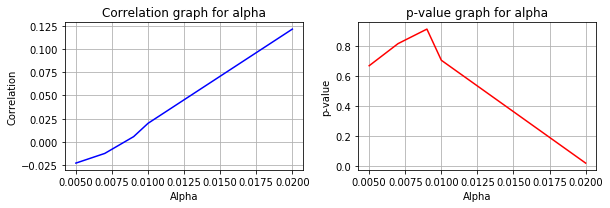

[-0.02271037008346432, -0.012308103696220136, 0.005739443758655788, 0.02007408333515987, 0.12138840404542614]
[0.6706686095111363, 0.8177523699985041, 0.9144297926764244, 0.7070225137185358, 0.022546492097061666]


In [94]:
#del model_alph

fig = plt.gcf()
fig.set_size_inches(8.5, 3)

plt.subplot(1, 2, 1)
plt.plot(alphas, correlations, 'b')
plt.xlabel('Alpha')
plt.ylabel('Correlation')
plt.title("Correlation graph for alpha")
plt.grid()

plt.subplot(1, 2, 2)
plt.plot(alphas, pvals, 'r')
plt.xlabel('Alpha')
plt.ylabel('p-value')
plt.title("p-value graph for alpha")
plt.grid()

plt.tight_layout()
plt.show()

print(correlations)
print(pvals)

### 5. Tuning epochs 'iter'
alpha = 0.009; size = 500; window = 6;

In [5]:
epochs = [30]
correlations = []
pvals = []

In [98]:
for epoch in epochs:
    embeddings_path = "../resources/embeddings_epochs{}.vec".format(epoch)
    
    model_iter = Word2Vec(sentences_folder, workers=5, size=500, window=6, iter=epoch)
    save_embeddings(embeddings_path, model_iter.wv)
    
    corr, p, data = score.spearman(test_data_path, embeddings_path, bn2wn_mapping_path)
    correlations.append(corr)
    pvals.append(p)

2019-05-30 23:28:41,510 : INFO : collecting all words and their counts
2019-05-30 23:28:41,513 : INFO : PROGRESS: at sentence #0, processed 0 words, keeping 0 word types
2019-05-30 23:28:41,689 : INFO : PROGRESS: at sentence #10000, processed 271423 words, keeping 15504 word types
2019-05-30 23:28:41,859 : INFO : PROGRESS: at sentence #20000, processed 547417 words, keeping 21517 word types
2019-05-30 23:28:42,030 : INFO : PROGRESS: at sentence #30000, processed 829215 words, keeping 26443 word types
2019-05-30 23:28:42,199 : INFO : PROGRESS: at sentence #40000, processed 1116115 words, keeping 30297 word types
2019-05-30 23:28:42,361 : INFO : PROGRESS: at sentence #50000, processed 1389268 words, keeping 33255 word types
2019-05-30 23:28:42,568 : INFO : PROGRESS: at sentence #60000, processed 1664025 words, keeping 36015 word types
2019-05-30 23:28:42,775 : INFO : PROGRESS: at sentence #70000, processed 1942307 words, keeping 38334 word types
2019-05-30 23:28:42,978 : INFO : PROGRESS:

2019-05-30 23:28:54,249 : INFO : PROGRESS: at sentence #720000, processed 19923621 words, keeping 99911 word types
2019-05-30 23:28:54,403 : INFO : PROGRESS: at sentence #730000, processed 20200299 words, keeping 100546 word types
2019-05-30 23:28:54,565 : INFO : PROGRESS: at sentence #740000, processed 20479737 words, keeping 101322 word types
2019-05-30 23:28:54,719 : INFO : PROGRESS: at sentence #750000, processed 20764915 words, keeping 102075 word types
2019-05-30 23:28:54,874 : INFO : PROGRESS: at sentence #760000, processed 21033488 words, keeping 102715 word types
2019-05-30 23:28:55,046 : INFO : PROGRESS: at sentence #770000, processed 21311461 words, keeping 103419 word types
2019-05-30 23:28:55,193 : INFO : PROGRESS: at sentence #780000, processed 21587570 words, keeping 103799 word types
2019-05-30 23:28:55,341 : INFO : PROGRESS: at sentence #790000, processed 21860381 words, keeping 104152 word types
2019-05-30 23:28:55,494 : INFO : PROGRESS: at sentence #800000, processed

2019-05-30 23:29:05,802 : INFO : PROGRESS: at sentence #1430000, processed 39664039 words, keeping 131178 word types
2019-05-30 23:29:05,975 : INFO : PROGRESS: at sentence #1440000, processed 39949833 words, keeping 131524 word types
2019-05-30 23:29:06,129 : INFO : PROGRESS: at sentence #1450000, processed 40234437 words, keeping 131871 word types
2019-05-30 23:29:06,279 : INFO : PROGRESS: at sentence #1460000, processed 40515030 words, keeping 132203 word types
2019-05-30 23:29:06,427 : INFO : PROGRESS: at sentence #1470000, processed 40786039 words, keeping 132667 word types
2019-05-30 23:29:06,576 : INFO : PROGRESS: at sentence #1480000, processed 41060634 words, keeping 133013 word types
2019-05-30 23:29:06,728 : INFO : PROGRESS: at sentence #1490000, processed 41343098 words, keeping 133364 word types
2019-05-30 23:29:06,882 : INFO : PROGRESS: at sentence #1500000, processed 41625828 words, keeping 133739 word types
2019-05-30 23:29:07,060 : INFO : PROGRESS: at sentence #1510000,

2019-05-30 23:29:19,045 : INFO : PROGRESS: at sentence #2140000, processed 59306457 words, keeping 154690 word types
2019-05-30 23:29:19,190 : INFO : PROGRESS: at sentence #2150000, processed 59568224 words, keeping 154870 word types
2019-05-30 23:29:19,343 : INFO : PROGRESS: at sentence #2160000, processed 59848213 words, keeping 155047 word types
2019-05-30 23:29:19,493 : INFO : PROGRESS: at sentence #2170000, processed 60117733 words, keeping 155189 word types
2019-05-30 23:29:19,644 : INFO : PROGRESS: at sentence #2180000, processed 60396851 words, keeping 155315 word types
2019-05-30 23:29:19,804 : INFO : PROGRESS: at sentence #2190000, processed 60673507 words, keeping 155443 word types
2019-05-30 23:29:19,969 : INFO : PROGRESS: at sentence #2200000, processed 60954083 words, keeping 155565 word types
2019-05-30 23:29:20,128 : INFO : PROGRESS: at sentence #2210000, processed 61236255 words, keeping 155720 word types
2019-05-30 23:29:20,287 : INFO : PROGRESS: at sentence #2220000,

2019-05-30 23:29:29,914 : INFO : PROGRESS: at sentence #2850000, processed 78983987 words, keeping 161360 word types
2019-05-30 23:29:30,075 : INFO : PROGRESS: at sentence #2860000, processed 79270828 words, keeping 161413 word types
2019-05-30 23:29:30,222 : INFO : PROGRESS: at sentence #2870000, processed 79546764 words, keeping 161494 word types
2019-05-30 23:29:30,434 : INFO : PROGRESS: at sentence #2880000, processed 79834632 words, keeping 161552 word types
2019-05-30 23:29:30,701 : INFO : PROGRESS: at sentence #2890000, processed 80118528 words, keeping 161621 word types
2019-05-30 23:29:30,848 : INFO : PROGRESS: at sentence #2900000, processed 80388810 words, keeping 161672 word types
2019-05-30 23:29:31,005 : INFO : PROGRESS: at sentence #2910000, processed 80657780 words, keeping 161737 word types
2019-05-30 23:29:31,151 : INFO : PROGRESS: at sentence #2920000, processed 80930570 words, keeping 161800 word types
2019-05-30 23:29:31,296 : INFO : PROGRESS: at sentence #2930000,

2019-05-30 23:29:41,389 : INFO : PROGRESS: at sentence #3560000, processed 98812013 words, keeping 164761 word types
2019-05-30 23:29:41,553 : INFO : PROGRESS: at sentence #3570000, processed 99097751 words, keeping 164786 word types
2019-05-30 23:29:41,739 : INFO : PROGRESS: at sentence #3580000, processed 99378362 words, keeping 164811 word types
2019-05-30 23:29:41,898 : INFO : PROGRESS: at sentence #3590000, processed 99642763 words, keeping 164853 word types
2019-05-30 23:29:42,055 : INFO : PROGRESS: at sentence #3600000, processed 99917372 words, keeping 164905 word types
2019-05-30 23:29:42,203 : INFO : PROGRESS: at sentence #3610000, processed 100194099 words, keeping 164949 word types
2019-05-30 23:29:42,349 : INFO : PROGRESS: at sentence #3620000, processed 100462977 words, keeping 164978 word types
2019-05-30 23:29:42,503 : INFO : PROGRESS: at sentence #3630000, processed 100739844 words, keeping 165025 word types
2019-05-30 23:29:42,665 : INFO : PROGRESS: at sentence #36400

2019-05-30 23:30:28,905 : INFO : EPOCH 1 - PROGRESS: at 13.25% examples, 241434 words/s, in_qsize 0, out_qsize 1
2019-05-30 23:30:29,999 : INFO : EPOCH 1 - PROGRESS: at 13.62% examples, 241341 words/s, in_qsize 7, out_qsize 0
2019-05-30 23:30:31,087 : INFO : EPOCH 1 - PROGRESS: at 13.90% examples, 239690 words/s, in_qsize 10, out_qsize 0
2019-05-30 23:30:32,092 : INFO : EPOCH 1 - PROGRESS: at 14.27% examples, 240216 words/s, in_qsize 9, out_qsize 0
2019-05-30 23:30:33,115 : INFO : EPOCH 1 - PROGRESS: at 14.66% examples, 240857 words/s, in_qsize 10, out_qsize 0
2019-05-30 23:30:34,139 : INFO : EPOCH 1 - PROGRESS: at 15.04% examples, 241185 words/s, in_qsize 9, out_qsize 0
2019-05-30 23:30:35,163 : INFO : EPOCH 1 - PROGRESS: at 15.34% examples, 240475 words/s, in_qsize 3, out_qsize 0
2019-05-30 23:30:36,163 : INFO : EPOCH 1 - PROGRESS: at 15.71% examples, 240939 words/s, in_qsize 8, out_qsize 0
2019-05-30 23:30:37,165 : INFO : EPOCH 1 - PROGRESS: at 16.02% examples, 240607 words/s, in_qs

2019-05-30 23:31:44,299 : INFO : EPOCH 1 - PROGRESS: at 39.98% examples, 252143 words/s, in_qsize 10, out_qsize 0
2019-05-30 23:31:45,301 : INFO : EPOCH 1 - PROGRESS: at 40.28% examples, 251797 words/s, in_qsize 9, out_qsize 0
2019-05-30 23:31:46,368 : INFO : EPOCH 1 - PROGRESS: at 40.65% examples, 251802 words/s, in_qsize 9, out_qsize 0
2019-05-30 23:31:47,386 : INFO : EPOCH 1 - PROGRESS: at 41.02% examples, 251955 words/s, in_qsize 9, out_qsize 0
2019-05-30 23:31:48,390 : INFO : EPOCH 1 - PROGRESS: at 41.35% examples, 251961 words/s, in_qsize 9, out_qsize 0
2019-05-30 23:31:49,430 : INFO : EPOCH 1 - PROGRESS: at 41.66% examples, 251775 words/s, in_qsize 7, out_qsize 0
2019-05-30 23:31:50,496 : INFO : EPOCH 1 - PROGRESS: at 42.00% examples, 251712 words/s, in_qsize 9, out_qsize 1
2019-05-30 23:31:51,520 : INFO : EPOCH 1 - PROGRESS: at 42.31% examples, 251463 words/s, in_qsize 9, out_qsize 0
2019-05-30 23:31:52,561 : INFO : EPOCH 1 - PROGRESS: at 42.61% examples, 251183 words/s, in_qsi

2019-05-30 23:32:59,105 : INFO : EPOCH 1 - PROGRESS: at 67.01% examples, 255838 words/s, in_qsize 9, out_qsize 0
2019-05-30 23:33:00,112 : INFO : EPOCH 1 - PROGRESS: at 67.35% examples, 255785 words/s, in_qsize 10, out_qsize 0
2019-05-30 23:33:01,143 : INFO : EPOCH 1 - PROGRESS: at 67.71% examples, 255805 words/s, in_qsize 10, out_qsize 0
2019-05-30 23:33:02,149 : INFO : EPOCH 1 - PROGRESS: at 68.07% examples, 255854 words/s, in_qsize 10, out_qsize 0
2019-05-30 23:33:03,154 : INFO : EPOCH 1 - PROGRESS: at 68.38% examples, 255728 words/s, in_qsize 8, out_qsize 0
2019-05-30 23:33:04,231 : INFO : EPOCH 1 - PROGRESS: at 68.70% examples, 255543 words/s, in_qsize 7, out_qsize 0
2019-05-30 23:33:05,269 : INFO : EPOCH 1 - PROGRESS: at 69.04% examples, 255454 words/s, in_qsize 9, out_qsize 0
2019-05-30 23:33:06,315 : INFO : EPOCH 1 - PROGRESS: at 69.39% examples, 255392 words/s, in_qsize 9, out_qsize 0
2019-05-30 23:33:07,331 : INFO : EPOCH 1 - PROGRESS: at 69.75% examples, 255431 words/s, in_q

2019-05-30 23:34:14,026 : INFO : EPOCH 1 - PROGRESS: at 94.28% examples, 258716 words/s, in_qsize 8, out_qsize 1
2019-05-30 23:34:15,047 : INFO : EPOCH 1 - PROGRESS: at 94.69% examples, 258807 words/s, in_qsize 7, out_qsize 2
2019-05-30 23:34:16,110 : INFO : EPOCH 1 - PROGRESS: at 95.09% examples, 258856 words/s, in_qsize 2, out_qsize 1
2019-05-30 23:34:17,118 : INFO : EPOCH 1 - PROGRESS: at 95.46% examples, 258884 words/s, in_qsize 9, out_qsize 0
2019-05-30 23:34:18,163 : INFO : EPOCH 1 - PROGRESS: at 95.87% examples, 258958 words/s, in_qsize 7, out_qsize 0
2019-05-30 23:34:19,216 : INFO : EPOCH 1 - PROGRESS: at 96.22% examples, 258845 words/s, in_qsize 8, out_qsize 1
2019-05-30 23:34:20,217 : INFO : EPOCH 1 - PROGRESS: at 96.55% examples, 258730 words/s, in_qsize 8, out_qsize 1
2019-05-30 23:34:21,311 : INFO : EPOCH 1 - PROGRESS: at 96.95% examples, 258749 words/s, in_qsize 8, out_qsize 1
2019-05-30 23:34:22,349 : INFO : EPOCH 1 - PROGRESS: at 97.34% examples, 258801 words/s, in_qsiz

2019-05-30 23:35:23,826 : INFO : EPOCH 2 - PROGRESS: at 20.67% examples, 277171 words/s, in_qsize 8, out_qsize 0
2019-05-30 23:35:24,850 : INFO : EPOCH 2 - PROGRESS: at 21.06% examples, 277243 words/s, in_qsize 9, out_qsize 0
2019-05-30 23:35:25,855 : INFO : EPOCH 2 - PROGRESS: at 21.45% examples, 277174 words/s, in_qsize 9, out_qsize 0
2019-05-30 23:35:26,885 : INFO : EPOCH 2 - PROGRESS: at 21.85% examples, 277227 words/s, in_qsize 4, out_qsize 1
2019-05-30 23:35:27,953 : INFO : EPOCH 2 - PROGRESS: at 22.26% examples, 277230 words/s, in_qsize 1, out_qsize 0
2019-05-30 23:35:29,181 : INFO : EPOCH 2 - PROGRESS: at 22.60% examples, 275874 words/s, in_qsize 5, out_qsize 2
2019-05-30 23:35:30,194 : INFO : EPOCH 2 - PROGRESS: at 22.99% examples, 275817 words/s, in_qsize 8, out_qsize 1
2019-05-30 23:35:31,203 : INFO : EPOCH 2 - PROGRESS: at 23.39% examples, 275984 words/s, in_qsize 9, out_qsize 0
2019-05-30 23:35:32,230 : INFO : EPOCH 2 - PROGRESS: at 23.81% examples, 276295 words/s, in_qsiz

2019-05-30 23:36:38,981 : INFO : EPOCH 2 - PROGRESS: at 50.04% examples, 281369 words/s, in_qsize 10, out_qsize 0
2019-05-30 23:36:39,996 : INFO : EPOCH 2 - PROGRESS: at 50.44% examples, 281396 words/s, in_qsize 5, out_qsize 0
2019-05-30 23:36:41,038 : INFO : EPOCH 2 - PROGRESS: at 50.83% examples, 281313 words/s, in_qsize 9, out_qsize 0
2019-05-30 23:36:42,040 : INFO : EPOCH 2 - PROGRESS: at 51.22% examples, 281359 words/s, in_qsize 6, out_qsize 0
2019-05-30 23:36:43,050 : INFO : EPOCH 2 - PROGRESS: at 51.64% examples, 281487 words/s, in_qsize 8, out_qsize 0
2019-05-30 23:36:44,108 : INFO : EPOCH 2 - PROGRESS: at 52.04% examples, 281459 words/s, in_qsize 10, out_qsize 0
2019-05-30 23:36:45,110 : INFO : EPOCH 2 - PROGRESS: at 52.44% examples, 281509 words/s, in_qsize 9, out_qsize 0
2019-05-30 23:36:46,115 : INFO : EPOCH 2 - PROGRESS: at 52.86% examples, 281597 words/s, in_qsize 8, out_qsize 1
2019-05-30 23:36:47,117 : INFO : EPOCH 2 - PROGRESS: at 53.27% examples, 281636 words/s, in_qs

2019-05-30 23:37:53,520 : INFO : EPOCH 2 - PROGRESS: at 79.28% examples, 282526 words/s, in_qsize 9, out_qsize 0
2019-05-30 23:37:54,554 : INFO : EPOCH 2 - PROGRESS: at 79.67% examples, 282509 words/s, in_qsize 8, out_qsize 0
2019-05-30 23:37:55,574 : INFO : EPOCH 2 - PROGRESS: at 80.06% examples, 282505 words/s, in_qsize 8, out_qsize 0
2019-05-30 23:37:56,641 : INFO : EPOCH 2 - PROGRESS: at 80.47% examples, 282538 words/s, in_qsize 9, out_qsize 1
2019-05-30 23:37:57,654 : INFO : EPOCH 2 - PROGRESS: at 80.86% examples, 282576 words/s, in_qsize 8, out_qsize 0
2019-05-30 23:37:58,656 : INFO : EPOCH 2 - PROGRESS: at 81.24% examples, 282596 words/s, in_qsize 10, out_qsize 0
2019-05-30 23:37:59,691 : INFO : EPOCH 2 - PROGRESS: at 81.63% examples, 282573 words/s, in_qsize 3, out_qsize 0
2019-05-30 23:38:00,708 : INFO : EPOCH 2 - PROGRESS: at 82.04% examples, 282607 words/s, in_qsize 8, out_qsize 0
2019-05-30 23:38:01,711 : INFO : EPOCH 2 - PROGRESS: at 82.43% examples, 282596 words/s, in_qsi

2019-05-30 23:39:03,854 : INFO : EPOCH 3 - PROGRESS: at 6.25% examples, 275453 words/s, in_qsize 2, out_qsize 0
2019-05-30 23:39:04,881 : INFO : EPOCH 3 - PROGRESS: at 6.66% examples, 275880 words/s, in_qsize 9, out_qsize 0
2019-05-30 23:39:05,889 : INFO : EPOCH 3 - PROGRESS: at 7.07% examples, 276841 words/s, in_qsize 6, out_qsize 0
2019-05-30 23:39:06,896 : INFO : EPOCH 3 - PROGRESS: at 7.44% examples, 276306 words/s, in_qsize 9, out_qsize 0
2019-05-30 23:39:07,903 : INFO : EPOCH 3 - PROGRESS: at 7.84% examples, 277138 words/s, in_qsize 9, out_qsize 0
2019-05-30 23:39:08,942 : INFO : EPOCH 3 - PROGRESS: at 8.21% examples, 276553 words/s, in_qsize 10, out_qsize 0
2019-05-30 23:39:10,008 : INFO : EPOCH 3 - PROGRESS: at 8.60% examples, 276272 words/s, in_qsize 8, out_qsize 0
2019-05-30 23:39:11,025 : INFO : EPOCH 3 - PROGRESS: at 8.97% examples, 275925 words/s, in_qsize 9, out_qsize 0
2019-05-30 23:39:12,087 : INFO : EPOCH 3 - PROGRESS: at 9.36% examples, 276058 words/s, in_qsize 10, ou

2019-05-30 23:40:19,045 : INFO : EPOCH 3 - PROGRESS: at 33.84% examples, 268451 words/s, in_qsize 0, out_qsize 0
2019-05-30 23:40:20,053 : INFO : EPOCH 3 - PROGRESS: at 34.17% examples, 268189 words/s, in_qsize 9, out_qsize 0
2019-05-30 23:40:21,090 : INFO : EPOCH 3 - PROGRESS: at 34.56% examples, 268231 words/s, in_qsize 8, out_qsize 0
2019-05-30 23:40:22,149 : INFO : EPOCH 3 - PROGRESS: at 34.93% examples, 268213 words/s, in_qsize 8, out_qsize 0
2019-05-30 23:40:23,170 : INFO : EPOCH 3 - PROGRESS: at 35.30% examples, 268152 words/s, in_qsize 10, out_qsize 0
2019-05-30 23:40:24,182 : INFO : EPOCH 3 - PROGRESS: at 35.65% examples, 268040 words/s, in_qsize 8, out_qsize 0
2019-05-30 23:40:25,205 : INFO : EPOCH 3 - PROGRESS: at 36.03% examples, 267991 words/s, in_qsize 9, out_qsize 0
2019-05-30 23:40:26,209 : INFO : EPOCH 3 - PROGRESS: at 36.41% examples, 267981 words/s, in_qsize 8, out_qsize 1
2019-05-30 23:40:27,212 : INFO : EPOCH 3 - PROGRESS: at 36.81% examples, 268031 words/s, in_qsi

2019-05-30 23:41:33,907 : INFO : EPOCH 3 - PROGRESS: at 60.76% examples, 265189 words/s, in_qsize 10, out_qsize 0
2019-05-30 23:41:34,938 : INFO : EPOCH 3 - PROGRESS: at 61.16% examples, 265239 words/s, in_qsize 10, out_qsize 0
2019-05-30 23:41:35,987 : INFO : EPOCH 3 - PROGRESS: at 61.58% examples, 265375 words/s, in_qsize 10, out_qsize 0
2019-05-30 23:41:37,021 : INFO : EPOCH 3 - PROGRESS: at 61.97% examples, 265461 words/s, in_qsize 9, out_qsize 0
2019-05-30 23:41:38,025 : INFO : EPOCH 3 - PROGRESS: at 62.35% examples, 265590 words/s, in_qsize 0, out_qsize 0
2019-05-30 23:41:39,039 : INFO : EPOCH 3 - PROGRESS: at 62.74% examples, 265662 words/s, in_qsize 9, out_qsize 0
2019-05-30 23:41:40,041 : INFO : EPOCH 3 - PROGRESS: at 63.13% examples, 265750 words/s, in_qsize 9, out_qsize 0
2019-05-30 23:41:41,097 : INFO : EPOCH 3 - PROGRESS: at 63.52% examples, 265751 words/s, in_qsize 8, out_qsize 0
2019-05-30 23:41:42,146 : INFO : EPOCH 3 - PROGRESS: at 63.94% examples, 265813 words/s, in_q

2019-05-30 23:42:48,719 : INFO : EPOCH 3 - PROGRESS: at 88.37% examples, 266161 words/s, in_qsize 10, out_qsize 0
2019-05-30 23:42:49,737 : INFO : EPOCH 3 - PROGRESS: at 88.77% examples, 266242 words/s, in_qsize 10, out_qsize 0
2019-05-30 23:42:50,751 : INFO : EPOCH 3 - PROGRESS: at 89.17% examples, 266317 words/s, in_qsize 10, out_qsize 0
2019-05-30 23:42:51,751 : INFO : EPOCH 3 - PROGRESS: at 89.53% examples, 266353 words/s, in_qsize 7, out_qsize 1
2019-05-30 23:42:52,764 : INFO : EPOCH 3 - PROGRESS: at 89.94% examples, 266431 words/s, in_qsize 9, out_qsize 0
2019-05-30 23:42:53,811 : INFO : EPOCH 3 - PROGRESS: at 90.33% examples, 266468 words/s, in_qsize 7, out_qsize 0
2019-05-30 23:42:54,832 : INFO : EPOCH 3 - PROGRESS: at 90.75% examples, 266564 words/s, in_qsize 5, out_qsize 0
2019-05-30 23:42:55,872 : INFO : EPOCH 3 - PROGRESS: at 91.12% examples, 266608 words/s, in_qsize 9, out_qsize 0
2019-05-30 23:42:56,929 : INFO : EPOCH 3 - PROGRESS: at 91.52% examples, 266687 words/s, in_q

2019-05-30 23:43:58,929 : INFO : EPOCH 4 - PROGRESS: at 14.77% examples, 274263 words/s, in_qsize 0, out_qsize 0
2019-05-30 23:43:59,945 : INFO : EPOCH 4 - PROGRESS: at 15.16% examples, 274181 words/s, in_qsize 9, out_qsize 0
2019-05-30 23:44:00,959 : INFO : EPOCH 4 - PROGRESS: at 15.40% examples, 271621 words/s, in_qsize 9, out_qsize 0
2019-05-30 23:44:01,992 : INFO : EPOCH 4 - PROGRESS: at 15.82% examples, 271991 words/s, in_qsize 5, out_qsize 0
2019-05-30 23:44:03,021 : INFO : EPOCH 4 - PROGRESS: at 16.20% examples, 272004 words/s, in_qsize 9, out_qsize 0
2019-05-30 23:44:04,023 : INFO : EPOCH 4 - PROGRESS: at 16.60% examples, 272348 words/s, in_qsize 10, out_qsize 1
2019-05-30 23:44:05,037 : INFO : EPOCH 4 - PROGRESS: at 17.01% examples, 272756 words/s, in_qsize 10, out_qsize 0
2019-05-30 23:44:06,055 : INFO : EPOCH 4 - PROGRESS: at 17.38% examples, 272687 words/s, in_qsize 9, out_qsize 1
2019-05-30 23:44:07,064 : INFO : EPOCH 4 - PROGRESS: at 17.77% examples, 272970 words/s, in_qs

2019-05-30 23:45:13,640 : INFO : EPOCH 4 - PROGRESS: at 42.56% examples, 272538 words/s, in_qsize 7, out_qsize 2
2019-05-30 23:45:14,683 : INFO : EPOCH 4 - PROGRESS: at 42.95% examples, 272514 words/s, in_qsize 9, out_qsize 1
2019-05-30 23:45:15,693 : INFO : EPOCH 4 - PROGRESS: at 43.33% examples, 272502 words/s, in_qsize 9, out_qsize 0
2019-05-30 23:45:16,714 : INFO : EPOCH 4 - PROGRESS: at 43.70% examples, 272469 words/s, in_qsize 9, out_qsize 0
2019-05-30 23:45:17,729 : INFO : EPOCH 4 - PROGRESS: at 44.09% examples, 272520 words/s, in_qsize 9, out_qsize 0
2019-05-30 23:45:18,735 : INFO : EPOCH 4 - PROGRESS: at 44.47% examples, 272470 words/s, in_qsize 0, out_qsize 0
2019-05-30 23:45:19,762 : INFO : EPOCH 4 - PROGRESS: at 44.83% examples, 272302 words/s, in_qsize 8, out_qsize 1
2019-05-30 23:45:20,767 : INFO : EPOCH 4 - PROGRESS: at 45.18% examples, 272090 words/s, in_qsize 8, out_qsize 1
2019-05-30 23:45:21,778 : INFO : EPOCH 4 - PROGRESS: at 45.49% examples, 271641 words/s, in_qsiz

2019-05-30 23:46:28,575 : INFO : EPOCH 4 - PROGRESS: at 69.59% examples, 267904 words/s, in_qsize 6, out_qsize 0
2019-05-30 23:46:29,627 : INFO : EPOCH 4 - PROGRESS: at 69.98% examples, 267863 words/s, in_qsize 10, out_qsize 0
2019-05-30 23:46:30,628 : INFO : EPOCH 4 - PROGRESS: at 70.37% examples, 267968 words/s, in_qsize 1, out_qsize 0
2019-05-30 23:46:31,692 : INFO : EPOCH 4 - PROGRESS: at 70.74% examples, 267846 words/s, in_qsize 5, out_qsize 1
2019-05-30 23:46:32,704 : INFO : EPOCH 4 - PROGRESS: at 71.12% examples, 267895 words/s, in_qsize 10, out_qsize 0
2019-05-30 23:46:33,788 : INFO : EPOCH 4 - PROGRESS: at 71.52% examples, 267887 words/s, in_qsize 9, out_qsize 1
2019-05-30 23:46:34,815 : INFO : EPOCH 4 - PROGRESS: at 71.93% examples, 267956 words/s, in_qsize 8, out_qsize 0
2019-05-30 23:46:35,862 : INFO : EPOCH 4 - PROGRESS: at 72.30% examples, 267892 words/s, in_qsize 10, out_qsize 0
2019-05-30 23:46:36,919 : INFO : EPOCH 4 - PROGRESS: at 72.67% examples, 267885 words/s, in_q

2019-05-30 23:47:43,470 : INFO : EPOCH 4 - PROGRESS: at 97.48% examples, 268816 words/s, in_qsize 7, out_qsize 0
2019-05-30 23:47:44,470 : INFO : EPOCH 4 - PROGRESS: at 97.88% examples, 268891 words/s, in_qsize 10, out_qsize 0
2019-05-30 23:47:45,512 : INFO : EPOCH 4 - PROGRESS: at 98.26% examples, 268897 words/s, in_qsize 9, out_qsize 0
2019-05-30 23:47:46,535 : INFO : EPOCH 4 - PROGRESS: at 98.66% examples, 268952 words/s, in_qsize 4, out_qsize 0
2019-05-30 23:47:47,566 : INFO : EPOCH 4 - PROGRESS: at 99.07% examples, 269024 words/s, in_qsize 9, out_qsize 0
2019-05-30 23:47:48,628 : INFO : EPOCH 4 - PROGRESS: at 99.49% examples, 269088 words/s, in_qsize 9, out_qsize 0
2019-05-30 23:47:49,635 : INFO : EPOCH 4 - PROGRESS: at 99.89% examples, 269136 words/s, in_qsize 7, out_qsize 2
2019-05-30 23:47:49,762 : INFO : worker thread finished; awaiting finish of 4 more threads
2019-05-30 23:47:49,776 : INFO : worker thread finished; awaiting finish of 3 more threads
2019-05-30 23:47:49,804 : 

2019-05-30 23:48:53,323 : INFO : EPOCH 5 - PROGRESS: at 24.67% examples, 281723 words/s, in_qsize 8, out_qsize 1
2019-05-30 23:48:54,334 : INFO : EPOCH 5 - PROGRESS: at 25.06% examples, 281760 words/s, in_qsize 2, out_qsize 2
2019-05-30 23:48:55,336 : INFO : EPOCH 5 - PROGRESS: at 25.44% examples, 281747 words/s, in_qsize 8, out_qsize 0
2019-05-30 23:48:56,365 : INFO : EPOCH 5 - PROGRESS: at 25.85% examples, 281933 words/s, in_qsize 5, out_qsize 0
2019-05-30 23:48:57,370 : INFO : EPOCH 5 - PROGRESS: at 26.24% examples, 281938 words/s, in_qsize 4, out_qsize 0
2019-05-30 23:48:58,392 : INFO : EPOCH 5 - PROGRESS: at 26.64% examples, 281860 words/s, in_qsize 9, out_qsize 0
2019-05-30 23:48:59,419 : INFO : EPOCH 5 - PROGRESS: at 27.03% examples, 281753 words/s, in_qsize 7, out_qsize 1
2019-05-30 23:49:00,475 : INFO : EPOCH 5 - PROGRESS: at 27.39% examples, 281345 words/s, in_qsize 9, out_qsize 1
2019-05-30 23:49:01,476 : INFO : EPOCH 5 - PROGRESS: at 27.77% examples, 281343 words/s, in_qsiz

2019-05-30 23:50:08,035 : INFO : EPOCH 5 - PROGRESS: at 53.27% examples, 279891 words/s, in_qsize 10, out_qsize 0
2019-05-30 23:50:09,044 : INFO : EPOCH 5 - PROGRESS: at 53.67% examples, 279936 words/s, in_qsize 9, out_qsize 1
2019-05-30 23:50:10,097 : INFO : EPOCH 5 - PROGRESS: at 54.08% examples, 279943 words/s, in_qsize 9, out_qsize 0
2019-05-30 23:50:11,172 : INFO : EPOCH 5 - PROGRESS: at 54.49% examples, 279953 words/s, in_qsize 9, out_qsize 1
2019-05-30 23:50:12,215 : INFO : EPOCH 5 - PROGRESS: at 54.91% examples, 280018 words/s, in_qsize 9, out_qsize 0
2019-05-30 23:50:13,241 : INFO : EPOCH 5 - PROGRESS: at 55.32% examples, 280075 words/s, in_qsize 8, out_qsize 0
2019-05-30 23:50:14,299 : INFO : EPOCH 5 - PROGRESS: at 55.73% examples, 280068 words/s, in_qsize 8, out_qsize 1
2019-05-30 23:50:15,324 : INFO : EPOCH 5 - PROGRESS: at 56.13% examples, 280131 words/s, in_qsize 5, out_qsize 1
2019-05-30 23:50:16,339 : INFO : EPOCH 5 - PROGRESS: at 56.54% examples, 280128 words/s, in_qsi

2019-05-30 23:51:23,003 : INFO : EPOCH 5 - PROGRESS: at 82.42% examples, 280921 words/s, in_qsize 9, out_qsize 0
2019-05-30 23:51:24,069 : INFO : EPOCH 5 - PROGRESS: at 82.84% examples, 280932 words/s, in_qsize 9, out_qsize 0
2019-05-30 23:51:25,156 : INFO : EPOCH 5 - PROGRESS: at 83.26% examples, 280919 words/s, in_qsize 9, out_qsize 0
2019-05-30 23:51:26,174 : INFO : EPOCH 5 - PROGRESS: at 83.66% examples, 280931 words/s, in_qsize 10, out_qsize 0
2019-05-30 23:51:27,217 : INFO : EPOCH 5 - PROGRESS: at 84.08% examples, 280972 words/s, in_qsize 10, out_qsize 0
2019-05-30 23:51:28,257 : INFO : EPOCH 5 - PROGRESS: at 84.47% examples, 280986 words/s, in_qsize 10, out_qsize 0
2019-05-30 23:51:29,279 : INFO : EPOCH 5 - PROGRESS: at 84.86% examples, 280997 words/s, in_qsize 9, out_qsize 0
2019-05-30 23:51:30,305 : INFO : EPOCH 5 - PROGRESS: at 85.27% examples, 281062 words/s, in_qsize 9, out_qsize 0
2019-05-30 23:51:31,307 : INFO : EPOCH 5 - PROGRESS: at 85.66% examples, 281056 words/s, in_q

2019-05-30 23:52:33,755 : INFO : EPOCH 6 - PROGRESS: at 9.95% examples, 282721 words/s, in_qsize 9, out_qsize 0
2019-05-30 23:52:34,759 : INFO : EPOCH 6 - PROGRESS: at 10.34% examples, 282868 words/s, in_qsize 9, out_qsize 0
2019-05-30 23:52:35,775 : INFO : EPOCH 6 - PROGRESS: at 10.60% examples, 279406 words/s, in_qsize 8, out_qsize 0
2019-05-30 23:52:36,833 : INFO : EPOCH 6 - PROGRESS: at 11.01% examples, 279199 words/s, in_qsize 9, out_qsize 0
2019-05-30 23:52:37,839 : INFO : EPOCH 6 - PROGRESS: at 11.43% examples, 279656 words/s, in_qsize 10, out_qsize 0
2019-05-30 23:52:38,883 : INFO : EPOCH 6 - PROGRESS: at 11.83% examples, 279738 words/s, in_qsize 8, out_qsize 1
2019-05-30 23:52:39,908 : INFO : EPOCH 6 - PROGRESS: at 12.21% examples, 279805 words/s, in_qsize 9, out_qsize 0
2019-05-30 23:52:40,940 : INFO : EPOCH 6 - PROGRESS: at 12.61% examples, 279993 words/s, in_qsize 9, out_qsize 0
2019-05-30 23:52:41,952 : INFO : EPOCH 6 - PROGRESS: at 13.01% examples, 280136 words/s, in_qsiz

2019-05-30 23:53:48,338 : INFO : EPOCH 6 - PROGRESS: at 38.22% examples, 277404 words/s, in_qsize 9, out_qsize 0
2019-05-30 23:53:49,363 : INFO : EPOCH 6 - PROGRESS: at 38.63% examples, 277519 words/s, in_qsize 10, out_qsize 0
2019-05-30 23:53:50,370 : INFO : EPOCH 6 - PROGRESS: at 39.02% examples, 277546 words/s, in_qsize 9, out_qsize 0
2019-05-30 23:53:51,374 : INFO : EPOCH 6 - PROGRESS: at 39.40% examples, 277579 words/s, in_qsize 5, out_qsize 0
2019-05-30 23:53:52,403 : INFO : EPOCH 6 - PROGRESS: at 39.70% examples, 276954 words/s, in_qsize 9, out_qsize 0
2019-05-30 23:53:53,474 : INFO : EPOCH 6 - PROGRESS: at 40.08% examples, 276752 words/s, in_qsize 8, out_qsize 1
2019-05-30 23:53:54,541 : INFO : EPOCH 6 - PROGRESS: at 40.50% examples, 276879 words/s, in_qsize 4, out_qsize 0
2019-05-30 23:53:55,573 : INFO : EPOCH 6 - PROGRESS: at 40.91% examples, 276970 words/s, in_qsize 3, out_qsize 0
2019-05-30 23:53:56,576 : INFO : EPOCH 6 - PROGRESS: at 41.28% examples, 277061 words/s, in_qsi

2019-05-30 23:55:03,370 : INFO : EPOCH 6 - PROGRESS: at 66.47% examples, 275381 words/s, in_qsize 9, out_qsize 0
2019-05-30 23:55:04,375 : INFO : EPOCH 6 - PROGRESS: at 66.88% examples, 275478 words/s, in_qsize 8, out_qsize 0
2019-05-30 23:55:05,426 : INFO : EPOCH 6 - PROGRESS: at 67.27% examples, 275432 words/s, in_qsize 7, out_qsize 2
2019-05-30 23:55:06,471 : INFO : EPOCH 6 - PROGRESS: at 67.67% examples, 275471 words/s, in_qsize 9, out_qsize 0
2019-05-30 23:55:07,479 : INFO : EPOCH 6 - PROGRESS: at 68.06% examples, 275530 words/s, in_qsize 9, out_qsize 0
2019-05-30 23:55:08,514 : INFO : EPOCH 6 - PROGRESS: at 68.45% examples, 275576 words/s, in_qsize 9, out_qsize 0
2019-05-30 23:55:09,516 : INFO : EPOCH 6 - PROGRESS: at 68.83% examples, 275609 words/s, in_qsize 7, out_qsize 0
2019-05-30 23:55:10,552 : INFO : EPOCH 6 - PROGRESS: at 69.22% examples, 275628 words/s, in_qsize 6, out_qsize 0
2019-05-30 23:55:11,559 : INFO : EPOCH 6 - PROGRESS: at 69.61% examples, 275685 words/s, in_qsiz

2019-05-30 23:56:18,249 : INFO : EPOCH 6 - PROGRESS: at 94.21% examples, 273996 words/s, in_qsize 1, out_qsize 0
2019-05-30 23:56:19,249 : INFO : EPOCH 6 - PROGRESS: at 94.58% examples, 273942 words/s, in_qsize 9, out_qsize 1
2019-05-30 23:56:20,260 : INFO : EPOCH 6 - PROGRESS: at 94.97% examples, 273960 words/s, in_qsize 7, out_qsize 1
2019-05-30 23:56:21,330 : INFO : EPOCH 6 - PROGRESS: at 95.35% examples, 273890 words/s, in_qsize 6, out_qsize 0
2019-05-30 23:56:22,339 : INFO : EPOCH 6 - PROGRESS: at 95.77% examples, 273969 words/s, in_qsize 4, out_qsize 0
2019-05-30 23:56:23,341 : INFO : EPOCH 6 - PROGRESS: at 96.15% examples, 273925 words/s, in_qsize 5, out_qsize 0
2019-05-30 23:56:24,377 : INFO : EPOCH 6 - PROGRESS: at 96.55% examples, 273898 words/s, in_qsize 5, out_qsize 0
2019-05-30 23:56:25,400 : INFO : EPOCH 6 - PROGRESS: at 96.90% examples, 273797 words/s, in_qsize 7, out_qsize 2
2019-05-30 23:56:26,463 : INFO : EPOCH 6 - PROGRESS: at 97.30% examples, 273789 words/s, in_qsiz

2019-05-30 23:57:28,163 : INFO : EPOCH 7 - PROGRESS: at 20.60% examples, 274981 words/s, in_qsize 8, out_qsize 0
2019-05-30 23:57:29,177 : INFO : EPOCH 7 - PROGRESS: at 21.00% examples, 275158 words/s, in_qsize 5, out_qsize 0
2019-05-30 23:57:30,206 : INFO : EPOCH 7 - PROGRESS: at 21.39% examples, 275129 words/s, in_qsize 9, out_qsize 0
2019-05-30 23:57:31,269 : INFO : EPOCH 7 - PROGRESS: at 21.82% examples, 275418 words/s, in_qsize 10, out_qsize 0
2019-05-30 23:57:32,367 : INFO : EPOCH 7 - PROGRESS: at 22.25% examples, 275541 words/s, in_qsize 6, out_qsize 0
2019-05-30 23:57:33,435 : INFO : EPOCH 7 - PROGRESS: at 22.66% examples, 275780 words/s, in_qsize 7, out_qsize 0
2019-05-30 23:57:34,443 : INFO : EPOCH 7 - PROGRESS: at 23.05% examples, 275860 words/s, in_qsize 8, out_qsize 1
2019-05-30 23:57:35,463 : INFO : EPOCH 7 - PROGRESS: at 23.46% examples, 275983 words/s, in_qsize 9, out_qsize 0
2019-05-30 23:57:36,463 : INFO : EPOCH 7 - PROGRESS: at 23.88% examples, 276413 words/s, in_qsi

2019-05-30 23:58:45,181 : INFO : EPOCH 7 - PROGRESS: at 43.12% examples, 239096 words/s, in_qsize 7, out_qsize 3
2019-05-30 23:58:46,205 : INFO : EPOCH 7 - PROGRESS: at 43.55% examples, 239521 words/s, in_qsize 6, out_qsize 0
2019-05-30 23:58:47,212 : INFO : EPOCH 7 - PROGRESS: at 43.95% examples, 239935 words/s, in_qsize 10, out_qsize 0
2019-05-30 23:58:48,228 : INFO : EPOCH 7 - PROGRESS: at 44.36% examples, 240269 words/s, in_qsize 9, out_qsize 0
2019-05-30 23:58:49,260 : INFO : EPOCH 7 - PROGRESS: at 44.78% examples, 240663 words/s, in_qsize 7, out_qsize 0
2019-05-30 23:58:50,301 : INFO : EPOCH 7 - PROGRESS: at 45.21% examples, 241096 words/s, in_qsize 9, out_qsize 0
2019-05-30 23:58:51,309 : INFO : EPOCH 7 - PROGRESS: at 45.60% examples, 241332 words/s, in_qsize 9, out_qsize 0
2019-05-30 23:58:52,323 : INFO : EPOCH 7 - PROGRESS: at 45.98% examples, 241519 words/s, in_qsize 8, out_qsize 1
2019-05-30 23:58:53,325 : INFO : EPOCH 7 - PROGRESS: at 46.40% examples, 241862 words/s, in_qsi

2019-05-30 23:59:59,904 : INFO : EPOCH 7 - PROGRESS: at 72.19% examples, 254366 words/s, in_qsize 9, out_qsize 0
2019-05-31 00:00:00,926 : INFO : EPOCH 7 - PROGRESS: at 72.52% examples, 254302 words/s, in_qsize 7, out_qsize 0
2019-05-31 00:00:01,976 : INFO : EPOCH 7 - PROGRESS: at 72.88% examples, 254244 words/s, in_qsize 0, out_qsize 0
2019-05-31 00:00:02,993 : INFO : EPOCH 7 - PROGRESS: at 73.16% examples, 253996 words/s, in_qsize 0, out_qsize 0
2019-05-31 00:00:04,098 : INFO : EPOCH 7 - PROGRESS: at 73.36% examples, 253347 words/s, in_qsize 9, out_qsize 0
2019-05-31 00:00:05,150 : INFO : EPOCH 7 - PROGRESS: at 73.71% examples, 253261 words/s, in_qsize 8, out_qsize 0
2019-05-31 00:00:06,175 : INFO : EPOCH 7 - PROGRESS: at 74.07% examples, 253267 words/s, in_qsize 9, out_qsize 0
2019-05-31 00:00:07,212 : INFO : EPOCH 7 - PROGRESS: at 74.46% examples, 253384 words/s, in_qsize 6, out_qsize 1
2019-05-31 00:00:08,220 : INFO : EPOCH 7 - PROGRESS: at 74.82% examples, 253438 words/s, in_qsiz

2019-05-31 00:01:15,291 : INFO : EPOCH 7 - PROGRESS: at 99.06% examples, 255800 words/s, in_qsize 9, out_qsize 0
2019-05-31 00:01:16,291 : INFO : EPOCH 7 - PROGRESS: at 99.45% examples, 255893 words/s, in_qsize 6, out_qsize 0
2019-05-31 00:01:17,303 : INFO : EPOCH 7 - PROGRESS: at 99.85% examples, 255980 words/s, in_qsize 9, out_qsize 0
2019-05-31 00:01:17,548 : INFO : worker thread finished; awaiting finish of 4 more threads
2019-05-31 00:01:17,567 : INFO : worker thread finished; awaiting finish of 3 more threads
2019-05-31 00:01:17,577 : INFO : worker thread finished; awaiting finish of 2 more threads
2019-05-31 00:01:17,604 : INFO : worker thread finished; awaiting finish of 1 more threads
2019-05-31 00:01:17,612 : INFO : worker thread finished; awaiting finish of 0 more threads
2019-05-31 00:01:17,615 : INFO : EPOCH - 7 : training on 105543949 raw words (72659048 effective words) took 283.8s, 256061 effective words/s
2019-05-31 00:01:18,653 : INFO : EPOCH 8 - PROGRESS: at 0.30% ex

2019-05-31 00:02:25,441 : INFO : EPOCH 8 - PROGRESS: at 25.36% examples, 271257 words/s, in_qsize 7, out_qsize 0
2019-05-31 00:02:26,441 : INFO : EPOCH 8 - PROGRESS: at 25.75% examples, 271603 words/s, in_qsize 9, out_qsize 0
2019-05-31 00:02:27,463 : INFO : EPOCH 8 - PROGRESS: at 26.15% examples, 271783 words/s, in_qsize 6, out_qsize 0
2019-05-31 00:02:28,465 : INFO : EPOCH 8 - PROGRESS: at 26.56% examples, 272026 words/s, in_qsize 6, out_qsize 2
2019-05-31 00:02:29,548 : INFO : EPOCH 8 - PROGRESS: at 26.98% examples, 272135 words/s, in_qsize 10, out_qsize 0
2019-05-31 00:02:30,563 : INFO : EPOCH 8 - PROGRESS: at 27.36% examples, 272223 words/s, in_qsize 9, out_qsize 0
2019-05-31 00:02:31,600 : INFO : EPOCH 8 - PROGRESS: at 27.76% examples, 272403 words/s, in_qsize 9, out_qsize 0
2019-05-31 00:02:32,609 : INFO : EPOCH 8 - PROGRESS: at 28.19% examples, 272780 words/s, in_qsize 5, out_qsize 0
2019-05-31 00:02:33,631 : INFO : EPOCH 8 - PROGRESS: at 28.59% examples, 272842 words/s, in_qsi

2019-05-31 00:03:40,310 : INFO : EPOCH 8 - PROGRESS: at 54.24% examples, 276036 words/s, in_qsize 6, out_qsize 0
2019-05-31 00:03:41,327 : INFO : EPOCH 8 - PROGRESS: at 54.65% examples, 276187 words/s, in_qsize 9, out_qsize 0
2019-05-31 00:03:42,332 : INFO : EPOCH 8 - PROGRESS: at 55.05% examples, 276209 words/s, in_qsize 10, out_qsize 0
2019-05-31 00:03:43,383 : INFO : EPOCH 8 - PROGRESS: at 55.45% examples, 276246 words/s, in_qsize 9, out_qsize 0
2019-05-31 00:03:44,384 : INFO : EPOCH 8 - PROGRESS: at 55.85% examples, 276324 words/s, in_qsize 7, out_qsize 0
2019-05-31 00:03:45,423 : INFO : EPOCH 8 - PROGRESS: at 56.26% examples, 276389 words/s, in_qsize 6, out_qsize 2
2019-05-31 00:03:46,423 : INFO : EPOCH 8 - PROGRESS: at 56.66% examples, 276436 words/s, in_qsize 8, out_qsize 1
2019-05-31 00:03:47,426 : INFO : EPOCH 8 - PROGRESS: at 57.07% examples, 276556 words/s, in_qsize 8, out_qsize 1
2019-05-31 00:03:48,429 : INFO : EPOCH 8 - PROGRESS: at 57.47% examples, 276681 words/s, in_qsi

2019-05-31 00:04:54,822 : INFO : EPOCH 8 - PROGRESS: at 83.47% examples, 279215 words/s, in_qsize 0, out_qsize 0
2019-05-31 00:04:55,823 : INFO : EPOCH 8 - PROGRESS: at 83.88% examples, 279288 words/s, in_qsize 6, out_qsize 0
2019-05-31 00:04:56,846 : INFO : EPOCH 8 - PROGRESS: at 84.27% examples, 279299 words/s, in_qsize 9, out_qsize 0
2019-05-31 00:04:57,848 : INFO : EPOCH 8 - PROGRESS: at 84.67% examples, 279372 words/s, in_qsize 7, out_qsize 0
2019-05-31 00:04:58,863 : INFO : EPOCH 8 - PROGRESS: at 85.05% examples, 279365 words/s, in_qsize 10, out_qsize 0
2019-05-31 00:04:59,878 : INFO : EPOCH 8 - PROGRESS: at 85.45% examples, 279417 words/s, in_qsize 10, out_qsize 0
2019-05-31 00:05:00,881 : INFO : EPOCH 8 - PROGRESS: at 85.84% examples, 279422 words/s, in_qsize 6, out_qsize 0
2019-05-31 00:05:01,886 : INFO : EPOCH 8 - PROGRESS: at 86.24% examples, 279465 words/s, in_qsize 4, out_qsize 1
2019-05-31 00:05:02,912 : INFO : EPOCH 8 - PROGRESS: at 86.67% examples, 279499 words/s, in_qs

2019-05-31 00:06:05,198 : INFO : EPOCH 9 - PROGRESS: at 11.04% examples, 279690 words/s, in_qsize 9, out_qsize 0
2019-05-31 00:06:06,211 : INFO : EPOCH 9 - PROGRESS: at 11.42% examples, 279156 words/s, in_qsize 5, out_qsize 3
2019-05-31 00:06:07,215 : INFO : EPOCH 9 - PROGRESS: at 11.78% examples, 278486 words/s, in_qsize 8, out_qsize 0
2019-05-31 00:06:08,249 : INFO : EPOCH 9 - PROGRESS: at 12.10% examples, 277206 words/s, in_qsize 9, out_qsize 0
2019-05-31 00:06:09,300 : INFO : EPOCH 9 - PROGRESS: at 12.49% examples, 277114 words/s, in_qsize 8, out_qsize 1
2019-05-31 00:06:10,315 : INFO : EPOCH 9 - PROGRESS: at 12.90% examples, 277509 words/s, in_qsize 9, out_qsize 1
2019-05-31 00:06:11,327 : INFO : EPOCH 9 - PROGRESS: at 13.31% examples, 277920 words/s, in_qsize 9, out_qsize 0
2019-05-31 00:06:12,347 : INFO : EPOCH 9 - PROGRESS: at 13.70% examples, 277676 words/s, in_qsize 9, out_qsize 1
2019-05-31 00:06:13,351 : INFO : EPOCH 9 - PROGRESS: at 14.09% examples, 277622 words/s, in_qsiz

2019-05-31 00:07:19,858 : INFO : EPOCH 9 - PROGRESS: at 39.95% examples, 281136 words/s, in_qsize 9, out_qsize 0
2019-05-31 00:07:20,881 : INFO : EPOCH 9 - PROGRESS: at 40.36% examples, 281210 words/s, in_qsize 7, out_qsize 0
2019-05-31 00:07:21,902 : INFO : EPOCH 9 - PROGRESS: at 40.77% examples, 281296 words/s, in_qsize 0, out_qsize 0
2019-05-31 00:07:22,927 : INFO : EPOCH 9 - PROGRESS: at 41.15% examples, 281293 words/s, in_qsize 1, out_qsize 0
2019-05-31 00:07:23,945 : INFO : EPOCH 9 - PROGRESS: at 41.54% examples, 281367 words/s, in_qsize 9, out_qsize 0
2019-05-31 00:07:24,957 : INFO : EPOCH 9 - PROGRESS: at 41.90% examples, 281340 words/s, in_qsize 4, out_qsize 3
2019-05-31 00:07:25,956 : INFO : EPOCH 9 - PROGRESS: at 42.29% examples, 281407 words/s, in_qsize 10, out_qsize 0
2019-05-31 00:07:26,967 : INFO : EPOCH 9 - PROGRESS: at 42.68% examples, 281449 words/s, in_qsize 8, out_qsize 1
2019-05-31 00:07:28,026 : INFO : EPOCH 9 - PROGRESS: at 43.08% examples, 281358 words/s, in_qsi

2019-05-31 00:08:34,792 : INFO : EPOCH 9 - PROGRESS: at 68.05% examples, 277108 words/s, in_qsize 9, out_qsize 0
2019-05-31 00:08:35,803 : INFO : EPOCH 9 - PROGRESS: at 68.40% examples, 277032 words/s, in_qsize 10, out_qsize 0
2019-05-31 00:08:36,808 : INFO : EPOCH 9 - PROGRESS: at 68.73% examples, 276855 words/s, in_qsize 9, out_qsize 0
2019-05-31 00:08:37,820 : INFO : EPOCH 9 - PROGRESS: at 69.03% examples, 276525 words/s, in_qsize 9, out_qsize 0
2019-05-31 00:08:38,826 : INFO : EPOCH 9 - PROGRESS: at 69.40% examples, 276471 words/s, in_qsize 9, out_qsize 0
2019-05-31 00:08:39,827 : INFO : EPOCH 9 - PROGRESS: at 69.68% examples, 276080 words/s, in_qsize 9, out_qsize 0
2019-05-31 00:08:40,877 : INFO : EPOCH 9 - PROGRESS: at 70.00% examples, 275768 words/s, in_qsize 6, out_qsize 1
2019-05-31 00:08:41,913 : INFO : EPOCH 9 - PROGRESS: at 70.38% examples, 275709 words/s, in_qsize 9, out_qsize 0
2019-05-31 00:08:42,954 : INFO : EPOCH 9 - PROGRESS: at 70.77% examples, 275647 words/s, in_qsi

2019-05-31 00:09:49,708 : INFO : EPOCH 9 - PROGRESS: at 95.91% examples, 275422 words/s, in_qsize 9, out_qsize 0
2019-05-31 00:09:50,771 : INFO : EPOCH 9 - PROGRESS: at 96.27% examples, 275248 words/s, in_qsize 10, out_qsize 0
2019-05-31 00:09:51,788 : INFO : EPOCH 9 - PROGRESS: at 96.58% examples, 274992 words/s, in_qsize 9, out_qsize 0
2019-05-31 00:09:52,830 : INFO : EPOCH 9 - PROGRESS: at 96.93% examples, 274864 words/s, in_qsize 8, out_qsize 2
2019-05-31 00:09:53,836 : INFO : EPOCH 9 - PROGRESS: at 97.23% examples, 274618 words/s, in_qsize 9, out_qsize 0
2019-05-31 00:09:54,908 : INFO : EPOCH 9 - PROGRESS: at 97.48% examples, 274201 words/s, in_qsize 9, out_qsize 0
2019-05-31 00:09:55,935 : INFO : EPOCH 9 - PROGRESS: at 97.73% examples, 273804 words/s, in_qsize 7, out_qsize 0
2019-05-31 00:09:57,047 : INFO : EPOCH 9 - PROGRESS: at 97.98% examples, 273348 words/s, in_qsize 5, out_qsize 4
2019-05-31 00:09:58,101 : INFO : EPOCH 9 - PROGRESS: at 98.26% examples, 273037 words/s, in_qsi

2019-05-31 00:10:58,941 : INFO : EPOCH 10 - PROGRESS: at 18.32% examples, 239091 words/s, in_qsize 10, out_qsize 0
2019-05-31 00:10:59,946 : INFO : EPOCH 10 - PROGRESS: at 18.68% examples, 239577 words/s, in_qsize 7, out_qsize 2
2019-05-31 00:11:00,967 : INFO : EPOCH 10 - PROGRESS: at 19.03% examples, 239860 words/s, in_qsize 8, out_qsize 1
2019-05-31 00:11:01,974 : INFO : EPOCH 10 - PROGRESS: at 19.40% examples, 240445 words/s, in_qsize 0, out_qsize 0
2019-05-31 00:11:02,989 : INFO : EPOCH 10 - PROGRESS: at 19.79% examples, 241050 words/s, in_qsize 6, out_qsize 0
2019-05-31 00:11:04,030 : INFO : EPOCH 10 - PROGRESS: at 20.17% examples, 241419 words/s, in_qsize 8, out_qsize 0
2019-05-31 00:11:05,092 : INFO : EPOCH 10 - PROGRESS: at 20.56% examples, 241852 words/s, in_qsize 1, out_qsize 3
2019-05-31 00:11:06,104 : INFO : EPOCH 10 - PROGRESS: at 20.94% examples, 242325 words/s, in_qsize 8, out_qsize 0
2019-05-31 00:11:07,108 : INFO : EPOCH 10 - PROGRESS: at 21.31% examples, 242696 words/

2019-05-31 00:12:12,906 : INFO : EPOCH 10 - PROGRESS: at 44.65% examples, 250993 words/s, in_qsize 10, out_qsize 0
2019-05-31 00:12:13,911 : INFO : EPOCH 10 - PROGRESS: at 45.03% examples, 251160 words/s, in_qsize 9, out_qsize 0
2019-05-31 00:12:14,944 : INFO : EPOCH 10 - PROGRESS: at 45.41% examples, 251281 words/s, in_qsize 8, out_qsize 0
2019-05-31 00:12:15,978 : INFO : EPOCH 10 - PROGRESS: at 45.79% examples, 251352 words/s, in_qsize 10, out_qsize 0
2019-05-31 00:12:16,990 : INFO : EPOCH 10 - PROGRESS: at 46.20% examples, 251571 words/s, in_qsize 0, out_qsize 0
2019-05-31 00:12:18,020 : INFO : EPOCH 10 - PROGRESS: at 46.57% examples, 251596 words/s, in_qsize 5, out_qsize 0
2019-05-31 00:12:19,026 : INFO : EPOCH 10 - PROGRESS: at 46.95% examples, 251712 words/s, in_qsize 10, out_qsize 0
2019-05-31 00:12:20,028 : INFO : EPOCH 10 - PROGRESS: at 47.32% examples, 251830 words/s, in_qsize 10, out_qsize 0
2019-05-31 00:12:21,039 : INFO : EPOCH 10 - PROGRESS: at 47.70% examples, 252031 wor

2019-05-31 00:13:26,846 : INFO : EPOCH 10 - PROGRESS: at 72.30% examples, 258085 words/s, in_qsize 10, out_qsize 0
2019-05-31 00:13:27,887 : INFO : EPOCH 10 - PROGRESS: at 72.70% examples, 258213 words/s, in_qsize 6, out_qsize 0
2019-05-31 00:13:28,910 : INFO : EPOCH 10 - PROGRESS: at 73.10% examples, 258300 words/s, in_qsize 10, out_qsize 0
2019-05-31 00:13:29,944 : INFO : EPOCH 10 - PROGRESS: at 73.50% examples, 258407 words/s, in_qsize 9, out_qsize 1
2019-05-31 00:13:30,957 : INFO : EPOCH 10 - PROGRESS: at 73.91% examples, 258570 words/s, in_qsize 8, out_qsize 1
2019-05-31 00:13:31,984 : INFO : EPOCH 10 - PROGRESS: at 74.31% examples, 258678 words/s, in_qsize 9, out_qsize 1
2019-05-31 00:13:33,012 : INFO : EPOCH 10 - PROGRESS: at 74.70% examples, 258813 words/s, in_qsize 10, out_qsize 0
2019-05-31 00:13:34,048 : INFO : EPOCH 10 - PROGRESS: at 75.11% examples, 259005 words/s, in_qsize 6, out_qsize 0
2019-05-31 00:13:35,059 : INFO : EPOCH 10 - PROGRESS: at 75.50% examples, 259098 word

2019-05-31 00:14:40,779 : INFO : EPOCH 10 - PROGRESS: at 99.78% examples, 261460 words/s, in_qsize 3, out_qsize 0
2019-05-31 00:14:41,248 : INFO : worker thread finished; awaiting finish of 4 more threads
2019-05-31 00:14:41,268 : INFO : worker thread finished; awaiting finish of 3 more threads
2019-05-31 00:14:41,293 : INFO : worker thread finished; awaiting finish of 2 more threads
2019-05-31 00:14:41,300 : INFO : worker thread finished; awaiting finish of 1 more threads
2019-05-31 00:14:41,304 : INFO : worker thread finished; awaiting finish of 0 more threads
2019-05-31 00:14:41,308 : INFO : EPOCH - 10 : training on 105543949 raw words (72656324 effective words) took 277.8s, 261507 effective words/s
2019-05-31 00:14:42,334 : INFO : EPOCH 11 - PROGRESS: at 0.35% examples, 252089 words/s, in_qsize 6, out_qsize 0
2019-05-31 00:14:43,356 : INFO : EPOCH 11 - PROGRESS: at 0.75% examples, 267188 words/s, in_qsize 1, out_qsize 1
2019-05-31 00:14:44,359 : INFO : EPOCH 11 - PROGRESS: at 1.12%

2019-05-31 00:15:50,161 : INFO : EPOCH 11 - PROGRESS: at 26.79% examples, 282324 words/s, in_qsize 10, out_qsize 0
2019-05-31 00:15:51,207 : INFO : EPOCH 11 - PROGRESS: at 27.17% examples, 282040 words/s, in_qsize 4, out_qsize 0
2019-05-31 00:15:52,248 : INFO : EPOCH 11 - PROGRESS: at 27.55% examples, 281874 words/s, in_qsize 4, out_qsize 1
2019-05-31 00:15:53,291 : INFO : EPOCH 11 - PROGRESS: at 27.81% examples, 280463 words/s, in_qsize 8, out_qsize 1
2019-05-31 00:15:54,307 : INFO : EPOCH 11 - PROGRESS: at 28.20% examples, 280333 words/s, in_qsize 7, out_qsize 0
2019-05-31 00:15:55,311 : INFO : EPOCH 11 - PROGRESS: at 28.59% examples, 280270 words/s, in_qsize 10, out_qsize 0
2019-05-31 00:15:56,311 : INFO : EPOCH 11 - PROGRESS: at 28.98% examples, 280370 words/s, in_qsize 6, out_qsize 0
2019-05-31 00:15:57,335 : INFO : EPOCH 11 - PROGRESS: at 29.35% examples, 280104 words/s, in_qsize 8, out_qsize 0
2019-05-31 00:15:58,347 : INFO : EPOCH 11 - PROGRESS: at 29.73% examples, 280090 words

2019-05-31 00:17:04,027 : INFO : EPOCH 11 - PROGRESS: at 55.36% examples, 281663 words/s, in_qsize 9, out_qsize 0
2019-05-31 00:17:05,088 : INFO : EPOCH 11 - PROGRESS: at 55.75% examples, 281541 words/s, in_qsize 8, out_qsize 1
2019-05-31 00:17:06,095 : INFO : EPOCH 11 - PROGRESS: at 56.11% examples, 281437 words/s, in_qsize 8, out_qsize 0
2019-05-31 00:17:07,102 : INFO : EPOCH 11 - PROGRESS: at 56.48% examples, 281250 words/s, in_qsize 2, out_qsize 0
2019-05-31 00:17:08,129 : INFO : EPOCH 11 - PROGRESS: at 56.83% examples, 281018 words/s, in_qsize 9, out_qsize 0
2019-05-31 00:17:09,135 : INFO : EPOCH 11 - PROGRESS: at 57.21% examples, 280965 words/s, in_qsize 9, out_qsize 0
2019-05-31 00:17:10,139 : INFO : EPOCH 11 - PROGRESS: at 57.60% examples, 280965 words/s, in_qsize 8, out_qsize 0
2019-05-31 00:17:11,159 : INFO : EPOCH 11 - PROGRESS: at 57.98% examples, 280934 words/s, in_qsize 8, out_qsize 0
2019-05-31 00:17:12,189 : INFO : EPOCH 11 - PROGRESS: at 58.37% examples, 280933 words/s

2019-05-31 00:18:17,771 : INFO : EPOCH 11 - PROGRESS: at 82.91% examples, 278310 words/s, in_qsize 8, out_qsize 1
2019-05-31 00:18:18,773 : INFO : EPOCH 11 - PROGRESS: at 83.33% examples, 278419 words/s, in_qsize 6, out_qsize 0
2019-05-31 00:18:19,775 : INFO : EPOCH 11 - PROGRESS: at 83.70% examples, 278368 words/s, in_qsize 9, out_qsize 0
2019-05-31 00:18:20,785 : INFO : EPOCH 11 - PROGRESS: at 84.10% examples, 278432 words/s, in_qsize 9, out_qsize 0
2019-05-31 00:18:21,791 : INFO : EPOCH 11 - PROGRESS: at 84.48% examples, 278408 words/s, in_qsize 7, out_qsize 0
2019-05-31 00:18:22,807 : INFO : EPOCH 11 - PROGRESS: at 84.86% examples, 278439 words/s, in_qsize 8, out_qsize 2
2019-05-31 00:18:23,820 : INFO : EPOCH 11 - PROGRESS: at 85.27% examples, 278529 words/s, in_qsize 3, out_qsize 0
2019-05-31 00:18:24,873 : INFO : EPOCH 11 - PROGRESS: at 85.66% examples, 278475 words/s, in_qsize 10, out_qsize 0
2019-05-31 00:18:25,883 : INFO : EPOCH 11 - PROGRESS: at 86.04% examples, 278452 words/

2019-05-31 00:19:27,178 : INFO : EPOCH 12 - PROGRESS: at 10.20% examples, 288535 words/s, in_qsize 0, out_qsize 0
2019-05-31 00:19:28,186 : INFO : EPOCH 12 - PROGRESS: at 10.57% examples, 287882 words/s, in_qsize 7, out_qsize 0
2019-05-31 00:19:29,189 : INFO : EPOCH 12 - PROGRESS: at 10.98% examples, 287911 words/s, in_qsize 9, out_qsize 0
2019-05-31 00:19:30,221 : INFO : EPOCH 12 - PROGRESS: at 11.40% examples, 287869 words/s, in_qsize 7, out_qsize 1
2019-05-31 00:19:31,249 : INFO : EPOCH 12 - PROGRESS: at 11.81% examples, 287799 words/s, in_qsize 9, out_qsize 0
2019-05-31 00:19:32,313 : INFO : EPOCH 12 - PROGRESS: at 12.20% examples, 287686 words/s, in_qsize 9, out_qsize 0
2019-05-31 00:19:33,367 : INFO : EPOCH 12 - PROGRESS: at 12.61% examples, 287664 words/s, in_qsize 10, out_qsize 0
2019-05-31 00:19:34,403 : INFO : EPOCH 12 - PROGRESS: at 13.03% examples, 287767 words/s, in_qsize 6, out_qsize 0
2019-05-31 00:19:35,434 : INFO : EPOCH 12 - PROGRESS: at 13.44% examples, 287724 words/

2019-05-31 00:20:41,004 : INFO : EPOCH 12 - PROGRESS: at 39.18% examples, 286232 words/s, in_qsize 0, out_qsize 0
2019-05-31 00:20:42,019 : INFO : EPOCH 12 - PROGRESS: at 39.57% examples, 286213 words/s, in_qsize 9, out_qsize 0
2019-05-31 00:20:43,053 : INFO : EPOCH 12 - PROGRESS: at 39.99% examples, 286285 words/s, in_qsize 9, out_qsize 0
2019-05-31 00:20:44,080 : INFO : EPOCH 12 - PROGRESS: at 40.40% examples, 286292 words/s, in_qsize 4, out_qsize 1
2019-05-31 00:20:45,087 : INFO : EPOCH 12 - PROGRESS: at 40.79% examples, 286237 words/s, in_qsize 7, out_qsize 0
2019-05-31 00:20:46,137 : INFO : EPOCH 12 - PROGRESS: at 41.18% examples, 286247 words/s, in_qsize 9, out_qsize 0
2019-05-31 00:20:47,144 : INFO : EPOCH 12 - PROGRESS: at 41.57% examples, 286304 words/s, in_qsize 10, out_qsize 0
2019-05-31 00:20:48,209 : INFO : EPOCH 12 - PROGRESS: at 41.95% examples, 286152 words/s, in_qsize 7, out_qsize 1
2019-05-31 00:20:49,224 : INFO : EPOCH 12 - PROGRESS: at 42.34% examples, 286202 words/

2019-05-31 00:21:54,642 : INFO : EPOCH 12 - PROGRESS: at 67.78% examples, 284140 words/s, in_qsize 9, out_qsize 0
2019-05-31 00:21:55,653 : INFO : EPOCH 12 - PROGRESS: at 68.17% examples, 284143 words/s, in_qsize 2, out_qsize 0
2019-05-31 00:21:56,655 : INFO : EPOCH 12 - PROGRESS: at 68.53% examples, 284077 words/s, in_qsize 0, out_qsize 0
2019-05-31 00:21:57,713 : INFO : EPOCH 12 - PROGRESS: at 68.92% examples, 284008 words/s, in_qsize 9, out_qsize 0
2019-05-31 00:21:58,735 : INFO : EPOCH 12 - PROGRESS: at 69.30% examples, 283964 words/s, in_qsize 9, out_qsize 0
2019-05-31 00:21:59,742 : INFO : EPOCH 12 - PROGRESS: at 69.68% examples, 283901 words/s, in_qsize 6, out_qsize 2
2019-05-31 00:22:00,770 : INFO : EPOCH 12 - PROGRESS: at 70.07% examples, 283837 words/s, in_qsize 9, out_qsize 1
2019-05-31 00:22:01,792 : INFO : EPOCH 12 - PROGRESS: at 70.47% examples, 283828 words/s, in_qsize 9, out_qsize 0
2019-05-31 00:22:02,800 : INFO : EPOCH 12 - PROGRESS: at 70.88% examples, 283880 words/s

2019-05-31 00:23:08,466 : INFO : EPOCH 12 - PROGRESS: at 94.58% examples, 278485 words/s, in_qsize 0, out_qsize 0
2019-05-31 00:23:09,516 : INFO : EPOCH 12 - PROGRESS: at 94.93% examples, 278328 words/s, in_qsize 9, out_qsize 1
2019-05-31 00:23:10,531 : INFO : EPOCH 12 - PROGRESS: at 95.33% examples, 278326 words/s, in_qsize 9, out_qsize 0
2019-05-31 00:23:11,554 : INFO : EPOCH 12 - PROGRESS: at 95.73% examples, 278348 words/s, in_qsize 10, out_qsize 0
2019-05-31 00:23:12,575 : INFO : EPOCH 12 - PROGRESS: at 96.12% examples, 278320 words/s, in_qsize 10, out_qsize 0
2019-05-31 00:23:13,606 : INFO : EPOCH 12 - PROGRESS: at 96.56% examples, 278361 words/s, in_qsize 7, out_qsize 2
2019-05-31 00:23:14,639 : INFO : EPOCH 12 - PROGRESS: at 96.95% examples, 278337 words/s, in_qsize 10, out_qsize 0
2019-05-31 00:23:15,657 : INFO : EPOCH 12 - PROGRESS: at 97.35% examples, 278390 words/s, in_qsize 7, out_qsize 0
2019-05-31 00:23:16,683 : INFO : EPOCH 12 - PROGRESS: at 97.74% examples, 278351 word

2019-05-31 00:24:17,946 : INFO : EPOCH 13 - PROGRESS: at 21.57% examples, 281962 words/s, in_qsize 7, out_qsize 0
2019-05-31 00:24:19,017 : INFO : EPOCH 13 - PROGRESS: at 22.00% examples, 282093 words/s, in_qsize 10, out_qsize 0
2019-05-31 00:24:20,022 : INFO : EPOCH 13 - PROGRESS: at 22.40% examples, 282179 words/s, in_qsize 10, out_qsize 0
2019-05-31 00:24:21,054 : INFO : EPOCH 13 - PROGRESS: at 22.80% examples, 282245 words/s, in_qsize 2, out_qsize 1
2019-05-31 00:24:22,084 : INFO : EPOCH 13 - PROGRESS: at 23.21% examples, 282346 words/s, in_qsize 8, out_qsize 0
2019-05-31 00:24:23,098 : INFO : EPOCH 13 - PROGRESS: at 23.63% examples, 282615 words/s, in_qsize 10, out_qsize 0
2019-05-31 00:24:24,114 : INFO : EPOCH 13 - PROGRESS: at 24.04% examples, 282753 words/s, in_qsize 5, out_qsize 0
2019-05-31 00:24:25,124 : INFO : EPOCH 13 - PROGRESS: at 24.40% examples, 282466 words/s, in_qsize 8, out_qsize 0
2019-05-31 00:24:26,126 : INFO : EPOCH 13 - PROGRESS: at 24.75% examples, 281993 word

2019-05-31 00:25:31,895 : INFO : EPOCH 13 - PROGRESS: at 49.07% examples, 275677 words/s, in_qsize 9, out_qsize 0
2019-05-31 00:25:32,912 : INFO : EPOCH 13 - PROGRESS: at 49.45% examples, 275637 words/s, in_qsize 8, out_qsize 0
2019-05-31 00:25:33,924 : INFO : EPOCH 13 - PROGRESS: at 49.84% examples, 275618 words/s, in_qsize 8, out_qsize 1
2019-05-31 00:25:34,960 : INFO : EPOCH 13 - PROGRESS: at 50.23% examples, 275546 words/s, in_qsize 8, out_qsize 0
2019-05-31 00:25:35,981 : INFO : EPOCH 13 - PROGRESS: at 50.63% examples, 275603 words/s, in_qsize 5, out_qsize 0
2019-05-31 00:25:36,981 : INFO : EPOCH 13 - PROGRESS: at 50.86% examples, 274831 words/s, in_qsize 9, out_qsize 0
2019-05-31 00:25:38,004 : INFO : EPOCH 13 - PROGRESS: at 51.23% examples, 274732 words/s, in_qsize 9, out_qsize 0
2019-05-31 00:25:39,008 : INFO : EPOCH 13 - PROGRESS: at 51.61% examples, 274719 words/s, in_qsize 10, out_qsize 0
2019-05-31 00:25:40,012 : INFO : EPOCH 13 - PROGRESS: at 52.00% examples, 274807 words/

2019-05-31 00:26:45,691 : INFO : EPOCH 13 - PROGRESS: at 74.02% examples, 264488 words/s, in_qsize 9, out_qsize 0
2019-05-31 00:26:46,750 : INFO : EPOCH 13 - PROGRESS: at 74.42% examples, 264563 words/s, in_qsize 9, out_qsize 0
2019-05-31 00:26:47,775 : INFO : EPOCH 13 - PROGRESS: at 74.81% examples, 264642 words/s, in_qsize 8, out_qsize 2
2019-05-31 00:26:48,857 : INFO : EPOCH 13 - PROGRESS: at 75.21% examples, 264683 words/s, in_qsize 9, out_qsize 0
2019-05-31 00:26:49,883 : INFO : EPOCH 13 - PROGRESS: at 75.62% examples, 264832 words/s, in_qsize 6, out_qsize 0
2019-05-31 00:26:50,892 : INFO : EPOCH 13 - PROGRESS: at 76.00% examples, 264935 words/s, in_qsize 0, out_qsize 0
2019-05-31 00:26:51,905 : INFO : EPOCH 13 - PROGRESS: at 76.39% examples, 264974 words/s, in_qsize 8, out_qsize 0
2019-05-31 00:26:52,937 : INFO : EPOCH 13 - PROGRESS: at 76.80% examples, 265016 words/s, in_qsize 9, out_qsize 0
2019-05-31 00:26:54,015 : INFO : EPOCH 13 - PROGRESS: at 77.20% examples, 265067 words/s

2019-05-31 00:27:56,145 : INFO : worker thread finished; awaiting finish of 0 more threads
2019-05-31 00:27:56,148 : INFO : EPOCH - 13 : training on 105543949 raw words (72663346 effective words) took 273.6s, 265538 effective words/s
2019-05-31 00:27:57,192 : INFO : EPOCH 14 - PROGRESS: at 0.37% examples, 260434 words/s, in_qsize 5, out_qsize 0
2019-05-31 00:27:58,232 : INFO : EPOCH 14 - PROGRESS: at 0.76% examples, 265833 words/s, in_qsize 9, out_qsize 0
2019-05-31 00:27:59,292 : INFO : EPOCH 14 - PROGRESS: at 1.18% examples, 274539 words/s, in_qsize 9, out_qsize 0
2019-05-31 00:28:00,310 : INFO : EPOCH 14 - PROGRESS: at 1.57% examples, 275025 words/s, in_qsize 9, out_qsize 0
2019-05-31 00:28:01,371 : INFO : EPOCH 14 - PROGRESS: at 1.89% examples, 263604 words/s, in_qsize 3, out_qsize 0
2019-05-31 00:28:02,390 : INFO : EPOCH 14 - PROGRESS: at 2.21% examples, 256962 words/s, in_qsize 9, out_qsize 1
2019-05-31 00:28:03,409 : INFO : EPOCH 14 - PROGRESS: at 2.57% examples, 256790 words/s,

2019-05-31 00:29:09,048 : INFO : EPOCH 14 - PROGRESS: at 26.95% examples, 268248 words/s, in_qsize 6, out_qsize 0
2019-05-31 00:29:10,063 : INFO : EPOCH 14 - PROGRESS: at 27.36% examples, 268576 words/s, in_qsize 9, out_qsize 0
2019-05-31 00:29:11,121 : INFO : EPOCH 14 - PROGRESS: at 27.75% examples, 268636 words/s, in_qsize 9, out_qsize 0
2019-05-31 00:29:12,136 : INFO : EPOCH 14 - PROGRESS: at 28.15% examples, 268848 words/s, in_qsize 4, out_qsize 0
2019-05-31 00:29:13,138 : INFO : EPOCH 14 - PROGRESS: at 28.50% examples, 268505 words/s, in_qsize 0, out_qsize 0
2019-05-31 00:29:14,151 : INFO : EPOCH 14 - PROGRESS: at 28.80% examples, 267831 words/s, in_qsize 9, out_qsize 0
2019-05-31 00:29:15,180 : INFO : EPOCH 14 - PROGRESS: at 29.14% examples, 267558 words/s, in_qsize 6, out_qsize 0
2019-05-31 00:29:16,229 : INFO : EPOCH 14 - PROGRESS: at 29.51% examples, 267390 words/s, in_qsize 5, out_qsize 0
2019-05-31 00:29:17,230 : INFO : EPOCH 14 - PROGRESS: at 29.88% examples, 267477 words/s

2019-05-31 00:30:22,701 : INFO : EPOCH 14 - PROGRESS: at 54.64% examples, 270795 words/s, in_qsize 2, out_qsize 0
2019-05-31 00:30:23,727 : INFO : EPOCH 14 - PROGRESS: at 55.03% examples, 270768 words/s, in_qsize 10, out_qsize 0
2019-05-31 00:30:24,750 : INFO : EPOCH 14 - PROGRESS: at 55.44% examples, 270941 words/s, in_qsize 6, out_qsize 0
2019-05-31 00:30:25,773 : INFO : EPOCH 14 - PROGRESS: at 55.84% examples, 271017 words/s, in_qsize 8, out_qsize 1
2019-05-31 00:30:26,789 : INFO : EPOCH 14 - PROGRESS: at 56.25% examples, 271157 words/s, in_qsize 5, out_qsize 0
2019-05-31 00:30:27,797 : INFO : EPOCH 14 - PROGRESS: at 56.63% examples, 271134 words/s, in_qsize 8, out_qsize 1
2019-05-31 00:30:28,805 : INFO : EPOCH 14 - PROGRESS: at 57.03% examples, 271235 words/s, in_qsize 9, out_qsize 0
2019-05-31 00:30:29,808 : INFO : EPOCH 14 - PROGRESS: at 57.42% examples, 271300 words/s, in_qsize 7, out_qsize 0
2019-05-31 00:30:30,868 : INFO : EPOCH 14 - PROGRESS: at 57.84% examples, 271440 words/

2019-05-31 00:31:36,280 : INFO : EPOCH 14 - PROGRESS: at 81.71% examples, 269743 words/s, in_qsize 9, out_qsize 0
2019-05-31 00:31:37,309 : INFO : EPOCH 14 - PROGRESS: at 82.12% examples, 269819 words/s, in_qsize 9, out_qsize 0
2019-05-31 00:31:38,375 : INFO : EPOCH 14 - PROGRESS: at 82.51% examples, 269796 words/s, in_qsize 8, out_qsize 1
2019-05-31 00:31:39,398 : INFO : EPOCH 14 - PROGRESS: at 82.93% examples, 269914 words/s, in_qsize 9, out_qsize 0
2019-05-31 00:31:40,540 : INFO : EPOCH 14 - PROGRESS: at 83.20% examples, 269427 words/s, in_qsize 9, out_qsize 1
2019-05-31 00:31:41,549 : INFO : EPOCH 14 - PROGRESS: at 83.60% examples, 269474 words/s, in_qsize 8, out_qsize 0
2019-05-31 00:31:42,554 : INFO : EPOCH 14 - PROGRESS: at 83.98% examples, 269518 words/s, in_qsize 7, out_qsize 0
2019-05-31 00:31:43,569 : INFO : EPOCH 14 - PROGRESS: at 84.36% examples, 269554 words/s, in_qsize 4, out_qsize 1
2019-05-31 00:31:44,575 : INFO : EPOCH 14 - PROGRESS: at 84.74% examples, 269605 words/s

2019-05-31 00:32:44,911 : INFO : EPOCH 15 - PROGRESS: at 8.14% examples, 274193 words/s, in_qsize 9, out_qsize 0
2019-05-31 00:32:45,943 : INFO : EPOCH 15 - PROGRESS: at 8.52% examples, 274469 words/s, in_qsize 9, out_qsize 0
2019-05-31 00:32:46,950 : INFO : EPOCH 15 - PROGRESS: at 8.91% examples, 274902 words/s, in_qsize 6, out_qsize 0
2019-05-31 00:32:48,016 : INFO : EPOCH 15 - PROGRESS: at 9.29% examples, 274395 words/s, in_qsize 8, out_qsize 1
2019-05-31 00:32:49,019 : INFO : EPOCH 15 - PROGRESS: at 9.68% examples, 274721 words/s, in_qsize 9, out_qsize 0
2019-05-31 00:32:50,030 : INFO : EPOCH 15 - PROGRESS: at 10.06% examples, 274827 words/s, in_qsize 9, out_qsize 1
2019-05-31 00:32:51,036 : INFO : EPOCH 15 - PROGRESS: at 10.45% examples, 275224 words/s, in_qsize 3, out_qsize 1
2019-05-31 00:32:52,056 : INFO : EPOCH 15 - PROGRESS: at 10.86% examples, 275759 words/s, in_qsize 3, out_qsize 0
2019-05-31 00:32:53,083 : INFO : EPOCH 15 - PROGRESS: at 11.25% examples, 275248 words/s, in_

2019-05-31 00:33:58,799 : INFO : EPOCH 15 - PROGRESS: at 35.09% examples, 267565 words/s, in_qsize 6, out_qsize 1
2019-05-31 00:33:59,807 : INFO : EPOCH 15 - PROGRESS: at 35.49% examples, 267762 words/s, in_qsize 8, out_qsize 1
2019-05-31 00:34:00,889 : INFO : EPOCH 15 - PROGRESS: at 35.90% examples, 267830 words/s, in_qsize 9, out_qsize 0
2019-05-31 00:34:01,929 : INFO : EPOCH 15 - PROGRESS: at 36.31% examples, 268015 words/s, in_qsize 4, out_qsize 0
2019-05-31 00:34:02,942 : INFO : EPOCH 15 - PROGRESS: at 36.72% examples, 268103 words/s, in_qsize 9, out_qsize 0
2019-05-31 00:34:03,962 : INFO : EPOCH 15 - PROGRESS: at 37.04% examples, 267702 words/s, in_qsize 8, out_qsize 0
2019-05-31 00:34:05,017 : INFO : EPOCH 15 - PROGRESS: at 37.41% examples, 267555 words/s, in_qsize 9, out_qsize 0
2019-05-31 00:34:06,044 : INFO : EPOCH 15 - PROGRESS: at 37.80% examples, 267746 words/s, in_qsize 9, out_qsize 0
2019-05-31 00:34:07,044 : INFO : EPOCH 15 - PROGRESS: at 38.21% examples, 268067 words/s

2019-05-31 00:35:12,536 : INFO : EPOCH 15 - PROGRESS: at 63.72% examples, 273739 words/s, in_qsize 0, out_qsize 0
2019-05-31 00:35:13,542 : INFO : EPOCH 15 - PROGRESS: at 64.11% examples, 273748 words/s, in_qsize 10, out_qsize 0
2019-05-31 00:35:14,568 : INFO : EPOCH 15 - PROGRESS: at 64.53% examples, 273840 words/s, in_qsize 4, out_qsize 1
2019-05-31 00:35:15,645 : INFO : EPOCH 15 - PROGRESS: at 64.96% examples, 273843 words/s, in_qsize 9, out_qsize 0
2019-05-31 00:35:16,670 : INFO : EPOCH 15 - PROGRESS: at 65.39% examples, 273976 words/s, in_qsize 5, out_qsize 0
2019-05-31 00:35:17,684 : INFO : EPOCH 15 - PROGRESS: at 65.80% examples, 274041 words/s, in_qsize 4, out_qsize 0
2019-05-31 00:35:18,697 : INFO : EPOCH 15 - PROGRESS: at 66.17% examples, 274058 words/s, in_qsize 7, out_qsize 0
2019-05-31 00:35:19,710 : INFO : EPOCH 15 - PROGRESS: at 66.58% examples, 274152 words/s, in_qsize 9, out_qsize 0
2019-05-31 00:35:20,746 : INFO : EPOCH 15 - PROGRESS: at 66.98% examples, 274171 words/

2019-05-31 00:36:26,112 : INFO : EPOCH 15 - PROGRESS: at 92.23% examples, 276392 words/s, in_qsize 9, out_qsize 0
2019-05-31 00:36:27,113 : INFO : EPOCH 15 - PROGRESS: at 92.61% examples, 276446 words/s, in_qsize 9, out_qsize 0
2019-05-31 00:36:28,147 : INFO : EPOCH 15 - PROGRESS: at 93.01% examples, 276455 words/s, in_qsize 10, out_qsize 0
2019-05-31 00:36:29,163 : INFO : EPOCH 15 - PROGRESS: at 93.42% examples, 276481 words/s, in_qsize 9, out_qsize 0
2019-05-31 00:36:30,170 : INFO : EPOCH 15 - PROGRESS: at 93.80% examples, 276496 words/s, in_qsize 8, out_qsize 0
2019-05-31 00:36:31,239 : INFO : EPOCH 15 - PROGRESS: at 94.20% examples, 276469 words/s, in_qsize 9, out_qsize 0
2019-05-31 00:36:32,287 : INFO : EPOCH 15 - PROGRESS: at 94.64% examples, 276547 words/s, in_qsize 10, out_qsize 0
2019-05-31 00:36:33,338 : INFO : EPOCH 15 - PROGRESS: at 95.04% examples, 276537 words/s, in_qsize 10, out_qsize 0
2019-05-31 00:36:34,343 : INFO : EPOCH 15 - PROGRESS: at 95.44% examples, 276580 word

2019-05-31 00:37:36,129 : INFO : EPOCH 16 - PROGRESS: at 19.55% examples, 281091 words/s, in_qsize 10, out_qsize 0
2019-05-31 00:37:37,128 : INFO : EPOCH 16 - PROGRESS: at 19.94% examples, 281204 words/s, in_qsize 7, out_qsize 0
2019-05-31 00:37:38,154 : INFO : EPOCH 16 - PROGRESS: at 20.36% examples, 281456 words/s, in_qsize 8, out_qsize 0
2019-05-31 00:37:39,167 : INFO : EPOCH 16 - PROGRESS: at 20.77% examples, 281677 words/s, in_qsize 4, out_qsize 0
2019-05-31 00:37:40,210 : INFO : EPOCH 16 - PROGRESS: at 21.18% examples, 281680 words/s, in_qsize 10, out_qsize 0
2019-05-31 00:37:41,240 : INFO : EPOCH 16 - PROGRESS: at 21.60% examples, 281913 words/s, in_qsize 4, out_qsize 0
2019-05-31 00:37:42,260 : INFO : EPOCH 16 - PROGRESS: at 22.00% examples, 281923 words/s, in_qsize 8, out_qsize 1
2019-05-31 00:37:43,316 : INFO : EPOCH 16 - PROGRESS: at 22.42% examples, 282117 words/s, in_qsize 10, out_qsize 0
2019-05-31 00:37:44,323 : INFO : EPOCH 16 - PROGRESS: at 22.83% examples, 282312 word

2019-05-31 00:38:50,110 : INFO : EPOCH 16 - PROGRESS: at 48.13% examples, 281198 words/s, in_qsize 10, out_qsize 0
2019-05-31 00:38:51,122 : INFO : EPOCH 16 - PROGRESS: at 48.54% examples, 281295 words/s, in_qsize 9, out_qsize 0
2019-05-31 00:38:52,127 : INFO : EPOCH 16 - PROGRESS: at 48.94% examples, 281344 words/s, in_qsize 8, out_qsize 1
2019-05-31 00:38:53,173 : INFO : EPOCH 16 - PROGRESS: at 49.35% examples, 281363 words/s, in_qsize 8, out_qsize 1
2019-05-31 00:38:54,188 : INFO : EPOCH 16 - PROGRESS: at 49.74% examples, 281346 words/s, in_qsize 8, out_qsize 1
2019-05-31 00:38:55,210 : INFO : EPOCH 16 - PROGRESS: at 50.16% examples, 281417 words/s, in_qsize 9, out_qsize 0
2019-05-31 00:38:56,237 : INFO : EPOCH 16 - PROGRESS: at 50.57% examples, 281417 words/s, in_qsize 10, out_qsize 0
2019-05-31 00:38:57,265 : INFO : EPOCH 16 - PROGRESS: at 50.97% examples, 281515 words/s, in_qsize 9, out_qsize 0
2019-05-31 00:38:58,314 : INFO : EPOCH 16 - PROGRESS: at 51.37% examples, 281458 words

2019-05-31 00:40:03,909 : INFO : EPOCH 16 - PROGRESS: at 75.54% examples, 276740 words/s, in_qsize 9, out_qsize 0
2019-05-31 00:40:04,963 : INFO : EPOCH 16 - PROGRESS: at 75.87% examples, 276551 words/s, in_qsize 9, out_qsize 1
2019-05-31 00:40:06,000 : INFO : EPOCH 16 - PROGRESS: at 76.21% examples, 276332 words/s, in_qsize 10, out_qsize 0
2019-05-31 00:40:07,027 : INFO : EPOCH 16 - PROGRESS: at 76.60% examples, 276293 words/s, in_qsize 9, out_qsize 0
2019-05-31 00:40:08,090 : INFO : EPOCH 16 - PROGRESS: at 77.01% examples, 276303 words/s, in_qsize 10, out_qsize 0
2019-05-31 00:40:09,140 : INFO : EPOCH 16 - PROGRESS: at 77.31% examples, 275964 words/s, in_qsize 10, out_qsize 0
2019-05-31 00:40:10,149 : INFO : EPOCH 16 - PROGRESS: at 77.65% examples, 275844 words/s, in_qsize 10, out_qsize 0
2019-05-31 00:40:11,165 : INFO : EPOCH 16 - PROGRESS: at 77.98% examples, 275618 words/s, in_qsize 9, out_qsize 0
2019-05-31 00:40:12,170 : INFO : EPOCH 16 - PROGRESS: at 78.36% examples, 275584 wor

2019-05-31 00:41:13,169 : INFO : EPOCH 17 - PROGRESS: at 0.70% examples, 247361 words/s, in_qsize 9, out_qsize 0
2019-05-31 00:41:14,225 : INFO : EPOCH 17 - PROGRESS: at 1.05% examples, 249509 words/s, in_qsize 10, out_qsize 0
2019-05-31 00:41:15,263 : INFO : EPOCH 17 - PROGRESS: at 1.44% examples, 253282 words/s, in_qsize 5, out_qsize 0
2019-05-31 00:41:16,280 : INFO : EPOCH 17 - PROGRESS: at 1.80% examples, 255105 words/s, in_qsize 6, out_qsize 0
2019-05-31 00:41:17,293 : INFO : EPOCH 17 - PROGRESS: at 2.17% examples, 255566 words/s, in_qsize 9, out_qsize 0
2019-05-31 00:41:18,350 : INFO : EPOCH 17 - PROGRESS: at 2.54% examples, 255144 words/s, in_qsize 4, out_qsize 0
2019-05-31 00:41:19,357 : INFO : EPOCH 17 - PROGRESS: at 2.89% examples, 254762 words/s, in_qsize 9, out_qsize 0
2019-05-31 00:41:20,422 : INFO : EPOCH 17 - PROGRESS: at 3.27% examples, 254309 words/s, in_qsize 8, out_qsize 1
2019-05-31 00:41:21,459 : INFO : EPOCH 17 - PROGRESS: at 3.66% examples, 255411 words/s, in_qsi

2019-05-31 00:42:27,218 : INFO : EPOCH 17 - PROGRESS: at 28.25% examples, 269370 words/s, in_qsize 9, out_qsize 0
2019-05-31 00:42:28,232 : INFO : EPOCH 17 - PROGRESS: at 28.64% examples, 269413 words/s, in_qsize 9, out_qsize 0
2019-05-31 00:42:29,261 : INFO : EPOCH 17 - PROGRESS: at 29.04% examples, 269641 words/s, in_qsize 9, out_qsize 0
2019-05-31 00:42:30,321 : INFO : EPOCH 17 - PROGRESS: at 29.47% examples, 269925 words/s, in_qsize 8, out_qsize 1
2019-05-31 00:42:31,366 : INFO : EPOCH 17 - PROGRESS: at 29.87% examples, 270173 words/s, in_qsize 10, out_qsize 0
2019-05-31 00:42:32,472 : INFO : EPOCH 17 - PROGRESS: at 30.29% examples, 270286 words/s, in_qsize 4, out_qsize 0
2019-05-31 00:42:33,496 : INFO : EPOCH 17 - PROGRESS: at 30.59% examples, 269668 words/s, in_qsize 10, out_qsize 0
2019-05-31 00:42:34,518 : INFO : EPOCH 17 - PROGRESS: at 30.94% examples, 269567 words/s, in_qsize 10, out_qsize 0
2019-05-31 00:42:35,542 : INFO : EPOCH 17 - PROGRESS: at 31.33% examples, 269786 word

2019-05-31 00:43:41,054 : INFO : EPOCH 17 - PROGRESS: at 56.38% examples, 273034 words/s, in_qsize 9, out_qsize 0
2019-05-31 00:43:42,059 : INFO : EPOCH 17 - PROGRESS: at 56.80% examples, 273226 words/s, in_qsize 8, out_qsize 0
2019-05-31 00:43:43,094 : INFO : EPOCH 17 - PROGRESS: at 57.20% examples, 273265 words/s, in_qsize 10, out_qsize 0
2019-05-31 00:43:44,106 : INFO : EPOCH 17 - PROGRESS: at 57.60% examples, 273352 words/s, in_qsize 8, out_qsize 0
2019-05-31 00:43:45,158 : INFO : EPOCH 17 - PROGRESS: at 58.01% examples, 273444 words/s, in_qsize 10, out_qsize 0
2019-05-31 00:43:46,168 : INFO : EPOCH 17 - PROGRESS: at 58.38% examples, 273483 words/s, in_qsize 9, out_qsize 0
2019-05-31 00:43:47,170 : INFO : EPOCH 17 - PROGRESS: at 58.76% examples, 273523 words/s, in_qsize 10, out_qsize 0
2019-05-31 00:43:48,170 : INFO : EPOCH 17 - PROGRESS: at 59.14% examples, 273563 words/s, in_qsize 5, out_qsize 1
2019-05-31 00:43:49,191 : INFO : EPOCH 17 - PROGRESS: at 59.56% examples, 273679 word

2019-05-31 00:44:54,721 : INFO : EPOCH 17 - PROGRESS: at 84.64% examples, 275082 words/s, in_qsize 10, out_qsize 0
2019-05-31 00:44:55,728 : INFO : EPOCH 17 - PROGRESS: at 85.02% examples, 275106 words/s, in_qsize 9, out_qsize 0
2019-05-31 00:44:56,761 : INFO : EPOCH 17 - PROGRESS: at 85.41% examples, 275123 words/s, in_qsize 8, out_qsize 1
2019-05-31 00:44:57,809 : INFO : EPOCH 17 - PROGRESS: at 85.82% examples, 275153 words/s, in_qsize 10, out_qsize 0
2019-05-31 00:44:58,822 : INFO : EPOCH 17 - PROGRESS: at 86.21% examples, 275143 words/s, in_qsize 6, out_qsize 0
2019-05-31 00:44:59,825 : INFO : EPOCH 17 - PROGRESS: at 86.60% examples, 275135 words/s, in_qsize 10, out_qsize 0
2019-05-31 00:45:00,837 : INFO : EPOCH 17 - PROGRESS: at 86.99% examples, 275116 words/s, in_qsize 9, out_qsize 0
2019-05-31 00:45:01,851 : INFO : EPOCH 17 - PROGRESS: at 87.38% examples, 275125 words/s, in_qsize 9, out_qsize 0
2019-05-31 00:45:02,886 : INFO : EPOCH 17 - PROGRESS: at 87.76% examples, 275137 word

2019-05-31 00:46:03,807 : INFO : EPOCH 18 - PROGRESS: at 11.53% examples, 281155 words/s, in_qsize 6, out_qsize 1
2019-05-31 00:46:04,828 : INFO : EPOCH 18 - PROGRESS: at 11.92% examples, 281196 words/s, in_qsize 5, out_qsize 1
2019-05-31 00:46:05,860 : INFO : EPOCH 18 - PROGRESS: at 12.30% examples, 281145 words/s, in_qsize 9, out_qsize 0
2019-05-31 00:46:06,901 : INFO : EPOCH 18 - PROGRESS: at 12.72% examples, 281453 words/s, in_qsize 9, out_qsize 0
2019-05-31 00:46:07,905 : INFO : EPOCH 18 - PROGRESS: at 13.13% examples, 281808 words/s, in_qsize 5, out_qsize 0
2019-05-31 00:46:08,946 : INFO : EPOCH 18 - PROGRESS: at 13.52% examples, 281463 words/s, in_qsize 6, out_qsize 0
2019-05-31 00:46:09,973 : INFO : EPOCH 18 - PROGRESS: at 13.94% examples, 281490 words/s, in_qsize 4, out_qsize 1
2019-05-31 00:46:10,979 : INFO : EPOCH 18 - PROGRESS: at 14.36% examples, 282051 words/s, in_qsize 5, out_qsize 0
2019-05-31 00:46:12,028 : INFO : EPOCH 18 - PROGRESS: at 14.77% examples, 281671 words/s

2019-05-31 00:47:17,648 : INFO : EPOCH 18 - PROGRESS: at 40.19% examples, 282043 words/s, in_qsize 9, out_qsize 0
2019-05-31 00:47:18,654 : INFO : EPOCH 18 - PROGRESS: at 40.60% examples, 282159 words/s, in_qsize 4, out_qsize 1
2019-05-31 00:47:19,681 : INFO : EPOCH 18 - PROGRESS: at 41.00% examples, 282212 words/s, in_qsize 0, out_qsize 0
2019-05-31 00:47:20,722 : INFO : EPOCH 18 - PROGRESS: at 41.37% examples, 282156 words/s, in_qsize 10, out_qsize 0
2019-05-31 00:47:21,726 : INFO : EPOCH 18 - PROGRESS: at 41.74% examples, 282134 words/s, in_qsize 9, out_qsize 1
2019-05-31 00:47:22,732 : INFO : EPOCH 18 - PROGRESS: at 42.12% examples, 282116 words/s, in_qsize 8, out_qsize 0
2019-05-31 00:47:23,740 : INFO : EPOCH 18 - PROGRESS: at 42.50% examples, 282157 words/s, in_qsize 8, out_qsize 1
2019-05-31 00:47:24,744 : INFO : EPOCH 18 - PROGRESS: at 42.88% examples, 282085 words/s, in_qsize 10, out_qsize 0
2019-05-31 00:47:25,755 : INFO : EPOCH 18 - PROGRESS: at 43.30% examples, 282227 words

2019-05-31 00:48:31,217 : INFO : EPOCH 18 - PROGRESS: at 68.81% examples, 282022 words/s, in_qsize 8, out_qsize 1
2019-05-31 00:48:32,223 : INFO : EPOCH 18 - PROGRESS: at 69.18% examples, 281976 words/s, in_qsize 9, out_qsize 1
2019-05-31 00:48:33,233 : INFO : EPOCH 18 - PROGRESS: at 69.58% examples, 281993 words/s, in_qsize 10, out_qsize 0
2019-05-31 00:48:34,235 : INFO : EPOCH 18 - PROGRESS: at 69.99% examples, 282095 words/s, in_qsize 7, out_qsize 0
2019-05-31 00:48:35,254 : INFO : EPOCH 18 - PROGRESS: at 70.37% examples, 282023 words/s, in_qsize 10, out_qsize 0
2019-05-31 00:48:36,276 : INFO : EPOCH 18 - PROGRESS: at 70.80% examples, 282108 words/s, in_qsize 7, out_qsize 0
2019-05-31 00:48:37,309 : INFO : EPOCH 18 - PROGRESS: at 71.20% examples, 282122 words/s, in_qsize 7, out_qsize 0
2019-05-31 00:48:38,328 : INFO : EPOCH 18 - PROGRESS: at 71.62% examples, 282203 words/s, in_qsize 7, out_qsize 0
2019-05-31 00:48:39,329 : INFO : EPOCH 18 - PROGRESS: at 72.00% examples, 282162 words

2019-05-31 00:49:45,366 : INFO : EPOCH 18 - PROGRESS: at 97.67% examples, 282443 words/s, in_qsize 9, out_qsize 0
2019-05-31 00:49:46,369 : INFO : EPOCH 18 - PROGRESS: at 98.07% examples, 282466 words/s, in_qsize 9, out_qsize 0
2019-05-31 00:49:47,393 : INFO : EPOCH 18 - PROGRESS: at 98.47% examples, 282494 words/s, in_qsize 8, out_qsize 1
2019-05-31 00:49:48,420 : INFO : EPOCH 18 - PROGRESS: at 98.90% examples, 282546 words/s, in_qsize 7, out_qsize 1
2019-05-31 00:49:49,454 : INFO : EPOCH 18 - PROGRESS: at 99.29% examples, 282561 words/s, in_qsize 10, out_qsize 0
2019-05-31 00:49:50,495 : INFO : EPOCH 18 - PROGRESS: at 99.69% examples, 282518 words/s, in_qsize 8, out_qsize 0
2019-05-31 00:49:51,131 : INFO : worker thread finished; awaiting finish of 4 more threads
2019-05-31 00:49:51,141 : INFO : worker thread finished; awaiting finish of 3 more threads
2019-05-31 00:49:51,154 : INFO : worker thread finished; awaiting finish of 2 more threads
2019-05-31 00:49:51,168 : INFO : worker th

2019-05-31 00:50:54,450 : INFO : EPOCH 19 - PROGRESS: at 24.80% examples, 284294 words/s, in_qsize 7, out_qsize 0
2019-05-31 00:50:55,468 : INFO : EPOCH 19 - PROGRESS: at 25.04% examples, 282556 words/s, in_qsize 1, out_qsize 0
2019-05-31 00:50:56,476 : INFO : EPOCH 19 - PROGRESS: at 25.45% examples, 282816 words/s, in_qsize 3, out_qsize 0
2019-05-31 00:50:57,483 : INFO : EPOCH 19 - PROGRESS: at 25.83% examples, 282768 words/s, in_qsize 7, out_qsize 0
2019-05-31 00:50:58,488 : INFO : EPOCH 19 - PROGRESS: at 26.23% examples, 282859 words/s, in_qsize 7, out_qsize 0
2019-05-31 00:50:59,525 : INFO : EPOCH 19 - PROGRESS: at 26.66% examples, 283010 words/s, in_qsize 5, out_qsize 0
2019-05-31 00:51:00,544 : INFO : EPOCH 19 - PROGRESS: at 27.03% examples, 282722 words/s, in_qsize 9, out_qsize 1
2019-05-31 00:51:01,568 : INFO : EPOCH 19 - PROGRESS: at 27.44% examples, 283009 words/s, in_qsize 3, out_qsize 0
2019-05-31 00:51:02,594 : INFO : EPOCH 19 - PROGRESS: at 27.83% examples, 282896 words/s

2019-05-31 00:52:08,190 : INFO : EPOCH 19 - PROGRESS: at 52.72% examples, 279550 words/s, in_qsize 7, out_qsize 0
2019-05-31 00:52:09,206 : INFO : EPOCH 19 - PROGRESS: at 53.14% examples, 279627 words/s, in_qsize 7, out_qsize 0
2019-05-31 00:52:10,213 : INFO : EPOCH 19 - PROGRESS: at 53.54% examples, 279624 words/s, in_qsize 8, out_qsize 0
2019-05-31 00:52:11,213 : INFO : EPOCH 19 - PROGRESS: at 53.93% examples, 279646 words/s, in_qsize 5, out_qsize 0
2019-05-31 00:52:12,215 : INFO : EPOCH 19 - PROGRESS: at 54.28% examples, 279514 words/s, in_qsize 10, out_qsize 0
2019-05-31 00:52:13,239 : INFO : EPOCH 19 - PROGRESS: at 54.69% examples, 279577 words/s, in_qsize 9, out_qsize 0
2019-05-31 00:52:14,251 : INFO : EPOCH 19 - PROGRESS: at 55.10% examples, 279609 words/s, in_qsize 7, out_qsize 0
2019-05-31 00:52:15,284 : INFO : EPOCH 19 - PROGRESS: at 55.50% examples, 279656 words/s, in_qsize 0, out_qsize 0
2019-05-31 00:52:16,302 : INFO : EPOCH 19 - PROGRESS: at 55.89% examples, 279632 words/

2019-05-31 00:53:21,657 : INFO : EPOCH 19 - PROGRESS: at 81.21% examples, 280390 words/s, in_qsize 8, out_qsize 1
2019-05-31 00:53:22,662 : INFO : EPOCH 19 - PROGRESS: at 81.60% examples, 280416 words/s, in_qsize 7, out_qsize 0
2019-05-31 00:53:23,674 : INFO : EPOCH 19 - PROGRESS: at 81.98% examples, 280372 words/s, in_qsize 4, out_qsize 0
2019-05-31 00:53:24,685 : INFO : EPOCH 19 - PROGRESS: at 82.38% examples, 280392 words/s, in_qsize 4, out_qsize 0
2019-05-31 00:53:25,698 : INFO : EPOCH 19 - PROGRESS: at 82.78% examples, 280412 words/s, in_qsize 9, out_qsize 0
2019-05-31 00:53:26,714 : INFO : EPOCH 19 - PROGRESS: at 83.15% examples, 280334 words/s, in_qsize 10, out_qsize 0
2019-05-31 00:53:27,735 : INFO : EPOCH 19 - PROGRESS: at 83.57% examples, 280377 words/s, in_qsize 9, out_qsize 0
2019-05-31 00:53:28,749 : INFO : EPOCH 19 - PROGRESS: at 83.95% examples, 280333 words/s, in_qsize 9, out_qsize 0
2019-05-31 00:53:29,755 : INFO : EPOCH 19 - PROGRESS: at 84.32% examples, 280331 words/

2019-05-31 00:54:31,065 : INFO : EPOCH 20 - PROGRESS: at 8.12% examples, 284843 words/s, in_qsize 9, out_qsize 0
2019-05-31 00:54:32,080 : INFO : EPOCH 20 - PROGRESS: at 8.50% examples, 284855 words/s, in_qsize 9, out_qsize 0
2019-05-31 00:54:33,161 : INFO : EPOCH 20 - PROGRESS: at 8.93% examples, 285109 words/s, in_qsize 6, out_qsize 2
2019-05-31 00:54:34,164 : INFO : EPOCH 20 - PROGRESS: at 9.32% examples, 285212 words/s, in_qsize 7, out_qsize 0
2019-05-31 00:54:35,168 : INFO : EPOCH 20 - PROGRESS: at 9.70% examples, 284799 words/s, in_qsize 8, out_qsize 1
2019-05-31 00:54:36,188 : INFO : EPOCH 20 - PROGRESS: at 10.10% examples, 284970 words/s, in_qsize 8, out_qsize 0
2019-05-31 00:54:37,229 : INFO : EPOCH 20 - PROGRESS: at 10.50% examples, 285125 words/s, in_qsize 9, out_qsize 0
2019-05-31 00:54:38,275 : INFO : EPOCH 20 - PROGRESS: at 10.94% examples, 285308 words/s, in_qsize 7, out_qsize 1
2019-05-31 00:54:39,277 : INFO : EPOCH 20 - PROGRESS: at 11.33% examples, 285161 words/s, in_

2019-05-31 00:55:45,046 : INFO : EPOCH 20 - PROGRESS: at 35.93% examples, 276118 words/s, in_qsize 9, out_qsize 0
2019-05-31 00:55:46,059 : INFO : EPOCH 20 - PROGRESS: at 36.29% examples, 275934 words/s, in_qsize 10, out_qsize 0
2019-05-31 00:55:47,067 : INFO : EPOCH 20 - PROGRESS: at 36.69% examples, 275890 words/s, in_qsize 6, out_qsize 3
2019-05-31 00:55:48,115 : INFO : EPOCH 20 - PROGRESS: at 37.09% examples, 275869 words/s, in_qsize 0, out_qsize 0
2019-05-31 00:55:49,128 : INFO : EPOCH 20 - PROGRESS: at 37.48% examples, 275890 words/s, in_qsize 9, out_qsize 0
2019-05-31 00:55:50,208 : INFO : EPOCH 20 - PROGRESS: at 37.85% examples, 275714 words/s, in_qsize 9, out_qsize 0
2019-05-31 00:55:51,223 : INFO : EPOCH 20 - PROGRESS: at 38.22% examples, 275654 words/s, in_qsize 1, out_qsize 0
2019-05-31 00:55:52,247 : INFO : EPOCH 20 - PROGRESS: at 38.60% examples, 275595 words/s, in_qsize 0, out_qsize 0
2019-05-31 00:55:53,247 : INFO : EPOCH 20 - PROGRESS: at 38.97% examples, 275520 words/

2019-05-31 00:56:58,919 : INFO : EPOCH 20 - PROGRESS: at 64.47% examples, 277911 words/s, in_qsize 7, out_qsize 2
2019-05-31 00:56:59,949 : INFO : EPOCH 20 - PROGRESS: at 64.91% examples, 278003 words/s, in_qsize 9, out_qsize 0
2019-05-31 00:57:00,967 : INFO : EPOCH 20 - PROGRESS: at 65.31% examples, 278001 words/s, in_qsize 9, out_qsize 0
2019-05-31 00:57:01,969 : INFO : EPOCH 20 - PROGRESS: at 65.71% examples, 278029 words/s, in_qsize 4, out_qsize 0
2019-05-31 00:57:02,986 : INFO : EPOCH 20 - PROGRESS: at 66.07% examples, 277895 words/s, in_qsize 10, out_qsize 0
2019-05-31 00:57:03,994 : INFO : EPOCH 20 - PROGRESS: at 66.46% examples, 277937 words/s, in_qsize 9, out_qsize 0
2019-05-31 00:57:04,998 : INFO : EPOCH 20 - PROGRESS: at 66.87% examples, 278023 words/s, in_qsize 0, out_qsize 0
2019-05-31 00:57:06,020 : INFO : EPOCH 20 - PROGRESS: at 67.26% examples, 278011 words/s, in_qsize 9, out_qsize 0
2019-05-31 00:57:07,060 : INFO : EPOCH 20 - PROGRESS: at 67.67% examples, 278080 words/

2019-05-31 00:58:12,580 : INFO : EPOCH 20 - PROGRESS: at 92.96% examples, 279227 words/s, in_qsize 9, out_qsize 0
2019-05-31 00:58:13,595 : INFO : EPOCH 20 - PROGRESS: at 93.37% examples, 279273 words/s, in_qsize 8, out_qsize 0
2019-05-31 00:58:14,610 : INFO : EPOCH 20 - PROGRESS: at 93.76% examples, 279293 words/s, in_qsize 9, out_qsize 0
2019-05-31 00:58:15,672 : INFO : EPOCH 20 - PROGRESS: at 94.19% examples, 279346 words/s, in_qsize 9, out_qsize 1
2019-05-31 00:58:16,681 : INFO : EPOCH 20 - PROGRESS: at 94.60% examples, 279374 words/s, in_qsize 8, out_qsize 0
2019-05-31 00:58:17,723 : INFO : EPOCH 20 - PROGRESS: at 95.02% examples, 279419 words/s, in_qsize 3, out_qsize 0
2019-05-31 00:58:18,751 : INFO : EPOCH 20 - PROGRESS: at 95.43% examples, 279452 words/s, in_qsize 9, out_qsize 0
2019-05-31 00:58:19,752 : INFO : EPOCH 20 - PROGRESS: at 95.82% examples, 279439 words/s, in_qsize 10, out_qsize 0
2019-05-31 00:58:20,773 : INFO : EPOCH 20 - PROGRESS: at 96.24% examples, 279459 words/

2019-05-31 00:59:22,076 : INFO : EPOCH 21 - PROGRESS: at 20.25% examples, 283319 words/s, in_qsize 8, out_qsize 1
2019-05-31 00:59:23,076 : INFO : EPOCH 21 - PROGRESS: at 20.67% examples, 283578 words/s, in_qsize 8, out_qsize 0
2019-05-31 00:59:24,079 : INFO : EPOCH 21 - PROGRESS: at 21.06% examples, 283641 words/s, in_qsize 8, out_qsize 0
2019-05-31 00:59:25,096 : INFO : EPOCH 21 - PROGRESS: at 21.48% examples, 283883 words/s, in_qsize 6, out_qsize 0
2019-05-31 00:59:26,106 : INFO : EPOCH 21 - PROGRESS: at 21.88% examples, 283804 words/s, in_qsize 9, out_qsize 0
2019-05-31 00:59:27,146 : INFO : EPOCH 21 - PROGRESS: at 22.28% examples, 283686 words/s, in_qsize 4, out_qsize 0
2019-05-31 00:59:28,162 : INFO : EPOCH 21 - PROGRESS: at 22.68% examples, 283918 words/s, in_qsize 7, out_qsize 0
2019-05-31 00:59:29,217 : INFO : EPOCH 21 - PROGRESS: at 23.08% examples, 283625 words/s, in_qsize 8, out_qsize 0
2019-05-31 00:59:30,226 : INFO : EPOCH 21 - PROGRESS: at 23.49% examples, 283778 words/s

2019-05-31 01:00:35,865 : INFO : EPOCH 21 - PROGRESS: at 48.99% examples, 283438 words/s, in_qsize 0, out_qsize 0
2019-05-31 01:00:36,887 : INFO : EPOCH 21 - PROGRESS: at 49.37% examples, 283383 words/s, in_qsize 1, out_qsize 0
2019-05-31 01:00:37,938 : INFO : EPOCH 21 - PROGRESS: at 49.80% examples, 283433 words/s, in_qsize 9, out_qsize 0
2019-05-31 01:00:38,976 : INFO : EPOCH 21 - PROGRESS: at 50.21% examples, 283394 words/s, in_qsize 9, out_qsize 0
2019-05-31 01:00:39,990 : INFO : EPOCH 21 - PROGRESS: at 50.62% examples, 283457 words/s, in_qsize 8, out_qsize 0
2019-05-31 01:00:41,028 : INFO : EPOCH 21 - PROGRESS: at 51.02% examples, 283467 words/s, in_qsize 8, out_qsize 1
2019-05-31 01:00:42,033 : INFO : EPOCH 21 - PROGRESS: at 51.42% examples, 283492 words/s, in_qsize 9, out_qsize 0
2019-05-31 01:00:43,043 : INFO : EPOCH 21 - PROGRESS: at 51.82% examples, 283549 words/s, in_qsize 10, out_qsize 0
2019-05-31 01:00:44,053 : INFO : EPOCH 21 - PROGRESS: at 52.25% examples, 283669 words/

2019-05-31 01:01:49,476 : INFO : EPOCH 21 - PROGRESS: at 76.61% examples, 279232 words/s, in_qsize 10, out_qsize 0
2019-05-31 01:01:50,544 : INFO : EPOCH 21 - PROGRESS: at 77.03% examples, 279253 words/s, in_qsize 10, out_qsize 0
2019-05-31 01:01:51,573 : INFO : EPOCH 21 - PROGRESS: at 77.39% examples, 279163 words/s, in_qsize 10, out_qsize 0
2019-05-31 01:01:52,596 : INFO : EPOCH 21 - PROGRESS: at 77.70% examples, 278874 words/s, in_qsize 10, out_qsize 0
2019-05-31 01:01:53,605 : INFO : EPOCH 21 - PROGRESS: at 78.08% examples, 278810 words/s, in_qsize 9, out_qsize 0
2019-05-31 01:01:54,613 : INFO : EPOCH 21 - PROGRESS: at 78.48% examples, 278824 words/s, in_qsize 5, out_qsize 0
2019-05-31 01:01:55,620 : INFO : EPOCH 21 - PROGRESS: at 78.71% examples, 278293 words/s, in_qsize 9, out_qsize 0
2019-05-31 01:01:56,621 : INFO : EPOCH 21 - PROGRESS: at 79.01% examples, 278007 words/s, in_qsize 10, out_qsize 0
2019-05-31 01:01:57,647 : INFO : EPOCH 21 - PROGRESS: at 79.37% examples, 277889 wo

2019-05-31 01:02:58,202 : INFO : EPOCH 22 - PROGRESS: at 2.79% examples, 282749 words/s, in_qsize 10, out_qsize 0
2019-05-31 01:02:59,215 : INFO : EPOCH 22 - PROGRESS: at 3.22% examples, 284574 words/s, in_qsize 8, out_qsize 0
2019-05-31 01:03:00,284 : INFO : EPOCH 22 - PROGRESS: at 3.63% examples, 283657 words/s, in_qsize 9, out_qsize 0
2019-05-31 01:03:01,296 : INFO : EPOCH 22 - PROGRESS: at 4.04% examples, 284553 words/s, in_qsize 6, out_qsize 1
2019-05-31 01:03:02,354 : INFO : EPOCH 22 - PROGRESS: at 4.44% examples, 284055 words/s, in_qsize 9, out_qsize 0
2019-05-31 01:03:03,369 : INFO : EPOCH 22 - PROGRESS: at 4.83% examples, 282924 words/s, in_qsize 0, out_qsize 0
2019-05-31 01:03:04,387 : INFO : EPOCH 22 - PROGRESS: at 5.14% examples, 278331 words/s, in_qsize 9, out_qsize 1
2019-05-31 01:03:05,395 : INFO : EPOCH 22 - PROGRESS: at 5.53% examples, 278395 words/s, in_qsize 9, out_qsize 0
2019-05-31 01:03:06,407 : INFO : EPOCH 22 - PROGRESS: at 5.92% examples, 278819 words/s, in_qsi

2019-05-31 01:04:12,224 : INFO : EPOCH 22 - PROGRESS: at 31.11% examples, 278545 words/s, in_qsize 9, out_qsize 0
2019-05-31 01:04:13,244 : INFO : EPOCH 22 - PROGRESS: at 31.50% examples, 278668 words/s, in_qsize 7, out_qsize 0
2019-05-31 01:04:14,258 : INFO : EPOCH 22 - PROGRESS: at 31.90% examples, 278645 words/s, in_qsize 9, out_qsize 0
2019-05-31 01:04:15,279 : INFO : EPOCH 22 - PROGRESS: at 32.31% examples, 278848 words/s, in_qsize 8, out_qsize 0
2019-05-31 01:04:16,288 : INFO : EPOCH 22 - PROGRESS: at 32.72% examples, 279011 words/s, in_qsize 6, out_qsize 0
2019-05-31 01:04:17,291 : INFO : EPOCH 22 - PROGRESS: at 33.08% examples, 278798 words/s, in_qsize 9, out_qsize 0
2019-05-31 01:04:18,300 : INFO : EPOCH 22 - PROGRESS: at 33.49% examples, 278887 words/s, in_qsize 10, out_qsize 0
2019-05-31 01:04:19,317 : INFO : EPOCH 22 - PROGRESS: at 33.89% examples, 278941 words/s, in_qsize 6, out_qsize 0
2019-05-31 01:04:20,330 : INFO : EPOCH 22 - PROGRESS: at 34.28% examples, 279080 words/

2019-05-31 01:05:25,845 : INFO : EPOCH 22 - PROGRESS: at 59.87% examples, 280974 words/s, in_qsize 9, out_qsize 0
2019-05-31 01:05:26,880 : INFO : EPOCH 22 - PROGRESS: at 60.27% examples, 280998 words/s, in_qsize 10, out_qsize 0
2019-05-31 01:05:27,928 : INFO : EPOCH 22 - PROGRESS: at 60.68% examples, 281047 words/s, in_qsize 10, out_qsize 0
2019-05-31 01:05:28,985 : INFO : EPOCH 22 - PROGRESS: at 61.11% examples, 281083 words/s, in_qsize 9, out_qsize 0
2019-05-31 01:05:30,008 : INFO : EPOCH 22 - PROGRESS: at 61.51% examples, 281083 words/s, in_qsize 9, out_qsize 0
2019-05-31 01:05:31,046 : INFO : EPOCH 22 - PROGRESS: at 61.92% examples, 281145 words/s, in_qsize 10, out_qsize 0
2019-05-31 01:05:32,047 : INFO : EPOCH 22 - PROGRESS: at 62.30% examples, 281191 words/s, in_qsize 9, out_qsize 0
2019-05-31 01:05:33,089 : INFO : EPOCH 22 - PROGRESS: at 62.72% examples, 281247 words/s, in_qsize 7, out_qsize 1
2019-05-31 01:05:34,133 : INFO : EPOCH 22 - PROGRESS: at 63.14% examples, 281298 word

2019-05-31 01:06:39,636 : INFO : EPOCH 22 - PROGRESS: at 88.29% examples, 280703 words/s, in_qsize 9, out_qsize 0
2019-05-31 01:06:40,671 : INFO : EPOCH 22 - PROGRESS: at 88.68% examples, 280640 words/s, in_qsize 8, out_qsize 1
2019-05-31 01:06:41,673 : INFO : EPOCH 22 - PROGRESS: at 89.09% examples, 280703 words/s, in_qsize 0, out_qsize 1
2019-05-31 01:06:42,704 : INFO : EPOCH 22 - PROGRESS: at 89.47% examples, 280702 words/s, in_qsize 8, out_qsize 0
2019-05-31 01:06:43,709 : INFO : EPOCH 22 - PROGRESS: at 89.87% examples, 280731 words/s, in_qsize 0, out_qsize 0
2019-05-31 01:06:44,744 : INFO : EPOCH 22 - PROGRESS: at 90.24% examples, 280631 words/s, in_qsize 10, out_qsize 0
2019-05-31 01:06:45,751 : INFO : EPOCH 22 - PROGRESS: at 90.65% examples, 280688 words/s, in_qsize 9, out_qsize 0
2019-05-31 01:06:46,753 : INFO : EPOCH 22 - PROGRESS: at 91.02% examples, 280689 words/s, in_qsize 9, out_qsize 0
2019-05-31 01:06:47,759 : INFO : EPOCH 22 - PROGRESS: at 91.39% examples, 280681 words/

2019-05-31 01:07:48,443 : INFO : EPOCH 23 - PROGRESS: at 14.97% examples, 278012 words/s, in_qsize 7, out_qsize 0
2019-05-31 01:07:49,443 : INFO : EPOCH 23 - PROGRESS: at 15.38% examples, 278487 words/s, in_qsize 8, out_qsize 0
2019-05-31 01:07:50,474 : INFO : EPOCH 23 - PROGRESS: at 15.74% examples, 277540 words/s, in_qsize 9, out_qsize 0
2019-05-31 01:07:51,510 : INFO : EPOCH 23 - PROGRESS: at 16.06% examples, 276388 words/s, in_qsize 6, out_qsize 0
2019-05-31 01:07:52,578 : INFO : EPOCH 23 - PROGRESS: at 16.46% examples, 276366 words/s, in_qsize 9, out_qsize 0
2019-05-31 01:07:53,622 : INFO : EPOCH 23 - PROGRESS: at 16.87% examples, 276333 words/s, in_qsize 9, out_qsize 0
2019-05-31 01:07:54,642 : INFO : EPOCH 23 - PROGRESS: at 17.27% examples, 276477 words/s, in_qsize 9, out_qsize 0
2019-05-31 01:07:55,665 : INFO : EPOCH 23 - PROGRESS: at 17.65% examples, 276596 words/s, in_qsize 8, out_qsize 0
2019-05-31 01:07:56,727 : INFO : EPOCH 23 - PROGRESS: at 18.04% examples, 276484 words/s

2019-05-31 01:09:02,291 : INFO : EPOCH 23 - PROGRESS: at 42.11% examples, 271694 words/s, in_qsize 2, out_qsize 0
2019-05-31 01:09:03,291 : INFO : EPOCH 23 - PROGRESS: at 42.45% examples, 271542 words/s, in_qsize 8, out_qsize 0
2019-05-31 01:09:04,311 : INFO : EPOCH 23 - PROGRESS: at 42.84% examples, 271644 words/s, in_qsize 1, out_qsize 0
2019-05-31 01:09:05,385 : INFO : EPOCH 23 - PROGRESS: at 43.24% examples, 271603 words/s, in_qsize 9, out_qsize 0
2019-05-31 01:09:06,409 : INFO : EPOCH 23 - PROGRESS: at 43.65% examples, 271687 words/s, in_qsize 8, out_qsize 0
2019-05-31 01:09:07,411 : INFO : EPOCH 23 - PROGRESS: at 44.02% examples, 271714 words/s, in_qsize 9, out_qsize 1
2019-05-31 01:09:08,458 : INFO : EPOCH 23 - PROGRESS: at 44.43% examples, 271753 words/s, in_qsize 6, out_qsize 1
2019-05-31 01:09:09,469 : INFO : EPOCH 23 - PROGRESS: at 44.81% examples, 271805 words/s, in_qsize 9, out_qsize 0
2019-05-31 01:09:10,477 : INFO : EPOCH 23 - PROGRESS: at 45.21% examples, 271867 words/s

2019-05-31 01:10:16,058 : INFO : EPOCH 23 - PROGRESS: at 70.04% examples, 272576 words/s, in_qsize 5, out_qsize 1
2019-05-31 01:10:17,062 : INFO : EPOCH 23 - PROGRESS: at 70.40% examples, 272511 words/s, in_qsize 9, out_qsize 0
2019-05-31 01:10:18,109 : INFO : EPOCH 23 - PROGRESS: at 70.80% examples, 272532 words/s, in_qsize 7, out_qsize 0
2019-05-31 01:10:19,113 : INFO : EPOCH 23 - PROGRESS: at 71.19% examples, 272569 words/s, in_qsize 3, out_qsize 0
2019-05-31 01:10:20,118 : INFO : EPOCH 23 - PROGRESS: at 71.54% examples, 272468 words/s, in_qsize 9, out_qsize 0
2019-05-31 01:10:21,125 : INFO : EPOCH 23 - PROGRESS: at 71.92% examples, 272435 words/s, in_qsize 7, out_qsize 2
2019-05-31 01:10:22,163 : INFO : EPOCH 23 - PROGRESS: at 72.29% examples, 272358 words/s, in_qsize 9, out_qsize 0
2019-05-31 01:10:23,171 : INFO : EPOCH 23 - PROGRESS: at 72.63% examples, 272286 words/s, in_qsize 10, out_qsize 0
2019-05-31 01:10:24,180 : INFO : EPOCH 23 - PROGRESS: at 73.02% examples, 272291 words/

2019-05-31 01:11:29,626 : INFO : EPOCH 23 - PROGRESS: at 95.19% examples, 266021 words/s, in_qsize 10, out_qsize 0
2019-05-31 01:11:30,639 : INFO : EPOCH 23 - PROGRESS: at 95.54% examples, 265964 words/s, in_qsize 8, out_qsize 1
2019-05-31 01:11:31,665 : INFO : EPOCH 23 - PROGRESS: at 95.91% examples, 265929 words/s, in_qsize 5, out_qsize 0
2019-05-31 01:11:32,731 : INFO : EPOCH 23 - PROGRESS: at 96.30% examples, 265874 words/s, in_qsize 8, out_qsize 0
2019-05-31 01:11:33,734 : INFO : EPOCH 23 - PROGRESS: at 96.67% examples, 265859 words/s, in_qsize 9, out_qsize 1
2019-05-31 01:11:34,752 : INFO : EPOCH 23 - PROGRESS: at 97.05% examples, 265850 words/s, in_qsize 10, out_qsize 0
2019-05-31 01:11:35,757 : INFO : EPOCH 23 - PROGRESS: at 97.39% examples, 265804 words/s, in_qsize 9, out_qsize 0
2019-05-31 01:11:36,811 : INFO : EPOCH 23 - PROGRESS: at 97.78% examples, 265786 words/s, in_qsize 8, out_qsize 0
2019-05-31 01:11:37,823 : INFO : EPOCH 23 - PROGRESS: at 98.13% examples, 265760 words

2019-05-31 01:12:38,532 : INFO : EPOCH 24 - PROGRESS: at 20.45% examples, 266859 words/s, in_qsize 9, out_qsize 0
2019-05-31 01:12:39,563 : INFO : EPOCH 24 - PROGRESS: at 20.86% examples, 267104 words/s, in_qsize 9, out_qsize 0
2019-05-31 01:12:40,574 : INFO : EPOCH 24 - PROGRESS: at 21.24% examples, 267293 words/s, in_qsize 7, out_qsize 0
2019-05-31 01:12:41,587 : INFO : EPOCH 24 - PROGRESS: at 21.65% examples, 267598 words/s, in_qsize 7, out_qsize 0
2019-05-31 01:12:42,604 : INFO : EPOCH 24 - PROGRESS: at 22.03% examples, 267643 words/s, in_qsize 8, out_qsize 1
2019-05-31 01:12:43,648 : INFO : EPOCH 24 - PROGRESS: at 22.45% examples, 268135 words/s, in_qsize 8, out_qsize 0
2019-05-31 01:12:44,670 : INFO : EPOCH 24 - PROGRESS: at 22.84% examples, 268260 words/s, in_qsize 1, out_qsize 0
2019-05-31 01:12:45,703 : INFO : EPOCH 24 - PROGRESS: at 23.24% examples, 268456 words/s, in_qsize 5, out_qsize 0
2019-05-31 01:12:46,711 : INFO : EPOCH 24 - PROGRESS: at 23.61% examples, 268418 words/s

2019-05-31 01:13:52,107 : INFO : EPOCH 24 - PROGRESS: at 48.56% examples, 273293 words/s, in_qsize 8, out_qsize 0
2019-05-31 01:13:53,171 : INFO : EPOCH 24 - PROGRESS: at 48.98% examples, 273387 words/s, in_qsize 9, out_qsize 0
2019-05-31 01:13:54,179 : INFO : EPOCH 24 - PROGRESS: at 49.37% examples, 273494 words/s, in_qsize 9, out_qsize 0
2019-05-31 01:13:55,181 : INFO : EPOCH 24 - PROGRESS: at 49.78% examples, 273618 words/s, in_qsize 6, out_qsize 2
2019-05-31 01:13:56,192 : INFO : EPOCH 24 - PROGRESS: at 50.18% examples, 273669 words/s, in_qsize 2, out_qsize 1
2019-05-31 01:13:57,213 : INFO : EPOCH 24 - PROGRESS: at 50.59% examples, 273791 words/s, in_qsize 6, out_qsize 1
2019-05-31 01:13:58,227 : INFO : EPOCH 24 - PROGRESS: at 50.98% examples, 273874 words/s, in_qsize 9, out_qsize 0
2019-05-31 01:13:59,233 : INFO : EPOCH 24 - PROGRESS: at 51.39% examples, 274020 words/s, in_qsize 9, out_qsize 0
2019-05-31 01:14:00,249 : INFO : EPOCH 24 - PROGRESS: at 51.75% examples, 273931 words/s

2019-05-31 01:15:05,924 : INFO : EPOCH 24 - PROGRESS: at 75.50% examples, 270133 words/s, in_qsize 9, out_qsize 0
2019-05-31 01:15:07,016 : INFO : EPOCH 24 - PROGRESS: at 75.90% examples, 270168 words/s, in_qsize 7, out_qsize 0
2019-05-31 01:15:08,021 : INFO : EPOCH 24 - PROGRESS: at 76.31% examples, 270261 words/s, in_qsize 9, out_qsize 0
2019-05-31 01:15:09,058 : INFO : EPOCH 24 - PROGRESS: at 76.72% examples, 270309 words/s, in_qsize 10, out_qsize 0
2019-05-31 01:15:10,058 : INFO : EPOCH 24 - PROGRESS: at 77.13% examples, 270434 words/s, in_qsize 8, out_qsize 0
2019-05-31 01:15:11,073 : INFO : EPOCH 24 - PROGRESS: at 77.51% examples, 270502 words/s, in_qsize 6, out_qsize 0
2019-05-31 01:15:12,078 : INFO : EPOCH 24 - PROGRESS: at 77.91% examples, 270584 words/s, in_qsize 6, out_qsize 1
2019-05-31 01:15:13,120 : INFO : EPOCH 24 - PROGRESS: at 78.31% examples, 270592 words/s, in_qsize 9, out_qsize 1
2019-05-31 01:15:14,136 : INFO : EPOCH 24 - PROGRESS: at 78.70% examples, 270626 words/

2019-05-31 01:16:14,740 : INFO : EPOCH 25 - PROGRESS: at 1.58% examples, 281467 words/s, in_qsize 10, out_qsize 0
2019-05-31 01:16:15,748 : INFO : EPOCH 25 - PROGRESS: at 1.97% examples, 280808 words/s, in_qsize 9, out_qsize 0
2019-05-31 01:16:16,774 : INFO : EPOCH 25 - PROGRESS: at 2.39% examples, 283184 words/s, in_qsize 10, out_qsize 0
2019-05-31 01:16:17,777 : INFO : EPOCH 25 - PROGRESS: at 2.79% examples, 283787 words/s, in_qsize 8, out_qsize 1
2019-05-31 01:16:18,802 : INFO : EPOCH 25 - PROGRESS: at 3.21% examples, 284255 words/s, in_qsize 8, out_qsize 1
2019-05-31 01:16:19,811 : INFO : EPOCH 25 - PROGRESS: at 3.62% examples, 285219 words/s, in_qsize 7, out_qsize 1
2019-05-31 01:16:20,845 : INFO : EPOCH 25 - PROGRESS: at 4.03% examples, 285359 words/s, in_qsize 5, out_qsize 0
2019-05-31 01:16:21,849 : INFO : EPOCH 25 - PROGRESS: at 4.44% examples, 286762 words/s, in_qsize 7, out_qsize 0
2019-05-31 01:16:22,854 : INFO : EPOCH 25 - PROGRESS: at 4.84% examples, 286208 words/s, in_qs

2019-05-31 01:17:28,241 : INFO : EPOCH 25 - PROGRESS: at 30.19% examples, 282414 words/s, in_qsize 5, out_qsize 0
2019-05-31 01:17:29,286 : INFO : EPOCH 25 - PROGRESS: at 30.58% examples, 282402 words/s, in_qsize 10, out_qsize 0
2019-05-31 01:17:30,332 : INFO : EPOCH 25 - PROGRESS: at 30.96% examples, 282304 words/s, in_qsize 9, out_qsize 1
2019-05-31 01:17:31,379 : INFO : EPOCH 25 - PROGRESS: at 31.35% examples, 282293 words/s, in_qsize 10, out_qsize 0
2019-05-31 01:17:32,380 : INFO : EPOCH 25 - PROGRESS: at 31.73% examples, 282267 words/s, in_qsize 7, out_qsize 0
2019-05-31 01:17:33,399 : INFO : EPOCH 25 - PROGRESS: at 32.14% examples, 282342 words/s, in_qsize 4, out_qsize 2
2019-05-31 01:17:34,430 : INFO : EPOCH 25 - PROGRESS: at 32.55% examples, 282391 words/s, in_qsize 7, out_qsize 0
2019-05-31 01:17:35,455 : INFO : EPOCH 25 - PROGRESS: at 32.95% examples, 282388 words/s, in_qsize 9, out_qsize 0
2019-05-31 01:17:36,490 : INFO : EPOCH 25 - PROGRESS: at 33.36% examples, 282418 words

2019-05-31 01:18:42,383 : INFO : EPOCH 25 - PROGRESS: at 56.73% examples, 271481 words/s, in_qsize 8, out_qsize 0
2019-05-31 01:18:43,435 : INFO : EPOCH 25 - PROGRESS: at 57.13% examples, 271499 words/s, in_qsize 7, out_qsize 0
2019-05-31 01:18:44,448 : INFO : EPOCH 25 - PROGRESS: at 57.52% examples, 271548 words/s, in_qsize 5, out_qsize 1
2019-05-31 01:18:45,467 : INFO : EPOCH 25 - PROGRESS: at 57.91% examples, 271624 words/s, in_qsize 8, out_qsize 0
2019-05-31 01:18:46,488 : INFO : EPOCH 25 - PROGRESS: at 58.29% examples, 271654 words/s, in_qsize 10, out_qsize 0
2019-05-31 01:18:47,490 : INFO : EPOCH 25 - PROGRESS: at 58.67% examples, 271709 words/s, in_qsize 10, out_qsize 0
2019-05-31 01:18:48,522 : INFO : EPOCH 25 - PROGRESS: at 59.07% examples, 271789 words/s, in_qsize 8, out_qsize 0
2019-05-31 01:18:49,526 : INFO : EPOCH 25 - PROGRESS: at 59.45% examples, 271852 words/s, in_qsize 0, out_qsize 0
2019-05-31 01:18:50,571 : INFO : EPOCH 25 - PROGRESS: at 59.85% examples, 271883 words

2019-05-31 01:19:56,151 : INFO : EPOCH 25 - PROGRESS: at 85.22% examples, 274648 words/s, in_qsize 9, out_qsize 0
2019-05-31 01:19:57,174 : INFO : EPOCH 25 - PROGRESS: at 85.60% examples, 274651 words/s, in_qsize 9, out_qsize 0
2019-05-31 01:19:58,183 : INFO : EPOCH 25 - PROGRESS: at 85.99% examples, 274644 words/s, in_qsize 9, out_qsize 0
2019-05-31 01:19:59,223 : INFO : EPOCH 25 - PROGRESS: at 86.34% examples, 274509 words/s, in_qsize 10, out_qsize 0
2019-05-31 01:20:00,226 : INFO : EPOCH 25 - PROGRESS: at 86.76% examples, 274562 words/s, in_qsize 5, out_qsize 1
2019-05-31 01:20:01,232 : INFO : EPOCH 25 - PROGRESS: at 87.14% examples, 274552 words/s, in_qsize 2, out_qsize 1
2019-05-31 01:20:02,244 : INFO : EPOCH 25 - PROGRESS: at 87.53% examples, 274595 words/s, in_qsize 7, out_qsize 2
2019-05-31 01:20:03,280 : INFO : EPOCH 25 - PROGRESS: at 87.91% examples, 274579 words/s, in_qsize 8, out_qsize 1
2019-05-31 01:20:04,328 : INFO : EPOCH 25 - PROGRESS: at 88.29% examples, 274580 words/

2019-05-31 01:21:05,465 : INFO : EPOCH 26 - PROGRESS: at 11.95% examples, 281444 words/s, in_qsize 9, out_qsize 0
2019-05-31 01:21:06,477 : INFO : EPOCH 26 - PROGRESS: at 12.33% examples, 281351 words/s, in_qsize 8, out_qsize 0
2019-05-31 01:21:07,506 : INFO : EPOCH 26 - PROGRESS: at 12.73% examples, 281318 words/s, in_qsize 8, out_qsize 1
2019-05-31 01:21:08,519 : INFO : EPOCH 26 - PROGRESS: at 13.16% examples, 282004 words/s, in_qsize 6, out_qsize 0
2019-05-31 01:21:09,524 : INFO : EPOCH 26 - PROGRESS: at 13.55% examples, 281945 words/s, in_qsize 8, out_qsize 0
2019-05-31 01:21:10,613 : INFO : EPOCH 26 - PROGRESS: at 13.97% examples, 281668 words/s, in_qsize 9, out_qsize 0
2019-05-31 01:21:11,641 : INFO : EPOCH 26 - PROGRESS: at 14.40% examples, 282061 words/s, in_qsize 7, out_qsize 0
2019-05-31 01:21:12,671 : INFO : EPOCH 26 - PROGRESS: at 14.82% examples, 282000 words/s, in_qsize 9, out_qsize 0
2019-05-31 01:21:13,718 : INFO : EPOCH 26 - PROGRESS: at 15.24% examples, 282025 words/s

2019-05-31 01:22:19,315 : INFO : EPOCH 26 - PROGRESS: at 38.89% examples, 270007 words/s, in_qsize 9, out_qsize 0
2019-05-31 01:22:20,319 : INFO : EPOCH 26 - PROGRESS: at 39.25% examples, 269912 words/s, in_qsize 9, out_qsize 0
2019-05-31 01:22:21,338 : INFO : EPOCH 26 - PROGRESS: at 39.58% examples, 269652 words/s, in_qsize 9, out_qsize 0
2019-05-31 01:22:22,343 : INFO : EPOCH 26 - PROGRESS: at 39.93% examples, 269499 words/s, in_qsize 7, out_qsize 0
2019-05-31 01:22:23,408 : INFO : EPOCH 26 - PROGRESS: at 40.27% examples, 269069 words/s, in_qsize 9, out_qsize 0
2019-05-31 01:22:24,424 : INFO : EPOCH 26 - PROGRESS: at 40.63% examples, 268962 words/s, in_qsize 6, out_qsize 0
2019-05-31 01:22:25,437 : INFO : EPOCH 26 - PROGRESS: at 40.96% examples, 268733 words/s, in_qsize 9, out_qsize 0
2019-05-31 01:22:26,448 : INFO : EPOCH 26 - PROGRESS: at 41.26% examples, 268389 words/s, in_qsize 9, out_qsize 0
2019-05-31 01:22:27,529 : INFO : EPOCH 26 - PROGRESS: at 41.55% examples, 267701 words/s

2019-05-31 01:23:33,298 : INFO : EPOCH 26 - PROGRESS: at 66.01% examples, 268112 words/s, in_qsize 7, out_qsize 1
2019-05-31 01:23:34,301 : INFO : EPOCH 26 - PROGRESS: at 66.39% examples, 268178 words/s, in_qsize 9, out_qsize 0
2019-05-31 01:23:35,331 : INFO : EPOCH 26 - PROGRESS: at 66.79% examples, 268239 words/s, in_qsize 7, out_qsize 0
2019-05-31 01:23:36,372 : INFO : EPOCH 26 - PROGRESS: at 67.19% examples, 268287 words/s, in_qsize 8, out_qsize 0
2019-05-31 01:23:37,374 : INFO : EPOCH 26 - PROGRESS: at 67.59% examples, 268395 words/s, in_qsize 9, out_qsize 0
2019-05-31 01:23:38,389 : INFO : EPOCH 26 - PROGRESS: at 67.98% examples, 268516 words/s, in_qsize 9, out_qsize 0
2019-05-31 01:23:39,441 : INFO : EPOCH 26 - PROGRESS: at 68.38% examples, 268615 words/s, in_qsize 10, out_qsize 0
2019-05-31 01:23:40,477 : INFO : EPOCH 26 - PROGRESS: at 68.78% examples, 268705 words/s, in_qsize 9, out_qsize 0
2019-05-31 01:23:41,487 : INFO : EPOCH 26 - PROGRESS: at 69.19% examples, 268872 words/

2019-05-31 01:24:46,997 : INFO : EPOCH 26 - PROGRESS: at 94.51% examples, 272316 words/s, in_qsize 10, out_qsize 0
2019-05-31 01:24:48,011 : INFO : EPOCH 26 - PROGRESS: at 94.93% examples, 272416 words/s, in_qsize 5, out_qsize 0
2019-05-31 01:24:49,029 : INFO : EPOCH 26 - PROGRESS: at 95.31% examples, 272380 words/s, in_qsize 8, out_qsize 1
2019-05-31 01:24:50,070 : INFO : EPOCH 26 - PROGRESS: at 95.69% examples, 272350 words/s, in_qsize 8, out_qsize 2
2019-05-31 01:24:51,126 : INFO : EPOCH 26 - PROGRESS: at 96.12% examples, 272389 words/s, in_qsize 10, out_qsize 0
2019-05-31 01:24:52,126 : INFO : EPOCH 26 - PROGRESS: at 96.55% examples, 272484 words/s, in_qsize 6, out_qsize 0
2019-05-31 01:24:53,140 : INFO : EPOCH 26 - PROGRESS: at 96.93% examples, 272480 words/s, in_qsize 9, out_qsize 0
2019-05-31 01:24:54,168 : INFO : EPOCH 26 - PROGRESS: at 97.33% examples, 272516 words/s, in_qsize 10, out_qsize 0
2019-05-31 01:24:55,168 : INFO : EPOCH 26 - PROGRESS: at 97.73% examples, 272605 word

2019-05-31 01:25:56,148 : INFO : EPOCH 27 - PROGRESS: at 20.30% examples, 266594 words/s, in_qsize 8, out_qsize 0
2019-05-31 01:25:57,163 : INFO : EPOCH 27 - PROGRESS: at 20.69% examples, 266811 words/s, in_qsize 8, out_qsize 0
2019-05-31 01:25:58,170 : INFO : EPOCH 27 - PROGRESS: at 21.06% examples, 266776 words/s, in_qsize 2, out_qsize 0
2019-05-31 01:25:59,225 : INFO : EPOCH 27 - PROGRESS: at 21.43% examples, 266434 words/s, in_qsize 0, out_qsize 0
2019-05-31 01:26:00,239 : INFO : EPOCH 27 - PROGRESS: at 21.76% examples, 265929 words/s, in_qsize 8, out_qsize 1
2019-05-31 01:26:01,240 : INFO : EPOCH 27 - PROGRESS: at 22.14% examples, 266077 words/s, in_qsize 7, out_qsize 0
2019-05-31 01:26:02,248 : INFO : EPOCH 27 - PROGRESS: at 22.50% examples, 266069 words/s, in_qsize 7, out_qsize 0
2019-05-31 01:26:03,281 : INFO : EPOCH 27 - PROGRESS: at 22.82% examples, 265305 words/s, in_qsize 10, out_qsize 0
2019-05-31 01:26:04,307 : INFO : EPOCH 27 - PROGRESS: at 23.16% examples, 264929 words/

2019-05-31 01:27:09,765 : INFO : EPOCH 27 - PROGRESS: at 48.44% examples, 273316 words/s, in_qsize 4, out_qsize 0
2019-05-31 01:27:10,791 : INFO : EPOCH 27 - PROGRESS: at 48.85% examples, 273378 words/s, in_qsize 8, out_qsize 0
2019-05-31 01:27:11,830 : INFO : EPOCH 27 - PROGRESS: at 49.24% examples, 273421 words/s, in_qsize 9, out_qsize 0
2019-05-31 01:27:12,836 : INFO : EPOCH 27 - PROGRESS: at 49.64% examples, 273479 words/s, in_qsize 10, out_qsize 0
2019-05-31 01:27:13,871 : INFO : EPOCH 27 - PROGRESS: at 50.06% examples, 273588 words/s, in_qsize 5, out_qsize 0
2019-05-31 01:27:14,905 : INFO : EPOCH 27 - PROGRESS: at 50.47% examples, 273684 words/s, in_qsize 9, out_qsize 0
2019-05-31 01:27:15,932 : INFO : EPOCH 27 - PROGRESS: at 50.86% examples, 273744 words/s, in_qsize 9, out_qsize 0
2019-05-31 01:27:16,947 : INFO : EPOCH 27 - PROGRESS: at 51.26% examples, 273873 words/s, in_qsize 3, out_qsize 2
2019-05-31 01:27:17,958 : INFO : EPOCH 27 - PROGRESS: at 51.67% examples, 273997 words/

2019-05-31 01:28:23,889 : INFO : EPOCH 27 - PROGRESS: at 76.98% examples, 275429 words/s, in_qsize 9, out_qsize 0
2019-05-31 01:28:24,903 : INFO : EPOCH 27 - PROGRESS: at 77.37% examples, 275479 words/s, in_qsize 10, out_qsize 0
2019-05-31 01:28:25,916 : INFO : EPOCH 27 - PROGRESS: at 77.76% examples, 275526 words/s, in_qsize 10, out_qsize 0
2019-05-31 01:28:26,931 : INFO : EPOCH 27 - PROGRESS: at 78.17% examples, 275572 words/s, in_qsize 5, out_qsize 1
2019-05-31 01:28:27,968 : INFO : EPOCH 27 - PROGRESS: at 78.60% examples, 275663 words/s, in_qsize 6, out_qsize 0
2019-05-31 01:28:28,994 : INFO : EPOCH 27 - PROGRESS: at 78.99% examples, 275657 words/s, in_qsize 7, out_qsize 0
2019-05-31 01:28:30,003 : INFO : EPOCH 27 - PROGRESS: at 79.36% examples, 275634 words/s, in_qsize 9, out_qsize 0
2019-05-31 01:28:31,022 : INFO : EPOCH 27 - PROGRESS: at 79.77% examples, 275736 words/s, in_qsize 10, out_qsize 0
2019-05-31 01:28:32,055 : INFO : EPOCH 27 - PROGRESS: at 80.16% examples, 275750 word

2019-05-31 01:29:32,738 : INFO : EPOCH 28 - PROGRESS: at 2.75% examples, 273775 words/s, in_qsize 8, out_qsize 1
2019-05-31 01:29:33,749 : INFO : EPOCH 28 - PROGRESS: at 3.17% examples, 275907 words/s, in_qsize 6, out_qsize 0
2019-05-31 01:29:34,782 : INFO : EPOCH 28 - PROGRESS: at 3.56% examples, 275570 words/s, in_qsize 9, out_qsize 0
2019-05-31 01:29:35,783 : INFO : EPOCH 28 - PROGRESS: at 3.97% examples, 276867 words/s, in_qsize 2, out_qsize 0
2019-05-31 01:29:36,807 : INFO : EPOCH 28 - PROGRESS: at 4.35% examples, 276732 words/s, in_qsize 10, out_qsize 0
2019-05-31 01:29:37,810 : INFO : EPOCH 28 - PROGRESS: at 4.76% examples, 278164 words/s, in_qsize 4, out_qsize 0
2019-05-31 01:29:38,822 : INFO : EPOCH 28 - PROGRESS: at 5.16% examples, 278671 words/s, in_qsize 6, out_qsize 0
2019-05-31 01:29:39,856 : INFO : EPOCH 28 - PROGRESS: at 5.56% examples, 278691 words/s, in_qsize 7, out_qsize 1
2019-05-31 01:29:40,914 : INFO : EPOCH 28 - PROGRESS: at 5.95% examples, 278281 words/s, in_qsi

2019-05-31 01:30:46,625 : INFO : EPOCH 28 - PROGRESS: at 31.21% examples, 279491 words/s, in_qsize 9, out_qsize 0
2019-05-31 01:30:47,647 : INFO : EPOCH 28 - PROGRESS: at 31.61% examples, 279596 words/s, in_qsize 8, out_qsize 0
2019-05-31 01:30:48,680 : INFO : EPOCH 28 - PROGRESS: at 31.99% examples, 279422 words/s, in_qsize 9, out_qsize 0
2019-05-31 01:30:49,694 : INFO : EPOCH 28 - PROGRESS: at 32.37% examples, 279313 words/s, in_qsize 9, out_qsize 1
2019-05-31 01:30:50,700 : INFO : EPOCH 28 - PROGRESS: at 32.76% examples, 279314 words/s, in_qsize 8, out_qsize 0
2019-05-31 01:30:51,752 : INFO : EPOCH 28 - PROGRESS: at 33.14% examples, 279095 words/s, in_qsize 9, out_qsize 0
2019-05-31 01:30:52,756 : INFO : EPOCH 28 - PROGRESS: at 33.53% examples, 279114 words/s, in_qsize 9, out_qsize 0
2019-05-31 01:30:53,759 : INFO : EPOCH 28 - PROGRESS: at 33.92% examples, 279052 words/s, in_qsize 9, out_qsize 0
2019-05-31 01:30:54,761 : INFO : EPOCH 28 - PROGRESS: at 34.28% examples, 278991 words/s

2019-05-31 01:32:00,550 : INFO : EPOCH 28 - PROGRESS: at 57.42% examples, 268786 words/s, in_qsize 5, out_qsize 0
2019-05-31 01:32:01,552 : INFO : EPOCH 28 - PROGRESS: at 57.78% examples, 268777 words/s, in_qsize 8, out_qsize 1
2019-05-31 01:32:02,572 : INFO : EPOCH 28 - PROGRESS: at 58.16% examples, 268784 words/s, in_qsize 9, out_qsize 0
2019-05-31 01:32:03,585 : INFO : EPOCH 28 - PROGRESS: at 58.52% examples, 268802 words/s, in_qsize 7, out_qsize 0
2019-05-31 01:32:04,585 : INFO : EPOCH 28 - PROGRESS: at 58.86% examples, 268700 words/s, in_qsize 8, out_qsize 1
2019-05-31 01:32:05,601 : INFO : EPOCH 28 - PROGRESS: at 59.22% examples, 268618 words/s, in_qsize 7, out_qsize 0
2019-05-31 01:32:06,616 : INFO : EPOCH 28 - PROGRESS: at 59.45% examples, 268004 words/s, in_qsize 8, out_qsize 2
2019-05-31 01:32:07,663 : INFO : EPOCH 28 - PROGRESS: at 59.82% examples, 267886 words/s, in_qsize 10, out_qsize 0
2019-05-31 01:32:08,759 : INFO : EPOCH 28 - PROGRESS: at 60.13% examples, 267512 words/

2019-05-31 01:33:14,457 : INFO : EPOCH 28 - PROGRESS: at 84.46% examples, 267983 words/s, in_qsize 7, out_qsize 0
2019-05-31 01:33:15,473 : INFO : EPOCH 28 - PROGRESS: at 84.82% examples, 267998 words/s, in_qsize 9, out_qsize 0
2019-05-31 01:33:16,521 : INFO : EPOCH 28 - PROGRESS: at 85.23% examples, 268061 words/s, in_qsize 9, out_qsize 0
2019-05-31 01:33:17,542 : INFO : EPOCH 28 - PROGRESS: at 85.62% examples, 268124 words/s, in_qsize 9, out_qsize 0
2019-05-31 01:33:18,573 : INFO : EPOCH 28 - PROGRESS: at 85.93% examples, 267883 words/s, in_qsize 0, out_qsize 0
2019-05-31 01:33:19,596 : INFO : EPOCH 28 - PROGRESS: at 86.32% examples, 267920 words/s, in_qsize 10, out_qsize 0
2019-05-31 01:33:20,627 : INFO : EPOCH 28 - PROGRESS: at 86.74% examples, 267969 words/s, in_qsize 9, out_qsize 0
2019-05-31 01:33:21,645 : INFO : EPOCH 28 - PROGRESS: at 87.14% examples, 268033 words/s, in_qsize 8, out_qsize 0
2019-05-31 01:33:22,664 : INFO : EPOCH 28 - PROGRESS: at 87.52% examples, 268066 words/

2019-05-31 01:34:23,741 : INFO : EPOCH 29 - PROGRESS: at 11.16% examples, 283822 words/s, in_qsize 6, out_qsize 0
2019-05-31 01:34:24,778 : INFO : EPOCH 29 - PROGRESS: at 11.55% examples, 283365 words/s, in_qsize 9, out_qsize 0
2019-05-31 01:34:25,795 : INFO : EPOCH 29 - PROGRESS: at 11.95% examples, 283810 words/s, in_qsize 7, out_qsize 0
2019-05-31 01:34:26,821 : INFO : EPOCH 29 - PROGRESS: at 12.32% examples, 283311 words/s, in_qsize 5, out_qsize 3
2019-05-31 01:34:27,830 : INFO : EPOCH 29 - PROGRESS: at 12.74% examples, 284023 words/s, in_qsize 4, out_qsize 0
2019-05-31 01:34:28,837 : INFO : EPOCH 29 - PROGRESS: at 13.14% examples, 283874 words/s, in_qsize 8, out_qsize 1
2019-05-31 01:34:29,894 : INFO : EPOCH 29 - PROGRESS: at 13.55% examples, 283715 words/s, in_qsize 9, out_qsize 0
2019-05-31 01:34:30,899 : INFO : EPOCH 29 - PROGRESS: at 13.97% examples, 283863 words/s, in_qsize 0, out_qsize 0
2019-05-31 01:34:31,898 : INFO : EPOCH 29 - PROGRESS: at 14.38% examples, 284230 words/s

2019-05-31 01:35:37,509 : INFO : EPOCH 29 - PROGRESS: at 39.17% examples, 278329 words/s, in_qsize 7, out_qsize 0
2019-05-31 01:35:38,535 : INFO : EPOCH 29 - PROGRESS: at 39.56% examples, 278357 words/s, in_qsize 8, out_qsize 0
2019-05-31 01:35:39,553 : INFO : EPOCH 29 - PROGRESS: at 39.96% examples, 278413 words/s, in_qsize 8, out_qsize 1
2019-05-31 01:35:40,564 : INFO : EPOCH 29 - PROGRESS: at 40.37% examples, 278537 words/s, in_qsize 9, out_qsize 0
2019-05-31 01:35:41,590 : INFO : EPOCH 29 - PROGRESS: at 40.77% examples, 278574 words/s, in_qsize 10, out_qsize 0
2019-05-31 01:35:42,615 : INFO : EPOCH 29 - PROGRESS: at 41.16% examples, 278666 words/s, in_qsize 6, out_qsize 0
2019-05-31 01:35:43,660 : INFO : EPOCH 29 - PROGRESS: at 41.55% examples, 278695 words/s, in_qsize 9, out_qsize 0
2019-05-31 01:35:44,663 : INFO : EPOCH 29 - PROGRESS: at 41.92% examples, 278776 words/s, in_qsize 2, out_qsize 0
2019-05-31 01:35:45,687 : INFO : EPOCH 29 - PROGRESS: at 42.32% examples, 278868 words/

2019-05-31 01:36:51,595 : INFO : EPOCH 29 - PROGRESS: at 67.80% examples, 278961 words/s, in_qsize 4, out_qsize 0
2019-05-31 01:36:52,623 : INFO : EPOCH 29 - PROGRESS: at 68.22% examples, 279084 words/s, in_qsize 0, out_qsize 0
2019-05-31 01:36:53,626 : INFO : EPOCH 29 - PROGRESS: at 68.58% examples, 279049 words/s, in_qsize 0, out_qsize 1
2019-05-31 01:36:54,638 : INFO : EPOCH 29 - PROGRESS: at 68.94% examples, 279005 words/s, in_qsize 9, out_qsize 0
2019-05-31 01:36:55,659 : INFO : EPOCH 29 - PROGRESS: at 69.33% examples, 278991 words/s, in_qsize 8, out_qsize 1
2019-05-31 01:36:56,663 : INFO : EPOCH 29 - PROGRESS: at 69.71% examples, 278998 words/s, in_qsize 10, out_qsize 0
2019-05-31 01:36:57,664 : INFO : EPOCH 29 - PROGRESS: at 70.12% examples, 279039 words/s, in_qsize 10, out_qsize 0
2019-05-31 01:36:58,670 : INFO : EPOCH 29 - PROGRESS: at 70.50% examples, 279010 words/s, in_qsize 10, out_qsize 0
2019-05-31 01:36:59,672 : INFO : EPOCH 29 - PROGRESS: at 70.89% examples, 279023 word

2019-05-31 01:38:05,087 : INFO : EPOCH 29 - PROGRESS: at 95.77% examples, 278634 words/s, in_qsize 9, out_qsize 0
2019-05-31 01:38:06,128 : INFO : EPOCH 29 - PROGRESS: at 96.16% examples, 278554 words/s, in_qsize 8, out_qsize 0
2019-05-31 01:38:07,156 : INFO : EPOCH 29 - PROGRESS: at 96.57% examples, 278568 words/s, in_qsize 10, out_qsize 0
2019-05-31 01:38:08,165 : INFO : EPOCH 29 - PROGRESS: at 96.99% examples, 278624 words/s, in_qsize 6, out_qsize 0
2019-05-31 01:38:09,227 : INFO : EPOCH 29 - PROGRESS: at 97.39% examples, 278625 words/s, in_qsize 7, out_qsize 0
2019-05-31 01:38:10,252 : INFO : EPOCH 29 - PROGRESS: at 97.80% examples, 278640 words/s, in_qsize 8, out_qsize 1
2019-05-31 01:38:11,324 : INFO : EPOCH 29 - PROGRESS: at 98.21% examples, 278656 words/s, in_qsize 10, out_qsize 0
2019-05-31 01:38:12,381 : INFO : EPOCH 29 - PROGRESS: at 98.61% examples, 278666 words/s, in_qsize 10, out_qsize 0
2019-05-31 01:38:13,396 : INFO : EPOCH 29 - PROGRESS: at 99.02% examples, 278690 word

2019-05-31 01:39:14,270 : INFO : EPOCH 30 - PROGRESS: at 22.42% examples, 278294 words/s, in_qsize 8, out_qsize 0
2019-05-31 01:39:15,271 : INFO : EPOCH 30 - PROGRESS: at 22.79% examples, 278116 words/s, in_qsize 6, out_qsize 0
2019-05-31 01:39:16,293 : INFO : EPOCH 30 - PROGRESS: at 23.19% examples, 278199 words/s, in_qsize 4, out_qsize 1
2019-05-31 01:39:17,299 : INFO : EPOCH 30 - PROGRESS: at 23.58% examples, 278235 words/s, in_qsize 8, out_qsize 0
2019-05-31 01:39:18,337 : INFO : EPOCH 30 - PROGRESS: at 23.98% examples, 278238 words/s, in_qsize 9, out_qsize 0
2019-05-31 01:39:19,341 : INFO : EPOCH 30 - PROGRESS: at 24.38% examples, 278370 words/s, in_qsize 10, out_qsize 0
2019-05-31 01:39:20,367 : INFO : EPOCH 30 - PROGRESS: at 24.77% examples, 278401 words/s, in_qsize 10, out_qsize 0
2019-05-31 01:39:21,429 : INFO : EPOCH 30 - PROGRESS: at 25.18% examples, 278593 words/s, in_qsize 0, out_qsize 1
2019-05-31 01:39:22,440 : INFO : EPOCH 30 - PROGRESS: at 25.57% examples, 278688 words

2019-05-31 01:40:28,020 : INFO : EPOCH 30 - PROGRESS: at 50.13% examples, 275601 words/s, in_qsize 10, out_qsize 0
2019-05-31 01:40:29,048 : INFO : EPOCH 30 - PROGRESS: at 50.50% examples, 275493 words/s, in_qsize 9, out_qsize 0
2019-05-31 01:40:30,050 : INFO : EPOCH 30 - PROGRESS: at 50.83% examples, 275229 words/s, in_qsize 9, out_qsize 1
2019-05-31 01:40:31,058 : INFO : EPOCH 30 - PROGRESS: at 51.20% examples, 275206 words/s, in_qsize 4, out_qsize 0
2019-05-31 01:40:32,096 : INFO : EPOCH 30 - PROGRESS: at 51.57% examples, 275071 words/s, in_qsize 5, out_qsize 0
2019-05-31 01:40:33,102 : INFO : EPOCH 30 - PROGRESS: at 51.95% examples, 275052 words/s, in_qsize 8, out_qsize 0
2019-05-31 01:40:34,106 : INFO : EPOCH 30 - PROGRESS: at 52.32% examples, 274990 words/s, in_qsize 9, out_qsize 0
2019-05-31 01:40:35,134 : INFO : EPOCH 30 - PROGRESS: at 52.71% examples, 274978 words/s, in_qsize 9, out_qsize 0
2019-05-31 01:40:36,154 : INFO : EPOCH 30 - PROGRESS: at 53.09% examples, 274885 words/

2019-05-31 01:41:41,692 : INFO : EPOCH 30 - PROGRESS: at 77.62% examples, 273917 words/s, in_qsize 9, out_qsize 0
2019-05-31 01:41:42,693 : INFO : EPOCH 30 - PROGRESS: at 78.01% examples, 273920 words/s, in_qsize 6, out_qsize 2
2019-05-31 01:41:43,700 : INFO : EPOCH 30 - PROGRESS: at 78.39% examples, 273894 words/s, in_qsize 6, out_qsize 0
2019-05-31 01:41:44,704 : INFO : EPOCH 30 - PROGRESS: at 78.74% examples, 273796 words/s, in_qsize 7, out_qsize 2
2019-05-31 01:41:45,704 : INFO : EPOCH 30 - PROGRESS: at 79.11% examples, 273799 words/s, in_qsize 8, out_qsize 0
2019-05-31 01:41:46,717 : INFO : EPOCH 30 - PROGRESS: at 79.50% examples, 273816 words/s, in_qsize 6, out_qsize 0
2019-05-31 01:41:47,734 : INFO : EPOCH 30 - PROGRESS: at 79.87% examples, 273768 words/s, in_qsize 9, out_qsize 0
2019-05-31 01:41:48,804 : INFO : EPOCH 30 - PROGRESS: at 80.26% examples, 273774 words/s, in_qsize 6, out_qsize 0
2019-05-31 01:41:49,842 : INFO : EPOCH 30 - PROGRESS: at 80.67% examples, 273853 words/s

In [99]:
correlations

[0.2448334698902266]

In [100]:
#epochs = [40, 50]

epochs = [30]
# correlations = []
# pvals = []

model_iter = Word2Vec(sentences_folder, workers=5, size=500, window=6, alpha=0.03, iter=30)
save_embeddings(embeddings_path, model_iter.wv)

corr, p, data = score.spearman(test_data_path, embeddings_path, bn2wn_mapping_path)
correlations.append(corr)
pvals.append(p)

2019-05-31 02:01:13,723 : INFO : collecting all words and their counts
2019-05-31 02:01:13,726 : INFO : PROGRESS: at sentence #0, processed 0 words, keeping 0 word types
2019-05-31 02:01:13,919 : INFO : PROGRESS: at sentence #10000, processed 271423 words, keeping 15504 word types
2019-05-31 02:01:14,078 : INFO : PROGRESS: at sentence #20000, processed 547417 words, keeping 21517 word types
2019-05-31 02:01:14,247 : INFO : PROGRESS: at sentence #30000, processed 829215 words, keeping 26443 word types
2019-05-31 02:01:14,456 : INFO : PROGRESS: at sentence #40000, processed 1116115 words, keeping 30297 word types
2019-05-31 02:01:14,637 : INFO : PROGRESS: at sentence #50000, processed 1389268 words, keeping 33255 word types
2019-05-31 02:01:14,839 : INFO : PROGRESS: at sentence #60000, processed 1664025 words, keeping 36015 word types
2019-05-31 02:01:14,994 : INFO : PROGRESS: at sentence #70000, processed 1942307 words, keeping 38334 word types
2019-05-31 02:01:15,171 : INFO : PROGRESS:

2019-05-31 02:01:25,862 : INFO : PROGRESS: at sentence #720000, processed 19923621 words, keeping 99911 word types
2019-05-31 02:01:26,028 : INFO : PROGRESS: at sentence #730000, processed 20200299 words, keeping 100546 word types
2019-05-31 02:01:26,191 : INFO : PROGRESS: at sentence #740000, processed 20479737 words, keeping 101322 word types
2019-05-31 02:01:26,351 : INFO : PROGRESS: at sentence #750000, processed 20764915 words, keeping 102075 word types
2019-05-31 02:01:26,519 : INFO : PROGRESS: at sentence #760000, processed 21033488 words, keeping 102715 word types
2019-05-31 02:01:26,689 : INFO : PROGRESS: at sentence #770000, processed 21311461 words, keeping 103419 word types
2019-05-31 02:01:26,848 : INFO : PROGRESS: at sentence #780000, processed 21587570 words, keeping 103799 word types
2019-05-31 02:01:27,004 : INFO : PROGRESS: at sentence #790000, processed 21860381 words, keeping 104152 word types
2019-05-31 02:01:27,163 : INFO : PROGRESS: at sentence #800000, processed

2019-05-31 02:01:37,562 : INFO : PROGRESS: at sentence #1430000, processed 39664039 words, keeping 131178 word types
2019-05-31 02:01:37,732 : INFO : PROGRESS: at sentence #1440000, processed 39949833 words, keeping 131524 word types
2019-05-31 02:01:37,897 : INFO : PROGRESS: at sentence #1450000, processed 40234437 words, keeping 131871 word types
2019-05-31 02:01:38,056 : INFO : PROGRESS: at sentence #1460000, processed 40515030 words, keeping 132203 word types
2019-05-31 02:01:38,210 : INFO : PROGRESS: at sentence #1470000, processed 40786039 words, keeping 132667 word types
2019-05-31 02:01:38,374 : INFO : PROGRESS: at sentence #1480000, processed 41060634 words, keeping 133013 word types
2019-05-31 02:01:38,535 : INFO : PROGRESS: at sentence #1490000, processed 41343098 words, keeping 133364 word types
2019-05-31 02:01:38,701 : INFO : PROGRESS: at sentence #1500000, processed 41625828 words, keeping 133739 word types
2019-05-31 02:01:38,864 : INFO : PROGRESS: at sentence #1510000,

2019-05-31 02:01:49,443 : INFO : PROGRESS: at sentence #2140000, processed 59306457 words, keeping 154690 word types
2019-05-31 02:01:49,594 : INFO : PROGRESS: at sentence #2150000, processed 59568224 words, keeping 154870 word types
2019-05-31 02:01:49,763 : INFO : PROGRESS: at sentence #2160000, processed 59848213 words, keeping 155047 word types
2019-05-31 02:01:49,918 : INFO : PROGRESS: at sentence #2170000, processed 60117733 words, keeping 155189 word types
2019-05-31 02:01:50,084 : INFO : PROGRESS: at sentence #2180000, processed 60396851 words, keeping 155315 word types
2019-05-31 02:01:50,243 : INFO : PROGRESS: at sentence #2190000, processed 60673507 words, keeping 155443 word types
2019-05-31 02:01:50,416 : INFO : PROGRESS: at sentence #2200000, processed 60954083 words, keeping 155565 word types
2019-05-31 02:01:50,572 : INFO : PROGRESS: at sentence #2210000, processed 61236255 words, keeping 155720 word types
2019-05-31 02:01:50,742 : INFO : PROGRESS: at sentence #2220000,

2019-05-31 02:02:01,176 : INFO : PROGRESS: at sentence #2850000, processed 78983987 words, keeping 161360 word types
2019-05-31 02:02:01,338 : INFO : PROGRESS: at sentence #2860000, processed 79270828 words, keeping 161413 word types
2019-05-31 02:02:01,502 : INFO : PROGRESS: at sentence #2870000, processed 79546764 words, keeping 161494 word types
2019-05-31 02:02:01,661 : INFO : PROGRESS: at sentence #2880000, processed 79834632 words, keeping 161552 word types
2019-05-31 02:02:01,828 : INFO : PROGRESS: at sentence #2890000, processed 80118528 words, keeping 161621 word types
2019-05-31 02:02:01,985 : INFO : PROGRESS: at sentence #2900000, processed 80388810 words, keeping 161672 word types
2019-05-31 02:02:02,143 : INFO : PROGRESS: at sentence #2910000, processed 80657780 words, keeping 161737 word types
2019-05-31 02:02:02,296 : INFO : PROGRESS: at sentence #2920000, processed 80930570 words, keeping 161800 word types
2019-05-31 02:02:02,463 : INFO : PROGRESS: at sentence #2930000,

2019-05-31 02:02:12,691 : INFO : PROGRESS: at sentence #3560000, processed 98812013 words, keeping 164761 word types
2019-05-31 02:02:12,852 : INFO : PROGRESS: at sentence #3570000, processed 99097751 words, keeping 164786 word types
2019-05-31 02:02:13,008 : INFO : PROGRESS: at sentence #3580000, processed 99378362 words, keeping 164811 word types
2019-05-31 02:02:13,166 : INFO : PROGRESS: at sentence #3590000, processed 99642763 words, keeping 164853 word types
2019-05-31 02:02:13,322 : INFO : PROGRESS: at sentence #3600000, processed 99917372 words, keeping 164905 word types
2019-05-31 02:02:13,488 : INFO : PROGRESS: at sentence #3610000, processed 100194099 words, keeping 164949 word types
2019-05-31 02:02:13,643 : INFO : PROGRESS: at sentence #3620000, processed 100462977 words, keeping 164978 word types
2019-05-31 02:02:13,809 : INFO : PROGRESS: at sentence #3630000, processed 100739844 words, keeping 165025 word types
2019-05-31 02:02:13,961 : INFO : PROGRESS: at sentence #36400

2019-05-31 02:03:00,614 : INFO : EPOCH 1 - PROGRESS: at 15.15% examples, 273789 words/s, in_qsize 9, out_qsize 0
2019-05-31 02:03:01,655 : INFO : EPOCH 1 - PROGRESS: at 15.57% examples, 273923 words/s, in_qsize 2, out_qsize 0
2019-05-31 02:03:02,711 : INFO : EPOCH 1 - PROGRESS: at 15.92% examples, 273239 words/s, in_qsize 8, out_qsize 2
2019-05-31 02:03:03,746 : INFO : EPOCH 1 - PROGRESS: at 16.30% examples, 273034 words/s, in_qsize 9, out_qsize 0
2019-05-31 02:03:04,765 : INFO : EPOCH 1 - PROGRESS: at 16.64% examples, 272317 words/s, in_qsize 10, out_qsize 0
2019-05-31 02:03:05,778 : INFO : EPOCH 1 - PROGRESS: at 17.00% examples, 271970 words/s, in_qsize 4, out_qsize 0
2019-05-31 02:03:06,814 : INFO : EPOCH 1 - PROGRESS: at 17.37% examples, 271678 words/s, in_qsize 7, out_qsize 0
2019-05-31 02:03:07,814 : INFO : EPOCH 1 - PROGRESS: at 17.73% examples, 271595 words/s, in_qsize 8, out_qsize 0
2019-05-31 02:03:08,853 : INFO : EPOCH 1 - PROGRESS: at 18.08% examples, 271138 words/s, in_qsi

2019-05-31 02:04:15,588 : INFO : EPOCH 1 - PROGRESS: at 42.14% examples, 266733 words/s, in_qsize 10, out_qsize 0
2019-05-31 02:04:16,650 : INFO : EPOCH 1 - PROGRESS: at 42.54% examples, 266839 words/s, in_qsize 6, out_qsize 3
2019-05-31 02:04:17,662 : INFO : EPOCH 1 - PROGRESS: at 42.93% examples, 266937 words/s, in_qsize 9, out_qsize 0
2019-05-31 02:04:18,684 : INFO : EPOCH 1 - PROGRESS: at 43.33% examples, 267065 words/s, in_qsize 10, out_qsize 0
2019-05-31 02:04:19,715 : INFO : EPOCH 1 - PROGRESS: at 43.72% examples, 267173 words/s, in_qsize 9, out_qsize 0
2019-05-31 02:04:20,739 : INFO : EPOCH 1 - PROGRESS: at 44.13% examples, 267363 words/s, in_qsize 10, out_qsize 0
2019-05-31 02:04:21,759 : INFO : EPOCH 1 - PROGRESS: at 44.52% examples, 267380 words/s, in_qsize 9, out_qsize 0
2019-05-31 02:04:22,767 : INFO : EPOCH 1 - PROGRESS: at 44.94% examples, 267643 words/s, in_qsize 8, out_qsize 0
2019-05-31 02:04:23,770 : INFO : EPOCH 1 - PROGRESS: at 45.33% examples, 267697 words/s, in_q

2019-05-31 02:05:30,663 : INFO : EPOCH 1 - PROGRESS: at 69.72% examples, 266375 words/s, in_qsize 9, out_qsize 0
2019-05-31 02:05:31,679 : INFO : EPOCH 1 - PROGRESS: at 70.10% examples, 266353 words/s, in_qsize 8, out_qsize 0
2019-05-31 02:05:32,698 : INFO : EPOCH 1 - PROGRESS: at 70.35% examples, 265904 words/s, in_qsize 10, out_qsize 0
2019-05-31 02:05:33,708 : INFO : EPOCH 1 - PROGRESS: at 70.64% examples, 265585 words/s, in_qsize 7, out_qsize 1
2019-05-31 02:05:34,711 : INFO : EPOCH 1 - PROGRESS: at 70.96% examples, 265413 words/s, in_qsize 9, out_qsize 0
2019-05-31 02:05:35,749 : INFO : EPOCH 1 - PROGRESS: at 71.29% examples, 265231 words/s, in_qsize 2, out_qsize 0
2019-05-31 02:05:36,789 : INFO : EPOCH 1 - PROGRESS: at 71.70% examples, 265334 words/s, in_qsize 9, out_qsize 0
2019-05-31 02:05:37,858 : INFO : EPOCH 1 - PROGRESS: at 72.07% examples, 265218 words/s, in_qsize 9, out_qsize 0
2019-05-31 02:05:38,870 : INFO : EPOCH 1 - PROGRESS: at 72.46% examples, 265318 words/s, in_qsi

2019-05-31 02:06:45,462 : INFO : EPOCH 1 - PROGRESS: at 94.78% examples, 260174 words/s, in_qsize 8, out_qsize 0
2019-05-31 02:06:46,475 : INFO : EPOCH 1 - PROGRESS: at 95.16% examples, 260192 words/s, in_qsize 10, out_qsize 0
2019-05-31 02:06:47,500 : INFO : EPOCH 1 - PROGRESS: at 95.50% examples, 260121 words/s, in_qsize 9, out_qsize 0
2019-05-31 02:06:48,539 : INFO : EPOCH 1 - PROGRESS: at 95.88% examples, 260121 words/s, in_qsize 9, out_qsize 0
2019-05-31 02:06:49,564 : INFO : EPOCH 1 - PROGRESS: at 96.29% examples, 260181 words/s, in_qsize 9, out_qsize 0
2019-05-31 02:06:50,574 : INFO : EPOCH 1 - PROGRESS: at 96.65% examples, 260154 words/s, in_qsize 8, out_qsize 0
2019-05-31 02:06:51,591 : INFO : EPOCH 1 - PROGRESS: at 97.04% examples, 260194 words/s, in_qsize 9, out_qsize 0
2019-05-31 02:06:52,619 : INFO : EPOCH 1 - PROGRESS: at 97.44% examples, 260301 words/s, in_qsize 9, out_qsize 0
2019-05-31 02:06:53,657 : INFO : EPOCH 1 - PROGRESS: at 97.85% examples, 260397 words/s, in_qsi

2019-05-31 02:07:55,612 : INFO : EPOCH 2 - PROGRESS: at 19.06% examples, 244065 words/s, in_qsize 8, out_qsize 1
2019-05-31 02:07:56,707 : INFO : EPOCH 2 - PROGRESS: at 19.43% examples, 244086 words/s, in_qsize 10, out_qsize 0
2019-05-31 02:07:57,710 : INFO : EPOCH 2 - PROGRESS: at 19.79% examples, 244456 words/s, in_qsize 9, out_qsize 0
2019-05-31 02:07:58,730 : INFO : EPOCH 2 - PROGRESS: at 20.15% examples, 244636 words/s, in_qsize 6, out_qsize 1
2019-05-31 02:07:59,754 : INFO : EPOCH 2 - PROGRESS: at 20.54% examples, 245160 words/s, in_qsize 7, out_qsize 0
2019-05-31 02:08:00,815 : INFO : EPOCH 2 - PROGRESS: at 20.89% examples, 245065 words/s, in_qsize 9, out_qsize 0
2019-05-31 02:08:01,849 : INFO : EPOCH 2 - PROGRESS: at 21.27% examples, 245397 words/s, in_qsize 9, out_qsize 0
2019-05-31 02:08:02,867 : INFO : EPOCH 2 - PROGRESS: at 21.60% examples, 245150 words/s, in_qsize 9, out_qsize 0
2019-05-31 02:08:03,879 : INFO : EPOCH 2 - PROGRESS: at 21.90% examples, 244607 words/s, in_qsi

2019-05-31 02:09:10,523 : INFO : EPOCH 2 - PROGRESS: at 44.77% examples, 247714 words/s, in_qsize 6, out_qsize 0
2019-05-31 02:09:11,544 : INFO : EPOCH 2 - PROGRESS: at 45.13% examples, 247774 words/s, in_qsize 9, out_qsize 1
2019-05-31 02:09:12,587 : INFO : EPOCH 2 - PROGRESS: at 45.50% examples, 247800 words/s, in_qsize 9, out_qsize 0
2019-05-31 02:09:13,617 : INFO : EPOCH 2 - PROGRESS: at 45.85% examples, 247753 words/s, in_qsize 7, out_qsize 0
2019-05-31 02:09:14,654 : INFO : EPOCH 2 - PROGRESS: at 46.23% examples, 247796 words/s, in_qsize 5, out_qsize 0
2019-05-31 02:09:15,714 : INFO : EPOCH 2 - PROGRESS: at 46.61% examples, 247844 words/s, in_qsize 0, out_qsize 1
2019-05-31 02:09:16,805 : INFO : EPOCH 2 - PROGRESS: at 47.01% examples, 247930 words/s, in_qsize 8, out_qsize 1
2019-05-31 02:09:17,814 : INFO : EPOCH 2 - PROGRESS: at 47.37% examples, 248014 words/s, in_qsize 9, out_qsize 0
2019-05-31 02:09:18,858 : INFO : EPOCH 2 - PROGRESS: at 47.75% examples, 248131 words/s, in_qsiz

2019-05-31 02:10:25,744 : INFO : EPOCH 2 - PROGRESS: at 70.00% examples, 245865 words/s, in_qsize 8, out_qsize 0
2019-05-31 02:10:26,880 : INFO : EPOCH 2 - PROGRESS: at 70.25% examples, 245375 words/s, in_qsize 6, out_qsize 1
2019-05-31 02:10:27,927 : INFO : EPOCH 2 - PROGRESS: at 70.59% examples, 245302 words/s, in_qsize 10, out_qsize 0
2019-05-31 02:10:28,947 : INFO : EPOCH 2 - PROGRESS: at 70.94% examples, 245353 words/s, in_qsize 8, out_qsize 1
2019-05-31 02:10:29,994 : INFO : EPOCH 2 - PROGRESS: at 71.24% examples, 245174 words/s, in_qsize 8, out_qsize 1
2019-05-31 02:10:31,090 : INFO : EPOCH 2 - PROGRESS: at 71.52% examples, 244848 words/s, in_qsize 10, out_qsize 0
2019-05-31 02:10:32,120 : INFO : EPOCH 2 - PROGRESS: at 71.74% examples, 244408 words/s, in_qsize 8, out_qsize 0
2019-05-31 02:10:33,134 : INFO : EPOCH 2 - PROGRESS: at 72.01% examples, 244147 words/s, in_qsize 6, out_qsize 0
2019-05-31 02:10:34,193 : INFO : EPOCH 2 - PROGRESS: at 72.31% examples, 243970 words/s, in_qs

2019-05-31 02:11:41,398 : INFO : EPOCH 2 - PROGRESS: at 93.61% examples, 241050 words/s, in_qsize 8, out_qsize 0
2019-05-31 02:11:42,418 : INFO : EPOCH 2 - PROGRESS: at 93.95% examples, 241079 words/s, in_qsize 8, out_qsize 2
2019-05-31 02:11:43,423 : INFO : EPOCH 2 - PROGRESS: at 94.30% examples, 241098 words/s, in_qsize 9, out_qsize 0
2019-05-31 02:11:44,423 : INFO : EPOCH 2 - PROGRESS: at 94.63% examples, 241073 words/s, in_qsize 1, out_qsize 0
2019-05-31 02:11:45,446 : INFO : EPOCH 2 - PROGRESS: at 94.93% examples, 240978 words/s, in_qsize 8, out_qsize 0
2019-05-31 02:11:46,451 : INFO : EPOCH 2 - PROGRESS: at 95.30% examples, 241043 words/s, in_qsize 6, out_qsize 1
2019-05-31 02:11:47,456 : INFO : EPOCH 2 - PROGRESS: at 95.63% examples, 241015 words/s, in_qsize 9, out_qsize 0
2019-05-31 02:11:48,464 : INFO : EPOCH 2 - PROGRESS: at 95.98% examples, 241038 words/s, in_qsize 8, out_qsize 1
2019-05-31 02:11:49,472 : INFO : EPOCH 2 - PROGRESS: at 96.34% examples, 241055 words/s, in_qsiz

2019-05-31 02:12:52,060 : INFO : EPOCH 3 - PROGRESS: at 14.10% examples, 199818 words/s, in_qsize 0, out_qsize 0
2019-05-31 02:12:53,186 : INFO : EPOCH 3 - PROGRESS: at 14.21% examples, 196979 words/s, in_qsize 0, out_qsize 0
2019-05-31 02:12:54,208 : INFO : EPOCH 3 - PROGRESS: at 14.34% examples, 195018 words/s, in_qsize 0, out_qsize 0
2019-05-31 02:12:55,369 : INFO : EPOCH 3 - PROGRESS: at 14.47% examples, 192498 words/s, in_qsize 0, out_qsize 0
2019-05-31 02:12:56,468 : INFO : EPOCH 3 - PROGRESS: at 14.59% examples, 190167 words/s, in_qsize 0, out_qsize 0
2019-05-31 02:12:57,480 : INFO : EPOCH 3 - PROGRESS: at 14.67% examples, 187736 words/s, in_qsize 0, out_qsize 0
2019-05-31 02:12:58,497 : INFO : EPOCH 3 - PROGRESS: at 14.73% examples, 185139 words/s, in_qsize 0, out_qsize 0
2019-05-31 02:12:59,559 : INFO : EPOCH 3 - PROGRESS: at 14.81% examples, 182721 words/s, in_qsize 0, out_qsize 0
2019-05-31 02:13:00,671 : INFO : EPOCH 3 - PROGRESS: at 14.90% examples, 180353 words/s, in_qsiz

2019-05-31 02:14:08,373 : INFO : EPOCH 3 - PROGRESS: at 32.54% examples, 185498 words/s, in_qsize 0, out_qsize 0
2019-05-31 02:14:09,611 : INFO : EPOCH 3 - PROGRESS: at 32.70% examples, 184622 words/s, in_qsize 0, out_qsize 0
2019-05-31 02:14:10,635 : INFO : EPOCH 3 - PROGRESS: at 32.84% examples, 183907 words/s, in_qsize 0, out_qsize 1
2019-05-31 02:14:11,666 : INFO : EPOCH 3 - PROGRESS: at 33.09% examples, 183875 words/s, in_qsize 0, out_qsize 2
2019-05-31 02:14:12,697 : INFO : EPOCH 3 - PROGRESS: at 33.41% examples, 184159 words/s, in_qsize 10, out_qsize 0
2019-05-31 02:14:13,710 : INFO : EPOCH 3 - PROGRESS: at 33.75% examples, 184566 words/s, in_qsize 3, out_qsize 0
2019-05-31 02:14:14,748 : INFO : EPOCH 3 - PROGRESS: at 34.05% examples, 184776 words/s, in_qsize 8, out_qsize 0
2019-05-31 02:14:15,767 : INFO : EPOCH 3 - PROGRESS: at 34.34% examples, 185062 words/s, in_qsize 10, out_qsize 0
2019-05-31 02:14:16,819 : INFO : EPOCH 3 - PROGRESS: at 34.67% examples, 185358 words/s, in_qs

2019-05-31 02:15:24,049 : INFO : EPOCH 3 - PROGRESS: at 54.96% examples, 196435 words/s, in_qsize 7, out_qsize 0
2019-05-31 02:15:25,085 : INFO : EPOCH 3 - PROGRESS: at 55.25% examples, 196449 words/s, in_qsize 9, out_qsize 0
2019-05-31 02:15:26,091 : INFO : EPOCH 3 - PROGRESS: at 55.56% examples, 196592 words/s, in_qsize 7, out_qsize 0
2019-05-31 02:15:27,093 : INFO : EPOCH 3 - PROGRESS: at 55.86% examples, 196700 words/s, in_qsize 9, out_qsize 0
2019-05-31 02:15:28,170 : INFO : EPOCH 3 - PROGRESS: at 56.17% examples, 196777 words/s, in_qsize 9, out_qsize 0
2019-05-31 02:15:29,177 : INFO : EPOCH 3 - PROGRESS: at 56.50% examples, 196923 words/s, in_qsize 9, out_qsize 0
2019-05-31 02:15:30,180 : INFO : EPOCH 3 - PROGRESS: at 56.81% examples, 197064 words/s, in_qsize 0, out_qsize 0
2019-05-31 02:15:31,229 : INFO : EPOCH 3 - PROGRESS: at 57.12% examples, 197126 words/s, in_qsize 9, out_qsize 0
2019-05-31 02:15:32,256 : INFO : EPOCH 3 - PROGRESS: at 57.43% examples, 197245 words/s, in_qsiz

2019-05-31 02:16:39,026 : INFO : EPOCH 3 - PROGRESS: at 77.61% examples, 202662 words/s, in_qsize 4, out_qsize 0
2019-05-31 02:16:40,028 : INFO : EPOCH 3 - PROGRESS: at 77.92% examples, 202725 words/s, in_qsize 3, out_qsize 0
2019-05-31 02:16:41,036 : INFO : EPOCH 3 - PROGRESS: at 78.23% examples, 202784 words/s, in_qsize 8, out_qsize 1
2019-05-31 02:16:42,060 : INFO : EPOCH 3 - PROGRESS: at 78.57% examples, 202906 words/s, in_qsize 10, out_qsize 0
2019-05-31 02:16:43,087 : INFO : EPOCH 3 - PROGRESS: at 78.87% examples, 202946 words/s, in_qsize 0, out_qsize 0
2019-05-31 02:16:44,101 : INFO : EPOCH 3 - PROGRESS: at 79.16% examples, 202972 words/s, in_qsize 0, out_qsize 0
2019-05-31 02:16:45,101 : INFO : EPOCH 3 - PROGRESS: at 79.49% examples, 203075 words/s, in_qsize 4, out_qsize 0
2019-05-31 02:16:46,136 : INFO : EPOCH 3 - PROGRESS: at 79.76% examples, 203063 words/s, in_qsize 3, out_qsize 0
2019-05-31 02:16:47,196 : INFO : EPOCH 3 - PROGRESS: at 80.02% examples, 202955 words/s, in_qsi

2019-05-31 02:17:54,907 : INFO : worker thread finished; awaiting finish of 4 more threads
2019-05-31 02:17:54,930 : INFO : worker thread finished; awaiting finish of 3 more threads
2019-05-31 02:17:54,933 : INFO : worker thread finished; awaiting finish of 2 more threads
2019-05-31 02:17:54,954 : INFO : worker thread finished; awaiting finish of 1 more threads
2019-05-31 02:17:54,964 : INFO : worker thread finished; awaiting finish of 0 more threads
2019-05-31 02:17:54,967 : INFO : EPOCH - 3 : training on 105543949 raw words (72654178 effective words) took 354.1s, 205202 effective words/s
2019-05-31 02:17:56,024 : INFO : EPOCH 4 - PROGRESS: at 0.32% examples, 217059 words/s, in_qsize 0, out_qsize 0
2019-05-31 02:17:57,041 : INFO : EPOCH 4 - PROGRESS: at 0.57% examples, 199902 words/s, in_qsize 0, out_qsize 0
2019-05-31 02:17:58,095 : INFO : EPOCH 4 - PROGRESS: at 0.67% examples, 154474 words/s, in_qsize 0, out_qsize 0
2019-05-31 02:17:59,188 : INFO : EPOCH 4 - PROGRESS: at 0.81% examp

2019-05-31 02:19:06,993 : INFO : EPOCH 4 - PROGRESS: at 22.30% examples, 224431 words/s, in_qsize 6, out_qsize 0
2019-05-31 02:19:08,043 : INFO : EPOCH 4 - PROGRESS: at 22.72% examples, 225430 words/s, in_qsize 8, out_qsize 0
2019-05-31 02:19:09,075 : INFO : EPOCH 4 - PROGRESS: at 23.14% examples, 226390 words/s, in_qsize 9, out_qsize 0
2019-05-31 02:19:10,130 : INFO : EPOCH 4 - PROGRESS: at 23.57% examples, 227328 words/s, in_qsize 10, out_qsize 0
2019-05-31 02:19:11,150 : INFO : EPOCH 4 - PROGRESS: at 23.99% examples, 228256 words/s, in_qsize 5, out_qsize 0
2019-05-31 02:19:12,156 : INFO : EPOCH 4 - PROGRESS: at 24.39% examples, 229012 words/s, in_qsize 7, out_qsize 0
2019-05-31 02:19:13,175 : INFO : EPOCH 4 - PROGRESS: at 24.78% examples, 229701 words/s, in_qsize 9, out_qsize 0
2019-05-31 02:19:14,197 : INFO : EPOCH 4 - PROGRESS: at 25.18% examples, 230537 words/s, in_qsize 4, out_qsize 0
2019-05-31 02:19:15,220 : INFO : EPOCH 4 - PROGRESS: at 25.60% examples, 231446 words/s, in_qsi

2019-05-31 02:20:22,735 : INFO : EPOCH 4 - PROGRESS: at 47.89% examples, 235538 words/s, in_qsize 7, out_qsize 0
2019-05-31 02:20:23,755 : INFO : EPOCH 4 - PROGRESS: at 48.25% examples, 235679 words/s, in_qsize 9, out_qsize 0
2019-05-31 02:20:24,800 : INFO : EPOCH 4 - PROGRESS: at 48.49% examples, 235233 words/s, in_qsize 10, out_qsize 0
2019-05-31 02:20:25,848 : INFO : EPOCH 4 - PROGRESS: at 48.83% examples, 235197 words/s, in_qsize 9, out_qsize 0
2019-05-31 02:20:26,850 : INFO : EPOCH 4 - PROGRESS: at 49.22% examples, 235556 words/s, in_qsize 7, out_qsize 0
2019-05-31 02:20:27,854 : INFO : EPOCH 4 - PROGRESS: at 49.60% examples, 235766 words/s, in_qsize 8, out_qsize 0
2019-05-31 02:20:28,858 : INFO : EPOCH 4 - PROGRESS: at 50.03% examples, 236205 words/s, in_qsize 5, out_qsize 0
2019-05-31 02:20:29,863 : INFO : EPOCH 4 - PROGRESS: at 50.43% examples, 236542 words/s, in_qsize 4, out_qsize 0
2019-05-31 02:20:30,879 : INFO : EPOCH 4 - PROGRESS: at 50.83% examples, 236897 words/s, in_qsi

2019-05-31 02:21:41,720 : INFO : EPOCH 4 - PROGRESS: at 68.87% examples, 220528 words/s, in_qsize 0, out_qsize 0
2019-05-31 02:21:42,856 : INFO : EPOCH 4 - PROGRESS: at 68.96% examples, 219730 words/s, in_qsize 0, out_qsize 0
2019-05-31 02:21:43,870 : INFO : EPOCH 4 - PROGRESS: at 69.09% examples, 219148 words/s, in_qsize 0, out_qsize 0
2019-05-31 02:21:44,905 : INFO : EPOCH 4 - PROGRESS: at 69.20% examples, 218521 words/s, in_qsize 0, out_qsize 0
2019-05-31 02:21:45,908 : INFO : EPOCH 4 - PROGRESS: at 69.41% examples, 218229 words/s, in_qsize 0, out_qsize 0
2019-05-31 02:21:46,990 : INFO : EPOCH 4 - PROGRESS: at 69.49% examples, 217477 words/s, in_qsize 0, out_qsize 0
2019-05-31 02:21:47,996 : INFO : EPOCH 4 - PROGRESS: at 69.74% examples, 217331 words/s, in_qsize 0, out_qsize 0
2019-05-31 02:21:49,138 : INFO : EPOCH 4 - PROGRESS: at 69.80% examples, 216444 words/s, in_qsize 0, out_qsize 0
2019-05-31 02:21:50,437 : INFO : EPOCH 4 - PROGRESS: at 69.89% examples, 215512 words/s, in_qsiz

2019-05-31 02:22:58,340 : INFO : EPOCH 4 - PROGRESS: at 87.98% examples, 210727 words/s, in_qsize 10, out_qsize 0
2019-05-31 02:22:59,380 : INFO : EPOCH 4 - PROGRESS: at 88.31% examples, 210817 words/s, in_qsize 8, out_qsize 0
2019-05-31 02:23:00,506 : INFO : EPOCH 4 - PROGRESS: at 88.65% examples, 210832 words/s, in_qsize 5, out_qsize 4
2019-05-31 02:23:01,533 : INFO : EPOCH 4 - PROGRESS: at 89.00% examples, 210934 words/s, in_qsize 9, out_qsize 0
2019-05-31 02:23:02,539 : INFO : EPOCH 4 - PROGRESS: at 89.28% examples, 210936 words/s, in_qsize 6, out_qsize 0
2019-05-31 02:23:03,569 : INFO : EPOCH 4 - PROGRESS: at 89.51% examples, 210790 words/s, in_qsize 6, out_qsize 0
2019-05-31 02:23:04,603 : INFO : EPOCH 4 - PROGRESS: at 89.84% examples, 210866 words/s, in_qsize 4, out_qsize 0
2019-05-31 02:23:05,627 : INFO : EPOCH 4 - PROGRESS: at 90.07% examples, 210702 words/s, in_qsize 9, out_qsize 0
2019-05-31 02:23:06,635 : INFO : EPOCH 4 - PROGRESS: at 90.28% examples, 210504 words/s, in_qsi

2019-05-31 02:24:10,875 : INFO : EPOCH 5 - PROGRESS: at 7.67% examples, 192389 words/s, in_qsize 2, out_qsize 0
2019-05-31 02:24:11,914 : INFO : EPOCH 5 - PROGRESS: at 7.99% examples, 193529 words/s, in_qsize 0, out_qsize 0
2019-05-31 02:24:12,949 : INFO : EPOCH 5 - PROGRESS: at 8.26% examples, 193731 words/s, in_qsize 0, out_qsize 0
2019-05-31 02:24:14,008 : INFO : EPOCH 5 - PROGRESS: at 8.56% examples, 194184 words/s, in_qsize 0, out_qsize 0
2019-05-31 02:24:15,037 : INFO : EPOCH 5 - PROGRESS: at 8.77% examples, 192884 words/s, in_qsize 6, out_qsize 0
2019-05-31 02:24:16,056 : INFO : EPOCH 5 - PROGRESS: at 9.09% examples, 194109 words/s, in_qsize 6, out_qsize 1
2019-05-31 02:24:17,137 : INFO : EPOCH 5 - PROGRESS: at 9.34% examples, 193448 words/s, in_qsize 0, out_qsize 0
2019-05-31 02:24:18,144 : INFO : EPOCH 5 - PROGRESS: at 9.56% examples, 192259 words/s, in_qsize 0, out_qsize 0
2019-05-31 02:24:19,335 : INFO : EPOCH 5 - PROGRESS: at 9.77% examples, 190194 words/s, in_qsize 0, out_

2019-05-31 02:25:26,346 : INFO : EPOCH 5 - PROGRESS: at 30.37% examples, 211515 words/s, in_qsize 0, out_qsize 0
2019-05-31 02:25:27,479 : INFO : EPOCH 5 - PROGRESS: at 30.67% examples, 211319 words/s, in_qsize 3, out_qsize 3
2019-05-31 02:25:28,481 : INFO : EPOCH 5 - PROGRESS: at 30.95% examples, 211322 words/s, in_qsize 7, out_qsize 3
2019-05-31 02:25:29,496 : INFO : EPOCH 5 - PROGRESS: at 31.29% examples, 211749 words/s, in_qsize 5, out_qsize 0
2019-05-31 02:25:30,502 : INFO : EPOCH 5 - PROGRESS: at 31.61% examples, 211926 words/s, in_qsize 8, out_qsize 1
2019-05-31 02:25:31,545 : INFO : EPOCH 5 - PROGRESS: at 31.93% examples, 212033 words/s, in_qsize 7, out_qsize 1
2019-05-31 02:25:32,556 : INFO : EPOCH 5 - PROGRESS: at 32.25% examples, 212138 words/s, in_qsize 10, out_qsize 0
2019-05-31 02:25:33,573 : INFO : EPOCH 5 - PROGRESS: at 32.57% examples, 212297 words/s, in_qsize 10, out_qsize 0
2019-05-31 02:25:34,575 : INFO : EPOCH 5 - PROGRESS: at 32.88% examples, 212423 words/s, in_qs

2019-05-31 02:26:42,132 : INFO : EPOCH 5 - PROGRESS: at 52.43% examples, 211568 words/s, in_qsize 0, out_qsize 0
2019-05-31 02:26:43,235 : INFO : EPOCH 5 - PROGRESS: at 52.59% examples, 210886 words/s, in_qsize 0, out_qsize 0
2019-05-31 02:26:44,250 : INFO : EPOCH 5 - PROGRESS: at 52.72% examples, 210238 words/s, in_qsize 0, out_qsize 0
2019-05-31 02:26:45,266 : INFO : EPOCH 5 - PROGRESS: at 52.86% examples, 209596 words/s, in_qsize 0, out_qsize 0
2019-05-31 02:26:46,338 : INFO : EPOCH 5 - PROGRESS: at 53.00% examples, 208898 words/s, in_qsize 0, out_qsize 0
2019-05-31 02:26:47,352 : INFO : EPOCH 5 - PROGRESS: at 53.10% examples, 208162 words/s, in_qsize 0, out_qsize 0
2019-05-31 02:26:48,465 : INFO : EPOCH 5 - PROGRESS: at 53.23% examples, 207398 words/s, in_qsize 0, out_qsize 0
2019-05-31 02:26:49,481 : INFO : EPOCH 5 - PROGRESS: at 53.36% examples, 206788 words/s, in_qsize 0, out_qsize 0
2019-05-31 02:26:50,507 : INFO : EPOCH 5 - PROGRESS: at 53.49% examples, 206136 words/s, in_qsiz

2019-05-31 02:28:02,873 : INFO : EPOCH 5 - PROGRESS: at 65.59% examples, 182493 words/s, in_qsize 0, out_qsize 0
2019-05-31 02:28:03,979 : INFO : EPOCH 5 - PROGRESS: at 65.64% examples, 181853 words/s, in_qsize 0, out_qsize 0
2019-05-31 02:28:05,107 : INFO : EPOCH 5 - PROGRESS: at 65.93% examples, 181879 words/s, in_qsize 0, out_qsize 0
2019-05-31 02:28:06,124 : INFO : EPOCH 5 - PROGRESS: at 65.98% examples, 181334 words/s, in_qsize 0, out_qsize 0
2019-05-31 02:28:07,543 : INFO : EPOCH 5 - PROGRESS: at 66.05% examples, 180546 words/s, in_qsize 0, out_qsize 0
2019-05-31 02:28:08,544 : INFO : EPOCH 5 - PROGRESS: at 66.25% examples, 180433 words/s, in_qsize 0, out_qsize 0
2019-05-31 02:28:09,552 : INFO : EPOCH 5 - PROGRESS: at 66.36% examples, 180061 words/s, in_qsize 0, out_qsize 0
2019-05-31 02:28:10,561 : INFO : EPOCH 5 - PROGRESS: at 66.60% examples, 180021 words/s, in_qsize 1, out_qsize 1
2019-05-31 02:28:11,622 : INFO : EPOCH 5 - PROGRESS: at 66.84% examples, 179946 words/s, in_qsiz

2019-05-31 02:29:18,704 : INFO : EPOCH 5 - PROGRESS: at 85.93% examples, 185501 words/s, in_qsize 9, out_qsize 0
2019-05-31 02:29:19,766 : INFO : EPOCH 5 - PROGRESS: at 86.27% examples, 185654 words/s, in_qsize 7, out_qsize 0
2019-05-31 02:29:20,783 : INFO : EPOCH 5 - PROGRESS: at 86.61% examples, 185783 words/s, in_qsize 0, out_qsize 1
2019-05-31 02:29:21,846 : INFO : EPOCH 5 - PROGRESS: at 86.96% examples, 185927 words/s, in_qsize 0, out_qsize 0
2019-05-31 02:29:22,846 : INFO : EPOCH 5 - PROGRESS: at 87.21% examples, 185905 words/s, in_qsize 8, out_qsize 0
2019-05-31 02:29:23,997 : INFO : EPOCH 5 - PROGRESS: at 87.49% examples, 185880 words/s, in_qsize 3, out_qsize 0
2019-05-31 02:29:25,014 : INFO : EPOCH 5 - PROGRESS: at 87.78% examples, 185967 words/s, in_qsize 9, out_qsize 0
2019-05-31 02:29:26,025 : INFO : EPOCH 5 - PROGRESS: at 88.07% examples, 186058 words/s, in_qsize 10, out_qsize 0
2019-05-31 02:29:27,049 : INFO : EPOCH 5 - PROGRESS: at 88.36% examples, 186123 words/s, in_qsi

2019-05-31 02:30:29,088 : INFO : EPOCH 6 - PROGRESS: at 9.21% examples, 240988 words/s, in_qsize 9, out_qsize 0
2019-05-31 02:30:30,092 : INFO : EPOCH 6 - PROGRESS: at 9.59% examples, 242188 words/s, in_qsize 6, out_qsize 0
2019-05-31 02:30:31,133 : INFO : EPOCH 6 - PROGRESS: at 9.90% examples, 241339 words/s, in_qsize 0, out_qsize 0
2019-05-31 02:30:32,135 : INFO : EPOCH 6 - PROGRESS: at 10.09% examples, 238155 words/s, in_qsize 0, out_qsize 1
2019-05-31 02:30:33,147 : INFO : EPOCH 6 - PROGRESS: at 10.44% examples, 238764 words/s, in_qsize 4, out_qsize 0
2019-05-31 02:30:34,166 : INFO : EPOCH 6 - PROGRESS: at 10.80% examples, 239119 words/s, in_qsize 6, out_qsize 0
2019-05-31 02:30:35,282 : INFO : EPOCH 6 - PROGRESS: at 11.14% examples, 238337 words/s, in_qsize 0, out_qsize 0
2019-05-31 02:30:36,292 : INFO : EPOCH 6 - PROGRESS: at 11.42% examples, 237152 words/s, in_qsize 0, out_qsize 0
2019-05-31 02:30:37,307 : INFO : EPOCH 6 - PROGRESS: at 11.72% examples, 236548 words/s, in_qsize 0

2019-05-31 02:31:44,331 : INFO : EPOCH 6 - PROGRESS: at 34.24% examples, 241647 words/s, in_qsize 5, out_qsize 0
2019-05-31 02:31:45,345 : INFO : EPOCH 6 - PROGRESS: at 34.58% examples, 241674 words/s, in_qsize 10, out_qsize 0
2019-05-31 02:31:46,378 : INFO : EPOCH 6 - PROGRESS: at 34.92% examples, 241723 words/s, in_qsize 8, out_qsize 0
2019-05-31 02:31:47,383 : INFO : EPOCH 6 - PROGRESS: at 35.24% examples, 241695 words/s, in_qsize 9, out_qsize 0
2019-05-31 02:31:48,424 : INFO : EPOCH 6 - PROGRESS: at 35.55% examples, 241461 words/s, in_qsize 9, out_qsize 0
2019-05-31 02:31:49,508 : INFO : EPOCH 6 - PROGRESS: at 35.91% examples, 241400 words/s, in_qsize 7, out_qsize 1
2019-05-31 02:31:50,528 : INFO : EPOCH 6 - PROGRESS: at 36.24% examples, 241357 words/s, in_qsize 8, out_qsize 0
2019-05-31 02:31:51,535 : INFO : EPOCH 6 - PROGRESS: at 36.60% examples, 241389 words/s, in_qsize 9, out_qsize 0
2019-05-31 02:31:52,538 : INFO : EPOCH 6 - PROGRESS: at 36.93% examples, 241305 words/s, in_qsi

2019-05-31 02:32:59,457 : INFO : EPOCH 6 - PROGRESS: at 60.23% examples, 245704 words/s, in_qsize 5, out_qsize 0
2019-05-31 02:33:00,496 : INFO : EPOCH 6 - PROGRESS: at 60.59% examples, 245770 words/s, in_qsize 8, out_qsize 1
2019-05-31 02:33:01,535 : INFO : EPOCH 6 - PROGRESS: at 61.00% examples, 245921 words/s, in_qsize 9, out_qsize 1
2019-05-31 02:33:02,591 : INFO : EPOCH 6 - PROGRESS: at 61.36% examples, 245928 words/s, in_qsize 9, out_qsize 0
2019-05-31 02:33:03,620 : INFO : EPOCH 6 - PROGRESS: at 61.65% examples, 245664 words/s, in_qsize 10, out_qsize 0
2019-05-31 02:33:04,632 : INFO : EPOCH 6 - PROGRESS: at 61.98% examples, 245692 words/s, in_qsize 9, out_qsize 0
2019-05-31 02:33:05,636 : INFO : EPOCH 6 - PROGRESS: at 62.31% examples, 245697 words/s, in_qsize 9, out_qsize 0
2019-05-31 02:33:06,663 : INFO : EPOCH 6 - PROGRESS: at 62.65% examples, 245670 words/s, in_qsize 7, out_qsize 0
2019-05-31 02:33:07,688 : INFO : EPOCH 6 - PROGRESS: at 63.01% examples, 245717 words/s, in_qsi

2019-05-31 02:34:14,317 : INFO : EPOCH 6 - PROGRESS: at 87.58% examples, 251566 words/s, in_qsize 8, out_qsize 0
2019-05-31 02:34:15,352 : INFO : EPOCH 6 - PROGRESS: at 87.96% examples, 251646 words/s, in_qsize 10, out_qsize 0
2019-05-31 02:34:16,404 : INFO : EPOCH 6 - PROGRESS: at 88.35% examples, 251739 words/s, in_qsize 6, out_qsize 0
2019-05-31 02:34:17,433 : INFO : EPOCH 6 - PROGRESS: at 88.74% examples, 251833 words/s, in_qsize 10, out_qsize 0
2019-05-31 02:34:18,481 : INFO : EPOCH 6 - PROGRESS: at 89.13% examples, 251902 words/s, in_qsize 7, out_qsize 0
2019-05-31 02:34:19,485 : INFO : EPOCH 6 - PROGRESS: at 89.51% examples, 252013 words/s, in_qsize 8, out_qsize 0
2019-05-31 02:34:20,502 : INFO : EPOCH 6 - PROGRESS: at 89.90% examples, 252114 words/s, in_qsize 9, out_qsize 0
2019-05-31 02:34:21,532 : INFO : EPOCH 6 - PROGRESS: at 90.29% examples, 252195 words/s, in_qsize 5, out_qsize 0
2019-05-31 02:34:22,555 : INFO : EPOCH 6 - PROGRESS: at 90.69% examples, 252314 words/s, in_qs

2019-05-31 02:35:23,835 : INFO : EPOCH 7 - PROGRESS: at 13.39% examples, 272449 words/s, in_qsize 9, out_qsize 1
2019-05-31 02:35:24,889 : INFO : EPOCH 7 - PROGRESS: at 13.77% examples, 271911 words/s, in_qsize 9, out_qsize 0
2019-05-31 02:35:25,903 : INFO : EPOCH 7 - PROGRESS: at 14.15% examples, 271769 words/s, in_qsize 9, out_qsize 0
2019-05-31 02:35:26,970 : INFO : EPOCH 7 - PROGRESS: at 14.51% examples, 270873 words/s, in_qsize 10, out_qsize 0
2019-05-31 02:35:27,976 : INFO : EPOCH 7 - PROGRESS: at 14.82% examples, 269373 words/s, in_qsize 9, out_qsize 0
2019-05-31 02:35:28,998 : INFO : EPOCH 7 - PROGRESS: at 15.20% examples, 269220 words/s, in_qsize 8, out_qsize 0
2019-05-31 02:35:30,033 : INFO : EPOCH 7 - PROGRESS: at 15.58% examples, 268844 words/s, in_qsize 9, out_qsize 0
2019-05-31 02:35:31,048 : INFO : EPOCH 7 - PROGRESS: at 15.96% examples, 269022 words/s, in_qsize 1, out_qsize 0
2019-05-31 02:35:32,098 : INFO : EPOCH 7 - PROGRESS: at 16.33% examples, 268835 words/s, in_qsi

2019-05-31 02:36:38,828 : INFO : EPOCH 7 - PROGRESS: at 37.11% examples, 243542 words/s, in_qsize 8, out_qsize 1
2019-05-31 02:36:39,844 : INFO : EPOCH 7 - PROGRESS: at 37.37% examples, 243048 words/s, in_qsize 8, out_qsize 2
2019-05-31 02:36:40,921 : INFO : EPOCH 7 - PROGRESS: at 37.69% examples, 242847 words/s, in_qsize 9, out_qsize 0
2019-05-31 02:36:41,965 : INFO : EPOCH 7 - PROGRESS: at 38.05% examples, 242966 words/s, in_qsize 9, out_qsize 0
2019-05-31 02:36:42,973 : INFO : EPOCH 7 - PROGRESS: at 38.43% examples, 243222 words/s, in_qsize 9, out_qsize 0
2019-05-31 02:36:43,987 : INFO : EPOCH 7 - PROGRESS: at 38.80% examples, 243419 words/s, in_qsize 9, out_qsize 0
2019-05-31 02:36:45,037 : INFO : EPOCH 7 - PROGRESS: at 39.19% examples, 243703 words/s, in_qsize 9, out_qsize 0
2019-05-31 02:36:46,107 : INFO : EPOCH 7 - PROGRESS: at 39.58% examples, 243942 words/s, in_qsize 7, out_qsize 2
2019-05-31 02:36:47,109 : INFO : EPOCH 7 - PROGRESS: at 39.96% examples, 244204 words/s, in_qsiz

2019-05-31 02:37:53,647 : INFO : EPOCH 7 - PROGRESS: at 63.66% examples, 249273 words/s, in_qsize 9, out_qsize 0
2019-05-31 02:37:54,680 : INFO : EPOCH 7 - PROGRESS: at 64.02% examples, 249266 words/s, in_qsize 9, out_qsize 0
2019-05-31 02:37:55,724 : INFO : EPOCH 7 - PROGRESS: at 64.39% examples, 249278 words/s, in_qsize 10, out_qsize 0
2019-05-31 02:37:56,742 : INFO : EPOCH 7 - PROGRESS: at 64.82% examples, 249497 words/s, in_qsize 0, out_qsize 0
2019-05-31 02:37:57,775 : INFO : EPOCH 7 - PROGRESS: at 65.22% examples, 249593 words/s, in_qsize 9, out_qsize 0
2019-05-31 02:37:58,806 : INFO : EPOCH 7 - PROGRESS: at 65.63% examples, 249768 words/s, in_qsize 7, out_qsize 0
2019-05-31 02:37:59,836 : INFO : EPOCH 7 - PROGRESS: at 66.01% examples, 249903 words/s, in_qsize 9, out_qsize 0
2019-05-31 02:38:00,826 : INFO : EPOCH 7 - PROGRESS: at 66.37% examples, 249991 words/s, in_qsize 0, out_qsize 0
2019-05-31 02:38:01,835 : INFO : EPOCH 7 - PROGRESS: at 66.75% examples, 250102 words/s, in_qsi

2019-05-31 02:39:08,509 : INFO : EPOCH 7 - PROGRESS: at 90.87% examples, 253640 words/s, in_qsize 8, out_qsize 1
2019-05-31 02:39:09,531 : INFO : EPOCH 7 - PROGRESS: at 91.26% examples, 253773 words/s, in_qsize 10, out_qsize 0
2019-05-31 02:39:10,568 : INFO : EPOCH 7 - PROGRESS: at 91.64% examples, 253866 words/s, in_qsize 8, out_qsize 1
2019-05-31 02:39:11,626 : INFO : EPOCH 7 - PROGRESS: at 92.02% examples, 253943 words/s, in_qsize 9, out_qsize 0
2019-05-31 02:39:12,649 : INFO : EPOCH 7 - PROGRESS: at 92.38% examples, 254001 words/s, in_qsize 10, out_qsize 0
2019-05-31 02:39:13,668 : INFO : EPOCH 7 - PROGRESS: at 92.76% examples, 254063 words/s, in_qsize 8, out_qsize 1
2019-05-31 02:39:14,672 : INFO : EPOCH 7 - PROGRESS: at 93.16% examples, 254184 words/s, in_qsize 9, out_qsize 0
2019-05-31 02:39:15,682 : INFO : EPOCH 7 - PROGRESS: at 93.52% examples, 254196 words/s, in_qsize 9, out_qsize 0
2019-05-31 02:39:16,733 : INFO : EPOCH 7 - PROGRESS: at 93.91% examples, 254278 words/s, in_qs

2019-05-31 02:40:18,335 : INFO : EPOCH 8 - PROGRESS: at 16.90% examples, 264889 words/s, in_qsize 9, out_qsize 0
2019-05-31 02:40:19,376 : INFO : EPOCH 8 - PROGRESS: at 17.29% examples, 265014 words/s, in_qsize 4, out_qsize 0
2019-05-31 02:40:20,409 : INFO : EPOCH 8 - PROGRESS: at 17.66% examples, 265028 words/s, in_qsize 10, out_qsize 0
2019-05-31 02:40:21,501 : INFO : EPOCH 8 - PROGRESS: at 18.06% examples, 265140 words/s, in_qsize 9, out_qsize 1
2019-05-31 02:40:22,514 : INFO : EPOCH 8 - PROGRESS: at 18.45% examples, 265508 words/s, in_qsize 9, out_qsize 0
2019-05-31 02:40:23,524 : INFO : EPOCH 8 - PROGRESS: at 18.83% examples, 265764 words/s, in_qsize 10, out_qsize 0
2019-05-31 02:40:24,541 : INFO : EPOCH 8 - PROGRESS: at 19.22% examples, 266122 words/s, in_qsize 9, out_qsize 0
2019-05-31 02:40:25,565 : INFO : EPOCH 8 - PROGRESS: at 19.57% examples, 265899 words/s, in_qsize 9, out_qsize 0
2019-05-31 02:40:26,572 : INFO : EPOCH 8 - PROGRESS: at 19.97% examples, 266264 words/s, in_qs

2019-05-31 02:41:33,239 : INFO : EPOCH 8 - PROGRESS: at 44.75% examples, 269034 words/s, in_qsize 8, out_qsize 0
2019-05-31 02:41:34,254 : INFO : EPOCH 8 - PROGRESS: at 45.13% examples, 269046 words/s, in_qsize 9, out_qsize 0
2019-05-31 02:41:35,284 : INFO : EPOCH 8 - PROGRESS: at 45.52% examples, 269032 words/s, in_qsize 9, out_qsize 0
2019-05-31 02:41:36,376 : INFO : EPOCH 8 - PROGRESS: at 45.81% examples, 268338 words/s, in_qsize 5, out_qsize 1
2019-05-31 02:41:37,391 : INFO : EPOCH 8 - PROGRESS: at 46.22% examples, 268426 words/s, in_qsize 7, out_qsize 0
2019-05-31 02:41:38,393 : INFO : EPOCH 8 - PROGRESS: at 46.59% examples, 268375 words/s, in_qsize 9, out_qsize 0
2019-05-31 02:41:39,396 : INFO : EPOCH 8 - PROGRESS: at 46.99% examples, 268481 words/s, in_qsize 6, out_qsize 0
2019-05-31 02:41:40,409 : INFO : EPOCH 8 - PROGRESS: at 47.35% examples, 268456 words/s, in_qsize 8, out_qsize 1
2019-05-31 02:41:41,415 : INFO : EPOCH 8 - PROGRESS: at 47.74% examples, 268496 words/s, in_qsiz

2019-05-31 02:42:47,900 : INFO : EPOCH 8 - PROGRESS: at 73.07% examples, 271052 words/s, in_qsize 4, out_qsize 0
2019-05-31 02:42:48,931 : INFO : EPOCH 8 - PROGRESS: at 73.46% examples, 271065 words/s, in_qsize 8, out_qsize 0
2019-05-31 02:42:49,940 : INFO : EPOCH 8 - PROGRESS: at 73.85% examples, 271110 words/s, in_qsize 4, out_qsize 1
2019-05-31 02:42:50,960 : INFO : EPOCH 8 - PROGRESS: at 74.26% examples, 271199 words/s, in_qsize 9, out_qsize 0
2019-05-31 02:42:52,018 : INFO : EPOCH 8 - PROGRESS: at 74.66% examples, 271237 words/s, in_qsize 8, out_qsize 1
2019-05-31 02:42:53,019 : INFO : EPOCH 8 - PROGRESS: at 75.06% examples, 271387 words/s, in_qsize 7, out_qsize 0
2019-05-31 02:42:54,055 : INFO : EPOCH 8 - PROGRESS: at 75.44% examples, 271388 words/s, in_qsize 9, out_qsize 0
2019-05-31 02:42:55,092 : INFO : EPOCH 8 - PROGRESS: at 75.84% examples, 271458 words/s, in_qsize 9, out_qsize 0
2019-05-31 02:42:56,146 : INFO : EPOCH 8 - PROGRESS: at 76.26% examples, 271549 words/s, in_qsiz

2019-05-31 02:43:58,721 : INFO : EPOCH 9 - PROGRESS: at 0.38% examples, 262824 words/s, in_qsize 2, out_qsize 0
2019-05-31 02:43:59,739 : INFO : EPOCH 9 - PROGRESS: at 0.79% examples, 276216 words/s, in_qsize 9, out_qsize 1
2019-05-31 02:44:00,744 : INFO : EPOCH 9 - PROGRESS: at 1.16% examples, 275157 words/s, in_qsize 10, out_qsize 0
2019-05-31 02:44:01,748 : INFO : EPOCH 9 - PROGRESS: at 1.57% examples, 279873 words/s, in_qsize 8, out_qsize 1
2019-05-31 02:44:02,773 : INFO : EPOCH 9 - PROGRESS: at 1.98% examples, 282682 words/s, in_qsize 10, out_qsize 0
2019-05-31 02:44:03,811 : INFO : EPOCH 9 - PROGRESS: at 2.41% examples, 285205 words/s, in_qsize 9, out_qsize 0
2019-05-31 02:44:04,839 : INFO : EPOCH 9 - PROGRESS: at 2.83% examples, 285481 words/s, in_qsize 8, out_qsize 0
2019-05-31 02:44:05,855 : INFO : EPOCH 9 - PROGRESS: at 3.26% examples, 286836 words/s, in_qsize 9, out_qsize 0
2019-05-31 02:44:06,886 : INFO : EPOCH 9 - PROGRESS: at 3.66% examples, 286094 words/s, in_qsize 9, ou

2019-05-31 02:45:13,503 : INFO : EPOCH 9 - PROGRESS: at 29.61% examples, 283339 words/s, in_qsize 10, out_qsize 0
2019-05-31 02:45:14,508 : INFO : EPOCH 9 - PROGRESS: at 30.01% examples, 283378 words/s, in_qsize 7, out_qsize 1
2019-05-31 02:45:15,524 : INFO : EPOCH 9 - PROGRESS: at 30.38% examples, 283378 words/s, in_qsize 7, out_qsize 2
2019-05-31 02:45:16,539 : INFO : EPOCH 9 - PROGRESS: at 30.80% examples, 283640 words/s, in_qsize 9, out_qsize 0
2019-05-31 02:45:17,547 : INFO : EPOCH 9 - PROGRESS: at 31.16% examples, 283572 words/s, in_qsize 9, out_qsize 0
2019-05-31 02:45:18,609 : INFO : EPOCH 9 - PROGRESS: at 31.58% examples, 283654 words/s, in_qsize 6, out_qsize 0
2019-05-31 02:45:19,647 : INFO : EPOCH 9 - PROGRESS: at 32.00% examples, 283739 words/s, in_qsize 9, out_qsize 0
2019-05-31 02:45:20,686 : INFO : EPOCH 9 - PROGRESS: at 32.42% examples, 283817 words/s, in_qsize 9, out_qsize 0
2019-05-31 02:45:21,700 : INFO : EPOCH 9 - PROGRESS: at 32.81% examples, 283744 words/s, in_qsi

2019-05-31 02:46:28,638 : INFO : EPOCH 9 - PROGRESS: at 58.87% examples, 283251 words/s, in_qsize 9, out_qsize 0
2019-05-31 02:46:29,640 : INFO : EPOCH 9 - PROGRESS: at 59.25% examples, 283186 words/s, in_qsize 9, out_qsize 0
2019-05-31 02:46:30,650 : INFO : EPOCH 9 - PROGRESS: at 59.64% examples, 283212 words/s, in_qsize 7, out_qsize 1
2019-05-31 02:46:31,654 : INFO : EPOCH 9 - PROGRESS: at 60.05% examples, 283278 words/s, in_qsize 6, out_qsize 0
2019-05-31 02:46:32,667 : INFO : EPOCH 9 - PROGRESS: at 60.43% examples, 283283 words/s, in_qsize 7, out_qsize 0
2019-05-31 02:46:33,683 : INFO : EPOCH 9 - PROGRESS: at 60.84% examples, 283293 words/s, in_qsize 2, out_qsize 1
2019-05-31 02:46:34,712 : INFO : EPOCH 9 - PROGRESS: at 61.27% examples, 283363 words/s, in_qsize 7, out_qsize 0
2019-05-31 02:46:35,727 : INFO : EPOCH 9 - PROGRESS: at 61.67% examples, 283363 words/s, in_qsize 7, out_qsize 0
2019-05-31 02:46:36,734 : INFO : EPOCH 9 - PROGRESS: at 62.06% examples, 283470 words/s, in_qsiz

2019-05-31 02:47:43,015 : INFO : EPOCH 9 - PROGRESS: at 88.24% examples, 284549 words/s, in_qsize 8, out_qsize 0
2019-05-31 02:47:44,017 : INFO : EPOCH 9 - PROGRESS: at 88.66% examples, 284628 words/s, in_qsize 9, out_qsize 0
2019-05-31 02:47:45,023 : INFO : EPOCH 9 - PROGRESS: at 89.06% examples, 284642 words/s, in_qsize 8, out_qsize 0
2019-05-31 02:47:46,027 : INFO : EPOCH 9 - PROGRESS: at 89.43% examples, 284592 words/s, in_qsize 2, out_qsize 1
2019-05-31 02:47:47,069 : INFO : EPOCH 9 - PROGRESS: at 89.81% examples, 284533 words/s, in_qsize 9, out_qsize 0
2019-05-31 02:47:48,099 : INFO : EPOCH 9 - PROGRESS: at 90.21% examples, 284511 words/s, in_qsize 10, out_qsize 0
2019-05-31 02:47:49,109 : INFO : EPOCH 9 - PROGRESS: at 90.62% examples, 284548 words/s, in_qsize 9, out_qsize 0
2019-05-31 02:47:50,163 : INFO : EPOCH 9 - PROGRESS: at 91.01% examples, 284500 words/s, in_qsize 8, out_qsize 1
2019-05-31 02:47:51,182 : INFO : EPOCH 9 - PROGRESS: at 91.38% examples, 284490 words/s, in_qsi

2019-05-31 02:48:53,123 : INFO : EPOCH 10 - PROGRESS: at 15.91% examples, 287384 words/s, in_qsize 9, out_qsize 0
2019-05-31 02:48:54,126 : INFO : EPOCH 10 - PROGRESS: at 16.33% examples, 287872 words/s, in_qsize 5, out_qsize 0
2019-05-31 02:48:55,131 : INFO : EPOCH 10 - PROGRESS: at 16.72% examples, 287839 words/s, in_qsize 3, out_qsize 0
2019-05-31 02:48:56,154 : INFO : EPOCH 10 - PROGRESS: at 17.14% examples, 288002 words/s, in_qsize 7, out_qsize 0
2019-05-31 02:48:57,186 : INFO : EPOCH 10 - PROGRESS: at 17.54% examples, 287792 words/s, in_qsize 10, out_qsize 0
2019-05-31 02:48:58,201 : INFO : EPOCH 10 - PROGRESS: at 17.94% examples, 288012 words/s, in_qsize 9, out_qsize 0
2019-05-31 02:48:59,222 : INFO : EPOCH 10 - PROGRESS: at 18.35% examples, 288146 words/s, in_qsize 9, out_qsize 0
2019-05-31 02:49:00,248 : INFO : EPOCH 10 - PROGRESS: at 18.73% examples, 287979 words/s, in_qsize 10, out_qsize 0
2019-05-31 02:49:01,250 : INFO : EPOCH 10 - PROGRESS: at 19.12% examples, 287982 words

2019-05-31 02:50:06,458 : INFO : EPOCH 10 - PROGRESS: at 44.78% examples, 287468 words/s, in_qsize 9, out_qsize 0
2019-05-31 02:50:07,498 : INFO : EPOCH 10 - PROGRESS: at 45.16% examples, 287257 words/s, in_qsize 9, out_qsize 0
2019-05-31 02:50:08,582 : INFO : EPOCH 10 - PROGRESS: at 45.56% examples, 287002 words/s, in_qsize 9, out_qsize 0
2019-05-31 02:50:09,602 : INFO : EPOCH 10 - PROGRESS: at 46.00% examples, 287168 words/s, in_qsize 6, out_qsize 0
2019-05-31 02:50:10,613 : INFO : EPOCH 10 - PROGRESS: at 46.41% examples, 287106 words/s, in_qsize 8, out_qsize 0
2019-05-31 02:50:11,612 : INFO : EPOCH 10 - PROGRESS: at 46.82% examples, 287131 words/s, in_qsize 10, out_qsize 0
2019-05-31 02:50:12,660 : INFO : EPOCH 10 - PROGRESS: at 47.24% examples, 287207 words/s, in_qsize 8, out_qsize 1
2019-05-31 02:50:13,720 : INFO : EPOCH 10 - PROGRESS: at 47.68% examples, 287311 words/s, in_qsize 9, out_qsize 0
2019-05-31 02:50:14,733 : INFO : EPOCH 10 - PROGRESS: at 48.09% examples, 287351 words/

2019-05-31 02:51:20,250 : INFO : EPOCH 10 - PROGRESS: at 74.02% examples, 287134 words/s, in_qsize 10, out_qsize 0
2019-05-31 02:51:21,266 : INFO : EPOCH 10 - PROGRESS: at 74.43% examples, 287190 words/s, in_qsize 6, out_qsize 0
2019-05-31 02:51:22,285 : INFO : EPOCH 10 - PROGRESS: at 74.81% examples, 287126 words/s, in_qsize 7, out_qsize 1
2019-05-31 02:51:23,294 : INFO : EPOCH 10 - PROGRESS: at 75.19% examples, 287080 words/s, in_qsize 8, out_qsize 0
2019-05-31 02:51:24,294 : INFO : EPOCH 10 - PROGRESS: at 75.58% examples, 287084 words/s, in_qsize 6, out_qsize 0
2019-05-31 02:51:25,307 : INFO : EPOCH 10 - PROGRESS: at 75.95% examples, 287001 words/s, in_qsize 8, out_qsize 1
2019-05-31 02:51:26,331 : INFO : EPOCH 10 - PROGRESS: at 76.36% examples, 287022 words/s, in_qsize 9, out_qsize 0
2019-05-31 02:51:27,332 : INFO : EPOCH 10 - PROGRESS: at 76.79% examples, 287067 words/s, in_qsize 9, out_qsize 0
2019-05-31 02:51:28,401 : INFO : EPOCH 10 - PROGRESS: at 77.18% examples, 286980 words/

2019-05-31 02:52:29,156 : INFO : EPOCH 11 - PROGRESS: at 0.38% examples, 265659 words/s, in_qsize 8, out_qsize 0
2019-05-31 02:52:30,189 : INFO : EPOCH 11 - PROGRESS: at 0.80% examples, 279185 words/s, in_qsize 1, out_qsize 1
2019-05-31 02:52:31,199 : INFO : EPOCH 11 - PROGRESS: at 1.19% examples, 281268 words/s, in_qsize 7, out_qsize 1
2019-05-31 02:52:32,235 : INFO : EPOCH 11 - PROGRESS: at 1.62% examples, 285318 words/s, in_qsize 10, out_qsize 0
2019-05-31 02:52:33,236 : INFO : EPOCH 11 - PROGRESS: at 2.01% examples, 285715 words/s, in_qsize 6, out_qsize 0
2019-05-31 02:52:34,249 : INFO : EPOCH 11 - PROGRESS: at 2.41% examples, 285555 words/s, in_qsize 9, out_qsize 0
2019-05-31 02:52:35,278 : INFO : EPOCH 11 - PROGRESS: at 2.85% examples, 287589 words/s, in_qsize 10, out_qsize 0
2019-05-31 02:52:36,355 : INFO : EPOCH 11 - PROGRESS: at 3.28% examples, 286603 words/s, in_qsize 10, out_qsize 0
2019-05-31 02:52:37,381 : INFO : EPOCH 11 - PROGRESS: at 3.72% examples, 289038 words/s, in_q

2019-05-31 02:53:42,908 : INFO : EPOCH 11 - PROGRESS: at 29.43% examples, 285411 words/s, in_qsize 10, out_qsize 0
2019-05-31 02:53:43,947 : INFO : EPOCH 11 - PROGRESS: at 29.84% examples, 285487 words/s, in_qsize 9, out_qsize 1
2019-05-31 02:53:44,984 : INFO : EPOCH 11 - PROGRESS: at 30.25% examples, 285645 words/s, in_qsize 9, out_qsize 0
2019-05-31 02:53:46,010 : INFO : EPOCH 11 - PROGRESS: at 30.65% examples, 285751 words/s, in_qsize 10, out_qsize 0
2019-05-31 02:53:47,025 : INFO : EPOCH 11 - PROGRESS: at 31.05% examples, 285890 words/s, in_qsize 9, out_qsize 0
2019-05-31 02:53:48,041 : INFO : EPOCH 11 - PROGRESS: at 31.46% examples, 286114 words/s, in_qsize 5, out_qsize 0
2019-05-31 02:53:49,063 : INFO : EPOCH 11 - PROGRESS: at 31.86% examples, 286050 words/s, in_qsize 3, out_qsize 0
2019-05-31 02:53:50,114 : INFO : EPOCH 11 - PROGRESS: at 32.26% examples, 285891 words/s, in_qsize 9, out_qsize 0
2019-05-31 02:53:51,121 : INFO : EPOCH 11 - PROGRESS: at 32.66% examples, 285980 words

2019-05-31 02:54:56,544 : INFO : EPOCH 11 - PROGRESS: at 58.95% examples, 288453 words/s, in_qsize 8, out_qsize 0
2019-05-31 02:54:57,582 : INFO : EPOCH 11 - PROGRESS: at 59.34% examples, 288430 words/s, in_qsize 10, out_qsize 0
2019-05-31 02:54:58,586 : INFO : EPOCH 11 - PROGRESS: at 59.62% examples, 287790 words/s, in_qsize 7, out_qsize 1
2019-05-31 02:54:59,591 : INFO : EPOCH 11 - PROGRESS: at 60.02% examples, 287825 words/s, in_qsize 1, out_qsize 0
2019-05-31 02:55:00,592 : INFO : EPOCH 11 - PROGRESS: at 60.39% examples, 287777 words/s, in_qsize 5, out_qsize 0
2019-05-31 02:55:01,600 : INFO : EPOCH 11 - PROGRESS: at 60.79% examples, 287726 words/s, in_qsize 9, out_qsize 0
2019-05-31 02:55:02,660 : INFO : EPOCH 11 - PROGRESS: at 61.24% examples, 287796 words/s, in_qsize 6, out_qsize 1
2019-05-31 02:55:03,664 : INFO : EPOCH 11 - PROGRESS: at 61.67% examples, 287921 words/s, in_qsize 4, out_qsize 0
2019-05-31 02:55:04,705 : INFO : EPOCH 11 - PROGRESS: at 62.04% examples, 287806 words/

2019-05-31 02:56:10,045 : INFO : EPOCH 11 - PROGRESS: at 87.33% examples, 285868 words/s, in_qsize 8, out_qsize 1
2019-05-31 02:56:11,045 : INFO : EPOCH 11 - PROGRESS: at 87.74% examples, 285969 words/s, in_qsize 7, out_qsize 0
2019-05-31 02:56:12,062 : INFO : EPOCH 11 - PROGRESS: at 88.15% examples, 286044 words/s, in_qsize 3, out_qsize 0
2019-05-31 02:56:13,073 : INFO : EPOCH 11 - PROGRESS: at 88.56% examples, 286077 words/s, in_qsize 9, out_qsize 0
2019-05-31 02:56:14,115 : INFO : EPOCH 11 - PROGRESS: at 89.00% examples, 286157 words/s, in_qsize 9, out_qsize 0
2019-05-31 02:56:15,118 : INFO : EPOCH 11 - PROGRESS: at 89.43% examples, 286286 words/s, in_qsize 6, out_qsize 0
2019-05-31 02:56:16,136 : INFO : EPOCH 11 - PROGRESS: at 89.84% examples, 286338 words/s, in_qsize 10, out_qsize 0
2019-05-31 02:56:17,136 : INFO : EPOCH 11 - PROGRESS: at 90.27% examples, 286435 words/s, in_qsize 9, out_qsize 0
2019-05-31 02:56:18,136 : INFO : EPOCH 11 - PROGRESS: at 90.68% examples, 286476 words/

2019-05-31 02:57:18,540 : INFO : EPOCH 12 - PROGRESS: at 15.71% examples, 301459 words/s, in_qsize 6, out_qsize 0
2019-05-31 02:57:19,554 : INFO : EPOCH 12 - PROGRESS: at 16.13% examples, 301515 words/s, in_qsize 9, out_qsize 0
2019-05-31 02:57:20,564 : INFO : EPOCH 12 - PROGRESS: at 16.54% examples, 301437 words/s, in_qsize 9, out_qsize 0
2019-05-31 02:57:21,578 : INFO : EPOCH 12 - PROGRESS: at 16.98% examples, 301650 words/s, in_qsize 7, out_qsize 0
2019-05-31 02:57:22,617 : INFO : EPOCH 12 - PROGRESS: at 17.40% examples, 301538 words/s, in_qsize 9, out_qsize 0
2019-05-31 02:57:23,624 : INFO : EPOCH 12 - PROGRESS: at 17.81% examples, 301508 words/s, in_qsize 8, out_qsize 1
2019-05-31 02:57:24,648 : INFO : EPOCH 12 - PROGRESS: at 18.26% examples, 301975 words/s, in_qsize 4, out_qsize 0
2019-05-31 02:57:25,656 : INFO : EPOCH 12 - PROGRESS: at 18.66% examples, 301898 words/s, in_qsize 8, out_qsize 0
2019-05-31 02:57:26,672 : INFO : EPOCH 12 - PROGRESS: at 19.07% examples, 301800 words/s

2019-05-31 02:58:32,255 : INFO : EPOCH 12 - PROGRESS: at 45.78% examples, 299014 words/s, in_qsize 1, out_qsize 0
2019-05-31 02:58:33,274 : INFO : EPOCH 12 - PROGRESS: at 46.23% examples, 299071 words/s, in_qsize 4, out_qsize 0
2019-05-31 02:58:34,314 : INFO : EPOCH 12 - PROGRESS: at 46.66% examples, 299006 words/s, in_qsize 9, out_qsize 1
2019-05-31 02:58:35,387 : INFO : EPOCH 12 - PROGRESS: at 47.11% examples, 299035 words/s, in_qsize 10, out_qsize 0
2019-05-31 02:58:36,405 : INFO : EPOCH 12 - PROGRESS: at 47.53% examples, 299025 words/s, in_qsize 10, out_qsize 0
2019-05-31 02:58:37,425 : INFO : EPOCH 12 - PROGRESS: at 47.94% examples, 299002 words/s, in_qsize 6, out_qsize 0
2019-05-31 02:58:38,441 : INFO : EPOCH 12 - PROGRESS: at 48.37% examples, 299060 words/s, in_qsize 5, out_qsize 1
2019-05-31 02:58:39,463 : INFO : EPOCH 12 - PROGRESS: at 48.80% examples, 299095 words/s, in_qsize 4, out_qsize 0
2019-05-31 02:58:40,472 : INFO : EPOCH 12 - PROGRESS: at 49.22% examples, 299166 words

2019-05-31 02:59:46,142 : INFO : EPOCH 12 - PROGRESS: at 76.28% examples, 299024 words/s, in_qsize 9, out_qsize 0
2019-05-31 02:59:47,197 : INFO : EPOCH 12 - PROGRESS: at 76.73% examples, 299034 words/s, in_qsize 7, out_qsize 0
2019-05-31 02:59:48,267 : INFO : EPOCH 12 - PROGRESS: at 77.15% examples, 298981 words/s, in_qsize 9, out_qsize 0
2019-05-31 02:59:49,313 : INFO : EPOCH 12 - PROGRESS: at 77.58% examples, 298999 words/s, in_qsize 7, out_qsize 0
2019-05-31 02:59:50,361 : INFO : EPOCH 12 - PROGRESS: at 78.03% examples, 299054 words/s, in_qsize 10, out_qsize 0
2019-05-31 02:59:51,367 : INFO : EPOCH 12 - PROGRESS: at 78.45% examples, 299036 words/s, in_qsize 8, out_qsize 0
2019-05-31 02:59:52,412 : INFO : EPOCH 12 - PROGRESS: at 78.85% examples, 298944 words/s, in_qsize 7, out_qsize 0
2019-05-31 02:59:53,454 : INFO : EPOCH 12 - PROGRESS: at 79.29% examples, 298969 words/s, in_qsize 10, out_qsize 0
2019-05-31 02:59:54,457 : INFO : EPOCH 12 - PROGRESS: at 79.72% examples, 299088 words

2019-05-31 03:00:55,780 : INFO : EPOCH 13 - PROGRESS: at 4.65% examples, 299364 words/s, in_qsize 8, out_qsize 0
2019-05-31 03:00:56,791 : INFO : EPOCH 13 - PROGRESS: at 5.11% examples, 300950 words/s, in_qsize 7, out_qsize 0
2019-05-31 03:00:57,812 : INFO : EPOCH 13 - PROGRESS: at 5.53% examples, 301112 words/s, in_qsize 8, out_qsize 0
2019-05-31 03:00:58,856 : INFO : EPOCH 13 - PROGRESS: at 5.94% examples, 300280 words/s, in_qsize 6, out_qsize 2
2019-05-31 03:00:59,887 : INFO : EPOCH 13 - PROGRESS: at 6.41% examples, 301716 words/s, in_qsize 6, out_qsize 0
2019-05-31 03:01:00,918 : INFO : EPOCH 13 - PROGRESS: at 6.81% examples, 300379 words/s, in_qsize 4, out_qsize 0
2019-05-31 03:01:01,999 : INFO : EPOCH 13 - PROGRESS: at 7.25% examples, 300297 words/s, in_qsize 8, out_qsize 0
2019-05-31 03:01:03,026 : INFO : EPOCH 13 - PROGRESS: at 7.68% examples, 300369 words/s, in_qsize 8, out_qsize 1
2019-05-31 03:01:04,030 : INFO : EPOCH 13 - PROGRESS: at 8.11% examples, 301083 words/s, in_qsiz

2019-05-31 03:02:09,474 : INFO : EPOCH 13 - PROGRESS: at 34.26% examples, 293125 words/s, in_qsize 7, out_qsize 0
2019-05-31 03:02:10,478 : INFO : EPOCH 13 - PROGRESS: at 34.66% examples, 293147 words/s, in_qsize 9, out_qsize 0
2019-05-31 03:02:11,508 : INFO : EPOCH 13 - PROGRESS: at 35.08% examples, 293309 words/s, in_qsize 9, out_qsize 0
2019-05-31 03:02:12,526 : INFO : EPOCH 13 - PROGRESS: at 35.52% examples, 293506 words/s, in_qsize 6, out_qsize 0
2019-05-31 03:02:13,541 : INFO : EPOCH 13 - PROGRESS: at 35.92% examples, 293405 words/s, in_qsize 8, out_qsize 1
2019-05-31 03:02:14,576 : INFO : EPOCH 13 - PROGRESS: at 36.28% examples, 292947 words/s, in_qsize 8, out_qsize 0
2019-05-31 03:02:15,582 : INFO : EPOCH 13 - PROGRESS: at 36.61% examples, 292194 words/s, in_qsize 9, out_qsize 0
2019-05-31 03:02:16,606 : INFO : EPOCH 13 - PROGRESS: at 36.96% examples, 291618 words/s, in_qsize 9, out_qsize 0
2019-05-31 03:02:17,613 : INFO : EPOCH 13 - PROGRESS: at 37.30% examples, 291114 words/s

2019-05-31 03:03:23,146 : INFO : EPOCH 13 - PROGRESS: at 63.56% examples, 291151 words/s, in_qsize 0, out_qsize 1
2019-05-31 03:03:24,196 : INFO : EPOCH 13 - PROGRESS: at 64.01% examples, 291181 words/s, in_qsize 10, out_qsize 0
2019-05-31 03:03:25,222 : INFO : EPOCH 13 - PROGRESS: at 64.44% examples, 291256 words/s, in_qsize 9, out_qsize 0
2019-05-31 03:03:26,225 : INFO : EPOCH 13 - PROGRESS: at 64.89% examples, 291360 words/s, in_qsize 9, out_qsize 0
2019-05-31 03:03:27,291 : INFO : EPOCH 13 - PROGRESS: at 65.33% examples, 291363 words/s, in_qsize 8, out_qsize 1
2019-05-31 03:03:28,328 : INFO : EPOCH 13 - PROGRESS: at 65.77% examples, 291412 words/s, in_qsize 9, out_qsize 0
2019-05-31 03:03:29,371 : INFO : EPOCH 13 - PROGRESS: at 66.19% examples, 291479 words/s, in_qsize 9, out_qsize 0
2019-05-31 03:03:30,380 : INFO : EPOCH 13 - PROGRESS: at 66.61% examples, 291521 words/s, in_qsize 7, out_qsize 0
2019-05-31 03:03:31,389 : INFO : EPOCH 13 - PROGRESS: at 67.01% examples, 291479 words/

2019-05-31 03:04:36,828 : INFO : EPOCH 13 - PROGRESS: at 93.97% examples, 294221 words/s, in_qsize 0, out_qsize 0
2019-05-31 03:04:37,871 : INFO : EPOCH 13 - PROGRESS: at 94.40% examples, 294205 words/s, in_qsize 7, out_qsize 2
2019-05-31 03:04:38,922 : INFO : EPOCH 13 - PROGRESS: at 94.84% examples, 294259 words/s, in_qsize 5, out_qsize 1
2019-05-31 03:04:39,926 : INFO : EPOCH 13 - PROGRESS: at 95.28% examples, 294319 words/s, in_qsize 7, out_qsize 0
2019-05-31 03:04:41,008 : INFO : EPOCH 13 - PROGRESS: at 95.72% examples, 294314 words/s, in_qsize 8, out_qsize 1
2019-05-31 03:04:42,030 : INFO : EPOCH 13 - PROGRESS: at 96.18% examples, 294387 words/s, in_qsize 9, out_qsize 0
2019-05-31 03:04:43,033 : INFO : EPOCH 13 - PROGRESS: at 96.61% examples, 294394 words/s, in_qsize 6, out_qsize 0
2019-05-31 03:04:44,084 : INFO : EPOCH 13 - PROGRESS: at 97.05% examples, 294425 words/s, in_qsize 7, out_qsize 0
2019-05-31 03:04:45,104 : INFO : EPOCH 13 - PROGRESS: at 97.47% examples, 294467 words/s

2019-05-31 03:05:46,230 : INFO : EPOCH 14 - PROGRESS: at 22.84% examples, 300112 words/s, in_qsize 9, out_qsize 1
2019-05-31 03:05:47,249 : INFO : EPOCH 14 - PROGRESS: at 23.27% examples, 300312 words/s, in_qsize 3, out_qsize 0
2019-05-31 03:05:48,251 : INFO : EPOCH 14 - PROGRESS: at 23.71% examples, 300580 words/s, in_qsize 5, out_qsize 1
2019-05-31 03:05:49,257 : INFO : EPOCH 14 - PROGRESS: at 24.11% examples, 300344 words/s, in_qsize 9, out_qsize 0
2019-05-31 03:05:50,272 : INFO : EPOCH 14 - PROGRESS: at 24.54% examples, 300410 words/s, in_qsize 4, out_qsize 1
2019-05-31 03:05:51,293 : INFO : EPOCH 14 - PROGRESS: at 24.94% examples, 300312 words/s, in_qsize 6, out_qsize 2
2019-05-31 03:05:52,302 : INFO : EPOCH 14 - PROGRESS: at 25.35% examples, 300292 words/s, in_qsize 9, out_qsize 0
2019-05-31 03:05:53,313 : INFO : EPOCH 14 - PROGRESS: at 25.75% examples, 300165 words/s, in_qsize 6, out_qsize 1
2019-05-31 03:05:54,317 : INFO : EPOCH 14 - PROGRESS: at 26.09% examples, 299436 words/s

2019-05-31 03:06:59,727 : INFO : EPOCH 14 - PROGRESS: at 52.35% examples, 295634 words/s, in_qsize 7, out_qsize 0
2019-05-31 03:07:00,733 : INFO : EPOCH 14 - PROGRESS: at 52.73% examples, 295455 words/s, in_qsize 9, out_qsize 0
2019-05-31 03:07:01,752 : INFO : EPOCH 14 - PROGRESS: at 53.19% examples, 295613 words/s, in_qsize 6, out_qsize 0
2019-05-31 03:07:02,806 : INFO : EPOCH 14 - PROGRESS: at 53.62% examples, 295594 words/s, in_qsize 7, out_qsize 1
2019-05-31 03:07:03,824 : INFO : EPOCH 14 - PROGRESS: at 54.06% examples, 295714 words/s, in_qsize 3, out_qsize 0
2019-05-31 03:07:04,843 : INFO : EPOCH 14 - PROGRESS: at 54.45% examples, 295622 words/s, in_qsize 10, out_qsize 0
2019-05-31 03:07:05,852 : INFO : EPOCH 14 - PROGRESS: at 54.88% examples, 295698 words/s, in_qsize 9, out_qsize 0
2019-05-31 03:07:06,861 : INFO : EPOCH 14 - PROGRESS: at 55.30% examples, 295727 words/s, in_qsize 9, out_qsize 0
2019-05-31 03:07:07,874 : INFO : EPOCH 14 - PROGRESS: at 55.73% examples, 295797 words/

2019-05-31 03:08:13,672 : INFO : EPOCH 14 - PROGRESS: at 82.67% examples, 296479 words/s, in_qsize 6, out_qsize 0
2019-05-31 03:08:14,725 : INFO : EPOCH 14 - PROGRESS: at 83.09% examples, 296433 words/s, in_qsize 8, out_qsize 2
2019-05-31 03:08:15,726 : INFO : EPOCH 14 - PROGRESS: at 83.54% examples, 296561 words/s, in_qsize 3, out_qsize 0
2019-05-31 03:08:16,737 : INFO : EPOCH 14 - PROGRESS: at 83.93% examples, 296471 words/s, in_qsize 8, out_qsize 1
2019-05-31 03:08:17,739 : INFO : EPOCH 14 - PROGRESS: at 84.35% examples, 296562 words/s, in_qsize 6, out_qsize 0
2019-05-31 03:08:18,739 : INFO : EPOCH 14 - PROGRESS: at 84.76% examples, 296593 words/s, in_qsize 7, out_qsize 0
2019-05-31 03:08:19,742 : INFO : EPOCH 14 - PROGRESS: at 85.15% examples, 296550 words/s, in_qsize 9, out_qsize 1
2019-05-31 03:08:20,744 : INFO : EPOCH 14 - PROGRESS: at 85.57% examples, 296576 words/s, in_qsize 8, out_qsize 1
2019-05-31 03:08:21,760 : INFO : EPOCH 14 - PROGRESS: at 86.00% examples, 296616 words/s

2019-05-31 03:09:22,014 : INFO : EPOCH 15 - PROGRESS: at 10.97% examples, 299337 words/s, in_qsize 9, out_qsize 0
2019-05-31 03:09:23,044 : INFO : EPOCH 15 - PROGRESS: at 11.43% examples, 300103 words/s, in_qsize 0, out_qsize 0
2019-05-31 03:09:24,090 : INFO : EPOCH 15 - PROGRESS: at 11.85% examples, 299900 words/s, in_qsize 7, out_qsize 0
2019-05-31 03:09:25,093 : INFO : EPOCH 15 - PROGRESS: at 12.23% examples, 299723 words/s, in_qsize 9, out_qsize 0
2019-05-31 03:09:26,101 : INFO : EPOCH 15 - PROGRESS: at 12.67% examples, 300173 words/s, in_qsize 5, out_qsize 0
2019-05-31 03:09:27,103 : INFO : EPOCH 15 - PROGRESS: at 13.10% examples, 300419 words/s, in_qsize 0, out_qsize 1
2019-05-31 03:09:28,114 : INFO : EPOCH 15 - PROGRESS: at 13.54% examples, 300779 words/s, in_qsize 6, out_qsize 1
2019-05-31 03:09:29,157 : INFO : EPOCH 15 - PROGRESS: at 13.97% examples, 300285 words/s, in_qsize 10, out_qsize 0
2019-05-31 03:09:30,224 : INFO : EPOCH 15 - PROGRESS: at 14.42% examples, 300404 words/

2019-05-31 03:10:35,982 : INFO : EPOCH 15 - PROGRESS: at 40.98% examples, 296297 words/s, in_qsize 7, out_qsize 0
2019-05-31 03:10:36,985 : INFO : EPOCH 15 - PROGRESS: at 41.37% examples, 296345 words/s, in_qsize 10, out_qsize 0
2019-05-31 03:10:38,025 : INFO : EPOCH 15 - PROGRESS: at 41.78% examples, 296349 words/s, in_qsize 9, out_qsize 0
2019-05-31 03:10:39,071 : INFO : EPOCH 15 - PROGRESS: at 42.20% examples, 296411 words/s, in_qsize 7, out_qsize 0
2019-05-31 03:10:40,112 : INFO : EPOCH 15 - PROGRESS: at 42.63% examples, 296551 words/s, in_qsize 9, out_qsize 0
2019-05-31 03:10:41,142 : INFO : EPOCH 15 - PROGRESS: at 43.06% examples, 296579 words/s, in_qsize 9, out_qsize 0
2019-05-31 03:10:42,143 : INFO : EPOCH 15 - PROGRESS: at 43.50% examples, 296686 words/s, in_qsize 9, out_qsize 0
2019-05-31 03:10:43,168 : INFO : EPOCH 15 - PROGRESS: at 43.92% examples, 296798 words/s, in_qsize 9, out_qsize 0
2019-05-31 03:10:44,177 : INFO : EPOCH 15 - PROGRESS: at 44.37% examples, 296960 words/

2019-05-31 03:11:49,483 : INFO : EPOCH 15 - PROGRESS: at 71.20% examples, 297005 words/s, in_qsize 9, out_qsize 0
2019-05-31 03:11:50,493 : INFO : EPOCH 15 - PROGRESS: at 71.59% examples, 296904 words/s, in_qsize 9, out_qsize 0
2019-05-31 03:11:51,524 : INFO : EPOCH 15 - PROGRESS: at 72.03% examples, 296959 words/s, in_qsize 9, out_qsize 0
2019-05-31 03:11:52,599 : INFO : EPOCH 15 - PROGRESS: at 72.41% examples, 296748 words/s, in_qsize 5, out_qsize 0
2019-05-31 03:11:53,612 : INFO : EPOCH 15 - PROGRESS: at 72.76% examples, 296483 words/s, in_qsize 0, out_qsize 0
2019-05-31 03:11:54,698 : INFO : EPOCH 15 - PROGRESS: at 73.14% examples, 296227 words/s, in_qsize 7, out_qsize 0
2019-05-31 03:11:55,714 : INFO : EPOCH 15 - PROGRESS: at 73.56% examples, 296237 words/s, in_qsize 9, out_qsize 0
2019-05-31 03:11:56,720 : INFO : EPOCH 15 - PROGRESS: at 73.92% examples, 296034 words/s, in_qsize 1, out_qsize 0
2019-05-31 03:11:57,721 : INFO : EPOCH 15 - PROGRESS: at 74.29% examples, 295840 words/s

2019-05-31 03:13:00,638 : INFO : worker thread finished; awaiting finish of 1 more threads
2019-05-31 03:13:00,662 : INFO : worker thread finished; awaiting finish of 0 more threads
2019-05-31 03:13:00,664 : INFO : EPOCH - 15 : training on 105543949 raw words (72655827 effective words) took 245.2s, 296284 effective words/s
2019-05-31 03:13:01,722 : INFO : EPOCH 16 - PROGRESS: at 0.40% examples, 275475 words/s, in_qsize 6, out_qsize 1
2019-05-31 03:13:02,730 : INFO : EPOCH 16 - PROGRESS: at 0.79% examples, 277458 words/s, in_qsize 9, out_qsize 0
2019-05-31 03:13:03,737 : INFO : EPOCH 16 - PROGRESS: at 1.11% examples, 264552 words/s, in_qsize 2, out_qsize 1
2019-05-31 03:13:04,753 : INFO : EPOCH 16 - PROGRESS: at 1.55% examples, 276004 words/s, in_qsize 6, out_qsize 0
2019-05-31 03:13:05,761 : INFO : EPOCH 16 - PROGRESS: at 1.99% examples, 283272 words/s, in_qsize 0, out_qsize 1
2019-05-31 03:13:06,801 : INFO : EPOCH 16 - PROGRESS: at 2.40% examples, 284503 words/s, in_qsize 4, out_qsize

2019-05-31 03:14:13,259 : INFO : EPOCH 16 - PROGRESS: at 30.03% examples, 300176 words/s, in_qsize 4, out_qsize 0
2019-05-31 03:14:14,278 : INFO : EPOCH 16 - PROGRESS: at 30.43% examples, 300115 words/s, in_qsize 2, out_qsize 0
2019-05-31 03:14:15,281 : INFO : EPOCH 16 - PROGRESS: at 30.83% examples, 300117 words/s, in_qsize 8, out_qsize 0
2019-05-31 03:14:16,284 : INFO : EPOCH 16 - PROGRESS: at 31.22% examples, 300126 words/s, in_qsize 10, out_qsize 0
2019-05-31 03:14:17,317 : INFO : EPOCH 16 - PROGRESS: at 31.65% examples, 300091 words/s, in_qsize 4, out_qsize 0
2019-05-31 03:14:18,341 : INFO : EPOCH 16 - PROGRESS: at 32.07% examples, 300020 words/s, in_qsize 8, out_qsize 1
2019-05-31 03:14:19,369 : INFO : EPOCH 16 - PROGRESS: at 32.51% examples, 300196 words/s, in_qsize 8, out_qsize 0
2019-05-31 03:14:20,409 : INFO : EPOCH 16 - PROGRESS: at 32.93% examples, 300067 words/s, in_qsize 10, out_qsize 0
2019-05-31 03:14:21,423 : INFO : EPOCH 16 - PROGRESS: at 33.38% examples, 300299 words

2019-05-31 03:15:26,794 : INFO : EPOCH 16 - PROGRESS: at 60.15% examples, 299009 words/s, in_qsize 9, out_qsize 0
2019-05-31 03:15:27,831 : INFO : EPOCH 16 - PROGRESS: at 60.56% examples, 298997 words/s, in_qsize 9, out_qsize 0
2019-05-31 03:15:28,844 : INFO : EPOCH 16 - PROGRESS: at 61.00% examples, 299000 words/s, in_qsize 6, out_qsize 0
2019-05-31 03:15:29,855 : INFO : EPOCH 16 - PROGRESS: at 61.45% examples, 299131 words/s, in_qsize 8, out_qsize 0
2019-05-31 03:15:30,878 : INFO : EPOCH 16 - PROGRESS: at 61.88% examples, 299195 words/s, in_qsize 0, out_qsize 0
2019-05-31 03:15:31,903 : INFO : EPOCH 16 - PROGRESS: at 62.26% examples, 299078 words/s, in_qsize 8, out_qsize 2
2019-05-31 03:15:32,955 : INFO : EPOCH 16 - PROGRESS: at 62.70% examples, 299132 words/s, in_qsize 7, out_qsize 0
2019-05-31 03:15:33,966 : INFO : EPOCH 16 - PROGRESS: at 63.14% examples, 299217 words/s, in_qsize 3, out_qsize 0
2019-05-31 03:15:35,006 : INFO : EPOCH 16 - PROGRESS: at 63.58% examples, 299245 words/s

2019-05-31 03:16:40,343 : INFO : EPOCH 16 - PROGRESS: at 90.66% examples, 299896 words/s, in_qsize 9, out_qsize 0
2019-05-31 03:16:41,352 : INFO : EPOCH 16 - PROGRESS: at 91.07% examples, 299920 words/s, in_qsize 9, out_qsize 0
2019-05-31 03:16:42,375 : INFO : EPOCH 16 - PROGRESS: at 91.48% examples, 299926 words/s, in_qsize 9, out_qsize 0
2019-05-31 03:16:43,394 : INFO : EPOCH 16 - PROGRESS: at 91.88% examples, 299941 words/s, in_qsize 10, out_qsize 0
2019-05-31 03:16:44,423 : INFO : EPOCH 16 - PROGRESS: at 92.30% examples, 299974 words/s, in_qsize 9, out_qsize 0
2019-05-31 03:16:45,468 : INFO : EPOCH 16 - PROGRESS: at 92.72% examples, 299959 words/s, in_qsize 9, out_qsize 1
2019-05-31 03:16:46,502 : INFO : EPOCH 16 - PROGRESS: at 93.17% examples, 300042 words/s, in_qsize 7, out_qsize 0
2019-05-31 03:16:47,551 : INFO : EPOCH 16 - PROGRESS: at 93.61% examples, 300014 words/s, in_qsize 9, out_qsize 0
2019-05-31 03:16:48,581 : INFO : EPOCH 16 - PROGRESS: at 94.05% examples, 300110 words/

2019-05-31 03:17:49,660 : INFO : EPOCH 17 - PROGRESS: at 19.43% examples, 300056 words/s, in_qsize 9, out_qsize 0
2019-05-31 03:17:50,704 : INFO : EPOCH 17 - PROGRESS: at 19.85% examples, 299804 words/s, in_qsize 10, out_qsize 0
2019-05-31 03:17:51,734 : INFO : EPOCH 17 - PROGRESS: at 20.28% examples, 299931 words/s, in_qsize 8, out_qsize 0
2019-05-31 03:17:52,746 : INFO : EPOCH 17 - PROGRESS: at 20.73% examples, 300349 words/s, in_qsize 0, out_qsize 0
2019-05-31 03:17:53,767 : INFO : EPOCH 17 - PROGRESS: at 21.15% examples, 300236 words/s, in_qsize 10, out_qsize 0
2019-05-31 03:17:54,770 : INFO : EPOCH 17 - PROGRESS: at 21.56% examples, 300138 words/s, in_qsize 9, out_qsize 0
2019-05-31 03:17:55,785 : INFO : EPOCH 17 - PROGRESS: at 22.00% examples, 300345 words/s, in_qsize 7, out_qsize 0
2019-05-31 03:17:56,811 : INFO : EPOCH 17 - PROGRESS: at 22.42% examples, 300360 words/s, in_qsize 9, out_qsize 0
2019-05-31 03:17:57,832 : INFO : EPOCH 17 - PROGRESS: at 22.85% examples, 300409 words

2019-05-31 03:19:03,542 : INFO : EPOCH 17 - PROGRESS: at 49.81% examples, 299540 words/s, in_qsize 9, out_qsize 0
2019-05-31 03:19:04,554 : INFO : EPOCH 17 - PROGRESS: at 50.26% examples, 299655 words/s, in_qsize 5, out_qsize 0
2019-05-31 03:19:05,572 : INFO : EPOCH 17 - PROGRESS: at 50.69% examples, 299691 words/s, in_qsize 6, out_qsize 2
2019-05-31 03:19:06,594 : INFO : EPOCH 17 - PROGRESS: at 51.10% examples, 299713 words/s, in_qsize 8, out_qsize 0
2019-05-31 03:19:07,600 : INFO : EPOCH 17 - PROGRESS: at 51.52% examples, 299719 words/s, in_qsize 4, out_qsize 0
2019-05-31 03:19:08,634 : INFO : EPOCH 17 - PROGRESS: at 51.97% examples, 299810 words/s, in_qsize 6, out_qsize 0
2019-05-31 03:19:09,664 : INFO : EPOCH 17 - PROGRESS: at 52.41% examples, 299866 words/s, in_qsize 9, out_qsize 0
2019-05-31 03:19:10,690 : INFO : EPOCH 17 - PROGRESS: at 52.84% examples, 299873 words/s, in_qsize 5, out_qsize 2
2019-05-31 03:19:11,696 : INFO : EPOCH 17 - PROGRESS: at 53.26% examples, 299821 words/s

2019-05-31 03:20:17,107 : INFO : EPOCH 17 - PROGRESS: at 80.19% examples, 299574 words/s, in_qsize 8, out_qsize 0
2019-05-31 03:20:18,137 : INFO : EPOCH 17 - PROGRESS: at 80.62% examples, 299643 words/s, in_qsize 9, out_qsize 0
2019-05-31 03:20:19,171 : INFO : EPOCH 17 - PROGRESS: at 81.01% examples, 299564 words/s, in_qsize 8, out_qsize 1
2019-05-31 03:20:20,176 : INFO : EPOCH 17 - PROGRESS: at 81.41% examples, 299601 words/s, in_qsize 5, out_qsize 2
2019-05-31 03:20:21,237 : INFO : EPOCH 17 - PROGRESS: at 81.86% examples, 299620 words/s, in_qsize 9, out_qsize 0
2019-05-31 03:20:22,261 : INFO : EPOCH 17 - PROGRESS: at 82.29% examples, 299628 words/s, in_qsize 10, out_qsize 0
2019-05-31 03:20:23,282 : INFO : EPOCH 17 - PROGRESS: at 82.71% examples, 299642 words/s, in_qsize 4, out_qsize 2
2019-05-31 03:20:24,283 : INFO : EPOCH 17 - PROGRESS: at 83.14% examples, 299687 words/s, in_qsize 9, out_qsize 0
2019-05-31 03:20:25,318 : INFO : EPOCH 17 - PROGRESS: at 83.58% examples, 299684 words/

2019-05-31 03:21:26,230 : INFO : EPOCH 18 - PROGRESS: at 8.67% examples, 294121 words/s, in_qsize 9, out_qsize 0
2019-05-31 03:21:27,234 : INFO : EPOCH 18 - PROGRESS: at 9.08% examples, 294320 words/s, in_qsize 7, out_qsize 0
2019-05-31 03:21:28,258 : INFO : EPOCH 18 - PROGRESS: at 9.48% examples, 294107 words/s, in_qsize 7, out_qsize 0
2019-05-31 03:21:29,265 : INFO : EPOCH 18 - PROGRESS: at 9.90% examples, 294383 words/s, in_qsize 9, out_qsize 1
2019-05-31 03:21:30,323 : INFO : EPOCH 18 - PROGRESS: at 10.33% examples, 294797 words/s, in_qsize 8, out_qsize 0
2019-05-31 03:21:31,389 : INFO : EPOCH 18 - PROGRESS: at 10.75% examples, 294327 words/s, in_qsize 9, out_qsize 0
2019-05-31 03:21:32,394 : INFO : EPOCH 18 - PROGRESS: at 11.17% examples, 294591 words/s, in_qsize 9, out_qsize 1
2019-05-31 03:21:33,398 : INFO : EPOCH 18 - PROGRESS: at 11.62% examples, 295269 words/s, in_qsize 2, out_qsize 0
2019-05-31 03:21:34,397 : INFO : EPOCH 18 - PROGRESS: at 12.00% examples, 295044 words/s, in

2019-05-31 03:22:39,759 : INFO : EPOCH 18 - PROGRESS: at 38.33% examples, 293590 words/s, in_qsize 9, out_qsize 0
2019-05-31 03:22:40,760 : INFO : EPOCH 18 - PROGRESS: at 38.76% examples, 293766 words/s, in_qsize 9, out_qsize 0
2019-05-31 03:22:41,798 : INFO : EPOCH 18 - PROGRESS: at 39.19% examples, 293882 words/s, in_qsize 8, out_qsize 0
2019-05-31 03:22:42,804 : INFO : EPOCH 18 - PROGRESS: at 39.60% examples, 293950 words/s, in_qsize 7, out_qsize 2
2019-05-31 03:22:43,831 : INFO : EPOCH 18 - PROGRESS: at 40.04% examples, 294102 words/s, in_qsize 10, out_qsize 0
2019-05-31 03:22:44,840 : INFO : EPOCH 18 - PROGRESS: at 40.46% examples, 294222 words/s, in_qsize 9, out_qsize 0
2019-05-31 03:22:45,879 : INFO : EPOCH 18 - PROGRESS: at 40.88% examples, 294192 words/s, in_qsize 9, out_qsize 1
2019-05-31 03:22:46,915 : INFO : EPOCH 18 - PROGRESS: at 41.29% examples, 294294 words/s, in_qsize 7, out_qsize 1
2019-05-31 03:22:47,930 : INFO : EPOCH 18 - PROGRESS: at 41.71% examples, 294457 words/

2019-05-31 03:23:53,634 : INFO : EPOCH 18 - PROGRESS: at 68.81% examples, 296003 words/s, in_qsize 6, out_qsize 0
2019-05-31 03:23:54,635 : INFO : EPOCH 18 - PROGRESS: at 69.19% examples, 295923 words/s, in_qsize 9, out_qsize 0
2019-05-31 03:23:55,711 : INFO : EPOCH 18 - PROGRESS: at 69.63% examples, 295946 words/s, in_qsize 5, out_qsize 1
2019-05-31 03:23:56,717 : INFO : EPOCH 18 - PROGRESS: at 70.07% examples, 296043 words/s, in_qsize 9, out_qsize 0
2019-05-31 03:23:57,723 : INFO : EPOCH 18 - PROGRESS: at 70.49% examples, 296074 words/s, in_qsize 10, out_qsize 0
2019-05-31 03:23:58,730 : INFO : EPOCH 18 - PROGRESS: at 70.91% examples, 296097 words/s, in_qsize 8, out_qsize 2
2019-05-31 03:23:59,736 : INFO : EPOCH 18 - PROGRESS: at 71.32% examples, 296121 words/s, in_qsize 8, out_qsize 1
2019-05-31 03:24:00,747 : INFO : EPOCH 18 - PROGRESS: at 71.72% examples, 296064 words/s, in_qsize 9, out_qsize 0
2019-05-31 03:24:01,748 : INFO : EPOCH 18 - PROGRESS: at 72.15% examples, 296135 words/

2019-05-31 03:25:07,219 : INFO : EPOCH 18 - PROGRESS: at 99.19% examples, 297413 words/s, in_qsize 8, out_qsize 0
2019-05-31 03:25:08,380 : INFO : EPOCH 18 - PROGRESS: at 99.59% examples, 297185 words/s, in_qsize 10, out_qsize 0
2019-05-31 03:25:09,384 : INFO : EPOCH 18 - PROGRESS: at 99.93% examples, 296955 words/s, in_qsize 7, out_qsize 0
2019-05-31 03:25:09,511 : INFO : worker thread finished; awaiting finish of 4 more threads
2019-05-31 03:25:09,514 : INFO : worker thread finished; awaiting finish of 3 more threads
2019-05-31 03:25:09,517 : INFO : worker thread finished; awaiting finish of 2 more threads
2019-05-31 03:25:09,522 : INFO : worker thread finished; awaiting finish of 1 more threads
2019-05-31 03:25:09,531 : INFO : worker thread finished; awaiting finish of 0 more threads
2019-05-31 03:25:09,533 : INFO : EPOCH - 18 : training on 105543949 raw words (72656752 effective words) took 244.7s, 296970 effective words/s
2019-05-31 03:25:10,556 : INFO : EPOCH 19 - PROGRESS: at 0.

2019-05-31 03:26:16,017 : INFO : EPOCH 19 - PROGRESS: at 27.28% examples, 297732 words/s, in_qsize 9, out_qsize 0
2019-05-31 03:26:17,041 : INFO : EPOCH 19 - PROGRESS: at 27.71% examples, 297899 words/s, in_qsize 6, out_qsize 1
2019-05-31 03:26:18,070 : INFO : EPOCH 19 - PROGRESS: at 28.15% examples, 298041 words/s, in_qsize 10, out_qsize 0
2019-05-31 03:26:19,072 : INFO : EPOCH 19 - PROGRESS: at 28.58% examples, 298122 words/s, in_qsize 7, out_qsize 0
2019-05-31 03:26:20,088 : INFO : EPOCH 19 - PROGRESS: at 29.01% examples, 298303 words/s, in_qsize 9, out_qsize 0
2019-05-31 03:26:21,102 : INFO : EPOCH 19 - PROGRESS: at 29.43% examples, 298287 words/s, in_qsize 8, out_qsize 0
2019-05-31 03:26:22,110 : INFO : EPOCH 19 - PROGRESS: at 29.86% examples, 298593 words/s, in_qsize 5, out_qsize 0
2019-05-31 03:26:23,111 : INFO : EPOCH 19 - PROGRESS: at 30.26% examples, 298536 words/s, in_qsize 6, out_qsize 0
2019-05-31 03:26:24,117 : INFO : EPOCH 19 - PROGRESS: at 30.66% examples, 298554 words/

2019-05-31 03:27:29,433 : INFO : EPOCH 19 - PROGRESS: at 57.62% examples, 299019 words/s, in_qsize 6, out_qsize 0
2019-05-31 03:27:30,473 : INFO : EPOCH 19 - PROGRESS: at 57.94% examples, 298469 words/s, in_qsize 10, out_qsize 0
2019-05-31 03:27:31,509 : INFO : EPOCH 19 - PROGRESS: at 58.35% examples, 298426 words/s, in_qsize 9, out_qsize 0
2019-05-31 03:27:32,545 : INFO : EPOCH 19 - PROGRESS: at 58.75% examples, 298370 words/s, in_qsize 9, out_qsize 0
2019-05-31 03:27:33,549 : INFO : EPOCH 19 - PROGRESS: at 59.17% examples, 298422 words/s, in_qsize 6, out_qsize 0
2019-05-31 03:27:34,600 : INFO : EPOCH 19 - PROGRESS: at 59.59% examples, 298358 words/s, in_qsize 10, out_qsize 0
2019-05-31 03:27:35,632 : INFO : EPOCH 19 - PROGRESS: at 60.02% examples, 298411 words/s, in_qsize 9, out_qsize 0
2019-05-31 03:27:36,657 : INFO : EPOCH 19 - PROGRESS: at 60.43% examples, 298425 words/s, in_qsize 9, out_qsize 0
2019-05-31 03:27:37,667 : INFO : EPOCH 19 - PROGRESS: at 60.86% examples, 298435 words

2019-05-31 03:28:43,199 : INFO : EPOCH 19 - PROGRESS: at 87.67% examples, 298130 words/s, in_qsize 6, out_qsize 1
2019-05-31 03:28:44,271 : INFO : EPOCH 19 - PROGRESS: at 88.10% examples, 298112 words/s, in_qsize 9, out_qsize 0
2019-05-31 03:28:45,279 : INFO : EPOCH 19 - PROGRESS: at 88.53% examples, 298154 words/s, in_qsize 0, out_qsize 0
2019-05-31 03:28:46,294 : INFO : EPOCH 19 - PROGRESS: at 88.85% examples, 297839 words/s, in_qsize 4, out_qsize 0
2019-05-31 03:28:47,296 : INFO : EPOCH 19 - PROGRESS: at 89.26% examples, 297858 words/s, in_qsize 6, out_qsize 1
2019-05-31 03:28:48,298 : INFO : EPOCH 19 - PROGRESS: at 89.65% examples, 297813 words/s, in_qsize 7, out_qsize 2
2019-05-31 03:28:49,307 : INFO : EPOCH 19 - PROGRESS: at 90.07% examples, 297823 words/s, in_qsize 10, out_qsize 0
2019-05-31 03:28:50,349 : INFO : EPOCH 19 - PROGRESS: at 90.51% examples, 297878 words/s, in_qsize 7, out_qsize 0
2019-05-31 03:28:51,387 : INFO : EPOCH 19 - PROGRESS: at 90.94% examples, 297876 words/

2019-05-31 03:29:51,966 : INFO : EPOCH 20 - PROGRESS: at 16.20% examples, 302264 words/s, in_qsize 7, out_qsize 1
2019-05-31 03:29:53,005 : INFO : EPOCH 20 - PROGRESS: at 16.65% examples, 302456 words/s, in_qsize 1, out_qsize 1
2019-05-31 03:29:54,005 : INFO : EPOCH 20 - PROGRESS: at 17.05% examples, 302091 words/s, in_qsize 8, out_qsize 0
2019-05-31 03:29:55,011 : INFO : EPOCH 20 - PROGRESS: at 17.47% examples, 302219 words/s, in_qsize 0, out_qsize 0
2019-05-31 03:29:56,014 : INFO : EPOCH 20 - PROGRESS: at 17.77% examples, 300270 words/s, in_qsize 7, out_qsize 0
2019-05-31 03:29:57,018 : INFO : EPOCH 20 - PROGRESS: at 18.20% examples, 300574 words/s, in_qsize 8, out_qsize 1
2019-05-31 03:29:58,024 : INFO : EPOCH 20 - PROGRESS: at 18.59% examples, 300547 words/s, in_qsize 2, out_qsize 0
2019-05-31 03:29:59,071 : INFO : EPOCH 20 - PROGRESS: at 19.00% examples, 300270 words/s, in_qsize 10, out_qsize 0
2019-05-31 03:30:00,070 : INFO : EPOCH 20 - PROGRESS: at 19.42% examples, 300482 words/

2019-05-31 03:31:05,460 : INFO : EPOCH 20 - PROGRESS: at 46.34% examples, 300117 words/s, in_qsize 8, out_qsize 1
2019-05-31 03:31:06,470 : INFO : EPOCH 20 - PROGRESS: at 46.78% examples, 300183 words/s, in_qsize 4, out_qsize 2
2019-05-31 03:31:07,480 : INFO : EPOCH 20 - PROGRESS: at 47.20% examples, 300181 words/s, in_qsize 10, out_qsize 0
2019-05-31 03:31:08,505 : INFO : EPOCH 20 - PROGRESS: at 47.62% examples, 300199 words/s, in_qsize 9, out_qsize 1
2019-05-31 03:31:09,544 : INFO : EPOCH 20 - PROGRESS: at 48.07% examples, 300296 words/s, in_qsize 8, out_qsize 0
2019-05-31 03:31:10,606 : INFO : EPOCH 20 - PROGRESS: at 48.49% examples, 300227 words/s, in_qsize 10, out_qsize 0
2019-05-31 03:31:11,630 : INFO : EPOCH 20 - PROGRESS: at 48.91% examples, 300194 words/s, in_qsize 9, out_qsize 0
2019-05-31 03:31:12,663 : INFO : EPOCH 20 - PROGRESS: at 49.23% examples, 299560 words/s, in_qsize 3, out_qsize 0
2019-05-31 03:31:13,669 : INFO : EPOCH 20 - PROGRESS: at 49.64% examples, 299467 words

2019-05-31 03:32:19,049 : INFO : EPOCH 20 - PROGRESS: at 75.79% examples, 296208 words/s, in_qsize 9, out_qsize 0
2019-05-31 03:32:20,084 : INFO : EPOCH 20 - PROGRESS: at 76.20% examples, 296158 words/s, in_qsize 6, out_qsize 2
2019-05-31 03:32:21,093 : INFO : EPOCH 20 - PROGRESS: at 76.61% examples, 296110 words/s, in_qsize 9, out_qsize 1
2019-05-31 03:32:22,133 : INFO : EPOCH 20 - PROGRESS: at 77.04% examples, 296119 words/s, in_qsize 9, out_qsize 0
2019-05-31 03:32:23,159 : INFO : EPOCH 20 - PROGRESS: at 77.45% examples, 296153 words/s, in_qsize 6, out_qsize 0
2019-05-31 03:32:24,179 : INFO : EPOCH 20 - PROGRESS: at 77.86% examples, 296119 words/s, in_qsize 8, out_qsize 0
2019-05-31 03:32:25,190 : INFO : EPOCH 20 - PROGRESS: at 78.31% examples, 296213 words/s, in_qsize 9, out_qsize 0
2019-05-31 03:32:26,204 : INFO : EPOCH 20 - PROGRESS: at 78.72% examples, 296189 words/s, in_qsize 7, out_qsize 0
2019-05-31 03:32:27,211 : INFO : EPOCH 20 - PROGRESS: at 79.15% examples, 296279 words/s

2019-05-31 03:33:27,523 : INFO : EPOCH 21 - PROGRESS: at 3.81% examples, 300189 words/s, in_qsize 10, out_qsize 0
2019-05-31 03:33:28,551 : INFO : EPOCH 21 - PROGRESS: at 4.23% examples, 300305 words/s, in_qsize 9, out_qsize 0
2019-05-31 03:33:29,596 : INFO : EPOCH 21 - PROGRESS: at 4.65% examples, 299862 words/s, in_qsize 9, out_qsize 0
2019-05-31 03:33:30,645 : INFO : EPOCH 21 - PROGRESS: at 5.12% examples, 301044 words/s, in_qsize 9, out_qsize 0
2019-05-31 03:33:31,688 : INFO : EPOCH 21 - PROGRESS: at 5.53% examples, 300186 words/s, in_qsize 9, out_qsize 1
2019-05-31 03:33:32,755 : INFO : EPOCH 21 - PROGRESS: at 5.96% examples, 299871 words/s, in_qsize 10, out_qsize 0
2019-05-31 03:33:33,774 : INFO : EPOCH 21 - PROGRESS: at 6.40% examples, 300218 words/s, in_qsize 10, out_qsize 1
2019-05-31 03:33:34,794 : INFO : EPOCH 21 - PROGRESS: at 6.84% examples, 300884 words/s, in_qsize 10, out_qsize 0
2019-05-31 03:33:35,818 : INFO : EPOCH 21 - PROGRESS: at 7.25% examples, 300550 words/s, in_

2019-05-31 03:34:41,121 : INFO : EPOCH 21 - PROGRESS: at 34.28% examples, 301096 words/s, in_qsize 9, out_qsize 0
2019-05-31 03:34:42,152 : INFO : EPOCH 21 - PROGRESS: at 34.69% examples, 301017 words/s, in_qsize 9, out_qsize 0
2019-05-31 03:34:43,212 : INFO : EPOCH 21 - PROGRESS: at 35.12% examples, 300975 words/s, in_qsize 10, out_qsize 0
2019-05-31 03:34:44,258 : INFO : EPOCH 21 - PROGRESS: at 35.55% examples, 300989 words/s, in_qsize 10, out_qsize 0
2019-05-31 03:34:45,260 : INFO : EPOCH 21 - PROGRESS: at 35.97% examples, 301014 words/s, in_qsize 7, out_qsize 2
2019-05-31 03:34:46,276 : INFO : EPOCH 21 - PROGRESS: at 36.41% examples, 301059 words/s, in_qsize 10, out_qsize 0
2019-05-31 03:34:47,305 : INFO : EPOCH 21 - PROGRESS: at 36.86% examples, 301110 words/s, in_qsize 9, out_qsize 0
2019-05-31 03:34:48,332 : INFO : EPOCH 21 - PROGRESS: at 37.30% examples, 301178 words/s, in_qsize 8, out_qsize 0
2019-05-31 03:34:49,363 : INFO : EPOCH 21 - PROGRESS: at 37.71% examples, 301149 word

2019-05-31 03:35:54,712 : INFO : EPOCH 21 - PROGRESS: at 64.59% examples, 299981 words/s, in_qsize 9, out_qsize 0
2019-05-31 03:35:55,724 : INFO : EPOCH 21 - PROGRESS: at 65.02% examples, 299933 words/s, in_qsize 9, out_qsize 0
2019-05-31 03:35:56,750 : INFO : EPOCH 21 - PROGRESS: at 65.47% examples, 299999 words/s, in_qsize 5, out_qsize 0
2019-05-31 03:35:57,765 : INFO : EPOCH 21 - PROGRESS: at 65.88% examples, 299939 words/s, in_qsize 8, out_qsize 1
2019-05-31 03:35:58,822 : INFO : EPOCH 21 - PROGRESS: at 66.30% examples, 299883 words/s, in_qsize 9, out_qsize 0
2019-05-31 03:35:59,827 : INFO : EPOCH 21 - PROGRESS: at 66.72% examples, 299880 words/s, in_qsize 10, out_qsize 0
2019-05-31 03:36:00,829 : INFO : EPOCH 21 - PROGRESS: at 67.13% examples, 299885 words/s, in_qsize 8, out_qsize 0
2019-05-31 03:36:01,847 : INFO : EPOCH 21 - PROGRESS: at 67.56% examples, 299909 words/s, in_qsize 9, out_qsize 0
2019-05-31 03:36:02,857 : INFO : EPOCH 21 - PROGRESS: at 67.96% examples, 299902 words/

2019-05-31 03:37:08,328 : INFO : EPOCH 21 - PROGRESS: at 94.77% examples, 299666 words/s, in_qsize 7, out_qsize 0
2019-05-31 03:37:09,354 : INFO : EPOCH 21 - PROGRESS: at 95.20% examples, 299674 words/s, in_qsize 8, out_qsize 0
2019-05-31 03:37:10,387 : INFO : EPOCH 21 - PROGRESS: at 95.63% examples, 299648 words/s, in_qsize 9, out_qsize 0
2019-05-31 03:37:11,390 : INFO : EPOCH 21 - PROGRESS: at 96.06% examples, 299664 words/s, in_qsize 7, out_qsize 1
2019-05-31 03:37:12,392 : INFO : EPOCH 21 - PROGRESS: at 96.51% examples, 299710 words/s, in_qsize 5, out_qsize 0
2019-05-31 03:37:13,439 : INFO : EPOCH 21 - PROGRESS: at 96.94% examples, 299666 words/s, in_qsize 10, out_qsize 0
2019-05-31 03:37:14,456 : INFO : EPOCH 21 - PROGRESS: at 97.36% examples, 299686 words/s, in_qsize 10, out_qsize 0
2019-05-31 03:37:15,512 : INFO : EPOCH 21 - PROGRESS: at 97.79% examples, 299660 words/s, in_qsize 10, out_qsize 0
2019-05-31 03:37:16,523 : INFO : EPOCH 21 - PROGRESS: at 98.20% examples, 299659 word

2019-05-31 03:38:17,166 : INFO : EPOCH 22 - PROGRESS: at 23.24% examples, 298747 words/s, in_qsize 9, out_qsize 0
2019-05-31 03:38:18,220 : INFO : EPOCH 22 - PROGRESS: at 23.69% examples, 298779 words/s, in_qsize 10, out_qsize 0
2019-05-31 03:38:19,234 : INFO : EPOCH 22 - PROGRESS: at 24.11% examples, 298767 words/s, in_qsize 8, out_qsize 0
2019-05-31 03:38:20,247 : INFO : EPOCH 22 - PROGRESS: at 24.53% examples, 298859 words/s, in_qsize 9, out_qsize 0
2019-05-31 03:38:21,266 : INFO : EPOCH 22 - PROGRESS: at 24.93% examples, 298804 words/s, in_qsize 9, out_qsize 0
2019-05-31 03:38:22,276 : INFO : EPOCH 22 - PROGRESS: at 25.35% examples, 298912 words/s, in_qsize 10, out_qsize 0
2019-05-31 03:38:23,276 : INFO : EPOCH 22 - PROGRESS: at 25.76% examples, 299076 words/s, in_qsize 6, out_qsize 0
2019-05-31 03:38:24,286 : INFO : EPOCH 22 - PROGRESS: at 26.17% examples, 299001 words/s, in_qsize 3, out_qsize 1
2019-05-31 03:38:25,309 : INFO : EPOCH 22 - PROGRESS: at 26.62% examples, 299183 words

2019-05-31 03:39:30,774 : INFO : EPOCH 22 - PROGRESS: at 53.68% examples, 299819 words/s, in_qsize 8, out_qsize 0
2019-05-31 03:39:31,775 : INFO : EPOCH 22 - PROGRESS: at 54.08% examples, 299728 words/s, in_qsize 8, out_qsize 1
2019-05-31 03:39:32,803 : INFO : EPOCH 22 - PROGRESS: at 54.50% examples, 299738 words/s, in_qsize 6, out_qsize 0
2019-05-31 03:39:33,816 : INFO : EPOCH 22 - PROGRESS: at 54.94% examples, 299827 words/s, in_qsize 8, out_qsize 0
2019-05-31 03:39:34,854 : INFO : EPOCH 22 - PROGRESS: at 55.37% examples, 299811 words/s, in_qsize 10, out_qsize 0
2019-05-31 03:39:35,871 : INFO : EPOCH 22 - PROGRESS: at 55.81% examples, 299892 words/s, in_qsize 8, out_qsize 0
2019-05-31 03:39:36,914 : INFO : EPOCH 22 - PROGRESS: at 56.22% examples, 299820 words/s, in_qsize 9, out_qsize 1
2019-05-31 03:39:37,921 : INFO : EPOCH 22 - PROGRESS: at 56.65% examples, 299888 words/s, in_qsize 9, out_qsize 0
2019-05-31 03:39:38,942 : INFO : EPOCH 22 - PROGRESS: at 57.08% examples, 299862 words/

2019-05-31 03:40:44,652 : INFO : EPOCH 22 - PROGRESS: at 83.28% examples, 296768 words/s, in_qsize 10, out_qsize 0
2019-05-31 03:40:45,654 : INFO : EPOCH 22 - PROGRESS: at 83.70% examples, 296791 words/s, in_qsize 9, out_qsize 0
2019-05-31 03:40:46,659 : INFO : EPOCH 22 - PROGRESS: at 84.13% examples, 296876 words/s, in_qsize 6, out_qsize 1
2019-05-31 03:40:47,675 : INFO : EPOCH 22 - PROGRESS: at 84.54% examples, 296882 words/s, in_qsize 10, out_qsize 0
2019-05-31 03:40:48,707 : INFO : EPOCH 22 - PROGRESS: at 84.95% examples, 296899 words/s, in_qsize 7, out_qsize 0
2019-05-31 03:40:49,720 : INFO : EPOCH 22 - PROGRESS: at 85.35% examples, 296838 words/s, in_qsize 9, out_qsize 1
2019-05-31 03:40:50,725 : INFO : EPOCH 22 - PROGRESS: at 85.77% examples, 296888 words/s, in_qsize 7, out_qsize 1
2019-05-31 03:40:51,728 : INFO : EPOCH 22 - PROGRESS: at 86.19% examples, 296888 words/s, in_qsize 5, out_qsize 0
2019-05-31 03:40:52,738 : INFO : EPOCH 22 - PROGRESS: at 86.63% examples, 296927 words

2019-05-31 03:41:53,431 : INFO : EPOCH 23 - PROGRESS: at 11.20% examples, 293047 words/s, in_qsize 2, out_qsize 0
2019-05-31 03:41:54,449 : INFO : EPOCH 23 - PROGRESS: at 11.53% examples, 291019 words/s, in_qsize 9, out_qsize 0
2019-05-31 03:41:55,459 : INFO : EPOCH 23 - PROGRESS: at 11.85% examples, 288970 words/s, in_qsize 9, out_qsize 0
2019-05-31 03:41:56,498 : INFO : EPOCH 23 - PROGRESS: at 12.24% examples, 289054 words/s, in_qsize 9, out_qsize 0
2019-05-31 03:41:57,499 : INFO : EPOCH 23 - PROGRESS: at 12.64% examples, 289021 words/s, in_qsize 9, out_qsize 0
2019-05-31 03:41:58,566 : INFO : EPOCH 23 - PROGRESS: at 12.99% examples, 287350 words/s, in_qsize 8, out_qsize 1
2019-05-31 03:41:59,598 : INFO : EPOCH 23 - PROGRESS: at 13.41% examples, 287315 words/s, in_qsize 10, out_qsize 0
2019-05-31 03:42:00,613 : INFO : EPOCH 23 - PROGRESS: at 13.83% examples, 287434 words/s, in_qsize 8, out_qsize 0
2019-05-31 03:42:01,622 : INFO : EPOCH 23 - PROGRESS: at 14.25% examples, 287666 words/

2019-05-31 03:43:07,228 : INFO : EPOCH 23 - PROGRESS: at 40.85% examples, 292546 words/s, in_qsize 9, out_qsize 0
2019-05-31 03:43:08,253 : INFO : EPOCH 23 - PROGRESS: at 41.25% examples, 292564 words/s, in_qsize 9, out_qsize 0
2019-05-31 03:43:09,302 : INFO : EPOCH 23 - PROGRESS: at 41.66% examples, 292647 words/s, in_qsize 8, out_qsize 0
2019-05-31 03:43:10,346 : INFO : EPOCH 23 - PROGRESS: at 42.09% examples, 292813 words/s, in_qsize 4, out_qsize 0
2019-05-31 03:43:11,362 : INFO : EPOCH 23 - PROGRESS: at 42.49% examples, 292866 words/s, in_qsize 9, out_qsize 0
2019-05-31 03:43:12,367 : INFO : EPOCH 23 - PROGRESS: at 42.91% examples, 292940 words/s, in_qsize 8, out_qsize 0
2019-05-31 03:43:13,427 : INFO : EPOCH 23 - PROGRESS: at 43.35% examples, 292981 words/s, in_qsize 5, out_qsize 0
2019-05-31 03:43:14,442 : INFO : EPOCH 23 - PROGRESS: at 43.79% examples, 293217 words/s, in_qsize 0, out_qsize 0
2019-05-31 03:43:15,459 : INFO : EPOCH 23 - PROGRESS: at 44.19% examples, 293138 words/s

2019-05-31 03:44:20,982 : INFO : EPOCH 23 - PROGRESS: at 71.20% examples, 294958 words/s, in_qsize 9, out_qsize 0
2019-05-31 03:44:21,985 : INFO : EPOCH 23 - PROGRESS: at 71.62% examples, 294999 words/s, in_qsize 9, out_qsize 0
2019-05-31 03:44:23,013 : INFO : EPOCH 23 - PROGRESS: at 72.05% examples, 295030 words/s, in_qsize 9, out_qsize 0
2019-05-31 03:44:24,014 : INFO : EPOCH 23 - PROGRESS: at 72.47% examples, 295107 words/s, in_qsize 7, out_qsize 0
2019-05-31 03:44:25,059 : INFO : EPOCH 23 - PROGRESS: at 72.89% examples, 295075 words/s, in_qsize 8, out_qsize 0
2019-05-31 03:44:26,078 : INFO : EPOCH 23 - PROGRESS: at 73.30% examples, 295090 words/s, in_qsize 9, out_qsize 0
2019-05-31 03:44:27,092 : INFO : EPOCH 23 - PROGRESS: at 73.72% examples, 295110 words/s, in_qsize 10, out_qsize 0
2019-05-31 03:44:28,154 : INFO : EPOCH 23 - PROGRESS: at 74.17% examples, 295157 words/s, in_qsize 8, out_qsize 0
2019-05-31 03:44:29,171 : INFO : EPOCH 23 - PROGRESS: at 74.57% examples, 295128 words/

2019-05-31 03:45:31,265 : INFO : worker thread finished; awaiting finish of 0 more threads
2019-05-31 03:45:31,268 : INFO : EPOCH - 23 : training on 105543949 raw words (72661074 effective words) took 245.6s, 295909 effective words/s
2019-05-31 03:45:32,316 : INFO : EPOCH 24 - PROGRESS: at 0.40% examples, 281076 words/s, in_qsize 0, out_qsize 0
2019-05-31 03:45:33,321 : INFO : EPOCH 24 - PROGRESS: at 0.80% examples, 287561 words/s, in_qsize 9, out_qsize 0
2019-05-31 03:45:34,363 : INFO : EPOCH 24 - PROGRESS: at 1.25% examples, 297278 words/s, in_qsize 3, out_qsize 0
2019-05-31 03:45:35,417 : INFO : EPOCH 24 - PROGRESS: at 1.69% examples, 297680 words/s, in_qsize 8, out_qsize 0
2019-05-31 03:45:36,420 : INFO : EPOCH 24 - PROGRESS: at 2.13% examples, 301045 words/s, in_qsize 6, out_qsize 0
2019-05-31 03:45:37,460 : INFO : EPOCH 24 - PROGRESS: at 2.57% examples, 301432 words/s, in_qsize 0, out_qsize 1
2019-05-31 03:45:38,487 : INFO : EPOCH 24 - PROGRESS: at 2.99% examples, 300263 words/s,

2019-05-31 03:46:43,916 : INFO : EPOCH 24 - PROGRESS: at 30.16% examples, 301394 words/s, in_qsize 9, out_qsize 0
2019-05-31 03:46:44,917 : INFO : EPOCH 24 - PROGRESS: at 30.55% examples, 301290 words/s, in_qsize 10, out_qsize 0
2019-05-31 03:46:45,953 : INFO : EPOCH 24 - PROGRESS: at 30.97% examples, 301329 words/s, in_qsize 8, out_qsize 0
2019-05-31 03:46:46,980 : INFO : EPOCH 24 - PROGRESS: at 31.38% examples, 301405 words/s, in_qsize 9, out_qsize 0
2019-05-31 03:46:47,985 : INFO : EPOCH 24 - PROGRESS: at 31.81% examples, 301464 words/s, in_qsize 8, out_qsize 0
2019-05-31 03:46:48,985 : INFO : EPOCH 24 - PROGRESS: at 32.22% examples, 301374 words/s, in_qsize 9, out_qsize 0
2019-05-31 03:46:50,015 : INFO : EPOCH 24 - PROGRESS: at 32.63% examples, 301180 words/s, in_qsize 9, out_qsize 0
2019-05-31 03:46:51,061 : INFO : EPOCH 24 - PROGRESS: at 33.06% examples, 301112 words/s, in_qsize 10, out_qsize 0
2019-05-31 03:46:52,115 : INFO : EPOCH 24 - PROGRESS: at 33.47% examples, 300923 words

2019-05-31 03:47:57,679 : INFO : EPOCH 24 - PROGRESS: at 60.45% examples, 300029 words/s, in_qsize 5, out_qsize 4
2019-05-31 03:47:58,703 : INFO : EPOCH 24 - PROGRESS: at 60.90% examples, 300090 words/s, in_qsize 6, out_qsize 1
2019-05-31 03:47:59,706 : INFO : EPOCH 24 - PROGRESS: at 61.33% examples, 300103 words/s, in_qsize 8, out_qsize 0
2019-05-31 03:48:00,762 : INFO : EPOCH 24 - PROGRESS: at 61.76% examples, 300087 words/s, in_qsize 9, out_qsize 0
2019-05-31 03:48:01,822 : INFO : EPOCH 24 - PROGRESS: at 62.18% examples, 300121 words/s, in_qsize 1, out_qsize 0
2019-05-31 03:48:02,823 : INFO : EPOCH 24 - PROGRESS: at 62.51% examples, 299725 words/s, in_qsize 9, out_qsize 0
2019-05-31 03:48:03,835 : INFO : EPOCH 24 - PROGRESS: at 62.88% examples, 299491 words/s, in_qsize 9, out_qsize 0
2019-05-31 03:48:04,855 : INFO : EPOCH 24 - PROGRESS: at 63.32% examples, 299556 words/s, in_qsize 7, out_qsize 0
2019-05-31 03:48:05,920 : INFO : EPOCH 24 - PROGRESS: at 63.75% examples, 299444 words/s

2019-05-31 03:49:11,552 : INFO : EPOCH 24 - PROGRESS: at 90.59% examples, 298884 words/s, in_qsize 8, out_qsize 0
2019-05-31 03:49:12,600 : INFO : EPOCH 24 - PROGRESS: at 91.01% examples, 298863 words/s, in_qsize 9, out_qsize 0
2019-05-31 03:49:13,609 : INFO : EPOCH 24 - PROGRESS: at 91.42% examples, 298925 words/s, in_qsize 5, out_qsize 0
2019-05-31 03:49:14,628 : INFO : EPOCH 24 - PROGRESS: at 91.81% examples, 298883 words/s, in_qsize 8, out_qsize 0
2019-05-31 03:49:15,637 : INFO : EPOCH 24 - PROGRESS: at 92.21% examples, 298885 words/s, in_qsize 9, out_qsize 0
2019-05-31 03:49:16,644 : INFO : EPOCH 24 - PROGRESS: at 92.61% examples, 298894 words/s, in_qsize 6, out_qsize 0
2019-05-31 03:49:17,692 : INFO : EPOCH 24 - PROGRESS: at 93.05% examples, 298904 words/s, in_qsize 7, out_qsize 1
2019-05-31 03:49:18,714 : INFO : EPOCH 24 - PROGRESS: at 93.48% examples, 298884 words/s, in_qsize 7, out_qsize 2
2019-05-31 03:49:19,737 : INFO : EPOCH 24 - PROGRESS: at 93.89% examples, 298900 words/s

2019-05-31 03:50:20,311 : INFO : EPOCH 25 - PROGRESS: at 18.83% examples, 296340 words/s, in_qsize 10, out_qsize 0
2019-05-31 03:50:21,336 : INFO : EPOCH 25 - PROGRESS: at 19.25% examples, 296462 words/s, in_qsize 6, out_qsize 0
2019-05-31 03:50:22,359 : INFO : EPOCH 25 - PROGRESS: at 19.66% examples, 296588 words/s, in_qsize 8, out_qsize 0
2019-05-31 03:50:23,374 : INFO : EPOCH 25 - PROGRESS: at 20.08% examples, 296582 words/s, in_qsize 6, out_qsize 0
2019-05-31 03:50:24,386 : INFO : EPOCH 25 - PROGRESS: at 20.51% examples, 296775 words/s, in_qsize 9, out_qsize 0
2019-05-31 03:50:25,430 : INFO : EPOCH 25 - PROGRESS: at 20.94% examples, 296760 words/s, in_qsize 8, out_qsize 1
2019-05-31 03:50:26,433 : INFO : EPOCH 25 - PROGRESS: at 21.38% examples, 297115 words/s, in_qsize 7, out_qsize 0
2019-05-31 03:50:27,453 : INFO : EPOCH 25 - PROGRESS: at 21.79% examples, 296980 words/s, in_qsize 4, out_qsize 0
2019-05-31 03:50:28,457 : INFO : EPOCH 25 - PROGRESS: at 22.21% examples, 297058 words/

2019-05-31 03:51:34,009 : INFO : EPOCH 25 - PROGRESS: at 48.90% examples, 296862 words/s, in_qsize 8, out_qsize 0
2019-05-31 03:51:35,033 : INFO : EPOCH 25 - PROGRESS: at 49.33% examples, 296917 words/s, in_qsize 9, out_qsize 0
2019-05-31 03:51:36,043 : INFO : EPOCH 25 - PROGRESS: at 49.73% examples, 296833 words/s, in_qsize 10, out_qsize 0
2019-05-31 03:51:37,072 : INFO : EPOCH 25 - PROGRESS: at 50.15% examples, 296709 words/s, in_qsize 8, out_qsize 1
2019-05-31 03:51:38,106 : INFO : EPOCH 25 - PROGRESS: at 50.57% examples, 296677 words/s, in_qsize 9, out_qsize 0
2019-05-31 03:51:39,123 : INFO : EPOCH 25 - PROGRESS: at 50.98% examples, 296737 words/s, in_qsize 4, out_qsize 0
2019-05-31 03:51:40,164 : INFO : EPOCH 25 - PROGRESS: at 51.39% examples, 296627 words/s, in_qsize 7, out_qsize 0
2019-05-31 03:51:41,174 : INFO : EPOCH 25 - PROGRESS: at 51.78% examples, 296533 words/s, in_qsize 9, out_qsize 0
2019-05-31 03:51:42,174 : INFO : EPOCH 25 - PROGRESS: at 52.20% examples, 296522 words/

2019-05-31 03:52:47,573 : INFO : EPOCH 25 - PROGRESS: at 78.22% examples, 293859 words/s, in_qsize 8, out_qsize 0
2019-05-31 03:52:48,575 : INFO : EPOCH 25 - PROGRESS: at 78.64% examples, 293873 words/s, in_qsize 8, out_qsize 1
2019-05-31 03:52:49,582 : INFO : EPOCH 25 - PROGRESS: at 79.04% examples, 293870 words/s, in_qsize 9, out_qsize 0
2019-05-31 03:52:50,625 : INFO : EPOCH 25 - PROGRESS: at 79.47% examples, 293876 words/s, in_qsize 9, out_qsize 0
2019-05-31 03:52:51,651 : INFO : EPOCH 25 - PROGRESS: at 79.89% examples, 293948 words/s, in_qsize 9, out_qsize 0
2019-05-31 03:52:52,654 : INFO : EPOCH 25 - PROGRESS: at 80.28% examples, 293913 words/s, in_qsize 4, out_qsize 1
2019-05-31 03:52:53,658 : INFO : EPOCH 25 - PROGRESS: at 80.70% examples, 294014 words/s, in_qsize 8, out_qsize 0
2019-05-31 03:52:54,709 : INFO : EPOCH 25 - PROGRESS: at 81.08% examples, 293940 words/s, in_qsize 3, out_qsize 0
2019-05-31 03:52:55,753 : INFO : EPOCH 25 - PROGRESS: at 81.50% examples, 293946 words/s

2019-05-31 03:53:56,863 : INFO : EPOCH 26 - PROGRESS: at 6.32% examples, 295335 words/s, in_qsize 0, out_qsize 0
2019-05-31 03:53:57,891 : INFO : EPOCH 26 - PROGRESS: at 6.74% examples, 295356 words/s, in_qsize 9, out_qsize 0
2019-05-31 03:53:58,905 : INFO : EPOCH 26 - PROGRESS: at 7.18% examples, 296332 words/s, in_qsize 8, out_qsize 0
2019-05-31 03:53:59,907 : INFO : EPOCH 26 - PROGRESS: at 7.59% examples, 296277 words/s, in_qsize 7, out_qsize 0
2019-05-31 03:54:00,926 : INFO : EPOCH 26 - PROGRESS: at 7.99% examples, 295936 words/s, in_qsize 8, out_qsize 1
2019-05-31 03:54:01,943 : INFO : EPOCH 26 - PROGRESS: at 8.39% examples, 296028 words/s, in_qsize 7, out_qsize 0
2019-05-31 03:54:02,958 : INFO : EPOCH 26 - PROGRESS: at 8.81% examples, 296674 words/s, in_qsize 6, out_qsize 0
2019-05-31 03:54:04,009 : INFO : EPOCH 26 - PROGRESS: at 9.25% examples, 296794 words/s, in_qsize 5, out_qsize 2
2019-05-31 03:54:05,064 : INFO : EPOCH 26 - PROGRESS: at 9.69% examples, 297316 words/s, in_qsiz

2019-05-31 03:55:10,557 : INFO : EPOCH 26 - PROGRESS: at 36.40% examples, 296803 words/s, in_qsize 9, out_qsize 0
2019-05-31 03:55:11,576 : INFO : EPOCH 26 - PROGRESS: at 36.78% examples, 296329 words/s, in_qsize 10, out_qsize 0
2019-05-31 03:55:12,577 : INFO : EPOCH 26 - PROGRESS: at 37.17% examples, 296232 words/s, in_qsize 8, out_qsize 0
2019-05-31 03:55:13,594 : INFO : EPOCH 26 - PROGRESS: at 37.55% examples, 296010 words/s, in_qsize 9, out_qsize 1
2019-05-31 03:55:14,615 : INFO : EPOCH 26 - PROGRESS: at 37.94% examples, 295848 words/s, in_qsize 9, out_qsize 0
2019-05-31 03:55:15,678 : INFO : EPOCH 26 - PROGRESS: at 38.36% examples, 295785 words/s, in_qsize 9, out_qsize 0
2019-05-31 03:55:16,727 : INFO : EPOCH 26 - PROGRESS: at 38.78% examples, 295719 words/s, in_qsize 9, out_qsize 0
2019-05-31 03:55:17,763 : INFO : EPOCH 26 - PROGRESS: at 39.17% examples, 295530 words/s, in_qsize 7, out_qsize 3
2019-05-31 03:55:18,778 : INFO : EPOCH 26 - PROGRESS: at 39.57% examples, 295486 words/

2019-05-31 03:56:24,168 : INFO : EPOCH 26 - PROGRESS: at 66.56% examples, 296828 words/s, in_qsize 3, out_qsize 0
2019-05-31 03:56:25,187 : INFO : EPOCH 26 - PROGRESS: at 66.99% examples, 296861 words/s, in_qsize 8, out_qsize 1
2019-05-31 03:56:26,200 : INFO : EPOCH 26 - PROGRESS: at 67.41% examples, 296869 words/s, in_qsize 8, out_qsize 1
2019-05-31 03:56:27,212 : INFO : EPOCH 26 - PROGRESS: at 67.81% examples, 296877 words/s, in_qsize 9, out_qsize 0
2019-05-31 03:56:28,227 : INFO : EPOCH 26 - PROGRESS: at 68.23% examples, 296918 words/s, in_qsize 6, out_qsize 0
2019-05-31 03:56:29,267 : INFO : EPOCH 26 - PROGRESS: at 68.64% examples, 296912 words/s, in_qsize 10, out_qsize 0
2019-05-31 03:56:30,280 : INFO : EPOCH 26 - PROGRESS: at 69.06% examples, 296963 words/s, in_qsize 10, out_qsize 0
2019-05-31 03:56:31,284 : INFO : EPOCH 26 - PROGRESS: at 69.46% examples, 296951 words/s, in_qsize 9, out_qsize 0
2019-05-31 03:56:32,308 : INFO : EPOCH 26 - PROGRESS: at 69.88% examples, 296931 words

2019-05-31 03:57:37,987 : INFO : EPOCH 26 - PROGRESS: at 96.74% examples, 297179 words/s, in_qsize 9, out_qsize 0
2019-05-31 03:57:39,010 : INFO : EPOCH 26 - PROGRESS: at 97.17% examples, 297203 words/s, in_qsize 9, out_qsize 0
2019-05-31 03:57:40,018 : INFO : EPOCH 26 - PROGRESS: at 97.58% examples, 297219 words/s, in_qsize 6, out_qsize 1
2019-05-31 03:57:41,086 : INFO : EPOCH 26 - PROGRESS: at 98.00% examples, 297156 words/s, in_qsize 7, out_qsize 3
2019-05-31 03:57:42,091 : INFO : EPOCH 26 - PROGRESS: at 98.43% examples, 297205 words/s, in_qsize 8, out_qsize 0
2019-05-31 03:57:43,113 : INFO : EPOCH 26 - PROGRESS: at 98.88% examples, 297286 words/s, in_qsize 6, out_qsize 0
2019-05-31 03:57:44,122 : INFO : EPOCH 26 - PROGRESS: at 99.27% examples, 297271 words/s, in_qsize 8, out_qsize 0
2019-05-31 03:57:45,131 : INFO : EPOCH 26 - PROGRESS: at 99.69% examples, 297258 words/s, in_qsize 7, out_qsize 1
2019-05-31 03:57:45,730 : INFO : worker thread finished; awaiting finish of 4 more threa

2019-05-31 03:58:47,123 : INFO : EPOCH 27 - PROGRESS: at 25.04% examples, 296201 words/s, in_qsize 9, out_qsize 0
2019-05-31 03:58:48,154 : INFO : EPOCH 27 - PROGRESS: at 25.46% examples, 296255 words/s, in_qsize 10, out_qsize 0
2019-05-31 03:58:49,157 : INFO : EPOCH 27 - PROGRESS: at 25.87% examples, 296331 words/s, in_qsize 10, out_qsize 0
2019-05-31 03:58:50,163 : INFO : EPOCH 27 - PROGRESS: at 26.28% examples, 296318 words/s, in_qsize 8, out_qsize 1
2019-05-31 03:58:51,186 : INFO : EPOCH 27 - PROGRESS: at 26.71% examples, 296423 words/s, in_qsize 5, out_qsize 0
2019-05-31 03:58:52,240 : INFO : EPOCH 27 - PROGRESS: at 27.13% examples, 296290 words/s, in_qsize 8, out_qsize 2
2019-05-31 03:58:53,275 : INFO : EPOCH 27 - PROGRESS: at 27.57% examples, 296525 words/s, in_qsize 10, out_qsize 0
2019-05-31 03:58:54,282 : INFO : EPOCH 27 - PROGRESS: at 27.98% examples, 296479 words/s, in_qsize 6, out_qsize 2
2019-05-31 03:58:55,299 : INFO : EPOCH 27 - PROGRESS: at 28.43% examples, 296716 word

2019-05-31 04:00:00,483 : INFO : EPOCH 27 - PROGRESS: at 55.21% examples, 297650 words/s, in_qsize 10, out_qsize 1
2019-05-31 04:00:01,493 : INFO : EPOCH 27 - PROGRESS: at 55.63% examples, 297714 words/s, in_qsize 9, out_qsize 0
2019-05-31 04:00:02,498 : INFO : EPOCH 27 - PROGRESS: at 56.00% examples, 297487 words/s, in_qsize 9, out_qsize 0
2019-05-31 04:00:03,514 : INFO : EPOCH 27 - PROGRESS: at 56.42% examples, 297448 words/s, in_qsize 10, out_qsize 0
2019-05-31 04:00:04,523 : INFO : EPOCH 27 - PROGRESS: at 56.85% examples, 297519 words/s, in_qsize 9, out_qsize 1
2019-05-31 04:00:05,524 : INFO : EPOCH 27 - PROGRESS: at 57.25% examples, 297454 words/s, in_qsize 9, out_qsize 0
2019-05-31 04:00:06,537 : INFO : EPOCH 27 - PROGRESS: at 57.67% examples, 297515 words/s, in_qsize 9, out_qsize 0
2019-05-31 04:00:07,560 : INFO : EPOCH 27 - PROGRESS: at 58.06% examples, 297400 words/s, in_qsize 6, out_qsize 0
2019-05-31 04:00:08,588 : INFO : EPOCH 27 - PROGRESS: at 58.47% examples, 297379 words

2019-05-31 04:01:14,051 : INFO : EPOCH 27 - PROGRESS: at 85.14% examples, 297128 words/s, in_qsize 9, out_qsize 1
2019-05-31 04:01:15,067 : INFO : EPOCH 27 - PROGRESS: at 85.55% examples, 297098 words/s, in_qsize 9, out_qsize 0
2019-05-31 04:01:16,101 : INFO : EPOCH 27 - PROGRESS: at 85.97% examples, 297079 words/s, in_qsize 9, out_qsize 0
2019-05-31 04:01:17,116 : INFO : EPOCH 27 - PROGRESS: at 86.39% examples, 297084 words/s, in_qsize 9, out_qsize 0
2019-05-31 04:01:18,133 : INFO : EPOCH 27 - PROGRESS: at 86.70% examples, 296660 words/s, in_qsize 9, out_qsize 1
2019-05-31 04:01:19,148 : INFO : EPOCH 27 - PROGRESS: at 87.12% examples, 296663 words/s, in_qsize 8, out_qsize 1
2019-05-31 04:01:20,165 : INFO : EPOCH 27 - PROGRESS: at 87.52% examples, 296629 words/s, in_qsize 4, out_qsize 2
2019-05-31 04:01:21,184 : INFO : EPOCH 27 - PROGRESS: at 87.92% examples, 296625 words/s, in_qsize 9, out_qsize 0
2019-05-31 04:01:22,194 : INFO : EPOCH 27 - PROGRESS: at 88.31% examples, 296572 words/s

2019-05-31 04:02:23,221 : INFO : EPOCH 28 - PROGRESS: at 12.57% examples, 287101 words/s, in_qsize 10, out_qsize 0
2019-05-31 04:02:24,235 : INFO : EPOCH 28 - PROGRESS: at 12.98% examples, 287402 words/s, in_qsize 10, out_qsize 0
2019-05-31 04:02:25,253 : INFO : EPOCH 28 - PROGRESS: at 13.41% examples, 287682 words/s, in_qsize 10, out_qsize 0
2019-05-31 04:02:26,271 : INFO : EPOCH 28 - PROGRESS: at 13.86% examples, 288358 words/s, in_qsize 0, out_qsize 0
2019-05-31 04:02:27,290 : INFO : EPOCH 28 - PROGRESS: at 14.28% examples, 288480 words/s, in_qsize 6, out_qsize 0
2019-05-31 04:02:28,299 : INFO : EPOCH 28 - PROGRESS: at 14.72% examples, 288957 words/s, in_qsize 5, out_qsize 0
2019-05-31 04:02:29,318 : INFO : EPOCH 28 - PROGRESS: at 15.15% examples, 289178 words/s, in_qsize 0, out_qsize 1
2019-05-31 04:02:30,390 : INFO : EPOCH 28 - PROGRESS: at 15.60% examples, 289227 words/s, in_qsize 10, out_qsize 0
2019-05-31 04:02:31,406 : INFO : EPOCH 28 - PROGRESS: at 16.00% examples, 289234 wor

2019-05-31 04:03:36,703 : INFO : EPOCH 28 - PROGRESS: at 42.49% examples, 293772 words/s, in_qsize 10, out_qsize 0
2019-05-31 04:03:37,712 : INFO : EPOCH 28 - PROGRESS: at 42.89% examples, 293763 words/s, in_qsize 10, out_qsize 0
2019-05-31 04:03:38,733 : INFO : EPOCH 28 - PROGRESS: at 43.32% examples, 293836 words/s, in_qsize 7, out_qsize 0
2019-05-31 04:03:39,744 : INFO : EPOCH 28 - PROGRESS: at 43.74% examples, 293948 words/s, in_qsize 10, out_qsize 0
2019-05-31 04:03:40,771 : INFO : EPOCH 28 - PROGRESS: at 44.19% examples, 294148 words/s, in_qsize 8, out_qsize 0
2019-05-31 04:03:41,796 : INFO : EPOCH 28 - PROGRESS: at 44.60% examples, 294033 words/s, in_qsize 9, out_qsize 0
2019-05-31 04:03:42,803 : INFO : EPOCH 28 - PROGRESS: at 45.03% examples, 294143 words/s, in_qsize 6, out_qsize 1
2019-05-31 04:03:43,808 : INFO : EPOCH 28 - PROGRESS: at 45.46% examples, 294267 words/s, in_qsize 6, out_qsize 0
2019-05-31 04:03:44,834 : INFO : EPOCH 28 - PROGRESS: at 45.89% examples, 294293 word

2019-05-31 04:04:50,545 : INFO : EPOCH 28 - PROGRESS: at 72.93% examples, 295568 words/s, in_qsize 9, out_qsize 0
2019-05-31 04:04:51,554 : INFO : EPOCH 28 - PROGRESS: at 73.35% examples, 295632 words/s, in_qsize 7, out_qsize 0
2019-05-31 04:04:52,584 : INFO : EPOCH 28 - PROGRESS: at 73.75% examples, 295546 words/s, in_qsize 8, out_qsize 2
2019-05-31 04:04:53,623 : INFO : EPOCH 28 - PROGRESS: at 74.18% examples, 295556 words/s, in_qsize 9, out_qsize 1
2019-05-31 04:04:54,644 : INFO : EPOCH 28 - PROGRESS: at 74.61% examples, 295630 words/s, in_qsize 5, out_qsize 0
2019-05-31 04:04:55,687 : INFO : EPOCH 28 - PROGRESS: at 75.01% examples, 295593 words/s, in_qsize 1, out_qsize 0
2019-05-31 04:04:56,706 : INFO : EPOCH 28 - PROGRESS: at 75.43% examples, 295595 words/s, in_qsize 3, out_qsize 0
2019-05-31 04:04:57,718 : INFO : EPOCH 28 - PROGRESS: at 75.86% examples, 295722 words/s, in_qsize 7, out_qsize 0
2019-05-31 04:04:58,733 : INFO : EPOCH 28 - PROGRESS: at 76.25% examples, 295636 words/s

2019-05-31 04:05:59,032 : INFO : EPOCH 29 - PROGRESS: at 0.81% examples, 286407 words/s, in_qsize 9, out_qsize 0
2019-05-31 04:06:00,065 : INFO : EPOCH 29 - PROGRESS: at 1.22% examples, 288338 words/s, in_qsize 9, out_qsize 1
2019-05-31 04:06:01,070 : INFO : EPOCH 29 - PROGRESS: at 1.64% examples, 291100 words/s, in_qsize 8, out_qsize 0
2019-05-31 04:06:02,092 : INFO : EPOCH 29 - PROGRESS: at 2.08% examples, 294651 words/s, in_qsize 5, out_qsize 1
2019-05-31 04:06:03,109 : INFO : EPOCH 29 - PROGRESS: at 2.49% examples, 293924 words/s, in_qsize 8, out_qsize 0
2019-05-31 04:06:04,121 : INFO : EPOCH 29 - PROGRESS: at 2.92% examples, 294509 words/s, in_qsize 8, out_qsize 2
2019-05-31 04:06:05,143 : INFO : EPOCH 29 - PROGRESS: at 3.36% examples, 296336 words/s, in_qsize 3, out_qsize 0
2019-05-31 04:06:06,151 : INFO : EPOCH 29 - PROGRESS: at 3.79% examples, 296752 words/s, in_qsize 1, out_qsize 0
2019-05-31 04:06:07,162 : INFO : EPOCH 29 - PROGRESS: at 4.21% examples, 297660 words/s, in_qsiz

2019-05-31 04:07:12,488 : INFO : EPOCH 29 - PROGRESS: at 30.98% examples, 297987 words/s, in_qsize 9, out_qsize 0
2019-05-31 04:07:13,573 : INFO : EPOCH 29 - PROGRESS: at 31.39% examples, 297879 words/s, in_qsize 10, out_qsize 0
2019-05-31 04:07:14,574 : INFO : EPOCH 29 - PROGRESS: at 31.82% examples, 298000 words/s, in_qsize 8, out_qsize 0
2019-05-31 04:07:15,586 : INFO : EPOCH 29 - PROGRESS: at 32.24% examples, 297996 words/s, in_qsize 8, out_qsize 0
2019-05-31 04:07:16,592 : INFO : EPOCH 29 - PROGRESS: at 32.66% examples, 298114 words/s, in_qsize 10, out_qsize 0
2019-05-31 04:07:17,595 : INFO : EPOCH 29 - PROGRESS: at 33.08% examples, 298073 words/s, in_qsize 5, out_qsize 0
2019-05-31 04:07:18,613 : INFO : EPOCH 29 - PROGRESS: at 33.50% examples, 298142 words/s, in_qsize 6, out_qsize 0
2019-05-31 04:07:19,629 : INFO : EPOCH 29 - PROGRESS: at 33.86% examples, 297552 words/s, in_qsize 9, out_qsize 0
2019-05-31 04:07:20,634 : INFO : EPOCH 29 - PROGRESS: at 34.25% examples, 297425 words

2019-05-31 04:08:26,039 : INFO : EPOCH 29 - PROGRESS: at 59.09% examples, 287891 words/s, in_qsize 9, out_qsize 0
2019-05-31 04:08:27,053 : INFO : EPOCH 29 - PROGRESS: at 59.43% examples, 287648 words/s, in_qsize 6, out_qsize 0
2019-05-31 04:08:28,069 : INFO : EPOCH 29 - PROGRESS: at 59.80% examples, 287451 words/s, in_qsize 7, out_qsize 0
2019-05-31 04:08:29,097 : INFO : EPOCH 29 - PROGRESS: at 60.16% examples, 287262 words/s, in_qsize 9, out_qsize 1
2019-05-31 04:08:30,101 : INFO : EPOCH 29 - PROGRESS: at 60.50% examples, 287030 words/s, in_qsize 7, out_qsize 2
2019-05-31 04:08:31,130 : INFO : EPOCH 29 - PROGRESS: at 60.87% examples, 286812 words/s, in_qsize 7, out_qsize 0
2019-05-31 04:08:32,147 : INFO : EPOCH 29 - PROGRESS: at 61.22% examples, 286526 words/s, in_qsize 8, out_qsize 0
2019-05-31 04:08:33,170 : INFO : EPOCH 29 - PROGRESS: at 61.58% examples, 286314 words/s, in_qsize 10, out_qsize 0
2019-05-31 04:08:34,173 : INFO : EPOCH 29 - PROGRESS: at 61.83% examples, 285623 words/

2019-05-31 04:09:39,604 : INFO : EPOCH 29 - PROGRESS: at 88.27% examples, 288114 words/s, in_qsize 9, out_qsize 0
2019-05-31 04:09:40,615 : INFO : EPOCH 29 - PROGRESS: at 88.71% examples, 288202 words/s, in_qsize 9, out_qsize 0
2019-05-31 04:09:41,625 : INFO : EPOCH 29 - PROGRESS: at 89.11% examples, 288222 words/s, in_qsize 7, out_qsize 0
2019-05-31 04:09:42,633 : INFO : EPOCH 29 - PROGRESS: at 89.52% examples, 288303 words/s, in_qsize 0, out_qsize 0
2019-05-31 04:09:43,639 : INFO : EPOCH 29 - PROGRESS: at 89.93% examples, 288300 words/s, in_qsize 7, out_qsize 1
2019-05-31 04:09:44,697 : INFO : EPOCH 29 - PROGRESS: at 90.35% examples, 288315 words/s, in_qsize 10, out_qsize 0
2019-05-31 04:09:45,699 : INFO : EPOCH 29 - PROGRESS: at 90.78% examples, 288408 words/s, in_qsize 9, out_qsize 0
2019-05-31 04:09:46,726 : INFO : EPOCH 29 - PROGRESS: at 91.19% examples, 288461 words/s, in_qsize 6, out_qsize 1
2019-05-31 04:09:47,732 : INFO : EPOCH 29 - PROGRESS: at 91.57% examples, 288450 words/

2019-05-31 04:10:48,554 : INFO : EPOCH 30 - PROGRESS: at 15.97% examples, 289795 words/s, in_qsize 10, out_qsize 0
2019-05-31 04:10:49,580 : INFO : EPOCH 30 - PROGRESS: at 16.39% examples, 290061 words/s, in_qsize 9, out_qsize 1
2019-05-31 04:10:50,618 : INFO : EPOCH 30 - PROGRESS: at 16.83% examples, 290382 words/s, in_qsize 7, out_qsize 0
2019-05-31 04:10:51,634 : INFO : EPOCH 30 - PROGRESS: at 17.26% examples, 290704 words/s, in_qsize 5, out_qsize 0
2019-05-31 04:10:52,654 : INFO : EPOCH 30 - PROGRESS: at 17.66% examples, 290675 words/s, in_qsize 7, out_qsize 0
2019-05-31 04:10:53,657 : INFO : EPOCH 30 - PROGRESS: at 18.06% examples, 290897 words/s, in_qsize 8, out_qsize 1
2019-05-31 04:10:54,681 : INFO : EPOCH 30 - PROGRESS: at 18.48% examples, 291259 words/s, in_qsize 10, out_qsize 0
2019-05-31 04:10:55,725 : INFO : EPOCH 30 - PROGRESS: at 18.91% examples, 291651 words/s, in_qsize 3, out_qsize 0
2019-05-31 04:10:56,752 : INFO : EPOCH 30 - PROGRESS: at 19.34% examples, 291858 words

2019-05-31 04:12:02,131 : INFO : EPOCH 30 - PROGRESS: at 45.31% examples, 290640 words/s, in_qsize 9, out_qsize 0
2019-05-31 04:12:03,155 : INFO : EPOCH 30 - PROGRESS: at 45.73% examples, 290689 words/s, in_qsize 9, out_qsize 0
2019-05-31 04:12:04,190 : INFO : EPOCH 30 - PROGRESS: at 46.19% examples, 290836 words/s, in_qsize 9, out_qsize 0
2019-05-31 04:12:05,191 : INFO : EPOCH 30 - PROGRESS: at 46.60% examples, 290771 words/s, in_qsize 9, out_qsize 0
2019-05-31 04:12:06,232 : INFO : EPOCH 30 - PROGRESS: at 47.03% examples, 290831 words/s, in_qsize 8, out_qsize 1
2019-05-31 04:12:07,244 : INFO : EPOCH 30 - PROGRESS: at 47.44% examples, 290907 words/s, in_qsize 10, out_qsize 0
2019-05-31 04:12:08,270 : INFO : EPOCH 30 - PROGRESS: at 47.87% examples, 291002 words/s, in_qsize 1, out_qsize 0
2019-05-31 04:12:09,282 : INFO : EPOCH 30 - PROGRESS: at 48.27% examples, 291010 words/s, in_qsize 7, out_qsize 0
2019-05-31 04:12:10,314 : INFO : EPOCH 30 - PROGRESS: at 48.70% examples, 291092 words/

2019-05-31 04:13:15,849 : INFO : EPOCH 30 - PROGRESS: at 75.08% examples, 291356 words/s, in_qsize 9, out_qsize 0
2019-05-31 04:13:16,909 : INFO : EPOCH 30 - PROGRESS: at 75.52% examples, 291395 words/s, in_qsize 6, out_qsize 0
2019-05-31 04:13:17,971 : INFO : EPOCH 30 - PROGRESS: at 75.93% examples, 291394 words/s, in_qsize 10, out_qsize 0
2019-05-31 04:13:19,017 : INFO : EPOCH 30 - PROGRESS: at 76.36% examples, 291429 words/s, in_qsize 8, out_qsize 0
2019-05-31 04:13:20,026 : INFO : EPOCH 30 - PROGRESS: at 76.79% examples, 291442 words/s, in_qsize 6, out_qsize 1
2019-05-31 04:13:21,029 : INFO : EPOCH 30 - PROGRESS: at 77.21% examples, 291534 words/s, in_qsize 8, out_qsize 0
2019-05-31 04:13:22,061 : INFO : EPOCH 30 - PROGRESS: at 77.61% examples, 291506 words/s, in_qsize 9, out_qsize 0
2019-05-31 04:13:23,080 : INFO : EPOCH 30 - PROGRESS: at 78.02% examples, 291500 words/s, in_qsize 9, out_qsize 0
2019-05-31 04:13:24,109 : INFO : EPOCH 30 - PROGRESS: at 78.45% examples, 291523 words/

In [101]:
print(embeddings_path)
for epoch in epochs:
    embeddings_path = "../resources/embeddings_epochs{}.vec".format(epoch)
    
    model_iter = Word2Vec(sentences_folder, workers=5, size=500, window=6, iter=epoch)
    save_embeddings(embeddings_path, model_iter.wv)
    
    corr, p, data = score.spearman(test_data_path, embeddings_path, bn2wn_mapping_path)
    correlations.append(corr)
    pvals.append(p)

2019-05-31 04:17:22,696 : INFO : collecting all words and their counts
2019-05-31 04:17:22,699 : INFO : PROGRESS: at sentence #0, processed 0 words, keeping 0 word types
2019-05-31 04:17:22,881 : INFO : PROGRESS: at sentence #10000, processed 271423 words, keeping 15504 word types


../resources/embeddings_epochs30.vec


2019-05-31 04:17:23,053 : INFO : PROGRESS: at sentence #20000, processed 547417 words, keeping 21517 word types
2019-05-31 04:17:23,215 : INFO : PROGRESS: at sentence #30000, processed 829215 words, keeping 26443 word types
2019-05-31 04:17:23,378 : INFO : PROGRESS: at sentence #40000, processed 1116115 words, keeping 30297 word types
2019-05-31 04:17:23,532 : INFO : PROGRESS: at sentence #50000, processed 1389268 words, keeping 33255 word types
2019-05-31 04:17:23,694 : INFO : PROGRESS: at sentence #60000, processed 1664025 words, keeping 36015 word types
2019-05-31 04:17:23,862 : INFO : PROGRESS: at sentence #70000, processed 1942307 words, keeping 38334 word types
2019-05-31 04:17:24,021 : INFO : PROGRESS: at sentence #80000, processed 2216091 words, keeping 40615 word types
2019-05-31 04:17:24,178 : INFO : PROGRESS: at sentence #90000, processed 2491886 words, keeping 42803 word types
2019-05-31 04:17:24,345 : INFO : PROGRESS: at sentence #100000, processed 2770921 words, keeping 4

2019-05-31 04:17:34,740 : INFO : PROGRESS: at sentence #740000, processed 20479737 words, keeping 101322 word types
2019-05-31 04:17:34,904 : INFO : PROGRESS: at sentence #750000, processed 20764915 words, keeping 102075 word types
2019-05-31 04:17:35,061 : INFO : PROGRESS: at sentence #760000, processed 21033488 words, keeping 102715 word types
2019-05-31 04:17:35,231 : INFO : PROGRESS: at sentence #770000, processed 21311461 words, keeping 103419 word types
2019-05-31 04:17:35,420 : INFO : PROGRESS: at sentence #780000, processed 21587570 words, keeping 103799 word types
2019-05-31 04:17:35,637 : INFO : PROGRESS: at sentence #790000, processed 21860381 words, keeping 104152 word types
2019-05-31 04:17:35,817 : INFO : PROGRESS: at sentence #800000, processed 22141078 words, keeping 104607 word types
2019-05-31 04:17:35,981 : INFO : PROGRESS: at sentence #810000, processed 22417995 words, keeping 105072 word types
2019-05-31 04:17:36,137 : INFO : PROGRESS: at sentence #820000, processe

2019-05-31 04:17:46,176 : INFO : PROGRESS: at sentence #1450000, processed 40234437 words, keeping 131871 word types
2019-05-31 04:17:46,331 : INFO : PROGRESS: at sentence #1460000, processed 40515030 words, keeping 132203 word types
2019-05-31 04:17:46,490 : INFO : PROGRESS: at sentence #1470000, processed 40786039 words, keeping 132667 word types
2019-05-31 04:17:46,653 : INFO : PROGRESS: at sentence #1480000, processed 41060634 words, keeping 133013 word types
2019-05-31 04:17:46,813 : INFO : PROGRESS: at sentence #1490000, processed 41343098 words, keeping 133364 word types
2019-05-31 04:17:46,971 : INFO : PROGRESS: at sentence #1500000, processed 41625828 words, keeping 133739 word types
2019-05-31 04:17:47,130 : INFO : PROGRESS: at sentence #1510000, processed 41906159 words, keeping 134100 word types
2019-05-31 04:17:47,280 : INFO : PROGRESS: at sentence #1520000, processed 42180883 words, keeping 134459 word types
2019-05-31 04:17:47,435 : INFO : PROGRESS: at sentence #1530000,

2019-05-31 04:17:57,301 : INFO : PROGRESS: at sentence #2160000, processed 59848213 words, keeping 155047 word types
2019-05-31 04:17:57,450 : INFO : PROGRESS: at sentence #2170000, processed 60117733 words, keeping 155189 word types
2019-05-31 04:17:57,600 : INFO : PROGRESS: at sentence #2180000, processed 60396851 words, keeping 155315 word types
2019-05-31 04:17:57,754 : INFO : PROGRESS: at sentence #2190000, processed 60673507 words, keeping 155443 word types
2019-05-31 04:17:57,908 : INFO : PROGRESS: at sentence #2200000, processed 60954083 words, keeping 155565 word types
2019-05-31 04:17:58,060 : INFO : PROGRESS: at sentence #2210000, processed 61236255 words, keeping 155720 word types
2019-05-31 04:17:58,220 : INFO : PROGRESS: at sentence #2220000, processed 61519696 words, keeping 155884 word types
2019-05-31 04:17:58,373 : INFO : PROGRESS: at sentence #2230000, processed 61802807 words, keeping 156004 word types
2019-05-31 04:17:58,527 : INFO : PROGRESS: at sentence #2240000,

2019-05-31 04:18:08,654 : INFO : PROGRESS: at sentence #2870000, processed 79546764 words, keeping 161494 word types
2019-05-31 04:18:08,815 : INFO : PROGRESS: at sentence #2880000, processed 79834632 words, keeping 161552 word types
2019-05-31 04:18:08,974 : INFO : PROGRESS: at sentence #2890000, processed 80118528 words, keeping 161621 word types
2019-05-31 04:18:09,125 : INFO : PROGRESS: at sentence #2900000, processed 80388810 words, keeping 161672 word types
2019-05-31 04:18:09,271 : INFO : PROGRESS: at sentence #2910000, processed 80657780 words, keeping 161737 word types
2019-05-31 04:18:09,427 : INFO : PROGRESS: at sentence #2920000, processed 80930570 words, keeping 161800 word types
2019-05-31 04:18:09,576 : INFO : PROGRESS: at sentence #2930000, processed 81204510 words, keeping 161843 word types
2019-05-31 04:18:09,734 : INFO : PROGRESS: at sentence #2940000, processed 81483671 words, keeping 161901 word types
2019-05-31 04:18:09,894 : INFO : PROGRESS: at sentence #2950000,

2019-05-31 04:18:19,809 : INFO : PROGRESS: at sentence #3580000, processed 99378362 words, keeping 164811 word types
2019-05-31 04:18:19,956 : INFO : PROGRESS: at sentence #3590000, processed 99642763 words, keeping 164853 word types
2019-05-31 04:18:20,108 : INFO : PROGRESS: at sentence #3600000, processed 99917372 words, keeping 164905 word types
2019-05-31 04:18:20,260 : INFO : PROGRESS: at sentence #3610000, processed 100194099 words, keeping 164949 word types
2019-05-31 04:18:20,411 : INFO : PROGRESS: at sentence #3620000, processed 100462977 words, keeping 164978 word types
2019-05-31 04:18:20,562 : INFO : PROGRESS: at sentence #3630000, processed 100739844 words, keeping 165025 word types
2019-05-31 04:18:20,716 : INFO : PROGRESS: at sentence #3640000, processed 101008075 words, keeping 165053 word types
2019-05-31 04:18:20,866 : INFO : PROGRESS: at sentence #3650000, processed 101273502 words, keeping 165093 word types
2019-05-31 04:18:21,019 : INFO : PROGRESS: at sentence #366

2019-05-31 04:19:09,194 : INFO : EPOCH 1 - PROGRESS: at 17.06% examples, 292392 words/s, in_qsize 9, out_qsize 0
2019-05-31 04:19:10,196 : INFO : EPOCH 1 - PROGRESS: at 17.46% examples, 292447 words/s, in_qsize 10, out_qsize 0
2019-05-31 04:19:11,206 : INFO : EPOCH 1 - PROGRESS: at 17.87% examples, 292602 words/s, in_qsize 10, out_qsize 0
2019-05-31 04:19:12,229 : INFO : EPOCH 1 - PROGRESS: at 18.26% examples, 292482 words/s, in_qsize 10, out_qsize 0
2019-05-31 04:19:13,244 : INFO : EPOCH 1 - PROGRESS: at 18.68% examples, 292725 words/s, in_qsize 9, out_qsize 0
2019-05-31 04:19:14,276 : INFO : EPOCH 1 - PROGRESS: at 19.09% examples, 292880 words/s, in_qsize 10, out_qsize 0
2019-05-31 04:19:15,295 : INFO : EPOCH 1 - PROGRESS: at 19.42% examples, 291541 words/s, in_qsize 7, out_qsize 1
2019-05-31 04:19:16,330 : INFO : EPOCH 1 - PROGRESS: at 19.82% examples, 291384 words/s, in_qsize 9, out_qsize 0
2019-05-31 04:19:17,354 : INFO : EPOCH 1 - PROGRESS: at 20.25% examples, 291717 words/s, in_

2019-05-31 04:20:23,676 : INFO : EPOCH 1 - PROGRESS: at 47.13% examples, 293618 words/s, in_qsize 9, out_qsize 0
2019-05-31 04:20:24,686 : INFO : EPOCH 1 - PROGRESS: at 47.55% examples, 293677 words/s, in_qsize 6, out_qsize 0
2019-05-31 04:20:25,693 : INFO : EPOCH 1 - PROGRESS: at 47.95% examples, 293680 words/s, in_qsize 8, out_qsize 0
2019-05-31 04:20:26,708 : INFO : EPOCH 1 - PROGRESS: at 48.36% examples, 293670 words/s, in_qsize 9, out_qsize 0
2019-05-31 04:20:27,720 : INFO : EPOCH 1 - PROGRESS: at 48.79% examples, 293774 words/s, in_qsize 0, out_qsize 1
2019-05-31 04:20:28,722 : INFO : EPOCH 1 - PROGRESS: at 49.21% examples, 293907 words/s, in_qsize 2, out_qsize 0
2019-05-31 04:20:29,724 : INFO : EPOCH 1 - PROGRESS: at 49.62% examples, 293868 words/s, in_qsize 8, out_qsize 1
2019-05-31 04:20:30,749 : INFO : EPOCH 1 - PROGRESS: at 50.04% examples, 293834 words/s, in_qsize 8, out_qsize 0
2019-05-31 04:20:31,771 : INFO : EPOCH 1 - PROGRESS: at 50.45% examples, 293801 words/s, in_qsiz

2019-05-31 04:21:38,415 : INFO : EPOCH 1 - PROGRESS: at 77.25% examples, 293112 words/s, in_qsize 7, out_qsize 0
2019-05-31 04:21:39,420 : INFO : EPOCH 1 - PROGRESS: at 77.65% examples, 293113 words/s, in_qsize 9, out_qsize 0
2019-05-31 04:21:40,482 : INFO : EPOCH 1 - PROGRESS: at 78.08% examples, 293070 words/s, in_qsize 9, out_qsize 0
2019-05-31 04:21:41,549 : INFO : EPOCH 1 - PROGRESS: at 78.52% examples, 293064 words/s, in_qsize 9, out_qsize 0
2019-05-31 04:21:42,550 : INFO : EPOCH 1 - PROGRESS: at 78.93% examples, 293107 words/s, in_qsize 8, out_qsize 0
2019-05-31 04:21:43,564 : INFO : EPOCH 1 - PROGRESS: at 79.33% examples, 293062 words/s, in_qsize 9, out_qsize 0
2019-05-31 04:21:44,590 : INFO : EPOCH 1 - PROGRESS: at 79.72% examples, 293036 words/s, in_qsize 8, out_qsize 1
2019-05-31 04:21:45,617 : INFO : EPOCH 1 - PROGRESS: at 80.13% examples, 293002 words/s, in_qsize 8, out_qsize 0
2019-05-31 04:21:46,643 : INFO : EPOCH 1 - PROGRESS: at 80.53% examples, 293006 words/s, in_qsiz

2019-05-31 04:22:48,579 : INFO : EPOCH 2 - PROGRESS: at 5.02% examples, 296351 words/s, in_qsize 9, out_qsize 1
2019-05-31 04:22:49,605 : INFO : EPOCH 2 - PROGRESS: at 5.44% examples, 296777 words/s, in_qsize 5, out_qsize 0
2019-05-31 04:22:50,649 : INFO : EPOCH 2 - PROGRESS: at 5.84% examples, 295260 words/s, in_qsize 9, out_qsize 0
2019-05-31 04:22:51,686 : INFO : EPOCH 2 - PROGRESS: at 6.28% examples, 295993 words/s, in_qsize 7, out_qsize 0
2019-05-31 04:22:52,706 : INFO : EPOCH 2 - PROGRESS: at 6.70% examples, 296113 words/s, in_qsize 8, out_qsize 0
2019-05-31 04:22:53,725 : INFO : EPOCH 2 - PROGRESS: at 7.13% examples, 296549 words/s, in_qsize 1, out_qsize 0
2019-05-31 04:22:54,803 : INFO : EPOCH 2 - PROGRESS: at 7.55% examples, 295667 words/s, in_qsize 3, out_qsize 0
2019-05-31 04:22:55,862 : INFO : EPOCH 2 - PROGRESS: at 7.98% examples, 295805 words/s, in_qsize 9, out_qsize 0
2019-05-31 04:22:56,922 : INFO : EPOCH 2 - PROGRESS: at 8.42% examples, 296622 words/s, in_qsize 0, out_

2019-05-31 04:24:03,301 : INFO : EPOCH 2 - PROGRESS: at 35.26% examples, 294899 words/s, in_qsize 9, out_qsize 0
2019-05-31 04:24:04,322 : INFO : EPOCH 2 - PROGRESS: at 35.69% examples, 295064 words/s, in_qsize 1, out_qsize 0
2019-05-31 04:24:05,327 : INFO : EPOCH 2 - PROGRESS: at 36.11% examples, 295078 words/s, in_qsize 8, out_qsize 0
2019-05-31 04:24:06,334 : INFO : EPOCH 2 - PROGRESS: at 36.54% examples, 295131 words/s, in_qsize 10, out_qsize 0
2019-05-31 04:24:07,366 : INFO : EPOCH 2 - PROGRESS: at 36.98% examples, 295168 words/s, in_qsize 10, out_qsize 0
2019-05-31 04:24:08,377 : INFO : EPOCH 2 - PROGRESS: at 37.40% examples, 295275 words/s, in_qsize 9, out_qsize 0
2019-05-31 04:24:09,399 : INFO : EPOCH 2 - PROGRESS: at 37.80% examples, 295270 words/s, in_qsize 9, out_qsize 0
2019-05-31 04:24:10,407 : INFO : EPOCH 2 - PROGRESS: at 38.23% examples, 295456 words/s, in_qsize 6, out_qsize 0
2019-05-31 04:24:11,426 : INFO : EPOCH 2 - PROGRESS: at 38.62% examples, 295261 words/s, in_qs

2019-05-31 04:25:17,768 : INFO : EPOCH 2 - PROGRESS: at 65.40% examples, 294070 words/s, in_qsize 2, out_qsize 1
2019-05-31 04:25:18,799 : INFO : EPOCH 2 - PROGRESS: at 65.83% examples, 294070 words/s, in_qsize 1, out_qsize 0
2019-05-31 04:25:19,852 : INFO : EPOCH 2 - PROGRESS: at 66.22% examples, 293978 words/s, in_qsize 7, out_qsize 0
2019-05-31 04:25:20,895 : INFO : EPOCH 2 - PROGRESS: at 66.63% examples, 293902 words/s, in_qsize 9, out_qsize 0
2019-05-31 04:25:21,928 : INFO : EPOCH 2 - PROGRESS: at 67.05% examples, 293887 words/s, in_qsize 8, out_qsize 1
2019-05-31 04:25:22,934 : INFO : EPOCH 2 - PROGRESS: at 67.45% examples, 293885 words/s, in_qsize 10, out_qsize 0
2019-05-31 04:25:23,954 : INFO : EPOCH 2 - PROGRESS: at 67.84% examples, 293811 words/s, in_qsize 10, out_qsize 0
2019-05-31 04:25:24,973 : INFO : EPOCH 2 - PROGRESS: at 68.24% examples, 293781 words/s, in_qsize 10, out_qsize 0
2019-05-31 04:25:26,008 : INFO : EPOCH 2 - PROGRESS: at 68.63% examples, 293725 words/s, in_q

2019-05-31 04:26:32,152 : INFO : EPOCH 2 - PROGRESS: at 95.39% examples, 294152 words/s, in_qsize 6, out_qsize 1
2019-05-31 04:26:33,167 : INFO : EPOCH 2 - PROGRESS: at 95.82% examples, 294173 words/s, in_qsize 4, out_qsize 1
2019-05-31 04:26:34,183 : INFO : EPOCH 2 - PROGRESS: at 96.25% examples, 294166 words/s, in_qsize 9, out_qsize 0
2019-05-31 04:26:35,196 : INFO : EPOCH 2 - PROGRESS: at 96.67% examples, 294162 words/s, in_qsize 9, out_qsize 0
2019-05-31 04:26:36,218 : INFO : EPOCH 2 - PROGRESS: at 97.12% examples, 294254 words/s, in_qsize 2, out_qsize 1
2019-05-31 04:26:37,225 : INFO : EPOCH 2 - PROGRESS: at 97.52% examples, 294227 words/s, in_qsize 6, out_qsize 0
2019-05-31 04:26:38,236 : INFO : EPOCH 2 - PROGRESS: at 97.94% examples, 294279 words/s, in_qsize 9, out_qsize 0
2019-05-31 04:26:39,247 : INFO : EPOCH 2 - PROGRESS: at 98.37% examples, 294331 words/s, in_qsize 9, out_qsize 0
2019-05-31 04:26:40,343 : INFO : EPOCH 2 - PROGRESS: at 98.80% examples, 294278 words/s, in_qsiz

2019-05-31 04:27:42,558 : INFO : EPOCH 3 - PROGRESS: at 24.33% examples, 296716 words/s, in_qsize 10, out_qsize 0
2019-05-31 04:27:43,567 : INFO : EPOCH 3 - PROGRESS: at 24.74% examples, 296748 words/s, in_qsize 9, out_qsize 1
2019-05-31 04:27:44,603 : INFO : EPOCH 3 - PROGRESS: at 25.15% examples, 296764 words/s, in_qsize 9, out_qsize 0
2019-05-31 04:27:45,643 : INFO : EPOCH 3 - PROGRESS: at 25.57% examples, 296771 words/s, in_qsize 9, out_qsize 1
2019-05-31 04:27:46,663 : INFO : EPOCH 3 - PROGRESS: at 25.98% examples, 296871 words/s, in_qsize 9, out_qsize 1
2019-05-31 04:27:47,705 : INFO : EPOCH 3 - PROGRESS: at 26.43% examples, 297008 words/s, in_qsize 8, out_qsize 0
2019-05-31 04:27:48,708 : INFO : EPOCH 3 - PROGRESS: at 26.86% examples, 297095 words/s, in_qsize 10, out_qsize 0
2019-05-31 04:27:49,723 : INFO : EPOCH 3 - PROGRESS: at 27.26% examples, 297022 words/s, in_qsize 4, out_qsize 0
2019-05-31 04:27:50,733 : INFO : EPOCH 3 - PROGRESS: at 27.66% examples, 296954 words/s, in_qs

2019-05-31 04:28:57,195 : INFO : EPOCH 3 - PROGRESS: at 54.60% examples, 295752 words/s, in_qsize 9, out_qsize 0
2019-05-31 04:28:58,203 : INFO : EPOCH 3 - PROGRESS: at 55.04% examples, 295878 words/s, in_qsize 2, out_qsize 1
2019-05-31 04:28:59,239 : INFO : EPOCH 3 - PROGRESS: at 55.45% examples, 295847 words/s, in_qsize 10, out_qsize 0
2019-05-31 04:29:00,252 : INFO : EPOCH 3 - PROGRESS: at 55.85% examples, 295764 words/s, in_qsize 8, out_qsize 0
2019-05-31 04:29:01,276 : INFO : EPOCH 3 - PROGRESS: at 56.28% examples, 295818 words/s, in_qsize 8, out_qsize 0
2019-05-31 04:29:02,278 : INFO : EPOCH 3 - PROGRESS: at 56.70% examples, 295872 words/s, in_qsize 9, out_qsize 0
2019-05-31 04:29:03,310 : INFO : EPOCH 3 - PROGRESS: at 57.13% examples, 295899 words/s, in_qsize 9, out_qsize 0
2019-05-31 04:29:04,328 : INFO : EPOCH 3 - PROGRESS: at 57.55% examples, 295914 words/s, in_qsize 9, out_qsize 0
2019-05-31 04:29:05,341 : INFO : EPOCH 3 - PROGRESS: at 57.95% examples, 295883 words/s, in_qsi

2019-05-31 04:30:11,716 : INFO : EPOCH 3 - PROGRESS: at 84.92% examples, 295871 words/s, in_qsize 5, out_qsize 0
2019-05-31 04:30:12,722 : INFO : EPOCH 3 - PROGRESS: at 85.32% examples, 295859 words/s, in_qsize 6, out_qsize 2
2019-05-31 04:30:13,734 : INFO : EPOCH 3 - PROGRESS: at 85.69% examples, 295710 words/s, in_qsize 9, out_qsize 0
2019-05-31 04:30:14,746 : INFO : EPOCH 3 - PROGRESS: at 86.08% examples, 295632 words/s, in_qsize 6, out_qsize 1
2019-05-31 04:30:15,803 : INFO : EPOCH 3 - PROGRESS: at 86.52% examples, 295617 words/s, in_qsize 9, out_qsize 0
2019-05-31 04:30:16,839 : INFO : EPOCH 3 - PROGRESS: at 86.97% examples, 295658 words/s, in_qsize 10, out_qsize 0
2019-05-31 04:30:17,853 : INFO : EPOCH 3 - PROGRESS: at 87.39% examples, 295666 words/s, in_qsize 10, out_qsize 0
2019-05-31 04:30:18,873 : INFO : EPOCH 3 - PROGRESS: at 87.80% examples, 295695 words/s, in_qsize 9, out_qsize 1
2019-05-31 04:30:19,884 : INFO : EPOCH 3 - PROGRESS: at 88.20% examples, 295707 words/s, in_qs

2019-05-31 04:31:21,401 : INFO : EPOCH 4 - PROGRESS: at 13.30% examples, 296488 words/s, in_qsize 9, out_qsize 0
2019-05-31 04:31:22,418 : INFO : EPOCH 4 - PROGRESS: at 13.73% examples, 296506 words/s, in_qsize 9, out_qsize 0
2019-05-31 04:31:23,453 : INFO : EPOCH 4 - PROGRESS: at 14.15% examples, 296238 words/s, in_qsize 3, out_qsize 0
2019-05-31 04:31:24,460 : INFO : EPOCH 4 - PROGRESS: at 14.57% examples, 296186 words/s, in_qsize 10, out_qsize 0
2019-05-31 04:31:25,461 : INFO : EPOCH 4 - PROGRESS: at 15.00% examples, 296159 words/s, in_qsize 10, out_qsize 0
2019-05-31 04:31:26,479 : INFO : EPOCH 4 - PROGRESS: at 15.42% examples, 296219 words/s, in_qsize 7, out_qsize 0
2019-05-31 04:31:27,501 : INFO : EPOCH 4 - PROGRESS: at 15.84% examples, 296037 words/s, in_qsize 9, out_qsize 0
2019-05-31 04:31:28,543 : INFO : EPOCH 4 - PROGRESS: at 16.26% examples, 296027 words/s, in_qsize 10, out_qsize 0
2019-05-31 04:31:29,552 : INFO : EPOCH 4 - PROGRESS: at 16.68% examples, 296082 words/s, in_q

2019-05-31 04:32:36,002 : INFO : EPOCH 4 - PROGRESS: at 42.80% examples, 290767 words/s, in_qsize 7, out_qsize 0
2019-05-31 04:32:37,031 : INFO : EPOCH 4 - PROGRESS: at 43.22% examples, 290780 words/s, in_qsize 9, out_qsize 0
2019-05-31 04:32:38,042 : INFO : EPOCH 4 - PROGRESS: at 43.65% examples, 290851 words/s, in_qsize 10, out_qsize 0
2019-05-31 04:32:39,053 : INFO : EPOCH 4 - PROGRESS: at 44.06% examples, 290998 words/s, in_qsize 10, out_qsize 0
2019-05-31 04:32:40,091 : INFO : EPOCH 4 - PROGRESS: at 44.50% examples, 291063 words/s, in_qsize 10, out_qsize 0
2019-05-31 04:32:41,153 : INFO : EPOCH 4 - PROGRESS: at 44.94% examples, 291116 words/s, in_qsize 9, out_qsize 0
2019-05-31 04:32:42,167 : INFO : EPOCH 4 - PROGRESS: at 45.35% examples, 291125 words/s, in_qsize 6, out_qsize 0
2019-05-31 04:32:43,182 : INFO : EPOCH 4 - PROGRESS: at 45.77% examples, 291137 words/s, in_qsize 10, out_qsize 0
2019-05-31 04:32:44,191 : INFO : EPOCH 4 - PROGRESS: at 46.20% examples, 291166 words/s, in_

2019-05-31 04:33:50,524 : INFO : EPOCH 4 - PROGRESS: at 72.95% examples, 291491 words/s, in_qsize 6, out_qsize 1
2019-05-31 04:33:51,525 : INFO : EPOCH 4 - PROGRESS: at 73.36% examples, 291513 words/s, in_qsize 9, out_qsize 0
2019-05-31 04:33:52,556 : INFO : EPOCH 4 - PROGRESS: at 73.78% examples, 291526 words/s, in_qsize 9, out_qsize 0
2019-05-31 04:33:53,570 : INFO : EPOCH 4 - PROGRESS: at 74.21% examples, 291597 words/s, in_qsize 7, out_qsize 1
2019-05-31 04:33:54,591 : INFO : EPOCH 4 - PROGRESS: at 74.61% examples, 291583 words/s, in_qsize 10, out_qsize 0
2019-05-31 04:33:55,627 : INFO : EPOCH 4 - PROGRESS: at 75.02% examples, 291616 words/s, in_qsize 6, out_qsize 0
2019-05-31 04:33:56,652 : INFO : EPOCH 4 - PROGRESS: at 75.43% examples, 291629 words/s, in_qsize 9, out_qsize 0
2019-05-31 04:33:57,657 : INFO : EPOCH 4 - PROGRESS: at 75.84% examples, 291681 words/s, in_qsize 8, out_qsize 1
2019-05-31 04:33:58,666 : INFO : EPOCH 4 - PROGRESS: at 76.25% examples, 291696 words/s, in_qsi

2019-05-31 04:35:00,251 : INFO : EPOCH 5 - PROGRESS: at 1.21% examples, 285706 words/s, in_qsize 9, out_qsize 0
2019-05-31 04:35:01,267 : INFO : EPOCH 5 - PROGRESS: at 1.62% examples, 288452 words/s, in_qsize 9, out_qsize 0
2019-05-31 04:35:02,300 : INFO : EPOCH 5 - PROGRESS: at 2.05% examples, 290590 words/s, in_qsize 9, out_qsize 0
2019-05-31 04:35:03,351 : INFO : EPOCH 5 - PROGRESS: at 2.49% examples, 292263 words/s, in_qsize 10, out_qsize 0
2019-05-31 04:35:04,357 : INFO : EPOCH 5 - PROGRESS: at 2.91% examples, 293294 words/s, in_qsize 7, out_qsize 0
2019-05-31 04:35:05,404 : INFO : EPOCH 5 - PROGRESS: at 3.35% examples, 293896 words/s, in_qsize 10, out_qsize 0
2019-05-31 04:35:06,431 : INFO : EPOCH 5 - PROGRESS: at 3.78% examples, 293682 words/s, in_qsize 9, out_qsize 0
2019-05-31 04:35:07,469 : INFO : EPOCH 5 - PROGRESS: at 4.21% examples, 294752 words/s, in_qsize 0, out_qsize 1
2019-05-31 04:35:08,476 : INFO : EPOCH 5 - PROGRESS: at 4.60% examples, 294063 words/s, in_qsize 5, ou

2019-05-31 04:36:14,504 : INFO : EPOCH 5 - PROGRESS: at 31.44% examples, 295503 words/s, in_qsize 6, out_qsize 1
2019-05-31 04:36:15,522 : INFO : EPOCH 5 - PROGRESS: at 31.86% examples, 295591 words/s, in_qsize 8, out_qsize 0
2019-05-31 04:36:16,554 : INFO : EPOCH 5 - PROGRESS: at 32.28% examples, 295544 words/s, in_qsize 10, out_qsize 0
2019-05-31 04:36:17,558 : INFO : EPOCH 5 - PROGRESS: at 32.70% examples, 295612 words/s, in_qsize 3, out_qsize 0
2019-05-31 04:36:18,593 : INFO : EPOCH 5 - PROGRESS: at 33.14% examples, 295747 words/s, in_qsize 2, out_qsize 0
2019-05-31 04:36:19,649 : INFO : EPOCH 5 - PROGRESS: at 33.55% examples, 295537 words/s, in_qsize 10, out_qsize 0
2019-05-31 04:36:20,702 : INFO : EPOCH 5 - PROGRESS: at 34.00% examples, 295676 words/s, in_qsize 9, out_qsize 0
2019-05-31 04:36:21,703 : INFO : EPOCH 5 - PROGRESS: at 34.40% examples, 295755 words/s, in_qsize 9, out_qsize 0
2019-05-31 04:36:22,718 : INFO : EPOCH 5 - PROGRESS: at 34.80% examples, 295706 words/s, in_qs

2019-05-31 04:37:29,415 : INFO : EPOCH 5 - PROGRESS: at 61.87% examples, 295139 words/s, in_qsize 9, out_qsize 0
2019-05-31 04:37:30,444 : INFO : EPOCH 5 - PROGRESS: at 62.26% examples, 295135 words/s, in_qsize 8, out_qsize 1
2019-05-31 04:37:31,449 : INFO : EPOCH 5 - PROGRESS: at 62.70% examples, 295259 words/s, in_qsize 6, out_qsize 0
2019-05-31 04:37:32,452 : INFO : EPOCH 5 - PROGRESS: at 63.09% examples, 295162 words/s, in_qsize 9, out_qsize 0
2019-05-31 04:37:33,471 : INFO : EPOCH 5 - PROGRESS: at 63.50% examples, 295124 words/s, in_qsize 1, out_qsize 0
2019-05-31 04:37:34,486 : INFO : EPOCH 5 - PROGRESS: at 63.93% examples, 295101 words/s, in_qsize 10, out_qsize 0
2019-05-31 04:37:35,493 : INFO : EPOCH 5 - PROGRESS: at 64.36% examples, 295151 words/s, in_qsize 9, out_qsize 0
2019-05-31 04:37:36,503 : INFO : EPOCH 5 - PROGRESS: at 64.79% examples, 295132 words/s, in_qsize 8, out_qsize 1
2019-05-31 04:37:37,508 : INFO : EPOCH 5 - PROGRESS: at 65.23% examples, 295213 words/s, in_qsi

2019-05-31 04:38:44,136 : INFO : EPOCH 5 - PROGRESS: at 91.80% examples, 294057 words/s, in_qsize 8, out_qsize 2
2019-05-31 04:38:45,137 : INFO : EPOCH 5 - PROGRESS: at 92.20% examples, 294096 words/s, in_qsize 9, out_qsize 0
2019-05-31 04:38:46,145 : INFO : EPOCH 5 - PROGRESS: at 92.60% examples, 294093 words/s, in_qsize 9, out_qsize 0
2019-05-31 04:38:47,166 : INFO : EPOCH 5 - PROGRESS: at 93.02% examples, 294128 words/s, in_qsize 7, out_qsize 0
2019-05-31 04:38:48,260 : INFO : EPOCH 5 - PROGRESS: at 93.47% examples, 294099 words/s, in_qsize 4, out_qsize 0
2019-05-31 04:38:49,281 : INFO : EPOCH 5 - PROGRESS: at 93.88% examples, 294138 words/s, in_qsize 9, out_qsize 0
2019-05-31 04:38:50,287 : INFO : EPOCH 5 - PROGRESS: at 94.30% examples, 294139 words/s, in_qsize 9, out_qsize 0
2019-05-31 04:38:51,317 : INFO : EPOCH 5 - PROGRESS: at 94.71% examples, 294106 words/s, in_qsize 8, out_qsize 1
2019-05-31 04:38:52,353 : INFO : EPOCH 5 - PROGRESS: at 95.16% examples, 294152 words/s, in_qsiz

2019-05-31 04:39:54,076 : INFO : EPOCH 6 - PROGRESS: at 20.07% examples, 290497 words/s, in_qsize 3, out_qsize 0
2019-05-31 04:39:55,076 : INFO : EPOCH 6 - PROGRESS: at 20.47% examples, 290599 words/s, in_qsize 9, out_qsize 0
2019-05-31 04:39:56,087 : INFO : EPOCH 6 - PROGRESS: at 20.89% examples, 290772 words/s, in_qsize 9, out_qsize 1
2019-05-31 04:39:57,088 : INFO : EPOCH 6 - PROGRESS: at 21.32% examples, 291106 words/s, in_qsize 9, out_qsize 0
2019-05-31 04:39:58,093 : INFO : EPOCH 6 - PROGRESS: at 21.74% examples, 291292 words/s, in_qsize 3, out_qsize 0
2019-05-31 04:39:59,134 : INFO : EPOCH 6 - PROGRESS: at 22.15% examples, 291153 words/s, in_qsize 6, out_qsize 1
2019-05-31 04:40:00,166 : INFO : EPOCH 6 - PROGRESS: at 22.56% examples, 291180 words/s, in_qsize 5, out_qsize 0
2019-05-31 04:40:01,177 : INFO : EPOCH 6 - PROGRESS: at 22.95% examples, 290969 words/s, in_qsize 10, out_qsize 0
2019-05-31 04:40:02,208 : INFO : EPOCH 6 - PROGRESS: at 23.26% examples, 289724 words/s, in_qsi

2019-05-31 04:41:08,894 : INFO : EPOCH 6 - PROGRESS: at 48.81% examples, 284013 words/s, in_qsize 9, out_qsize 0
2019-05-31 04:41:09,900 : INFO : EPOCH 6 - PROGRESS: at 49.18% examples, 283939 words/s, in_qsize 8, out_qsize 0
2019-05-31 04:41:10,910 : INFO : EPOCH 6 - PROGRESS: at 49.58% examples, 283906 words/s, in_qsize 8, out_qsize 0
2019-05-31 04:41:11,926 : INFO : EPOCH 6 - PROGRESS: at 49.97% examples, 283816 words/s, in_qsize 5, out_qsize 1
2019-05-31 04:41:12,959 : INFO : EPOCH 6 - PROGRESS: at 50.38% examples, 283835 words/s, in_qsize 7, out_qsize 0
2019-05-31 04:41:13,971 : INFO : EPOCH 6 - PROGRESS: at 50.77% examples, 283796 words/s, in_qsize 2, out_qsize 0
2019-05-31 04:41:14,977 : INFO : EPOCH 6 - PROGRESS: at 51.13% examples, 283661 words/s, in_qsize 9, out_qsize 0
2019-05-31 04:41:15,982 : INFO : EPOCH 6 - PROGRESS: at 51.51% examples, 283581 words/s, in_qsize 10, out_qsize 0
2019-05-31 04:41:16,987 : INFO : EPOCH 6 - PROGRESS: at 51.91% examples, 283601 words/s, in_qsi

2019-05-31 04:42:23,630 : INFO : EPOCH 6 - PROGRESS: at 77.94% examples, 283531 words/s, in_qsize 8, out_qsize 0
2019-05-31 04:42:24,641 : INFO : EPOCH 6 - PROGRESS: at 78.37% examples, 283582 words/s, in_qsize 8, out_qsize 0
2019-05-31 04:42:25,671 : INFO : EPOCH 6 - PROGRESS: at 78.79% examples, 283667 words/s, in_qsize 6, out_qsize 0
2019-05-31 04:42:26,723 : INFO : EPOCH 6 - PROGRESS: at 79.21% examples, 283720 words/s, in_qsize 10, out_qsize 0
2019-05-31 04:42:27,780 : INFO : EPOCH 6 - PROGRESS: at 79.64% examples, 283763 words/s, in_qsize 10, out_qsize 0
2019-05-31 04:42:28,788 : INFO : EPOCH 6 - PROGRESS: at 80.04% examples, 283837 words/s, in_qsize 9, out_qsize 1
2019-05-31 04:42:29,801 : INFO : EPOCH 6 - PROGRESS: at 80.43% examples, 283871 words/s, in_qsize 8, out_qsize 1
2019-05-31 04:42:30,807 : INFO : EPOCH 6 - PROGRESS: at 80.83% examples, 283946 words/s, in_qsize 8, out_qsize 1
2019-05-31 04:42:31,816 : INFO : EPOCH 6 - PROGRESS: at 81.21% examples, 283952 words/s, in_qs

2019-05-31 04:43:33,560 : INFO : EPOCH 7 - PROGRESS: at 6.14% examples, 289159 words/s, in_qsize 10, out_qsize 0
2019-05-31 04:43:34,562 : INFO : EPOCH 7 - PROGRESS: at 6.56% examples, 289644 words/s, in_qsize 9, out_qsize 0
2019-05-31 04:43:35,604 : INFO : EPOCH 7 - PROGRESS: at 7.00% examples, 290492 words/s, in_qsize 9, out_qsize 0
2019-05-31 04:43:36,641 : INFO : EPOCH 7 - PROGRESS: at 7.42% examples, 290566 words/s, in_qsize 8, out_qsize 0
2019-05-31 04:43:37,667 : INFO : EPOCH 7 - PROGRESS: at 7.84% examples, 291122 words/s, in_qsize 9, out_qsize 0
2019-05-31 04:43:38,672 : INFO : EPOCH 7 - PROGRESS: at 8.25% examples, 291964 words/s, in_qsize 5, out_qsize 0
2019-05-31 04:43:39,700 : INFO : EPOCH 7 - PROGRESS: at 8.64% examples, 291380 words/s, in_qsize 8, out_qsize 1
2019-05-31 04:43:40,732 : INFO : EPOCH 7 - PROGRESS: at 9.08% examples, 292247 words/s, in_qsize 9, out_qsize 0
2019-05-31 04:43:41,753 : INFO : EPOCH 7 - PROGRESS: at 9.45% examples, 291297 words/s, in_qsize 10, ou

2019-05-31 04:44:48,169 : INFO : EPOCH 7 - PROGRESS: at 36.65% examples, 295961 words/s, in_qsize 9, out_qsize 0
2019-05-31 04:44:49,184 : INFO : EPOCH 7 - PROGRESS: at 37.09% examples, 296122 words/s, in_qsize 9, out_qsize 0
2019-05-31 04:44:50,188 : INFO : EPOCH 7 - PROGRESS: at 37.50% examples, 296093 words/s, in_qsize 9, out_qsize 0
2019-05-31 04:44:51,206 : INFO : EPOCH 7 - PROGRESS: at 37.78% examples, 295203 words/s, in_qsize 10, out_qsize 0
2019-05-31 04:44:52,236 : INFO : EPOCH 7 - PROGRESS: at 38.20% examples, 295246 words/s, in_qsize 5, out_qsize 0
2019-05-31 04:44:53,245 : INFO : EPOCH 7 - PROGRESS: at 38.60% examples, 295157 words/s, in_qsize 9, out_qsize 0
2019-05-31 04:44:54,255 : INFO : EPOCH 7 - PROGRESS: at 39.02% examples, 295202 words/s, in_qsize 6, out_qsize 0
2019-05-31 04:44:55,260 : INFO : EPOCH 7 - PROGRESS: at 39.41% examples, 295189 words/s, in_qsize 9, out_qsize 0
2019-05-31 04:44:56,306 : INFO : EPOCH 7 - PROGRESS: at 39.86% examples, 295345 words/s, in_qsi

2019-05-31 04:46:02,515 : INFO : EPOCH 7 - PROGRESS: at 67.04% examples, 296097 words/s, in_qsize 4, out_qsize 0
2019-05-31 04:46:03,517 : INFO : EPOCH 7 - PROGRESS: at 67.44% examples, 296087 words/s, in_qsize 8, out_qsize 1
2019-05-31 04:46:04,529 : INFO : EPOCH 7 - PROGRESS: at 67.85% examples, 296100 words/s, in_qsize 3, out_qsize 0
2019-05-31 04:46:05,564 : INFO : EPOCH 7 - PROGRESS: at 68.27% examples, 296109 words/s, in_qsize 4, out_qsize 0
2019-05-31 04:46:06,576 : INFO : EPOCH 7 - PROGRESS: at 68.67% examples, 296116 words/s, in_qsize 9, out_qsize 0
2019-05-31 04:46:07,606 : INFO : EPOCH 7 - PROGRESS: at 68.95% examples, 295571 words/s, in_qsize 3, out_qsize 2
2019-05-31 04:46:08,609 : INFO : EPOCH 7 - PROGRESS: at 69.37% examples, 295612 words/s, in_qsize 9, out_qsize 0
2019-05-31 04:46:09,667 : INFO : EPOCH 7 - PROGRESS: at 69.81% examples, 295663 words/s, in_qsize 7, out_qsize 0
2019-05-31 04:46:10,667 : INFO : EPOCH 7 - PROGRESS: at 70.22% examples, 295654 words/s, in_qsiz

2019-05-31 04:47:16,948 : INFO : EPOCH 7 - PROGRESS: at 97.24% examples, 296005 words/s, in_qsize 7, out_qsize 0
2019-05-31 04:47:17,992 : INFO : EPOCH 7 - PROGRESS: at 97.66% examples, 295978 words/s, in_qsize 10, out_qsize 0
2019-05-31 04:47:18,992 : INFO : EPOCH 7 - PROGRESS: at 98.08% examples, 296006 words/s, in_qsize 1, out_qsize 1
2019-05-31 04:47:19,998 : INFO : EPOCH 7 - PROGRESS: at 98.47% examples, 295974 words/s, in_qsize 10, out_qsize 0
2019-05-31 04:47:20,998 : INFO : EPOCH 7 - PROGRESS: at 98.90% examples, 296003 words/s, in_qsize 7, out_qsize 1
2019-05-31 04:47:22,055 : INFO : EPOCH 7 - PROGRESS: at 99.31% examples, 295994 words/s, in_qsize 9, out_qsize 0
2019-05-31 04:47:23,060 : INFO : EPOCH 7 - PROGRESS: at 99.74% examples, 296021 words/s, in_qsize 9, out_qsize 0
2019-05-31 04:47:23,530 : INFO : worker thread finished; awaiting finish of 4 more threads
2019-05-31 04:47:23,561 : INFO : worker thread finished; awaiting finish of 3 more threads
2019-05-31 04:47:23,591 :

2019-05-31 04:48:27,137 : INFO : EPOCH 8 - PROGRESS: at 25.74% examples, 293987 words/s, in_qsize 9, out_qsize 0
2019-05-31 04:48:28,158 : INFO : EPOCH 8 - PROGRESS: at 26.15% examples, 294047 words/s, in_qsize 9, out_qsize 0
2019-05-31 04:48:29,188 : INFO : EPOCH 8 - PROGRESS: at 26.58% examples, 294057 words/s, in_qsize 9, out_qsize 0
2019-05-31 04:48:30,191 : INFO : EPOCH 8 - PROGRESS: at 27.00% examples, 294170 words/s, in_qsize 10, out_qsize 0
2019-05-31 04:48:31,227 : INFO : EPOCH 8 - PROGRESS: at 27.41% examples, 294149 words/s, in_qsize 9, out_qsize 0
2019-05-31 04:48:32,241 : INFO : EPOCH 8 - PROGRESS: at 27.81% examples, 294108 words/s, in_qsize 9, out_qsize 0
2019-05-31 04:48:33,270 : INFO : EPOCH 8 - PROGRESS: at 28.25% examples, 294222 words/s, in_qsize 6, out_qsize 0
2019-05-31 04:48:34,275 : INFO : EPOCH 8 - PROGRESS: at 28.68% examples, 294330 words/s, in_qsize 5, out_qsize 0
2019-05-31 04:48:35,285 : INFO : EPOCH 8 - PROGRESS: at 29.07% examples, 294303 words/s, in_qsi

2019-05-31 04:49:42,139 : INFO : EPOCH 8 - PROGRESS: at 56.36% examples, 295371 words/s, in_qsize 6, out_qsize 0
2019-05-31 04:49:43,168 : INFO : EPOCH 8 - PROGRESS: at 56.77% examples, 295319 words/s, in_qsize 10, out_qsize 0
2019-05-31 04:49:44,202 : INFO : EPOCH 8 - PROGRESS: at 57.20% examples, 295347 words/s, in_qsize 9, out_qsize 0
2019-05-31 04:49:45,209 : INFO : EPOCH 8 - PROGRESS: at 57.60% examples, 295336 words/s, in_qsize 2, out_qsize 0
2019-05-31 04:49:46,237 : INFO : EPOCH 8 - PROGRESS: at 58.02% examples, 295376 words/s, in_qsize 9, out_qsize 0
2019-05-31 04:49:47,246 : INFO : EPOCH 8 - PROGRESS: at 58.42% examples, 295363 words/s, in_qsize 9, out_qsize 0
2019-05-31 04:49:48,279 : INFO : EPOCH 8 - PROGRESS: at 58.84% examples, 295376 words/s, in_qsize 9, out_qsize 0
2019-05-31 04:49:49,288 : INFO : EPOCH 8 - PROGRESS: at 59.26% examples, 295493 words/s, in_qsize 9, out_qsize 0
2019-05-31 04:49:50,313 : INFO : EPOCH 8 - PROGRESS: at 59.69% examples, 295504 words/s, in_qsi

2019-05-31 04:50:56,548 : INFO : EPOCH 8 - PROGRESS: at 86.43% examples, 294934 words/s, in_qsize 9, out_qsize 0
2019-05-31 04:50:57,579 : INFO : EPOCH 8 - PROGRESS: at 86.89% examples, 294985 words/s, in_qsize 3, out_qsize 0
2019-05-31 04:50:58,586 : INFO : EPOCH 8 - PROGRESS: at 87.28% examples, 294943 words/s, in_qsize 5, out_qsize 1
2019-05-31 04:50:59,592 : INFO : EPOCH 8 - PROGRESS: at 87.68% examples, 294962 words/s, in_qsize 8, out_qsize 0
2019-05-31 04:51:00,593 : INFO : EPOCH 8 - PROGRESS: at 88.10% examples, 295024 words/s, in_qsize 2, out_qsize 0
2019-05-31 04:51:01,604 : INFO : EPOCH 8 - PROGRESS: at 88.49% examples, 294947 words/s, in_qsize 10, out_qsize 0
2019-05-31 04:51:02,603 : INFO : EPOCH 8 - PROGRESS: at 88.91% examples, 294987 words/s, in_qsize 6, out_qsize 0
2019-05-31 04:51:03,691 : INFO : EPOCH 8 - PROGRESS: at 89.33% examples, 294934 words/s, in_qsize 10, out_qsize 0
2019-05-31 04:51:04,692 : INFO : EPOCH 8 - PROGRESS: at 89.75% examples, 295001 words/s, in_qs

2019-05-31 04:52:06,481 : INFO : EPOCH 9 - PROGRESS: at 14.15% examples, 284940 words/s, in_qsize 9, out_qsize 0
2019-05-31 04:52:07,494 : INFO : EPOCH 9 - PROGRESS: at 14.56% examples, 284965 words/s, in_qsize 9, out_qsize 1
2019-05-31 04:52:08,503 : INFO : EPOCH 9 - PROGRESS: at 15.00% examples, 285341 words/s, in_qsize 1, out_qsize 2
2019-05-31 04:52:09,544 : INFO : EPOCH 9 - PROGRESS: at 15.42% examples, 285533 words/s, in_qsize 10, out_qsize 0
2019-05-31 04:52:10,614 : INFO : EPOCH 9 - PROGRESS: at 15.86% examples, 285637 words/s, in_qsize 10, out_qsize 0
2019-05-31 04:52:11,673 : INFO : EPOCH 9 - PROGRESS: at 16.28% examples, 285777 words/s, in_qsize 6, out_qsize 0
2019-05-31 04:52:12,680 : INFO : EPOCH 9 - PROGRESS: at 16.70% examples, 286092 words/s, in_qsize 7, out_qsize 0
2019-05-31 04:52:13,694 : INFO : EPOCH 9 - PROGRESS: at 17.09% examples, 286030 words/s, in_qsize 8, out_qsize 1
2019-05-31 04:52:14,700 : INFO : EPOCH 9 - PROGRESS: at 17.51% examples, 286356 words/s, in_qs

2019-05-31 04:53:20,899 : INFO : EPOCH 9 - PROGRESS: at 43.90% examples, 289439 words/s, in_qsize 3, out_qsize 3
2019-05-31 04:53:21,960 : INFO : EPOCH 9 - PROGRESS: at 44.35% examples, 289527 words/s, in_qsize 4, out_qsize 1
2019-05-31 04:53:22,982 : INFO : EPOCH 9 - PROGRESS: at 44.77% examples, 289576 words/s, in_qsize 2, out_qsize 1
2019-05-31 04:53:23,991 : INFO : EPOCH 9 - PROGRESS: at 45.18% examples, 289603 words/s, in_qsize 10, out_qsize 0
2019-05-31 04:53:24,993 : INFO : EPOCH 9 - PROGRESS: at 45.62% examples, 289837 words/s, in_qsize 6, out_qsize 0
2019-05-31 04:53:26,057 : INFO : EPOCH 9 - PROGRESS: at 46.05% examples, 289748 words/s, in_qsize 6, out_qsize 3
2019-05-31 04:53:27,068 : INFO : EPOCH 9 - PROGRESS: at 46.50% examples, 289902 words/s, in_qsize 6, out_qsize 1
2019-05-31 04:53:28,121 : INFO : EPOCH 9 - PROGRESS: at 46.93% examples, 289881 words/s, in_qsize 8, out_qsize 0
2019-05-31 04:53:29,128 : INFO : EPOCH 9 - PROGRESS: at 47.35% examples, 290036 words/s, in_qsi

2019-05-31 04:54:35,484 : INFO : EPOCH 9 - PROGRESS: at 74.47% examples, 292233 words/s, in_qsize 8, out_qsize 0
2019-05-31 04:54:36,485 : INFO : EPOCH 9 - PROGRESS: at 74.88% examples, 292279 words/s, in_qsize 9, out_qsize 0
2019-05-31 04:54:37,507 : INFO : EPOCH 9 - PROGRESS: at 75.28% examples, 292294 words/s, in_qsize 10, out_qsize 0
2019-05-31 04:54:38,519 : INFO : EPOCH 9 - PROGRESS: at 75.70% examples, 292365 words/s, in_qsize 7, out_qsize 0
2019-05-31 04:54:39,546 : INFO : EPOCH 9 - PROGRESS: at 76.11% examples, 292384 words/s, in_qsize 0, out_qsize 2
2019-05-31 04:54:40,557 : INFO : EPOCH 9 - PROGRESS: at 76.55% examples, 292465 words/s, in_qsize 9, out_qsize 0
2019-05-31 04:54:41,581 : INFO : EPOCH 9 - PROGRESS: at 76.96% examples, 292443 words/s, in_qsize 9, out_qsize 0
2019-05-31 04:54:42,612 : INFO : EPOCH 9 - PROGRESS: at 77.37% examples, 292451 words/s, in_qsize 10, out_qsize 0
2019-05-31 04:54:43,628 : INFO : EPOCH 9 - PROGRESS: at 77.77% examples, 292446 words/s, in_qs

2019-05-31 04:55:45,436 : INFO : EPOCH 10 - PROGRESS: at 2.13% examples, 296760 words/s, in_qsize 6, out_qsize 0
2019-05-31 04:55:46,445 : INFO : EPOCH 10 - PROGRESS: at 2.54% examples, 296048 words/s, in_qsize 6, out_qsize 0
2019-05-31 04:55:47,457 : INFO : EPOCH 10 - PROGRESS: at 2.96% examples, 296292 words/s, in_qsize 9, out_qsize 0
2019-05-31 04:55:48,485 : INFO : EPOCH 10 - PROGRESS: at 3.39% examples, 296022 words/s, in_qsize 8, out_qsize 1
2019-05-31 04:55:49,510 : INFO : EPOCH 10 - PROGRESS: at 3.82% examples, 295956 words/s, in_qsize 7, out_qsize 0
2019-05-31 04:55:50,511 : INFO : EPOCH 10 - PROGRESS: at 4.23% examples, 296544 words/s, in_qsize 4, out_qsize 0
2019-05-31 04:55:51,526 : INFO : EPOCH 10 - PROGRESS: at 4.64% examples, 296687 words/s, in_qsize 8, out_qsize 0
2019-05-31 04:55:52,561 : INFO : EPOCH 10 - PROGRESS: at 5.09% examples, 297309 words/s, in_qsize 8, out_qsize 0
2019-05-31 04:55:53,585 : INFO : EPOCH 10 - PROGRESS: at 5.49% examples, 296660 words/s, in_qsiz

2019-05-31 04:56:59,058 : INFO : EPOCH 10 - PROGRESS: at 32.19% examples, 296756 words/s, in_qsize 9, out_qsize 1
2019-05-31 04:57:00,070 : INFO : EPOCH 10 - PROGRESS: at 32.62% examples, 296865 words/s, in_qsize 10, out_qsize 0
2019-05-31 04:57:01,091 : INFO : EPOCH 10 - PROGRESS: at 33.03% examples, 296775 words/s, in_qsize 6, out_qsize 0
2019-05-31 04:57:02,103 : INFO : EPOCH 10 - PROGRESS: at 33.45% examples, 296880 words/s, in_qsize 9, out_qsize 0
2019-05-31 04:57:03,158 : INFO : EPOCH 10 - PROGRESS: at 33.90% examples, 296918 words/s, in_qsize 9, out_qsize 0
2019-05-31 04:57:04,214 : INFO : EPOCH 10 - PROGRESS: at 34.32% examples, 296941 words/s, in_qsize 9, out_qsize 0
2019-05-31 04:57:05,249 : INFO : EPOCH 10 - PROGRESS: at 34.75% examples, 297065 words/s, in_qsize 9, out_qsize 0
2019-05-31 04:57:06,279 : INFO : EPOCH 10 - PROGRESS: at 35.18% examples, 297179 words/s, in_qsize 0, out_qsize 0
2019-05-31 04:57:07,343 : INFO : EPOCH 10 - PROGRESS: at 35.61% examples, 297175 words/

2019-05-31 04:58:12,830 : INFO : EPOCH 10 - PROGRESS: at 62.22% examples, 296216 words/s, in_qsize 4, out_qsize 0
2019-05-31 04:58:13,878 : INFO : EPOCH 10 - PROGRESS: at 62.63% examples, 296162 words/s, in_qsize 8, out_qsize 1
2019-05-31 04:58:14,886 : INFO : EPOCH 10 - PROGRESS: at 63.03% examples, 296096 words/s, in_qsize 6, out_qsize 0
2019-05-31 04:58:15,899 : INFO : EPOCH 10 - PROGRESS: at 63.45% examples, 296107 words/s, in_qsize 10, out_qsize 0
2019-05-31 04:58:16,953 : INFO : EPOCH 10 - PROGRESS: at 63.90% examples, 296092 words/s, in_qsize 9, out_qsize 0
2019-05-31 04:58:17,959 : INFO : EPOCH 10 - PROGRESS: at 64.33% examples, 296138 words/s, in_qsize 3, out_qsize 0
2019-05-31 04:58:18,959 : INFO : EPOCH 10 - PROGRESS: at 64.77% examples, 296170 words/s, in_qsize 6, out_qsize 0
2019-05-31 04:58:19,971 : INFO : EPOCH 10 - PROGRESS: at 65.18% examples, 296105 words/s, in_qsize 9, out_qsize 0
2019-05-31 04:58:20,977 : INFO : EPOCH 10 - PROGRESS: at 65.59% examples, 296060 words/

2019-05-31 04:59:26,508 : INFO : EPOCH 10 - PROGRESS: at 92.04% examples, 295771 words/s, in_qsize 10, out_qsize 0
2019-05-31 04:59:27,514 : INFO : EPOCH 10 - PROGRESS: at 92.44% examples, 295767 words/s, in_qsize 8, out_qsize 1
2019-05-31 04:59:28,517 : INFO : EPOCH 10 - PROGRESS: at 92.85% examples, 295794 words/s, in_qsize 1, out_qsize 0
2019-05-31 04:59:29,535 : INFO : EPOCH 10 - PROGRESS: at 93.27% examples, 295789 words/s, in_qsize 8, out_qsize 1
2019-05-31 04:59:30,547 : INFO : EPOCH 10 - PROGRESS: at 93.69% examples, 295803 words/s, in_qsize 4, out_qsize 2
2019-05-31 04:59:31,570 : INFO : EPOCH 10 - PROGRESS: at 94.10% examples, 295806 words/s, in_qsize 7, out_qsize 3
2019-05-31 04:59:32,589 : INFO : EPOCH 10 - PROGRESS: at 94.54% examples, 295840 words/s, in_qsize 6, out_qsize 0
2019-05-31 04:59:33,624 : INFO : EPOCH 10 - PROGRESS: at 94.96% examples, 295822 words/s, in_qsize 8, out_qsize 0
2019-05-31 04:59:34,632 : INFO : EPOCH 10 - PROGRESS: at 95.38% examples, 295841 words/

2019-05-31 05:00:35,759 : INFO : EPOCH 11 - PROGRESS: at 20.32% examples, 294169 words/s, in_qsize 2, out_qsize 0
2019-05-31 05:00:36,760 : INFO : EPOCH 11 - PROGRESS: at 20.72% examples, 294078 words/s, in_qsize 9, out_qsize 0
2019-05-31 05:00:37,770 : INFO : EPOCH 11 - PROGRESS: at 21.15% examples, 294284 words/s, in_qsize 9, out_qsize 0
2019-05-31 05:00:38,779 : INFO : EPOCH 11 - PROGRESS: at 21.56% examples, 294266 words/s, in_qsize 9, out_qsize 0
2019-05-31 05:00:39,785 : INFO : EPOCH 11 - PROGRESS: at 21.98% examples, 294393 words/s, in_qsize 6, out_qsize 0
2019-05-31 05:00:40,788 : INFO : EPOCH 11 - PROGRESS: at 22.40% examples, 294640 words/s, in_qsize 7, out_qsize 0
2019-05-31 05:00:41,853 : INFO : EPOCH 11 - PROGRESS: at 22.84% examples, 294682 words/s, in_qsize 10, out_qsize 0
2019-05-31 05:00:42,874 : INFO : EPOCH 11 - PROGRESS: at 23.25% examples, 294733 words/s, in_qsize 3, out_qsize 0
2019-05-31 05:00:43,905 : INFO : EPOCH 11 - PROGRESS: at 23.68% examples, 294714 words/

2019-05-31 05:01:49,400 : INFO : EPOCH 11 - PROGRESS: at 49.20% examples, 289055 words/s, in_qsize 7, out_qsize 0
2019-05-31 05:01:50,432 : INFO : EPOCH 11 - PROGRESS: at 49.63% examples, 289094 words/s, in_qsize 8, out_qsize 0
2019-05-31 05:01:51,439 : INFO : EPOCH 11 - PROGRESS: at 50.03% examples, 289034 words/s, in_qsize 9, out_qsize 0
2019-05-31 05:01:52,515 : INFO : EPOCH 11 - PROGRESS: at 50.47% examples, 289080 words/s, in_qsize 10, out_qsize 0
2019-05-31 05:01:53,552 : INFO : EPOCH 11 - PROGRESS: at 50.89% examples, 289156 words/s, in_qsize 5, out_qsize 0
2019-05-31 05:01:54,579 : INFO : EPOCH 11 - PROGRESS: at 51.28% examples, 289089 words/s, in_qsize 9, out_qsize 0
2019-05-31 05:01:55,604 : INFO : EPOCH 11 - PROGRESS: at 51.68% examples, 289018 words/s, in_qsize 4, out_qsize 1
2019-05-31 05:01:56,622 : INFO : EPOCH 11 - PROGRESS: at 52.02% examples, 288654 words/s, in_qsize 8, out_qsize 1
2019-05-31 05:01:57,629 : INFO : EPOCH 11 - PROGRESS: at 52.39% examples, 288432 words/

2019-05-31 05:03:03,091 : INFO : EPOCH 11 - PROGRESS: at 78.59% examples, 289069 words/s, in_qsize 9, out_qsize 0
2019-05-31 05:03:04,157 : INFO : EPOCH 11 - PROGRESS: at 78.98% examples, 288935 words/s, in_qsize 8, out_qsize 0
2019-05-31 05:03:05,172 : INFO : EPOCH 11 - PROGRESS: at 79.36% examples, 288837 words/s, in_qsize 8, out_qsize 0
2019-05-31 05:03:06,176 : INFO : EPOCH 11 - PROGRESS: at 79.72% examples, 288728 words/s, in_qsize 9, out_qsize 0
2019-05-31 05:03:07,267 : INFO : EPOCH 11 - PROGRESS: at 80.15% examples, 288727 words/s, in_qsize 10, out_qsize 0
2019-05-31 05:03:08,268 : INFO : EPOCH 11 - PROGRESS: at 80.55% examples, 288819 words/s, in_qsize 8, out_qsize 0
2019-05-31 05:03:09,282 : INFO : EPOCH 11 - PROGRESS: at 80.93% examples, 288793 words/s, in_qsize 10, out_qsize 0
2019-05-31 05:03:10,317 : INFO : EPOCH 11 - PROGRESS: at 81.33% examples, 288807 words/s, in_qsize 9, out_qsize 0
2019-05-31 05:03:11,330 : INFO : EPOCH 11 - PROGRESS: at 81.75% examples, 288878 words

2019-05-31 05:04:12,422 : INFO : EPOCH 12 - PROGRESS: at 6.56% examples, 288821 words/s, in_qsize 9, out_qsize 0
2019-05-31 05:04:13,453 : INFO : EPOCH 12 - PROGRESS: at 6.97% examples, 289063 words/s, in_qsize 9, out_qsize 0
2019-05-31 05:04:14,479 : INFO : EPOCH 12 - PROGRESS: at 7.39% examples, 289409 words/s, in_qsize 9, out_qsize 0
2019-05-31 05:04:15,492 : INFO : EPOCH 12 - PROGRESS: at 7.81% examples, 290225 words/s, in_qsize 8, out_qsize 0
2019-05-31 05:04:16,549 : INFO : EPOCH 12 - PROGRESS: at 8.22% examples, 290015 words/s, in_qsize 9, out_qsize 0
2019-05-31 05:04:17,593 : INFO : EPOCH 12 - PROGRESS: at 8.65% examples, 290948 words/s, in_qsize 5, out_qsize 0
2019-05-31 05:04:18,606 : INFO : EPOCH 12 - PROGRESS: at 9.05% examples, 290894 words/s, in_qsize 7, out_qsize 2
2019-05-31 05:04:19,611 : INFO : EPOCH 12 - PROGRESS: at 9.47% examples, 291659 words/s, in_qsize 9, out_qsize 0
2019-05-31 05:04:20,635 : INFO : EPOCH 12 - PROGRESS: at 9.91% examples, 292378 words/s, in_qsiz

2019-05-31 05:05:25,991 : INFO : EPOCH 12 - PROGRESS: at 36.49% examples, 294878 words/s, in_qsize 5, out_qsize 0
2019-05-31 05:05:27,005 : INFO : EPOCH 12 - PROGRESS: at 36.90% examples, 294749 words/s, in_qsize 10, out_qsize 0
2019-05-31 05:05:28,027 : INFO : EPOCH 12 - PROGRESS: at 37.34% examples, 294901 words/s, in_qsize 8, out_qsize 0
2019-05-31 05:05:29,084 : INFO : EPOCH 12 - PROGRESS: at 37.73% examples, 294788 words/s, in_qsize 9, out_qsize 0
2019-05-31 05:05:30,101 : INFO : EPOCH 12 - PROGRESS: at 38.15% examples, 294876 words/s, in_qsize 0, out_qsize 0
2019-05-31 05:05:31,103 : INFO : EPOCH 12 - PROGRESS: at 38.57% examples, 294950 words/s, in_qsize 8, out_qsize 0
2019-05-31 05:05:32,103 : INFO : EPOCH 12 - PROGRESS: at 38.98% examples, 294962 words/s, in_qsize 2, out_qsize 0
2019-05-31 05:05:33,154 : INFO : EPOCH 12 - PROGRESS: at 39.40% examples, 294956 words/s, in_qsize 6, out_qsize 1
2019-05-31 05:05:34,219 : INFO : EPOCH 12 - PROGRESS: at 39.82% examples, 294913 words/

2019-05-31 05:06:39,673 : INFO : EPOCH 12 - PROGRESS: at 66.61% examples, 295461 words/s, in_qsize 9, out_qsize 0
2019-05-31 05:06:40,688 : INFO : EPOCH 12 - PROGRESS: at 67.03% examples, 295467 words/s, in_qsize 8, out_qsize 0
2019-05-31 05:06:41,698 : INFO : EPOCH 12 - PROGRESS: at 67.44% examples, 295492 words/s, in_qsize 0, out_qsize 1
2019-05-31 05:06:42,705 : INFO : EPOCH 12 - PROGRESS: at 67.85% examples, 295515 words/s, in_qsize 9, out_qsize 0
2019-05-31 05:06:43,711 : INFO : EPOCH 12 - PROGRESS: at 68.26% examples, 295536 words/s, in_qsize 7, out_qsize 1
2019-05-31 05:06:44,746 : INFO : EPOCH 12 - PROGRESS: at 68.67% examples, 295551 words/s, in_qsize 9, out_qsize 0
2019-05-31 05:06:45,776 : INFO : EPOCH 12 - PROGRESS: at 69.06% examples, 295461 words/s, in_qsize 7, out_qsize 1
2019-05-31 05:06:46,780 : INFO : EPOCH 12 - PROGRESS: at 69.47% examples, 295498 words/s, in_qsize 10, out_qsize 0
2019-05-31 05:06:47,809 : INFO : EPOCH 12 - PROGRESS: at 69.90% examples, 295557 words/

2019-05-31 05:07:53,200 : INFO : EPOCH 12 - PROGRESS: at 96.32% examples, 295211 words/s, in_qsize 9, out_qsize 0
2019-05-31 05:07:54,233 : INFO : EPOCH 12 - PROGRESS: at 96.74% examples, 295179 words/s, in_qsize 3, out_qsize 0
2019-05-31 05:07:55,247 : INFO : EPOCH 12 - PROGRESS: at 97.16% examples, 295192 words/s, in_qsize 9, out_qsize 0
2019-05-31 05:07:56,258 : INFO : EPOCH 12 - PROGRESS: at 97.55% examples, 295156 words/s, in_qsize 7, out_qsize 0
2019-05-31 05:07:57,287 : INFO : EPOCH 12 - PROGRESS: at 97.98% examples, 295180 words/s, in_qsize 10, out_qsize 0
2019-05-31 05:07:58,300 : INFO : EPOCH 12 - PROGRESS: at 98.38% examples, 295142 words/s, in_qsize 10, out_qsize 0
2019-05-31 05:07:59,301 : INFO : EPOCH 12 - PROGRESS: at 98.78% examples, 295115 words/s, in_qsize 9, out_qsize 1
2019-05-31 05:08:00,305 : INFO : EPOCH 12 - PROGRESS: at 99.19% examples, 295145 words/s, in_qsize 8, out_qsize 1
2019-05-31 05:08:01,306 : INFO : EPOCH 12 - PROGRESS: at 99.59% examples, 295093 words

2019-05-31 05:09:02,353 : INFO : EPOCH 13 - PROGRESS: at 24.34% examples, 293477 words/s, in_qsize 6, out_qsize 1
2019-05-31 05:09:03,387 : INFO : EPOCH 13 - PROGRESS: at 24.76% examples, 293553 words/s, in_qsize 9, out_qsize 0
2019-05-31 05:09:04,392 : INFO : EPOCH 13 - PROGRESS: at 25.16% examples, 293653 words/s, in_qsize 2, out_qsize 2
2019-05-31 05:09:05,410 : INFO : EPOCH 13 - PROGRESS: at 25.57% examples, 293699 words/s, in_qsize 4, out_qsize 1
2019-05-31 05:09:06,416 : INFO : EPOCH 13 - PROGRESS: at 25.98% examples, 293912 words/s, in_qsize 0, out_qsize 1
2019-05-31 05:09:07,428 : INFO : EPOCH 13 - PROGRESS: at 26.41% examples, 294023 words/s, in_qsize 5, out_qsize 0
2019-05-31 05:09:08,502 : INFO : EPOCH 13 - PROGRESS: at 26.84% examples, 293836 words/s, in_qsize 7, out_qsize 0
2019-05-31 05:09:09,509 : INFO : EPOCH 13 - PROGRESS: at 27.27% examples, 294146 words/s, in_qsize 8, out_qsize 0
2019-05-31 05:09:10,517 : INFO : EPOCH 13 - PROGRESS: at 27.66% examples, 294031 words/s

2019-05-31 05:10:16,022 : INFO : EPOCH 13 - PROGRESS: at 54.01% examples, 293169 words/s, in_qsize 10, out_qsize 0
2019-05-31 05:10:17,037 : INFO : EPOCH 13 - PROGRESS: at 54.27% examples, 292395 words/s, in_qsize 9, out_qsize 0
2019-05-31 05:10:18,058 : INFO : EPOCH 13 - PROGRESS: at 54.64% examples, 292167 words/s, in_qsize 10, out_qsize 0
2019-05-31 05:10:19,072 : INFO : EPOCH 13 - PROGRESS: at 55.05% examples, 292102 words/s, in_qsize 9, out_qsize 0
2019-05-31 05:10:20,104 : INFO : EPOCH 13 - PROGRESS: at 55.45% examples, 292058 words/s, in_qsize 9, out_qsize 0
2019-05-31 05:10:21,142 : INFO : EPOCH 13 - PROGRESS: at 55.89% examples, 292148 words/s, in_qsize 8, out_qsize 0
2019-05-31 05:10:22,186 : INFO : EPOCH 13 - PROGRESS: at 56.29% examples, 292041 words/s, in_qsize 3, out_qsize 0
2019-05-31 05:10:23,227 : INFO : EPOCH 13 - PROGRESS: at 56.71% examples, 292036 words/s, in_qsize 0, out_qsize 0
2019-05-31 05:10:24,237 : INFO : EPOCH 13 - PROGRESS: at 57.12% examples, 291992 words

2019-05-31 05:11:29,655 : INFO : EPOCH 13 - PROGRESS: at 83.12% examples, 291188 words/s, in_qsize 9, out_qsize 0
2019-05-31 05:11:30,659 : INFO : EPOCH 13 - PROGRESS: at 83.54% examples, 291204 words/s, in_qsize 9, out_qsize 0
2019-05-31 05:11:31,673 : INFO : EPOCH 13 - PROGRESS: at 83.95% examples, 291202 words/s, in_qsize 2, out_qsize 1
2019-05-31 05:11:32,681 : INFO : EPOCH 13 - PROGRESS: at 84.33% examples, 291178 words/s, in_qsize 9, out_qsize 0
2019-05-31 05:11:33,756 : INFO : EPOCH 13 - PROGRESS: at 84.74% examples, 291132 words/s, in_qsize 8, out_qsize 1
2019-05-31 05:11:34,785 : INFO : EPOCH 13 - PROGRESS: at 85.14% examples, 291111 words/s, in_qsize 8, out_qsize 1
2019-05-31 05:11:35,801 : INFO : EPOCH 13 - PROGRESS: at 85.57% examples, 291172 words/s, in_qsize 1, out_qsize 0
2019-05-31 05:11:36,846 : INFO : EPOCH 13 - PROGRESS: at 85.86% examples, 290746 words/s, in_qsize 10, out_qsize 0
2019-05-31 05:11:37,894 : INFO : EPOCH 13 - PROGRESS: at 86.28% examples, 290745 words/

2019-05-31 05:12:38,530 : INFO : EPOCH 14 - PROGRESS: at 10.46% examples, 296111 words/s, in_qsize 9, out_qsize 0
2019-05-31 05:12:39,531 : INFO : EPOCH 14 - PROGRESS: at 10.89% examples, 296605 words/s, in_qsize 5, out_qsize 0
2019-05-31 05:12:40,563 : INFO : EPOCH 14 - PROGRESS: at 11.33% examples, 296734 words/s, in_qsize 7, out_qsize 0
2019-05-31 05:12:41,571 : INFO : EPOCH 14 - PROGRESS: at 11.75% examples, 296816 words/s, in_qsize 3, out_qsize 0
2019-05-31 05:12:42,630 : INFO : EPOCH 14 - PROGRESS: at 12.16% examples, 296865 words/s, in_qsize 3, out_qsize 2
2019-05-31 05:12:43,675 : INFO : EPOCH 14 - PROGRESS: at 12.59% examples, 296828 words/s, in_qsize 10, out_qsize 0
2019-05-31 05:12:44,698 : INFO : EPOCH 14 - PROGRESS: at 13.01% examples, 296985 words/s, in_qsize 9, out_qsize 0
2019-05-31 05:12:45,707 : INFO : EPOCH 14 - PROGRESS: at 13.42% examples, 296854 words/s, in_qsize 8, out_qsize 1
2019-05-31 05:12:46,718 : INFO : EPOCH 14 - PROGRESS: at 13.87% examples, 297345 words/

2019-05-31 05:13:52,420 : INFO : EPOCH 14 - PROGRESS: at 40.42% examples, 295110 words/s, in_qsize 9, out_qsize 0
2019-05-31 05:13:53,442 : INFO : EPOCH 14 - PROGRESS: at 40.84% examples, 295196 words/s, in_qsize 1, out_qsize 0
2019-05-31 05:13:54,445 : INFO : EPOCH 14 - PROGRESS: at 41.23% examples, 295178 words/s, in_qsize 6, out_qsize 1
2019-05-31 05:13:55,494 : INFO : EPOCH 14 - PROGRESS: at 41.64% examples, 295167 words/s, in_qsize 10, out_qsize 0
2019-05-31 05:13:56,509 : INFO : EPOCH 14 - PROGRESS: at 42.04% examples, 295258 words/s, in_qsize 7, out_qsize 0
2019-05-31 05:13:57,524 : INFO : EPOCH 14 - PROGRESS: at 42.46% examples, 295351 words/s, in_qsize 8, out_qsize 0
2019-05-31 05:13:58,559 : INFO : EPOCH 14 - PROGRESS: at 42.89% examples, 295453 words/s, in_qsize 5, out_qsize 0
2019-05-31 05:13:59,577 : INFO : EPOCH 14 - PROGRESS: at 43.32% examples, 295522 words/s, in_qsize 7, out_qsize 0
2019-05-31 05:14:00,577 : INFO : EPOCH 14 - PROGRESS: at 43.70% examples, 295386 words/

2019-05-31 05:15:06,151 : INFO : EPOCH 14 - PROGRESS: at 70.70% examples, 296232 words/s, in_qsize 6, out_qsize 0
2019-05-31 05:15:07,183 : INFO : EPOCH 14 - PROGRESS: at 71.13% examples, 296287 words/s, in_qsize 9, out_qsize 0
2019-05-31 05:15:08,237 : INFO : EPOCH 14 - PROGRESS: at 71.56% examples, 296270 words/s, in_qsize 10, out_qsize 0
2019-05-31 05:15:09,250 : INFO : EPOCH 14 - PROGRESS: at 71.98% examples, 296281 words/s, in_qsize 9, out_qsize 0
2019-05-31 05:15:10,254 : INFO : EPOCH 14 - PROGRESS: at 72.40% examples, 296311 words/s, in_qsize 10, out_qsize 0
2019-05-31 05:15:11,257 : INFO : EPOCH 14 - PROGRESS: at 72.80% examples, 296301 words/s, in_qsize 8, out_qsize 1
2019-05-31 05:15:12,264 : INFO : EPOCH 14 - PROGRESS: at 73.22% examples, 296330 words/s, in_qsize 10, out_qsize 0
2019-05-31 05:15:13,268 : INFO : EPOCH 14 - PROGRESS: at 73.63% examples, 296318 words/s, in_qsize 9, out_qsize 1
2019-05-31 05:15:14,285 : INFO : EPOCH 14 - PROGRESS: at 74.07% examples, 296402 word

2019-05-31 05:16:18,079 : INFO : worker thread finished; awaiting finish of 2 more threads
2019-05-31 05:16:18,119 : INFO : worker thread finished; awaiting finish of 1 more threads
2019-05-31 05:16:18,123 : INFO : worker thread finished; awaiting finish of 0 more threads
2019-05-31 05:16:18,127 : INFO : EPOCH - 14 : training on 105543949 raw words (72659852 effective words) took 245.3s, 296261 effective words/s
2019-05-31 05:16:19,167 : INFO : EPOCH 15 - PROGRESS: at 0.40% examples, 280872 words/s, in_qsize 0, out_qsize 0
2019-05-31 05:16:20,174 : INFO : EPOCH 15 - PROGRESS: at 0.81% examples, 287140 words/s, in_qsize 7, out_qsize 0
2019-05-31 05:16:21,175 : INFO : EPOCH 15 - PROGRESS: at 1.22% examples, 294117 words/s, in_qsize 6, out_qsize 0
2019-05-31 05:16:22,178 : INFO : EPOCH 15 - PROGRESS: at 1.65% examples, 297400 words/s, in_qsize 9, out_qsize 0
2019-05-31 05:16:23,180 : INFO : EPOCH 15 - PROGRESS: at 2.06% examples, 296804 words/s, in_qsize 4, out_qsize 0
2019-05-31 05:16:24

2019-05-31 05:17:29,714 : INFO : EPOCH 15 - PROGRESS: at 29.23% examples, 296244 words/s, in_qsize 8, out_qsize 1
2019-05-31 05:17:30,715 : INFO : EPOCH 15 - PROGRESS: at 29.65% examples, 296415 words/s, in_qsize 7, out_qsize 0
2019-05-31 05:17:31,728 : INFO : EPOCH 15 - PROGRESS: at 30.05% examples, 296338 words/s, in_qsize 8, out_qsize 2
2019-05-31 05:17:32,801 : INFO : EPOCH 15 - PROGRESS: at 30.47% examples, 296296 words/s, in_qsize 9, out_qsize 0
2019-05-31 05:17:33,837 : INFO : EPOCH 15 - PROGRESS: at 30.87% examples, 296221 words/s, in_qsize 9, out_qsize 1
2019-05-31 05:17:34,890 : INFO : EPOCH 15 - PROGRESS: at 31.28% examples, 296268 words/s, in_qsize 6, out_qsize 2
2019-05-31 05:17:35,893 : INFO : EPOCH 15 - PROGRESS: at 31.70% examples, 296406 words/s, in_qsize 5, out_qsize 0
2019-05-31 05:17:36,911 : INFO : EPOCH 15 - PROGRESS: at 32.12% examples, 296400 words/s, in_qsize 7, out_qsize 0
2019-05-31 05:17:37,955 : INFO : EPOCH 15 - PROGRESS: at 32.55% examples, 296392 words/s

2019-05-31 05:18:43,222 : INFO : EPOCH 15 - PROGRESS: at 58.98% examples, 295260 words/s, in_qsize 4, out_qsize 0
2019-05-31 05:18:44,227 : INFO : EPOCH 15 - PROGRESS: at 59.38% examples, 295302 words/s, in_qsize 10, out_qsize 0
2019-05-31 05:18:45,235 : INFO : EPOCH 15 - PROGRESS: at 59.81% examples, 295343 words/s, in_qsize 2, out_qsize 0
2019-05-31 05:18:46,236 : INFO : EPOCH 15 - PROGRESS: at 60.20% examples, 295334 words/s, in_qsize 8, out_qsize 0
2019-05-31 05:18:47,265 : INFO : EPOCH 15 - PROGRESS: at 60.62% examples, 295360 words/s, in_qsize 2, out_qsize 1
2019-05-31 05:18:48,315 : INFO : EPOCH 15 - PROGRESS: at 61.07% examples, 295407 words/s, in_qsize 9, out_qsize 0
2019-05-31 05:18:49,320 : INFO : EPOCH 15 - PROGRESS: at 61.49% examples, 295390 words/s, in_qsize 9, out_qsize 0
2019-05-31 05:18:50,351 : INFO : EPOCH 15 - PROGRESS: at 61.89% examples, 295327 words/s, in_qsize 6, out_qsize 1
2019-05-31 05:18:51,371 : INFO : EPOCH 15 - PROGRESS: at 62.29% examples, 295380 words/

2019-05-31 05:19:56,718 : INFO : EPOCH 15 - PROGRESS: at 88.90% examples, 295533 words/s, in_qsize 9, out_qsize 0
2019-05-31 05:19:57,749 : INFO : EPOCH 15 - PROGRESS: at 89.33% examples, 295584 words/s, in_qsize 6, out_qsize 0
2019-05-31 05:19:58,751 : INFO : EPOCH 15 - PROGRESS: at 89.73% examples, 295586 words/s, in_qsize 9, out_qsize 0
2019-05-31 05:19:59,775 : INFO : EPOCH 15 - PROGRESS: at 90.14% examples, 295582 words/s, in_qsize 8, out_qsize 0
2019-05-31 05:20:00,838 : INFO : EPOCH 15 - PROGRESS: at 90.55% examples, 295499 words/s, in_qsize 9, out_qsize 1
2019-05-31 05:20:01,868 : INFO : EPOCH 15 - PROGRESS: at 90.98% examples, 295550 words/s, in_qsize 6, out_qsize 0
2019-05-31 05:20:02,911 : INFO : EPOCH 15 - PROGRESS: at 91.39% examples, 295582 words/s, in_qsize 8, out_qsize 0
2019-05-31 05:20:03,926 : INFO : EPOCH 15 - PROGRESS: at 91.80% examples, 295619 words/s, in_qsize 9, out_qsize 0
2019-05-31 05:20:04,949 : INFO : EPOCH 15 - PROGRESS: at 92.18% examples, 295561 words/s

2019-05-31 05:21:06,388 : INFO : EPOCH 16 - PROGRESS: at 17.28% examples, 295806 words/s, in_qsize 9, out_qsize 0
2019-05-31 05:21:07,423 : INFO : EPOCH 16 - PROGRESS: at 17.69% examples, 295861 words/s, in_qsize 9, out_qsize 0
2019-05-31 05:21:08,446 : INFO : EPOCH 16 - PROGRESS: at 18.10% examples, 295842 words/s, in_qsize 6, out_qsize 1
2019-05-31 05:21:09,454 : INFO : EPOCH 16 - PROGRESS: at 18.49% examples, 295747 words/s, in_qsize 9, out_qsize 0
2019-05-31 05:21:10,467 : INFO : EPOCH 16 - PROGRESS: at 18.91% examples, 296098 words/s, in_qsize 5, out_qsize 1
2019-05-31 05:21:11,471 : INFO : EPOCH 16 - PROGRESS: at 19.31% examples, 295914 words/s, in_qsize 9, out_qsize 0
2019-05-31 05:21:12,530 : INFO : EPOCH 16 - PROGRESS: at 19.72% examples, 295677 words/s, in_qsize 9, out_qsize 0
2019-05-31 05:21:13,553 : INFO : EPOCH 16 - PROGRESS: at 20.14% examples, 295650 words/s, in_qsize 2, out_qsize 0
2019-05-31 05:21:14,559 : INFO : EPOCH 16 - PROGRESS: at 20.54% examples, 295481 words/s

2019-05-31 05:22:20,039 : INFO : EPOCH 16 - PROGRESS: at 46.34% examples, 290723 words/s, in_qsize 10, out_qsize 0
2019-05-31 05:22:21,068 : INFO : EPOCH 16 - PROGRESS: at 46.77% examples, 290763 words/s, in_qsize 7, out_qsize 1
2019-05-31 05:22:22,074 : INFO : EPOCH 16 - PROGRESS: at 47.18% examples, 290795 words/s, in_qsize 9, out_qsize 0
2019-05-31 05:22:23,076 : INFO : EPOCH 16 - PROGRESS: at 47.60% examples, 290948 words/s, in_qsize 9, out_qsize 0
2019-05-31 05:22:24,112 : INFO : EPOCH 16 - PROGRESS: at 48.01% examples, 290903 words/s, in_qsize 9, out_qsize 0
2019-05-31 05:22:25,115 : INFO : EPOCH 16 - PROGRESS: at 48.42% examples, 290947 words/s, in_qsize 9, out_qsize 0
2019-05-31 05:22:26,142 : INFO : EPOCH 16 - PROGRESS: at 48.85% examples, 291030 words/s, in_qsize 8, out_qsize 1
2019-05-31 05:22:27,158 : INFO : EPOCH 16 - PROGRESS: at 49.26% examples, 291093 words/s, in_qsize 8, out_qsize 1
2019-05-31 05:22:28,211 : INFO : EPOCH 16 - PROGRESS: at 49.71% examples, 291238 words/

2019-05-31 05:23:33,692 : INFO : EPOCH 16 - PROGRESS: at 76.12% examples, 291657 words/s, in_qsize 6, out_qsize 1
2019-05-31 05:23:34,710 : INFO : EPOCH 16 - PROGRESS: at 76.54% examples, 291695 words/s, in_qsize 5, out_qsize 1
2019-05-31 05:23:35,747 : INFO : EPOCH 16 - PROGRESS: at 76.96% examples, 291697 words/s, in_qsize 8, out_qsize 2
2019-05-31 05:23:36,750 : INFO : EPOCH 16 - PROGRESS: at 77.38% examples, 291789 words/s, in_qsize 5, out_qsize 0
2019-05-31 05:23:37,785 : INFO : EPOCH 16 - PROGRESS: at 77.79% examples, 291790 words/s, in_qsize 9, out_qsize 0
2019-05-31 05:23:38,802 : INFO : EPOCH 16 - PROGRESS: at 78.24% examples, 291858 words/s, in_qsize 9, out_qsize 0
2019-05-31 05:23:39,813 : INFO : EPOCH 16 - PROGRESS: at 78.65% examples, 291867 words/s, in_qsize 10, out_qsize 0
2019-05-31 05:23:40,814 : INFO : EPOCH 16 - PROGRESS: at 79.05% examples, 291885 words/s, in_qsize 10, out_qsize 0
2019-05-31 05:23:41,899 : INFO : EPOCH 16 - PROGRESS: at 79.50% examples, 291911 words

2019-05-31 05:24:42,376 : INFO : EPOCH 17 - PROGRESS: at 4.20% examples, 297664 words/s, in_qsize 7, out_qsize 0
2019-05-31 05:24:43,398 : INFO : EPOCH 17 - PROGRESS: at 4.60% examples, 296903 words/s, in_qsize 9, out_qsize 1
2019-05-31 05:24:44,408 : INFO : EPOCH 17 - PROGRESS: at 5.04% examples, 297592 words/s, in_qsize 9, out_qsize 0
2019-05-31 05:24:45,417 : INFO : EPOCH 17 - PROGRESS: at 5.45% examples, 297784 words/s, in_qsize 8, out_qsize 0
2019-05-31 05:24:46,421 : INFO : EPOCH 17 - PROGRESS: at 5.86% examples, 297484 words/s, in_qsize 7, out_qsize 1
2019-05-31 05:24:47,434 : INFO : EPOCH 17 - PROGRESS: at 6.30% examples, 298535 words/s, in_qsize 8, out_qsize 0
2019-05-31 05:24:48,458 : INFO : EPOCH 17 - PROGRESS: at 6.71% examples, 297998 words/s, in_qsize 7, out_qsize 0
2019-05-31 05:24:49,459 : INFO : EPOCH 17 - PROGRESS: at 7.15% examples, 299032 words/s, in_qsize 6, out_qsize 0
2019-05-31 05:24:50,478 : INFO : EPOCH 17 - PROGRESS: at 7.55% examples, 298195 words/s, in_qsiz

2019-05-31 05:25:55,809 : INFO : EPOCH 17 - PROGRESS: at 33.36% examples, 289931 words/s, in_qsize 6, out_qsize 0
2019-05-31 05:25:56,830 : INFO : EPOCH 17 - PROGRESS: at 33.79% examples, 290085 words/s, in_qsize 8, out_qsize 0
2019-05-31 05:25:57,862 : INFO : EPOCH 17 - PROGRESS: at 34.21% examples, 290192 words/s, in_qsize 7, out_qsize 1
2019-05-31 05:25:58,939 : INFO : EPOCH 17 - PROGRESS: at 34.65% examples, 290323 words/s, in_qsize 9, out_qsize 0
2019-05-31 05:25:59,952 : INFO : EPOCH 17 - PROGRESS: at 35.06% examples, 290495 words/s, in_qsize 10, out_qsize 0
2019-05-31 05:26:00,985 : INFO : EPOCH 17 - PROGRESS: at 35.47% examples, 290441 words/s, in_qsize 10, out_qsize 0
2019-05-31 05:26:02,000 : INFO : EPOCH 17 - PROGRESS: at 35.89% examples, 290531 words/s, in_qsize 5, out_qsize 0
2019-05-31 05:26:03,011 : INFO : EPOCH 17 - PROGRESS: at 36.32% examples, 290718 words/s, in_qsize 7, out_qsize 0
2019-05-31 05:26:04,036 : INFO : EPOCH 17 - PROGRESS: at 36.75% examples, 290749 words

2019-05-31 05:27:09,538 : INFO : EPOCH 17 - PROGRESS: at 63.44% examples, 292944 words/s, in_qsize 10, out_qsize 0
2019-05-31 05:27:10,612 : INFO : EPOCH 17 - PROGRESS: at 63.91% examples, 293000 words/s, in_qsize 10, out_qsize 0
2019-05-31 05:27:11,630 : INFO : EPOCH 17 - PROGRESS: at 64.33% examples, 292999 words/s, in_qsize 9, out_qsize 0
2019-05-31 05:27:12,649 : INFO : EPOCH 17 - PROGRESS: at 64.78% examples, 293063 words/s, in_qsize 8, out_qsize 0
2019-05-31 05:27:13,655 : INFO : EPOCH 17 - PROGRESS: at 65.21% examples, 293113 words/s, in_qsize 9, out_qsize 0
2019-05-31 05:27:14,681 : INFO : EPOCH 17 - PROGRESS: at 65.63% examples, 293094 words/s, in_qsize 8, out_qsize 2
2019-05-31 05:27:15,768 : INFO : EPOCH 17 - PROGRESS: at 66.07% examples, 293112 words/s, in_qsize 8, out_qsize 1
2019-05-31 05:27:16,787 : INFO : EPOCH 17 - PROGRESS: at 66.48% examples, 293129 words/s, in_qsize 9, out_qsize 1
2019-05-31 05:27:17,789 : INFO : EPOCH 17 - PROGRESS: at 66.91% examples, 293214 words

2019-05-31 05:28:23,302 : INFO : EPOCH 17 - PROGRESS: at 93.13% examples, 293065 words/s, in_qsize 9, out_qsize 0
2019-05-31 05:28:24,310 : INFO : EPOCH 17 - PROGRESS: at 93.55% examples, 293092 words/s, in_qsize 10, out_qsize 0
2019-05-31 05:28:25,342 : INFO : EPOCH 17 - PROGRESS: at 93.97% examples, 293124 words/s, in_qsize 7, out_qsize 1
2019-05-31 05:28:26,348 : INFO : EPOCH 17 - PROGRESS: at 94.40% examples, 293158 words/s, in_qsize 1, out_qsize 0
2019-05-31 05:28:27,361 : INFO : EPOCH 17 - PROGRESS: at 94.81% examples, 293150 words/s, in_qsize 9, out_qsize 0
2019-05-31 05:28:28,389 : INFO : EPOCH 17 - PROGRESS: at 95.24% examples, 293182 words/s, in_qsize 9, out_qsize 0
2019-05-31 05:28:29,393 : INFO : EPOCH 17 - PROGRESS: at 95.68% examples, 293279 words/s, in_qsize 0, out_qsize 0
2019-05-31 05:28:30,428 : INFO : EPOCH 17 - PROGRESS: at 96.11% examples, 293256 words/s, in_qsize 5, out_qsize 0
2019-05-31 05:28:31,460 : INFO : EPOCH 17 - PROGRESS: at 96.56% examples, 293289 words/

2019-05-31 05:29:31,836 : INFO : EPOCH 18 - PROGRESS: at 21.35% examples, 297248 words/s, in_qsize 9, out_qsize 0
2019-05-31 05:29:32,854 : INFO : EPOCH 18 - PROGRESS: at 21.75% examples, 296996 words/s, in_qsize 9, out_qsize 0
2019-05-31 05:29:33,897 : INFO : EPOCH 18 - PROGRESS: at 22.18% examples, 296985 words/s, in_qsize 3, out_qsize 0
2019-05-31 05:29:34,925 : INFO : EPOCH 18 - PROGRESS: at 22.59% examples, 297052 words/s, in_qsize 9, out_qsize 0
2019-05-31 05:29:35,942 : INFO : EPOCH 18 - PROGRESS: at 22.92% examples, 295720 words/s, in_qsize 10, out_qsize 0
2019-05-31 05:29:36,951 : INFO : EPOCH 18 - PROGRESS: at 23.35% examples, 296040 words/s, in_qsize 6, out_qsize 0
2019-05-31 05:29:38,013 : INFO : EPOCH 18 - PROGRESS: at 23.77% examples, 295848 words/s, in_qsize 9, out_qsize 1
2019-05-31 05:29:39,025 : INFO : EPOCH 18 - PROGRESS: at 24.20% examples, 295999 words/s, in_qsize 9, out_qsize 0
2019-05-31 05:29:40,044 : INFO : EPOCH 18 - PROGRESS: at 24.61% examples, 295995 words/

2019-05-31 05:30:45,498 : INFO : EPOCH 18 - PROGRESS: at 51.25% examples, 296229 words/s, in_qsize 9, out_qsize 1
2019-05-31 05:30:46,533 : INFO : EPOCH 18 - PROGRESS: at 51.69% examples, 296298 words/s, in_qsize 9, out_qsize 0
2019-05-31 05:30:47,541 : INFO : EPOCH 18 - PROGRESS: at 52.12% examples, 296375 words/s, in_qsize 6, out_qsize 0
2019-05-31 05:30:48,541 : INFO : EPOCH 18 - PROGRESS: at 52.52% examples, 296311 words/s, in_qsize 8, out_qsize 0
2019-05-31 05:30:49,545 : INFO : EPOCH 18 - PROGRESS: at 52.93% examples, 296235 words/s, in_qsize 5, out_qsize 0
2019-05-31 05:30:50,559 : INFO : EPOCH 18 - PROGRESS: at 53.36% examples, 296301 words/s, in_qsize 4, out_qsize 0
2019-05-31 05:30:51,562 : INFO : EPOCH 18 - PROGRESS: at 53.77% examples, 296239 words/s, in_qsize 4, out_qsize 0
2019-05-31 05:30:52,845 : INFO : EPOCH 18 - PROGRESS: at 54.19% examples, 295709 words/s, in_qsize 6, out_qsize 1
2019-05-31 05:30:53,847 : INFO : EPOCH 18 - PROGRESS: at 54.61% examples, 295755 words/s

2019-05-31 05:31:59,405 : INFO : EPOCH 18 - PROGRESS: at 80.70% examples, 293640 words/s, in_qsize 9, out_qsize 0
2019-05-31 05:32:00,417 : INFO : EPOCH 18 - PROGRESS: at 81.07% examples, 293556 words/s, in_qsize 8, out_qsize 0
2019-05-31 05:32:01,427 : INFO : EPOCH 18 - PROGRESS: at 81.46% examples, 293547 words/s, in_qsize 9, out_qsize 0
2019-05-31 05:32:02,430 : INFO : EPOCH 18 - PROGRESS: at 81.87% examples, 293544 words/s, in_qsize 9, out_qsize 0
2019-05-31 05:32:03,467 : INFO : EPOCH 18 - PROGRESS: at 82.30% examples, 293565 words/s, in_qsize 5, out_qsize 0
2019-05-31 05:32:04,471 : INFO : EPOCH 18 - PROGRESS: at 82.70% examples, 293534 words/s, in_qsize 8, out_qsize 1
2019-05-31 05:32:05,483 : INFO : EPOCH 18 - PROGRESS: at 83.11% examples, 293528 words/s, in_qsize 9, out_qsize 1
2019-05-31 05:32:06,505 : INFO : EPOCH 18 - PROGRESS: at 83.52% examples, 293505 words/s, in_qsize 9, out_qsize 1
2019-05-31 05:32:07,521 : INFO : EPOCH 18 - PROGRESS: at 83.96% examples, 293591 words/s

2019-05-31 05:33:08,686 : INFO : EPOCH 19 - PROGRESS: at 8.65% examples, 292424 words/s, in_qsize 9, out_qsize 0
2019-05-31 05:33:09,690 : INFO : EPOCH 19 - PROGRESS: at 9.06% examples, 292706 words/s, in_qsize 10, out_qsize 0
2019-05-31 05:33:10,789 : INFO : EPOCH 19 - PROGRESS: at 9.50% examples, 292826 words/s, in_qsize 0, out_qsize 3
2019-05-31 05:33:11,812 : INFO : EPOCH 19 - PROGRESS: at 9.93% examples, 293487 words/s, in_qsize 5, out_qsize 0
2019-05-31 05:33:12,824 : INFO : EPOCH 19 - PROGRESS: at 10.34% examples, 293683 words/s, in_qsize 7, out_qsize 0
2019-05-31 05:33:13,841 : INFO : EPOCH 19 - PROGRESS: at 10.77% examples, 294099 words/s, in_qsize 5, out_qsize 1
2019-05-31 05:33:14,872 : INFO : EPOCH 19 - PROGRESS: at 11.17% examples, 293573 words/s, in_qsize 8, out_qsize 1
2019-05-31 05:33:15,879 : INFO : EPOCH 19 - PROGRESS: at 11.61% examples, 294004 words/s, in_qsize 10, out_qsize 0
2019-05-31 05:33:16,882 : INFO : EPOCH 19 - PROGRESS: at 12.01% examples, 294279 words/s, 

2019-05-31 05:34:22,165 : INFO : EPOCH 19 - PROGRESS: at 38.68% examples, 296225 words/s, in_qsize 0, out_qsize 0
2019-05-31 05:34:23,169 : INFO : EPOCH 19 - PROGRESS: at 39.08% examples, 296135 words/s, in_qsize 8, out_qsize 0
2019-05-31 05:34:24,169 : INFO : EPOCH 19 - PROGRESS: at 39.49% examples, 296196 words/s, in_qsize 9, out_qsize 0
2019-05-31 05:34:25,191 : INFO : EPOCH 19 - PROGRESS: at 39.91% examples, 296200 words/s, in_qsize 4, out_qsize 0
2019-05-31 05:34:26,277 : INFO : EPOCH 19 - PROGRESS: at 40.35% examples, 296212 words/s, in_qsize 1, out_qsize 0
2019-05-31 05:34:27,303 : INFO : EPOCH 19 - PROGRESS: at 40.77% examples, 296203 words/s, in_qsize 6, out_qsize 2
2019-05-31 05:34:28,322 : INFO : EPOCH 19 - PROGRESS: at 41.18% examples, 296272 words/s, in_qsize 7, out_qsize 1
2019-05-31 05:34:29,360 : INFO : EPOCH 19 - PROGRESS: at 41.59% examples, 296345 words/s, in_qsize 5, out_qsize 1
2019-05-31 05:34:30,359 : INFO : EPOCH 19 - PROGRESS: at 41.98% examples, 296335 words/s

2019-05-31 05:35:35,897 : INFO : EPOCH 19 - PROGRESS: at 68.81% examples, 296233 words/s, in_qsize 10, out_qsize 0
2019-05-31 05:35:36,927 : INFO : EPOCH 19 - PROGRESS: at 69.24% examples, 296301 words/s, in_qsize 5, out_qsize 0
2019-05-31 05:35:37,959 : INFO : EPOCH 19 - PROGRESS: at 69.64% examples, 296237 words/s, in_qsize 7, out_qsize 0
2019-05-31 05:35:38,973 : INFO : EPOCH 19 - PROGRESS: at 70.06% examples, 296238 words/s, in_qsize 10, out_qsize 0
2019-05-31 05:35:40,007 : INFO : EPOCH 19 - PROGRESS: at 70.50% examples, 296297 words/s, in_qsize 10, out_qsize 0
2019-05-31 05:35:41,044 : INFO : EPOCH 19 - PROGRESS: at 70.93% examples, 296350 words/s, in_qsize 1, out_qsize 0
2019-05-31 05:35:42,053 : INFO : EPOCH 19 - PROGRESS: at 71.33% examples, 296288 words/s, in_qsize 7, out_qsize 0
2019-05-31 05:35:43,065 : INFO : EPOCH 19 - PROGRESS: at 71.77% examples, 296381 words/s, in_qsize 4, out_qsize 0
2019-05-31 05:35:44,079 : INFO : EPOCH 19 - PROGRESS: at 72.18% examples, 296352 word

2019-05-31 05:36:49,448 : INFO : EPOCH 19 - PROGRESS: at 98.84% examples, 296552 words/s, in_qsize 2, out_qsize 0
2019-05-31 05:36:50,461 : INFO : EPOCH 19 - PROGRESS: at 99.22% examples, 296480 words/s, in_qsize 7, out_qsize 0
2019-05-31 05:36:51,478 : INFO : EPOCH 19 - PROGRESS: at 99.66% examples, 296516 words/s, in_qsize 2, out_qsize 0
2019-05-31 05:36:52,161 : INFO : worker thread finished; awaiting finish of 4 more threads
2019-05-31 05:36:52,174 : INFO : worker thread finished; awaiting finish of 3 more threads
2019-05-31 05:36:52,228 : INFO : worker thread finished; awaiting finish of 2 more threads
2019-05-31 05:36:52,233 : INFO : worker thread finished; awaiting finish of 1 more threads
2019-05-31 05:36:52,238 : INFO : worker thread finished; awaiting finish of 0 more threads
2019-05-31 05:36:52,240 : INFO : EPOCH - 19 : training on 105543949 raw words (72658920 effective words) took 245.0s, 296579 effective words/s
2019-05-31 05:36:53,291 : INFO : EPOCH 20 - PROGRESS: at 0.3

2019-05-31 05:37:59,022 : INFO : EPOCH 20 - PROGRESS: at 27.21% examples, 295614 words/s, in_qsize 3, out_qsize 2
2019-05-31 05:38:00,058 : INFO : EPOCH 20 - PROGRESS: at 27.61% examples, 295548 words/s, in_qsize 9, out_qsize 0
2019-05-31 05:38:01,067 : INFO : EPOCH 20 - PROGRESS: at 28.04% examples, 295618 words/s, in_qsize 7, out_qsize 0
2019-05-31 05:38:02,077 : INFO : EPOCH 20 - PROGRESS: at 28.46% examples, 295601 words/s, in_qsize 8, out_qsize 0
2019-05-31 05:38:03,077 : INFO : EPOCH 20 - PROGRESS: at 28.82% examples, 295114 words/s, in_qsize 9, out_qsize 0
2019-05-31 05:38:04,093 : INFO : EPOCH 20 - PROGRESS: at 29.13% examples, 294188 words/s, in_qsize 9, out_qsize 1
2019-05-31 05:38:05,119 : INFO : EPOCH 20 - PROGRESS: at 29.57% examples, 294369 words/s, in_qsize 4, out_qsize 0
2019-05-31 05:38:06,147 : INFO : EPOCH 20 - PROGRESS: at 29.99% examples, 294451 words/s, in_qsize 8, out_qsize 0
2019-05-31 05:38:07,170 : INFO : EPOCH 20 - PROGRESS: at 30.37% examples, 294360 words/s

2019-05-31 05:39:12,791 : INFO : EPOCH 20 - PROGRESS: at 57.17% examples, 295306 words/s, in_qsize 9, out_qsize 0
2019-05-31 05:39:13,799 : INFO : EPOCH 20 - PROGRESS: at 57.58% examples, 295293 words/s, in_qsize 9, out_qsize 0
2019-05-31 05:39:14,821 : INFO : EPOCH 20 - PROGRESS: at 58.00% examples, 295346 words/s, in_qsize 10, out_qsize 0
2019-05-31 05:39:15,847 : INFO : EPOCH 20 - PROGRESS: at 58.38% examples, 295249 words/s, in_qsize 5, out_qsize 0
2019-05-31 05:39:16,874 : INFO : EPOCH 20 - PROGRESS: at 58.80% examples, 295279 words/s, in_qsize 7, out_qsize 0
2019-05-31 05:39:17,892 : INFO : EPOCH 20 - PROGRESS: at 59.22% examples, 295325 words/s, in_qsize 10, out_qsize 0
2019-05-31 05:39:18,894 : INFO : EPOCH 20 - PROGRESS: at 59.63% examples, 295336 words/s, in_qsize 6, out_qsize 0
2019-05-31 05:39:19,899 : INFO : EPOCH 20 - PROGRESS: at 60.04% examples, 295369 words/s, in_qsize 10, out_qsize 0
2019-05-31 05:39:20,899 : INFO : EPOCH 20 - PROGRESS: at 60.44% examples, 295410 word

2019-05-31 05:40:26,224 : INFO : EPOCH 20 - PROGRESS: at 86.35% examples, 293242 words/s, in_qsize 5, out_qsize 0
2019-05-31 05:40:27,230 : INFO : EPOCH 20 - PROGRESS: at 86.76% examples, 293176 words/s, in_qsize 10, out_qsize 0
2019-05-31 05:40:28,250 : INFO : EPOCH 20 - PROGRESS: at 87.17% examples, 293156 words/s, in_qsize 7, out_qsize 1
2019-05-31 05:40:29,260 : INFO : EPOCH 20 - PROGRESS: at 87.57% examples, 293147 words/s, in_qsize 9, out_qsize 0
2019-05-31 05:40:30,270 : INFO : EPOCH 20 - PROGRESS: at 87.95% examples, 293108 words/s, in_qsize 10, out_qsize 0
2019-05-31 05:40:31,277 : INFO : EPOCH 20 - PROGRESS: at 88.36% examples, 293139 words/s, in_qsize 4, out_qsize 0
2019-05-31 05:40:32,319 : INFO : EPOCH 20 - PROGRESS: at 88.73% examples, 292977 words/s, in_qsize 9, out_qsize 0
2019-05-31 05:40:33,337 : INFO : EPOCH 20 - PROGRESS: at 89.13% examples, 292933 words/s, in_qsize 9, out_qsize 0
2019-05-31 05:40:34,366 : INFO : EPOCH 20 - PROGRESS: at 89.52% examples, 292875 words

2019-05-31 05:41:35,650 : INFO : EPOCH 21 - PROGRESS: at 14.09% examples, 290406 words/s, in_qsize 7, out_qsize 0
2019-05-31 05:41:36,692 : INFO : EPOCH 21 - PROGRESS: at 14.51% examples, 290245 words/s, in_qsize 8, out_qsize 1
2019-05-31 05:41:37,702 : INFO : EPOCH 21 - PROGRESS: at 14.97% examples, 290843 words/s, in_qsize 9, out_qsize 0
2019-05-31 05:41:38,724 : INFO : EPOCH 21 - PROGRESS: at 15.36% examples, 290474 words/s, in_qsize 10, out_qsize 0
2019-05-31 05:41:39,729 : INFO : EPOCH 21 - PROGRESS: at 15.77% examples, 290412 words/s, in_qsize 9, out_qsize 0
2019-05-31 05:41:40,789 : INFO : EPOCH 21 - PROGRESS: at 16.20% examples, 290582 words/s, in_qsize 5, out_qsize 0
2019-05-31 05:41:41,845 : INFO : EPOCH 21 - PROGRESS: at 16.61% examples, 290287 words/s, in_qsize 8, out_qsize 0
2019-05-31 05:41:42,867 : INFO : EPOCH 21 - PROGRESS: at 17.03% examples, 290395 words/s, in_qsize 9, out_qsize 0
2019-05-31 05:41:43,886 : INFO : EPOCH 21 - PROGRESS: at 17.42% examples, 290218 words/

2019-05-31 05:42:49,227 : INFO : EPOCH 21 - PROGRESS: at 43.39% examples, 290402 words/s, in_qsize 9, out_qsize 0
2019-05-31 05:42:50,270 : INFO : EPOCH 21 - PROGRESS: at 43.81% examples, 290458 words/s, in_qsize 9, out_qsize 0
2019-05-31 05:42:51,311 : INFO : EPOCH 21 - PROGRESS: at 44.24% examples, 290526 words/s, in_qsize 4, out_qsize 0
2019-05-31 05:42:52,327 : INFO : EPOCH 21 - PROGRESS: at 44.67% examples, 290592 words/s, in_qsize 8, out_qsize 1
2019-05-31 05:42:53,334 : INFO : EPOCH 21 - PROGRESS: at 45.09% examples, 290671 words/s, in_qsize 6, out_qsize 3
2019-05-31 05:42:54,337 : INFO : EPOCH 21 - PROGRESS: at 45.52% examples, 290830 words/s, in_qsize 7, out_qsize 1
2019-05-31 05:42:55,358 : INFO : EPOCH 21 - PROGRESS: at 45.97% examples, 291018 words/s, in_qsize 4, out_qsize 0
2019-05-31 05:42:56,404 : INFO : EPOCH 21 - PROGRESS: at 46.40% examples, 290952 words/s, in_qsize 6, out_qsize 1
2019-05-31 05:42:57,426 : INFO : EPOCH 21 - PROGRESS: at 46.84% examples, 291065 words/s

2019-05-31 05:44:03,024 : INFO : EPOCH 21 - PROGRESS: at 73.28% examples, 291473 words/s, in_qsize 10, out_qsize 0
2019-05-31 05:44:04,037 : INFO : EPOCH 21 - PROGRESS: at 73.71% examples, 291552 words/s, in_qsize 9, out_qsize 0
2019-05-31 05:44:05,037 : INFO : EPOCH 21 - PROGRESS: at 74.12% examples, 291569 words/s, in_qsize 8, out_qsize 1
2019-05-31 05:44:06,038 : INFO : EPOCH 21 - PROGRESS: at 74.54% examples, 291622 words/s, in_qsize 4, out_qsize 0
2019-05-31 05:44:07,106 : INFO : EPOCH 21 - PROGRESS: at 74.95% examples, 291603 words/s, in_qsize 10, out_qsize 0
2019-05-31 05:44:08,116 : INFO : EPOCH 21 - PROGRESS: at 75.38% examples, 291712 words/s, in_qsize 6, out_qsize 1
2019-05-31 05:44:09,133 : INFO : EPOCH 21 - PROGRESS: at 75.77% examples, 291706 words/s, in_qsize 9, out_qsize 0
2019-05-31 05:44:10,169 : INFO : EPOCH 21 - PROGRESS: at 76.20% examples, 291755 words/s, in_qsize 10, out_qsize 0
2019-05-31 05:44:11,178 : INFO : EPOCH 21 - PROGRESS: at 76.63% examples, 291802 word

2019-05-31 05:45:11,715 : INFO : EPOCH 22 - PROGRESS: at 1.22% examples, 290140 words/s, in_qsize 10, out_qsize 0
2019-05-31 05:45:12,755 : INFO : EPOCH 22 - PROGRESS: at 1.67% examples, 295183 words/s, in_qsize 9, out_qsize 0
2019-05-31 05:45:13,773 : INFO : EPOCH 22 - PROGRESS: at 2.08% examples, 293997 words/s, in_qsize 9, out_qsize 0
2019-05-31 05:45:14,816 : INFO : EPOCH 22 - PROGRESS: at 2.51% examples, 294394 words/s, in_qsize 8, out_qsize 3
2019-05-31 05:45:15,896 : INFO : EPOCH 22 - PROGRESS: at 2.96% examples, 294977 words/s, in_qsize 9, out_qsize 1
2019-05-31 05:45:16,897 : INFO : EPOCH 22 - PROGRESS: at 3.39% examples, 295812 words/s, in_qsize 9, out_qsize 0
2019-05-31 05:45:17,929 : INFO : EPOCH 22 - PROGRESS: at 3.83% examples, 297017 words/s, in_qsize 8, out_qsize 0
2019-05-31 05:45:18,942 : INFO : EPOCH 22 - PROGRESS: at 4.25% examples, 297237 words/s, in_qsize 7, out_qsize 0
2019-05-31 05:45:19,948 : INFO : EPOCH 22 - PROGRESS: at 4.67% examples, 298106 words/s, in_qsi

2019-05-31 05:46:25,265 : INFO : EPOCH 22 - PROGRESS: at 31.40% examples, 297884 words/s, in_qsize 9, out_qsize 1
2019-05-31 05:46:26,270 : INFO : EPOCH 22 - PROGRESS: at 31.83% examples, 297988 words/s, in_qsize 9, out_qsize 0
2019-05-31 05:46:27,293 : INFO : EPOCH 22 - PROGRESS: at 32.26% examples, 298032 words/s, in_qsize 5, out_qsize 0
2019-05-31 05:46:28,362 : INFO : EPOCH 22 - PROGRESS: at 32.69% examples, 298003 words/s, in_qsize 8, out_qsize 1
2019-05-31 05:46:29,381 : INFO : EPOCH 22 - PROGRESS: at 33.12% examples, 298072 words/s, in_qsize 6, out_qsize 0
2019-05-31 05:46:30,421 : INFO : EPOCH 22 - PROGRESS: at 33.54% examples, 297980 words/s, in_qsize 10, out_qsize 0
2019-05-31 05:46:31,427 : INFO : EPOCH 22 - PROGRESS: at 33.96% examples, 298005 words/s, in_qsize 10, out_qsize 0
2019-05-31 05:46:32,451 : INFO : EPOCH 22 - PROGRESS: at 34.36% examples, 297968 words/s, in_qsize 8, out_qsize 1
2019-05-31 05:46:33,522 : INFO : EPOCH 22 - PROGRESS: at 34.80% examples, 298028 words

2019-05-31 05:47:38,881 : INFO : EPOCH 22 - PROGRESS: at 61.55% examples, 297536 words/s, in_qsize 7, out_qsize 0
2019-05-31 05:47:39,896 : INFO : EPOCH 22 - PROGRESS: at 61.96% examples, 297538 words/s, in_qsize 4, out_qsize 1
2019-05-31 05:47:40,902 : INFO : EPOCH 22 - PROGRESS: at 62.37% examples, 297605 words/s, in_qsize 9, out_qsize 0
2019-05-31 05:47:41,924 : INFO : EPOCH 22 - PROGRESS: at 62.76% examples, 297459 words/s, in_qsize 9, out_qsize 1
2019-05-31 05:47:42,947 : INFO : EPOCH 22 - PROGRESS: at 63.19% examples, 297482 words/s, in_qsize 5, out_qsize 0
2019-05-31 05:47:43,948 : INFO : EPOCH 22 - PROGRESS: at 63.63% examples, 297596 words/s, in_qsize 7, out_qsize 0
2019-05-31 05:47:44,949 : INFO : EPOCH 22 - PROGRESS: at 64.04% examples, 297548 words/s, in_qsize 1, out_qsize 0
2019-05-31 05:47:45,971 : INFO : EPOCH 22 - PROGRESS: at 64.46% examples, 297505 words/s, in_qsize 7, out_qsize 0
2019-05-31 05:47:46,987 : INFO : EPOCH 22 - PROGRESS: at 64.91% examples, 297545 words/s

2019-05-31 05:48:52,476 : INFO : EPOCH 22 - PROGRESS: at 91.33% examples, 296597 words/s, in_qsize 10, out_qsize 0
2019-05-31 05:48:53,477 : INFO : EPOCH 22 - PROGRESS: at 91.73% examples, 296617 words/s, in_qsize 8, out_qsize 0
2019-05-31 05:48:54,477 : INFO : EPOCH 22 - PROGRESS: at 92.11% examples, 296583 words/s, in_qsize 0, out_qsize 3
2019-05-31 05:48:55,498 : INFO : EPOCH 22 - PROGRESS: at 92.52% examples, 296614 words/s, in_qsize 7, out_qsize 0
2019-05-31 05:48:56,500 : INFO : EPOCH 22 - PROGRESS: at 92.94% examples, 296635 words/s, in_qsize 4, out_qsize 0
2019-05-31 05:48:57,529 : INFO : EPOCH 22 - PROGRESS: at 93.36% examples, 296614 words/s, in_qsize 9, out_qsize 0
2019-05-31 05:48:58,553 : INFO : EPOCH 22 - PROGRESS: at 93.79% examples, 296666 words/s, in_qsize 6, out_qsize 0
2019-05-31 05:48:59,572 : INFO : EPOCH 22 - PROGRESS: at 94.20% examples, 296638 words/s, in_qsize 9, out_qsize 0
2019-05-31 05:49:00,598 : INFO : EPOCH 22 - PROGRESS: at 94.64% examples, 296661 words/

2019-05-31 05:50:01,385 : INFO : EPOCH 23 - PROGRESS: at 19.72% examples, 298304 words/s, in_qsize 9, out_qsize 0
2019-05-31 05:50:02,401 : INFO : EPOCH 23 - PROGRESS: at 20.16% examples, 298543 words/s, in_qsize 6, out_qsize 0
2019-05-31 05:50:03,412 : INFO : EPOCH 23 - PROGRESS: at 20.56% examples, 298290 words/s, in_qsize 9, out_qsize 0
2019-05-31 05:50:04,423 : INFO : EPOCH 23 - PROGRESS: at 20.99% examples, 298437 words/s, in_qsize 5, out_qsize 0
2019-05-31 05:50:05,435 : INFO : EPOCH 23 - PROGRESS: at 21.40% examples, 298308 words/s, in_qsize 1, out_qsize 0
2019-05-31 05:50:06,734 : INFO : EPOCH 23 - PROGRESS: at 21.81% examples, 296576 words/s, in_qsize 5, out_qsize 0
2019-05-31 05:50:07,745 : INFO : EPOCH 23 - PROGRESS: at 22.21% examples, 296374 words/s, in_qsize 8, out_qsize 0
2019-05-31 05:50:08,749 : INFO : EPOCH 23 - PROGRESS: at 22.58% examples, 296075 words/s, in_qsize 4, out_qsize 0
2019-05-31 05:50:09,798 : INFO : EPOCH 23 - PROGRESS: at 23.01% examples, 295946 words/s

2019-05-31 05:51:14,990 : INFO : EPOCH 23 - PROGRESS: at 49.59% examples, 296485 words/s, in_qsize 1, out_qsize 0
2019-05-31 05:51:15,993 : INFO : EPOCH 23 - PROGRESS: at 50.01% examples, 296488 words/s, in_qsize 0, out_qsize 0
2019-05-31 05:51:16,997 : INFO : EPOCH 23 - PROGRESS: at 50.40% examples, 296364 words/s, in_qsize 6, out_qsize 0
2019-05-31 05:51:18,002 : INFO : EPOCH 23 - PROGRESS: at 50.78% examples, 296184 words/s, in_qsize 9, out_qsize 0
2019-05-31 05:51:19,016 : INFO : EPOCH 23 - PROGRESS: at 51.19% examples, 296197 words/s, in_qsize 0, out_qsize 0
2019-05-31 05:51:20,068 : INFO : EPOCH 23 - PROGRESS: at 51.61% examples, 296118 words/s, in_qsize 2, out_qsize 3
2019-05-31 05:51:21,087 : INFO : EPOCH 23 - PROGRESS: at 52.02% examples, 296115 words/s, in_qsize 9, out_qsize 0
2019-05-31 05:51:22,136 : INFO : EPOCH 23 - PROGRESS: at 52.44% examples, 296048 words/s, in_qsize 9, out_qsize 0
2019-05-31 05:51:23,147 : INFO : EPOCH 23 - PROGRESS: at 52.75% examples, 295431 words/s

2019-05-31 05:52:28,439 : INFO : EPOCH 23 - PROGRESS: at 78.68% examples, 292956 words/s, in_qsize 8, out_qsize 1
2019-05-31 05:52:29,442 : INFO : EPOCH 23 - PROGRESS: at 79.07% examples, 292932 words/s, in_qsize 9, out_qsize 0
2019-05-31 05:52:30,444 : INFO : EPOCH 23 - PROGRESS: at 79.49% examples, 293005 words/s, in_qsize 4, out_qsize 0
2019-05-31 05:52:31,449 : INFO : EPOCH 23 - PROGRESS: at 79.89% examples, 293009 words/s, in_qsize 8, out_qsize 0
2019-05-31 05:52:32,510 : INFO : EPOCH 23 - PROGRESS: at 80.31% examples, 292995 words/s, in_qsize 4, out_qsize 0
2019-05-31 05:52:33,561 : INFO : EPOCH 23 - PROGRESS: at 80.71% examples, 292962 words/s, in_qsize 8, out_qsize 0
2019-05-31 05:52:34,579 : INFO : EPOCH 23 - PROGRESS: at 81.12% examples, 293046 words/s, in_qsize 3, out_qsize 0
2019-05-31 05:52:35,584 : INFO : EPOCH 23 - PROGRESS: at 81.53% examples, 293079 words/s, in_qsize 0, out_qsize 0
2019-05-31 05:52:36,589 : INFO : EPOCH 23 - PROGRESS: at 81.94% examples, 293078 words/s

2019-05-31 05:53:37,785 : INFO : EPOCH 24 - PROGRESS: at 6.70% examples, 296080 words/s, in_qsize 7, out_qsize 2
2019-05-31 05:53:38,802 : INFO : EPOCH 24 - PROGRESS: at 7.15% examples, 297351 words/s, in_qsize 5, out_qsize 0
2019-05-31 05:53:39,819 : INFO : EPOCH 24 - PROGRESS: at 7.56% examples, 297016 words/s, in_qsize 9, out_qsize 0
2019-05-31 05:53:40,828 : INFO : EPOCH 24 - PROGRESS: at 7.96% examples, 296780 words/s, in_qsize 9, out_qsize 1
2019-05-31 05:53:41,840 : INFO : EPOCH 24 - PROGRESS: at 8.36% examples, 296917 words/s, in_qsize 8, out_qsize 0
2019-05-31 05:53:42,858 : INFO : EPOCH 24 - PROGRESS: at 8.78% examples, 297179 words/s, in_qsize 9, out_qsize 0
2019-05-31 05:53:43,860 : INFO : EPOCH 24 - PROGRESS: at 9.19% examples, 297288 words/s, in_qsize 0, out_qsize 0
2019-05-31 05:53:44,875 : INFO : EPOCH 24 - PROGRESS: at 9.61% examples, 297686 words/s, in_qsize 9, out_qsize 0
2019-05-31 05:53:45,880 : INFO : EPOCH 24 - PROGRESS: at 10.02% examples, 297809 words/s, in_qsi

2019-05-31 05:54:51,296 : INFO : EPOCH 24 - PROGRESS: at 36.72% examples, 296890 words/s, in_qsize 5, out_qsize 1
2019-05-31 05:54:52,314 : INFO : EPOCH 24 - PROGRESS: at 37.12% examples, 296728 words/s, in_qsize 9, out_qsize 0
2019-05-31 05:54:53,349 : INFO : EPOCH 24 - PROGRESS: at 37.55% examples, 296820 words/s, in_qsize 6, out_qsize 0
2019-05-31 05:54:54,355 : INFO : EPOCH 24 - PROGRESS: at 37.95% examples, 296845 words/s, in_qsize 7, out_qsize 0
2019-05-31 05:54:55,378 : INFO : EPOCH 24 - PROGRESS: at 38.35% examples, 296746 words/s, in_qsize 9, out_qsize 0
2019-05-31 05:54:56,379 : INFO : EPOCH 24 - PROGRESS: at 38.77% examples, 296815 words/s, in_qsize 9, out_qsize 0
2019-05-31 05:54:57,382 : INFO : EPOCH 24 - PROGRESS: at 39.17% examples, 296796 words/s, in_qsize 7, out_qsize 0
2019-05-31 05:54:58,389 : INFO : EPOCH 24 - PROGRESS: at 39.59% examples, 296907 words/s, in_qsize 9, out_qsize 0
2019-05-31 05:54:59,406 : INFO : EPOCH 24 - PROGRESS: at 40.01% examples, 296921 words/s

2019-05-31 05:56:04,514 : INFO : EPOCH 24 - PROGRESS: at 65.91% examples, 293307 words/s, in_qsize 4, out_qsize 0
2019-05-31 05:56:05,515 : INFO : EPOCH 24 - PROGRESS: at 66.32% examples, 293351 words/s, in_qsize 5, out_qsize 1
2019-05-31 05:56:06,541 : INFO : EPOCH 24 - PROGRESS: at 66.73% examples, 293313 words/s, in_qsize 9, out_qsize 0
2019-05-31 05:56:07,567 : INFO : EPOCH 24 - PROGRESS: at 67.15% examples, 293354 words/s, in_qsize 5, out_qsize 0
2019-05-31 05:56:08,577 : INFO : EPOCH 24 - PROGRESS: at 67.56% examples, 293347 words/s, in_qsize 2, out_qsize 2
2019-05-31 05:56:09,596 : INFO : EPOCH 24 - PROGRESS: at 67.96% examples, 293364 words/s, in_qsize 6, out_qsize 0
2019-05-31 05:56:10,598 : INFO : EPOCH 24 - PROGRESS: at 68.37% examples, 293404 words/s, in_qsize 2, out_qsize 0
2019-05-31 05:56:11,607 : INFO : EPOCH 24 - PROGRESS: at 68.79% examples, 293516 words/s, in_qsize 1, out_qsize 0
2019-05-31 05:56:12,660 : INFO : EPOCH 24 - PROGRESS: at 69.19% examples, 293444 words/s

2019-05-31 05:57:18,009 : INFO : EPOCH 24 - PROGRESS: at 95.64% examples, 293919 words/s, in_qsize 6, out_qsize 0
2019-05-31 05:57:19,068 : INFO : EPOCH 24 - PROGRESS: at 96.06% examples, 293863 words/s, in_qsize 8, out_qsize 0
2019-05-31 05:57:20,109 : INFO : EPOCH 24 - PROGRESS: at 96.51% examples, 293884 words/s, in_qsize 9, out_qsize 0
2019-05-31 05:57:21,125 : INFO : EPOCH 24 - PROGRESS: at 96.94% examples, 293927 words/s, in_qsize 5, out_qsize 0
2019-05-31 05:57:22,135 : INFO : EPOCH 24 - PROGRESS: at 97.34% examples, 293925 words/s, in_qsize 0, out_qsize 3
2019-05-31 05:57:23,169 : INFO : EPOCH 24 - PROGRESS: at 97.77% examples, 293922 words/s, in_qsize 9, out_qsize 1
2019-05-31 05:57:24,194 : INFO : EPOCH 24 - PROGRESS: at 98.20% examples, 293985 words/s, in_qsize 9, out_qsize 0
2019-05-31 05:57:25,204 : INFO : EPOCH 24 - PROGRESS: at 98.59% examples, 293958 words/s, in_qsize 10, out_qsize 0
2019-05-31 05:57:26,220 : INFO : EPOCH 24 - PROGRESS: at 99.02% examples, 293976 words/

2019-05-31 05:58:26,885 : INFO : EPOCH 25 - PROGRESS: at 23.67% examples, 293981 words/s, in_qsize 8, out_qsize 1
2019-05-31 05:58:27,907 : INFO : EPOCH 25 - PROGRESS: at 24.09% examples, 294022 words/s, in_qsize 9, out_qsize 0
2019-05-31 05:58:28,912 : INFO : EPOCH 25 - PROGRESS: at 24.51% examples, 294225 words/s, in_qsize 3, out_qsize 0
2019-05-31 05:58:29,944 : INFO : EPOCH 25 - PROGRESS: at 24.93% examples, 294404 words/s, in_qsize 8, out_qsize 0
2019-05-31 05:58:30,949 : INFO : EPOCH 25 - PROGRESS: at 25.33% examples, 294383 words/s, in_qsize 1, out_qsize 1
2019-05-31 05:58:31,968 : INFO : EPOCH 25 - PROGRESS: at 25.75% examples, 294637 words/s, in_qsize 0, out_qsize 0
2019-05-31 05:58:32,988 : INFO : EPOCH 25 - PROGRESS: at 26.13% examples, 294258 words/s, in_qsize 7, out_qsize 0
2019-05-31 05:58:34,006 : INFO : EPOCH 25 - PROGRESS: at 26.58% examples, 294530 words/s, in_qsize 9, out_qsize 0
2019-05-31 05:58:35,024 : INFO : EPOCH 25 - PROGRESS: at 27.00% examples, 294574 words/s

2019-05-31 05:59:40,726 : INFO : EPOCH 25 - PROGRESS: at 53.76% examples, 295285 words/s, in_qsize 8, out_qsize 0
2019-05-31 05:59:41,818 : INFO : EPOCH 25 - PROGRESS: at 54.19% examples, 295245 words/s, in_qsize 10, out_qsize 0
2019-05-31 05:59:42,822 : INFO : EPOCH 25 - PROGRESS: at 54.60% examples, 295241 words/s, in_qsize 8, out_qsize 1
2019-05-31 05:59:43,839 : INFO : EPOCH 25 - PROGRESS: at 55.05% examples, 295400 words/s, in_qsize 5, out_qsize 0
2019-05-31 05:59:44,900 : INFO : EPOCH 25 - PROGRESS: at 55.45% examples, 295269 words/s, in_qsize 7, out_qsize 1
2019-05-31 05:59:45,926 : INFO : EPOCH 25 - PROGRESS: at 55.87% examples, 295261 words/s, in_qsize 9, out_qsize 0
2019-05-31 05:59:46,926 : INFO : EPOCH 25 - PROGRESS: at 56.29% examples, 295320 words/s, in_qsize 9, out_qsize 0
2019-05-31 05:59:47,942 : INFO : EPOCH 25 - PROGRESS: at 56.71% examples, 295345 words/s, in_qsize 9, out_qsize 0
2019-05-31 05:59:48,946 : INFO : EPOCH 25 - PROGRESS: at 57.12% examples, 295338 words/

2019-05-31 06:00:54,251 : INFO : EPOCH 25 - PROGRESS: at 83.50% examples, 294897 words/s, in_qsize 10, out_qsize 0
2019-05-31 06:00:55,321 : INFO : EPOCH 25 - PROGRESS: at 83.94% examples, 294897 words/s, in_qsize 10, out_qsize 0
2019-05-31 06:00:56,329 : INFO : EPOCH 25 - PROGRESS: at 84.36% examples, 294984 words/s, in_qsize 10, out_qsize 0
2019-05-31 06:00:57,330 : INFO : EPOCH 25 - PROGRESS: at 84.75% examples, 294956 words/s, in_qsize 1, out_qsize 0
2019-05-31 06:00:58,351 : INFO : EPOCH 25 - PROGRESS: at 85.16% examples, 294961 words/s, in_qsize 9, out_qsize 0
2019-05-31 06:00:59,355 : INFO : EPOCH 25 - PROGRESS: at 85.58% examples, 295018 words/s, in_qsize 7, out_qsize 0
2019-05-31 06:01:00,375 : INFO : EPOCH 25 - PROGRESS: at 85.99% examples, 294963 words/s, in_qsize 9, out_qsize 0
2019-05-31 06:01:01,384 : INFO : EPOCH 25 - PROGRESS: at 86.41% examples, 294987 words/s, in_qsize 8, out_qsize 0
2019-05-31 06:01:02,388 : INFO : EPOCH 25 - PROGRESS: at 86.84% examples, 294977 word

2019-05-31 06:02:02,969 : INFO : EPOCH 26 - PROGRESS: at 10.80% examples, 284210 words/s, in_qsize 8, out_qsize 1
2019-05-31 06:02:03,984 : INFO : EPOCH 26 - PROGRESS: at 11.25% examples, 285188 words/s, in_qsize 4, out_qsize 0
2019-05-31 06:02:04,999 : INFO : EPOCH 26 - PROGRESS: at 11.65% examples, 285344 words/s, in_qsize 5, out_qsize 1
2019-05-31 06:02:06,006 : INFO : EPOCH 26 - PROGRESS: at 12.06% examples, 286052 words/s, in_qsize 0, out_qsize 0
2019-05-31 06:02:07,025 : INFO : EPOCH 26 - PROGRESS: at 12.45% examples, 285971 words/s, in_qsize 9, out_qsize 0
2019-05-31 06:02:08,080 : INFO : EPOCH 26 - PROGRESS: at 12.87% examples, 285963 words/s, in_qsize 10, out_qsize 0
2019-05-31 06:02:09,138 : INFO : EPOCH 26 - PROGRESS: at 13.30% examples, 286153 words/s, in_qsize 10, out_qsize 0
2019-05-31 06:02:10,184 : INFO : EPOCH 26 - PROGRESS: at 13.74% examples, 286412 words/s, in_qsize 9, out_qsize 1
2019-05-31 06:02:11,225 : INFO : EPOCH 26 - PROGRESS: at 14.18% examples, 286789 words

2019-05-31 06:03:16,965 : INFO : EPOCH 26 - PROGRESS: at 40.68% examples, 291037 words/s, in_qsize 7, out_qsize 0
2019-05-31 06:03:17,976 : INFO : EPOCH 26 - PROGRESS: at 41.06% examples, 291046 words/s, in_qsize 4, out_qsize 0
2019-05-31 06:03:18,981 : INFO : EPOCH 26 - PROGRESS: at 41.47% examples, 291135 words/s, in_qsize 10, out_qsize 0
2019-05-31 06:03:19,986 : INFO : EPOCH 26 - PROGRESS: at 41.85% examples, 291158 words/s, in_qsize 9, out_qsize 0
2019-05-31 06:03:21,000 : INFO : EPOCH 26 - PROGRESS: at 42.26% examples, 291292 words/s, in_qsize 0, out_qsize 0
2019-05-31 06:03:22,030 : INFO : EPOCH 26 - PROGRESS: at 42.68% examples, 291383 words/s, in_qsize 2, out_qsize 0
2019-05-31 06:03:23,035 : INFO : EPOCH 26 - PROGRESS: at 43.10% examples, 291459 words/s, in_qsize 0, out_qsize 0
2019-05-31 06:03:24,043 : INFO : EPOCH 26 - PROGRESS: at 43.50% examples, 291343 words/s, in_qsize 10, out_qsize 0
2019-05-31 06:03:25,064 : INFO : EPOCH 26 - PROGRESS: at 43.91% examples, 291452 words

2019-05-31 06:04:30,491 : INFO : EPOCH 26 - PROGRESS: at 70.75% examples, 293344 words/s, in_qsize 9, out_qsize 0
2019-05-31 06:04:31,499 : INFO : EPOCH 26 - PROGRESS: at 71.16% examples, 293374 words/s, in_qsize 9, out_qsize 0
2019-05-31 06:04:32,509 : INFO : EPOCH 26 - PROGRESS: at 71.58% examples, 293409 words/s, in_qsize 7, out_qsize 0
2019-05-31 06:04:33,542 : INFO : EPOCH 26 - PROGRESS: at 72.00% examples, 293403 words/s, in_qsize 4, out_qsize 0
2019-05-31 06:04:34,572 : INFO : EPOCH 26 - PROGRESS: at 72.41% examples, 293405 words/s, in_qsize 6, out_qsize 0
2019-05-31 06:04:35,589 : INFO : EPOCH 26 - PROGRESS: at 72.84% examples, 293465 words/s, in_qsize 9, out_qsize 0
2019-05-31 06:04:36,593 : INFO : EPOCH 26 - PROGRESS: at 73.26% examples, 293514 words/s, in_qsize 8, out_qsize 0
2019-05-31 06:04:37,598 : INFO : EPOCH 26 - PROGRESS: at 73.66% examples, 293480 words/s, in_qsize 7, out_qsize 2
2019-05-31 06:04:38,602 : INFO : EPOCH 26 - PROGRESS: at 74.09% examples, 293560 words/s

2019-05-31 06:05:42,561 : INFO : worker thread finished; awaiting finish of 3 more threads
2019-05-31 06:05:42,575 : INFO : worker thread finished; awaiting finish of 2 more threads
2019-05-31 06:05:42,595 : INFO : worker thread finished; awaiting finish of 1 more threads
2019-05-31 06:05:42,613 : INFO : worker thread finished; awaiting finish of 0 more threads
2019-05-31 06:05:42,616 : INFO : EPOCH - 26 : training on 105543949 raw words (72656355 effective words) took 247.2s, 293888 effective words/s
2019-05-31 06:05:43,641 : INFO : EPOCH 27 - PROGRESS: at 0.38% examples, 271655 words/s, in_qsize 10, out_qsize 0
2019-05-31 06:05:44,682 : INFO : EPOCH 27 - PROGRESS: at 0.81% examples, 288104 words/s, in_qsize 7, out_qsize 2
2019-05-31 06:05:45,691 : INFO : EPOCH 27 - PROGRESS: at 1.24% examples, 296228 words/s, in_qsize 7, out_qsize 0
2019-05-31 06:05:46,695 : INFO : EPOCH 27 - PROGRESS: at 1.65% examples, 295440 words/s, in_qsize 2, out_qsize 0
2019-05-31 06:05:47,698 : INFO : EPOCH 2

2019-05-31 06:06:52,997 : INFO : EPOCH 27 - PROGRESS: at 28.80% examples, 296790 words/s, in_qsize 7, out_qsize 0
2019-05-31 06:06:53,999 : INFO : EPOCH 27 - PROGRESS: at 29.18% examples, 296565 words/s, in_qsize 9, out_qsize 0
2019-05-31 06:06:55,023 : INFO : EPOCH 27 - PROGRESS: at 29.61% examples, 296632 words/s, in_qsize 8, out_qsize 1
2019-05-31 06:06:56,050 : INFO : EPOCH 27 - PROGRESS: at 30.02% examples, 296595 words/s, in_qsize 10, out_qsize 0
2019-05-31 06:06:57,075 : INFO : EPOCH 27 - PROGRESS: at 30.43% examples, 296738 words/s, in_qsize 9, out_qsize 0
2019-05-31 06:06:58,125 : INFO : EPOCH 27 - PROGRESS: at 30.82% examples, 296506 words/s, in_qsize 7, out_qsize 0
2019-05-31 06:06:59,147 : INFO : EPOCH 27 - PROGRESS: at 31.22% examples, 296574 words/s, in_qsize 9, out_qsize 0
2019-05-31 06:07:00,168 : INFO : EPOCH 27 - PROGRESS: at 31.63% examples, 296461 words/s, in_qsize 8, out_qsize 0
2019-05-31 06:07:01,169 : INFO : EPOCH 27 - PROGRESS: at 32.06% examples, 296606 words/

2019-05-31 06:08:06,142 : INFO : EPOCH 27 - PROGRESS: at 58.28% examples, 294886 words/s, in_qsize 8, out_qsize 1
2019-05-31 06:08:07,152 : INFO : EPOCH 27 - PROGRESS: at 58.69% examples, 294910 words/s, in_qsize 6, out_qsize 0
2019-05-31 06:08:08,157 : INFO : EPOCH 27 - PROGRESS: at 59.09% examples, 294888 words/s, in_qsize 5, out_qsize 0
2019-05-31 06:08:09,175 : INFO : EPOCH 27 - PROGRESS: at 59.52% examples, 294964 words/s, in_qsize 8, out_qsize 1
2019-05-31 06:08:10,215 : INFO : EPOCH 27 - PROGRESS: at 59.93% examples, 294977 words/s, in_qsize 2, out_qsize 0
2019-05-31 06:08:11,222 : INFO : EPOCH 27 - PROGRESS: at 60.32% examples, 294913 words/s, in_qsize 2, out_qsize 0
2019-05-31 06:08:12,243 : INFO : EPOCH 27 - PROGRESS: at 60.75% examples, 294967 words/s, in_qsize 7, out_qsize 1
2019-05-31 06:08:13,302 : INFO : EPOCH 27 - PROGRESS: at 61.18% examples, 294904 words/s, in_qsize 8, out_qsize 0
2019-05-31 06:08:14,317 : INFO : EPOCH 27 - PROGRESS: at 61.62% examples, 295004 words/s

2019-05-31 06:09:19,712 : INFO : EPOCH 27 - PROGRESS: at 88.09% examples, 294840 words/s, in_qsize 10, out_qsize 0
2019-05-31 06:09:20,759 : INFO : EPOCH 27 - PROGRESS: at 88.51% examples, 294811 words/s, in_qsize 9, out_qsize 0
2019-05-31 06:09:21,774 : INFO : EPOCH 27 - PROGRESS: at 88.94% examples, 294862 words/s, in_qsize 6, out_qsize 0
2019-05-31 06:09:22,785 : INFO : EPOCH 27 - PROGRESS: at 89.35% examples, 294880 words/s, in_qsize 0, out_qsize 1
2019-05-31 06:09:23,806 : INFO : EPOCH 27 - PROGRESS: at 89.75% examples, 294860 words/s, in_qsize 6, out_qsize 1
2019-05-31 06:09:24,820 : INFO : EPOCH 27 - PROGRESS: at 90.16% examples, 294871 words/s, in_qsize 9, out_qsize 0
2019-05-31 06:09:25,888 : INFO : EPOCH 27 - PROGRESS: at 90.59% examples, 294848 words/s, in_qsize 9, out_qsize 0
2019-05-31 06:09:26,891 : INFO : EPOCH 27 - PROGRESS: at 91.01% examples, 294908 words/s, in_qsize 10, out_qsize 0
2019-05-31 06:09:27,953 : INFO : EPOCH 27 - PROGRESS: at 91.42% examples, 294916 words

2019-05-31 06:10:28,660 : INFO : EPOCH 28 - PROGRESS: at 15.65% examples, 283245 words/s, in_qsize 9, out_qsize 0
2019-05-31 06:10:29,661 : INFO : EPOCH 28 - PROGRESS: at 16.06% examples, 283672 words/s, in_qsize 6, out_qsize 0
2019-05-31 06:10:30,715 : INFO : EPOCH 28 - PROGRESS: at 16.44% examples, 283393 words/s, in_qsize 1, out_qsize 0
2019-05-31 06:10:31,721 : INFO : EPOCH 28 - PROGRESS: at 16.86% examples, 283606 words/s, in_qsize 7, out_qsize 0
2019-05-31 06:10:32,735 : INFO : EPOCH 28 - PROGRESS: at 17.23% examples, 283160 words/s, in_qsize 8, out_qsize 0
2019-05-31 06:10:33,756 : INFO : EPOCH 28 - PROGRESS: at 17.63% examples, 283287 words/s, in_qsize 7, out_qsize 0
2019-05-31 06:10:34,758 : INFO : EPOCH 28 - PROGRESS: at 18.00% examples, 283081 words/s, in_qsize 9, out_qsize 1
2019-05-31 06:10:35,793 : INFO : EPOCH 28 - PROGRESS: at 18.39% examples, 283101 words/s, in_qsize 9, out_qsize 0
2019-05-31 06:10:36,818 : INFO : EPOCH 28 - PROGRESS: at 18.79% examples, 283190 words/s

2019-05-31 06:11:42,386 : INFO : EPOCH 28 - PROGRESS: at 44.91% examples, 287565 words/s, in_qsize 7, out_qsize 0
2019-05-31 06:11:43,457 : INFO : EPOCH 28 - PROGRESS: at 45.35% examples, 287583 words/s, in_qsize 8, out_qsize 0
2019-05-31 06:11:44,501 : INFO : EPOCH 28 - PROGRESS: at 45.76% examples, 287552 words/s, in_qsize 9, out_qsize 0
2019-05-31 06:11:45,571 : INFO : EPOCH 28 - PROGRESS: at 46.21% examples, 287577 words/s, in_qsize 6, out_qsize 1
2019-05-31 06:11:46,615 : INFO : EPOCH 28 - PROGRESS: at 46.63% examples, 287550 words/s, in_qsize 2, out_qsize 1
2019-05-31 06:11:47,632 : INFO : EPOCH 28 - PROGRESS: at 47.05% examples, 287582 words/s, in_qsize 9, out_qsize 0
2019-05-31 06:11:48,695 : INFO : EPOCH 28 - PROGRESS: at 47.47% examples, 287618 words/s, in_qsize 3, out_qsize 0
2019-05-31 06:11:49,707 : INFO : EPOCH 28 - PROGRESS: at 47.87% examples, 287603 words/s, in_qsize 7, out_qsize 0
2019-05-31 06:11:50,714 : INFO : EPOCH 28 - PROGRESS: at 48.26% examples, 287600 words/s

2019-05-31 06:12:56,403 : INFO : EPOCH 28 - PROGRESS: at 74.50% examples, 288201 words/s, in_qsize 7, out_qsize 0
2019-05-31 06:12:57,406 : INFO : EPOCH 28 - PROGRESS: at 74.91% examples, 288301 words/s, in_qsize 6, out_qsize 0
2019-05-31 06:12:58,422 : INFO : EPOCH 28 - PROGRESS: at 75.31% examples, 288309 words/s, in_qsize 7, out_qsize 0
2019-05-31 06:12:59,430 : INFO : EPOCH 28 - PROGRESS: at 75.73% examples, 288410 words/s, in_qsize 9, out_qsize 0
2019-05-31 06:13:00,433 : INFO : EPOCH 28 - PROGRESS: at 76.12% examples, 288412 words/s, in_qsize 8, out_qsize 0
2019-05-31 06:13:01,449 : INFO : EPOCH 28 - PROGRESS: at 76.54% examples, 288433 words/s, in_qsize 9, out_qsize 0
2019-05-31 06:13:02,465 : INFO : EPOCH 28 - PROGRESS: at 76.95% examples, 288416 words/s, in_qsize 10, out_qsize 0
2019-05-31 06:13:03,488 : INFO : EPOCH 28 - PROGRESS: at 77.32% examples, 288314 words/s, in_qsize 9, out_qsize 0
2019-05-31 06:13:04,492 : INFO : EPOCH 28 - PROGRESS: at 77.65% examples, 288099 words/

2019-05-31 06:14:05,190 : INFO : EPOCH 29 - PROGRESS: at 2.05% examples, 291041 words/s, in_qsize 9, out_qsize 0
2019-05-31 06:14:06,239 : INFO : EPOCH 29 - PROGRESS: at 2.49% examples, 292703 words/s, in_qsize 9, out_qsize 0
2019-05-31 06:14:07,242 : INFO : EPOCH 29 - PROGRESS: at 2.91% examples, 293835 words/s, in_qsize 9, out_qsize 0
2019-05-31 06:14:08,288 : INFO : EPOCH 29 - PROGRESS: at 3.36% examples, 294858 words/s, in_qsize 0, out_qsize 1
2019-05-31 06:14:09,351 : INFO : EPOCH 29 - PROGRESS: at 3.81% examples, 295165 words/s, in_qsize 10, out_qsize 0
2019-05-31 06:14:10,354 : INFO : EPOCH 29 - PROGRESS: at 4.21% examples, 295173 words/s, in_qsize 7, out_qsize 2
2019-05-31 06:14:11,376 : INFO : EPOCH 29 - PROGRESS: at 4.64% examples, 296480 words/s, in_qsize 10, out_qsize 0
2019-05-31 06:14:12,435 : INFO : EPOCH 29 - PROGRESS: at 5.08% examples, 296028 words/s, in_qsize 6, out_qsize 1
2019-05-31 06:14:13,454 : INFO : EPOCH 29 - PROGRESS: at 5.49% examples, 296110 words/s, in_qs

2019-05-31 06:15:18,798 : INFO : EPOCH 29 - PROGRESS: at 32.08% examples, 296211 words/s, in_qsize 8, out_qsize 0
2019-05-31 06:15:19,816 : INFO : EPOCH 29 - PROGRESS: at 32.50% examples, 296214 words/s, in_qsize 9, out_qsize 0
2019-05-31 06:15:20,844 : INFO : EPOCH 29 - PROGRESS: at 32.91% examples, 296101 words/s, in_qsize 9, out_qsize 1
2019-05-31 06:15:21,868 : INFO : EPOCH 29 - PROGRESS: at 33.34% examples, 296173 words/s, in_qsize 8, out_qsize 1
2019-05-31 06:15:22,880 : INFO : EPOCH 29 - PROGRESS: at 33.77% examples, 296277 words/s, in_qsize 8, out_qsize 1
2019-05-31 06:15:23,905 : INFO : EPOCH 29 - PROGRESS: at 34.19% examples, 296340 words/s, in_qsize 3, out_qsize 0
2019-05-31 06:15:24,930 : INFO : EPOCH 29 - PROGRESS: at 34.59% examples, 296246 words/s, in_qsize 9, out_qsize 0
2019-05-31 06:15:25,957 : INFO : EPOCH 29 - PROGRESS: at 35.00% examples, 296234 words/s, in_qsize 7, out_qsize 1
2019-05-31 06:15:27,005 : INFO : EPOCH 29 - PROGRESS: at 35.43% examples, 296293 words/s

2019-05-31 06:16:32,383 : INFO : EPOCH 29 - PROGRESS: at 62.07% examples, 296066 words/s, in_qsize 6, out_qsize 0
2019-05-31 06:16:33,405 : INFO : EPOCH 29 - PROGRESS: at 62.45% examples, 295930 words/s, in_qsize 9, out_qsize 1
2019-05-31 06:16:34,414 : INFO : EPOCH 29 - PROGRESS: at 62.87% examples, 295952 words/s, in_qsize 6, out_qsize 0
2019-05-31 06:16:35,425 : INFO : EPOCH 29 - PROGRESS: at 63.29% examples, 295925 words/s, in_qsize 8, out_qsize 1
2019-05-31 06:16:36,426 : INFO : EPOCH 29 - PROGRESS: at 63.72% examples, 296004 words/s, in_qsize 7, out_qsize 0
2019-05-31 06:16:37,442 : INFO : EPOCH 29 - PROGRESS: at 64.14% examples, 295989 words/s, in_qsize 4, out_qsize 0
2019-05-31 06:16:38,442 : INFO : EPOCH 29 - PROGRESS: at 64.57% examples, 296030 words/s, in_qsize 0, out_qsize 0
2019-05-31 06:16:39,448 : INFO : EPOCH 29 - PROGRESS: at 65.00% examples, 296013 words/s, in_qsize 9, out_qsize 0
2019-05-31 06:16:40,453 : INFO : EPOCH 29 - PROGRESS: at 65.41% examples, 296012 words/s

2019-05-31 06:17:46,055 : INFO : EPOCH 29 - PROGRESS: at 91.64% examples, 294805 words/s, in_qsize 8, out_qsize 1
2019-05-31 06:17:47,065 : INFO : EPOCH 29 - PROGRESS: at 92.02% examples, 294792 words/s, in_qsize 8, out_qsize 0
2019-05-31 06:17:48,128 : INFO : EPOCH 29 - PROGRESS: at 92.44% examples, 294778 words/s, in_qsize 10, out_qsize 0
2019-05-31 06:17:49,149 : INFO : EPOCH 29 - PROGRESS: at 92.85% examples, 294785 words/s, in_qsize 8, out_qsize 1
2019-05-31 06:17:50,185 : INFO : EPOCH 29 - PROGRESS: at 93.26% examples, 294734 words/s, in_qsize 9, out_qsize 0
2019-05-31 06:17:51,224 : INFO : EPOCH 29 - PROGRESS: at 93.71% examples, 294803 words/s, in_qsize 4, out_qsize 0
2019-05-31 06:17:52,239 : INFO : EPOCH 29 - PROGRESS: at 94.11% examples, 294791 words/s, in_qsize 8, out_qsize 0
2019-05-31 06:17:53,256 : INFO : EPOCH 29 - PROGRESS: at 94.53% examples, 294773 words/s, in_qsize 9, out_qsize 0
2019-05-31 06:17:54,266 : INFO : EPOCH 29 - PROGRESS: at 94.96% examples, 294789 words/

2019-05-31 06:18:54,810 : INFO : EPOCH 30 - PROGRESS: at 19.52% examples, 294478 words/s, in_qsize 8, out_qsize 1
2019-05-31 06:18:55,825 : INFO : EPOCH 30 - PROGRESS: at 19.93% examples, 294515 words/s, in_qsize 5, out_qsize 1
2019-05-31 06:18:56,834 : INFO : EPOCH 30 - PROGRESS: at 20.37% examples, 294893 words/s, in_qsize 6, out_qsize 0
2019-05-31 06:18:57,845 : INFO : EPOCH 30 - PROGRESS: at 20.78% examples, 294858 words/s, in_qsize 6, out_qsize 0
2019-05-31 06:18:58,860 : INFO : EPOCH 30 - PROGRESS: at 21.19% examples, 294757 words/s, in_qsize 6, out_qsize 2
2019-05-31 06:18:59,872 : INFO : EPOCH 30 - PROGRESS: at 21.62% examples, 294980 words/s, in_qsize 9, out_qsize 1
2019-05-31 06:19:00,883 : INFO : EPOCH 30 - PROGRESS: at 22.03% examples, 294930 words/s, in_qsize 9, out_qsize 0
2019-05-31 06:19:01,910 : INFO : EPOCH 30 - PROGRESS: at 22.44% examples, 294913 words/s, in_qsize 9, out_qsize 0
2019-05-31 06:19:02,932 : INFO : EPOCH 30 - PROGRESS: at 22.86% examples, 294932 words/s

2019-05-31 06:20:08,276 : INFO : EPOCH 30 - PROGRESS: at 49.41% examples, 295558 words/s, in_qsize 6, out_qsize 0
2019-05-31 06:20:09,300 : INFO : EPOCH 30 - PROGRESS: at 49.85% examples, 295627 words/s, in_qsize 9, out_qsize 0
2019-05-31 06:20:10,306 : INFO : EPOCH 30 - PROGRESS: at 50.26% examples, 295563 words/s, in_qsize 1, out_qsize 2
2019-05-31 06:20:11,310 : INFO : EPOCH 30 - PROGRESS: at 50.62% examples, 295278 words/s, in_qsize 9, out_qsize 0
2019-05-31 06:20:12,320 : INFO : EPOCH 30 - PROGRESS: at 51.02% examples, 295257 words/s, in_qsize 7, out_qsize 0
2019-05-31 06:20:13,335 : INFO : EPOCH 30 - PROGRESS: at 51.45% examples, 295329 words/s, in_qsize 5, out_qsize 0
2019-05-31 06:20:14,404 : INFO : EPOCH 30 - PROGRESS: at 51.86% examples, 295215 words/s, in_qsize 2, out_qsize 0
2019-05-31 06:20:15,429 : INFO : EPOCH 30 - PROGRESS: at 52.29% examples, 295211 words/s, in_qsize 9, out_qsize 0
2019-05-31 06:20:16,432 : INFO : EPOCH 30 - PROGRESS: at 52.69% examples, 295203 words/s

2019-05-31 06:21:21,931 : INFO : EPOCH 30 - PROGRESS: at 79.08% examples, 294219 words/s, in_qsize 5, out_qsize 0
2019-05-31 06:21:22,932 : INFO : EPOCH 30 - PROGRESS: at 79.49% examples, 294252 words/s, in_qsize 6, out_qsize 0
2019-05-31 06:21:23,940 : INFO : EPOCH 30 - PROGRESS: at 79.89% examples, 294210 words/s, in_qsize 5, out_qsize 0
2019-05-31 06:21:24,954 : INFO : EPOCH 30 - PROGRESS: at 80.26% examples, 294122 words/s, in_qsize 9, out_qsize 0
2019-05-31 06:21:25,968 : INFO : EPOCH 30 - PROGRESS: at 80.67% examples, 294134 words/s, in_qsize 3, out_qsize 0
2019-05-31 06:21:26,973 : INFO : EPOCH 30 - PROGRESS: at 81.03% examples, 294061 words/s, in_qsize 5, out_qsize 1
2019-05-31 06:21:27,974 : INFO : EPOCH 30 - PROGRESS: at 81.42% examples, 294061 words/s, in_qsize 8, out_qsize 1
2019-05-31 06:21:28,981 : INFO : EPOCH 30 - PROGRESS: at 81.84% examples, 294084 words/s, in_qsize 4, out_qsize 0
2019-05-31 06:21:30,003 : INFO : EPOCH 30 - PROGRESS: at 82.23% examples, 293987 words/s

2019-05-31 06:22:31,053 : INFO : EPOCH 31 - PROGRESS: at 6.07% examples, 281288 words/s, in_qsize 6, out_qsize 1
2019-05-31 06:22:32,057 : INFO : EPOCH 31 - PROGRESS: at 6.50% examples, 282192 words/s, in_qsize 9, out_qsize 0
2019-05-31 06:22:33,090 : INFO : EPOCH 31 - PROGRESS: at 6.91% examples, 282835 words/s, in_qsize 4, out_qsize 1
2019-05-31 06:22:34,110 : INFO : EPOCH 31 - PROGRESS: at 7.32% examples, 283222 words/s, in_qsize 8, out_qsize 1
2019-05-31 06:22:35,156 : INFO : EPOCH 31 - PROGRESS: at 7.76% examples, 284230 words/s, in_qsize 10, out_qsize 0
2019-05-31 06:22:36,157 : INFO : EPOCH 31 - PROGRESS: at 8.15% examples, 284753 words/s, in_qsize 9, out_qsize 0
2019-05-31 06:22:37,162 : INFO : EPOCH 31 - PROGRESS: at 8.56% examples, 285536 words/s, in_qsize 2, out_qsize 1
2019-05-31 06:22:38,175 : INFO : EPOCH 31 - PROGRESS: at 8.97% examples, 285981 words/s, in_qsize 10, out_qsize 0
2019-05-31 06:22:39,200 : INFO : EPOCH 31 - PROGRESS: at 9.39% examples, 286975 words/s, in_qs

2019-05-31 06:23:44,737 : INFO : EPOCH 31 - PROGRESS: at 35.81% examples, 291556 words/s, in_qsize 7, out_qsize 3
2019-05-31 06:23:45,807 : INFO : EPOCH 31 - PROGRESS: at 36.25% examples, 291627 words/s, in_qsize 9, out_qsize 0
2019-05-31 06:23:46,834 : INFO : EPOCH 31 - PROGRESS: at 36.70% examples, 291719 words/s, in_qsize 4, out_qsize 0
2019-05-31 06:23:47,843 : INFO : EPOCH 31 - PROGRESS: at 37.15% examples, 292021 words/s, in_qsize 2, out_qsize 0
2019-05-31 06:23:48,912 : INFO : EPOCH 31 - PROGRESS: at 37.55% examples, 291830 words/s, in_qsize 1, out_qsize 1
2019-05-31 06:23:49,935 : INFO : EPOCH 31 - PROGRESS: at 37.95% examples, 291857 words/s, in_qsize 10, out_qsize 0
2019-05-31 06:23:50,947 : INFO : EPOCH 31 - PROGRESS: at 38.35% examples, 291850 words/s, in_qsize 3, out_qsize 0
2019-05-31 06:23:51,957 : INFO : EPOCH 31 - PROGRESS: at 38.77% examples, 291946 words/s, in_qsize 9, out_qsize 0
2019-05-31 06:23:52,963 : INFO : EPOCH 31 - PROGRESS: at 39.18% examples, 292027 words/

2019-05-31 06:24:58,335 : INFO : EPOCH 31 - PROGRESS: at 65.85% examples, 293360 words/s, in_qsize 0, out_qsize 0
2019-05-31 06:24:59,351 : INFO : EPOCH 31 - PROGRESS: at 66.24% examples, 293298 words/s, in_qsize 9, out_qsize 0
2019-05-31 06:25:00,366 : INFO : EPOCH 31 - PROGRESS: at 66.65% examples, 293281 words/s, in_qsize 9, out_qsize 1
2019-05-31 06:25:01,394 : INFO : EPOCH 31 - PROGRESS: at 67.06% examples, 293235 words/s, in_qsize 9, out_qsize 0
2019-05-31 06:25:02,417 : INFO : EPOCH 31 - PROGRESS: at 67.48% examples, 293290 words/s, in_qsize 9, out_qsize 0
2019-05-31 06:25:03,434 : INFO : EPOCH 31 - PROGRESS: at 67.89% examples, 293311 words/s, in_qsize 10, out_qsize 0
2019-05-31 06:25:04,439 : INFO : EPOCH 31 - PROGRESS: at 68.30% examples, 293385 words/s, in_qsize 1, out_qsize 0
2019-05-31 06:25:05,536 : INFO : EPOCH 31 - PROGRESS: at 68.71% examples, 293307 words/s, in_qsize 9, out_qsize 0
2019-05-31 06:25:06,601 : INFO : EPOCH 31 - PROGRESS: at 69.14% examples, 293332 words/

2019-05-31 06:26:12,281 : INFO : EPOCH 31 - PROGRESS: at 94.82% examples, 291095 words/s, in_qsize 9, out_qsize 1
2019-05-31 06:26:13,285 : INFO : EPOCH 31 - PROGRESS: at 95.23% examples, 291109 words/s, in_qsize 10, out_qsize 0
2019-05-31 06:26:14,312 : INFO : EPOCH 31 - PROGRESS: at 95.68% examples, 291185 words/s, in_qsize 9, out_qsize 0
2019-05-31 06:26:15,314 : INFO : EPOCH 31 - PROGRESS: at 96.10% examples, 291211 words/s, in_qsize 9, out_qsize 0
2019-05-31 06:26:16,343 : INFO : EPOCH 31 - PROGRESS: at 96.54% examples, 291228 words/s, in_qsize 9, out_qsize 0
2019-05-31 06:26:17,354 : INFO : EPOCH 31 - PROGRESS: at 96.96% examples, 291259 words/s, in_qsize 5, out_qsize 0
2019-05-31 06:26:18,355 : INFO : EPOCH 31 - PROGRESS: at 97.37% examples, 291307 words/s, in_qsize 6, out_qsize 1
2019-05-31 06:26:19,358 : INFO : EPOCH 31 - PROGRESS: at 97.77% examples, 291266 words/s, in_qsize 7, out_qsize 2
2019-05-31 06:26:20,364 : INFO : EPOCH 31 - PROGRESS: at 98.19% examples, 291336 words/

2019-05-31 06:27:20,921 : INFO : EPOCH 32 - PROGRESS: at 22.90% examples, 295348 words/s, in_qsize 10, out_qsize 0
2019-05-31 06:27:21,994 : INFO : EPOCH 32 - PROGRESS: at 23.22% examples, 293905 words/s, in_qsize 7, out_qsize 0
2019-05-31 06:27:23,007 : INFO : EPOCH 32 - PROGRESS: at 23.64% examples, 293984 words/s, in_qsize 8, out_qsize 2
2019-05-31 06:27:24,031 : INFO : EPOCH 32 - PROGRESS: at 24.07% examples, 294128 words/s, in_qsize 8, out_qsize 0
2019-05-31 06:27:25,044 : INFO : EPOCH 32 - PROGRESS: at 24.50% examples, 294411 words/s, in_qsize 6, out_qsize 0
2019-05-31 06:27:26,073 : INFO : EPOCH 32 - PROGRESS: at 24.88% examples, 294153 words/s, in_qsize 8, out_qsize 1
2019-05-31 06:27:27,115 : INFO : EPOCH 32 - PROGRESS: at 25.30% examples, 294185 words/s, in_qsize 10, out_qsize 0
2019-05-31 06:27:28,123 : INFO : EPOCH 32 - PROGRESS: at 25.70% examples, 294163 words/s, in_qsize 7, out_qsize 2
2019-05-31 06:27:29,136 : INFO : EPOCH 32 - PROGRESS: at 26.12% examples, 294354 words

2019-05-31 06:28:34,494 : INFO : EPOCH 32 - PROGRESS: at 52.35% examples, 293080 words/s, in_qsize 10, out_qsize 0
2019-05-31 06:28:35,496 : INFO : EPOCH 32 - PROGRESS: at 52.77% examples, 293143 words/s, in_qsize 7, out_qsize 0
2019-05-31 06:28:36,517 : INFO : EPOCH 32 - PROGRESS: at 53.21% examples, 293213 words/s, in_qsize 9, out_qsize 0
2019-05-31 06:28:37,555 : INFO : EPOCH 32 - PROGRESS: at 53.52% examples, 292578 words/s, in_qsize 5, out_qsize 2
2019-05-31 06:28:38,558 : INFO : EPOCH 32 - PROGRESS: at 53.93% examples, 292599 words/s, in_qsize 9, out_qsize 0
2019-05-31 06:28:39,603 : INFO : EPOCH 32 - PROGRESS: at 54.34% examples, 292574 words/s, in_qsize 7, out_qsize 2
2019-05-31 06:28:40,620 : INFO : EPOCH 32 - PROGRESS: at 54.77% examples, 292660 words/s, in_qsize 6, out_qsize 0
2019-05-31 06:28:41,629 : INFO : EPOCH 32 - PROGRESS: at 55.14% examples, 292405 words/s, in_qsize 8, out_qsize 0
2019-05-31 06:28:42,641 : INFO : EPOCH 32 - PROGRESS: at 55.55% examples, 292449 words/

2019-05-31 06:29:47,992 : INFO : EPOCH 32 - PROGRESS: at 81.97% examples, 293042 words/s, in_qsize 9, out_qsize 1
2019-05-31 06:29:49,022 : INFO : EPOCH 32 - PROGRESS: at 82.40% examples, 293074 words/s, in_qsize 9, out_qsize 0
2019-05-31 06:29:50,039 : INFO : EPOCH 32 - PROGRESS: at 82.80% examples, 293032 words/s, in_qsize 9, out_qsize 0
2019-05-31 06:29:51,045 : INFO : EPOCH 32 - PROGRESS: at 83.23% examples, 293102 words/s, in_qsize 9, out_qsize 0
2019-05-31 06:29:52,047 : INFO : EPOCH 32 - PROGRESS: at 83.62% examples, 293010 words/s, in_qsize 9, out_qsize 0
2019-05-31 06:29:53,072 : INFO : EPOCH 32 - PROGRESS: at 84.04% examples, 293052 words/s, in_qsize 7, out_qsize 0
2019-05-31 06:29:54,083 : INFO : EPOCH 32 - PROGRESS: at 84.45% examples, 293083 words/s, in_qsize 7, out_qsize 0
2019-05-31 06:29:55,086 : INFO : EPOCH 32 - PROGRESS: at 84.87% examples, 293191 words/s, in_qsize 6, out_qsize 0
2019-05-31 06:29:56,093 : INFO : EPOCH 32 - PROGRESS: at 85.26% examples, 293158 words/s

2019-05-31 06:30:56,341 : INFO : EPOCH 33 - PROGRESS: at 9.65% examples, 298620 words/s, in_qsize 10, out_qsize 0
2019-05-31 06:30:57,351 : INFO : EPOCH 33 - PROGRESS: at 10.07% examples, 298893 words/s, in_qsize 9, out_qsize 0
2019-05-31 06:30:58,361 : INFO : EPOCH 33 - PROGRESS: at 10.49% examples, 299401 words/s, in_qsize 3, out_qsize 0
2019-05-31 06:30:59,371 : INFO : EPOCH 33 - PROGRESS: at 10.91% examples, 298886 words/s, in_qsize 7, out_qsize 2
2019-05-31 06:31:00,372 : INFO : EPOCH 33 - PROGRESS: at 11.32% examples, 298752 words/s, in_qsize 6, out_qsize 0
2019-05-31 06:31:01,378 : INFO : EPOCH 33 - PROGRESS: at 11.74% examples, 298773 words/s, in_qsize 10, out_qsize 0
2019-05-31 06:31:02,380 : INFO : EPOCH 33 - PROGRESS: at 12.13% examples, 298644 words/s, in_qsize 9, out_qsize 1
2019-05-31 06:31:03,440 : INFO : EPOCH 33 - PROGRESS: at 12.58% examples, 299069 words/s, in_qsize 2, out_qsize 0
2019-05-31 06:31:04,458 : INFO : EPOCH 33 - PROGRESS: at 13.00% examples, 299196 words/

2019-05-31 06:32:09,955 : INFO : EPOCH 33 - PROGRESS: at 39.05% examples, 292315 words/s, in_qsize 9, out_qsize 0
2019-05-31 06:32:11,024 : INFO : EPOCH 33 - PROGRESS: at 39.47% examples, 292349 words/s, in_qsize 7, out_qsize 2
2019-05-31 06:32:12,046 : INFO : EPOCH 33 - PROGRESS: at 39.89% examples, 292391 words/s, in_qsize 6, out_qsize 0
2019-05-31 06:32:13,095 : INFO : EPOCH 33 - PROGRESS: at 40.31% examples, 292411 words/s, in_qsize 9, out_qsize 0
2019-05-31 06:32:14,106 : INFO : EPOCH 33 - PROGRESS: at 40.73% examples, 292487 words/s, in_qsize 8, out_qsize 0
2019-05-31 06:32:15,134 : INFO : EPOCH 33 - PROGRESS: at 41.12% examples, 292430 words/s, in_qsize 8, out_qsize 2
2019-05-31 06:32:16,156 : INFO : EPOCH 33 - PROGRESS: at 41.53% examples, 292522 words/s, in_qsize 8, out_qsize 1
2019-05-31 06:32:17,164 : INFO : EPOCH 33 - PROGRESS: at 41.89% examples, 292330 words/s, in_qsize 8, out_qsize 1
2019-05-31 06:32:18,192 : INFO : EPOCH 33 - PROGRESS: at 42.29% examples, 292344 words/s

2019-05-31 06:33:23,636 : INFO : EPOCH 33 - PROGRESS: at 69.04% examples, 293583 words/s, in_qsize 2, out_qsize 0
2019-05-31 06:33:24,679 : INFO : EPOCH 33 - PROGRESS: at 69.46% examples, 293605 words/s, in_qsize 4, out_qsize 0
2019-05-31 06:33:25,682 : INFO : EPOCH 33 - PROGRESS: at 69.88% examples, 293641 words/s, in_qsize 8, out_qsize 0
2019-05-31 06:33:26,701 : INFO : EPOCH 33 - PROGRESS: at 70.29% examples, 293655 words/s, in_qsize 8, out_qsize 1
2019-05-31 06:33:27,724 : INFO : EPOCH 33 - PROGRESS: at 70.72% examples, 293674 words/s, in_qsize 9, out_qsize 0
2019-05-31 06:33:28,795 : INFO : EPOCH 33 - PROGRESS: at 71.16% examples, 293714 words/s, in_qsize 9, out_qsize 0
2019-05-31 06:33:29,857 : INFO : EPOCH 33 - PROGRESS: at 71.60% examples, 293739 words/s, in_qsize 10, out_qsize 0
2019-05-31 06:33:30,930 : INFO : EPOCH 33 - PROGRESS: at 72.05% examples, 293783 words/s, in_qsize 9, out_qsize 0
2019-05-31 06:33:31,951 : INFO : EPOCH 33 - PROGRESS: at 72.46% examples, 293795 words/

2019-05-31 06:34:37,339 : INFO : EPOCH 33 - PROGRESS: at 99.16% examples, 294776 words/s, in_qsize 2, out_qsize 0
2019-05-31 06:34:38,367 : INFO : EPOCH 33 - PROGRESS: at 99.56% examples, 294719 words/s, in_qsize 7, out_qsize 2
2019-05-31 06:34:39,288 : INFO : worker thread finished; awaiting finish of 4 more threads
2019-05-31 06:34:39,293 : INFO : worker thread finished; awaiting finish of 3 more threads
2019-05-31 06:34:39,297 : INFO : worker thread finished; awaiting finish of 2 more threads
2019-05-31 06:34:39,299 : INFO : worker thread finished; awaiting finish of 1 more threads
2019-05-31 06:34:39,335 : INFO : worker thread finished; awaiting finish of 0 more threads
2019-05-31 06:34:39,337 : INFO : EPOCH - 33 : training on 105543949 raw words (72656785 effective words) took 246.4s, 294819 effective words/s
2019-05-31 06:34:40,344 : INFO : EPOCH 34 - PROGRESS: at 0.37% examples, 268435 words/s, in_qsize 8, out_qsize 2
2019-05-31 06:34:41,352 : INFO : EPOCH 34 - PROGRESS: at 0.80

2019-05-31 06:35:46,897 : INFO : EPOCH 34 - PROGRESS: at 27.86% examples, 299265 words/s, in_qsize 9, out_qsize 0
2019-05-31 06:35:47,899 : INFO : EPOCH 34 - PROGRESS: at 28.30% examples, 299419 words/s, in_qsize 6, out_qsize 0
2019-05-31 06:35:48,911 : INFO : EPOCH 34 - PROGRESS: at 28.71% examples, 299318 words/s, in_qsize 8, out_qsize 0
2019-05-31 06:35:49,917 : INFO : EPOCH 34 - PROGRESS: at 29.11% examples, 299237 words/s, in_qsize 10, out_qsize 0
2019-05-31 06:35:50,939 : INFO : EPOCH 34 - PROGRESS: at 29.53% examples, 299174 words/s, in_qsize 9, out_qsize 0
2019-05-31 06:35:52,006 : INFO : EPOCH 34 - PROGRESS: at 29.95% examples, 299030 words/s, in_qsize 10, out_qsize 0
2019-05-31 06:35:53,018 : INFO : EPOCH 34 - PROGRESS: at 30.37% examples, 299205 words/s, in_qsize 6, out_qsize 0
2019-05-31 06:35:54,062 : INFO : EPOCH 34 - PROGRESS: at 30.79% examples, 299240 words/s, in_qsize 8, out_qsize 0
2019-05-31 06:35:55,071 : INFO : EPOCH 34 - PROGRESS: at 31.18% examples, 299228 words

2019-05-31 06:37:00,541 : INFO : EPOCH 34 - PROGRESS: at 58.08% examples, 298663 words/s, in_qsize 7, out_qsize 0
2019-05-31 06:37:01,561 : INFO : EPOCH 34 - PROGRESS: at 58.50% examples, 298746 words/s, in_qsize 6, out_qsize 0
2019-05-31 06:37:02,563 : INFO : EPOCH 34 - PROGRESS: at 58.92% examples, 298795 words/s, in_qsize 5, out_qsize 0
2019-05-31 06:37:03,569 : INFO : EPOCH 34 - PROGRESS: at 59.33% examples, 298811 words/s, in_qsize 6, out_qsize 0
2019-05-31 06:37:04,605 : INFO : EPOCH 34 - PROGRESS: at 59.74% examples, 298725 words/s, in_qsize 7, out_qsize 0
2019-05-31 06:37:05,622 : INFO : EPOCH 34 - PROGRESS: at 60.16% examples, 298753 words/s, in_qsize 9, out_qsize 0
2019-05-31 06:37:06,656 : INFO : EPOCH 34 - PROGRESS: at 60.57% examples, 298747 words/s, in_qsize 8, out_qsize 1
2019-05-31 06:37:07,715 : INFO : EPOCH 34 - PROGRESS: at 61.02% examples, 298705 words/s, in_qsize 9, out_qsize 0
2019-05-31 06:37:08,765 : INFO : EPOCH 34 - PROGRESS: at 61.46% examples, 298714 words/s

2019-05-31 06:38:14,398 : INFO : EPOCH 34 - PROGRESS: at 87.91% examples, 297035 words/s, in_qsize 9, out_qsize 0
2019-05-31 06:38:15,446 : INFO : EPOCH 34 - PROGRESS: at 88.33% examples, 297023 words/s, in_qsize 9, out_qsize 0
2019-05-31 06:38:16,467 : INFO : EPOCH 34 - PROGRESS: at 88.76% examples, 297058 words/s, in_qsize 10, out_qsize 0
2019-05-31 06:38:17,500 : INFO : EPOCH 34 - PROGRESS: at 89.18% examples, 297035 words/s, in_qsize 10, out_qsize 0
2019-05-31 06:38:18,524 : INFO : EPOCH 34 - PROGRESS: at 89.60% examples, 297091 words/s, in_qsize 7, out_qsize 0
2019-05-31 06:38:19,535 : INFO : EPOCH 34 - PROGRESS: at 90.01% examples, 297072 words/s, in_qsize 10, out_qsize 0
2019-05-31 06:38:20,561 : INFO : EPOCH 34 - PROGRESS: at 90.44% examples, 297087 words/s, in_qsize 9, out_qsize 0
2019-05-31 06:38:21,575 : INFO : EPOCH 34 - PROGRESS: at 90.85% examples, 297095 words/s, in_qsize 2, out_qsize 0
2019-05-31 06:38:22,593 : INFO : EPOCH 34 - PROGRESS: at 91.25% examples, 297091 word

2019-05-31 06:39:26,133 : INFO : EPOCH 35 - PROGRESS: at 13.06% examples, 223795 words/s, in_qsize 0, out_qsize 0
2019-05-31 06:39:27,138 : INFO : EPOCH 35 - PROGRESS: at 13.19% examples, 220653 words/s, in_qsize 0, out_qsize 0
2019-05-31 06:39:28,301 : INFO : EPOCH 35 - PROGRESS: at 13.29% examples, 216598 words/s, in_qsize 0, out_qsize 0
2019-05-31 06:39:29,469 : INFO : EPOCH 35 - PROGRESS: at 13.42% examples, 213018 words/s, in_qsize 0, out_qsize 0
2019-05-31 06:39:30,478 : INFO : EPOCH 35 - PROGRESS: at 13.68% examples, 212377 words/s, in_qsize 1, out_qsize 0
2019-05-31 06:39:31,497 : INFO : EPOCH 35 - PROGRESS: at 14.12% examples, 214374 words/s, in_qsize 0, out_qsize 0
2019-05-31 06:39:32,497 : INFO : EPOCH 35 - PROGRESS: at 14.51% examples, 215632 words/s, in_qsize 0, out_qsize 0
2019-05-31 06:39:33,498 : INFO : EPOCH 35 - PROGRESS: at 14.93% examples, 217090 words/s, in_qsize 9, out_qsize 0
2019-05-31 06:39:34,509 : INFO : EPOCH 35 - PROGRESS: at 15.35% examples, 218612 words/s

2019-05-31 06:40:41,865 : INFO : EPOCH 35 - PROGRESS: at 37.37% examples, 229745 words/s, in_qsize 9, out_qsize 0
2019-05-31 06:40:43,024 : INFO : EPOCH 35 - PROGRESS: at 37.69% examples, 229574 words/s, in_qsize 9, out_qsize 0
2019-05-31 06:40:44,049 : INFO : EPOCH 35 - PROGRESS: at 38.10% examples, 230179 words/s, in_qsize 9, out_qsize 0
2019-05-31 06:40:45,057 : INFO : EPOCH 35 - PROGRESS: at 38.50% examples, 230645 words/s, in_qsize 8, out_qsize 0
2019-05-31 06:40:46,071 : INFO : EPOCH 35 - PROGRESS: at 38.90% examples, 231042 words/s, in_qsize 6, out_qsize 0
2019-05-31 06:40:47,083 : INFO : EPOCH 35 - PROGRESS: at 39.30% examples, 231544 words/s, in_qsize 1, out_qsize 0
2019-05-31 06:40:48,084 : INFO : EPOCH 35 - PROGRESS: at 39.68% examples, 231950 words/s, in_qsize 10, out_qsize 0
2019-05-31 06:40:49,114 : INFO : EPOCH 35 - PROGRESS: at 40.08% examples, 232398 words/s, in_qsize 9, out_qsize 0
2019-05-31 06:40:50,174 : INFO : EPOCH 35 - PROGRESS: at 40.49% examples, 232786 words/

2019-05-31 06:41:56,904 : INFO : EPOCH 35 - PROGRESS: at 62.64% examples, 235610 words/s, in_qsize 10, out_qsize 0
2019-05-31 06:41:57,915 : INFO : EPOCH 35 - PROGRESS: at 63.03% examples, 235834 words/s, in_qsize 8, out_qsize 0
2019-05-31 06:41:58,922 : INFO : EPOCH 35 - PROGRESS: at 63.44% examples, 236128 words/s, in_qsize 6, out_qsize 0
2019-05-31 06:41:59,974 : INFO : EPOCH 35 - PROGRESS: at 63.85% examples, 236298 words/s, in_qsize 8, out_qsize 0
2019-05-31 06:42:00,990 : INFO : EPOCH 35 - PROGRESS: at 64.25% examples, 236522 words/s, in_qsize 9, out_qsize 0
2019-05-31 06:42:02,030 : INFO : EPOCH 35 - PROGRESS: at 64.68% examples, 236805 words/s, in_qsize 7, out_qsize 0
2019-05-31 06:42:03,067 : INFO : EPOCH 35 - PROGRESS: at 65.09% examples, 236990 words/s, in_qsize 9, out_qsize 0
2019-05-31 06:42:04,097 : INFO : EPOCH 35 - PROGRESS: at 65.49% examples, 237189 words/s, in_qsize 4, out_qsize 1
2019-05-31 06:42:05,115 : INFO : EPOCH 35 - PROGRESS: at 65.91% examples, 237488 words/

2019-05-31 06:43:11,859 : INFO : EPOCH 35 - PROGRESS: at 88.90% examples, 240913 words/s, in_qsize 9, out_qsize 0
2019-05-31 06:43:12,876 : INFO : EPOCH 35 - PROGRESS: at 89.31% examples, 241125 words/s, in_qsize 10, out_qsize 0
2019-05-31 06:43:13,909 : INFO : EPOCH 35 - PROGRESS: at 89.73% examples, 241350 words/s, in_qsize 7, out_qsize 0
2019-05-31 06:43:14,945 : INFO : EPOCH 35 - PROGRESS: at 90.13% examples, 241517 words/s, in_qsize 9, out_qsize 0
2019-05-31 06:43:15,949 : INFO : EPOCH 35 - PROGRESS: at 90.56% examples, 241763 words/s, in_qsize 9, out_qsize 0
2019-05-31 06:43:16,959 : INFO : EPOCH 35 - PROGRESS: at 90.95% examples, 241924 words/s, in_qsize 5, out_qsize 0
2019-05-31 06:43:17,994 : INFO : EPOCH 35 - PROGRESS: at 91.35% examples, 242112 words/s, in_qsize 10, out_qsize 0
2019-05-31 06:43:19,018 : INFO : EPOCH 35 - PROGRESS: at 91.74% examples, 242280 words/s, in_qsize 7, out_qsize 1
2019-05-31 06:43:20,019 : INFO : EPOCH 35 - PROGRESS: at 92.13% examples, 242473 words

2019-05-31 06:44:21,380 : INFO : EPOCH 36 - PROGRESS: at 16.64% examples, 284925 words/s, in_qsize 10, out_qsize 0
2019-05-31 06:44:22,387 : INFO : EPOCH 36 - PROGRESS: at 17.06% examples, 285254 words/s, in_qsize 10, out_qsize 0
2019-05-31 06:44:23,449 : INFO : EPOCH 36 - PROGRESS: at 17.49% examples, 285542 words/s, in_qsize 8, out_qsize 1
2019-05-31 06:44:24,483 : INFO : EPOCH 36 - PROGRESS: at 17.91% examples, 285843 words/s, in_qsize 9, out_qsize 0
2019-05-31 06:44:25,484 : INFO : EPOCH 36 - PROGRESS: at 18.31% examples, 286162 words/s, in_qsize 10, out_qsize 0
2019-05-31 06:44:26,512 : INFO : EPOCH 36 - PROGRESS: at 18.73% examples, 286599 words/s, in_qsize 6, out_qsize 0
2019-05-31 06:44:27,568 : INFO : EPOCH 36 - PROGRESS: at 19.15% examples, 286746 words/s, in_qsize 7, out_qsize 3
2019-05-31 06:44:28,589 : INFO : EPOCH 36 - PROGRESS: at 19.57% examples, 287076 words/s, in_qsize 8, out_qsize 0
2019-05-31 06:44:29,591 : INFO : EPOCH 36 - PROGRESS: at 20.00% examples, 287473 word

2019-05-31 06:45:34,865 : INFO : EPOCH 36 - PROGRESS: at 46.56% examples, 292521 words/s, in_qsize 9, out_qsize 0
2019-05-31 06:45:35,882 : INFO : EPOCH 36 - PROGRESS: at 47.00% examples, 292625 words/s, in_qsize 10, out_qsize 0
2019-05-31 06:45:36,924 : INFO : EPOCH 36 - PROGRESS: at 47.42% examples, 292669 words/s, in_qsize 8, out_qsize 0
2019-05-31 06:45:37,946 : INFO : EPOCH 36 - PROGRESS: at 47.85% examples, 292759 words/s, in_qsize 9, out_qsize 0
2019-05-31 06:45:39,012 : INFO : EPOCH 36 - PROGRESS: at 48.27% examples, 292734 words/s, in_qsize 9, out_qsize 0
2019-05-31 06:45:40,052 : INFO : EPOCH 36 - PROGRESS: at 48.72% examples, 292901 words/s, in_qsize 8, out_qsize 0
2019-05-31 06:45:41,064 : INFO : EPOCH 36 - PROGRESS: at 49.14% examples, 292965 words/s, in_qsize 4, out_qsize 0
2019-05-31 06:45:42,094 : INFO : EPOCH 36 - PROGRESS: at 49.56% examples, 292975 words/s, in_qsize 4, out_qsize 1
2019-05-31 06:45:43,095 : INFO : EPOCH 36 - PROGRESS: at 49.99% examples, 293062 words/

2019-05-31 06:46:48,722 : INFO : EPOCH 36 - PROGRESS: at 76.79% examples, 294120 words/s, in_qsize 9, out_qsize 1
2019-05-31 06:46:49,738 : INFO : EPOCH 36 - PROGRESS: at 77.18% examples, 294072 words/s, in_qsize 10, out_qsize 0
2019-05-31 06:46:50,789 : INFO : EPOCH 36 - PROGRESS: at 77.60% examples, 294068 words/s, in_qsize 10, out_qsize 0
2019-05-31 06:46:51,810 : INFO : EPOCH 36 - PROGRESS: at 78.03% examples, 294118 words/s, in_qsize 5, out_qsize 0
2019-05-31 06:46:52,813 : INFO : EPOCH 36 - PROGRESS: at 78.45% examples, 294131 words/s, in_qsize 7, out_qsize 0
2019-05-31 06:46:53,883 : INFO : EPOCH 36 - PROGRESS: at 78.88% examples, 294135 words/s, in_qsize 9, out_qsize 0
2019-05-31 06:46:54,893 : INFO : EPOCH 36 - PROGRESS: at 79.31% examples, 294195 words/s, in_qsize 8, out_qsize 0
2019-05-31 06:46:55,908 : INFO : EPOCH 36 - PROGRESS: at 79.72% examples, 294247 words/s, in_qsize 9, out_qsize 0
2019-05-31 06:46:56,909 : INFO : EPOCH 36 - PROGRESS: at 80.13% examples, 294247 words

2019-05-31 06:47:58,099 : INFO : EPOCH 37 - PROGRESS: at 4.98% examples, 294277 words/s, in_qsize 8, out_qsize 0
2019-05-31 06:47:59,101 : INFO : EPOCH 37 - PROGRESS: at 5.38% examples, 294310 words/s, in_qsize 9, out_qsize 1
2019-05-31 06:48:00,117 : INFO : EPOCH 37 - PROGRESS: at 5.80% examples, 294520 words/s, in_qsize 9, out_qsize 0
2019-05-31 06:48:01,187 : INFO : EPOCH 37 - PROGRESS: at 6.25% examples, 295082 words/s, in_qsize 9, out_qsize 0
2019-05-31 06:48:02,210 : INFO : EPOCH 37 - PROGRESS: at 6.68% examples, 295658 words/s, in_qsize 9, out_qsize 0
2019-05-31 06:48:03,227 : INFO : EPOCH 37 - PROGRESS: at 7.10% examples, 295748 words/s, in_qsize 4, out_qsize 0
2019-05-31 06:48:04,259 : INFO : EPOCH 37 - PROGRESS: at 7.52% examples, 295626 words/s, in_qsize 0, out_qsize 0
2019-05-31 06:48:05,429 : INFO : EPOCH 37 - PROGRESS: at 7.91% examples, 292657 words/s, in_qsize 0, out_qsize 1
2019-05-31 06:48:06,440 : INFO : EPOCH 37 - PROGRESS: at 8.29% examples, 292036 words/s, in_qsiz

2019-05-31 06:49:11,844 : INFO : EPOCH 37 - PROGRESS: at 34.17% examples, 288893 words/s, in_qsize 6, out_qsize 2
2019-05-31 06:49:12,848 : INFO : EPOCH 37 - PROGRESS: at 34.59% examples, 289039 words/s, in_qsize 7, out_qsize 0
2019-05-31 06:49:13,859 : INFO : EPOCH 37 - PROGRESS: at 34.98% examples, 289084 words/s, in_qsize 5, out_qsize 0
2019-05-31 06:49:14,872 : INFO : EPOCH 37 - PROGRESS: at 35.41% examples, 289339 words/s, in_qsize 4, out_qsize 0
2019-05-31 06:49:15,878 : INFO : EPOCH 37 - PROGRESS: at 35.82% examples, 289384 words/s, in_qsize 0, out_qsize 0
2019-05-31 06:49:16,902 : INFO : EPOCH 37 - PROGRESS: at 36.22% examples, 289330 words/s, in_qsize 8, out_qsize 1
2019-05-31 06:49:17,944 : INFO : EPOCH 37 - PROGRESS: at 36.68% examples, 289476 words/s, in_qsize 5, out_qsize 0
2019-05-31 06:49:18,997 : INFO : EPOCH 37 - PROGRESS: at 37.11% examples, 289509 words/s, in_qsize 5, out_qsize 2
2019-05-31 06:49:20,057 : INFO : EPOCH 37 - PROGRESS: at 37.54% examples, 289603 words/s

2019-05-31 06:50:25,759 : INFO : EPOCH 37 - PROGRESS: at 64.10% examples, 291202 words/s, in_qsize 7, out_qsize 0
2019-05-31 06:50:26,778 : INFO : EPOCH 37 - PROGRESS: at 64.52% examples, 291201 words/s, in_qsize 6, out_qsize 0
2019-05-31 06:50:27,792 : INFO : EPOCH 37 - PROGRESS: at 64.96% examples, 291244 words/s, in_qsize 9, out_qsize 0
2019-05-31 06:50:28,860 : INFO : EPOCH 37 - PROGRESS: at 65.38% examples, 291159 words/s, in_qsize 0, out_qsize 0
2019-05-31 06:50:29,865 : INFO : EPOCH 37 - PROGRESS: at 65.68% examples, 290641 words/s, in_qsize 4, out_qsize 0
2019-05-31 06:50:30,868 : INFO : EPOCH 37 - PROGRESS: at 66.07% examples, 290655 words/s, in_qsize 2, out_qsize 0
2019-05-31 06:50:31,871 : INFO : EPOCH 37 - PROGRESS: at 66.48% examples, 290713 words/s, in_qsize 2, out_qsize 0
2019-05-31 06:50:32,875 : INFO : EPOCH 37 - PROGRESS: at 66.90% examples, 290727 words/s, in_qsize 6, out_qsize 0
2019-05-31 06:50:33,884 : INFO : EPOCH 37 - PROGRESS: at 67.30% examples, 290739 words/s

2019-05-31 06:51:39,155 : INFO : EPOCH 37 - PROGRESS: at 93.39% examples, 291153 words/s, in_qsize 6, out_qsize 1
2019-05-31 06:51:40,169 : INFO : EPOCH 37 - PROGRESS: at 93.78% examples, 291123 words/s, in_qsize 9, out_qsize 1
2019-05-31 06:51:41,185 : INFO : EPOCH 37 - PROGRESS: at 94.20% examples, 291154 words/s, in_qsize 10, out_qsize 0
2019-05-31 06:51:42,190 : INFO : EPOCH 37 - PROGRESS: at 94.62% examples, 291166 words/s, in_qsize 7, out_qsize 0
2019-05-31 06:51:43,218 : INFO : EPOCH 37 - PROGRESS: at 95.02% examples, 291120 words/s, in_qsize 9, out_qsize 0
2019-05-31 06:51:44,235 : INFO : EPOCH 37 - PROGRESS: at 95.42% examples, 291091 words/s, in_qsize 8, out_qsize 0
2019-05-31 06:51:45,266 : INFO : EPOCH 37 - PROGRESS: at 95.83% examples, 291048 words/s, in_qsize 10, out_qsize 0
2019-05-31 06:51:46,297 : INFO : EPOCH 37 - PROGRESS: at 96.28% examples, 291094 words/s, in_qsize 7, out_qsize 0
2019-05-31 06:51:47,351 : INFO : EPOCH 37 - PROGRESS: at 96.70% examples, 291055 words

2019-05-31 06:52:47,750 : INFO : EPOCH 38 - PROGRESS: at 20.65% examples, 286909 words/s, in_qsize 6, out_qsize 0
2019-05-31 06:52:48,756 : INFO : EPOCH 38 - PROGRESS: at 21.06% examples, 287149 words/s, in_qsize 8, out_qsize 0
2019-05-31 06:52:49,830 : INFO : EPOCH 38 - PROGRESS: at 21.45% examples, 286662 words/s, in_qsize 6, out_qsize 2
2019-05-31 06:52:50,848 : INFO : EPOCH 38 - PROGRESS: at 21.89% examples, 286975 words/s, in_qsize 6, out_qsize 1
2019-05-31 06:52:51,876 : INFO : EPOCH 38 - PROGRESS: at 22.30% examples, 287109 words/s, in_qsize 9, out_qsize 0
2019-05-31 06:52:52,903 : INFO : EPOCH 38 - PROGRESS: at 22.73% examples, 287474 words/s, in_qsize 6, out_qsize 0
2019-05-31 06:52:53,909 : INFO : EPOCH 38 - PROGRESS: at 23.15% examples, 287716 words/s, in_qsize 9, out_qsize 0
2019-05-31 06:52:54,947 : INFO : EPOCH 38 - PROGRESS: at 23.58% examples, 287905 words/s, in_qsize 8, out_qsize 0
2019-05-31 06:52:56,003 : INFO : EPOCH 38 - PROGRESS: at 24.00% examples, 287879 words/s

2019-05-31 06:54:01,190 : INFO : EPOCH 38 - PROGRESS: at 50.10% examples, 289794 words/s, in_qsize 9, out_qsize 0
2019-05-31 06:54:02,193 : INFO : EPOCH 38 - PROGRESS: at 50.51% examples, 289841 words/s, in_qsize 8, out_qsize 1
2019-05-31 06:54:03,198 : INFO : EPOCH 38 - PROGRESS: at 50.92% examples, 289927 words/s, in_qsize 9, out_qsize 0
2019-05-31 06:54:04,206 : INFO : EPOCH 38 - PROGRESS: at 51.32% examples, 289950 words/s, in_qsize 9, out_qsize 0
2019-05-31 06:54:05,218 : INFO : EPOCH 38 - PROGRESS: at 51.74% examples, 290057 words/s, in_qsize 0, out_qsize 1
2019-05-31 06:54:06,233 : INFO : EPOCH 38 - PROGRESS: at 52.17% examples, 290114 words/s, in_qsize 6, out_qsize 1
2019-05-31 06:54:07,247 : INFO : EPOCH 38 - PROGRESS: at 52.58% examples, 290122 words/s, in_qsize 9, out_qsize 0
2019-05-31 06:54:08,270 : INFO : EPOCH 38 - PROGRESS: at 53.01% examples, 290156 words/s, in_qsize 9, out_qsize 0
2019-05-31 06:54:09,275 : INFO : EPOCH 38 - PROGRESS: at 53.45% examples, 290335 words/s

2019-05-31 06:55:14,880 : INFO : EPOCH 38 - PROGRESS: at 79.76% examples, 290651 words/s, in_qsize 8, out_qsize 0
2019-05-31 06:55:15,903 : INFO : EPOCH 38 - PROGRESS: at 80.17% examples, 290635 words/s, in_qsize 9, out_qsize 0
2019-05-31 06:55:16,916 : INFO : EPOCH 38 - PROGRESS: at 80.55% examples, 290634 words/s, in_qsize 4, out_qsize 2
2019-05-31 06:55:17,943 : INFO : EPOCH 38 - PROGRESS: at 80.93% examples, 290546 words/s, in_qsize 8, out_qsize 1
2019-05-31 06:55:18,950 : INFO : EPOCH 38 - PROGRESS: at 81.33% examples, 290624 words/s, in_qsize 7, out_qsize 0
2019-05-31 06:55:19,974 : INFO : EPOCH 38 - PROGRESS: at 81.72% examples, 290575 words/s, in_qsize 8, out_qsize 0
2019-05-31 06:55:21,003 : INFO : EPOCH 38 - PROGRESS: at 82.12% examples, 290485 words/s, in_qsize 10, out_qsize 0
2019-05-31 06:55:22,008 : INFO : EPOCH 38 - PROGRESS: at 82.53% examples, 290502 words/s, in_qsize 10, out_qsize 0
2019-05-31 06:55:23,102 : INFO : EPOCH 38 - PROGRESS: at 82.94% examples, 290395 words

2019-05-31 06:56:23,533 : INFO : EPOCH 39 - PROGRESS: at 7.13% examples, 297483 words/s, in_qsize 9, out_qsize 0
2019-05-31 06:56:24,541 : INFO : EPOCH 39 - PROGRESS: at 7.55% examples, 297693 words/s, in_qsize 8, out_qsize 0
2019-05-31 06:56:25,581 : INFO : EPOCH 39 - PROGRESS: at 7.98% examples, 298013 words/s, in_qsize 10, out_qsize 0
2019-05-31 06:56:26,582 : INFO : EPOCH 39 - PROGRESS: at 8.39% examples, 298567 words/s, in_qsize 10, out_qsize 0
2019-05-31 06:56:27,589 : INFO : EPOCH 39 - PROGRESS: at 8.80% examples, 298572 words/s, in_qsize 7, out_qsize 0
2019-05-31 06:56:28,602 : INFO : EPOCH 39 - PROGRESS: at 9.23% examples, 299116 words/s, in_qsize 9, out_qsize 0
2019-05-31 06:56:29,651 : INFO : EPOCH 39 - PROGRESS: at 9.65% examples, 298995 words/s, in_qsize 4, out_qsize 0
2019-05-31 06:56:30,671 : INFO : EPOCH 39 - PROGRESS: at 10.05% examples, 298570 words/s, in_qsize 9, out_qsize 0
2019-05-31 06:56:31,673 : INFO : EPOCH 39 - PROGRESS: at 10.48% examples, 299207 words/s, in_

2019-05-31 06:57:37,362 : INFO : EPOCH 39 - PROGRESS: at 37.39% examples, 298044 words/s, in_qsize 10, out_qsize 0
2019-05-31 06:57:38,370 : INFO : EPOCH 39 - PROGRESS: at 37.80% examples, 298120 words/s, in_qsize 8, out_qsize 0
2019-05-31 06:57:39,393 : INFO : EPOCH 39 - PROGRESS: at 38.23% examples, 298229 words/s, in_qsize 6, out_qsize 0
2019-05-31 06:57:40,401 : INFO : EPOCH 39 - PROGRESS: at 38.63% examples, 298113 words/s, in_qsize 10, out_qsize 0
2019-05-31 06:57:41,434 : INFO : EPOCH 39 - PROGRESS: at 39.07% examples, 298272 words/s, in_qsize 7, out_qsize 0
2019-05-31 06:57:42,450 : INFO : EPOCH 39 - PROGRESS: at 39.49% examples, 298337 words/s, in_qsize 1, out_qsize 0
2019-05-31 06:57:43,479 : INFO : EPOCH 39 - PROGRESS: at 39.89% examples, 298160 words/s, in_qsize 7, out_qsize 2
2019-05-31 06:57:44,496 : INFO : EPOCH 39 - PROGRESS: at 40.32% examples, 298280 words/s, in_qsize 10, out_qsize 0
2019-05-31 06:57:45,508 : INFO : EPOCH 39 - PROGRESS: at 40.73% examples, 298225 word

2019-05-31 06:58:50,819 : INFO : EPOCH 39 - PROGRESS: at 67.20% examples, 296275 words/s, in_qsize 10, out_qsize 0
2019-05-31 06:58:51,831 : INFO : EPOCH 39 - PROGRESS: at 67.62% examples, 296329 words/s, in_qsize 7, out_qsize 0
2019-05-31 06:58:52,835 : INFO : EPOCH 39 - PROGRESS: at 68.02% examples, 296312 words/s, in_qsize 7, out_qsize 0
2019-05-31 06:58:53,872 : INFO : EPOCH 39 - PROGRESS: at 68.43% examples, 296312 words/s, in_qsize 9, out_qsize 0
2019-05-31 06:58:54,879 : INFO : EPOCH 39 - PROGRESS: at 68.84% examples, 296335 words/s, in_qsize 4, out_qsize 0
2019-05-31 06:58:55,900 : INFO : EPOCH 39 - PROGRESS: at 69.25% examples, 296337 words/s, in_qsize 10, out_qsize 0
2019-05-31 06:58:56,986 : INFO : EPOCH 39 - PROGRESS: at 69.68% examples, 296342 words/s, in_qsize 10, out_qsize 0
2019-05-31 06:58:58,049 : INFO : EPOCH 39 - PROGRESS: at 70.14% examples, 296378 words/s, in_qsize 8, out_qsize 1
2019-05-31 06:58:59,080 : INFO : EPOCH 39 - PROGRESS: at 70.57% examples, 296405 word

2019-05-31 07:00:04,328 : INFO : EPOCH 39 - PROGRESS: at 97.11% examples, 296366 words/s, in_qsize 9, out_qsize 0
2019-05-31 07:00:05,336 : INFO : EPOCH 39 - PROGRESS: at 97.53% examples, 296415 words/s, in_qsize 8, out_qsize 0
2019-05-31 07:00:06,374 : INFO : EPOCH 39 - PROGRESS: at 97.95% examples, 296423 words/s, in_qsize 7, out_qsize 1
2019-05-31 07:00:07,433 : INFO : EPOCH 39 - PROGRESS: at 98.39% examples, 296437 words/s, in_qsize 8, out_qsize 0
2019-05-31 07:00:08,436 : INFO : EPOCH 39 - PROGRESS: at 98.80% examples, 296432 words/s, in_qsize 8, out_qsize 1
2019-05-31 07:00:09,461 : INFO : EPOCH 39 - PROGRESS: at 99.23% examples, 296485 words/s, in_qsize 6, out_qsize 0
2019-05-31 07:00:10,507 : INFO : EPOCH 39 - PROGRESS: at 99.66% examples, 296487 words/s, in_qsize 4, out_qsize 0
2019-05-31 07:00:11,205 : INFO : worker thread finished; awaiting finish of 4 more threads
2019-05-31 07:00:11,209 : INFO : worker thread finished; awaiting finish of 3 more threads
2019-05-31 07:00:11,

2019-05-31 07:01:13,654 : INFO : EPOCH 40 - PROGRESS: at 25.36% examples, 294770 words/s, in_qsize 7, out_qsize 1
2019-05-31 07:01:14,702 : INFO : EPOCH 40 - PROGRESS: at 25.77% examples, 294778 words/s, in_qsize 9, out_qsize 0
2019-05-31 07:01:15,716 : INFO : EPOCH 40 - PROGRESS: at 26.18% examples, 294754 words/s, in_qsize 9, out_qsize 0
2019-05-31 07:01:16,745 : INFO : EPOCH 40 - PROGRESS: at 26.61% examples, 294756 words/s, in_qsize 1, out_qsize 0
2019-05-31 07:01:17,764 : INFO : EPOCH 40 - PROGRESS: at 27.02% examples, 294695 words/s, in_qsize 9, out_qsize 0
2019-05-31 07:01:18,796 : INFO : EPOCH 40 - PROGRESS: at 27.44% examples, 294793 words/s, in_qsize 2, out_qsize 0
2019-05-31 07:01:19,803 : INFO : EPOCH 40 - PROGRESS: at 27.83% examples, 294672 words/s, in_qsize 6, out_qsize 1
2019-05-31 07:01:20,807 : INFO : EPOCH 40 - PROGRESS: at 28.24% examples, 294578 words/s, in_qsize 8, out_qsize 0
2019-05-31 07:01:21,824 : INFO : EPOCH 40 - PROGRESS: at 28.66% examples, 294531 words/s

2019-05-31 07:02:27,598 : INFO : EPOCH 40 - PROGRESS: at 54.27% examples, 289079 words/s, in_qsize 8, out_qsize 1
2019-05-31 07:02:28,681 : INFO : EPOCH 40 - PROGRESS: at 54.63% examples, 288700 words/s, in_qsize 9, out_qsize 0
2019-05-31 07:02:29,681 : INFO : EPOCH 40 - PROGRESS: at 54.98% examples, 288397 words/s, in_qsize 5, out_qsize 0
2019-05-31 07:02:30,716 : INFO : EPOCH 40 - PROGRESS: at 55.32% examples, 288032 words/s, in_qsize 9, out_qsize 0
2019-05-31 07:02:31,733 : INFO : EPOCH 40 - PROGRESS: at 55.65% examples, 287654 words/s, in_qsize 7, out_qsize 0
2019-05-31 07:02:32,752 : INFO : EPOCH 40 - PROGRESS: at 56.03% examples, 287527 words/s, in_qsize 9, out_qsize 0
2019-05-31 07:02:33,767 : INFO : EPOCH 40 - PROGRESS: at 56.45% examples, 287562 words/s, in_qsize 10, out_qsize 0
2019-05-31 07:02:34,773 : INFO : EPOCH 40 - PROGRESS: at 56.86% examples, 287611 words/s, in_qsize 9, out_qsize 0
2019-05-31 07:02:35,804 : INFO : EPOCH 40 - PROGRESS: at 57.27% examples, 287650 words/

2019-05-31 07:03:41,403 : INFO : EPOCH 40 - PROGRESS: at 83.70% examples, 289369 words/s, in_qsize 9, out_qsize 2
2019-05-31 07:03:42,414 : INFO : EPOCH 40 - PROGRESS: at 84.12% examples, 289441 words/s, in_qsize 9, out_qsize 0
2019-05-31 07:03:43,429 : INFO : EPOCH 40 - PROGRESS: at 84.52% examples, 289418 words/s, in_qsize 9, out_qsize 0
2019-05-31 07:03:44,453 : INFO : EPOCH 40 - PROGRESS: at 84.93% examples, 289482 words/s, in_qsize 9, out_qsize 0
2019-05-31 07:03:45,473 : INFO : EPOCH 40 - PROGRESS: at 85.35% examples, 289545 words/s, in_qsize 9, out_qsize 0
2019-05-31 07:03:46,484 : INFO : EPOCH 40 - PROGRESS: at 85.75% examples, 289557 words/s, in_qsize 2, out_qsize 2
2019-05-31 07:03:47,522 : INFO : EPOCH 40 - PROGRESS: at 86.18% examples, 289573 words/s, in_qsize 9, out_qsize 0
2019-05-31 07:03:48,524 : INFO : EPOCH 40 - PROGRESS: at 86.63% examples, 289689 words/s, in_qsize 7, out_qsize 1
2019-05-31 07:03:49,565 : INFO : EPOCH 40 - PROGRESS: at 87.06% examples, 289689 words/s

In [102]:
# del model_iter

# plt.plot(alphas, correlations, 'b', alphas, pvals, 'r')
# plt.xlabel('Epochs')
# plt.text(45, .135, 'Correlation')
# plt.text(48, .008, 'p-value')
# plt.show()

correlations

[0.2448334698902266, 0.22689783999291746, 0.24666968641661396]

In [31]:
correlations = []
pvals = []

# embeddings_path = "../resources/embeddings_size{}_lr{}_epo{}.vec".format(100, 0.045, 10)

# model_iter = Word2Vec(sentences_folder, workers=5, size=100, window=6, alpha=0.045, iter=10)
# save_embeddings(embeddings_path, model_iter.wv)

# corr, p, data = score.spearman(test_data_path, embeddings_path, bn2wn_mapping_path)
# correlations.append(corr)
# pvals.append(p)


embeddings_path = "../resources/embeddings_prec_size{}_win{}_neg{}_lr{}_epo{}.vec".format(100, 6, 20, 0.09, 10)

model_iter = Word2Vec(sentences_p, workers=5, size=100, window=6, alpha=0.09, negative=20, iter=10)
save_embeddings(embeddings_path, model_iter.wv)

corr, p, data = score.spearman(test_data_path, embeddings_path)
correlations.append(corr)
pvals.append(p)



2019-06-06 12:49:43,757 : INFO : collecting all words and their counts
2019-06-06 12:49:43,761 : INFO : PROGRESS: at sentence #0, processed 0 words, keeping 0 word types
2019-06-06 12:49:43,880 : INFO : PROGRESS: at sentence #10000, processed 124654 words, keeping 19956 word types
2019-06-06 12:49:43,978 : INFO : PROGRESS: at sentence #20000, processed 250296 words, keeping 28634 word types
2019-06-06 12:49:44,075 : INFO : PROGRESS: at sentence #30000, processed 379187 words, keeping 35867 word types
2019-06-06 12:49:44,182 : INFO : PROGRESS: at sentence #40000, processed 511486 words, keeping 41761 word types
2019-06-06 12:49:44,290 : INFO : PROGRESS: at sentence #50000, processed 637499 words, keeping 46503 word types
2019-06-06 12:49:44,386 : INFO : PROGRESS: at sentence #60000, processed 762221 words, keeping 50849 word types
2019-06-06 12:49:44,482 : INFO : PROGRESS: at sentence #70000, processed 888778 words, keeping 54516 word types
2019-06-06 12:49:44,578 : INFO : PROGRESS: at 

2019-06-06 12:49:53,357 : INFO : PROGRESS: at sentence #720000, processed 9134415 words, keeping 150486 word types
2019-06-06 12:49:53,460 : INFO : PROGRESS: at sentence #730000, processed 9260445 words, keeping 151416 word types
2019-06-06 12:49:53,557 : INFO : PROGRESS: at sentence #740000, processed 9386791 words, keeping 152505 word types
2019-06-06 12:49:53,660 : INFO : PROGRESS: at sentence #750000, processed 9516274 words, keeping 153599 word types
2019-06-06 12:49:53,759 : INFO : PROGRESS: at sentence #760000, processed 9637060 words, keeping 154556 word types
2019-06-06 12:49:53,860 : INFO : PROGRESS: at sentence #770000, processed 9763647 words, keeping 155574 word types
2019-06-06 12:49:53,973 : INFO : PROGRESS: at sentence #780000, processed 9893435 words, keeping 156183 word types
2019-06-06 12:49:54,073 : INFO : PROGRESS: at sentence #790000, processed 10021811 words, keeping 156786 word types
2019-06-06 12:49:54,171 : INFO : PROGRESS: at sentence #800000, processed 10149

2019-06-06 12:50:00,737 : INFO : PROGRESS: at sentence #1430000, processed 18176611 words, keeping 197879 word types
2019-06-06 12:50:00,835 : INFO : PROGRESS: at sentence #1440000, processed 18306492 words, keeping 198433 word types
2019-06-06 12:50:00,941 : INFO : PROGRESS: at sentence #1450000, processed 18436442 words, keeping 198951 word types
2019-06-06 12:50:01,048 : INFO : PROGRESS: at sentence #1460000, processed 18564562 words, keeping 199477 word types
2019-06-06 12:50:01,141 : INFO : PROGRESS: at sentence #1470000, processed 18689147 words, keeping 200111 word types
2019-06-06 12:50:01,234 : INFO : PROGRESS: at sentence #1480000, processed 18814230 words, keeping 200619 word types
2019-06-06 12:50:01,334 : INFO : PROGRESS: at sentence #1490000, processed 18943542 words, keeping 201163 word types
2019-06-06 12:50:01,440 : INFO : PROGRESS: at sentence #1500000, processed 19072683 words, keeping 201773 word types
2019-06-06 12:50:01,543 : INFO : PROGRESS: at sentence #1510000,

2019-06-06 12:50:24,688 : INFO : EPOCH 1 - PROGRESS: at 12.23% examples, 183173 words/s, in_qsize 9, out_qsize 0
2019-06-06 12:50:25,804 : INFO : EPOCH 1 - PROGRESS: at 13.09% examples, 182521 words/s, in_qsize 10, out_qsize 0
2019-06-06 12:50:26,829 : INFO : EPOCH 1 - PROGRESS: at 14.01% examples, 183830 words/s, in_qsize 9, out_qsize 0
2019-06-06 12:50:27,880 : INFO : EPOCH 1 - PROGRESS: at 14.95% examples, 185461 words/s, in_qsize 9, out_qsize 0
2019-06-06 12:50:28,918 : INFO : EPOCH 1 - PROGRESS: at 15.79% examples, 186039 words/s, in_qsize 10, out_qsize 0
2019-06-06 12:50:29,928 : INFO : EPOCH 1 - PROGRESS: at 16.69% examples, 187315 words/s, in_qsize 10, out_qsize 0
2019-06-06 12:50:30,988 : INFO : EPOCH 1 - PROGRESS: at 17.52% examples, 187554 words/s, in_qsize 8, out_qsize 0
2019-06-06 12:50:32,021 : INFO : EPOCH 1 - PROGRESS: at 18.43% examples, 188378 words/s, in_qsize 10, out_qsize 0
2019-06-06 12:50:33,041 : INFO : EPOCH 1 - PROGRESS: at 19.30% examples, 189268 words/s, in_

2019-06-06 12:51:41,247 : INFO : EPOCH 1 - PROGRESS: at 67.63% examples, 172175 words/s, in_qsize 9, out_qsize 0
2019-06-06 12:51:42,264 : INFO : EPOCH 1 - PROGRESS: at 68.44% examples, 172373 words/s, in_qsize 10, out_qsize 0
2019-06-06 12:51:43,407 : INFO : EPOCH 1 - PROGRESS: at 69.06% examples, 171825 words/s, in_qsize 9, out_qsize 0
2019-06-06 12:51:44,481 : INFO : EPOCH 1 - PROGRESS: at 69.92% examples, 172127 words/s, in_qsize 9, out_qsize 0
2019-06-06 12:51:45,493 : INFO : EPOCH 1 - PROGRESS: at 70.61% examples, 172030 words/s, in_qsize 10, out_qsize 0
2019-06-06 12:51:46,580 : INFO : EPOCH 1 - PROGRESS: at 71.26% examples, 171710 words/s, in_qsize 6, out_qsize 0
2019-06-06 12:51:47,582 : INFO : EPOCH 1 - PROGRESS: at 71.89% examples, 171440 words/s, in_qsize 9, out_qsize 0
2019-06-06 12:51:48,610 : INFO : EPOCH 1 - PROGRESS: at 72.60% examples, 171325 words/s, in_qsize 9, out_qsize 0
2019-06-06 12:51:49,621 : INFO : EPOCH 1 - PROGRESS: at 73.38% examples, 171327 words/s, in_qs

2019-06-06 12:52:52,889 : INFO : EPOCH 2 - PROGRESS: at 20.61% examples, 193804 words/s, in_qsize 9, out_qsize 0
2019-06-06 12:52:53,941 : INFO : EPOCH 2 - PROGRESS: at 21.53% examples, 194253 words/s, in_qsize 10, out_qsize 0
2019-06-06 12:52:54,958 : INFO : EPOCH 2 - PROGRESS: at 22.47% examples, 194719 words/s, in_qsize 10, out_qsize 0
2019-06-06 12:52:55,978 : INFO : EPOCH 2 - PROGRESS: at 23.40% examples, 195237 words/s, in_qsize 9, out_qsize 0
2019-06-06 12:52:57,030 : INFO : EPOCH 2 - PROGRESS: at 24.27% examples, 195499 words/s, in_qsize 10, out_qsize 0
2019-06-06 12:52:58,052 : INFO : EPOCH 2 - PROGRESS: at 25.01% examples, 194657 words/s, in_qsize 9, out_qsize 0
2019-06-06 12:52:59,071 : INFO : EPOCH 2 - PROGRESS: at 25.87% examples, 194835 words/s, in_qsize 9, out_qsize 0
2019-06-06 12:53:00,208 : INFO : EPOCH 2 - PROGRESS: at 26.84% examples, 194884 words/s, in_qsize 8, out_qsize 1
2019-06-06 12:53:01,210 : INFO : EPOCH 2 - PROGRESS: at 27.81% examples, 195702 words/s, in_q

2019-06-06 12:54:08,270 : INFO : EPOCH 2 - PROGRESS: at 86.50% examples, 202453 words/s, in_qsize 9, out_qsize 0
2019-06-06 12:54:09,337 : INFO : EPOCH 2 - PROGRESS: at 87.44% examples, 202521 words/s, in_qsize 10, out_qsize 0
2019-06-06 12:54:10,338 : INFO : EPOCH 2 - PROGRESS: at 88.24% examples, 202435 words/s, in_qsize 9, out_qsize 0
2019-06-06 12:54:11,393 : INFO : EPOCH 2 - PROGRESS: at 89.26% examples, 202616 words/s, in_qsize 9, out_qsize 0
2019-06-06 12:54:12,450 : INFO : EPOCH 2 - PROGRESS: at 90.14% examples, 202512 words/s, in_qsize 8, out_qsize 0
2019-06-06 12:54:13,527 : INFO : EPOCH 2 - PROGRESS: at 91.21% examples, 202830 words/s, in_qsize 9, out_qsize 0
2019-06-06 12:54:14,596 : INFO : EPOCH 2 - PROGRESS: at 92.27% examples, 203067 words/s, in_qsize 10, out_qsize 0
2019-06-06 12:54:15,623 : INFO : EPOCH 2 - PROGRESS: at 93.22% examples, 203105 words/s, in_qsize 10, out_qsize 0
2019-06-06 12:54:16,648 : INFO : EPOCH 2 - PROGRESS: at 94.14% examples, 203144 words/s, in_q

2019-06-06 12:55:19,510 : INFO : EPOCH 3 - PROGRESS: at 46.15% examples, 191098 words/s, in_qsize 10, out_qsize 0
2019-06-06 12:55:20,546 : INFO : EPOCH 3 - PROGRESS: at 47.11% examples, 191523 words/s, in_qsize 9, out_qsize 1
2019-06-06 12:55:21,586 : INFO : EPOCH 3 - PROGRESS: at 48.04% examples, 191756 words/s, in_qsize 9, out_qsize 0
2019-06-06 12:55:22,611 : INFO : EPOCH 3 - PROGRESS: at 48.94% examples, 192042 words/s, in_qsize 10, out_qsize 0
2019-06-06 12:55:23,625 : INFO : EPOCH 3 - PROGRESS: at 49.83% examples, 192344 words/s, in_qsize 9, out_qsize 0
2019-06-06 12:55:24,661 : INFO : EPOCH 3 - PROGRESS: at 50.74% examples, 192563 words/s, in_qsize 9, out_qsize 0
2019-06-06 12:55:25,688 : INFO : EPOCH 3 - PROGRESS: at 51.59% examples, 192652 words/s, in_qsize 9, out_qsize 0
2019-06-06 12:55:26,731 : INFO : EPOCH 3 - PROGRESS: at 52.58% examples, 193142 words/s, in_qsize 10, out_qsize 0
2019-06-06 12:55:27,746 : INFO : EPOCH 3 - PROGRESS: at 53.48% examples, 193251 words/s, in_q

2019-06-06 12:56:30,208 : INFO : EPOCH 4 - PROGRESS: at 1.62% examples, 183609 words/s, in_qsize 7, out_qsize 0
2019-06-06 12:56:31,211 : INFO : EPOCH 4 - PROGRESS: at 2.22% examples, 171049 words/s, in_qsize 9, out_qsize 0
2019-06-06 12:56:32,250 : INFO : EPOCH 4 - PROGRESS: at 3.10% examples, 177372 words/s, in_qsize 9, out_qsize 0
2019-06-06 12:56:33,292 : INFO : EPOCH 4 - PROGRESS: at 4.01% examples, 182919 words/s, in_qsize 6, out_qsize 1
2019-06-06 12:56:34,362 : INFO : EPOCH 4 - PROGRESS: at 4.76% examples, 179506 words/s, in_qsize 10, out_qsize 0
2019-06-06 12:56:35,411 : INFO : EPOCH 4 - PROGRESS: at 5.60% examples, 180291 words/s, in_qsize 9, out_qsize 0
2019-06-06 12:56:36,437 : INFO : EPOCH 4 - PROGRESS: at 6.55% examples, 183653 words/s, in_qsize 10, out_qsize 0
2019-06-06 12:56:37,437 : INFO : EPOCH 4 - PROGRESS: at 7.33% examples, 183689 words/s, in_qsize 10, out_qsize 0
2019-06-06 12:56:38,520 : INFO : EPOCH 4 - PROGRESS: at 7.88% examples, 176629 words/s, in_qsize 10, 

2019-06-06 12:57:47,131 : INFO : EPOCH 4 - PROGRESS: at 52.29% examples, 155042 words/s, in_qsize 10, out_qsize 0
2019-06-06 12:57:48,167 : INFO : EPOCH 4 - PROGRESS: at 53.21% examples, 155693 words/s, in_qsize 8, out_qsize 1
2019-06-06 12:57:49,246 : INFO : EPOCH 4 - PROGRESS: at 54.22% examples, 156487 words/s, in_qsize 9, out_qsize 0
2019-06-06 12:57:50,281 : INFO : EPOCH 4 - PROGRESS: at 55.02% examples, 156874 words/s, in_qsize 9, out_qsize 0
2019-06-06 12:57:51,299 : INFO : EPOCH 4 - PROGRESS: at 55.94% examples, 157510 words/s, in_qsize 9, out_qsize 0
2019-06-06 12:57:52,386 : INFO : EPOCH 4 - PROGRESS: at 56.95% examples, 158236 words/s, in_qsize 8, out_qsize 1
2019-06-06 12:57:53,428 : INFO : EPOCH 4 - PROGRESS: at 57.89% examples, 158916 words/s, in_qsize 9, out_qsize 0
2019-06-06 12:57:54,439 : INFO : EPOCH 4 - PROGRESS: at 58.82% examples, 159524 words/s, in_qsize 9, out_qsize 0
2019-06-06 12:57:55,439 : INFO : EPOCH 4 - PROGRESS: at 59.70% examples, 160135 words/s, in_qsi

2019-06-06 12:58:59,136 : INFO : EPOCH 5 - PROGRESS: at 8.83% examples, 199428 words/s, in_qsize 8, out_qsize 0
2019-06-06 12:59:00,138 : INFO : EPOCH 5 - PROGRESS: at 9.47% examples, 194590 words/s, in_qsize 9, out_qsize 0
2019-06-06 12:59:01,635 : INFO : EPOCH 5 - PROGRESS: at 10.10% examples, 183156 words/s, in_qsize 7, out_qsize 2
2019-06-06 12:59:02,664 : INFO : EPOCH 5 - PROGRESS: at 10.63% examples, 178627 words/s, in_qsize 9, out_qsize 0
2019-06-06 12:59:03,756 : INFO : EPOCH 5 - PROGRESS: at 11.24% examples, 175307 words/s, in_qsize 9, out_qsize 0
2019-06-06 12:59:04,759 : INFO : EPOCH 5 - PROGRESS: at 12.03% examples, 175805 words/s, in_qsize 7, out_qsize 0
2019-06-06 12:59:05,769 : INFO : EPOCH 5 - PROGRESS: at 12.92% examples, 177328 words/s, in_qsize 9, out_qsize 0
2019-06-06 12:59:06,786 : INFO : EPOCH 5 - PROGRESS: at 13.71% examples, 177527 words/s, in_qsize 10, out_qsize 0
2019-06-06 12:59:07,838 : INFO : EPOCH 5 - PROGRESS: at 14.46% examples, 176884 words/s, in_qsize

2019-06-06 13:00:16,139 : INFO : EPOCH 5 - PROGRESS: at 64.34% examples, 172884 words/s, in_qsize 10, out_qsize 0
2019-06-06 13:00:17,171 : INFO : EPOCH 5 - PROGRESS: at 65.25% examples, 173281 words/s, in_qsize 10, out_qsize 0
2019-06-06 13:00:18,219 : INFO : EPOCH 5 - PROGRESS: at 66.05% examples, 173309 words/s, in_qsize 9, out_qsize 1
2019-06-06 13:00:19,233 : INFO : EPOCH 5 - PROGRESS: at 66.96% examples, 173719 words/s, in_qsize 10, out_qsize 0
2019-06-06 13:00:20,240 : INFO : EPOCH 5 - PROGRESS: at 67.93% examples, 174239 words/s, in_qsize 9, out_qsize 0
2019-06-06 13:00:21,278 : INFO : EPOCH 5 - PROGRESS: at 68.80% examples, 174589 words/s, in_qsize 9, out_qsize 0
2019-06-06 13:00:22,372 : INFO : EPOCH 5 - PROGRESS: at 69.77% examples, 175033 words/s, in_qsize 9, out_qsize 0
2019-06-06 13:00:23,430 : INFO : EPOCH 5 - PROGRESS: at 70.69% examples, 175432 words/s, in_qsize 9, out_qsize 0
2019-06-06 13:00:24,437 : INFO : EPOCH 5 - PROGRESS: at 71.68% examples, 176021 words/s, in_q

2019-06-06 13:01:27,900 : INFO : EPOCH 6 - PROGRESS: at 17.78% examples, 174635 words/s, in_qsize 9, out_qsize 0
2019-06-06 13:01:28,981 : INFO : EPOCH 6 - PROGRESS: at 18.58% examples, 174838 words/s, in_qsize 9, out_qsize 0
2019-06-06 13:01:30,031 : INFO : EPOCH 6 - PROGRESS: at 19.48% examples, 175992 words/s, in_qsize 10, out_qsize 0
2019-06-06 13:01:31,178 : INFO : EPOCH 6 - PROGRESS: at 20.05% examples, 173548 words/s, in_qsize 8, out_qsize 1
2019-06-06 13:01:32,231 : INFO : EPOCH 6 - PROGRESS: at 20.65% examples, 172219 words/s, in_qsize 10, out_qsize 0
2019-06-06 13:01:33,263 : INFO : EPOCH 6 - PROGRESS: at 21.57% examples, 173428 words/s, in_qsize 10, out_qsize 0
2019-06-06 13:01:34,288 : INFO : EPOCH 6 - PROGRESS: at 22.25% examples, 172665 words/s, in_qsize 9, out_qsize 0
2019-06-06 13:01:35,390 : INFO : EPOCH 6 - PROGRESS: at 23.06% examples, 172463 words/s, in_qsize 10, out_qsize 0
2019-06-06 13:01:36,400 : INFO : EPOCH 6 - PROGRESS: at 23.91% examples, 173370 words/s, in_

2019-06-06 13:02:44,505 : INFO : EPOCH 6 - PROGRESS: at 80.28% examples, 187558 words/s, in_qsize 9, out_qsize 0
2019-06-06 13:02:45,529 : INFO : EPOCH 6 - PROGRESS: at 80.83% examples, 186903 words/s, in_qsize 9, out_qsize 0
2019-06-06 13:02:46,603 : INFO : EPOCH 6 - PROGRESS: at 81.42% examples, 186265 words/s, in_qsize 9, out_qsize 0
2019-06-06 13:02:47,661 : INFO : EPOCH 6 - PROGRESS: at 81.91% examples, 185486 words/s, in_qsize 10, out_qsize 0
2019-06-06 13:02:48,734 : INFO : EPOCH 6 - PROGRESS: at 82.65% examples, 185342 words/s, in_qsize 9, out_qsize 0
2019-06-06 13:02:49,749 : INFO : EPOCH 6 - PROGRESS: at 83.21% examples, 184842 words/s, in_qsize 10, out_qsize 0
2019-06-06 13:02:50,759 : INFO : EPOCH 6 - PROGRESS: at 83.72% examples, 184273 words/s, in_qsize 9, out_qsize 0
2019-06-06 13:02:51,792 : INFO : EPOCH 6 - PROGRESS: at 84.39% examples, 184030 words/s, in_qsize 9, out_qsize 0
2019-06-06 13:02:52,828 : INFO : EPOCH 6 - PROGRESS: at 85.05% examples, 183700 words/s, in_qs

2019-06-06 13:03:55,973 : INFO : EPOCH 7 - PROGRESS: at 31.89% examples, 195361 words/s, in_qsize 10, out_qsize 0
2019-06-06 13:03:56,984 : INFO : EPOCH 7 - PROGRESS: at 32.82% examples, 196012 words/s, in_qsize 9, out_qsize 0
2019-06-06 13:03:58,010 : INFO : EPOCH 7 - PROGRESS: at 33.70% examples, 196071 words/s, in_qsize 9, out_qsize 0
2019-06-06 13:03:59,064 : INFO : EPOCH 7 - PROGRESS: at 34.64% examples, 196483 words/s, in_qsize 9, out_qsize 0
2019-06-06 13:04:00,096 : INFO : EPOCH 7 - PROGRESS: at 35.53% examples, 196742 words/s, in_qsize 9, out_qsize 0
2019-06-06 13:04:01,109 : INFO : EPOCH 7 - PROGRESS: at 36.38% examples, 196853 words/s, in_qsize 9, out_qsize 0
2019-06-06 13:04:02,125 : INFO : EPOCH 7 - PROGRESS: at 37.22% examples, 196939 words/s, in_qsize 9, out_qsize 1
2019-06-06 13:04:03,138 : INFO : EPOCH 7 - PROGRESS: at 38.11% examples, 197245 words/s, in_qsize 9, out_qsize 0
2019-06-06 13:04:04,144 : INFO : EPOCH 7 - PROGRESS: at 39.07% examples, 197757 words/s, in_qsi

2019-06-06 13:05:11,412 : INFO : EPOCH 7 - PROGRESS: at 95.60% examples, 197517 words/s, in_qsize 9, out_qsize 0
2019-06-06 13:05:12,442 : INFO : EPOCH 7 - PROGRESS: at 96.21% examples, 197005 words/s, in_qsize 9, out_qsize 1
2019-06-06 13:05:13,471 : INFO : EPOCH 7 - PROGRESS: at 97.02% examples, 196929 words/s, in_qsize 9, out_qsize 0
2019-06-06 13:05:14,504 : INFO : EPOCH 7 - PROGRESS: at 97.84% examples, 196845 words/s, in_qsize 8, out_qsize 1
2019-06-06 13:05:15,521 : INFO : EPOCH 7 - PROGRESS: at 98.72% examples, 196953 words/s, in_qsize 8, out_qsize 0
2019-06-06 13:05:16,533 : INFO : EPOCH 7 - PROGRESS: at 99.56% examples, 196903 words/s, in_qsize 10, out_qsize 0
2019-06-06 13:05:16,850 : INFO : worker thread finished; awaiting finish of 4 more threads
2019-06-06 13:05:16,875 : INFO : worker thread finished; awaiting finish of 3 more threads
2019-06-06 13:05:16,880 : INFO : worker thread finished; awaiting finish of 2 more threads
2019-06-06 13:05:16,925 : INFO : worker thread f

2019-06-06 13:06:22,316 : INFO : EPOCH 8 - PROGRESS: at 50.53% examples, 181021 words/s, in_qsize 9, out_qsize 0
2019-06-06 13:06:23,505 : INFO : EPOCH 8 - PROGRESS: at 51.39% examples, 180844 words/s, in_qsize 9, out_qsize 0
2019-06-06 13:06:24,572 : INFO : EPOCH 8 - PROGRESS: at 52.29% examples, 181142 words/s, in_qsize 10, out_qsize 0
2019-06-06 13:06:25,601 : INFO : EPOCH 8 - PROGRESS: at 53.25% examples, 181665 words/s, in_qsize 9, out_qsize 0
2019-06-06 13:06:26,603 : INFO : EPOCH 8 - PROGRESS: at 54.13% examples, 181969 words/s, in_qsize 9, out_qsize 0
2019-06-06 13:06:27,604 : INFO : EPOCH 8 - PROGRESS: at 54.94% examples, 182131 words/s, in_qsize 9, out_qsize 0
2019-06-06 13:06:28,625 : INFO : EPOCH 8 - PROGRESS: at 55.63% examples, 181830 words/s, in_qsize 10, out_qsize 0
2019-06-06 13:06:29,685 : INFO : EPOCH 8 - PROGRESS: at 56.45% examples, 181709 words/s, in_qsize 9, out_qsize 0
2019-06-06 13:06:30,776 : INFO : EPOCH 8 - PROGRESS: at 57.32% examples, 181777 words/s, in_qs

2019-06-06 13:07:34,082 : INFO : EPOCH 9 - PROGRESS: at 5.95% examples, 188194 words/s, in_qsize 7, out_qsize 3
2019-06-06 13:07:35,089 : INFO : EPOCH 9 - PROGRESS: at 6.84% examples, 189850 words/s, in_qsize 9, out_qsize 0
2019-06-06 13:07:36,105 : INFO : EPOCH 9 - PROGRESS: at 7.63% examples, 188901 words/s, in_qsize 10, out_qsize 0
2019-06-06 13:07:37,106 : INFO : EPOCH 9 - PROGRESS: at 8.38% examples, 187495 words/s, in_qsize 10, out_qsize 0
2019-06-06 13:07:38,134 : INFO : EPOCH 9 - PROGRESS: at 9.25% examples, 188416 words/s, in_qsize 9, out_qsize 0
2019-06-06 13:07:39,157 : INFO : EPOCH 9 - PROGRESS: at 10.19% examples, 189990 words/s, in_qsize 9, out_qsize 0
2019-06-06 13:07:40,187 : INFO : EPOCH 9 - PROGRESS: at 11.00% examples, 189868 words/s, in_qsize 9, out_qsize 0
2019-06-06 13:07:41,221 : INFO : EPOCH 9 - PROGRESS: at 11.91% examples, 191029 words/s, in_qsize 8, out_qsize 0
2019-06-06 13:07:42,247 : INFO : EPOCH 9 - PROGRESS: at 12.75% examples, 190864 words/s, in_qsize 9

2019-06-06 13:08:50,024 : INFO : EPOCH 9 - PROGRESS: at 66.17% examples, 186295 words/s, in_qsize 9, out_qsize 0
2019-06-06 13:08:51,084 : INFO : EPOCH 9 - PROGRESS: at 67.05% examples, 186362 words/s, in_qsize 9, out_qsize 0
2019-06-06 13:08:52,096 : INFO : EPOCH 9 - PROGRESS: at 67.84% examples, 186305 words/s, in_qsize 9, out_qsize 1
2019-06-06 13:08:53,145 : INFO : EPOCH 9 - PROGRESS: at 68.68% examples, 186396 words/s, in_qsize 10, out_qsize 0
2019-06-06 13:08:54,200 : INFO : EPOCH 9 - PROGRESS: at 69.51% examples, 186476 words/s, in_qsize 9, out_qsize 0
2019-06-06 13:08:55,243 : INFO : EPOCH 9 - PROGRESS: at 70.41% examples, 186686 words/s, in_qsize 10, out_qsize 0
2019-06-06 13:08:56,294 : INFO : EPOCH 9 - PROGRESS: at 71.26% examples, 186777 words/s, in_qsize 9, out_qsize 0
2019-06-06 13:08:57,422 : INFO : EPOCH 9 - PROGRESS: at 72.26% examples, 187018 words/s, in_qsize 10, out_qsize 0
2019-06-06 13:08:58,509 : INFO : EPOCH 9 - PROGRESS: at 73.04% examples, 186700 words/s, in_q

2019-06-06 13:10:00,312 : INFO : EPOCH 10 - PROGRESS: at 20.29% examples, 167708 words/s, in_qsize 10, out_qsize 0
2019-06-06 13:10:01,387 : INFO : EPOCH 10 - PROGRESS: at 21.31% examples, 169810 words/s, in_qsize 10, out_qsize 0
2019-06-06 13:10:02,431 : INFO : EPOCH 10 - PROGRESS: at 22.37% examples, 171927 words/s, in_qsize 10, out_qsize 0
2019-06-06 13:10:03,443 : INFO : EPOCH 10 - PROGRESS: at 23.44% examples, 174093 words/s, in_qsize 9, out_qsize 0
2019-06-06 13:10:04,479 : INFO : EPOCH 10 - PROGRESS: at 24.38% examples, 175689 words/s, in_qsize 9, out_qsize 0
2019-06-06 13:10:05,507 : INFO : EPOCH 10 - PROGRESS: at 25.38% examples, 177240 words/s, in_qsize 9, out_qsize 0
2019-06-06 13:10:06,537 : INFO : EPOCH 10 - PROGRESS: at 26.42% examples, 178980 words/s, in_qsize 8, out_qsize 0
2019-06-06 13:10:07,563 : INFO : EPOCH 10 - PROGRESS: at 27.47% examples, 180617 words/s, in_qsize 9, out_qsize 0
2019-06-06 13:10:08,604 : INFO : EPOCH 10 - PROGRESS: at 28.48% examples, 181831 word

2019-06-06 13:11:15,517 : INFO : EPOCH 10 - PROGRESS: at 76.71% examples, 173785 words/s, in_qsize 9, out_qsize 0
2019-06-06 13:11:16,596 : INFO : EPOCH 10 - PROGRESS: at 77.30% examples, 173290 words/s, in_qsize 9, out_qsize 0
2019-06-06 13:11:17,601 : INFO : EPOCH 10 - PROGRESS: at 77.98% examples, 173108 words/s, in_qsize 6, out_qsize 0
2019-06-06 13:11:18,684 : INFO : EPOCH 10 - PROGRESS: at 78.82% examples, 173258 words/s, in_qsize 9, out_qsize 0
2019-06-06 13:11:19,726 : INFO : EPOCH 10 - PROGRESS: at 79.27% examples, 172572 words/s, in_qsize 9, out_qsize 0
2019-06-06 13:11:20,763 : INFO : EPOCH 10 - PROGRESS: at 79.91% examples, 172262 words/s, in_qsize 9, out_qsize 1
2019-06-06 13:11:21,763 : INFO : EPOCH 10 - PROGRESS: at 80.54% examples, 172011 words/s, in_qsize 10, out_qsize 0
2019-06-06 13:11:22,769 : INFO : EPOCH 10 - PROGRESS: at 81.17% examples, 171760 words/s, in_qsize 9, out_qsize 0
2019-06-06 13:11:23,788 : INFO : EPOCH 10 - PROGRESS: at 81.87% examples, 171666 words/

In [27]:
print(len(model_iter.wv.vocab))

88788


In [6]:
senses_only_model = KeyedVectors.load_word2vec_format(embeddings_path, binary=False)

2019-06-06 07:41:24,969 : INFO : loading projection weights from ../resources/embeddings_size100_win6_neg20_lr0.09_epo10.vec
2019-06-06 07:41:24,970 : WARNING : this function is deprecated, use smart_open.open instead
2019-06-06 07:41:45,122 : INFO : loaded (37875, 100) matrix from ../resources/embeddings_size100_win6_neg20_lr0.09_epo10.vec


In [8]:
print(len(senses_only_model.vocab))

37875


In [32]:
correlations

[0.18799345626018882]

In [37]:
data

[['love', 'sex', '6.77', 0.5506521],
 ['tiger', 'cat', '7.35', 0.31482702],
 ['tiger', 'tiger', '10.00', 1.0],
 ['book', 'paper', '7.46', 0.59138244],
 ['computer', 'keyboard', '7.62', -1.0],
 ['computer', 'internet', '7.58', 0.68330854],
 ['plane', 'car', '5.77', 0.5530336],
 ['train', 'car', '6.31', 0.5517221],
 ['telephone', 'communication', '7.50', 0.40216556],
 ['television', 'radio', '6.77', 0.7742272],
 ['media', 'radio', '7.42', 0.57902765],
 ['drug', 'abuse', '6.85', 0.45984665],
 ['bread', 'butter', '6.19', 0.53301316],
 ['cucumber', 'potato', '5.92', 0.41685078],
 ['doctor', 'nurse', '7.00', 0.76823616],
 ['professor', 'doctor', '6.62', 0.5231342],
 ['student', 'professor', '6.81', 0.5513499],
 ['smart', 'student', '4.62', 0.397799],
 ['smart', 'stupid', '5.81', 0.47028974],
 ['company', 'stock', '7.08', 0.4895719],
 ['stock', 'market', '8.08', 0.54279566],
 ['stock', 'phone', '1.62', 0.5188834],
 ['stock', 'CD', '1.31', 0.39869478],
 ['stock', 'jaguar', '0.92', -1.0],
 ['st

## TSNE Plots

In [3]:
from gensim.models import KeyedVectors

#embeddings_path = "../resources/embeddings_size100_win6_neg20_lr0.09_epo10.vec"
embeddings_path = "../resources/embeddings_size100_win6_neg5_lr0.09_epo10.vec"
model = KeyedVectors.load_word2vec_format(embeddings_path, binary=False)

2019-06-06 13:36:59,451 : INFO : loading projection weights from ../resources/embeddings_size100_win6_neg5_lr0.09_epo10.vec
2019-06-06 13:36:59,463 : WARNING : this function is deprecated, use smart_open.open instead
2019-06-06 13:37:05,958 : INFO : loaded (37875, 100) matrix from ../resources/embeddings_size100_win6_neg5_lr0.09_epo10.vec


In [4]:
model.most_similar("implement_bn:00082712v", topn=10)

2019-06-06 13:37:09,640 : INFO : precomputing L2-norms of word weight vectors


[('enforce_bn:00082712v', 0.7438431978225708),
 ('apply_bn:00082712v', 0.7320846319198608),
 ('enact_bn:00087588v', 0.7089376449584961),
 ('comply_bn:00082139v', 0.7011393308639526),
 ('implement_bn:00084595v', 0.6828522682189941),
 ('incorporate_bn:00089664v', 0.6734563112258911),
 ('implement_bn:00089621v', 0.6428806781768799),
 ('adopt_bn:00082381v', 0.632200300693512),
 ('transpose_bn:00095123v', 0.6135905385017395),
 ('devise_bn:00086753v', 0.6077699661254883)]

In [5]:
from sklearn.manifold import TSNE
import numpy as np

keys = ['believe_bn:00083369v', 'agree_bn:00082476v', 'field_bn:00007985n', 'power_bn:00063940n', 'implement_bn:00082712v']

embedding_clusters = []
word_clusters = []
for word in keys:
    embeddings = []
    words = []
    for similar_word, _ in model.most_similar(word, topn=20):
        words.append(similar_word)
        embeddings.append(model[similar_word])
    embedding_clusters.append(embeddings)
    word_clusters.append(words)
    
embedding_clusters = np.array(embedding_clusters)
n, m, k = embedding_clusters.shape
tsne_model_en_2d = TSNE(perplexity=15, n_components=2, init='pca', n_iter=3500, random_state=32)
embeddings_en_2d = np.array(tsne_model_en_2d.fit_transform(embedding_clusters.reshape(n * m, k))).reshape(n, m, 2)

2019-06-06 13:37:32,815 : WARNING : 'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
2019-06-06 13:37:32,825 : WARNING : 'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
2019-06-06 13:37:32,833 : WARNING : 'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
2019-06-06 13:37:32,842 : WARNING : 'c' arg

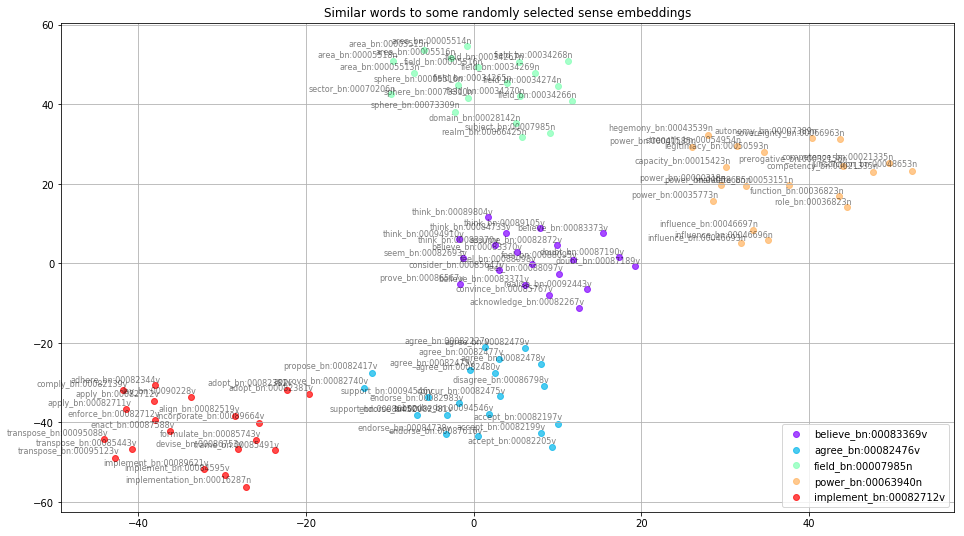

In [6]:
tsne_similar_words_plot('Similar words to some randomly selected sense embeddings', keys, embeddings_en_2d, word_clusters, 0.7, 'similar_words.png')

In [7]:
from sklearn.manifold import TSNE
import numpy as np

keys = ["love", "sex", "smart", "student", "plane", "car"]


embedding_clusters = []
word_clusters = []
for word in keys:
    senses, embeddings = get_first_similar_words(word, model)
    embedding_clusters.append(embeddings)
    word_clusters.append(senses)
    
embedding_clusters = np.array(embedding_clusters)
n, m, k = embedding_clusters.shape
tsne_model_en_2d = TSNE(perplexity=15, n_components=2, init='pca', n_iter=3500, random_state=32)
embeddings_en_2d = np.array(tsne_model_en_2d.fit_transform(embedding_clusters.reshape(n * m, k))).reshape(n, m, 2)

2019-06-06 13:38:05,659 : WARNING : 'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
2019-06-06 13:38:05,664 : WARNING : 'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
2019-06-06 13:38:05,670 : WARNING : 'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
2019-06-06 13:38:05,677 : WARNING : 'c' arg

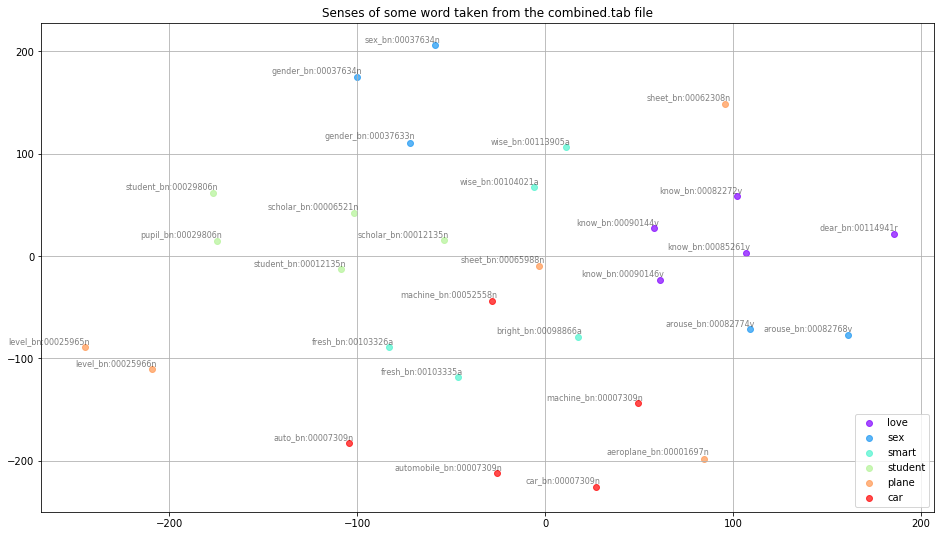

In [8]:
tsne_similar_words_plot('Senses of some word taken from the combined.tab file', keys, embeddings_en_2d, word_clusters, 0.7, 'similar_words2.png')